---

* Ï∂úÏ≤ò: LangChain Í≥µÏãù Î¨∏ÏÑú ÎòêÎäî Ìï¥Îãπ ÍµêÏû¨Î™Ö
* ÏõêÎ≥∏ URL: https://smith.langchain.com/hub/teddynote/summary-stuff-documents

---

#### **8) `Î©ÄÌã∞Î™®Îã¨ Í≤ÄÏÉâ`**

* **`Chroma` = `Î©ÄÌã∞Î™®Îã¨ Ïª¨Î†âÏÖò` (Ïó¨Îü¨ ÏñëÏãùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìè¨Ìï®ÌïòÍ≥† ÏøºÎ¶¨Ìï† Ïàò ÏûàÎäî Ïª¨Î†âÏÖò) ÏßÄÏõê**

---

#### **9) `Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏`**

* ÌóàÍπÖÌéòÏù¥Ïä§ÏóêÏÑú Ìò∏Ïä§ÌåÖÎêòÎäî Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©

  * [**`coco object detection dataset`**](https://huggingface.co/datasets/detection-datasets/coco)Ïùò ÏûëÏùÄ ÌïòÏúÑ ÏßëÌï© ÏÇ¨Ïö©
  * Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïùò Î™®Îì† Ïù¥ÎØ∏ÏßÄ Ï§ë ÏùºÎ∂ÄÎßå Î°úÏª¨Î°ú Îã§Ïö¥Î°úÎìú ‚Üí Î©ÄÌã∞Î™®Îã¨ Ïª¨Î†âÏÖò ÏÉùÏÑ±ÌïòÍ∏∞

Resolving data files:   0%|          | 0/40 [00:00<?, ?it/s]

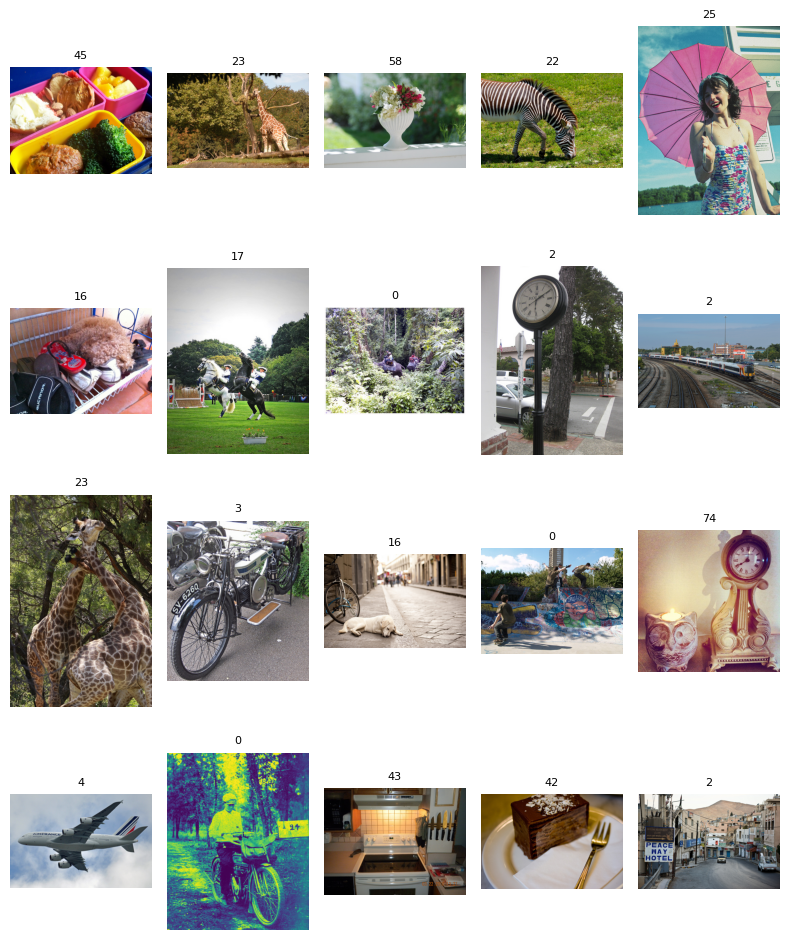

In [14]:
import os
from datasets import load_dataset
from matplotlib import pyplot as plt

# COCO Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
dataset = load_dataset(
    path="detection-datasets/coco", 
    name="default", 
    split="train", 
    streaming=True
)

# Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Ìè¥ÎçîÏôÄ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ÏÑ§Ï†ï
IMAGE_FOLDER = "../09_VectorStore/images/tmp"
N_IMAGES = 20

# Í∑∏ÎûòÌîÑ ÌîåÎ°úÌåÖÏùÑ ÏúÑÌïú ÏÑ§Ï†ï
plot_cols = 5
plot_rows = N_IMAGES // plot_cols
fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_rows * 2, plot_cols * 2))
axes = axes.flatten()

# Ïù¥ÎØ∏ÏßÄÎ•º Ìè¥ÎçîÏóê Ï†ÄÏû•ÌïòÍ≥† Í∑∏ÎûòÌîÑÏóê ÌëúÏãú
dataset_iter = iter(dataset)
os.makedirs(IMAGE_FOLDER, exist_ok=True)
for i in range(N_IMAGES):
    # Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ïù¥ÎØ∏ÏßÄÏôÄ Î†àÏù¥Î∏î Ï∂îÏ∂ú
    data = next(dataset_iter)
    image = data["image"]
    label = data["objects"]["category"][0]  # Ï≤´ Î≤àÏß∏ Í∞ùÏ≤¥Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨Î•º Î†àÏù¥Î∏îÎ°ú ÏÇ¨Ïö©

    # Í∑∏ÎûòÌîÑÏóê Ïù¥ÎØ∏ÏßÄ ÌëúÏãú Î∞è Î†àÏù¥Î∏î Ï∂îÍ∞Ä
    axes[i].imshow(image)
    axes[i].set_title(label, fontsize=8)
    axes[i].axis("off")

    # Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú Ï†ÄÏû•
    image.save(f"{IMAGE_FOLDER}/{i}.jpg")

# Í∑∏ÎûòÌîÑ Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï Î∞è ÌëúÏãú
plt.tight_layout()
plt.show()

<small>

* Îã§Ïö¥Î°úÎìú Í≥ºÏ†ï
  * ![Îã§Ïö¥Î°úÎìú Í≥ºÏ†ï](../09_VectorStore/images/multimodal_1.png)

* Í≤∞Í≥º
  * ![Îã§Ïö¥Î°úÎìú Í≤∞Í≥º](../09_VectorStore/images/multimodal_2.png)

---

#### **10) `Multimodal Embeddings`**

* `Multimodal Embeddings` ‚Üí `Ïù¥ÎØ∏ÏßÄ`, `ÌÖçÏä§Ìä∏`Ïóê ÎåÄÌïú `Embedding` ÏÉùÏÑ±ÌïòÍ∏∞

* `OpenClipEmbeddingFunction` ‚Üí Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî©ÌïòÍ∏∞

* ÏÇ¨Ï†ÑÏóê `VS Code`Ïóê ÏÑ§ÏπòÌï† Í≤É
```bash

        pip install open-clip-torch

```


* *Ï∞∏Í≥†: [**`OpenCLIP`**](https://github.com/mlfoundations/open_clip/tree/main)*

* **`Model Î≤§ÏπòÎßàÌÅ¨`**

  * ![Î™®Îç∏ Î≤§ÏπòÎßàÌä∏](../09_VectorStore/images/model_benchmark.png)

* ÏïÑÎûòÏùò ÏóêÏãúÏóêÏÑú `model_name`, `checkpoint` ÏÑ§Ï†ï ‚Üí ÏÇ¨Ïö©

  * **`model_name`**: `OpenCLIP` Î™®Îç∏Î™Ö
  * **`checkpoint`**: `OpenCLIP` Î™®Îç∏Ïùò `Training data`Ïóê Ìï¥ÎãπÌïòÎäî Ïù¥Î¶Ñ

In [15]:
import open_clip
import pandas as pd

# ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îç∏/Checkpoint Î•º Ï∂úÎ†•
pd.DataFrame(open_clip.list_pretrained(), columns=["model_name", "checkpoint"]).head(10)

model_name     checkpoint
0       RN50         openai
1       RN50        yfcc15m
2       RN50          cc12m
3      RN101         openai
4      RN101        yfcc15m
5     RN50x4         openai
6    RN50x16         openai
7    RN50x64         openai
8   ViT-B-32         openai
9   ViT-B-32  laion400m_e31

* ÏÖÄ Ï∂úÎ†•: `ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îç∏, Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏ Ï∂úÎ†•`

  * ![ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îç∏, Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏](../09_VectorStore/images/pd_df_openclip.png)

In [16]:
from langchain_experimental.open_clip import OpenCLIPEmbeddings

# OpenCLIP ÏûÑÎ≤†Îî© Ìï®Ïàò Í∞ùÏ≤¥ ÏÉùÏÑ±
image_embedding_function = OpenCLIPEmbeddings(
    model_name="ViT-H-14-378-quickgelu", 
    checkpoint="dfn5b"
)

<small>

* ÏÖÄ Ï∂úÎ†• (5m 45.8s)

  * ![Í≤∞Í≥º](../09_VectorStore/images/multimodal_3.png)

* Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú = `list`Î°ú Ï†ÄÏû•ÌïòÍ∏∞

In [17]:
# Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÎ°úÎ•º Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•
image_uris = sorted(
    [
        #os.path.join("tmp", image_name)
        #for image_name in os.listdir("tmp")
        os.path.join(IMAGE_FOLDER, image_name)
        for image_name in os.listdir(IMAGE_FOLDER)
        if image_name.endswith(".jpg")
    ]
)

image_uris

['../09_VectorStore/images/tmp/0.jpg',
 '../09_VectorStore/images/tmp/1.jpg',
 '../09_VectorStore/images/tmp/10.jpg',
 '../09_VectorStore/images/tmp/11.jpg',
 '../09_VectorStore/images/tmp/12.jpg',
 '../09_VectorStore/images/tmp/13.jpg',
 '../09_VectorStore/images/tmp/14.jpg',
 '../09_VectorStore/images/tmp/15.jpg',
 '../09_VectorStore/images/tmp/16.jpg',
 '../09_VectorStore/images/tmp/17.jpg',
 '../09_VectorStore/images/tmp/18.jpg',
 '../09_VectorStore/images/tmp/19.jpg',
 '../09_VectorStore/images/tmp/2.jpg',
 '../09_VectorStore/images/tmp/3.jpg',
 '../09_VectorStore/images/tmp/4.jpg',
 '../09_VectorStore/images/tmp/5.jpg',
 '../09_VectorStore/images/tmp/6.jpg',
 '../09_VectorStore/images/tmp/7.jpg',
 '../09_VectorStore/images/tmp/8.jpg',
 '../09_VectorStore/images/tmp/9.jpg']

<small>

* ÏÖÄ Ï∂úÎ†•

    ```python

    ['../09_VectorStore/images/tmp/0.jpg',
    '../09_VectorStore/images/tmp/1.jpg',
    '../09_VectorStore/images/tmp/10.jpg',
    '../09_VectorStore/images/tmp/11.jpg',
    '../09_VectorStore/images/tmp/12.jpg',
    '../09_VectorStore/images/tmp/13.jpg',
    '../09_VectorStore/images/tmp/14.jpg',
    '../09_VectorStore/images/tmp/15.jpg',
    '../09_VectorStore/images/tmp/16.jpg',
    '../09_VectorStore/images/tmp/17.jpg',
    '../09_VectorStore/images/tmp/18.jpg',
    '../09_VectorStore/images/tmp/19.jpg',
    '../09_VectorStore/images/tmp/2.jpg',
    '../09_VectorStore/images/tmp/3.jpg',
    '../09_VectorStore/images/tmp/4.jpg',
    '../09_VectorStore/images/tmp/5.jpg',
    '../09_VectorStore/images/tmp/6.jpg',
    '../09_VectorStore/images/tmp/7.jpg',
    '../09_VectorStore/images/tmp/8.jpg',
    '../09_VectorStore/images/tmp/9.jpg']

    ```

In [ ]:
# Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© Í≥ÑÏÇ∞ (1m 1.7s ÏÜåÏöî)
import numpy as np

img_vecs = image_embedding_function.embed_image(image_uris)         # list[list[float]]
img_vecs = np.array(img_vecs, dtype="float32")

In [65]:
# Í∞ÑÎã®Ìïú Ïù∏Î©îÎ™®Î¶¨ Ïù∏Îç±Ïä§(ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ) Ï§ÄÎπÑ
def cosine_sim(a, b):
    a = a / (np.linalg.norm(a, axis=-1, keepdims=True) + 1e-9)
    b = b / (np.linalg.norm(b, axis=-1, keepdims=True) + 1e-9)
    return a @ b.T

# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÏôÄ Î≤°ÌÑ∞Î•º Ìï®Íªò Î≥¥Í¥Ä
image_index = {"uris": image_uris, "vectors": img_vecs}

In [ ]:
# ÌÖçÏä§Ìä∏ ÏøºÎ¶¨Î°ú Í¥ÄÎ†® Ïù¥ÎØ∏ÏßÄ top-k Í≤ÄÏÉâ
query = "a red vintage car on the street"
q_vec = np.array(
    image_embedding_function.embed_query(query),     # ÌÖçÏä§Ìä∏ ÏûÑÎ≤†Îî©
    dtype="float32",
)[None, :]                                           # (1, d)

sims = cosine_sim(q_vec, image_index["vectors"])[0]  # (num_images,)
top_k = 3
top_idx = sims.argsort()[::-1][:top_k]
top_images = [image_index["uris"][i] for i in top_idx]
print(top_images)

<small>

* ÏÖÄ Ï∂úÎ†• (4.3s)(`k=3`)

    ```python

    ['../09_VectorStore/images/tmp/11.jpg', '../09_VectorStore/images/tmp/19.jpg', '../09_VectorStore/images/tmp/8.jpg']

    ```

In [ ]:
# Ïù¥ÎØ∏ÏßÄÎ°ú Ïù¥ÎØ∏ÏßÄ Í≤ÄÏÉâÎèÑ Í∞ÄÎä• (ÌäπÏ†ï ÏøºÎ¶¨ Ïù¥ÎØ∏ÏßÄÏùò ÏûÑÎ≤†Îî©ÏùÑ ÎΩëÏïÑ ÏÉÅÏúÑ Ïú†ÏÇ¨ Ïù¥ÎØ∏ÏßÄ Í≤ÄÏÉâÎèÑ Í∞ÄÎä•)
query_image = image_uris[0]
q_img_vec = np.array(image_embedding_function.embed_image([query_image])[0])[None, :]
sims = cosine_sim(q_img_vec, image_index["vectors"])[0]
top_idx = sims.argsort()[::-1][:top_k]
top_images = [image_index["uris"][i] for i in top_idx]
print(top_images)

<small>

* ÏÖÄ Ï∂úÎ†• (4.9s) (`k=3`)

    ```python

    ['../09_VectorStore/images/tmp/0.jpg', '../09_VectorStore/images/tmp/1.jpg', '../09_VectorStore/images/tmp/15.jpg']

    ```

* ÏÉÅÏúÑ Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ geminiÎ°ú Î≥¥ÎÇ¥ Ï∫°ÏÖò ÏÉùÏÑ±ÌïòÍ∏∞
  * Ï†ÑÎã¨ Î∞©Î≤ï: `base64 data URI`Î°ú Ï†ÑÎã¨ or `Í≥µÍ∞ú URL`
  * Î°úÏª¨ ÌååÏùº: `base64 data URI` Í∂åÏû•

In [ ]:
import base64, mimetypes
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from google import genai
import os
import json

# Gemini Î™®Îç∏ Ï¥àÍ∏∞Ìôî (Î©ÄÌã∞Î™®Îã¨ ÏßÄÏõê)
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")

---

* **`ÎîîÎ≤ÑÍπÖ Í≥ºÏ†ï`**

In [ ]:
# ÏßÑÎã® Ïä§ÎãàÌé´
def to_data_uri(path: str) -> str:
    mime = mimetypes.guess_type(path)[0] or "image/jpeg"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    # Î∞òÎìúÏãú  Ï†ëÎëêÎ∂Ä Ìè¨Ìï®
    return f"{mime};base64,{b64}"

# 3) ÌîÑÎ°¨ÌîÑÌä∏ Íµ¨ÏÑ± (ÏãúÏä§ÌÖú + ÏÇ¨Ïö©Ïûê Ï†úÏïΩ)
system_msg = SystemMessage(content="Your mission is to describe the image in detail")
user_instruction = "Description should be written in one sentence (less than 60 characters)."

# 1) data URI ÏÉùÏÑ±
test_path = image_uris[0]
uri = to_data_uri(test_path)
print("HEAD:", uri[:40])           # Í∏∞ÎåÄ: image/jpeg;base64,
print("HAS_DATA_PREFIX:", uri.startswith("image/"))

# 2) HumanMessage Î∏îÎ°ù Íµ¨ÏÑ± ÌõÑ Îã§Ïãú ÌôïÏù∏
blocks = [{"type": "text", "text": "Describe in one sentence (<60 chars)."}]
blocks.append({"type": "image_url", "image_url": uri})
print("BLOCK_IMAGE_URL_HEAD:", blocks[1]["image_url"][:40])

# 3) ÏµúÏ¢Ö invoke ÏßÅÏ†Ñ ÏÉÅÌÉú Ï†êÍ≤Ä
msgs = [system_msg, HumanMessage(content=blocks)]
print("MSG_OK:", isinstance(msgs[1].content, list), msgs[1].content[1]["type"])
resp = llm.invoke(msgs)
print(resp.content)

<small>

* ÏÖÄ Ï∂úÎ†•

    ```markdown
    HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    HAS_DATA_PREFIX: True
    BLOCK_IMAGE_URL_HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    MSG_OK: True image_url
    ```

    ```bash
    {
        "name": "ValueError",
        "message": "Image string must be one of: b64 encoded image string (data:image/...) or valid image url. Instead got 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxoDNPApQvrS4Ar6w81sBTulFKKqxAgzmnYz2pM9qXNUIMUoxRSZoEOpM/WiimAd6MUUtMAxQMUhNFFgFzz0ozRRTsAUtJS80xAOtFAHNPApgIKdigU7AoAaF4p2KXFSGPMe4HmlcCMA5pCuKdmkJzTAQkClBOaCtOUDNAAKb7dqc3ApoBoGKeRSZ5p4HHNLwvSlcVhUXP3qViO3Smlxg+lRtJ6frSvqMkLYprScVe0nRL7V5SIExGD80jcKK1NR8GXlnatcRSJcxqMtsGCv4VzzxVGE1TlJX7HXTwNepTdSMXyrqcyXJHNNzmrBtGCB3ZVWiOext5F8zMvPIFbSqxijnUJMhSN5Gwqk/QV2HhvwsZCl1eqQAcpGe/1rA027TUdft7a2hMULN8wPXA616zbRgsqDoK5Z4hy0ifRZNlsZt1qq0Ww+OBY4wSAqjoAKq3U7AEJwKvTEswHYVn3QrjmfX00jOkLNySTTFXPbNTMBmlUCuY6bjNpAqRTijHftQB8pJpEji4xVa4uhGp60TzBBWHe3e4kA1y163KrCsRXdy00uB3Ndb4dtvs0IJ+83JBrj9NiNzfKDyAa7yyXawPavjM3quWhyV30OjtXwVGe9dJA6rtGe1cpbNkit22U7QSa+TdR05XR49eNzpI5flHpU24NVGGQbFHWrJO3noK+swmLk6d27nkTjqec/E7wSdStxqemwj7VEP3kaDBkX/EV4VNFJHIyOrKynBBGCDX1zLhk5NeYfEHwLFqMM2p2CbLxRl0XpIB/Wu6GJSdnsehhMU4rkkeH59KeGzSTQyQsVdSCDyCMYqMNXanc9mE0yyO1PBqurc1Krg0zspyRMKUVHn3qQc0zpHCnA0zJpc0ASA08HmogTTgaQ7mtp2qzWbdcp3XNddZ38F7F8pByMMjc156GqzbXUlvIGjYgg12YbGTovXYmUVI0PEfgCHUC1zpOyGc8tAeFb6eleYXdnPZXL29xG0ciHDKwwRXtema3HcgJIQsn86l1zw7YeI7XZcKI7gf6u4Ucj6+or3Izp4hXR8/j8qUrzpaP8GeD9KK2df8O33h69NvdJlTykq8q49Qax8VjKDg9T5yUXF8slZh0pwb86bSdK0hUcTOUSdXrQstSktTgEMh6qehrKDc808NXoUq5zzpqSsz1Pw145ntgsMxaeAD7pPzKPb1r0qw1K01O2W4tpVdT2HUV80w3DxOCrEEeldPonie4sZ0dJTG2fmYdGHuO9XVoQrK60ZwypTpO8dUe7SLu6VBImaydG8UW9/thnZI5j0IbKv9DW+VVhnj615lSlKm7SQ4VFJaHzaBil/Cm9ad2r10UwznrSikxS9AOasQtFHaj8aBBmlpKKALdvYyXEMkiEYQZOaq09ZHVCocgHqAaYKmCld3Kk42VkB+lLSkc8UYrRECGl6UYpQM0wEopcAU4dRxTEJt5pQPWnnLdabmmgAUuD1oyelKCKQxQAKdkHimjB//AFUtABnrS84pM80oGaQBj2oIzU0VvLM2I42c+iqTW/pfg3Ub8mSVRbwqfmZ+o/CsK2Lo0FepKxrSoVKrtBXObAP4U9VxXpcfg/R7WD/VG6dV3Fmc/MPYVZtdHsJQwNlAsCgYOzsfWvIlxBSvaEW/wPSjlNRq8pJHlLLjrTS4XpXpkvhTSdVlMcMTWbgZ3xnKnt0NZk/w0n+0mKDUoG74dCDiuqjm2Hnu7HPUy6tF+6rnBmT0q7YaVqGpvttbd3H97HA/GvQLXwNp+npvl/0iUdd/QfhVy2WW3nQRyRLEDgooxUYjN6VPSGp6eEyCdTWrK3kiCDw1p2kaSs01okzgDzHlGcmktLnRLfKx2ECbjk/IOta3ieZR4fSNTzvya87kmZXzmvlquOrubak9T63CZfQ9n8C0O7udRtYLJniCAn7qqMAVFo9+EkBkIKt1BriJL92wCTgdq09PvRLEQD0rjlUk583U9OnhqfI4dzW1/wAGaPrbSTWk5s7k8gLzGT7r2/DFeba/4a1Lw7JGL1EKS58uWNtytjqPY16Fb3DGYAMetdJfaLaa9ogs79CVYZRx95G7EGvZwmOrVpcktjwcfk1KC5oKzPF/Clwtv4msnkOFZ9ufrXt1s22SvFta8O3vhjV0inG6MtuhnUfK4H8iPSvSdA1sXtsiyMBMowfevUpVbS5GTldKSpyi+h0k3BNZ1z3FaAYTpxjd/Os+4HJrepsenT3KDDBpUIHWh+DSKeK5jo6CvkrwcVCZSikE5FPkfA61nXMwA61jUnZAkQ3tzwcGsZy0r4FS3EpYkZqW0tyeT1NeNiavUznKxpaJaiM7z1rrbXhfrWJYQ7EHFbVtk18nj53Zw1dTXtMlhiuhtuU561j2MRKg1twqVA4r5+pFylseZXaLcBcMpPSrc9wrAAH61FDgIc1VlbDHFdlOc6NLlj1OFpSkWDcbe/FVLucMDg8YqCSboM1m3dzhTzWtLESWjLjS1OB8caDDIXvbZQJP41H8VeVzZjkKkEYNeueI78RROzn5QK8k1O4Se9eSP7pNfT5bUlOOp3Rbihgl96cJqqbuaUGvV5TaNZmlHLn61ZVsjrisqN8H3q5FLmoaO+jiL6MuZpwPvUKtkfhUoOaR2ppjs0oNNoBoGSZpwNRg0oagEydJGRgQcH1ro9K18ptiuWyvZq5hTShsdOta0a0qTvEbSasz0a4gstXsmtrqJJ4H7HqPcHsa8q8VeCbnQ2a5ti1xYnpJjlPZv8a6TTNYls2AJ3J3Brs7O9gvYCV2ujDDI3IPsRXvYfFwrrlkeXjsuhXV+vc+eyMUleoeKfh8k4e+0NArdXtf5lf8K8zlieGRo5EKupwVIwRV1KTjqtj5Svh6lCXLNEWKUEiikJrOMnE5mkSK1SLIQeKr9KcGrspV+5jKBsWOqSWzY+8p4KmvRfDfjl4tkFyzTQdAScuv+IryUNirENw0bAqSCK7VOM1yy1RyVcOnrHRlvFO5xRiitERcXFJilpaYgxR1pfwo70CEFLR7ilpiClooxQAU8AEU2nZAHvTEJjNLSZpKAF6U4etNH1pc81Qx360FetJk5oNJCFBFHtikAA606gdgAx1pRSE0hcdqVx2H+9XdKtxdalBC4+RmG76Vn+Z6CrdhdNaP5+Mt/D7VwZjiHRoNrd6I6sHR9rVSex67ZxwwxmOzRVQLwQvpUEt64L25LLMSDlDmsa31RYbZFQOruA3yHlSev1Fbllo73jrKTIJGIYPIm059RXw84yvds+nUoRViSOXAaX7QiZOAkgxjjpVG5191EkVvaOZF+7IBwR3U+1dTL4ajEStcZmlB6nv+FO/seI2YYRDg46dKzcmiPaxZyb+Ine2Vl06S3kCbWAG4Z9qbbeM7WP5LqNkcY+fHX1rspdOhFlsCDgelcFqmmx+awCD6Y6UnUaLhNSLlx4z0k3IURzMBwWA4arJ0QXlsmqafcBo3G/yyc49vrXL2WlCe9SEKACcE+laezUPD9yTEzGHJ3R54PvVc/NudFKvKk/dYeJLpo9PSFshgehri5Zsiuug16LVIW07xBbDa7ny7leGiJ6c1h6z4audPxJbTJeW7ZIaHllA/vL/WhWbPVoY5NWasYbyde9S2V20MhwapykgY7ikt1Z32qpYnoBzVuKtqbrE2d7nR2F+TfRg9Ca9DtNUjkSOPIxjBHevLVsNQt/LuTZ3Aj3cP5ZIOK6bS7hri6jRQcnmop1ZUpXizfmp4iOr1R2WqadaavYPZ3kYkhfkHoVPYg9jXnOoaReeHbwfMWhJ/dzDow9D712E2uCy1f7JP/q9o59K2JLe31KzaCVBJDIP8kV9BSqxr0731OWH7iXN3Oa0TXEuMRyMFkH61vyxrcpkYEnY+tcHrOh3Wg3ikFnt3OYpQP0PvWxoevCTEFw21ugY966aOI15Kh1Tgpr2lMuTo0bFWBDDtUAYDNb8iQ3UY8zAYfdcdqwLtHt52Rhj09CKqpHlV0RCd9GVriX5TWTdzArxVq5l461kTNvfFeXXqGj0QxAZJgBW9Zw52jFULK2B5x+Nb9nDjFeFialzlnK5chjwoFaNkAZQD0quqgKOOa0LW0dwrJXzmKldnLPzOl06LO30roIIY0Uk81z9hDJEvzPkdsVpQtLJuCknFc1Gai7Wuzx68XJ6MtTuqrhazZ5NpqwmZCRu5HTNQuELlZBWVV8y5noRCNtDJuJjyax725ESMSefStu/sXVS8J3DsK4zUXkeYoQcg4waKNK8tTqppPUwNZa71VGtLaFpZZDgKorkNU8G67peTcafLtxncg3D9K9z8L6RHZR/aJFBmf9K6l4knUhlB9jX0GDxyprlgjnq1WpHyGwKnB6igH6cV7z4y+Glvq05vLBVhnI+dQMBvf615dqHgPWLC8WB7dmDNtDgcV7UMZTkrt2KhO5za5PSrCbu1enaT8MrdFSS8keTA+ZRwK3Yvh5oiHd5BI7ZY1ySzWhsnc6FNxPHY3INWVJNesz+BNMg3Fbf5ex61g6t4Kiig82H5ee1OGOjJndQxXQ4cGlqxd6dPZsdy5HqKqZrrjNS2PSjNSQ8Uu7mmUozVFkqninZwaYvSlFCAeDVyzv5rOUPE+P61SzQD71cZOLuh3PQNK1qK9UKTslHbP8qqeI/CVh4ijaTAt77tOBw3+8O/1rj4ZnjcMrEEHsa6nSvEIYCK6PPZq9nCZhf3ZnLiMLCrHlaujynWNEvtDvGtryEoR91h91h6g96zK+g7yystYsjbXsSzQt09V9we1eVeKPBF5oRa5t83NiTxIo5T2YdvrXoSpKS5oHyuMy6dD3oax/I5HFNp5GKbjmubVM8xig09TUZFJnFbQrOO5nKJ0NvBJcSBI1LN6CluIGglMbAhh1Bq7oWpLpWrQXToHRD8y+1WfFFzZXurPdWQYRyjcwPZq9XmfNax5hiClpBRitAAUoHNAxR+FMBaO1FOUZNAhKKU8UlMQo70pPpSCjvQOwUuOM0oBPajb7UXKsJilxmnDpRvGMcYpNisIBTjjFNLY7Uw5NK5SiSHApC+PaiOJ5GCIrOx6ADJNblj4S1G7w0qi3j6/P1/KolUjHWTN6OFq1nanG5gZJ71JFbTTnEaM3viuyHhWC1XIVpXHOW/wrMvi9sSmQgHYV52IzNU9II9elkc7c1Z29DImsBbwlppQGPRFq1oun/arpS4Pljt6ntVELJdXQLMce/avUfC+kQW6pJIchgMDHWvncbjp1n772OqGHp0b8iNfwl4cAVdQvkVpFG2ND2HbNdzJDGVR0Ugr1AFR2hh+zhAcfQVKk3kykMCVPQ1wOdzB3uNkeOWElXG4fwsKq/aCtsRjdn9DU1wi7mKjg849KxmujBOUbPJ+UmsZyZUY3JL6/VYFxw2MGuS1GRTwMZzk1q6tMoHy/e71zFw5dicc1g22zppxsi7pAjimadxxnA9a6S6ht7qFTsYg/eya421ccqxwD0rXsbySLKk/KTjk9DTTdwnHqWv7HsJIzDJbBsnn1qrqvg9tItxqel32wKMmOY8D6GnXutLYky3DAqD26mubn1648SX4junK2kQysQOAfTNbQkxQ57qzGXt5ba3A326wtjMB8s0I2OD65HX8ayraFLeQfZQUPQNnJP41oXjWTKREGideCmcj8DWZPcsF2AYC8j3pWk+p6EKiWhoQ6lOrFPMK85YA45q2Xv4rX7ZBOJIlPJH3kz6iufnebiVVO1gM0ttfTx/6t3U9MA9aORdTZTe6Zpy6pLNJvm2SORjcyAmtnTtdxbSLJd+RtX92qpkE/0rk2uQzBWiKt61dgs3mQOEcR7gpJPQn2ohzRegVayatc7zQLn+29NuoLwC4jfO1HAweOg9DXGa9oUukyJcwbnspeY5PT/ZPuK6XQIJbW5liCqVhXJXPU45x74rU8OX1tqE97oN8EeGZiY93QN/gauhXkq3vPQrDYiVFua1XU5DRtc+7BcN7KxrpGSK8i8uXpj5WHVa5rxV4Vn0C6aWIM1oTw3UofQ/403Q9aEbCC5Y7TwrelfT0MRb3J7Hs2hXh7SmJrmny6d5Zd1dZM7SvtWRbx75M816BJbQahbGC4XzIW5BHb3BrnZdAn0ycbvngY/u5R0P19DXFmGHcI88Njlc2vdYtpBhRgVrW0ZyAoyagt0CqPWt3S7FmkWRvwr43G4hU02zKcrK5Ys9JMgDS5we1dPY6UjQHZgAVXiABUHoK3rcxpEoU9fSvNwDhiaj9psePiq0raEFjahPMQ8t6Gq0U32W95yFzg1fvMQOs0Zwccj1rL1GaGYrLE3zN94e9b4+EaUVKGkov70c1O83rsyzdr5d0pi/i5FVLyQmUkjBxyKqS3bskfzEMnQ1E1y0p3OcmvHr1VUvyq12dEKLVrmlazJKjQv1I4NZV1p8E0m+RF82M8Gk8xkcMpwRUUk7PIWJ5NEaj5FFbotU2ndGppjgzKD0Hat140KFlIBFcxaTbWzmtKa+UQEbuTXVg8RGmnGRy1qbctB89zsGCRWXM4nkwwB5/Kq73BZwMk461JD8xLA1niMVNrlT0N6dHl1J1Y5xjjHapoyBwVBB7U1VJGDjNXWgKW0bhOfUd656EKlS8l0FOSWhZWzFzYPGuFOOCeayrjTYI7ORbgbZFU8g5HtWzZ6pBbWzrIpz3HrXKeItYDoQo2qAQDnqK+phXwsaMZKV5W2OalGrKbXQ4HWFjMhXiuIuFCXLqBgZ4rq9Rn8x2I6mpdE+H+qeJLxJShtrPPzyuMEj/ZH9a3wk3e7PcliI0I3kzjgpp4Br6QtPAHhy304WX9mQyJjBZxlj7565ry7xt8OrnQC97Y7rjTs5P9+H/e9R716lrq5OGzelVnyNWOCHFGPfmlIwaPwqVoet0ug+tLTeaUflVAOpwbHIqMdaM0IVzd0rXJLRhHIS0fp6V2Vpew3cJKlXRhhlPII9CK8yQ981fsdRltJNyNgjqOxr0MNjpUnZ7Ezipk/iv4eJciS+0NArAZe0Hf3T/CvL5YnhkaN1KupwQRgg177pOrR3qghsSDqtVfFfguDxZaiW0WOHVYx8rfdE3+y3v6GvcUoVo8yPmsxyzlvUpL5HhVNqe7tZrG7ltbhDHNExR0PUEVB2rmlFp2Z4O5tilyaQilxgZr3zygzSg8c0gFLQAZGaXPFNp1MAFLmkNGeaAHUqgHOaQH1pC2KVwsP/AIqU4HWoTIelG4ngZpXGoku9VppkPamBT3qxbWdxdSCO3heVvRVzScrFxg27IiyT3o2+1dZp3ga+ugGu3Fsnp95q6zTPCGmWG1hD50o53y8/pWM8RCJ6mHyjEVNWuVef+R55pug6jqhxb27bf77jCj8a6nT/AACi4e+nLn+5HwPzrtGaC3XBYcfwrUMt7kARLjjknk1xzxcnse7hsloU9Ze8/Pb7iKz0ay0+PEMEcYH8Xf8AOny3NvGMKC7fpVZ3ZzlmJqnPIFU1xzqt6nsQpRirIrarqTrEwB2j0FcJfztK55ySa2dXutzFQa5x3JkY15VabkzlxU7KyN7wtYrc3mXYKR03LkH1Br1Szi+SPdGqj0A4rjfBVhi1huHjIjZ/nY/0r0KSB48SRkPEDxjtXmV1qeVKVtC9aJj7uR9DVwfMjDdyPWs6yusTH5vc1eedGYFBn1rNWsc0k7kH2vJeKUYPY1i6oNsnLE7eQa0NUQFRJEpPHOK5q/vyygE8jis5t7GtON9ireTtK5Oenes1m68+9WIpQshJ5HcetUrhwJSF6VKRvYcvqaf9tW3UvMpIHTHektwZpAgxnBOapaqBDHuUlmI/WqVrlKN9TE1XUpb2QGU4VCQoHHFSaNBIzyvKTEDHui3fx89M1JpelDUXuLiV0/cjcUP8Va/9pW9ultFLaqdoG87fvL2re6SEZOpRNLKzybRIDg44qr5MrsUYZCjgZ/lXR6i9vbxDa0UpZcDawPynoR/9esixuZZHEEjkrDE5jVu2fSmmuo030G29tLIgaLBABLBj2HWrHlLbW8j7Qcc884+lPthH9j3chyfXip5DHLbTBRt3Y4FZORsmx6zwPHHlI5FX5yj8c9+RWxYfYJ4rpHsvLljIeKWKQnbzxkd65yItHJs6HoMit7Qlln1OJVOC7BQR39qylN9AcE9WdIkAkv3mhjU5jAJQ4BPr9a4OS4l0/WDcRcFZM4P16V3s0a2byFWZHVcsOnQ1yvjSyjivIby3fdFdx+YQBjDd6iF5Jm1KSjJLud9DeWuv6bEWKv5i7HR+Rn0rzzxJ4Rl0tnurFWe1Gd6dWi/xHvWVp2tXOmyfu5CB6HofqK3P+E0vbiQKSoU9sdvSu7D42VOPJUV0ddHnoSvTenYz9F1x7VlguCTEeh9K7WGaKeHY+2SFx0rm9Z0QXOhQavZ2qK4LeckPGVH8W3+eKzNE1trNxFKS0RP5V7mExXPBKotGd7UcTDmjudb/AGW0NwCMvAfuv/Q10NpGFjXHYVRsb1CgwQ8bj8CK00QBQ0Zyn8q+V4jyicV7WjrE8us5L3WW4WG8ZFbFuyMnAwBWRGuFDHrWvbBRaNu+9jI96+VyyTjVaPLxFrDrobvlfgEcVy07mGdkPrXR3Fx5kIBHzDoa5m/jmluCyoxrbGV4VZ2TLwituRPMDmojNiljtbiRseWR/vVONJmY8yKK4rwjuzvbgt2VmmOOtRmQitaLRU4MkpOOoHFag06ze0eARAbh1Uc04VKbdrnPUrxjscwlwVB55pGuSRya0dQ8OzRRLJaB5P7ynqfpXNyTFSQcgjgg8VuqPkVBwnrE04nOcgde9XrZiHIFZ0Dfu0HtVqKcxkHisKkb6GjjpY2rN4llPnDKkflU735SFY07HOTWZAzXH3F/Wr9vAJ5kSTgDgkVpR+sWVOGiZxVIxTvIzbu62qSeM9a5u4tb/W5vKtIiyjjceAPxrum0OCZ/3xLR56Dv9a2razggiVYowqjoAK9TBZbKLvLcyljVBe4tTjfD3gGCxu47y9k8+ZeQuPkB+ld5FCiAAKAPYUiAA8VOK+ioU1FHnVas6jvJigAVDdW8d1A8MqB43UqynoQeoqXNIDmt5SVrGS0dzwLx74Ifw7efarJHfTJT8rdTC390n09DXEEYPvX1VqVhBqOnXFncKHhnQo49jXzr4u8L3HhfWGtXLSwMoaGfbgOP8RTsfS5XmHOvZ1NznT696TPNOzTc80I93cXJpN1IaYTTJsSA4p4bnrzVc8Gnqx7UMC7Z3klpcrLGxBB9a9L027W6toriM8MM15RuOa9E8IFjoceQfvtgnvzXq5bN87j0M69uXU434t6PFDqFprMK7TeqVnGOPMX+L8QR+teaV7v8UreB/h6s7YEkd4gTPXkEEflXhBr061tGfE4yChXkom53ozxRmkr2dDwBc47UE0ZGOTTc5pjHA04kdvxqMNzTufwpMLBkdqM0nAFA9qGOwbj3pQATyTVuz0u9v2221vJJ7qvH511Wn/D6Z9r306xjqUTk/nWc6kY7s68Pga9f+HE4sLk8A9a2tN8LapqOCsJjj/vycCvSLDwxpliFMVohYfxv8x/WtNnhiGGbJ9BXJPF22Pcw+RLerL5I5LTvAdpDte7laZu6jha6m10+1sIgsMUcKewxmka7f7sahR696gOWOWYn61yTryke5QwVKirQjb8y093EnEa7z69BVaS4mk4LbV9BxTCAKaQaxbbOpRSExikJpScUxmpFDWIAPNZOoXGxDzV6eTANYszRTTETSFYx1K9a5a9SyInJRjc566YyMTWe0ZDkHrXoLeBnvNON/pN0LoYz5RGG/CuKubaaG4eKaJ45E+8rrgj8K85zu7Hl1qkZq6O78ETzPamykLCE/NHxkH1rro5ZrSUqOY/Q9K4bwfd3FuojxmI8qcfdNegAQ3VoArncecGuWvucUimpmSYyIvB7DpVq3vzvyxAYdRiqZZrZ8liQO1SrLbyAko3Pcdq5SWaNxKXXcn3e+K5HWISHMi8c9K3ftMcS7VcjPY1QvVW4hYd+2Kb1CGjOX88hvemMdxznJ9RUN8HilJ64NBuWhhgGcM2W/Cix0xVy2ZPs8QUH9456j0rL1CQzXDo3KgcZrTYfaYY2mUo4BIYdG9KxrqUvIXYYbPUUo6as1ltZE2jII2uGQ8jAx1z61b1O3PmRPkFVjCrjt9ag0xdqS9fm9B1xU0s8kkWDyB3olMSjoVPKV8Hbk45zUUcCGdNm9JB1IP8AKrcDpuPmKxAB+72NRedmaOTOGPUihN2DQtJDcRHB79Mjr2rW06zLGaHCuOhK9qk06dLqYK+W2AEfQcmrmpQ/2PaG6H/LbnHTBNZyl0C5zt4WMpyCTGdpJ7+ldJ4XsHjvWmkXKiIspPGSehrj0unuWWBGyWk3MPSvTNKtXFzBArKUWOLcA3vyPzqp6RE56DdZJgv5FO0o0ao4I/PFZWsJENLsmkAkiC7c88c9q3fE+LiINAcyTIWUHruU4/lWBHfwXmltb3SMgRfLckco3UHFc0b30NIP3UzmNe0m2trgtbTGSJ13K2OntWDbEpPgnIzW3LeEWTszI6BjGFzyK5pp8TZHc9K7IxdtTaNSx7tYWgt9EsCpwTbK4wOGz1rk/EXhJLpZL/SlCzD5pLcD73uvv7V0fgrV4dW0ODT5GxPbp+5YnqvdavX0EttOJI1+uK3p4p0LX1iyaFedOo1ez/M8s0jWJdOm8qYMY84KnqDXoGm6kGRZI3DIw/A1neIPC8Wrwve2aCK+6sucLL/gfeuT0vVJ9IuWguEYKDteNhgqa96hXjOFnrFnrN08XDT4ux7DC8csIZDwOo9KU3TINqnIxXMabqgKLJG25GrXMivH5kZyvp6V8hnmQOjfEYbZ7njVMM4StLYtCct1NMMuDVMy84pPNJNfGODvqCpFwyZpRIc81VD+/NOVqlxBwLqsTVmJypBHWqKHoDVuI1jLTVGFSJpxvJcLhj0FYOt+G49QV7i3/dXJGRjo59D/AI1sW7YcDdtz1q80QC7CcjPBFe3guevT5r3aOPndKV4nken6vC8j2s7eTPESpD8Zx1/Wte3kW5AMTB8nHy81leKPB11d+M7j7IhWGbbK0jDAUng/Xpn8a7Hw/oNto1mkEfzvnLOepNdFbD07rler6HfLFLlvYs6RYTRbi3CsMFa3re0SNfujNNiXHT9KsgE+tephKEYRVzyq1WU3cdsWnADaQOhoC+tKVAr0bNanOMU7TUquDxUO4AH1oUFcHoDUwm4vQGizTe9OzkVEx+fjpXRPoyUSA5rF8TeH4PEOjXFhKQpkXMchH+rccg/nWuTnihiNmD3q4tdRxk4u6PlPUbC60u/ls7yFop42wysP1Ht71VznvXufxF8JrrumtdwIP7QtlJiI/wCWi9Sh/p714QxaORkcFWU4IIwQaaalsfWYDGqrCz3Hk00nik3ZHSk6ninY9RNBmlU9q1P+Eb1YxRuLN8OAVzxxW3pfgl3YPfvgdfLT/GuqlhKlXVLQy9tC10c/pWlz6veLbwjaCcs56KK9T0+xjs7aK1i+5GuBnvS2Glw2cAitYkRB1xx+ZpNW1my0uylaFxLNGhZnH3VwP517OGw8aC7s4qtZyZ558Xde3SW3h6Mgi3bz5yDn5yMKv4DJ/GvKzVzUbyS+v57qZi0krl2J9TVM0TnzM+SxE+eo5M280Z7UDFL9BXvaHjCY/OgdanhtJ5/9XGzfQVt2PhO+u1VvLYKe54H50nJJal06c6j5YJt+Rz+OafHBJKwWNGZj0AGSa9BsfAltGQ13KXP9xOB+ddNaaXaWEYEEEcKjvjn865p4qK21PZw+R1p61Hyr72ecad4L1K92tMotoz3k6n8K63TfBWm2bK8ytcyD+/8Ad/Kuha4gj6Zc+3SoHupH4GEHoK4qmLk9j3sPlGHpa8t35lpIobaMKAsajooGP0prXaKcRpn3NUup5OTT1UkVyyqNnpqCRI00kn3m/AU0CnLGeKlSF2bAUk+gqOZA5JEPPpTSKsNCyjkEVARiqTTCLT2EOKjdwKJHxVSSX3qXJIqxMZAelMd8A1AJKrXLyyfIpCg9STWNSuorUpIe266cxxc+prE1GEwzGMckda6rRRbW+c4LEdaydchH2suvIxmvKq1XJ3MMQvdaLXg7Xn028W3nObaT3+6a9G1Pw9p3iGzxcxqXI/dzIPmX8a8bRcOOvqK9L8F66Li3+wTviaL7pPcVi3fU8SpBrVGHYR3HhjUX0O8hDwytujlA/UVuzKUiR4l+UHGRXSarpEOrWyrKoEiHKOOqmsNYzawNaSqco3NZz1WplzJooXBLY3jCnvUKF0DAN7VfuIYzGGQfWsydNkgwx2+uaytYFqRXDknnqtVDcPgpkj0pbl3IJBzn9az2uCZFVuR3x6Ui4wuR3ds85ORtHU+pFYk0hub1d3AUbR9BXUs37plzlhyo61hC0EqzZUedGS2c9apXZ0LRWNRLmBdNeJk3ERkhgcEGsGGBrudFAO0D5j6Ch7hgjr1DADNbGliKC2KtuUuPmbqKgpkLyRwyHyxhANoHpTJ2RIkC7ScZz61a1fTxZNDiVZUmTfuXtWbJt8sLnkZqJJp6jTTVxgu5I2ZkwCRggjtUEUxyoKA4NFwwjAzjp1FQxtuOBjNaxTIkze0oSJOJPlVD0YnAFXPFl9JJpVnG5+ZAQ2D1qpp6B7eUE5RjhlHUYGc1l6/c+ciqp7AAVPJ7xLeha8JQJPcPNKT12hh2GPSvUPCypL+9Dh3cKx+oyMfpXmXg21abWLW1V9plcIc9OetemaZaNpPirUbEKscaCOWFiOq98fmaVeOlyHJW5epj640qyW9vuIZZXAwcEA+1c3dXzpfxyZTZcL5ciAYAI4ya6fxdMsOtWUhYHbI24gc8EVy+rxWr6syiQeVJL2HTNZ0tEbxd4pnNTwy2tzcW0vDIfXOf8ismdHTDFSM9PeuluLUuJ0fieI8ZHXHB/SpNS0tJPC0F1hBOku04PJUjvXVCSbsJuwngzVpLTUYdrYwe9e8OiXthBcAcyINw96+b9C+XUUU4HI4NfQ3hyZn0tYpDwORRBJzcH1IxKfIqi6Dra2SFZhtBbaSvGa5HxB4ft9aXcxEF0v3Zguc+zeor0SNMT7iox0Ncfq93BZ68+nOQkpUSICeHB9PevYwfLD3HsxYOtJ1Hy7nm8E974fvza3aELuII6hsd1PeuysL0MiyxNujcdOxqXVdNtdatBb3AKsuTHMo+ZCf5j2rjIpb3w1qJtbtCYicgjO1x/eU16K91ck9Ys96M44iNpfF+Z3rAEeanKHt/dqPzMd6r2V6roskbh42H5ip5owAHQ5jP/jtfH51kCg3XorQ5HFxdmWFlBjAPX1pyPzVRDVhOw718bUpcm5Eo2LkZ7mr9vhmUepqjEgbGSa0rVAJBiuTl55KKOKs0kXZbUoV28/SrdvlYyrcmrkcKmBR0PXNQCMbtzHOe4r6yOUPCzVWHXoeS6vMrMq38Ich+44NMgiROT1qW4yUYDsc1FGpHU1zzaVa9i1flsW1lUDgU4zAHpUIwo5pwZSK741pW3M3EmWUNSs2arngin5wtdEKrloyXEUnDdKQSBmyTwKgmyQecZ9KYgbg5FT7RqVkPl0NASAjg012yQR+dQpIAcGlaTI4NdTqXjqZ2JicYApjHI5qETBevJ7UjzKq7mcKPUmqhLm2HysjuV8xCPQV4b8S/Dc9vqj6taxFoZtomVRnbJ06eh4r1691yBMiLLt69q568upLxiWA7Z4446V6eFwFSTvLRHpYOjVUubZHkGm+E9YvlWR4Ps8TdGm4/TrXYaX4OsbJo5Zt1xMpzluFB+lbd1qFvauRPLlhwVHJrHvPEzsGS2TYv949a9mGHo0ul2e4udqx0FxKqruldVUeprMn8QWsEYSNTIw6E8CuWuLye5bdI7Mfc1ABkir9p0iilTilZm1NrV3egJvIjzwo4Fc34xvfsegmEN89wwT8Bya2LdMYOK4DxrqH2rWPIU5S3XYPqeTTbajdnLj6qpUHbrocuxyabSmkxXK7nyV7na6f4bvb8/Ihx3J6Cuq0/wRDGm66ky56BRmuuAii/1jKo64Hr9Kje9ReI0yfVq9KpjX00PcoZDQjrUvJ/civY6HZ2igxw5YfxNV5nhiHzOC3ovNUnnll+8xx6DpUg0+6MCzeRIYycbwvFcNTE3erPWhTo0FyqyQ9749I0C+55qu7SSHLsT9TW1ZeF726gWRAASfut6etdCPB1s1ggIkW4U/NIrZBH0rlliUjKePo03ZM4QKanhtZpziONm+gzXoUXhS1hsDhEacKdjkZye2avWOnCO3i3xxpKR84ToayliH0RyzzaNvdRwtp4bvbjafL2g9NxxXV2fg20EH71XkkP+1gCukns1ktRGh2EcggVRs7spMYi4IBxXJVxDjJKb3POq4+tV1TsULfwvahTE8aED+Ij5quWmhWlt86xKXXgGtoHcOOtJk78EcVpbTc5pYmpLRspS6Xaz27RyW8RDDkYrgtS8J39uJJAsZjXJyG7V6WMsenAps0KzIVYZBGCPWtYScdi8PjKlF6PQ8DuZCCRWdNciMEk16N8SNMgt4LW4trIpIxId414IA4yBXmp09nHmTEheu2pqVrH0uExKxEFJD9OnM0pZ/u5xVnVxvxNFwoGCBVMMsS7YxgUqXROVbkGuCVRyep3JWVyvb3bRvwas3M63G0E1m3sRicun3TVZbllkQnsanlMKtVNWZdCENtPbpV2zuns7mO6iPzKeai2eYQQcEjIPvSRn5SrDhjj6Gsrnnyiew6Dq0V9agbgWxke49Kj1+A/Zmnj+8vXjqK4nw1qjW5jU9Y26/0r0WYpd2bFcbHTcO/1FJ6o4KkOWVzghdOuRvyDVSa42yY3ce9VtSZ4LmSPOArcYrOedidxNQkUkaMp80qqsAScYJqrLp8sLyGQ/MDhfeooZBLcxJnqwrclujbSrJsEqR9Qw7VMnZpG1NWVznrq8kht42QYKAg+9VYLkizcHBaX5i3cVp61a28t0s9rKRBOR+6P8PrVGe3Md08SqAq42471o7WGtTKdPm6mtO3uDHaBj1HX6VTnj2ueOfUVZVQIiucZHSsrl2HXF35tqUKgcDaRUDOTEqHlRzUiQbxtA5HNN+XyypX5s8Gle49ijeh/lAGVzwRVYbjcKuCoNaBAcMueRSpa7AJANxA6VpGVkZNFyxW9huY/KVgz5ABGAwPFS31lHea68Kx+V5Z2hPepNNkMlxB57yCONsAr1UZ7VqPBOmtP5boz3BM0bKO45FTKWpHWxQ0eB7LXbKfBRBNjPuOtdn4o1oR62t9GN6iBCxBwe4rQ8T6PZPoh1W0iVJFZJHMfADEYauf0TS4tSaSCdnLSLhUJ44Gf51nO1/e2Jg1Jc/VGJr+rT313HFGhMjASEhfX0/Ks0QF7zcwAcqGxnoRXY6vFbWviOKKOJUYQgPj8/wCVcjq6zWmrSIVwY22/UHkfpVOStaCNoa2uW9Y3yzLdLEP3pzuT9Qfer2uXy3ulSPDEAxVVnVRwfRh78UlhqMDaIsN2o3JLvXA5HGKoXEM9pZR3qMDBI5HXOCORmojJcysaOK6nJhvI1NHU5DYIxXuvg68STSF3ctnOK8IvWxceYoABO5QO1d/4C1kzyeRvwyAEqTyR7GtaknB86G4KpTcT2C3mVpCQMemfSvKfjDILbWdPuI8rNtYFgewwR+telWkis4PXI+teefGmFPsFhMB86SYJ9iP/AK1dsat6afmceG/d100ZvhrxWl4i2144Wborno31966i5trXULVra8iEkTdD0ZD/AHlPY14bbXDI3BxXf+HfFYZY7S+b2SU/yNeph8V9iZ7Tiqi5o7kskV34YvVilYzWUrfu5QMA/wCB9q6W0vFdQykPGw6diKsOsN1bPBOiywyDBU9/ce/vXMPb3Hhy5VXZp9PlbCS45U+h9D/OvQjZLlesTaMlVXLPf8zqHi8sB05iPf8Au+1TwnmqdneAKpyHiYc9wRWgIwgDxnMZ6H09jXxue5L7O9aktDkqJx0Zbi9avQSbXB96oRc1ci4Bz1r4CV1K5w1Ubsd+WiKk4PbFPe4VzhRwB1rHiYkjFasKIsYP8Rr6LC4/EYmHI3sebUpRg7kDyHB96jDnNSuMSHbyP5U0RMQfl49a5lTqOW9yk1YfuJHtT46rPKF+VTUkblmHPSu6i05WJa0LWwk1KFG3BHFIJAq88DvVZ7sFmCHK+tevGMKauYasWWIdmqNYtuT3pN4zljgVXutXs7dSN+9scKn+NOnh5VZe7EuMJS0SuWmbaKqzX8VuCWcA+lYN1rk0xIjwi+grKuLyNAXuZwue2ck161DJ5P3qrsd9LASfxG5c63yRCuPc1mT3M8yNLLJ8g6sxwBXPz+JI4si1gBbIxI/OPwrBu9Subxy0shOe3YV61KhQoK0FqelSwUYdDobnXreAEJmVv0rButevZyyrIUQ/wrxWcTk001q6kmdqjGOyFZmcksxJPrTKCefahnUdBUg2KqMxAAyTV6CxiRRJczquRkKp5NZvmtnCkge1T24LMCeTVR1ZlJNl4vFBC8ztsjUdT+leUa1p11bXTzynzElYsJB0Oa67xvfm3trWzRsMx8x8eg6Vh6fqySRG3ulEkTDBU16NOlTnHllufNZ1Xm6qhHaJy9JW/qfh9o4jd2R8236kDqtYJBHWuGtQlTdmeXCaktD6K07RrrUmxEhPqSDW3H4HvCWZ54liUZLHr+VduIkV1aAGONFwVUYBqhf6j5E8jRu6sBgqw+VvSvHqYhrU9qeY1qj912K9h4V02KSC4LhyBjH3lY1uR2tvZRLGkGIgeAq5H5VzVrqk9zeAREhB/Co4BrsbKRmiG/risYVFUZw1ak2/edyv5cwmPlIuw9+n6U6KAoMMB15rSxSFR6Vt7Mx5mZpk8tiNuVHYCoZ9RZATDaFmHUscCtMxLnpSeQhRlx1rJxl0YXRzNzd6hcptkk8uM9VQY/Wo7H9zcK33gGrTntmidhj5ajigVSeAcnNeVOEnNN7o2UlY20kVxlSKmxkVmW5G7g9DWirAAZPNepQqXWpi0KRyMU6kNGfWukkbJEkqFHUMrDBB715z4m8IR2ayzWyn7Mw4X+4fT6V6Tniobm3iuoHhmXcjjBFTUgpqx04XEyw8+ZbHzXdRNDKyHtVR2Ir1TxV8PZUilu9OczKvJhI+f8PWvLrmCSCRo5EKspwQRyK4XScXqfT08bTqxvFkU7O0ANZ1wrFQQK2RHuiXuO9VpIduRjikmclZtyuLpdyZYTGT86VfKCSQnIG/9DXP5e0uBJGehrZguI7iMFDwe3cGs6kOqKpTUlyvcuW8zQS55GTg+xr0rwtqC3VmYAfmwWQE/mK8tLnBP512PgVwdXWMsR5i/Jg9+4qYRbdiMTFKDZmeKh9l1hvlwrcgGsOSUFfSux+KVmLW5tLheVkBH41595xIxVezcdGckZqSujX0WL7RqsI7Kdx/Cr2ssyyNtbapBUkGqfhc79TZc8mM1NrcZjnRD94tnNccpfvbHXTXulaykwiwFN0hYbTTrz5L64BJyp4zTLRB/aSEEkKe3tRds8lzI7feZsmtG1Yrl1Kk4WWSNVXbk84OatSxhFEg6EY5quozeR5GKnvQyOYzxxkVk2OwtoqGVy7hMLuB9faqkmwKW3fMD0q/FA/9lvOR97gGs2TG3kVRJGuPNPByf1q55oRQoU5xVWBogRk45xVoODuUA8DrQSyS3Yq7OvygY/Ou28Hx2+oXUk8jETwx7UbOME8dO9cbZiNVBn3FcYAU4Ndr4VnjsIIkurcDcW3PGu4ryTlvwpaPcwrXS0H2st3Y6Vrenzo08IR9ynkBgOo9O1UrjUZbPRdE1qCIRyQy7JM9HyOv41f03U0l8E61fb98o82M788g/dP61nazJCfBunWshHzxkhl6blGRSlG+jIg9di/43sWM9tr1um60liWN2T/lk56Z9jnGa4vxjK0erpJtwwjRH9GIHB/Ktex117rR5tIaUmGaIqVPbuP1xXNzXaXukFpyWkUnJPOSOOtUrPY2hGUVZ/Il1O5im0i3lhwHGQwFQ2WpCXSprCcnYTvQ5+6aou4Niihs98VSDMkRI4NVGCubXK0zYZl7Z4z2q94cuJLfW7N0wf36BgT1BPIrNuMlxz+Navhiza41q0Qxs6JKrOFODgHtXTaKjdmFSU/hifQdlhbh1AOAxBrhfjQ3/EotT6yAfzrurDJUO74b1NcZ8YbQzeFIrgN80UwJHqp4/mRSpr92vUiOlU8MVyCOavQTEAc/lWdmponweK62j0KNRpneeHfFLWu22vHLQ9Fbun/1q71HhurdkdUmglXlTyrA14ikh4rpvD/iSTTnWGYmS2J5HdfcV2YfEuPuy2O1pVFdbnYNaSaHNuVnl0pz948tAT/e9vety1uvJ44eJh26EVFaXMV1brJC6SROPTIYehFZF80uhXAmVHl0yVsbe8LHtn09Pyr0m4uFpaxF/E9yW/8AX4nWpxh423J+o+taluhnYcgZHWuR0/UVmjM9rKGA6r3H1FdDp2uwxnFxCGHcivlMbwxSqVfa0dux5+JoVIp8qudELJIo1Kkk9z2q0FTYCMZxVa31XT7gBUmVRjo/FSKVkb5GBHsc1xYnAPC6whozxJc/27ooXM721+FP+rlXI+o6/wBKnilLnuM+lZ/iRDEtpcAn5WKY9cjP9KTTtRUx/vMgdiRXkKjXVbROxuoc1NSRcXByuASe9KGWMkelUrrU7SKUNGcMOuKy7rXGkLeWmCepr1sJlOIqPa3maQoVKmyNie+V/kZgFB5Oe1UrnWIYhthG7Hc9KxGkmcbpCETGdzHAxWbd6taW5IRvtDeoOFr6TD5RSp+9Vd2dlPAxvrqbFxqVxcsSWOMdBwBWXcajbW4bzZC7joqc1z91q08+V3bV9F4FUGZm6mvSThTVqaPShh4wVjVudcmfKwDy19utZMkryElmJJ7000jfWpc29zdWWw09KYc04tio2PHFTcQwnrTSfSgg5pp9Bz9KYmIeaaf1pxQ454pwQDp+dWkSxigntitG1jCgGqaDLAVJqV2NO0ie4JwVQ7fqeBWtNW1BtRTk+h574ov/ALdrtw4bKIfLX6D/AOvWOrlSCKbK5eQsTkk8mkBohV1Pi683Um5Pqbml61JaOBnKnqD0NT6jo8d/E17pwGeskI7e4rngav2GpTWcoZGPFd8KsakeSexwzg0+aJ9jCWFonjeQhs8BuMiuW11Z1n8tFJ3cgg54rf1W4tooN7Y39AAax44J5gHZzh+CPQelfHVfe0O6DtqTeH7Yqodx8xGMV2FsMAVjWMQjwoHStyAYUVVFWFN3ZYFLTadXYiBjUg608im4rNqzGRTx7lJrLkXa3StrGeKo3UGckVx4qm0udFxfQppLt5FTJcHOSaqMCppu8iuJVGXY2YrgNwTU/DVhRzEHrVyG7IIDGuuji7aSJlDsaDnApVOQKarq65pQMdOldykm7ozH1yniTwJpfiCQzsGt7g5LSRDl+O4rqgaU1dk0OM5Qd4s+d10tsTRsSpiYryMZwcdKoC1LFhg8Hk17/qnh2x1OGRZECu+fnA5z61xE/gG5s9LM0ZM04Y74lHbPBX1rilQkm7HsRxtKUVfc8qu7LrgZzWPmazkLIcEHketesS+AtVmtFuEtwWZsCInDD3NcJrGlPBKQyFWGVYHqCKFFrSQvaRk7wZXt71Z494yGHUVoadqMljeRTROVaNw6kHoRXPWrm3ueeh4IrWnSOSDMa4kJGMVDhZ3R2Qqc8NTp/HXiyDxDaWkMETq6Hc+fXFcMxaM4PWul0TRftdyqSgk45NUPE+lHTdTMK5KkZWi93qcTjGGw/wAKyMutx4OMgitfxKP9LQe2azvCFjcS6qJPIlKIp52HGa1fECStdqzQuFA67TXBVg/bHZRmuRGRbu0UzOpxgdacXBCsc7s9aVMLbOduS3eo5SBBH9c5qX2NtBj5FyhPUmluZd90zcdMGlkBZfMBB24xUCAyyOfajlJLjXUnkCMcKV6YrOnGVOSSfarDuThGOSoxVeRgWxnmmtxNCLyMqOfcVdGPKUgYJHNVoWUZB796tKAYtw6c9KZLQ6Nz8jYH410nhzVZYLtQj/Oz/wCr6rIDxtI+lcnEQwBGPlyCPWpxJLZ+VcRuy87opEPII/rSsRKPMrHd6DbWzjX9DdXhWWdxzgpjquPQ1R1nTHi8ORMSJfskhVwvYY6/yrnNN1y4t7+Wd5vmlbzHZh1aur8N6qdR8O38Ux3yxPuZe7g9/wAqlp3uZuLjqcBBK0N6WVlK7NynPX2rN8540khPCyEPit+S3tHubpWjCKEcoV4+lYl5bsnknerApgccjFbxsaaohVuNtJJg2wHQg1EGKZz1HFPP3Ae56CnYpO5VkXIziu0+HMtpBrTi5k2NNF5UWRxk+prkVhaadYk5JNd5o3hto44m5Ds2RkcmpqVGtEaRpqW56MtyYYxknpzn1rlPivfbfC1vETgz4AAPv/8AWrY1IvAsUKY8zgH39c1zPxcgb/hGNHuFGFSXyz+KnFVSu1yvyMWkpKXe/wCR42VKmlU0obcTmmk4Y+legikWUfFWEc+tUVbtUytjv+dPlb2OunUsdv4L1aWLUksmYmKbOFz0YDINejmH7ZaXNi4Bjuk8s5HQ9j+BwfwrgfBXh26jnXVbuMxIoPkI3DMT/FjsMV6CsyWVvNfynEVrGZm/AZA/E4r1aEHGl75VWfMr/wBXPKY557SchXKyISpIPccH9a3LHxNLCAs8KSr75B/OuaMrSyM7/fclm+pOTUqnOK82OIlD4We3KEZx95HfQeI9OmH3poWPZhuH51oRavCc+XeofT5sZrzZSafvYCr/ALRltJJnDPCw6HqL3cjWplN4rKvUb84qq2oKpVTcr8wyMtXncN/c2zloZWQspU+hB6jFEupXM8QikcEDjO3BOPetoY6DXwnOsMkzuX1jT42BkuS/PIj5NVpvENsIv9GiO8nGX5wK4uPJI5q9GOK2jiJS8jT2MUXrnUJ7pi0js31NViSTzQvvSEgdDVXvuWtNELjvTWOKaWINITmgQhNNzkUpIFJhm9hQA1h6mmckcCpCuDgjNBH5VSQiIp680YxUlRsapIQ00n40hNNLVQmTwDL1zHjbVBtjsY24HzPj17VuXV8llatISM4rzXUbp7q7klY5LHNKpU5Y2R52ZYhQpci3ZUJ5pc02gVhGR8wyTPPtS5poorojMlo+qXkbUb/JJKKcV0EYVEA9Kz7S3S1jUY59asGUltqk8184nbQ2Zr2mHfCgk1rxsqgBiAfSo9OsxbWy7h87DJNTSwLJ1HNdXJOEbrci6ZIGB708Gs+W3kh+aFzj+6adbXe47JOGFZwxVp8lRWY3HS6LxpKUHIpO9db1RADrSOu4EUo60uKHFSVmBkXUJB6VRbrW9cRb1JrGuI9rHivHrUvZysbxldECkg4p6vzUdHes+Uouw3TRnGeK0YrgOBzWDu9DVi2mIbFVTrSg7CcU0bykHmlJqCGTI5qbINevTqKUTBqwmMfe5oOF9cUucmq1yWIwpOKpysrjSu7D2lG7AxXPeI9H0PUdOvJruOBZFQkzZ2kMBxk+tJqOoTaaSwi39+a5rUYoddgnlKtHI+TkHvjjPrXNLELax6FLBTkudPQ8bu4dshIrS05JHCnaSx+6BUdxFuuPLP8Ae5rf06EQQeaMBiMKfSs5SujrinC51Ph+1+zxq7D94Rkqa3vsqTzGUQxZ7yMAT9BXOafHM06lGYnaPl9eldOJI4SAp3ZHA9DWTsYybbuW4BGSI1Qqq9cfzqyYoywBRGX0xUMO1IlVCDkc+pqwqlVDtgY7UWvqZtmJqng7TdTQyIhtpDzmPABPuK8113SrjSJmt514HKOBw49q9sXLnnp6Vg+L9Kj1TQriML+9jUyRn/aHNZyp9TSlWknZnjSzFAwGMEYOalsRsiLkcscDmqIY7W9QKs27E2y9qzasdydxZm+cmqUk0aSMfbpT7i4C5x1rOLtLLtXnPpThHqEpWLkM3mvgHGK1YGLQkdCOKow2xjiOThselTJcbJNoPB6ilJdhR8x8JVHHbPXNSlQYygx1P41XuUBjLKR61BDPvUEcspyQam1ynYJ4pY0LY6Ht2q3omrtYXhYEhXG2RfUVcsit4ux9pXGcdz2rI1OxktH8xVZQc4yKNHoyGaU7B4SQS2cq2PY/4VmXRYMnYxSFfw60/T7gMhEpO09dvbIqN/mSRc9Rn8RRezKtcrAGSWTPUkk1AzYOPQcVPAWZpDnBIzUVhZvfX0duhAaRuSeAK0ukrsEbnhTTjdXokIzk969Wsvs9u3mvgBFPJHpXN6LpS6RCJpMBh6d6h1jW4iDHE2124OBwax15ro2a5lyrY11uhf6qGPIXgHv14rF+MuqSQ2tppDKHRwrq3oV5/rUNndGG388sQVXjvn0rkteuda8canEYLSS4+zJ5ImAwmM92PFdWFjKo+RIzrU7STRyCcdaclvJNOI4I3lkY8IilifwFegaV8NlUrJq12XP/ADwt+B+LH+grt9N0mz06IxafaRwqBzsHJ+p6mvbp4N7yHGm7anmukfD3U7vbJfOtlEf4T80mPp0H413WkeFNJ0jDQW3nT/8APab5m/DsPwrRub22tuGcSP8A3U5/XpWbNrM75WIiFT3Xlj+NdSVKnsdEKLexvuY4RunkCEfw9WP4VheONTB8P+RCNkMkqqB3buc/lUVqWkI3FiSclietY/jSf/jztgem5z/IVnXqXpNs3pUV7RN9DmEqde1QR1YWvEbPXZKtOI4xSLSk8Vg9zmkRnrSLndQTzTlFdFJEMniXkVcXAFVoh0qyMAc+lenSWhLAvjgUw80uSegzS7PU1shWEJGOOtIFJ6nFPAwOKBVWFYAgHagilzTSaCWIfrTCeacTUbGqFcRjURPFKxxUTNgU0S2BIFV57lYkJzUdzchFPNc5qOoF8qD+VROpY56tVRRDreptOSobgVzjHJqxcybmqrXM25O581i6rnMKXtSUdqaOUUHFOFNozWikI+x7lQFBHal0iAXGoop5VfmP4VNLCec5xVjw8mJbiQjnAUV41KN6iuW3odHmjNR5oBrubMyQ4PBqtcWquCyjDCrINLUVKcakbNDTsZ1pcsJfKkPsM1pVRmtGMvmR9asrJgAMCD3rDDOVNOFT5FSs9USU4U0YNOrtRAhGaz72DjcBxWjTXUOpB6Gs61JVI2GnY5pxgkGoyau3sBjc+naqJ4rxpJxdmbrUC1PjOGBFQk06M5IFZt3ZR0NsQ8YPerIUYqjATEi+lXUcPXr4dq1nuc8hQoB4NRTDGPkZvpUhG0k0oORXRo9BJ2OduI5bp2VY94wSQfSsO8hNhDvEBELe2MV3YgQSbxwcUyZY/JaOVFZCOjDINYSw6etztpY2UHa2h4lq2lWiyC4S1kgMoLKx4DfSjStPOooYIipdBggnp716L4itYptLFvGqbI/urjp9K8zlsb2wlW/ty8RVsBjx/kVyzjyux6kKqxFPRWZ2+iJHHEyv87wtgk9QRViNRLcKsi+X5jE5PGea88HibUbGdppI0Xe3zED5WNX18XXNxIJJfLyOjc5wfpWdnuZvDzTsejeWIG2jjngnsKmwAmfMBI7+tebDxVcq5Ajjk/uszHIrQ0/xQfMUXEUGD94KxzntiruYyoyW53ttqkds2ZlyD8o2jPPaszxZrlrp2lTXLum91KoinOSRxXNX/iBYoXnaOaSJR/ChwK8/13XLjWrgPJ8sSfcjB4FNzbjy9CI0Pf5jL8wtvBHJ71ZiObfAPI7VScgMG5qzDIBuA/CsZHdEqTQs5OSalt4kiUHGT69a3NDtLe6uZJbgBkiXIQ9CT0zXSQ2UczTRyQLDKiAjbwOexFPWxDaucJc3QRDnj6isu1uDLeEk8Yr1KXRdPvrEJNboSRkjuPcH+lcVq3hSXR5DcW5aS2PXjlP8RRHlsS3K5UaQuCM9OlZRnaG/Bz8rHBq6rN6jk96zr5f3ue9OCKk+pv2k7RMpBOVORiugleO8Q28q5IGcntx0rlLGUvCGbrWnBO0Ue9H+YqQQfyrCcdTZaoomHyJmCE49BTScThv4DxV35ny7Jgng59aqXKFSMd+QRSW47WIAPJMp4zt4rR8OWfmX0Uy5yPm6+lUVguL5VS2ieeQnGxBk/jXe6DoklggedVjcfdVSGx9a7KeFqVfhRcV1NHXLiKGLi4C4B+hbsBXIwaLqmqS+a0awxfdEko25Hrjqa7X7NbiRXEKtIvRiMn60s88dt/r5Ah67epP4V6dHLYRV6jLjTexSttGtobZYZj9oA6hxhfyrRLLHGMlUjA4z8oH0rJm1hs4tk24P325P5VnySyzvukdmPqTXWpU6StTR0qi3qzYuNVgj4iBlb1PC1mzajczgqZCFP8K8Cq4BNPWMkciolVb3NlTjEjAJ604Lg1JsJ7frSiM57VnzxHdFm1+UA1x3ii483W9ufuRgfnzXZxoVjJHpXn2qv5+s3Tjkb8A/TipxNRezsghJKVxsY4qwgqvEMVZWvKb0O1Suh4pWI9aB0pGPFQZsb+NOTGaaOaniFdVKJLJ4lPpU+315psYwKfXpwWhDEpKdimk4NaWAM0lITQTz70yGKTzTSaQnrSGmQ2IfrTGPelZsZqtJIAKZLYSSAd6o3N0EXrTbm5CAnNYN7e5JAPNZzmc1WqkhL6+LZANY00hPWnSSEk5qpK/51yyk2zycRWIJGLNTaXBNJgA1aR5Dd3cKKKSgkWikopiPt+ULtOelTadCIYSw/wCWh3dO1VrfddTELjy4+Wz39q1M5NcUF9obZKKWmCnCtBEopRSKOKMnOKoB1BUEciilFVutQGpxkU+m96dTirKwBRRRVAVruISRH1FYMybWIrpWGRisS7j2ykV5ePhb3ka030M1hilgIEi+lSMlIifOK8tN8xsbqBGjGB2pYspIT61TjnMWAelTtcoQMEZr14TT16mDTLbyArgUwSYqpJOoXO4U6Ih1DZ69K1522KxeV8jpxT+CPaooxtHJqSuiN7akkUsUbYzGD+FZuoaTb3MLKQq55IZQQfrWoX5wOaBj+IVLSloXCbg7o8l8R6AlroF1FDCZJdmRtXJPNebJEUG1XII689K+jdbsjPArQ7UdDzkcEVwuraJb31jPLcwRi4jQssqjB47H1rilHkdj3qNZV4qT3OI0bw4+qgs10wQdRuxXYaX4Y0zTp45XtxIw6lzyPep9AhUaYFitkAxyDj5q1YhGr4kgjAI5CvWLm29DKotWbESRKu3avlsuCMcGvOfHnhO3tLU6tp0YiUH9/Eo+XB/iA7V2VzeeWu0NlQM8noOwrC8V34Twncq8gIcbVBPPNVbQximnc8jZwQR0NSREnGDz3qlI2D1qS0kLS49qrkOiMrnW+HQRaaoc8JEpA6nOa37KV1i07VGHEjtDcDP3hnhq5bw+6tqE9pJx9phZA3o2Mj+VamhtNLpWo2RYPHGDLEOuHHUfiM1mx8tjsdPREv7mzcHdGTLGc8EfX0qRbeORntnU7JVLR7h0Pdap2V0rX+i3PBjuoDbuc9Tjj+tbDrm33j/XQTeWxHcdv0qUiG7M8z8TeGn01jd26fuCf3iD/lmfUe1cjeJvTjtXu+pWMV7bfMv31KSIe5H+f1rx7XdMOmak1smXjcBojjkg9vr2q4J3sNO6M2wP7jFXPMZRtDcEc1paV4R1KdVeVFtYW7yn5v8Avnr+eK6yx8N6bZFWaP7RKP45uQPovSuuGAqVHd6I6qcZNHN2dleajbKttASMDMj/ACqfxratvCtvtU38pnYHOyP5V/Pqf0rpY4/Mzl0QKM/OwXj8ay7jVI0JWBd5/vtwPwFehTwdCjq9WbwpczsXLa2htYfKtoEiiUchFwB9ahm1G3h6MZG9F6fnWRNdzT/6yQkenQflUBPrW0q9tInVGgupcn1S4lBVT5a+icH86pZJOSSSe9Ip3OFUF3PRQMk/hXR6d4QvroLJdOLWM87SMv8Al2/E152Jx1KiuarKxU6tKivedjnwM+1a2naBfX5BSLZH/flyo/Dua7fT9EsNNQeVCGkHWWQbmP8Ah+FXpJVjBLsB9a+YxfEyWlCPzf8AkebVzJvSmjnIPBtugBnuXc9wihR+daUOg6Xbn5bYOQesp3Gm3OsxRAhfmNY1z4ilGdpC/SvEqZpjsRpd2+45/wDaKu7OnSC2i/1cESf7qAf0oYRE8xxn6qK4eTxBcE/6xvzpq65cH/lq351zyhipa8w1g57tnbNbWjjDW0JH/XMf4ViXXgbw3dZP9mpAx/it3aM/px+lZ0Wuz5+/n61oQa8x++Aaz58bT+Gb+8Hh6sdmYV78MUGW03USPSO5TP8A48v+FcpqnhzVNHOby1dYu0yfNGf+BDp+OK9bt9VhlwC2361fWRXUg4KsMEHkEV10M9xNJ2rK6+4uGMr0tJao8DINMY16l4g8CWt9/pGk+Vazc7oTxG/0/un9K861PSb3SbjyL63eGTGRnkMPVSOCK+nwePoYpfu5a9up6VDGwq6bMpDrVmEZIquo5q1BXt0UdVy5swufzpDSFjjFN616CJQ4nimE0mc0h9asVwzSEgmgsOmKZmmiWxxPNNLY/wD1U0tUEkwA60yHJIWSXGazbm6ABxTbu8VFOTisOe4luGKwqznPYVDuzhr4mMFuF7edefyrIlm3MTmun0TwXqWu3SqSI0Y43GunbwJZ6YSjqkko4O49K4q1RRdjzZVXU2PK3STaGKsFPQ461C8bgZKN9SK9w07Tlki8tLGMxRkDewHP0p8+m2kiXcM8cSyAEKuzgViq1uhzzpc3U8VsdG1DU3K2lrJJgZJA4H41Zl8K6zEuX0+b6AZr1Gz1630q+trS1sw3lt+/UjBINb3iGae11iwu7DBtJ0O4bciNvepeIlfYX1eJ4BLp93AxWW2mQjrlDVcxsvVSPqK+h4tVkbU5BcaWJYlQAyrHkMe9DxaDq8E1u+nQ+YrHYrIAX9q0jXb6GU8Ol1Pnakr1vWfhnpsjNPpMkuJVLiP/AJ5nuK4XUvCOo2RYxxmdB1KDkfhW6kjBwaR9d6VC9tpyb8+ZL87Z960k6VVWRdypnG0AAVbUfLnNc9uxmP3YpQ9V3Yg8VVku9rhF5Y1LlyjsayNnpUlQWylYst1NI0rNIEU49xWt7LURZqPzMzeWB0GSfSqV3LchNsPX1pbBJUGXXk9STyaweJ/eKFmXy6XNA04U0NSg5rrTT2IFoozRVABrO1KHdFvX7wrRqKdA8TA+lYYinz02hxdmc4kgYYPWlOByKiuIjHOcUAnbzXz9mdJPNKGjHrVCSd84BqZ2yDUDxlD8ykEjIz3FapyewKyLuno00yqxyO5rWWRIbjyvvHHYZx9azNPJVSGWQD/ZXn8K0hbxRuXiHL8u8hJbH416dGL5DGTVyxHMJegIxUwbg8VTDJGHfdkHr7GlhuVYEc+tdEX3IZYDAHpT9u4dcY9Ki3BwAeO9O8wKNuDmrQFPU1kFq4UZB6muPuZoruB4GbyncbTxXdsVb5WwQ3Y9Kyb3w7ZXQLKhil6gq3BP0rmq05Sd4noYPE06ek/vOSaKDSLZY42BOPvSHHP0rIk1+y+1bJJUSXGPkGR+dXPiA76TpdvvDI5mGHPQ8HP6V5Zf6kkygryxP8PQ1z+ydz0OaDjzN7ndakGlgFwL5yo4+VxtAz1z3rltVjv9bKxLOFtovbqPWsy0lurj9z5jbGIATPBNeg2Vpb/2YrwQjZtyozlifeny8plL3tjzu40+OKE7AzY4Jas+2V47wBhwVOMV6XdaOt1a/wCr+duoxivPdUjNhqA45jbke1NSvoCjZ3NHT7o2eowXGMhWAI9RWvpd+NO1y4wf3DM3XoAfX8653I/h5VuVNaFlZX2ozlreBpOmXPCY92PFJUpTdkjs5bnexafPJp5sYm3SWl3vgYnkZGV/DtWjY33m6S7OrCRp9rKV5GOOR6Vn6Tby6dG4efczOrKF/gx2z3FW0U7T5SALkkkdMnrXZRy6T1m7EKg3ual7fKzuEfchYNnGBnGDWSY4/O8xYl8zBAYDkA84zUEuoRW7gh/NcdVXoPxqlcaxcy5WMJCp7Rjn867qdOlR23OmlhuXZGnNJHbDM8oU9lHLH8KzJtWfpAvl4/i6saz2JY5PJ75phYDvROu3sdkaSW495Gkcu5LMe7c00tx1qNWeaUQwo0kp6Ig3N+VdPpHg2W4US6m7wqekCEbvxPb6CvMxWYUcMr1Jf5hVr06KvJnORJJczCGCN5ZW6Igya6XTvBdxMyyajN5S9fKi5Y/Vug/DNdhY6baadD5VpAkSd9vVvqepqxJNFBGWkbbg4r5nF59VqXjR0Xc8mtmNSelPT8yrY6VZacgW1to4sfxAfMfq3U/nVmSSOFcuwX2rOn1RmOIRtHqetUGZ3OXbJ96+bq151HeTuzlVOUneTL8+p8kRL+JrMubh3yXYk0rsFFZd5cgKeainT5mdFOCWxVvLnGeaxJrksx5ovLrcx5rP37jXs0aPKj0KcbFkSEnrUqNVZO1WYxmtJKxsWUY8c1ajcjvVVFqyormlYTLcczKetadpqMkRGGyPQ1jqDUykg1zThGWjMpwUtzsbS+S4AwcN6VJf6bZazZm1voRJETkHOGQ+qnsa5WGdo2BBII7iuisL8XC7WP7wfrXA4Tw81UpPY82vQcPeieW+IvDdz4fvRFKwkgl3GGUfxgeo7EZGRWdGMV7deWdpq1k9nexiSF/fBU9mB7Eev9K8p1zQLrQbzyJ8OjDdHKowsg/oR3Hav0DI80hjIWekluv1OzB4zm/d1N/zMvNIW5pGYim5r6ZHo3HUjH8qVWKngZqJ328mrRDkKTio2kx3qvLdKueeahVbm6/1aFV/vNxWkYt6I5a+Lp0lebHz3YQdf1rPaae6bZChPv0Aq35VhA5E0huJv7q9BU01xFBZnCbZWHygcAUqrhSX7x69jx55hUr3VFad2Q2vhxrhw9xIWUH5gvarsz2GiMyRqpOMAlc1NpGpKUCyuqjrjHWr15pSahDJMuoRM24nDJjGe1eXUxTk7bE+ytrLVlXwlrCy+IoBJMqQE4IzgDNbmsS28F/dbt7W3n/NOpztrL8J6Lp7PI0iJJcRt8yjsPWtHxdpiX2iSrpMKwuFXcEfIkwecj1rngk5O4VG1axUuLyZpJ0t3JIIlAU9QBxirWlatfo1vJqdmVS4BdZXXsOufSuV0xWFjFafattycBmxynPSu0+1f2hpotZGhnG0xkltvI4z9aU+zBLQt69HpV7p8pkEX294x5MqABgD0OfpXITaL4jjbyYbky256YPIzWm2m/2fKYniZXIDeYxz9MfhUcms3lpcRvcsfLJxG4PBIHFPluiU7dTU8LSrcW5iudQCupxlWwykdc1rT2tpdXck8U6tGgAJUcqccms+w8MaXq6PqW0w3DgtIEcgAkZz+PNVLbwxfWPiB7k3yrp0i7UjB5cgd/bvRGm90Q5rqW1tb20lW3S5d4w+5CF5IPUVDHcGFp5JbZQoJUSgcsScYrotQuXuBbW1nGvm222VRvwTnnGfoK5Jtd+0XF5FFb7oLqUNtbomOSR+NdTp23ZjGd+h7FdRBvLkh3Kw4YFfSnx6jbM7xGdBIg+ZM8j3NT2OqWc1vs+0QtOiktHkBuPavMNUs/sl0XdyJmYukgckg5yOe9cuIrKi01rcwpw59Gek3NyREfLwT7nFRafZmW48xzkCuHvPE9xPJCiRssYRRNKOXY/xFR0r0bT/AC1jVoiTGyAqT3GOKunKNV3XQUoOC1LM0gijPbFQ2WXV5W6k4FLcYlOw9D1qSIKihV4HpV/aI6E2KY7bV4qUVFMvyGlUXu3Q0UJb145MZq7by/J8wIJOawpXU3qq5wpYAkV0I2YwMVw4JylKUrmk1axKDS0wHGOaC4UZJr1eZJXZkPprcg1VkvkQ8VOrh8YYHioVSMtEx2aMySwkuZyRhU/vGrf9mwfZvK289d565q30FQtNltiHLd/as1SpwW247tmdJpKGZNjFUH3s8kmrU0CPKJXVcgbQSOlRTXOx8F847g8U2O4adzk4UDORUQcFokDvuKsw/wBSW3DHBNPZNyA4we/bioZkab54Ys55yeMe9SRMURQZgxPJXHH+NbLzESmNAVLY4IIxwBilG0/MCAehPtUbAuMA7d3JIXpVdp47ZDvkDAEdRyfwptpAlctLtL5OWHbjAoV/3gX+EHmqYnMr7QpVQvBI/pSyHecs3Cjpng1k5dikjQMkZJHGAOMUNnAPH51Ut1CEFiMnsBwKsn5tpweP1qt1qFiRl3L8ygjsCK4bXfhvoWqNK1rZPZ3kzM/nwvhFY5OXQnBGT0Az9K7ZpArZchR2OaaJoC4VWySe1VzpaNjXMtUeGX/gy/8AD9/N5qNLZRusS3OAocsuRhc59fyrQ0y2igmTbuCgHcN1GteLNQ8Raj9kk2pZrOWjgjTJG0kAlupPf05q9aQSpJvlCqmPu9/Wud0pVX7i0Pdo06nIufc12Kx2bOcAKuG75zXnF74W1HV9QlmVFghd8rJMccey9TXoElwzJtAwo6CqssyxDMzhc9j1P4V2UcDGPvTNoYZvcw9N8Jafp8a+duvZFOcyjCj6L0/PNbpKxoCSscYGB2A+lZ82pnGIVx/tN/hVCSWSVtzsWPqea7OeENIo74ULI1JdSij/ANUu9vVuBVCe+uLgEO52k52Dhfyquc5zTS4GeawnVb3N1Tih5OeaaWCipLWzvdQfbZ20kozjcq/KPq3T9a6zTvBEKFZNRm89upij+VPxPU/pXmYrM6GGXvy17dTGtiqVLd6nJWttd6hN5VlbyTMOu0cD6noK6jTfA53CTVJg3/TCEnH4t/QfnXXwwRW0IihjSKNeiIoAH4Uya8ig4LDd6CvlcZxBWqPlp+6vxPLq4+rU0hogtLG2soxHbW8UKgYwigfr1NSTTw2w/eOAfQcmsqbUppciP5R6iqZBY5Y5NeFKs5O8tWcyotu8mXp9UkfKxLsHr3qkSzHLMST60mQKYX9KybbNoxUdiTIFRvIAOtRtJiqdxPgGrjC7KSFuLnANc7qF7nIBqS/vtoPNc7PcGRjzXq4XDdWdVKA95SzdaFPNVd1So1ei42R1ovRmrUZqjGelNu9Ys9NMazyEySHCxxjc31x2HvWPs5TfLFXYpzjCPNJ2Rtx1ZQVgJr1us1yrvFGtvIyAuWInKnBVWAIVs468Yqaw1aecqrm1JVlWdl3BI/MJEQ6Fjk45Geo471X9mYmXS3zPNnm2Fi7Xv8joUGexqQLXP+H01PV3IlbzBcRklkxusblGIVCP4VyF68HPUgmtf+1LRNTbT554orxnOyAkg4OcAZ78EfhWWLyypQgp3u+qXQnD5lTr1HBKxbHFWIZmRgQSCOhFQEUA4NeU1c9Bq6OosL8TjaxAkA5Hr9KtX1ja6xYNaXa7o25Vh95G7MPeuUikKMCpwR0NdBYXwmXDcOOo9feuS9TDVFVouzR5tehyvmieZa5otzot+1tcDI+9HIowsi+o/qO1Z8EBlfHQAZJr2XUdPtda05rO6AweUkAy0bdmH+eRXkuraFqGj3csN66Qx/wyg/LIvqv+eK/SsizaGYw5NprdfqV/aKp0/wB5uipPc21tGQPmc1nGK5ujuIEUf95qq3es6fp+fLHnSf3mrmNS8R3l6SDIVXGNq8V9OqcIaydzyq2a1amlJWOqm1LSNJBMhFzceh6CsJ9Yv9cuRBCwt7cHkrxgVzcSSXVwsYyzMfrXc6fpyRWLRbdhTBB77q5K+Ncfdp6GdDCuq/aVXcm07TLIiOJmcsZBkj+taHjKzjMSSwFV2EIij+KotMsrq4eTy9qqOC5PTNYGo3U5vvKeYtGmdpNeU22+aTPQslZR0Jre1vJNiqhBJ2iQ9q34RLY30NuG81mjLOeuPSm+HbiykC28hJkXkN2981XvmnsLl7lZFeN3C+Yp6A9Aaz0Ke50ml2hE3lWwiQyHLHdyR7muqs7Sz0lZHkkEkrIfkJ4ye+K4jTMXwJVinlqBlWwS3qaWS4v7S4JS5M4PTjIzUJu5E0mMutNikvbiZUKKzFlAHJ+lWrHTbiJ4JED5zyoXjr3NRyaveSJIl0vkSYwr7e9dF4Ktb3UGcTtutOu48HiqTcmRJqKuaoCTxI90ixsBtGDkj8O9c3qml2t0Vge3EhRyUXoASMHHv0rU8Rt9nu47W1cMd/8ACeRzWrez28UkTfJI64OAOhArZaOxg9dTldOuLrSd1gPnHlhQGPK4PB/CmXk15Kxg3YXl9+cANjGOe9TT2bi7aeRZlRydu3vnk5NLdPDHZm5SPfEFyzuc+3A7nmrjLUTijndbuWgungtmkQNtY7jjcQOCD6e3tWTbauzbDH807/u1OQAc9cit7xFpl3dWS3JmBsYoUAckYAxkkd+prjdItFuNSjjdQsgbpnj8fwq6idrig0j6ch0z+z7y4uEug6yoBgxgHdnjFctqyRuzhkzg8rnpXVGW3un3nIz8uRjj8KwdW0mKLzHjkmklk6ZPC+ufb69K5K9PnjoYU3Z6nIXEmW4+QAfKAK9I8MazHqeiIw4mixFIuMYIHUexFcFeaRLFJuaZVUj7qnd+tdb4Jewj037DG2268xmcOAC5PQgjtgd6ywicZOLNa1pRujoA0hbc3Q1bjeq8kqqxQckelLExPNdOzOY0FaiVSyEDrUCsRViNt1aaS0YHMX1tMk5LA8+lbdlAyQR+a2WxyKtzW8cww65qldxxwRltzZxxljXHDCqhKUt7lufMrEk7ShyUUtGFyMetZcuosFKuSGHatLzc6crqRkjqTjHrWTbSpdMwZVbAJAYfe/Gor0HKSs9yotdRI5nl3c/K3WtSzxGcFuQOlRwJbIpVUXBIBXmrBt4G2nbgoDtIOKulh5Qs7ilJMuhh61WYRruAXhuo9acDuTkYHpUEyJsLY4zzg9K7JJtGaEESSzErGBgYyRxj6VC8b7jCi5ZumelTlwANwwO+D0qJiYxIVEpc8BlGeKFBbhcRmktYhklmHfIxzVeENPuaVwx9CcAfWqU99t3PhnjBwTKCf1p9vc/aljMIGCfmKr+ufWpumyuV2J72ZhGuJdhI2keg/rWdE8Kvkh3YHlzyfw9KmuWMs5zKdqncwZMHH1rJuL17bB2fux0BGR71jUlZ3ZrCNy5JqaxO6xFl3kE+9B1FhDuGSuflJ6cda5y4vSzFjLuP+1yapvqQVeGJA7Z6VxOtO+h1xw9zrf7V2hXVzkd81JFrTDGHwR1INcSl9PcfLAjO2ecdB+PStKKCUj97Jt9VXvWtOhiauq0OmGET3Oma+UuJJXJz+JNQSalIIn2OY3YEBlxlc9x2zWUrLGuEH61Sn1OGPjPmEdl6fnXo0cBGn71R3OmGDi+g+C1tbNPLtIFj9WHLN9W6mlmmgt8+fJg/3F5b/wCt+NZM+pzSghW2Iey/41TJNdrqJK0UehGhpqaE+rOylYUWIHq3Vj+Pb8KzWYuckkk9z1pD70xnAFYyqdzojCMdh/Hems4HJ6Vc0vSL3WH/AHC7IR96Zh8o+nqfYV2en+FNOsirurXMwOd8o4H0XoP1rycbm9DDaN3fZHPXxlOlpuzi7DSNR1XDW0BEWcea/wAqD8e/4V1mneDbG22veMbuUc4PyoP+A9/xrpiS3LHoKqzahBDwDvb0FfLYzPa9a6h7q/E8upjK1XRaLyLCqEQIAAq9FAwB9BUU17FCOTk+grKmvpZyR90HsKr47mvDlOUndsxjR/mLdxqEs5Oz5F9Kq4zyTn60hbFRmT3pavU1UUtiUsBTGkqMsaYWpqIx5cmmM4FRvLgVTmucA81pGDYyWa4ABrGvb0Kp5pl3eBQea569vS5PNenh8Nd6msIiXd2ZH61TLc8momfJzSbv8ivWjTSVjpjoTBqmRveqgamTahb2oYSSqHA+4Op9Kfs3LRI0lOMFeTsS6lq507yhEiyTMwbawyu0eo75Nc8ZL6G9S8lVzJJhxK/oen4darXV1LeNJNIwwSBkDB+gNSaVbtLNCscMjTNMFVxLtU56KePXvXrYehGlDzPl8finWk3fQ6GzGmX10bW+ufsBkRzcTxL5pLHBOQSMdM9yDkd6Z4fs2uGRbOUTD7RHHOpiJcoed2wHLLkHABzwM4zT9R0oCV7pIhGAkcbJI6yOW3beo74AB47d85Nq/wDB91Y2099a3ZVYroRxRcrKgIyrN2zjjj+taVJxSvLY8a6tozo9AumuLi7m0+DIa8knEm3adm3puPzBs7sgnHTrzWXr+n3OpfEGK5scuoEFyC3ACE5JP0Oaltby4W6MWjCG11FYFkmbBPnszDcvPGUXnpk5rV0VLi+1GW+S0eO3FsqK8p3P8zbtqhRjBYnnHQDjJrhxMK2s4Wd1ZHXgqlKE17R2RunBPHrRtGKQggkEYPQg0or45n2d7q6EHy1YikZWDKcEdDUB5pAcGk1cTV0dLY34lGCQHHUevuKNe0Wz8T6M+n3mVB+aKZPvRP2Yf1HcVhRSFSGU4I6Gtqxvw2FbhvSuZOrhqirUHZo87EYZNeR84+LPDOoeGdVeyvkyfvRyrnZKn95T/MdQa5sxux6cV9Z6/oGneKdJaxv48j70Uq/fifsy/wCHQ9DXzz4t8I6j4W1H7NeIrRSZME8Y+SVR3HofUHke45r9CybPoY6HLUdprdfqv60PInRcHoYmjwCO4MhONo6109k7XMbCIsTnBbPaszT4I4IirjnaWJq5Zz+TGNuAGbkD0ruqS5pXR6NKPLGxrWc80cstqhDr1zmqNxcwwTwrNbocMCTjNIkrLPI0UuGJx8y8HNWbqNWhCSgBThmZOxFZ3KJL22kkkF7pigpKxDoCAQfYUJZXtzbyWKWjebNjapHf3rPZntbgPAQ2wg5D5xXWeHdcMN1m4dmJHyseSDUOpysHDmRycU9/4X1M6bfbVlBUyEHKkHp9a6hNTixb3Z2mFfk3n7rN/StTxJoOn+Kmhu53e2niXaJU/iXPQiuRS1ufCmvvp1wxltZxm1mb7knv6AjNVeMtjJNrRm1qGo6RrF/arHMqcbpueePSuim15NI0qKKxcgOpXaOuT1P1rnRpFrqNvIu2C2uwRKk23r7HHY8VVtNF8RxxGKEW9wzPkIsg3OM9ASKa0ehEl0ZqadJNFqMc1yX2zE4Zuck9B+ddQ0tnHPFJMCX3MAFGAcdceteb3F/NK0UMMksNwkrCa3lXaYyDgL9a2tOluNM1eO2vbeea1VhKrhtyhs8nPpVxi92RNp7HTXs08cElyYRHaRLvWQE7ixOOn9KxtVv7FfCptbRHd5Jcq7D7w4IIHXrkVWm1e91O7niTzri3kOSCf9WozgAHpyM1uWsdvLpdumoSJHj54ZUXLLyODW90nZGPTU52HXLW10mSzudN8ybyAsfmt8qn+vHasaw0GBb2S7juZwNiFtmPlZh057Yrr9Y06DU4/KjECXCMGgk3fI/P3WH071zuu6e2keU6jZ+7zIYjlSV4HTtj1onJyVhxSTues3FpeW9+rK11JErj5Y1wv0I7mtQIs9tIHf7PJ0+YEBs9Mj6+1RWXiC2njb7rEtyScn2rSAtb1fLikKZO4ruxuP1rGDhb3WZzhNfEjBu9Ha4Vf3hhb+JgDIp/EDp6msufRbfT7mKdnZ5FbloyMj3AzWzNts79Yna5hTPzIRuV8eh7VYu5V8z9zFlTGUUld2G7AjGfpUOEZarcSckZFjrv2bUf9Illlt5PlZ3OSuOjEV2drJHNCksTB43GVZTwRXAXKRs4SNEDqAAUQAnHc88mn6bd3VoVjgnkGWyUQEKW78D6VlTrOD5XqXKlzK6PSAgIqSMYFQwPL9njaQIzFRu2HI/CrArvS1OYrXU8sIygj68bmxmqkkryqxmC7cHG1gaWeS7WRFMKOjHOSc7cUTrvXOVUKM8d6yk27lFS4k+zWAmGCIwSy55OfQ/0qlp95FdQGWKXHlth1PGe9TXC7ECM5w/TA7+g9apCHZGPLVAW5ZcbfzrGTfNctJWNG6Z0XchVh1wBgjPv3qa2nJhUvJnb97A4/OoYYoxgyRoGP8JXJx+dW2k+XzGwWYY6c4q1vcT7DvtUaIcuMHtn/OKoXGrRRMxycDop71z+v30Wk3AWRiqyJvQHnvggVyN34h83O0nHbNYyxEr2SNqdDm1O6uPE8EZdzEBxjO6sO+8WtMDtJHGBXFTakZOrH25rOm1LGQDk+tZupUl1OmOHhHVneabO167T3EpMCNjyt3Dnqc+1Lf6ybXMUAKqOFGMADt/+uuJ0fUZoLmSbedrrtYDv3rTvL9Jk3L16kkYpe98KLVFN3NP/AISi7i3KDkNzjOB9TUMniCSZMSPg9z2FZlnpV5esHC+VCf8AlpIMfkOprobXRbK2AynnSdd8vJH0HQV008HUn8Wx0xoLsZsS3d+d0UZ2Z++/C/8A1604dJiXDXDmZvToo/DvWgRsjLOyRqox85xn2FU5tShT/UKXPq44/Ku6nhqNLXqddOl2LaKsafKEjjHfgKKqzalFHxHmVvU8LWbNcSztukYn29PwqHk1rKt0R1xorqTz3cs5wzcf3R0qsQcUpIFOt4Li8l8q2hklk/uoM4+vp+NYSqJatm94xV3oiMjFMLEsFUFmPQAcmumsPCE8oD383lA/8souW/E9B+Ga6iy0uz05cWtukRIwWHLH6k814uLzuhRuo6s46uYQjpDU43T/AAnfXirJcuLWI9mGZCP93t+J/Cuqs/DmlWajy7RZH7vP+8Y/nwPwFabssa5YgD3qjNqiqMRLuPqelfMYrOcRXur2XkebUr1qz30L2FUZ4AH4AVVn1KKPhPnb9KzJbiac5dj9KiwBXkNt7kxpLqTzXc8/3mIX+6KhwBz3pC+KjaTsKaRqlbYlZgKjMlR7s0mRyaLDHFs9abuFNLDvUbSgCqURXHs4xUEkwXvUEtxgdaz57rHet6dJsEWZ7rg4NZd1eYyM1Xubsc81j3V515r0qGGuUh95eZJGaynl3HrUUs5Ynmot+e9erTo8qNossbqNwzVcyqn3mAHucUiXULR71lQrnGc1r7N9DVTS3Y6+ujbWTyr1yADjpmuZf94Mt94Hk+tauo3ZnCxQPlCPnIOM+1Y7q0bsjNhs4PP5134eDjDU8XH1VOpo9i7Yx+Y4WeNmtN6pKwzhM9GOPTn9e9dhceF59PtG1aG7t44I2QI0UZQPwChXBJOSGBPYgHvxwdtPLDch4mYOpypH+feunbX7iXwq1lNbmRzeN+88wDyhheFVTlecjkbSCccg10tNqyPHrKVzUvfEUGtzSzanbeQ8rQDYzvjYCQW9WAA/+v2rRuCUsLC8tZJTHPG4a1JLFChzuycZ4JGfwya5qe6ubu3j1DdKJrRx5u84VfMbchRh7hjg9MEjvWwmpXGo6dFOlw1xqbTtGfKBaSRNo9OOmRgDkcnHGeWtSTTbOTls7iQ36WN1MHk+0SXKurrECQrnIB5HJGf1IzXUXXjSbwxBFaQWcM0si72eVyIhgkHZtPzAEMOuBj1rh4oJ7HWWEjzW0ybgyMSj4I6EdeQak0eOLV9cMN24jWKNijvu2qR0H+GeCawhTjJruvuHs7noMGr2k1mLqaeGIiNGmTcf3bt/Bg/NnkHnqDVm4sL3T0jnkmDxufNnJDFl4OFUdAuBwBzxV6O1uImSKzjk3RWyK5hl2iRhn5t38X0P0ou1nsontDGgTKyk+rEcfoa8+thaUIzlSjvoepSx1So4RqSskNNs/wDZ9teZHlzxq4HOVzng8deCKgKntW7Jced4biglVRdTPsQJkDI6sPb68ZNY8sNvFq0q3TNK+fLgABEXTG4kenX3PeuSrl0ZTTpOysvkzphnXs4pVFdkattNTq5OCDgjoabJAqGb9/E2zaFAblievHt6jIotlV5P3jFYwCWIGTgdh715dbDypyUZdT16OKp16XtI7Elz4lnsFjjjtklkJG4ySbVA/AVs3Ntpfi3Q2t7pFmtpP7rcxuO6t2YHv/8Aqri5Ld7y5MKSSl/NOS4B2+g9Ofr26UuNX0izaztHksijeeAEDNLkgZY7TjJ4wSOlbwy2U4KeH0mne+p4MsXevJS2OD8WeGb3wzffZZl3wSg+TOowsij+TDjI/pWBExRuQCB0+tfSFxYWfiPQ0ttSijmSWNWJQ/dfH3kPYg55rxPxV4RuvDd/5MmZLd+YbgLgSD09mHcfiOK9jLM2WI/d1NJrfz80ehCd9Gc55sqIUGMHk5q3EJ3jDksYwNvXgGqzZeIKQRgEZp1m6Ao7MxCtyvrXs81tTQRjGUd9rGQcHacYPatzQpYReW0kvzoGG9RWPdTRm4eYxsm48EDFJa3a/aRjKqT82O1TL3thc1tD1zxDED4cW/tyPLZgrxqOFY8A57V5jLdNrVvZRS3Mitbs5QAjqeM5+ldLfeIUs9IslBklju5HLRqSEIUDH6/1rmLG3hG1wI2cZbByN5PNbPSK7mEdzo1tbzTdL815jPArIcnhsdMY+tWdO8QyxXkxkiCQ42xsOWDDvj8azrzxLFJpdlam3AjDF5ufvsOFH0HWshtSe6ZEjRU3NsAPAFCaEzq7vTbLxHqHmtKHucghl+Vmx0UnpnBqtr1rqNvDNeWsk0NiIlt5ImHzKwOSo9sAEmm+HdatbHUY5bU5mHyhJBuDNjkY/Cr+qWU9/rQuPljS4+doHbhF2hcDn0Het6Uk99zGpdMztG1V7uCONhtdfnQg/Mcfz4rrBdSWumtMLeAEfMGfBBXHQVw17po0LxTb6Yt2SBGGZ/8AnmcnAz34xzXV7JVIikjjmjQEKdmShHt7E59qfLyysxOXNFMYspuIG3QSC4aTcrSDam09PpzShZrecwmZFlOM7hncDzj8qxbyXVBfyCfM8a8FyMcAZFaVldzz6bFcRiOSGJNrF+SCDyP5VM20VBIx7LWZYJVZHKc8kHrXUWXiq4hl8zzc85IPI/LtXlqXW3j9cVoW2oEjYXOe2TXnTg90z2lGE9JI9cXxxMyn94o9AVBx+PWtG38YW0kCiQbHHAZG4/WvHlvGH8VSrft/eNEKtWPUyngaT2R6LqV9aFnltwybjyQOM9Tjj+tVtH8S/wBlXwmViyMNrryMiuITUXHG84PvTjec9aOaXNzLcj6nG1me12PiSG4fcsg2tyK3YNVtnADSoCe2ea+f7fUhE4Ibp0zXR6d4ttbU4uLRXU9drc1pDEVIs5KuB/lPWtSlh+z7vPEbAZDetVFuobZVH2oSH7x3HOR6V5deeKknll8hGihc8ITkj6mqX9tNncjMvuDVPFtyvymawMras9Q1fVLOCEPHJuOOFXqpBrMfXbBpdw5wBjf8uf6155NrksnytK2B2NVX1E8ncaieIm9kaQwVtz05PEEKY8i3VZBxv3E/zq1HqMs4LO/3eRXltvqgVslsVtQa+VUAlSSMetY+1qt6jlhUti94yk/tbQzLA+6a0fcAeuDwR/n0ry+S4k/i3cdzXRXt/JHOzh22sQSucA/WsQkXUzIELOxzhRk/lXTTTkVGm4qyKxuZMYLHFEKPM4ABOewHX6V02n+DzLbiW6naByx/ciME44xk5478V0ljpdnpyj7PEA+MGQ8sfx/wr0KeEb30NoUJS3Ob0/w/ezxoZMW0R/vj5/8Avn/GuntNKsbQZigBYch3O5uferLFYl3SusY9D1P4VVk1QqpSBFAP8brlq6lTp0jshQ7F1ysQ3SsIx2z1P0FUpdS2H9wvI5DuOfyqgzs7FmJJPUnvTfeplWfQ6o0ktx8s0kzl5HZmPUk5qMmkZgPw75q7Z6Pf6gQYoSsZ/wCWknC//X/CuSriadJc03Y0lOEFq7IpFhmrFlp97qJItoCyg4Lk4QfjXVWHhWzt9r3P+kyejDCD8O/41vRxRxgKiqqjoAMAV4OKz+nHSkrnDVx6WlNHM2HhCJcPfStK3/POM7V/Pqf0rpLe1gtIRFBEkUf91BgH6+tEtzDDwzjPoKz5tRkckRDaPWvnMTmNev8AFI4ZSqVXeTNN5o4Rl2C1Qn1PtCv/AAI1QO5zl2JPvSHArgd3uVGkluOd5JTl2J/Gm8Cml8VGXzSSNCRnqMyUwsabmnYBxbNJmmk460hYYBBH09Kqwrjt4Hbn60xnAqF5dv8AhUM06j7vT3q4wuJk0soHIGOPzqnNcYzzUM92dgBI46VlXF1yRmuqlRbFctT3fU5rMnuuvNZmq6zHYIpYFy5IABxjFZC67HLHtkDiY8jao24+uf6V7GHwMpR5uhjPEwhLle5qz3LOdq5LHoB3rIupZFba6Op9GUis+51W6iuIZrZmimjffG45II/Toamv9X1jxC4k1HUZp5mwq7/4e3AH9K9ehg4qN5bnPUxrU7RWhn3ktzxKpYQ5wCD/ADqe1nbyd0sqsMcHvVSSN7UPBLKJViY/JuIXj0qSZo4C6BSZcYKrIGTP9f8AGut042tYyWKnzXuUrq4knkLu/A+6B0FQi42R4Gac7MFIGMH1FRltqA+WufXFXGKtYmVSUm2xRI20sW9gKVXHLOMnsMZqEsxy3rSxBW+8eT0FXaxnuP3hCHwMk9AMCtCG6vZofPkSSe0ttisCPkUE4UHHvnFZTBV4Y44yKlgknaJraMsyuQdgHUjkVSRnNXR1Om6zBD5l1NYQXPyoBG6/ICoAUkHIbAHTgHParP299S1CK5S3tldE+WO1gIQgE54B+TrnpwQO1YspbRjbSQXYmjngE0Z8rG3dkcg5B6Efoeaj07VPJaOKZZfI8ws3l4J6Y4BwM5rKcHZpnK6d1oepahfavdaJNElokMTxSJLJlJJDGfujeeeB1PB9BXPaZDdwaVLFBbz3ASYyPJDk5GBwPcYbB569KyEv2urI26SyOZY+VWcqgfnDNu53AkcD5ePet3wj4rOkRtZX9ttdWLGSKTY3TgOACrgdRXNGPKtWZOLWhpS+LM+HHi0GW9tLg+US/wAu8IAQ2HHqcZOAa2vCPiCbWpXttTLF4FV0lkI+YfdYkk5bnH5VxesSakbye50nTp0t7qUyT+RHkHODtPHHHI4/i710WhyxC2kSJbdBC++OAy7SSwAYAtxkkenpzxiuaTUIO+xM3ZHX3cMFrqCsFneQx7vtDO7K4JPAJOPwAGMis7XZLh7cSR3KOVXAi2A4+p/THFV77UtRVLi3v38uSKT93EcFpUIwpBXtjnjg4IzxWJ4ft7q71KSE7xFOjI05YYAx90g84yB05461yRp3nZs56sr6I6WSG1vFhuzfy2TTyKBErR/Mx/gCgE8YH9etc5qtleRa3A894GmmIjtxEzbQN20qR/Cx4PXtTNRZrJojIVjZgF3oM7R05I/pU2qzCzH9nTTJsMazCcvgEEHBz9D196dozbqRibU69VL2fM7GnoV7bRWs8lt59xEkxlNxcfIrT7SO3XucfrVx9Qka4S6u7YLMNsV1IwIdXVt4CYGSSFz+HcVg6ckd7ZwWtixHkqZVRVBLlecckA56fjVwX97dalayKjB45XkdHj2/OzZOeO3T25pxtCN9UVCpP2l3qdZZaxZwIfOmSHqW3/L069e9ObVfD/ig3GhzusuVB2uNu4noUJ7j196wPEfiETXXkfYYAIHVi8qGTcm7BQqMbc4DAZ5x2PW94bs7AahcanGjPcTMSskkTRnGOSFb5gTyMn+tePjctw+FpPEqbcumy17nt0q88RKyVkeceKPCtz4b1AJL89rIT5NwBgOPQ+je34iuak2IWEQ5J4r6UvbKz1jT5bG+hWa3lGGU9R6EHsR2NeL+JvB0/hy+Csvm2sh/cXAGNw/un0b279R7dmV5nHEw5Z/Gt138zsjLXlZztqWjZht3EjjPNbc9pY6taCNoRE8IG+4TCsx67fyrPhh2jB4yM5PpUtu5hsJQELGRmzk8jPcV6sazTNZRua0ugadeWsPl3U0U0AATzSSHQ88+/wBKfcaCIrJ7aPVEMZZfMVYucDkYPUH+dZsFyxRd8r7lUBQe2OgpY76GSaSScSAyDaWDcjHSuiNW6MXTL974FWTTxJaXBF7nchaTKv659K5GOMEmF45Vu0Y7weCnqMfWu7ttYfTL3zDIt9YiL7p4+UjoR2IOadPZWF9pt5ezuscotmdJk4cEDgH2OcGt4cs7LqYyTjqedRP5V2rwzbSrAjf0Nd54Wup72/8A9NhMlvJJiRol5U9T264BrhlsZbW+aBpI3ZH+Vl5GPWuksdXjtjJYvMxgJzIhYgMee4+ppRahO4Si5R0HvCPE0E13JtTUudsxJ2vyNoY+yjj6mtLS9UvotWFjrNv9kntoSiqy/wCsI9D/ABAjv9KzrG+t73xQWjjigjbYNsa7Y8KADx6nHP1r0aePT9VhjuJWS9hCASRSH94TwGKnscjGfQVupxnJ3ZjJOKVkcjf6hFLCY5ljZpR/r1k+ZV7L9OlcVJqLadcFEyI5eSA3B/D1xXZ3Xg2CzvpGhmkFsQTHFLkkf3Rn09yOlcnqei3ZlaaWJFXO0CL5lUgDjPUdaqwk7GMIZnICnAFPRmj4PJ9O9WlLEEKKasaId7HcxFc7imesk0NFztAzmpVufripUgRwGZVx1xjpUQ3MzBQNoqPZo1VSSJRc56Gnrct61TeNc9ct6DgUmwiNWDEE+tL2Q/amgLk96BcnscVmlnUZyCKRJi3IGcdaXsxe1RrLdsPf0pTeE96z1lVhnnFKGVjhW59KFTDnTL32kk8mm/aCfWqv7w8FcVNb2dxdSiOCJpHP8KjJq40W3oTzEy3ZWrNrdTSTrHEjyyN0RRkn8BWtp/gxs7tQmAHaKE8/i3+H511Vjp9tZp5NpAsYPUL1b6nqa7KeAvrIuNOT1ZhQaBcXmGvmECHny0OW/PoP1rfsrG30+AQ2sexc5Pck+pPerE5jtNvnPyeipy2P6VUn1dyWW3jSBCMDAy2P9411xjTpK0UbQpX+FF6Ux2w/0h/LYjiMDL/l2/GqMupttdLdAik/eIy+Pr2/Cs4sTSZ96znVbOmNFL4tR2SxJPX19aXNLBDPcyCO3hklc/wouTW5ZeFJpcPeS+UP7ict+fT+defiMdRoK82FStTp7swM5YKoJY9ABkmtWy8PX14Q0g+zxnu4+b8v8cV11jplpYL/AKPCqsRgueWP1NWiVUZJAA9a+cxWfyb5aK+ZwVMdJ6QRmWPh+xsiHEQlkH/LSUZI+g6CtUAAdapTalFG21fmPtVOW5lm6tgeg4r5+viatZ802crjObvI05b2KLjO4+gqjLfSycKdq+gqsBS5ArBalqmkLjPJ5oLgAcfrUZemFqosez1GXJoJphPpTtoAFqSkznpTC+KSQDz1phcCo3kqu83vWkYXFcnaTmojIuGBPOOKpy3QXq2K5vUfFQV3g09BNOj7WL/dHqR6812UMHUqu0EZ1KkYK8jp5JcVRnudvf8ACs/QtUbXoBGr4ujncrJtVcccHnPr04zisPX7i5802CZ81jyY5AM47Zr0Y5ZONRQZzLGQkm+xqXerQC5itWdVmfhRnr6f/Wqgbn7TLNaxTeXdIAyK4xv9QD61Uvk03UbOIiLyL9AwljjLELszuyG6YwOhPHvmsbUdSVboOmJSqgbz3OOTXqRwMKTUd2cjxcql0tCW0ke3uJS9uVLIwBmgDHf16ZyD2yPfip9VsbsTSX11YGCKNY4ZWQqreYV+Ush5yevTp781BpPiAWd6Xmtbe7SVBG0U6n5eQRsYdOQKl1j7MmsSzpEjW90gdY5Sx2Fuo5wchs4r0rRUUupySk+cW3Eaw7N0E+neYJxbySbW3YxjJxnpyV7YFS2VnaLa3kd4RGZE3QT5I8uQHOCvXrgEflWc5/sK6Uzx2l0pTMWG8xMgsCG24DcjB5/OorCXz7O8N+ty8phJikyM7vU55NXJP5huQ3NtM7PcXMTHziX3owGST1IxwDng1UmRVBjCFGDdD1Aq5pt1Ekj/AOkhY9p3xSj/AFwPUKQOv1qrPKkkxQ5VgMDvnjjmm1pdGifQrLGHXeTwDgAcVC6uHC579M1cQRLHw+Qoz75qm8yjpnn160o3uaJ6ETLukCk9T09KFwA2OvTnvSHEbBuTxxnimhtzgDGDWoiWGM3D4JPouBmplha1lWVJTuUhhgkEHsaqpNJE2AasK5fIcnnk45zQyGtSzLLHLHbqkDJI5JlcNkSZbjAxxx+ZrR0HTLueeZYtPjv5VUBYWZupYAY2kfNnHcd6xMsgU78hegzVlNQdY5YRIyiX5ZMHBI7ipcpX0MpJ9Ca0ZpdW+zxwRq07eVHDISQrN8o5PIwx6/8A161bCK4tpbuK4EiiMsLlEcNtYZGTjPTHX0/GqsV1bg2K2dxdQvbkzEBEOyXPVW4O3AUnPvxxSTG60tBAjny7mAqskQ+V1bhhkjtnB+vWm0jJovi6m1cJFmWRlAjgUnPA6LzwBj/OKs2dy9pdpDLbTiSJmTbI4GyVSDgrjOPY+uR0xVG1WBrO7IgkgmikjkjkVWZAmGVgeoBLFCO2cipb3xDNd3kE0tpAkcGVRMMxZSc7SxO4gc49M1yzpIzlHQ73UPEU2p28JeNneKLEsgGcnOSAf8/lWR4avEl1t2Zy8bZVokz91uN3Xsdp/OtPR7OW7sobhGuGscBlkKjcoxyCo9CDz3HNbkWmi2gma0ggW58kyPNMx3sBj5FA4Xjuck+1eXFOFSXVnIyjf266hYxKLOVgX2NJGCFDD3Of0qlrOhSPZ2EUc5OwmDy25WIDvuPzHknj8sVu6PamG3u55IhJ5mSxcn5MdCMduf8AOKjvLdb6ytJvN8tDcrbsC/zJuXO76DB571jRjOTtSe/QSvHVlWayjt9JaGzSOO5giH72NAryoPvg88nHzD6Ed6Y98t68UgnlWUEfuxJtd/xPHXtVzU7dLK1hSNmWZcgzbAHQ5bhhzg5AIPXnHpVqK0jvXjmns42crgZb/V7iNzNwBztLHB6nuc1p7J3UJP3l+JtTqKJoeHQj2F9dJJJ+9LMzMu4R4427e/qf6UOUUxyQSclQxHOVPcZ7j3qK+u7K209YZp0WKbMYliUh1YHBBXHQ5xjg896jWD7PDGUdZIivyOpyD/UfQgVxZmpSprmjt+B9Fltk9Jb/AInQWN6JRg8OOoq9c21rqdlJaXkSywSjDKf0IPYj1rlo5CjBlOCK3bC8Eq4J+cdRXys4SpTVSno0d9ejbVHlXi/wzceHr/5iZLGZswzgdf8AZPo3t36j25qK4WJmjLZGcgntX0Pc21rqdjLZ3sKT28ow6N+hHoR2I6V4r4p8IXfhq9YHM+nzNm3uAvOeu1/Rh+R6juB9Vl+YU8XHlekl0/VHPGbTtIyCgU5IOSc9aChy4EYZHHBxjafWhCScHrjHJp/nSbSpbI9a9KM7G7SYyxhaZ3habY4BZTjgntmrEWoy26wecocW03meU/QnGCD6jFV4XkglVht9m9fwpt9crqN2dqEOWzIw/iPTmuiFSyMZRJ/EPhyKG6s9Y08bLDUIw3zt91/4hx0HWs5Lf7HcSvOwwyE5Vs9uP6V08d5K1pZWxdWhDFSjAHGOn9awdWtWXVhGQgtZQ3lAsBtweQf6V1KXN7xi48uhnW1wqNHJGWEij5lbofWtLS9UaK6RY0y7KTgnpVe40K/gAltrcSwKNzur5XB6Z9OtZjQXmnXMcksEsTjDgleg7U7MnmO7l8T3drqKbJjNAdiusoBzwRx+BxVzVLvTkuIljiaO5hdQxjcNHIp5OfpXn7T3ZjUtp7eWx4YqcM3Uc1pabomsXt2n2fyuSSQ8uQFxk8fnWkW0yHaxSjkReVxz2o8raC3DAngelPW1TAOMfU1YEIUAHr7Vm2eqV8jGCW/CnrG5yyjaMVZ2gAD3p4+Y7gfl9KdyrGaY3BJKjk8Yp7Ql1BI5HrVhwWc+WB7Cm9Bluf6UcxNimbc5K7gAR+FIluF+6CfXmrLAkgCpbOwuLqYpbxPIx67RkD6noKqKcnZC5bsqiFiMDmrNnZz3E3kwQtJIeyjP5muqsfCyph72Xcf+ecXA/Fv8K6K2tooEEMESovZUHWu2ng29Zm0aDe5zdh4TAw99L/2yiP8ANv8ACuntLSGECC0t1jUnARF6/wCNNmnjgPztlv7qnJ/+tVOTUZSf3beUPRDg/n1rqXs6WiR1Qoae6jTmeC3XMkqs/eNDlh9T0FZ8uoSONqYjT0XqfqapFie9JuA/PisJ1mbxpKO4/OTSZx1xWlZ6BqF6QTH5ER/jl4/Jev8AKuisPDNna/NMPtMnrIOB9F6fzrxcXnGHoaXu+yMamKp09FqzlbPTrvUGxbQll7ueFH4/4V0Vl4ThQhryVpm67E+Vf8T+ldGqBAABgDoBUUt1FEOWGfQV8zis+rVNIaI4KmLq1NI6C21pBZxeXBEkaZztUd6e8yRjLMBWRdaq54iXHvVVZi/Mj5Pua8eUqlR3kzJUZPVmpPqIHEQz7msy6uppTjcSTSPMg4qLzUXLZ5pxhrsbQpqPQkij2J85+Y1KGAGBVV5sxrIGBBJGAeeKcj5HNFSMluW02T76TcSDUeaN3FStDMcWppNITTSaaAdu4601jio2YUxnA71Si2Iezc9aheQetRvKB0NU5rkKDk1vTpNsVyeScAZzWPfaskQIGCao6jqmAVDCuYvL5mLHOf6V62GwXNuRKSirs0L3W9gLM3J4ArlY5Xiu0MZIZW6g9aS4leYnJyOwqAs7DrkgY5r3cPQVNaHnV5+00OmstRTTZSIpIY5y+SUkPlgHqDjkj2rPvLbWIoodWmiAt5WYxzK4IYg8+9Y5lkjcHgY/Grq6m8ln9lkWLaG37hGN5OMY3dce1dKjHqcDhyvQjN9NiZc/LMSSB79ajEqSWzpIp3Kp8srxzkdfwz+dRDaW56VOI7dU2s0hYt1BGFH/AOumi7JGhpx06ayZbqECQHIlViCfY84/Sqly2+RYruQ+YnHByfYZqhI5AwDwPSoWdmKjnAGBgYzTUdbsShZ3Ne4SMWDl5Z5Gtx/o7sRtKbuRtJ45JPH1pLC+nuXiiPmO/lGANEAGKHJI5+8cE9eenPFRWxjuNtl9nhZ3QqruD1PQk549qY2yPTJo4CIrgEeaPOG10zkKFIzuBUHg/wA66F3RN+hDHpstzI6wK7FFZ2AGcKoyxOPQc1EEiGdrjrwc9RUcF5cRL8uNuc5Kg9iD1HoalEkMkBCwiORe69GHv7j1qXYu9iF0cMQM7R2FQFAGJYZ9Bng08s24qMAc7Sf8ahfO8hvpQkWiUFSfnXJx+VRzIA5Kn5SeM0zJUEZ9qX7wJPHpVJWDYaCe9PSRl75HoaYOTj1p5AGcqc9jQybipMVcMDyOmKacyycdWNG3P8JFPUc5yAf5UCOj0rw5fX8ayWDwiePjmQjzCTgKBj7xzjHfPbms5JppZY4JHKJDv2Ic7UJ5YAdiSOnrV/QPEGo6fcrDFqLW0TsBJMATsB4JPBJHPPB49eKrW1u011eyWygrAHkKQMXRUBwWBbkrz19Dk8VCTtdmDutzoINTFh4fvrCdCrXHyCIrjZtYEu+Rx6AepOenNW0sxq80YVolUDoXAJ9gKtapdaoTZajc3zzM6R7BONwKDcAAMcY2lSp9cjIPFC5Vm1iG4WZJXu3M0kSoqmIljhSB8o4wRjsRWNWF4+6zFv3T1y1udK8O6bEvnRW8cyjiWTCsQMAdOOCea6f7BBPEbuyijuBMqCE5+Qhv4s+nr64ryZ9Lu9Tv9s1x5yLtZ4WYowJwcK2CpyOf65r1XQJLW00WC2jZlSBfKZWfJGfmIzXl0KMXpUepgmr2EvleDSplYhcrscIuNwzg554XPeuRsbG31DWRFunQW7P9oD9ABwOOzAkeoJNa/iLxBdWkstvbxrKgJSYjP70dNvXgY44qjpd0llo81/awSyyTTKLgOQNjNnJPqCBgdcfrVwhCDv2MqjTlYtW2kXEtzJBcZki8pjIWPLNjIGfrz+FXotKco8G8xPGyuX3/AHcLnjg84I/L8alt9RjaAPEdrH+InexPp7CoZNXZdSFwcRwq43qZcMVA6+v/AOusFNO197j5IxFk0CxfUZiXRZvKDq80pz5h+Y5OcHHIJyeozVQhsr8x2qu0Lxgenv8ArV23hjuoMed9o52iR5gFQE7twUdDnPBFVrkxQXLQGVSc4XcNpb04PSuLN3zOM6e2zsfS5LVjKLjLdbDFNTRylGDKcEcioCKA2K8Bq59A0mdJY3wnXB4kHUf1FXp4LbUbOS0u4lmt5RtdG7/4H37VyccjIwZThh0IrfsL5bhdpwsoHK+vuK45U50pqpT0aOCvQtqjyrxd4Xn8NXKupaXT5WIhn9D/AHX9G/n+lcyZiuGUqQOxr6Jngt9Qs5bS7hSe3mXbJE4yGFeH+NfBF14XuTc2jSTaXK2I5TyYyeiP7+h7/WvqcrzCGLXJLSa/H0OdVHHRmC1wZZAuwqADz2zVcTvbGTBBbPB9PWqf2qcZO7BWqU2pTCT5kBBPJFe7Ck3ogczaGq/vgM7ezHNSXN3JqMIzMSI3+XIAJx/9bFc+ZZN+Sh6Z61GdQ2RbPLkUhsjBraNN2sjNyudlDqtxYxGIS4jkXaynlce4q7qepLfWtuGZHZI/mEg5Off16VwS60gXEgcuDw2KbJrhdCvznPeqhTmmS5ROhF0zSmKaZ5YUyIyrY+h+vSnxX9xE6bbjgPzztz6niuVOpAAhc0DWNqBdh9/etOSTd7E8yO0jG47uMDrk1IynbvyMt1ArXj0s7vlHI6YFTHSxjGTu+tZno8xhsmMHGBS+WcKjcL7VujT2WLJUeooh02WaUOCduOgH86cYSk7JFJ32MdbLdgkZ/Cmpp1xcT+XbQM574HA+p6Cuvi0uJAPNO7/ZHArQijAUJEgA7BRivQp4FvWbN40W9Wc7Y+E412yX0u8/884zhfxPU/hiuiggjhRYoI1RB0RFxTpJILcHzJN7f3EP8z2qhNfu42rhF9F/rXWnTpK0Tpp0uyLsssUJ+Zst/dU/1qjPeyONowi91Xv9aqlmJqW2tp7yTy7aF5W77RwPqegrmrYlRV5OyOjljBXkR8nrxTo0MjiOJGd26KoyTXRWXhCR8PfThB/zzi5P4tXSWem2timy2gWMdyOSfqetfN43iGhS0pe8/wADlq46EdIanJ2Xhe8uQGuW+zIe2Nz/AJdBXS2Gh2VgAYoQZO8j8sfx7fhitHKouWIA9TVeXUI0yI13H1PSvmcRm+IxN+aVl2R59SvVq6MsYCjmoJb2KMEA5PtVCWeWY/M3HpUJry3du7JVPuTz3ssnAJVT6VUKljkkmnlhjtUZkqkjVK2wMF6VVePvuP0qR5MZz+tRiRT3raNzRXKcjuh4qImRyPerkse4cdaj8odc8j07V0RehopqwkUTHg4zVtCQuP61CjMGJJH1qQOp4HJ7ms5u5EpXJc0bgKZupjPUKJkyRnFRtJTGfioHkrSNMRI0nFV5JcDrUckuKpT3IUHmuqnSbYmyWe5Cg89KwdQ1HAIDc0y+v8Zw1c7dXTOSSea9bDYUiUrBd3LuTtBY+grJ81WlYuDg/pTnuWSQlQCSKgJeVyQoAY4JPavbpUlFHn1ajbsXUuIFtZIkYb27PEGBxzgHqp96z590Zy0bJuGRkYzVq5szp6RSMXWV0EkbKQVKn+RqtI5lKnbhewzx+FbcttDmXdD4HthA5mjWSUjCg549+COnvmuntNZsJrVIri1jl81BHLGyKqxEYG5SBnoM8Y5zya5FoJS8aBHJbhRt60PHPbCN3BCsTtOeuDg07O1kZVIKRZuxbpqFxHZo/k7yqeYckD61Xnt5Y4RLglclcj/PuKsQWN1dTYhhZ2bkDIBOfQVDL9s02eS2uIp4JVbd5cgKsjeuDSiiulkQW8HnSKq5csfug4zWpALSW+eG5UJAWGFDlSijrjjO7HtzzxWNcpNBdPHKu2VT8wyDz+HFFtOVnD55GetaJW1FKN9h1xazxM4CSMvzclDyq9T6ccZ9Ksxsl2y/a2LTSuiea/IXtk9zU8+ozXn7yXec/JwzbUHGcAnj+VUZH2tsUglf4v60MhXe5Je6e9rKxT95GOHKc7TuK/luBAqJJkWR0WIbcBTuBHPf6d6mhmMlq0MkqlVfzArtjJ749/8A9dMjkaOV9yssbHD4AbAJxnPTPofWqFd2syq0RhdwysrKxG1hgj2IqCVty59OxrT1AxrcNPE/moxxuKbc4Hpk4/OsmRtxOepNNblxegigtmnkZI2jnpg0qldvzL64I9aWJVLHJA9TjpTL6Ea43ndgf0qRZASB27mlmQpw6k5GQT3HYimELn5R0GKBXEK8gHPJ70hyrgN0z3qSRGGAc9PWomLY2tQgvYeGO75OSfetvQb1bXUkklwCVMbKekikYIPvg1RstMnlge7QRSCMZMRbD49QD1/CtRbK0vtMMtrbyi5iUmVAQU2gElsk5BwDx3xUT1VjCc47Gt4pnsmms47ORXijg2rgEEc55HqSSTWHB98DOS3XNbel28E+kkyxqwYlAdgyAADkMR16f5NbPg3R5LvWIoDGuVlLHcgBBUbhnOeOBxXHKXQ5JVdLWKdvrC2Wnw20Py3KSFmkUnJU9j6811OkyazZRG6+2o9pdpuWMAnL4HfruXjpx2rhrt45Nb1A2kCRxm5coighVG7sOw9q7zQ9N/tTS4Y2mULD8kaHG7LHLNH37DI6cetYOKTdtzmqe5oa0cd4+lzXM8QbDKSzHO5Tn5vXjH884qrBdP8Abxp6SIPm+ZncBFwMk8Z/OtGG0fS5IYmJnUEF3gcvsY+oPvVDxUXs9OmuYLCQG3UMrvFjCu2Dn1XnPfn8a45w5nZKzIirvU6ZtEs3e4vZdUTlAcWz5QuBzz6n+ue9U457I6eovhBOqtl1I3BsH5RvPzH/ADxivK9Ju5wfItyRI3UBsbvw6V0umXp1KZLAHbgElW5LEDP9MV0OUr+6rNnS0lqzpoNLtoHhfTr6WOacF3ifG0gHsyjj6Edqv6rYzLNE12kbptLRq3zFTnk56dcc57isBbfULSYzQYRQAVI+U4xx+Nay/wBrJaQy3Lwywum1AwyyI3XBBx1Hpwa86ok6dSMrppbr9TrwNS2JhbW4h6U0jFLmjqK+ePtxA2KkjlZGDKSGByCKiIpA2DQ1cGrnT2GoLcJtbCzDqP73vV+WKC8tZba5iSaCVSkkbjIYHqDXHRyMjBlJBB4NdBp+oLcKFc4k/nXHVhKnJVKejR59fD21Wx5B458AT+HJnv7QtNpTthXPLRE9Ff8Ao3fvz186nibBGcDJPSvrZ0hubeS3uI0lhlUo8bjKsD1BFeKeOfh+dAnN5ZIZNLlbCsTkwsf4W9vQ/geev12UZusRHkqaTX4nFqnZnnscBlCur7sDH0qF0VJSko4I4OK0JbZrRPMRgAeMD1qDypJF3yRkjqK91S6jaMW6tj5rKoPPINVNjAhWB/KulS0YODjkjpjNTNobXUTxqQZCCUwMkEdq6IVOhjOKOUC88c09Y/73GRkVftbOZwGigducMcZBqN7IreGOQ7CCSFPpWnOjPlPfLW3je1byV4J53Dn8aGtQpOFHPc1MtyH4kXOe6np+fWle2nBHyNtY4BIwD+ddccDFbs9xYdc2rK4hjX1OO1TRxsxCRp16KoqvJd2luMmYTSf3Yj/7N0qpNq1zKhjRhFEf4I+PzPU1spU6StE7YUbaRRrSm1tVzPNvk/55Jyw+p6Cs+41F5QUjAiiP8K9/qe9ZhkAGSQBWvpvh+/1FVk2fZ4G5Eso6j2Xqf0rjxOOhSi51JWRq4wpLmqMzy5x/Wr1jot9qEQlgjXy2baHdsD3P07V1Nl4YsLYAyx/aZO7SjI/Ben862kjWNQiKFUDAAGAK+TxvFEF7uHV33ZyVcf0po5+x8J2sJD3bm5cfw42p+XU10EUKRIERVRB0VRgD8KbJcRxcFskdhVOW8kcYT5RXy+Ix2IxMr1JX/I4ZSqVXeTLzyRxD5mA9u9Vn1DBYJHkHoWPSqRBJyxzRwBXOtHcaprqDO8hy7Emk4FIWphbJ96pIsczYqNn96QsajJq0hjJJAD1pnmoe5zmh1B61DvjXIHFaqNzRCTkuuF61WWRoz81Wfl6546ZNZOo6jBbkRl0Vm43McBfrXVRpSm+VIHLlWo3UdcFrbsV5ft9adousm8sWS5mJaNxsVgo65B56ntXE3ty73sgkkWRAxCtGDtPuMjNavhmZl1AW7ICtyrQgPwNxHy854O7FfQYfBRjBwa1aOarUTSkjtRLFIQoOfang44UVQDpbsftAKSdCpGCCOCMfWtbTI4LsZkm8s5BUevrXjwwcqlTkWhrKVo3IC3FRs9PvJoVnYKVC54Y/L+lRTx+U215FU4BHv6UPBzi7CRG8lVpJcZ5rQ/s9idspCnAPB/wqpd6PcLEHR1KnoWGAfxrSOGcdWLczJ7rA61iXl7jODWvPompy9FjUZxuL8VgahouqWxYyWkroM/PEN64HuOn413UIRuJppGVcXBYkk1mTy4yTXT2/ha8vIwwnhjJAOGDH+QrJ1Pw9qVkxD2zyR5wJIlLL/LI/GvUozp7JmNSMktjDJ3HJPerZhDWwdQ6qAScLxnsP/r1C0LRgjGD0IPUVdtL/AMuMwywmeNlK7Q5Q5xgHI9K7E0edUuROFe1IcMYx0I5Kfh6VSimEefWtGzG5SZJGjZBwyjkdj+mazriBElkCN5ijowGM/hVGSeti3FG19G00l5s8ofLleQo9PTmqEkjOVVjkIelSQYEZyTx29aglQ+ZlASKdxJanXaF4nm0dGeyKC8d8o542fKRyT25PAxWFrGrXGs34uLzJuSPmctncf6cY/KqPlyRxbyQCegz0pxC3N2JbkhQxG/y0VRgDHAAxnAq4tNWJ5OV3Qy+LvKGuOZQApb1AGB+lUnQK2QeO1aUdkJ0kliRRGG+67c89APU1nSja5GMY7HtVWGuxYjn2IY8t5bgK4U43LnOP0qf7JC9lJdxsf3ThZI+pCN0f6Z+U+5X1rPJQgADp1q9p9p9rLqZGTCHASJpGb2AFL1JmrK5JH9hjSG5xvidvLuLY5yvH3lJ9ecf3SPSqkqxxXUtukzvCThHIwSmcjI/p60y7t2sp2i81ZMY+ZVIye4wwBBB45FVmdmbdn2FPclK+pcuo5E/cZVSjZzniqM8RhmKlkfB+8hyD9DTxNIAzEk57nk1YEsclt5Mv3VVmRkUbi56An0qoqw9ilt+UNu/WnJuLfIcGogf4SeM1IjbTx+VMtMWYuSFddvPTp+lRlcsADVsJ50TmacqyJ8m7JyRwF/8Ar9OKqvlWGCGx3FCJRIkblgzdD+tDqEYMTk1K95J/Z/2TcPJLiTGBkMBjIPUcH8ePQVWchtvNINTpfC1tHqOowRbJy0Z8xvKZc+WnLYDD5j0wB+RrQS7s9b1m+1GQR28OwKkCiNZGLfKuBt2sd20tgDjOMdK45isZUxuwPsenvVpTaJLAUaZsANLuIX5s/wAJHbGPejRGM6etzq9Re90Voba6h+z74vmh+XeAxB3Bh99T/CSTjaQcYrb0bxNNJyk7Qtnzi0qKR8oKqobsMY46VlajLpfiSLTkS0u4rqYbTel3lLyDgoAQN2Tg8cjdVS4sW8I6tNY3bR3MckfDrnkE9GXIKsD1Ht1wawq007tHJUimrdQ8Sk6X4quxEm1JNkoAIIG9QxxgkYyTW14Z1oQypvlAAJ+bGSARzxWeNPsNT1Z7e2k8qJwPJxGTkhepHUbiOnOM1f8ADg0Ka9SO4jMduqZkcnP9QevpXDXSeiRhUatZnoN7r1oEtp7d4lhKbXVGLsze+eg/xp91Ppet2D2zW0iRyv5TOs7BkzzjI7Y9sHmuO/4l0d9bxwyzXESqTIZBuUY6HGM4xXY2ej2N1FJLaS3Mcixb/kb5dwXdzjqP8a8+cpc7fcz15rROG1Xwa8En2nR3upoUkKOhXLqAuSwI6jhu2QBWzNpsemWNhcxWhj+027K8wct+9GTyp6ZUcEdxWnfXs09tYW2nwiTcPtDhWwzAdFX35Nbt7rdifDZjvI5EtQuXSIBXPovPTn+tdUK0ZfHpdfiXH3tGzkLPVZI0KXSuySHCyNy2R2Gfaup029SeGWzit7W3ilQZkmduG6dc/Ln8s151qb2a3X2i0tprdsZCSvuI9CMgcVt+GdVF8Ck8BkkIMbAErlfXiuScZRlprHZmsW6TU47o6R1ZHZHG1gcEHqKbnirKwvJsiuLlPNRQgVVLBQOgyetULm2uzFJJZ3sDNG4yjLhSDxjpnPfrXkfUZzm1DZdz62nm9HlipfE+3cmpDS9qT1rhPWG7sGpYpijAg4IqEjNNBINO1x2TR1Wn6is6hHOJB+tabLFcQSQTxpLDIpV43GVYHsRXERSlGBU4Irp9OvvtUZDEeYvUevvXDUpzpSVSnpY87EULarY8p8d+Bzol0Li13tpUxOwnJMTf3Cf5Hv8AhzytqmSIpFLADAIHY19HzW8F/aS2l0gkglXayn/PWvDfEWi3XhzWpbYxuyB9yOvSRDyD/nuDX2GU5h9bp2l8S3OK9tGYl1FJayQjIIdcjHpnFbOn26LpsuxmV3ViZQeRjoQewrMtlhv9Ufep8t/3cZJ+6P685rodR0+aLS5bSxlWV3VVdVT5tuckCvepyvIia0OVtd0axqEIAAAIH3j61pSWtrcw+RLFDcEEHc3DDP8AdNU5ft1tDlYvmKfu2PUfhVyC9lTRxKLLfIso8yRThl9MihKz1He6KQ8W6vL96/n9OGxU0Gp3UkiO9xKXX7pMhJH054rl4mOetaMEpXgfhWsqz6s+kpyTOphuOBk1pada3mrXHk2UW4jG9zwqD1J/yao+GfDt/rs0Umx47EsQ056HHUL6n9BXsGn6bb6faJbWsQjiToo7n1J7n3rws0z5YVezp6z/ACIxGNVNcsNzI0nwtaWCiSb/AEm57yOPlX/dX+p5romZmUbmJ2jAJPakdljHTn0qpKzv1OB6V8VWxuIxMm6km7nlSlKpLmkySS6jiPHzn24FVJLiWXvtHoKTaBTWIFQki4xSG7aDimlqaWqkixS1MJOKKQ1SQxD3pvSlJphNUgAmo2NKzDrUDSDmtIoBJHwDWHf3fkS/erQuLgKprkdXuS0pOeK9HCUeZ6mlN2Zdvda+zIjbw5xuKiud1/xFFqO0QxeUOrIOhPTPXjiqFzc5yM1lzy4/GvpMNRUUZV3fUu2dy8TBlOD3B5BrsfD/AIgtrY4uLKKWMgh0wNrj3yCa4K1Z5HCIMsewrXjjeJOTyfStpNwd0ZQgpqzOqW5F7cSSImxSxYICSEBPAzWpYXE1rIjxscg5Htj2rlNOvPIdhngjHXrXR6Xm+dVgdSc4wzAY+uelcPI3K63O28VHUvXtzFHF5jlfNZfQHr17cf8A16q2UN1PcQStMiwkgKA2SPSma69t9mhtkkDzeYd7g/Jgehx61HpUJuS7gkQquT8uApHf6VpOn0MOdJXOsN0kaoJPLZgv3m7fWmS3kM7Kok34OSFOP0rlbmVp7uWOzlJhQhdz96m07fFdATtvXPIU4JrBxmnaT0HCMWro6OaWJG24cdzuGPyqHzpo3Z7eZUJBH3c8fnVHVdWln8lZlAWNQgGMcDp/Oqf9ooQEjDbiOcnjFTKl7/ubFRj7vvGzalYgPNbzPXjFSSOFlYROyqRzk9R6VRtLW4ku0gfKsxUc9t3TPpW3q2kS6bIl5CimDaMjG4A9/rVwwdRxc+iFKpBSUb6s5zV/Dlnrlvn5Y7n+GdFB/DHGeM96xLT4XTNdfvtVSOIYKtHblm/EFgB+tdzsjnhjuLeONMkRSruGN3XPsSPeorpzbtJHKk0ckb7duSQAR7/Qmtk6tON09DnnThUdup5V4l0q70m8khkQqIwFEiphJFHRgRxyOuec5zXN44KtwT3r6Bsb4Mqxx3JjcjGXTIwTnBFefePvB8trqMupabEJbSc72hiBZomYnOFA5XPp0ziuijiuf4jiq4ZwdkefmLy/v9D0Ioh5bPYUs0MkUjRTI8bqdrI6kFT7g8inQoTt3cAmuy6OflZaurSVrBbny1aMruyCCQNxXkduRj8vUVkFc9Dj2rWuQqR7Rj5utZMgO/IqotPYiz6jfMeKQMshUg8EU6SM3AJAXcMkt3NV5SQ1HmKe5HqK21FYidQp4OauWd1LE8bRSGJozuVk4YH1BHNQTKucx4I9qiRZI23AEUboTV0aupxT3cX2oyifaoaRycMM8YbPJPHXnNZLN8qouPcmn3V1cziNJpGYRpsTJ6LnOPpkn86rEN1/SqSIjpuSoheQBfXHJpJFKsRjaw4YA02GUxSCQYyp7iieYzNnqeg+lOw+pEME8n3pQe1ICUYFh+FKxBYkU2BZhumgB4BBGCCOtVXJLlgMZPQdKkOHUHGCP1pr/d4H1oQDBlmCjvUxVoiocdgwBGMj/CoUYK4JqzcTLIIwMFlQLn1A6fj/AIU2J3IpnQzSGNdsZYlVB6DsKYN2fWpnETwMT8sgxjA6+tRRRu4wAT7CgEdN4au4p7y0sLy+e1gjkaSCRIDIfNbaBkDnt1AOPTmus1rVraXxTbf2w+o3Nl9ldPtNzAqmRjnLRqoA2hu3OeehrzSxllhvEeM4dG4YHGDXXeIZLK606wln1C+kv1Z1m8196ckEbTk85yDj271LV1Y5KsFzWK148nhzUpbW3vopioR457aTKupAZSD68/UVZ8O6gYtYS5Nq12c72RR8xPU1hXWnKmrT/ZGNzbxgyqSQWMYGcnGOQOo7Yq9ot/LaakJmDxyxMNp242kdARXLWgkm0YVoJwsjpTmzaS9W3nt43YmMkZCqTwCR+VdX4d1JL+PybS/a2MwMc2wIBz3A/r71zd5ZzeI7W4v/ALS9rHBDlkkTakm0EjH945BFN8N2kkJMtrJCyBwsj7/nXPT5T1rzqkLQ5pLU4nqr9T0o6fJpoCuIFSCLAnRdrMBzn+lcB4n1WW42wQybQDk5PU+v613viW6jjstLhuJEaG7kVWkXtgZOR6cdK46/0CK/8SXNvYxZuVG9rRkEZ2bA28Y+Xvg9Oeazo0JS9/dGkUoszJY70vDHqiuoZFkR2+beuP4T6V1vhK1juZ5FtfKtWX7pK53ntu9v5Vz9zaX1npunwyqIgGZrfdyAT1U++ecD1q3o/jW3E6pfaaRfQ5UT2pCMex3qeDRKPvXtoaq0lc2b2RS0LPNulSZgfIXasiDp8wIPX8axbW+Syv1lu4p1l2ESBiVJU9Bk/hUT+IHvNUhUwrgHYgHD4znGR70zxRdWy6rNbXkiRSwgKWjbeWB5BI9eeR60vZuUea2wU+b2lkdBPrMKQRtaq15PI4jEEKkMzHkhQeTgf5HWtEHI5DL7MMEfWvL9OS3klt/tWpMlvDclgTuV8HGSrdFJAxjIr0yOe1uF8yylWW3JIR1GBgHHSvLx+DhRpqcF1/4Y+syzF1KsnCo9kPIphFSZyMUmK8lM9oizirVpdNBMsinkGq5WmA4NNpSVmEkpKx3kMqSosiHKsARWT4v0pNR0gXYjDzWfzEdN0f8AEM+3X8D60mg3PmQvETyhyPoa34sMNrAFSMEHoRXLhK8sJi1JbHi1ocrt2PnO6toLDUWit5Xkjx5oVh9zJ5Vvx712fh829sgurmdSZGxgHoDxn8KoXEUema/qOk3ADKJigd+u0cjn6EVDrNpLo1hbXlh89kUaO5U87D6jPbPp0r9Foy5nzIynZKzFEEmn3N8pRHYPlXBBwrHI6+xFZt1fiXXopIEURlMyqBghun4//rpU1uzi8NXTTBnkdMKy8sXyMZPb/wCtU3h2OC409ZLhUkjZQryMcH2AP41tKzXqQtPkcDCemK7PwR4XfxJqeJQy2MGGncd/RAfU/oPwrlNC0261jUYLGzi8yeZtqjoB6knsAOSa+kvD+iW+haTBYWwysYyz45kc9WP1P6YrxM6zD6rTtH4nserOvyxstzRit44kSOKNI4o1CRoi4CqOwFSE7eF6+vpUmNoHqaYRivz+dSU5c0nqcSIGGMk8mq0lWnqvIKqJrEpuTUZqZxTCBXQmapkZHtTTUpwKYapMq4z3ppNKxqNmqkAE1E74pHkAFVJZ8d62jBsdh8kuO9UprgAHmoLi6AzzWNdXvXmu2jQbKsT3t9wQDXLahcGQnBqzNLJcSbIwSx7VLa6bubzHiacDrhflz/WvZoU401qNdkcxIxJNJHpk10VZjsjP8R7/AEFdXeQmOIr9lWND3MYFQ20S4aR1DKBgDOMn2+ldqr6aEuCe5nQWUFqmI0Of4nY8mlDb5Du6DpV17Qs2ScqRkY5qpPbsoIwc1Kk5PULW2KskjC4Cpyvriul0aR48MrsjDoUOCK58QOu3Ckk+ldFaW5itMyNtyDxjNE5W2HG73JJ5IJbwRZBXgAjgVvzNNbqFtBJGQF27TgAHtj+VczZslvfq80SSx4wysMjB4/Sujt445JmjmnVIANxO3Jl9Fz2AA/UU4Jbswqt3sI10pjiZ3RZACWEi4XYOwPXrkVBpsqXt600o8uPOMRqP0HT/APXTZLc6pflEJCM+FLv0GeMnoK6bQdGtra5k8srLIke5XXPyP2xnqc+3vThD20rIu6pQbe5geJIHijgHlwYJPMT78HAJRj0yMj86oGQ22nqiQuSTvd+z4OMe2On4Vqap5nliVgn3mLIqnKZPRuPX8s4rOR1Ns8YQHdjPXj8u3tWkmoyaSCKcoptl3TNSYQ4EvlZBOAM7j7/lWhNql1cyhZ5HeHHQ4UnP0xk+9cXe3nlMAoCkcfL0I5/WtbSb9JopWmdgwj/d4Gctnp7DrU89RaJ6Gjpw+K2p0bzW9vNJMhZklw7QqgRN2Pr8v4Zzx0rN1C+uLlhKzu56g56HOc8Vbjf7SiqeGC4XeTzz298mqN5EWmYO21jznjnNZ1KkmttB04xT8yxpjlkbKF27HPIPtW3ZI8jIs4bzz84AxkDHXrXO2eIUKKx7+2Ca6HSAunYNwpkaQBkbAY4H17c/oOlRSpxldvYivdFTX/DGja1IxvIALsquJ4ztk9hnHIA7Gs2b4caRfRwRoklnLGhVngYfvD/tbsgn6Y611N/C04M0RCyO+84GPbg+ntirsCBYEWR0MiJy6k8Z9eOR0reCfNZPQ45cvLd7ngfijwxc+G75ILiUSxSZMMu3BYDrkdjyPzrEmt0aATBWJxlto4UdBXuPjPQYtdSCKRLlwrZRoyd24jHC854rxTULF7TUJ7R2bEMpjXcMZAPB/LFddKf2Wctalb3kY4UtLjGQD1p6xo3ykYOepqRn8mT5VBB61bjtonZA0gEjdzwq+ldF2c0nYqSRCNM7uR0461oxtZRwqssRmby9xaM/dY9B+XWs6/imtrlredWV04wecD29R71X8xkHGSSMZqrXM3qWbmxlNtHeKqmGRmVSTjJXGeP+BCqUSq4JyRzjGM1NK7QCSJwVkQ7SpPSoMgvG8ZYMTz6Z9quKErkl1HZpNEsEjSZQGQldqhj2H0459fai+aB1EiiPe/URrt2Y46dOetWoZbFhO9/avcSMpCOkhUh+xPb9D096yXAUHDZX2qxLcjO6Q9sj14oHAzUkjIEC4U8cYHT61BjPQ0yyVCCCMc9RQHODUIOG64NP3nb0osAjJ3yMVYtGiSaMzLvjDDevqM84/CoCo2gg5zTBuGODRuJq5dRYCGABI3HBZsfKOmRUU0kX2mRbbckJb5NxyQPr3qEu6ZAyM9RSKcMdwzRYSRotYxxQtPDdqNgXdFLw+T6Y6j34q7daUh0Nr5LlHuIijSLF8wEb8Ak54Ib5SMdxzWRBcmG3ljjRd8gw2RnK+n581LBcxSSxJdhzAPlfy8ByvsTQ9zKUXe5d0LV00+YtOiyQuCskbrkOCMEHuOvUVVfUJJSwaWRlJzl2yT9ferWqadY2+kQ3Vpdxys0hVkO5ZAD03KRj8QTnNU7TTXuYJniYM8cfmFB6Zwf05/CpcUyXGNrnZ6TdT6locthdXey22MYMtjy5VBZc+zfMPx9q17dbXSLa0W4SchgPPViF3d+OB7d681gunRGjzx1zmu28L6qNQaKw1HyZ1JCIbncQq4xjIPC9O3HauKtSutThrUXHU6i9aZY4YbVg8FrtvLe4Em8xE9F46cnkHuPc5z9Wjnm1NtWtUNozptZYjhVY8EL6L7e+K6fUba2tfDUsxs/s4iXysJ8nllSeMdxn1ya46HxfFautvcW5mt5EIK/dYsTgEE9v0P4VyxdVystjFXa906a41JwbKK6MrR2n3gSHyQfyPfn0PpWHcyWc+rIdMtPIt5m+bq2ZCSTgntjHFXpb/SdammtIo7CK4dthN1I0aBuhC44BzxngA+1UbmTR7TTzbXNncQ6qlwYwu4KEAPcdM/zohhppPmZMU462E1az0+K3VzcTrdGMkBXACsM+3PGDXKanpFxbslyLkXkDIsjyojYRj1Vs9CDgZ6HNdjPb6Rb3lvK96by1WNykOzbIuCM9Tjp/Kqt/qDtPd2ulst3ZNGHJhAJC543r1yCQDj2rSnJxdrGtOUrk3hu4hOnyXLRS2t5FGkQnjiDRJyNsjoe+7ALDt+ddjY2n2C0jgMSRSBQZAgIBY9SAegJ5xXnWh32px2moNHbI9uqZaSWDcqNjA+YdCRkdf1Ga7jQrtbrTIXAgj3LlYYsjYOmMH3BORxzXFm9KU8MpR6PX/M9/JKsI1XGW7NcGlpgPFOB5r5Ro+qAjNQScVYbpVabpVRGjT8PzFdQC9mUg12EJ+YVxXh9DJqiKo6KW49hXaRcMK4sXFqomeZi7c55R8UrAw+J5LuNgHlijcKOrHGD/ACrmjqks+hy2Es3lySOgQyjg5PJ/LrXV/FdhJ4ktowwytsoYfiT/ACrgoYbd7sku2AgK7z0Psa/QcPJcil1ONK8UmaFxFcaPaRp9kU2cgEZdQrK2Tk5/LjNb+ix6DcwSWs2+2WUfwOQqMenH9axLKze/tJbGJ9s0nKF/uHaQeT26VWfT9RitEuSE8sERyAN8wPb8D611xUnaSJly7M6z4NaEsOl3Gtyr+9nJghJ7IPvEfU4H4V6vGuOax/DGmrpPhvTrFRjybdA3+8Rk/qTW2BxivzXNsW8RiZS6dDXXqIeSSetMYVIaaRXl3u7giu4qBxVphULitYs0TKbioDVmSqr8ZroibIaaaWpGeoHkHNaqJQrNVeSXHemSz4rF1LVY7b5S4Dnt1xXVSoubsiki/NOBnmsy5uwO9ZkmsgEsJgF7/WlfUo5Yh5rq4HQ7c4/GvVpYKRTaXUbJK88mxD16k9B9avpolu1wJleS6tVQblkUplu/3T9305zWVLe2SJgPwpJyowSarQ+I5VYJCGKDrk9RXdGhKK0JbTOjj06zYsYYl3nrGvyqBV1UgWJUkRkT0WTPT9KrpdQR6eJGIDvgqg/mT3rJuNbUyNvi3R8gJux261PLJysyktDfjvHlj2r5RC/3+c/X1qtcu8rvJ5UfmHGSFXnPHSsCzluiCxAVR90s2N309auHWZkO2Q5EZxgnp9KlxkjRRi9UaaafElmJZITvbOSxH8u1c9qNtiTKglex9a6B9aie2Ysm8svysWPyn19+M/nWfBcQ3l1iTaFAwK0jKW4KD6mbBYncjnOevNXpHNtbnPTkZHetW4+yJN+5lEqKMqSmM8c5H51zevXMjSLaQQ7FRBuwvLE85Y888/lXRCN7uRMpWskX9JgFzFK0ioTJgKrDnH5VcuNHu5NtyAsULH5VDjjHXjP9Kz9FlvLR2uBtLxr5gz6D/P8Ak1pS31xctLcNBhZG3YVflUntVNWRns7mjpeniWMEyquD8wwRxXT6e8MarB5pKn5gCSfK5/lweevPvXMWE8tlPaTXIXybn7hByGweQcd/b3rpUhKo9xEkU6EugABHDdPx4ORW+Glyt2WpnXfNu9DK1y4hlyECiUcqqfw/d4J6dAePeuUMcsQDrC7xPkAkY3etbetmOK1bZu+07gMBcD3H0HGPxrNhDPCokBU/w5B/Ss6tRuV5F0oJR0MAQRXN2n2nesO4btnULnn9M0acRHcSRqTgHABrfWyaGSLchMTndtxwcd/fqatw6XZ6hfQmCLayghgo+/3zj1pe0T90ptrU1NLs5LM2l+0igyg7G+8UOD25PasHU5ZF1aeQqF82RmCAnhdxA69enWujub8QW0Vq8akLtAk7lQeM+nQcVl63Y/bXgnsSGlRDuUDI2D/65rRyi4cqMqcnGfNIpCeZ1WRl+SP5cj3JIz9TmtOGcrCJgRhW2ED37/Q4/Sqs+n30GmhZo05mG3YxJPy8jHQjofWt+x0uO2tLiCeEyO8SiOQLlQxyOOfUdfrUKjKTsjWdaHKXYdxSG4d2lDxYTeSoTt8vXI56n+dQPqdzCWwWXZlflxwc5IP60addtc2YXzWZ4jgrI5IRNoAKkc9RyP04qFI2k8maOZonSUeaWQjGTtK5HqOeOvPtXS6d7ODOXRN8yJI3lilUbC20DaYXGAwGQcf/AKjXmvjvSRLA2rW8YEnnMsyq3QHJAOeeK9Kt49u9Y4sFQN+GwWBPOB3OfyrH1yCBwJs+Yg/dlSoKlR2xkZxnI+g6URdnqRNJ6HhAjLDeQT9BViHzUdZFUHawYZOM45rXuNLibUJ0tbgqhY+Wsi8j647VU1rS9R0GZIbyNAWUMGikEikHnqOh9jXSnc8ybV+Ux7yVpbjBABHy4B4Uegz25pDCxiVoVd5FJ8wFPlCjGDnP9B29agkJdi2ME9ferdlcTREeQqvJnkFdwI64I9OK3WhnJWWhQnQpcyJIoV1OCFYMB+IprSrtAIPHQDpRLvExYkbicmlggE0h8x9qgZJ9asCa3fdnMeRioEtpLi6W3hGWdgozxyTgfzq3uNv8qvyCVA9akAjdWl89jPwBEI8g/jnj8qlMiTtsVfs8mnX8tvcwjzE3RkOPusD79wR/OqTsfMLY5PJq3e3TSuQxJZSQSTkmqgm/2ep9atNsqN+owEZzjk05RkMB1FLgDk9D6CmIxBOOD796ood6AmhG9ex60zOT2pc8EDjNAEgmxNu79enWpoZoGuzLLbI64+5kgE+pxVPGDz6cUKSpwDiixLVzR1O0t7Roms7szrJGGYlNu0nqo55x0zW5o+kabf6XbW0gI1K6uwschPyqgHIP1OK5VjK4BZyxTgAnoK2dJu5Li9tIY5oYn3CNXkwEXPGWOPfrSZlUi+Xci8QWsFt4gvrSCIwRwStFsLFsFTg8n1xn8azysscY+VvLbgN6jvXQeJdFmHiKVVkkm3xrLJKF3KT912UjhlDAgGoNItry81SKJVBdD5flyDA+XqMH+XrQ9BKaUbmSWh2bo2IcHgEdq3PC140WswEXIgLnYXKkqAeCCB2NTeKdOtbfVpLVbCHT3iJJaF5Gjk3YIwH5XHPHX8qhtNN02bSP3d1IdV3qUUYEZUnBU56HvnPtioqRTVmZ1JRnDU6PxV4huBbtYfaXmDorFi/GPTbn5TkYIPPFYFreyXWjz6fLGki7xNE7L80bjg4PoRwR06HtWvrdjfareadaRagmo6k1uIpU4BR1YjaW6NwAdxqvBYX+k6hDpup6VcpK5UkKuHIJx8p+63Uc9M1z+z5F7hzpKMdNyhZafPI+0ISvoKs6rcwwvGiP5koGCSchfaumsTcaR4iihIE9qPmDJHtZ1yVw6t9xgQcqfTuDWt4w8P6Rr2qWh0vEd35O66ZV2hfTcBxnn8q5XK0/3jM+ZX1POoLe7vUkeMNINuXK/wAKjriuv8H+HIbt/NN5JE44Iij3uo7kDvjrxziptB0f+wkke7uYpI/MAeFSOVzwefcYI6j6V3+mW+m3Vy8zyQ27Mm9Tbnawxzlj3Pv14ocm5qPQJSvseHzx6hpN0ba58+JZe75VZlDcHHcZ/KvQNM1L7O+mRXkflh7fykuJCOCvAVsHKjAHUZ5Bwc1Z8W2ttquiNArrN5M7Oky7SI8t25ygYZznK5wOOKxbAwXOgWszxi98mR7aQyxBJSmcRkPzjaCDjnkEdCDXQ6MKsWp7WOihVlGcZQ3R28UqSxrJGwZGGVYHIIqQdKq2sCW1rFbx/cjUKPwqwDXwc0uZ8ux9/G/KrjmNV35zUrGo4onuJlijGXc4Aoigbsrm34XiYSzXGOMbB/M/0rrLdS7qPU1n2NkljbpAh3bRy2Op7mrd5fxaPpN1qMxwsEZYZ7nsK5qUHicUoPZM8bEVOZuSPD/idqCzeOL7Yfli2x8dyBXHpcugyTkL2qXVbyTUbqeeXl5ZDIxB65qj/CSOBjjPevvYQSjZGa0VjTTVikqOAFwR3710i6vd2U7W19bKkdxGY5YrkYjkU9GVhw3qCCRXBOQwGWwM9R1NaWjavdWIMMLSS2wOGtnG6P6gHhW7gjFduHhzS5epjVlZXPpqEYAqxUEfSpq/Hql+bU6GBpDTqQipEROKgk6VYeq0pwK0iaRKspxVCWTmp7iWsueXGa7qULm0R0koFVJZ8Z5qGWfrzWfPc4zzXdTo3NUiS7vPLQt1I6CuJv5pJZpCqDcSc81vTStKcA9Tjk4rJhtJbq5ZUxjJBY9BmvZwlNQ1Zo4XRg/aPKHzI3HdT0psslq8bNJfSI6j5Y/LLFjx+XBPPtXotloVpbWU7S2hkTaVEpG7nBG7APHOMemKwJ7fTBIsDwDYmSc46HkivWjUglzM45Qk5WRgWiJeRMyybiFwME9f6/SprWK4hkKGBgRycritm81uIRDaEVYwFRFTAUD0qFtaS4txkhHBAAVfvDvWTnKa20NYxUepoxw3LRqxQFu49KkfTby0hN/NBCy5wA/PP0qC0vbu3mgdod8Y9Rww/rXTrNJqkMKNGrWiNtclBnnkfLnmopwWtwqVH0M+Nr+XTYbWdomgO392ke057ZP8RqmLO3+1G1EIEgLEl17+mfTGPzp+paoYL2SziIRYztGz19fX/wDVVmTz3NuI7MBlQMzqQWbrkkirclsyYprVFWHTY5LsRNbTtCiqCYnDcn/H0xxWhZeFRIBcm6MNuwz5mzO36jP6Vb0qAveIGiMbgmTeoG4gj39BWnOph0KaKzHDk/Iozjb6H3pwUZO9iZVJx0TPKtU1a5tp3tTMXWNiqnHbPbvitfw7LczWylkUxuxYZHUetcTqsz/bZTLkOXOc9jXY6Vq9qumRr5ZfEWwYbaA2Op9fpWk6doqxvGo5G5dXlxa6r5dvIkxeNVUZBUA/w9MDnn9a1rGa5tTFp5CQzbS7MnGQfcdqwbZJ5NODtP8AuJ2GxM85B+8fxqOOeRL+YBhI5ITcx5z0rKWzsQlzOx1EojlkSJTujjPyIeQPp+dbto0LWUkJCxxoAWYcMRz7/N3/AArA0LEkzzTIvlxL8zO2NpJAyPfPb61rX0EUtvCxvlJlGMpGXDEYxkDn/wDVWmDjJLneoV7aQMvxFNBJeraR/Ncbd5eJgxZyOBk9B35rAtPtct4N4aTYNpAFNl37pnaaHbHk5LbcjOOM9+asaXqjD96sigdVUru3ex/Cpq3k+Zq1y4x5FaLuWNf1eGWwjEaN58Q2l2wCPoB0HtXMw6tdJKBDIVbPBBxiuoubaC6uluJ44j5gUBE6HC46D3x+VUxosKWYvFljL+aMwgEEg5wR+VVbm1CnJRVia3vTdQSW10CHI2tzyCKrQ6frmnRSsojubWWM+Y8LbtgB3YIPT7oJArV/sSYWUd+8y7mZVIbjAPAz7Z49RWrpejPcxMZG2xyKUbDgDnoGzzjPFVSpyhLltuTWqQcbp7DDJ59rCIJd0MK7iZCq4Y+mOuQP85rVsNQFwk9s0xSVkAywwY8A7vrxzzVCMyWtjDZLOqFHZZYynzB1YYHoc5GD60r6LbXtxHHDcN55Mqb0OVJHzBsY78g+prpUWpXicX2feI9FtwgidVxM10FUSnhkA+YEe+fSt5NOfz7g20EkJkfaytj93j5kZTk4OMDpXP22h3zQvI80Msan5WU7SQAQxJ9QATg9as6Vq0kdy1jO7ecjbWQt/rec8ej+nZuh7GtqXLG0WrBU5p3ad2Lb/wCjStHLkq4wZgpG49voeMY+hrI1i5TTYpZJ0cyLKCpHIkz2PoTz/kVe1F3sLy3cxSJbGXeqMQSrDjg4wMgA4yccg1S1aOG7s5SYw+CQ6Ogxt6HH93HY5688VySS57M1s2lI801yRrG6/tCKL9xN1VvmCMRyP5c+tc5qOsy3qALGQicZPPNdBq10YLC4tLh1d1+UHkZPBB59v1Fc7Dco0MzSPjzFZXO3djPTjPqBzXVSj3POxKSlzRMjzSzEtz9BU1urgkr8oPIGeaVSY7d9oG51I5AJ56/Soo5nyNoJceldL2Odu5LqNuLWdFYpvIBYK2dvsfeqqybc89f1rTm0spp4uLgSRvJl43kyFkUA5x2647/TPNR2ekTT2dxcCJpIo4TIzoQfK+bA3fjnj05qktCOZWKiwSv+8PC5qeW/uY4/JEg2DPbH1pZd0ShEYlfpTLmymFp9ryrxE4yp+6QASPrgj86mN2x3iZjg/e9aFAb6U92Hk4H0NIgIOduAa0voUK3y46kU2T5vmp75AAwB6dqj3ZHTJ9qEMiJ64pVb8qaetIDg8VYD256k57UfLs7lj2poUluO1KcrICwH+NAh2TGoyME8062uGt5llUAleQCKiZy3Xt0oHLDPAot3BovS3F7d26s0krx267QOSEDMTj2BJP51Ylsrq2sYNQFwkkcmSQrEsh6YYEdT/KrN7cxDR1jhjaB7hgCFdtjRqOmCcH5ufrVa5gNraeVLDOWlCvExJVSO5xj5h71Jhe508FzHquiJaW7ia4uSIWtZAWKsuCrRnqGOCO4wSOOhxNUha1e2MCbEdN6gMGBIJUnPXqDwcEVkQu6ThUDKynoeoIro9YinJtDdKzXToAbjeGSZeikHvxxUTM2uSRXm1Bo9nltJA+0BPLckY7gg/wCNa/iA4uLeG31SS9tkgRonYnMe7ll56c9veqVz4Y1CCGKeLybqN4/MAhkDOo75Q/MMc9AR707TdI1DVDK1lCswhCtN86rtUnGeT0rGTexMuR6mzPqaHwktwtykWqW0ixKyt+8kiP8AeBzuwe/BFTaFHqejYuZJ9jalaFzK75KK/AbH94dav6r4d0aK3x9lmtmUfLKlyJkcHuQR17ZHp2qz4g0211yxsL3TLyP7XaWyqbZvl84LxuQ9MjnjivPqV4Tajtfr6HNzLYkt7zR9ItXiv40ubuWIYIyMLjALY6EgeuTSI63ukXmox2hgsI8D9w42xsOmVHIU+vOcdeK4S7nnEkouYZEmdvm3jHzY/wAKuWc+saDaTz+RItrcQHduQOjIcAZHYZK810YeDWkhezV1YfpOrXVtrhlR1eLa6uon8rcmMHGOvY4xzitQ3Fxd2kum2k0ckMMG8EoW8rHQA9ASeMe9csl5ZDwvNHJIg1BLlXiAjbeYypDAt025wcetUdN1b7HqMMr+bJDvVpIkkKbsdOldTg212OmNN7o9W8IagLnSY4irBkJxzkYxnucj8fw9ukzXlVheWd14zS6LPZo+1mDjaWfrk88Z4/zmvYbPSp7zDY8uM/xMOv0FfIZzQp0K91s9T6zL8S5UL1OhRCPK6pGpZ2OAAOTXV6RpK2KGWT5p3GCey+wqax0yCyX92Muernqa1Iod3Pb3rwZVZVHyU0KviefRbBDEWYCvG/jB48Jm/wCEf02UGKI/6SwGcuO34V6Z4o8RW/h7Qrq78zBRSqHrukI+UD+f4V8yWmkaj4n1KbySm4uPMnuJNkasx+UFj3Y5AHU19PkOXpPnktTzqs7aspw6o0h2MOW4AA61vaZ4d1XVommijS2tIyVlubp9iKw6j+8Tz0ArastC0nwvqm2MrrOoBUMMqFo1gmViTgDGew5PY+vFfV/Ej3QDXd5JczZ5jJO1fx7/AKV91h8p9p709EedUx7WkNTOOkw2s0m+VL1Vyok2skY9GHIOevB/KmPqtraJsWJZiFwo+6qH1AHWsy71Ka5O1yQgHyovAH4VnuTnNe1TpUcOuWmvmccnUrO9Rn1/CQ0aspyrAEH1BqcdK5bwNrseveFLO4B/exIIZRnJyBwfxH8q6hTmv56zHDPD4iVNn0qd1cdQaO1BrgAic4FZ91LgVcnfCmsa6lyTXTRhdmkEVLiXPHesq5mxnmrVxJwaxLy4xmvXoU7nQiK4udueayZ7rJ60y5uCSeaoymQKGKkKehI4NexSo2NEaFu6SxSKc7vSnCJkVURsYPIrNsrjy7gKT8r8fj2rUmnUOJWY5znnvVzi4ysjaMlym5aK8djMs8zOjD7meD9fWuN1ee2WU/MA2fur2q/dahdSKyxAlG5wO1cnPDNM7uwCnccbjiuvD023qck522LMUQuZDx8o5HNa1jpkE9zFEHbDYLgDkVlWbESKi9+DXQ2yRRsu6QocZLA1pUnyuyCMbq7LFw0tg5Vbd/JhBRHI6k/5Nalm9rK9zcQ3F7tQKxTcAVHGcse1Y41JL13gZsn7iAjOT0yPeptVtDp+jeajxM0hCyhexzxgfh604d2RLsYc2oi51aSbb8xfg/Suq0e+Rg3mmRTEPMwgAzjk8n2z+Ncvp2nWsySTPMyhDlu2D2rqNKWKayklucByrruCkHOOMc4+pIpNLmua3fLY2LC/RxJsH7ts4GclQegz9DU9xFezW+21AZG39WICEj/PFchpaXUV4IS4IOMc139/JDZ6BbSfI1wfl+XlQQOhB4PPOanDwlzScnohV1FJcq1Z4Fq8Ehund8ZLEnmptMm/cmHOAOCa6dvDF34n1K8a3aCJkJZlySMe3t2rkY4LjT9Ta1nQBxJsYZ7/AFruUlOFkzJXjI9I0m5m8jYEgCJCTGrDHzgfL+v4VmGGVJmkkQoewH+fWls2jt7JJBcv5ucMhXgD6/XH51s2zjUrd0TywyDcS3GPoa4pN3szqp2T5jR0H5LWSSW2Eobb944AGc5/Q1Obr7Td4trmGIxH5ZFbbhcHI4xwPzx61Wkgc+H7qKCYidYh8hHPXHHtg15XazalpGpMfnilB2uki/eGehFdNKLS32IqNNvzOl8VQCzv3S3u5bhW5dnHzBv4snvzWNaX81uVYEgDiukVhqpRppGfcSwZmzgnrWtqXhC3bSzBY3UlzdOVmjjiiJQk/LgnPB6c4478GrSVVuyE5OklzGbpXiFXdVkcpwV3L78V32mfYbuOKSAoxgdfkZ9pdeoJ7DaTx9a8ba0lhiEkYYjjLYwBntW94e1e6sZVeQ/I2UZSAwZT1BB9aiH7uWuxU4+1Wm56Je2Sf8TC3hkVWEnG9mXPIYgjqpO3jtx16Vo6fKuoaSoijEN3GQkZDbQWHIDEHqcHn1Fc5JeXuo2Rnt/KzG+1DI7b1YjgA+pwMc9eO9Q6Tqd5ot7bQ3qSxpOmVIOM54GD6g9Rxg1vzJyTS0OVwfK03qh2rajLHqMYdF8tFVpViZtmeu1hnqD3re0aSeeZnsm824MCFkJ+VsYB9/u7eRyG56Gm25g1BJ70NDEHgK4mBKuCpDJgHnOQetRJaPbyQTozmRYtiupIdnVVIUf3sLgY9jyTitab15iJNNclrFsXElppE94FaL5mLIwDkP5hwRyOOArYHbNUN0GrWHlRQRreI6tEVO3K5O5Rn6k4z29q2YLuG3jktmUzRHbsidA6uMDHPqR198e9U0dbC285DGLcAKkoj+RsEghu/O7HHTpV1E7JX06kRdm3bXoZ94ieUk0qvIs7OZg8JQjJ6qc9iDx6k+9Z5MiqE220nKxli27JYkgn8tuO2R2rQ1C5017CAReTE67S6xOxLqOnqMA5OT0yB3rKnuGSGOFJ0VTGuJVTARs7u/8AF1GeO/Y88kmuc3+yef8Aii2uZbEzybjbxyeWh24UZyePzzXCMD2HFeia1GWiKuC6qjA7lxJtxkdOw/rXnDyMC0Y/SuuicWIV9RrynAwSG6VNayIOOSepqu6EdeuM8HNWdOhha7iF1J5cLMPMYEZVM/MR74zxXQ1ocTdtS9HeyyrHZz75bMMZPIJ4ztbkenU0/wAOKoluY57eWSJ4SjSpb+b5JOPmOOQBg9Dn9aqS7kufLRHReMbvvbTyP0wa6R5La08u6bFwdShEjSI7oYmJIKNz83IOT9CCOhmLdjnm+xl3NpZ30D3UReNz8kSwxna7qvORngn5DnP8R4qhYWMl8LpEnSF4YWlKvn59vbjoetVVtbl0mkghd44+HZRkqCeM4qxaXVzphE6RHyp42jYEHbKhwGU+3Tp7VSFrbQbd/arNFtbq3KNt4zgZU89uvJ/DpWaTh9ucD0JrqBeWeqzxHVpJ5XeMhpJHBCEA7SpGCM4UHIPc81g6hprW08vksHhVyobjnnHBBwfqKtWLpzWzKjyfJjOTURIzxTipQlWHOetMYDgg/WqSNxpIzSZ56UGkqgHjggjn2oBJOT0poOKcH4NKwh4VSx5IBqIZHIqXAaMHuP1q3ZXCWyGUuOm14iMl1PBxkEdKQmVpJy6RrzlRjOauG4McVvKs0kjhSjRuchQDxj2Oensaz1Clif4e2a0tMuEEUkUlwY1yHC4yCR/9Ymh6Ey0RBDcqJjK6lpd2cs2Qfr/+utKPXrtbtJVjhCqRsiKbkUDqAD2Pcd8mqN7HD9tlERDb2DRlVCjB56duvSmvA8Mu1gSNuQRUMlxi1qdVYNqVxFC5aVltQzQwxjc6hm3EL36AmtDT79vCmqnVLC7ivY2laJMAbJkK5yeTgjcAVI9weKxtK1HUbKKCaFxEtsxcyAAHBGCpPcegOcHp1rnZLqWVyN5wX3nPQn1qFZ7GHs22dTqniSae+kCoqL5hcIvIG7nA9qojVL2xeO7hXbEXLKM/Lu6N/wDXFUntLqa4huooRFBPII42En7sP3XcT8vPPP8AKortZbWdY7lGXPzjcQQ3OMjHB6VHsY3vYXs09DQ1nW73WYY7mbZ+7AjwCS2B93OeoGSB3qF/EN5daTFp1xIJI4RthZl+eNMklQ3XaT2PHAq3cLbzQW8WlKkt3LHuk+zF1yCp3RlG6kY6rwfeq/h/wpq/iO58vT7RnjB+aZuEUe7f4U5zhSg5TdkjWjSUlZItaxfWj6JpSwSxPcW6lW2w7CVPJDev1zzntir3hf4f6v4muRd20C2lhu4luc4I/wBkYy1er+HfhjYWMFq+qldQnt1wgaMCNOc9P4ue7Zr0K2tcAJGuABgAdhXzWM4h5n7LBq77v9Ed1HCqC985LQfh9o+kTrdvCLu+HSebnb7KOg/nXWiLbwBUhlgtH3XDAKOo9aytX8RQAn7JwMcswxXhyoVsWnVrTvK9rHXHT3YrQ0Li5t7VPnbL+grNuNXbBG4IhrlL7xBaW0JuJ7gFSSFAOWYjrgf1NchqXjK5eJ0Mot4GBHABd19D7V9HlfDOIxNpJcse7/RHPXxlKjpuzQ8UXUOvX6R3c7i0gfENmiczv6u2cAHBGOv0zmuc1DWLaKBrUQw2Ftt/49LNNqsw6bhn9Tk1zl7rskm5IB5anqf4j+NY7Su5ySST61+iYPL8PgoKEFdrqeNVq1K7vJ6F671OSdmAwqnsO9Z7MzN3NOCu5A/ACrltZPIcqoYDq5OFH411Sm5bEJKJUWFmzjoOpPQVahsflEj4VP77jr9F71eCRRSBIUNzP2JXCr9B0H1NWDawRZn1ScsxGfKQ8fiawm1FalRbexufB7xKmnay+nXD7YbsBQSeFbsfz/ma9/RvXrXx/Z3QiuUmX5JUOQwr6a8F+IRr+gwXLMDOo2S49R0P4ivyninANWxEV6n0NGV1Y6wGhjxTFbNLI2FJr4lGltTOvJcA81iTycnmr99NzisW4lwDXo4eGhutCneTbQa5u+uMk1o6hc4ziubuptzHmvdwtLqWiCaXJpi3L7fLY5T0PaoWOTTcEn3r1FFWLhLUs2cazXW1ui8nFaN+pVeABgdKgsYmRCSOW5J/lWmkazWzeaOWGAfasKs7Tv2NpK6MFHLJjdtODxjIJ/Cqt1BzksudxBAOenfPvn9K0Z4Y4ZQrKDjriqVwoYYTnBz9K6oTXQ5+SzKkatBcAZz9K0jKGgOR82cVXZVBVsAEfrU4C7OcbupApy95o1ihNJvbW0vlkuF3eW24Cte+1j+2niib5LaEnAUdcnvXJ3dpJLPiFdvPLHtW5BapFCqpknHzE85q52S0e4lTu7tGgI7fT7hR+6mhkG7KjPfofQ8U2a6EN5I1m7fZgcqSuNuecY9ulQmMIilWPIGeOn+eahtb1UnljmTKgYXI681MloNRszSh3XF55offjksoIz9a1fE5uLFY1Lr5Jj3KFbcFPcE9z05q/o+nxOg2ssYI3tJtJC/lVbW7EarJJIJkEcfADk5Y9Bx2z/8Aroptcuq3Cb95JdDnPC2qLb37zu210YMo3Yzg5Iqp42to1ubXUbTO2T+PZgBx29CelUjaPaS7trY3YzjFJdSK9u6zkD5Syg/yHpW1NcsiZq+pGLqZ7IXL4wMZ7cn/APUa63w9exyKrhFEj8bm6CsTRdJXU7KCBBu84FRgAkHnpkjv7+tR6TcSafcCKVGWSMlWGcgEe9KrDTmRUZWfKz1Vvstsri4nWQoqpvPyl0xhgB169/UVxninRIbhftcc7sWJKeYh3Mvru6cdMD0NXodeu9T8u2gijLIhCkIu7b/Fk+/+GKde6i6wT2qyeYI4/LVNhGSe/wCA9fWt7pq9jGKcXq9TmNMtZomAPI7gjtXXWEU/nizVpJYmAb92Tldynrg/XjPIFY1ifIN95sMaO+3yg0mSuecdeemc+2D1rYitSNOkmkDq8hHlYU7TjORkcf596x5HGSNZSU4nMa9bfZ75oLeRPsbnK7ZNy8H174OT9D9at3ugfZtAs7yKZpZpFEjxqPuoc4+vT8K2bzSNNW0aewv3trggSRRgbzvXjDKBwCSf5+1Q2Nlqt4ftrFLNMhSIDt3bz0UdBxwfXv1zXVyRbs+pyqpNL0KVrPLp1xBIt1FMVIZgD05GOG65BB/Mdq2ruzj1/S3lMjx3QOI2MYIfYCMnH1AJ/ngVWvIITdyWKqVSBFQqzAZzz1HX+HHP5V0ElhHBpskNpDEuxmkErH94xXnAPQZH55Heoju1FbFzleze5yei3+pWl2LCZlwSA0c3T1OQR+v5V105uIITcuAq8qUuFXy2AIGcA/KykjI6cda4/VZ5oryz1F93n3KsGYjCumSAcZ6EZyMDr6V0UF79qtfs0V0LaUSZj8hsNDJgrtKseh4+bOMDnmtKajZ3Jq3dmicXt3CFkjMDTxqzN5OFV4gQQ4PuQQVI/I1Vm8TvHbyxx28ZiaRnEzJyu48nHcg479gaksdJtUiFxeXaTPuJV0YY9twPB5/Wn3MsFslwGCs0KoN5j2orE5IAHvkcfh0qHOd73ElHa1zlpobqKMypbtAACymQhd6YyOh+9z0/rVm5+yGyD2rkzFOQ/ADdsDPH1PeprhrO/kumihWaecBiwVwxbOW2le5Pr6msjUJriGNbeyTzkAZd65IweQM9cY5yfXkUmo39wmXP9sw7u6EEc7tIrtKOOT0/yK84uDsuGx69a63VXnSbFwwLY5w2cdsfpXH3RzKSO5rroLU5q2wgZnIUd60rLzElkEMayZQod3AAPHf3xVCzCyFxv2vjINWrO/ez1BXmVJ4lGySMkYdOhX8u/bg9q3ersefNNrQ24NVvNOEcN/DKLZldICw5jDcO0Z6E/nWrd2Ooa1b6fY2djbpII0WOSMbGnDsQpYjAY5Dc4HAOSaxyYdRguNMjvQ8cL+ZZy3W4HAH3OOhIOPTK9s0mg3GqI8kVnfS2kjjykdThS+GCoT/CSCwB9zRfocjutShp+paj4eMkyQyRi5iKqzBlBwwIZT0JVlBHUZFaFnDaXujTyK8jTx28s4jjb/UujLlivdXQ4yOQV9BVi30+61Xw5O0iwSR2kQdZXugGhTJG0Ju9R0x6etc/p1oZd+LlIX4CqxwXBODt7HHpTTKTTuzoL+70zU9LF19mS2ma5CSNEoBUGNd2B0K5ViBwQW64psmi2en2DXl3L9phuGxasrFA6bsM6grz9OCMHIxWXrOjXOi3TWF0ygqQ6tyA6kcMM84IqzoN35rtYy75rZ8M1ui72baCwCg+/pzSuTbS6OfuVRZpQhLJuOzceSOxNVWQoMMCCRke4rQv7VopFuFZDFMSygOCy89GHY1DcGSfyo/KAZR1UDmtIs64yuUTRUkibcY5+lR4qygFLmkpQaALESoYzlvm7A0jRNJI3KAgD2qAE44NWrWAyhpGLCND87Bd20f3iPTp+dTawm7D7uwNpDDIZo38wZIQ52+x96qYAbg5+tS3WzzSI5DIB/FjA/ChofLC5IIPbvTBbakz3Ye0W3aGPKnKyBQGHrkjr+PTtXTeHdShttOu4gIGkkt5UfzkBOCOxPvWPqllbW9jprQFjJNGWlLDHzE8AfhigafGYLjMmy4txuKPx5gHXHv3x35rOWtjCXLJHWafaeHdX/s+3uZJ4JSAk8duyoGbopwc8+/vXJeItLTRtcurSGQyQK2Y2I5Knpn0NJpa2rzS/abjy8LlF2bt5Hb24zz7VHbWt7qt21raQzXEshwqRgkmp0grsqlCXNZC2sK3U1vCkiq7sFIb5V9snOO/etc+B/EVzOiQaa8gYgKUYFcHkHOcY967fwp8G5pCl1r0vlrjP2aI8/8AAm/wr2LTNGs9MtktrK2SKJeiqK+fx3EVGi3CgueX4f8ABOuGElzczeh5p4Q+EUNg63etyJczdoFHyL3znqTXqNpp8NnCkNvCkcSjCoi4A/CrawlOTxVG81aGzO1MO/16V8nXr4rHTvWfy6I7YQjHSKL7bYY98hCr3zVC48RxWhxaqHOOWbpXL6lrpbLTzcehOAP8K4nWvFWR5VmdxZclzwq/T1/SvfynJcTiJXox+fRGdarTpL94/kdbrfihFdpZ5AzdlB6Vxmr+Ip7uR0snIhQfNMRgfUDsK5W91Rd3mSS/aZj6/dWs261W9u08uWdzEOiZwox7V9/l+QYbCe/U9+X4HkVsbUq6Q0RdudZEJZYT5jHq7jOD6gVkSyyTMXkY89STUJbB45PrTkjaRgOST04yTXuOp0RyqKWo4bScD9asRQGWTYil2x91f6+lWIrFYl3XLeWP7g++fr6VejjkeLbEgt4O5xyf8frUNfzCvfYrRWcMTMtwQ8mDtiQZXPYEj/8AVVsQSSoDcMIYh92Nev0q5aWA27ooyF7yuOv0Hf8AlV+1hSKVWxub+83JrCrXUVaJcYX3MK+uP7KgASHygw4B4J+tcpfXk1y58xyR6DpXW+NvvWsvGHVuh6VxD89a4p1HI6YQSJplA2SL3GG+td98LvFf9ja6ltcOfstx8je3vXDIAyNGf4hwfQ9qhhlktrgMMq6H8jXiV6Ma9J05rRnoxlZ3PstCOxB9xSzE+UTXJfD7xIniHw1AxbM9uojkz39D/T8K68YZcHkV+VY/Cyw1dwZ2Rd1c5W+m/eEVjXk+Aa0NX3QX8sbjGORj0PSudv58AgGvSw1O6RsZV/cZzWPI241YupdznmqoGTXvUocqHcYVyasWsPmSdOF5NNEeeKt2sipOqFRx1xVylpoaUnqXvKwoZjyR0qVFKsmScA4A/Wo3BZmk6AjAFT2nlsrM2S6jvXFJ6XN27le9iikJYD5geTWW0RIIbgVqSyDBA79/Ws+5lVCVI7dRW1JvYLIoTlQ+F6CmQt5pDZwBxioTOjSPmUIOozUKXgDkKwz1rvUHYlzSZf8ANCnBHHY1at7gE/OSB7Vm5aaFiBjHr2qr9qkjyM8E96Sptmimjc+1YlKBwwzx24qSIwfakdwGAOaxJZvLCHABxk4qa3u4jGpbI55PpSlTdtCozj1PVdG1VLZEks5gLl2KPG65R0x3/HjFR2UEV9qWy5KQxuxYksFAHoO1ed22reXIFDYHrXYacUuEcyTLGojJye5AyB+NNN80U1oiJ0o2ck9zK8ZJDDqQtbXZtijAcowKlup5HXqK4e5bc4zkj3r0Foobh3kvFYqx/gwMn09qwb7SLeTc8fGTwMVt7ROV2QqbStuXtA11dGs3Nvt85oDGj45jJx8w98Z/OqBeOKeNyBIrYLhj971HH/66pQ2EqzhUBOOTxWgbX7PIFnGJBjAPTnnPuKLu1uiDlV79TW0qC6024stXC4SW6SAlflKK3BJ4xjHTtmtu4ia91qFtOkdnmVHDDaCHyxKtzgNkZHtWdBqiJpjQXJkkixiJEfHzgcE+wJrQsZX0bRbS7bzPtFxKssEhbKkHIcDsrBfx5GK7U4Sio9NzjlGcZOT32RzEmry3OuzzXCqHc+WN4zj+H/Jr0Hw69k9vJHd25JUIwZySArAgOMdicZ9ue1cnHo+n3msOj7ooY5FUptyVYsAOM5I/xrbtr4hr2K0uRHKpeMRpxIVyeSO3qAOnNZRajLnkVUd4cqNHRVhu5byO0cJm4xHLt+8pJ+X25xx6CtcIjxGSe2WOSZfNJQ7jHnjAGcdcgfRcZrHtJxbRRTbCYV3qRF1UHnP49cHvWpd6rZ5IXfGwyCzR/wAPUjrhuzbc55yORXRQUXC0jnqtyleJzflx/bwsqRi8gJEhA4YZBEhJ4IIIx29q6a1txJayFVEhxtSVG/1RJ+UYPI5OMdOK4/WoZJLl7mynkXYuwFo8kKOQQGO4DLEHjjvUTS6jAhuoL+LaCBMylgGY8hcAHnj/ADzWcZKDelzRxc7a2Na+sLZL+I3EkiwRxb0M525I6oOMHqR09+cYrG1S6t0UX8SRyJIFieJ1LBPo/Y4AA46fSopJ7zVNKYqsiLJLwN3ys3pye2f1qkDaxWb2kwWRwCeZMqeRggEcng4+tczlzbKyOhRUd3diwa3ukSGckICEY5yNv4e3frWzf3VldWJmwBDEEhI807j2DYPUE9e4zx3rh5JJ7S/aylt3ABLKrDDMp6dM846j1yKsw+Jvs01xDDgxurKwc5CqSDgE+wxmjkadhucWk0aqeSbW4NluDqd4YdVXPQtn9QP4ffNZd/cTW0IgvHYhQWSJhwpYHI9Qeh/H61janr3n3M9xF5aM5OUiG1efaufm1uRwyOQzHjJGSBntXTThcxqzRJqV15sshAA3E4UHgewrnJTk1anuvMk46VDGgfcxyQMAL6k11048q1OCq7klpGxjIzjecA1oajoohCSW83mJs3SqesRzj5iO2SMH35xVdNgnjibDAkBsHAA712MUzWHiWCxWFLtgphnkuMAzKzZ+b5sNgHH3vmAHSht7o8ytJxloctpgSx1hEvbZ5BH95AckehHr64zzV/UYxZQKLC5xb30SyzQxvlMqx29eRyDweVz1IOalewj0LXLe9mEUsJkZlghlIaLk+WcnOB91hyeKs3mnBddvRdRQIYFhuHiifEc0fy+YQfcHdx74HFNp9DGUru6IdNju9R0P7LFYpOEuApmYxgr5nCqpODuLKcc456c1rWkqS2mn29qEubcwzw3Ns6dQX6sD91+Aw2nggEYJYVjw3I0iTU9KvLRWgLs0W5gWRgePmA+YMvHpyCMV0nhgQr4emie4tg19NgeXcLFMNoPy5IKrknI4APTIqal+W0XqRJWXunH+KbV4E0+XzPNjkjZVYsCco20g/pj2xWNaLM1xm3OxsE7mbaFGPWuw17TW0+S3ubxYnghk8t4Af3i553OMEAE9BnnBxxzVTw/Y6HJbytPqrQ3QVyI3tAwOPu7SW+nGKKbagr7msJWhYyLjVJbuYPcFGARYymwAPgY59+Sc+tQXFikdmstvK0hLfPgEeX1IByOTgZyK6bW5rXVrBXcL9tWPdDIFVd6BjuDbc/Nn+9jtg44rBE5aWFZY4oolj8ptidRnO5sn5j0/KqUjSN1sYT7skkY+bp6Uxsdjmp7lQtzKoGU3HGzke2Paofu9vzrdHQhlLmlNNpgOzVqyvHtJdynAKlGHqrDBH5VUzS0NXC1xzNh89aPMJbJGaF6HNPhyHGAT6CpHa5au9Qa5tbWEIF8gEZHfJqdlubyNGyzybdsYVclx6cc5rrPDHwv1nxC6XN0hsbNjkySL87D/AGVr2rwz4G0bw1CBaWqvPgbp5Rucn2Pb8K8XHZ1hsL7qfNLsv8zSGGueTeFPhJqOpRxz6uv2GAkME6ysPp/D+NezaH4X0zQYPLsLVUY/fkIy7/U1ux25I4HFTG5s7KJjPIofsK+Vr4zFZjJqcuWPbodSjGGyI4oQR83FSXN7ZWUILyDfjoOprmtT8QZ3eS3lxj+I9a5HU/EEVqoeWQANyOcu30H9TW2XZdUnLkpR5myqjjFc03ZHVan4geY7UJRT0UdTXC6t4rht2eND5soONiH+bf4VzWreJriWIxxu9vEw+fLfPJ9fb2rlJtQJyI/lHr3r73LeFqVK1TFavt0+fc8utmDfu0tu5s6rrc17MZLh1X0hi4Uf5/OsW4vpbn5eijoBVQkO2C2DTQzEbRnFfUpxhHlgrI8+zeshWOOScmmkNJzjAqxb2UtwcqPlHV24UVfiihhYLCpnlH8RHC/QdqVm9WO9tirBpruA8pEUf95up+grQt0xlLGLHZpX6n8f8KljtDI+6djI/wDdHT8avLEMYboOir0FRKpGGwKLluQwWCg+YAZpAcFj0U9a1Le1jLgync46ZHy/lTUCoBtx7AU8ygDAPOM4FcNSu3saRp2JpZn6HO4DaSe4FQu7IrsT1HGO9CM0zlI43kbGdqjJx/QVFd3unaeB57/a5yOIISdg+rcE/Qce9ZwpzqPQqU4wMLX4Z71IGRRxkFi2Av1NZENnBBIPKBuJ8/eZcBT6j/69bF7NcapO00+2JCOI4lCgD6Cr+maNJOm75YIAM+Y4+8ewA7/XpXdTwigrzMZV2cMr5UEUlyNwWYdTw1QwPjgnirYjDq3IIxyO9fOyVnc9iL0sdZ8OPFMuga5GjORbTHbIpPBBr6VglEiK6nKsMgjuK+Noi0MwOcMp7V9IfDDxMut+H0tZXH2m1GME8lP/AKx/nXynEmW+1j9Yh03OmjP7J0HimwaazF5EpLw/eA7p3/Lr+deb302R1617IfmUgjIPrXlPi7R20i6BQH7PKSY/bHb9a+eymrd+ylutjrhscq7bnqWJN2ABVcHMlaVsnGcV9FN8qEIYikTEDJAqK1jLTLtyWJ4960DhVOc81Bap5cgZeozj6Vkp6M3pI1NqSBgCBxxVdJMSlEHzBcdOopfPHCjoO+Kq+Y8d6J+dpypHqDWMY3vc2HzlY0+g/WsG9kZmwOSewrXuyXUevWqJiURgvkEiumhaOrKktDCktZHcgDJH6VRkV4pgT2reaVo7ktgbWAzx0FUbjZISdoNelCbvY55RuS2U4NvjuecfSmSQPnJBCk8ZqKwP+kBQuBk8GtG5mEwCqMADtUSvGegR2IZbYyoWHTAqmluysEBJBOTWlHNvATH3jimyRxRuSDx60Rm1oaW6lPyirZzXR6TezeSkTZKZBK+uPesONlnn2H7qjOK37ZflEcMfz44Aqaj1RrTehrXd1FLZQ2cAAdpi8uDnP90fQZNEOk3DWc0/Hkx8MzHA+g96itx9iuYigWSVk+bPOGrrUlml0WTdMftG1pDC+NrIvzZQ/wCFVRg6km5dEZ1J+zWnU51ITYXaXrRFIp2Zo8DGwDoR6+1Ub6aWYhpgxTJAB6Z6kfyq415LOZoTslLqcZH3ehyPQ8fzqtIYXkSIbvKSRmLZwW7A+nGKc2noggne7JbWzFxGkMbD97IFMZcDLlTtYZ9DkH/69akFwx0i50iKD7VC9vHMgkfBhmJwXT8+nt9aqOm+zubUpELo2zPCyMDuZTkrj1IBA+g9eaemtK0qJJFIytvK/Lhicc89TyuMVtByivUymlNu/QnSyF5cXAXet0kfnY2kM7hRlQO3/wBaryLZz6ldrczKsjzB1uGYhlJH3sjnB4PqOeDVSa3ia9RoLlTLLIjwFZSoKsuShGcqwwOc8nj0rPmlt5tPiUjN2km3LIQ5BBB5B5AIB6Z59q0ULLUm6Z2zWuyaa3lfzPvPE+1issYPyuzIDuxyOg9+1Z019INSlQJChl4SWNkO8j7pVvXrgHBrJsdWit4Xhm1CeQiMLEtsfklBz8jjjvjtyD681NeWul3UUMEl41jK0s0k8cgyLV1HAK43EMMAZPUe9Uo3XLAytyPU1b2GS8jlYXsbXMQZnESnCqAPmJ79xx3NYtvczSXUoe8aSFpkjlkdcRkqf3ZYcAjOOvI5OK0Z4IobD7XcSTQqzC3hlQGQABAfmB52YJx09eaw4rGe9luvsa3NxncEcMB5+MHcxII4LDqc/MuMUuXy1BSXV6GvIbvyrrzYxFcNIzGGOP5Gc8Myjp3H58Vmy2l1d7wzyQAl/NErIqv13EbuScjBHqalslhfTY7iBEN1I/lSJMQAM56EkbCMYJPrxReeJbUrDbfZ49kUqzTRuvDHo3Geevbrz2opxtrJjqa6RRg+JLJbS3ilsruORVkMI2qVlRThgzHA+bB69fzpR4bi+xw3F9cubdQVT7Og3MvOZcNguPlPGQQMdOKsa5qVrqFzMvmF4cuTJ2Y42hlVQNvRSB+fBrlJNQeOGJo2fepJJJ49sCrlLXQy5Pd1MfXbRbDUJIYZ/NiJLI2MHb2yPWsJyQ2SSOetX72SWZ3mkZm3H7x5rMkY9K6qa0OechSwxmrdlCZJPJ3hGkIwT29KoIpdsZrZtRZTRKjmYPuLOUwcqBwAPXrzmrl2OSrNpC3WlX1nqr2c4AniOWwcjBGQQR1GCDUJubnT7ouQyyryO2MitLWNVnvLuCdjIfKt0t4ZWOWZEGFycDJxxzzjFadlcaU/h0XepQLPcWzlAhXmVSPlBOein0xxUJa2OKU3o2rnOaNdTDV7SdYzM8MiyBMZztOf6V1kGl3XiK4vr64a6igt3lRI0j3sjMzOI8EggZL/AJdK57wu3kawk1vMkd0HCW6vnDM3GCegGD1NdYNfayvBPcPJDMkyXEpAyJbheG6cg479Mj3zRUskRV+KyOMmkkju3hDCUhtu7HUDpiti40GWzgspLqeQG6hNwibdo2ZwGBzznn0Ix71DDd6dPrz3OoW7Lazys8nlcFN2SCo9ic4+tb+uKTa2dxNDHGqfKiDJVkKhldG6Mp59wRzWMn7rFd3SMK3s7y8trqKOeKS1ZokkDSEEMc7CASAdvI54G6oNP0m2e0vJZL+O2miK+UHcfMDu6j3O0ZHTOTxmrMmuTym+hEIkS9PMajaiSbsh1UcZ5I9s1Qme9a3j0+6jcpbytsR8hoGLDeMe+OQfStItWVy4+Zd8PzNaWWpXE0cJjCbC0sW4jd2BzkcqCCM4wc8ZrBuZUuJ32/u0Jyqk54+ta0tm8ekXF5G+B5ixkEgnnPbP17H8M8u0yKy1C6tBdI/2fYILho4R8pIYAglgN3G4ZI5B4xV8yaRpCXVHNTED5QFBHde9RfM/ABJ9q0zpBInkWZfLiJwX+UsM4HFUWjaI7sArnHXNaRknsbppkB3DgjGKSnHJ59ab1qxgKcASOlbOg+FdX8R3Ah020eXn5nPCL9TXtHhf4O6fpTR3OrH7bcgBhGVxGp+nf8a8/G5lQwkbzevZG0KTkeSeG/AuteJpVNrbFLfPM8gwv4ete4eE/hjo/h5UmkjF3ej/AJayjgH/AGR2rtre1jgjWOKNUReAFGAKthEiQvIwVR3NfGYzOcVjXyU/dj5fqdUacYEcVtxgDinzNFbR75GAAqnfeI7WGLy7ddzAda5DUNaaSQBnLux+VR3rCGAu0lqy1d6vQ6K+8RttMduAi/3j1rk7/WVVWkeQED7zseB/j9BXM6n4mVHZIyszbeApO1T7+v8AKuO1LWpp3BnnMpX7q/wr9BX2uV8LVKqU8T7q7df+AcNfHwp+7S1Z1N74l5Msa+aB91phhFbrnb/F+P5Vx9/rMlxcyzsfMmkYs0jdzWbc301y2XbjsBwB+FVzn0Nfa4bDUMHDkoxseVOdSq7zY+SV5GLOxJPvTUUtxjr0qVIuACp3N0AGSauJarEubhvLX+4p+Y/U9q1vKb0JdokNtYyTS+XGhd8Z2KecDnk9qtC3ghI83EknaNPu/j61LGHlj2RIIYfXHJq7b2qxjKrg45duSaTcYeYrNlcRSzkGVvLQcBFq2sCxptC7B6DrUqYU5HX1PWgkkdq5amIuaxpiqwUAAYHenq3zZxn61EBxk1aSykMAuLhha23USzDAfH90dWP049SK5rym7ItuMVqNboO2en19qneO3sY/N1GbyTjPkrzI34fw/jz7VVfXltyU0mF0YDH2t2+fPt2Uew9etZSQSz3JBRrieQ4GAScn0FdlHB9ZnNOtJ7aIu3mvXNxGbexU2dqRhkU8v7serHk9fWoNL0m71GcwWFu88oGXYdEHqxPAH1rbtfDUVncxnWmdF+bdBEfnBxxk9hn05q9da2sEJtLNVt7UHKwRDAH17k+5rpdWFNWiZKMpfCPtdG0vSoRLdSLe3g/gC/uUP4/ePfPSqd7qzzSk7i7ngGsq91IRpvuJdoPRR1NYd/4nj+zSW9pAoDja0kg3OR6egH05964qtZvc6KdG22p//9k='.",
        "stack": "\u001b[31m---------------------------------------------------------------------------\u001b[39m\n\u001b[31mValueError\u001b[39m                                Traceback (most recent call last)\n\u001b[36mCell\u001b[39m\u001b[36m \u001b[39m\u001b[32mIn[78]\u001b[39m\u001b[32m, line 27\u001b[39m\n\u001b[32m     25\u001b[39m msgs = [system_msg, HumanMessage(content=blocks)]\n\u001b[32m     26\u001b[39m \u001b[38;5;28mprint\u001b[39m(\u001b[33m\"\u001b[39m\u001b[33mMSG_OK:\u001b[39m\u001b[33m\"\u001b[39m, \u001b[38;5;28misinstance\u001b[39m(msgs[\u001b[32m1\u001b[39m].content, \u001b[38;5;28mlist\u001b[39m), msgs[\u001b[32m1\u001b[39m].content[\u001b[32m1\u001b[39m][\u001b[33m\"\u001b[39m\u001b[33mtype\u001b[39m\u001b[33m\"\u001b[39m])\n\u001b[32m---> \u001b[39m\u001b[32m27\u001b[39m resp = \u001b[43mllm\u001b[49m\u001b[43m.\u001b[49m\u001b[43minvoke\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmsgs\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m     28\u001b[39m \u001b[38;5;28mprint\u001b[39m(resp.content)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:395\u001b[39m, in \u001b[36mBaseChatModel.invoke\u001b[39m\u001b[34m(self, input, config, stop, **kwargs)\u001b[39m\n\u001b[32m    383\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m    384\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34minvoke\u001b[39m(\n\u001b[32m    385\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m    390\u001b[39m     **kwargs: Any,\n\u001b[32m    391\u001b[39m ) -> BaseMessage:\n\u001b[32m    392\u001b[39m     config = ensure_config(config)\n\u001b[32m    393\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m cast(\n\u001b[32m    394\u001b[39m         \u001b[33m\"\u001b[39m\u001b[33mChatGeneration\u001b[39m\u001b[33m\"\u001b[39m,\n\u001b[32m--> \u001b[39m\u001b[32m395\u001b[39m         \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate_prompt\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    396\u001b[39m \u001b[43m            \u001b[49m\u001b[43m[\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_convert_input\u001b[49m\u001b[43m(\u001b[49m\u001b[38;5;28;43minput\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m]\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    397\u001b[39m \u001b[43m            \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    398\u001b[39m \u001b[43m            \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mcallbacks\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    399\u001b[39m \u001b[43m            \u001b[49m\u001b[43mtags\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mtags\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    400\u001b[39m \u001b[43m            \u001b[49m\u001b[43mmetadata\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mmetadata\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    401\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_name\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_name\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    402\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_id\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mpop\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_id\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    403\u001b[39m \u001b[43m            \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    404\u001b[39m \u001b[43m        \u001b[49m\u001b[43m)\u001b[49m.generations[\u001b[32m0\u001b[39m][\u001b[32m0\u001b[39m],\n\u001b[32m    405\u001b[39m     ).message\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1023\u001b[39m, in \u001b[36mBaseChatModel.generate_prompt\u001b[39m\u001b[34m(self, prompts, stop, callbacks, **kwargs)\u001b[39m\n\u001b[32m   1014\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m   1015\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34mgenerate_prompt\u001b[39m(\n\u001b[32m   1016\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m   1020\u001b[39m     **kwargs: Any,\n\u001b[32m   1021\u001b[39m ) -> LLMResult:\n\u001b[32m   1022\u001b[39m     prompt_messages = [p.to_messages() \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m prompts]\n\u001b[32m-> \u001b[39m\u001b[32m1023\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate\u001b[49m\u001b[43m(\u001b[49m\u001b[43mprompt_messages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m)\u001b[49m\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:840\u001b[39m, in \u001b[36mBaseChatModel.generate\u001b[39m\u001b[34m(self, messages, stop, callbacks, tags, metadata, run_name, run_id, **kwargs)\u001b[39m\n\u001b[32m    837\u001b[39m \u001b[38;5;28;01mfor\u001b[39;00m i, m \u001b[38;5;129;01min\u001b[39;00m \u001b[38;5;28menumerate\u001b[39m(input_messages):\n\u001b[32m    838\u001b[39m     \u001b[38;5;28;01mtry\u001b[39;00m:\n\u001b[32m    839\u001b[39m         results.append(\n\u001b[32m--> \u001b[39m\u001b[32m840\u001b[39m             \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate_with_cache\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    841\u001b[39m \u001b[43m                \u001b[49m\u001b[43mm\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    842\u001b[39m \u001b[43m                \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    843\u001b[39m \u001b[43m                \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m[\u001b[49m\u001b[43mi\u001b[49m\u001b[43m]\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mif\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01melse\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m,\u001b[49m\n\u001b[32m    844\u001b[39m \u001b[43m                \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    845\u001b[39m \u001b[43m            \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    846\u001b[39m         )\n\u001b[32m    847\u001b[39m     \u001b[38;5;28;01mexcept\u001b[39;00m \u001b[38;5;167;01mBaseException\u001b[39;00m \u001b[38;5;28;01mas\u001b[39;00m e:\n\u001b[32m    848\u001b[39m         \u001b[38;5;28;01mif\u001b[39;00m run_managers:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1089\u001b[39m, in \u001b[36mBaseChatModel._generate_with_cache\u001b[39m\u001b[34m(self, messages, stop, run_manager, **kwargs)\u001b[39m\n\u001b[32m   1087\u001b[39m     result = generate_from_stream(\u001b[38;5;28miter\u001b[39m(chunks))\n\u001b[32m   1088\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m inspect.signature(\u001b[38;5;28mself\u001b[39m._generate).parameters.get(\u001b[33m\"\u001b[39m\u001b[33mrun_manager\u001b[39m\u001b[33m\"\u001b[39m):\n\u001b[32m-> \u001b[39m\u001b[32m1089\u001b[39m     result = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1090\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\n\u001b[32m   1091\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1092\u001b[39m \u001b[38;5;28;01melse\u001b[39;00m:\n\u001b[32m   1093\u001b[39m     result = \u001b[38;5;28mself\u001b[39m._generate(messages, stop=stop, **kwargs)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:950\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._generate\u001b[39m\u001b[34m(self, messages, stop, run_manager, tools, functions, safety_settings, tool_config, generation_config, cached_content, tool_choice, **kwargs)\u001b[39m\n\u001b[32m    935\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34m_generate\u001b[39m(\n\u001b[32m    936\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m    937\u001b[39m     messages: List[BaseMessage],\n\u001b[32m   (...)\u001b[39m\u001b[32m    948\u001b[39m     **kwargs: Any,\n\u001b[32m    949\u001b[39m ) -> ChatResult:\n\u001b[32m--> \u001b[39m\u001b[32m950\u001b[39m     request = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_prepare_request\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    951\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    952\u001b[39m \u001b[43m        \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    953\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtools\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtools\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    954\u001b[39m \u001b[43m        \u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m=\u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    955\u001b[39m \u001b[43m        \u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m=\u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    956\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    957\u001b[39m \u001b[43m        \u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    958\u001b[39m \u001b[43m        \u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;129;43;01mor\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    959\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    960\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    961\u001b[39m     response: GenerateContentResponse = _chat_with_retry(\n\u001b[32m    962\u001b[39m         request=request,\n\u001b[32m    963\u001b[39m         **kwargs,\n\u001b[32m    964\u001b[39m         generation_method=\u001b[38;5;28mself\u001b[39m.client.generate_content,\n\u001b[32m    965\u001b[39m         metadata=\u001b[38;5;28mself\u001b[39m.default_metadata,\n\u001b[32m    966\u001b[39m     )\n\u001b[32m    967\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m _response_to_result(response)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:1180\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._prepare_request\u001b[39m\u001b[34m(self, messages, stop, tools, functions, safety_settings, tool_config, tool_choice, generation_config, cached_content)\u001b[39m\n\u001b[32m   1177\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m functions:\n\u001b[32m   1178\u001b[39m     formatted_tools = [convert_to_genai_function_declarations(functions)]\n\u001b[32m-> \u001b[39m\u001b[32m1180\u001b[39m system_instruction, history = \u001b[43m_parse_chat_history\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1181\u001b[39m \u001b[43m    \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1182\u001b[39m \u001b[43m    \u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m=\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1183\u001b[39m \u001b[43m\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1184\u001b[39m \u001b[38;5;28;01mif\u001b[39;00m tool_choice:\n\u001b[32m   1185\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m \u001b[38;5;129;01mnot\u001b[39;00m formatted_tools:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:406\u001b[39m, in \u001b[36m_parse_chat_history\u001b[39m\u001b[34m(input_messages, convert_system_message_to_human)\u001b[39m\n\u001b[32m    404\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m \u001b[38;5;28misinstance\u001b[39m(message, HumanMessage):\n\u001b[32m    405\u001b[39m     role = \u001b[33m\"\u001b[39m\u001b[33muser\u001b[39m\u001b[33m\"\u001b[39m\n\u001b[32m--> \u001b[39m\u001b[32m406\u001b[39m     parts = \u001b[43m_convert_to_parts\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmessage\u001b[49m\u001b[43m.\u001b[49m\u001b[43mcontent\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    407\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m i == \u001b[32m1\u001b[39m \u001b[38;5;129;01mand\u001b[39;00m convert_system_message_to_human \u001b[38;5;129;01mand\u001b[39;00m system_instruction:\n\u001b[32m    408\u001b[39m         parts = [p \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m system_instruction.parts] + parts\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:259\u001b[39m, in \u001b[36m_convert_to_parts\u001b[39m\u001b[34m(raw_content)\u001b[39m\n\u001b[32m    255\u001b[39m             \u001b[38;5;28;01mraise\u001b[39;00m \u001b[38;5;167;01mValueError\u001b[39;00m(\n\u001b[32m    256\u001b[39m                 \u001b[33mf\u001b[39m\u001b[33m\"\u001b[39m\u001b[33mUnrecognized message image format: \u001b[39m\u001b[38;5;132;01m{\u001b[39;00mimg_url\u001b[38;5;132;01m}\u001b[39;00m\u001b[33m\"\u001b[39m\n\u001b[32m    257\u001b[39m             )\n\u001b[32m    258\u001b[39m         img_url = img_url[\u001b[33m\"\u001b[39m\u001b[33murl\u001b[39m\u001b[33m\"\u001b[39m]\n\u001b[32m--> \u001b[39m\u001b[32m259\u001b[39m     parts.append(\u001b[43mimage_loader\u001b[49m\u001b[43m.\u001b[49m\u001b[43mload_part\u001b[49m\u001b[43m(\u001b[49m\u001b[43mimg_url\u001b[49m\u001b[43m)\u001b[49m)\n\u001b[32m    260\u001b[39m \u001b[38;5;66;03m# Handle media type like LangChain.js\u001b[39;00m\n\u001b[32m    261\u001b[39m \u001b[38;5;66;03m# https://github.com/langchain-ai/langchainjs/blob/e536593e2585f1dd7b0afc187de4d07cb40689ba/libs/langchain-google-common/src/utils/gemini.ts#L93-L106\u001b[39;00m\n\u001b[32m    262\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m part[\u001b[33m\"\u001b[39m\u001b[33mtype\u001b[39m\u001b[33m\"\u001b[39m] == \u001b[33m\"\u001b[39m\u001b[33mmedia\...(truncated)
    ```

In [ ]:
# ÏßÑÎã® Ïä§ÎãàÌé´2
def to_data_uri(path: str) -> str:
    mime = mimetypes.guess_type(path)[0] or "image/jpeg"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    # Î∞òÎìúÏãú '' Ï†ëÎëêÎ∂Ä Ìè¨Ìï®
    return f"{mime};base64,{b64}"

# Í∏∞ÎåÄ Ï∂úÎ†•Í∞í Ï∂úÎ†•Ìï¥Î≥¥Í∏∞
uri = to_data_uri(test_path)
print("HEAD:", uri[:40])           # Í∏∞ÎåÄ: image/jpeg;base64,
print("HAS_DATA_PREFIX:", uri.startswith("image/"))

<small>

* ÏÖÄ Ï∂úÎ†•

    ```markdown
    HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    HAS_DATA_PREFIX: True
    ```

In [ ]:
# ÏßÑÎã® Ïä§ÎãàÌé´3
def to_data_uri(path: str) -> str:
    mime = mimetypes.guess_type(path)[0] or "image/jpeg"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    return f"{mime};base64,{b64}"  # ‚Üê  Ï†ëÎëêÎ∂Ä ÌïÑÏàò


# 3) ÌîÑÎ°¨ÌîÑÌä∏ Íµ¨ÏÑ± (ÏãúÏä§ÌÖú + ÏÇ¨Ïö©Ïûê Ï†úÏïΩ)
system_msg = SystemMessage(content="Your mission is to describe the image in detail")
user_instruction = "Description should be written in one sentence (less than 60 characters)."

# 1) data URI ÏÉùÏÑ±
test_path = image_uris[0]
uri = to_data_uri(test_path)
print("HEAD:", uri[:40])           # Í∏∞ÎåÄ: image/jpeg;base64,
print("HAS_DATA_PREFIX:", uri.startswith("image/"))

# 2) HumanMessage Î∏îÎ°ù Íµ¨ÏÑ± ÌõÑ Îã§Ïãú ÌôïÏù∏
blocks = [{"type": "text", "text": "Describe in one sentence (<60 chars)."}]
blocks.append({"type": "image_url", "image_url": uri})
print("BLOCK_IMAGE_URL_HEAD:", blocks[1]["image_url"][:40])

# 3) ÏµúÏ¢Ö invoke ÏßÅÏ†Ñ ÏÉÅÌÉú Ï†êÍ≤Ä
msgs = [system_msg, HumanMessage(content=blocks)]
print("MSG_OK:", isinstance(msgs[1].content, list), msgs[1].content[1]["type"])

<small>

* ÏÖÄ Ï∂úÎ†•

    ```markdown
    HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    HAS_DATA_PREFIX: True
    BLOCK_IMAGE_URL_HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    MSG_OK: True image_url
    ```

In [ ]:
# ÏßÑÎã® Ïä§ÎãàÌé´4

import base64
import mimetypes
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

def to_data_uri(path: str) -> str:
    mime = mimetypes.guess_type(path)[0] or "image/jpeg"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    # Ïó¨Í∏∞ÏÑú Î∞òÎìúÏãú "" Ï†ëÎëêÎ∂Ä Ìè¨Ìï®Ìï¥Ïïº Ïò§Î•ò Ïïà ÎÇ©ÎãàÎã§
    return f"{mime};base64,{b64}"

system_msg = SystemMessage(content="Your mission is to describe the image in detail")
user_instruction = "Description should be written in one sentence (less than 60 characters)."

# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú(ÏòàÏãú)
test_path = image_uris[0]
uri = to_data_uri(test_path)

# Ìè¨Îß∑ ÌôïÏù∏ Ï∂úÎ†• (Î∞òÎìúÏãú Ï†ëÎëêÎ∂Ä Ìè¨Ìï®Ïù∏ÏßÄ Íº≠ ÌôïÏù∏Ìï† Í≤É)
print("HEAD:", uri[:40])                  # Í∏∞ÎåÄ: image/jpeg;base64,
print("HAS_DATA_PREFIX:", uri.startswith("image/"))  # True Ïó¨Ïïº Ìï®

blocks = [
    {"type": "text", "text": user_instruction + " Please describe this image."},
    {"type": "image_url", "image_url": uri}
]

print("BLOCK_IMAGE_URL_HEAD:", blocks[1]["image_url"][:40])

msgs = [system_msg, HumanMessage(content=blocks)]
print("MSG_OK:", isinstance(msgs[1].content, list), msgs[1].content[1]["type"])

#resp = llm.invoke(msgs)
#print(resp.content)


<small>

* ÏÖÄ Ï∂úÎ†•

    ```markdown
    HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    HAS_DATA_PREFIX: True
    BLOCK_IMAGE_URL_HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    MSG_OK: True image_url
    ```

In [ ]:
# ÏßÑÎã® Ïä§ÎãàÌé´5

import base64, mimetypes
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

def to_data_uri(path: str) -> str:
    mime = mimetypes.guess_type(path)[0] or "image/jpeg"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    # Î∞òÎìúÏãú  Ï†ëÎëêÎ∂Ä Ìè¨Ìï®
    return f"{mime};base64,{b64}"

system_msg = SystemMessage(content="Your mission is to describe the image in detail")
user_instruction = "Description should be written in one sentence (less than 60 characters)."

test_path = image_uris[0]          # Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
uri = to_data_uri(test_path)

# Ï†ëÎëêÎ∂Ä Ìè¨Ìï® Ïó¨Î∂Ä Ï†ïÌôï Í≤ÄÏ¶ù
print("HEAD:", uri[:40])                           # ‚áí image/jpeg;base64,
print("HAS_DATA_PREFIX:", uri.startswith("image/"))  # ‚áí True

blocks = [
    {"type": "text", "text": f"{user_instruction} Please describe this image."},
    {"type": "image_url", "image_url": uri},
]

msgs = [system_msg, HumanMessage(content=blocks)]
#resp = llm.invoke(msgs)
#print(resp.content)
print(msgs)

<small>

* ÏÖÄ Ï∂úÎ†• 

    ```markdown
    HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    HAS_DATA_PREFIX: True
    ```

    ```bash
    [SystemMessage(content='Your mission is to describe the image in detail', additional_kwargs={}, response_metadata={}), HumanMessage(content=[{'type': 'text', 'text': 'Description should be written in one sentence (less than 60 characters). Please describe this image.'}, {'type': 'image_url', 'image_url': 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxoDNPApQvrS4Ar6w81sBTulFKKqxAgzmnYz2pM9qXNUIMUoxRSZoEOpM/WiimAd6MUUtMAxQMUhNFFgFzz0ozRRTsAUtJS80xAOtFAHNPApgIKdigU7AoAaF4p2KXFSGPMe4HmlcCMA5pCuKdmkJzTAQkClBOaCtOUDNAAKb7dqc3ApoBoGKeRSZ5p4HHNLwvSlcVhUXP3qViO3Smlxg+lRtJ6frSvqMkLYprScVe0nRL7V5SIExGD80jcKK1NR8GXlnatcRSJcxqMtsGCv4VzzxVGE1TlJX7HXTwNepTdSMXyrqcyXJHNNzmrBtGCB3ZVWiOext5F8zMvPIFbSqxijnUJMhSN5Gwqk/QV2HhvwsZCl1eqQAcpGe/1rA027TUdft7a2hMULN8wPXA616zbRgsqDoK5Z4hy0ifRZNlsZt1qq0Ww+OBY4wSAqjoAKq3U7AEJwKvTEswHYVn3QrjmfX00jOkLNySTTFXPbNTMBmlUCuY6bjNpAqRTijHftQB8pJpEji4xVa4uhGp60TzBBWHe3e4kA1y163KrCsRXdy00uB3Ndb4dtvs0IJ+83JBrj9NiNzfKDyAa7yyXawPavjM3quWhyV30OjtXwVGe9dJA6rtGe1cpbNkit22U7QSa+TdR05XR49eNzpI5flHpU24NVGGQbFHWrJO3noK+swmLk6d27nkTjqec/E7wSdStxqemwj7VEP3kaDBkX/EV4VNFJHIyOrKynBBGCDX1zLhk5NeYfEHwLFqMM2p2CbLxRl0XpIB/Wu6GJSdnsehhMU4rkkeH59KeGzSTQyQsVdSCDyCMYqMNXanc9mE0yyO1PBqurc1Krg0zspyRMKUVHn3qQc0zpHCnA0zJpc0ASA08HmogTTgaQ7mtp2qzWbdcp3XNddZ38F7F8pByMMjc156GqzbXUlvIGjYgg12YbGTovXYmUVI0PEfgCHUC1zpOyGc8tAeFb6eleYXdnPZXL29xG0ciHDKwwRXtema3HcgJIQsn86l1zw7YeI7XZcKI7gf6u4Ucj6+or3Izp4hXR8/j8qUrzpaP8GeD9KK2df8O33h69NvdJlTykq8q49Qax8VjKDg9T5yUXF8slZh0pwb86bSdK0hUcTOUSdXrQstSktTgEMh6qehrKDc808NXoUq5zzpqSsz1Pw145ntgsMxaeAD7pPzKPb1r0qw1K01O2W4tpVdT2HUV80w3DxOCrEEeldPonie4sZ0dJTG2fmYdGHuO9XVoQrK60ZwypTpO8dUe7SLu6VBImaydG8UW9/thnZI5j0IbKv9DW+VVhnj615lSlKm7SQ4VFJaHzaBil/Cm9ad2r10UwznrSikxS9AOasQtFHaj8aBBmlpKKALdvYyXEMkiEYQZOaq09ZHVCocgHqAaYKmCld3Kk42VkB+lLSkc8UYrRECGl6UYpQM0wEopcAU4dRxTEJt5pQPWnnLdabmmgAUuD1oyelKCKQxQAKdkHimjB//AFUtABnrS84pM80oGaQBj2oIzU0VvLM2I42c+iqTW/pfg3Ub8mSVRbwqfmZ+o/CsK2Lo0FepKxrSoVKrtBXObAP4U9VxXpcfg/R7WD/VG6dV3Fmc/MPYVZtdHsJQwNlAsCgYOzsfWvIlxBSvaEW/wPSjlNRq8pJHlLLjrTS4XpXpkvhTSdVlMcMTWbgZ3xnKnt0NZk/w0n+0mKDUoG74dCDiuqjm2Hnu7HPUy6tF+6rnBmT0q7YaVqGpvttbd3H97HA/GvQLXwNp+npvl/0iUdd/QfhVy2WW3nQRyRLEDgooxUYjN6VPSGp6eEyCdTWrK3kiCDw1p2kaSs01okzgDzHlGcmktLnRLfKx2ECbjk/IOta3ieZR4fSNTzvya87kmZXzmvlquOrubak9T63CZfQ9n8C0O7udRtYLJniCAn7qqMAVFo9+EkBkIKt1BriJL92wCTgdq09PvRLEQD0rjlUk583U9OnhqfI4dzW1/wAGaPrbSTWk5s7k8gLzGT7r2/DFeba/4a1Lw7JGL1EKS58uWNtytjqPY16Fb3DGYAMetdJfaLaa9ogs79CVYZRx95G7EGvZwmOrVpcktjwcfk1KC5oKzPF/Clwtv4msnkOFZ9ufrXt1s22SvFta8O3vhjV0inG6MtuhnUfK4H8iPSvSdA1sXtsiyMBMowfevUpVbS5GTldKSpyi+h0k3BNZ1z3FaAYTpxjd/Os+4HJrepsenT3KDDBpUIHWh+DSKeK5jo6CvkrwcVCZSikE5FPkfA61nXMwA61jUnZAkQ3tzwcGsZy0r4FS3EpYkZqW0tyeT1NeNiavUznKxpaJaiM7z1rrbXhfrWJYQ7EHFbVtk18nj53Zw1dTXtMlhiuhtuU561j2MRKg1twqVA4r5+pFylseZXaLcBcMpPSrc9wrAAH61FDgIc1VlbDHFdlOc6NLlj1OFpSkWDcbe/FVLucMDg8YqCSboM1m3dzhTzWtLESWjLjS1OB8caDDIXvbZQJP41H8VeVzZjkKkEYNeueI78RROzn5QK8k1O4Se9eSP7pNfT5bUlOOp3Rbihgl96cJqqbuaUGvV5TaNZmlHLn61ZVsjrisqN8H3q5FLmoaO+jiL6MuZpwPvUKtkfhUoOaR2ppjs0oNNoBoGSZpwNRg0oagEydJGRgQcH1ro9K18ptiuWyvZq5hTShsdOta0a0qTvEbSasz0a4gstXsmtrqJJ4H7HqPcHsa8q8VeCbnQ2a5ti1xYnpJjlPZv8a6TTNYls2AJ3J3Brs7O9gvYCV2ujDDI3IPsRXvYfFwrrlkeXjsuhXV+vc+eyMUleoeKfh8k4e+0NArdXtf5lf8K8zlieGRo5EKupwVIwRV1KTjqtj5Svh6lCXLNEWKUEiikJrOMnE5mkSK1SLIQeKr9KcGrspV+5jKBsWOqSWzY+8p4KmvRfDfjl4tkFyzTQdAScuv+IryUNirENw0bAqSCK7VOM1yy1RyVcOnrHRlvFO5xRiitERcXFJilpaYgxR1pfwo70CEFLR7ilpiClooxQAU8AEU2nZAHvTEJjNLSZpKAF6U4etNH1pc81Qx360FetJk5oNJCFBFHtikAA606gdgAx1pRSE0hcdqVx2H+9XdKtxdalBC4+RmG76Vn+Z6CrdhdNaP5+Mt/D7VwZjiHRoNrd6I6sHR9rVSex67ZxwwxmOzRVQLwQvpUEt64L25LLMSDlDmsa31RYbZFQOruA3yHlSev1Fbllo73jrKTIJGIYPIm059RXw84yvds+nUoRViSOXAaX7QiZOAkgxjjpVG5191EkVvaOZF+7IBwR3U+1dTL4ajEStcZmlB6nv+FO/seI2YYRDg46dKzcmiPaxZyb+Ine2Vl06S3kCbWAG4Z9qbbeM7WP5LqNkcY+fHX1rspdOhFlsCDgelcFqmmx+awCD6Y6UnUaLhNSLlx4z0k3IURzMBwWA4arJ0QXlsmqafcBo3G/yyc49vrXL2WlCe9SEKACcE+laezUPD9yTEzGHJ3R54PvVc/NudFKvKk/dYeJLpo9PSFshgehri5Zsiuug16LVIW07xBbDa7ny7leGiJ6c1h6z4audPxJbTJeW7ZIaHllA/vL/WhWbPVoY5NWasYbyde9S2V20MhwapykgY7ikt1Z32qpYnoBzVuKtqbrE2d7nR2F+TfRg9Ca9DtNUjkSOPIxjBHevLVsNQt/LuTZ3Aj3cP5ZIOK6bS7hri6jRQcnmop1ZUpXizfmp4iOr1R2WqadaavYPZ3kYkhfkHoVPYg9jXnOoaReeHbwfMWhJ/dzDow9D712E2uCy1f7JP/q9o59K2JLe31KzaCVBJDIP8kV9BSqxr0731OWH7iXN3Oa0TXEuMRyMFkH61vyxrcpkYEnY+tcHrOh3Wg3ikFnt3OYpQP0PvWxoevCTEFw21ugY966aOI15Kh1Tgpr2lMuTo0bFWBDDtUAYDNb8iQ3UY8zAYfdcdqwLtHt52Rhj09CKqpHlV0RCd9GVriX5TWTdzArxVq5l461kTNvfFeXXqGj0QxAZJgBW9Zw52jFULK2B5x+Nb9nDjFeFialzlnK5chjwoFaNkAZQD0quqgKOOa0LW0dwrJXzmKldnLPzOl06LO30roIIY0Uk81z9hDJEvzPkdsVpQtLJuCknFc1Gai7Wuzx68XJ6MtTuqrhazZ5NpqwmZCRu5HTNQuELlZBWVV8y5noRCNtDJuJjyax725ESMSefStu/sXVS8J3DsK4zUXkeYoQcg4waKNK8tTqppPUwNZa71VGtLaFpZZDgKorkNU8G67peTcafLtxncg3D9K9z8L6RHZR/aJFBmf9K6l4knUhlB9jX0GDxyprlgjnq1WpHyGwKnB6igH6cV7z4y+Glvq05vLBVhnI+dQMBvf615dqHgPWLC8WB7dmDNtDgcV7UMZTkrt2KhO5za5PSrCbu1enaT8MrdFSS8keTA+ZRwK3Yvh5oiHd5BI7ZY1ySzWhsnc6FNxPHY3INWVJNesz+BNMg3Fbf5ex61g6t4Kiig82H5ee1OGOjJndQxXQ4cGlqxd6dPZsdy5HqKqZrrjNS2PSjNSQ8Uu7mmUozVFkqninZwaYvSlFCAeDVyzv5rOUPE+P61SzQD71cZOLuh3PQNK1qK9UKTslHbP8qqeI/CVh4ijaTAt77tOBw3+8O/1rj4ZnjcMrEEHsa6nSvEIYCK6PPZq9nCZhf3ZnLiMLCrHlaujynWNEvtDvGtryEoR91h91h6g96zK+g7yystYsjbXsSzQt09V9we1eVeKPBF5oRa5t83NiTxIo5T2YdvrXoSpKS5oHyuMy6dD3oax/I5HFNp5GKbjmubVM8xig09TUZFJnFbQrOO5nKJ0NvBJcSBI1LN6CluIGglMbAhh1Bq7oWpLpWrQXToHRD8y+1WfFFzZXurPdWQYRyjcwPZq9XmfNax5hiClpBRitAAUoHNAxR+FMBaO1FOUZNAhKKU8UlMQo70pPpSCjvQOwUuOM0oBPajb7UXKsJilxmnDpRvGMcYpNisIBTjjFNLY7Uw5NK5SiSHApC+PaiOJ5GCIrOx6ADJNblj4S1G7w0qi3j6/P1/KolUjHWTN6OFq1nanG5gZJ71JFbTTnEaM3viuyHhWC1XIVpXHOW/wrMvi9sSmQgHYV52IzNU9II9elkc7c1Z29DImsBbwlppQGPRFq1oun/arpS4Pljt6ntVELJdXQLMce/avUfC+kQW6pJIchgMDHWvncbjp1n772OqGHp0b8iNfwl4cAVdQvkVpFG2ND2HbNdzJDGVR0Ugr1AFR2hh+zhAcfQVKk3kykMCVPQ1wOdzB3uNkeOWElXG4fwsKq/aCtsRjdn9DU1wi7mKjg849KxmujBOUbPJ+UmsZyZUY3JL6/VYFxw2MGuS1GRTwMZzk1q6tMoHy/e71zFw5dicc1g22zppxsi7pAjimadxxnA9a6S6ht7qFTsYg/eya421ccqxwD0rXsbySLKk/KTjk9DTTdwnHqWv7HsJIzDJbBsnn1qrqvg9tItxqel32wKMmOY8D6GnXutLYky3DAqD26mubn1648SX4junK2kQysQOAfTNbQkxQ57qzGXt5ba3A326wtjMB8s0I2OD65HX8ayraFLeQfZQUPQNnJP41oXjWTKREGideCmcj8DWZPcsF2AYC8j3pWk+p6EKiWhoQ6lOrFPMK85YA45q2Xv4rX7ZBOJIlPJH3kz6iufnebiVVO1gM0ttfTx/6t3U9MA9aORdTZTe6Zpy6pLNJvm2SORjcyAmtnTtdxbSLJd+RtX92qpkE/0rk2uQzBWiKt61dgs3mQOEcR7gpJPQn2ohzRegVayatc7zQLn+29NuoLwC4jfO1HAweOg9DXGa9oUukyJcwbnspeY5PT/ZPuK6XQIJbW5liCqVhXJXPU45x74rU8OX1tqE97oN8EeGZiY93QN/gauhXkq3vPQrDYiVFua1XU5DRtc+7BcN7KxrpGSK8i8uXpj5WHVa5rxV4Vn0C6aWIM1oTw3UofQ/403Q9aEbCC5Y7TwrelfT0MRb3J7Hs2hXh7SmJrmny6d5Zd1dZM7SvtWRbx75M816BJbQahbGC4XzIW5BHb3BrnZdAn0ycbvngY/u5R0P19DXFmGHcI88Njlc2vdYtpBhRgVrW0ZyAoyagt0CqPWt3S7FmkWRvwr43G4hU02zKcrK5Ys9JMgDS5we1dPY6UjQHZgAVXiABUHoK3rcxpEoU9fSvNwDhiaj9psePiq0raEFjahPMQ8t6Gq0U32W95yFzg1fvMQOs0Zwccj1rL1GaGYrLE3zN94e9b4+EaUVKGkov70c1O83rsyzdr5d0pi/i5FVLyQmUkjBxyKqS3bskfzEMnQ1E1y0p3OcmvHr1VUvyq12dEKLVrmlazJKjQv1I4NZV1p8E0m+RF82M8Gk8xkcMpwRUUk7PIWJ5NEaj5FFbotU2ndGppjgzKD0Hat140KFlIBFcxaTbWzmtKa+UQEbuTXVg8RGmnGRy1qbctB89zsGCRWXM4nkwwB5/Kq73BZwMk461JD8xLA1niMVNrlT0N6dHl1J1Y5xjjHapoyBwVBB7U1VJGDjNXWgKW0bhOfUd656EKlS8l0FOSWhZWzFzYPGuFOOCeayrjTYI7ORbgbZFU8g5HtWzZ6pBbWzrIpz3HrXKeItYDoQo2qAQDnqK+phXwsaMZKV5W2OalGrKbXQ4HWFjMhXiuIuFCXLqBgZ4rq9Rn8x2I6mpdE+H+qeJLxJShtrPPzyuMEj/ZH9a3wk3e7PcliI0I3kzjgpp4Br6QtPAHhy304WX9mQyJjBZxlj7565ry7xt8OrnQC97Y7rjTs5P9+H/e9R716lrq5OGzelVnyNWOCHFGPfmlIwaPwqVoet0ug+tLTeaUflVAOpwbHIqMdaM0IVzd0rXJLRhHIS0fp6V2Vpew3cJKlXRhhlPII9CK8yQ981fsdRltJNyNgjqOxr0MNjpUnZ7Ezipk/iv4eJciS+0NArAZe0Hf3T/CvL5YnhkaN1KupwQRgg177pOrR3qghsSDqtVfFfguDxZaiW0WOHVYx8rfdE3+y3v6GvcUoVo8yPmsxyzlvUpL5HhVNqe7tZrG7ltbhDHNExR0PUEVB2rmlFp2Z4O5tilyaQilxgZr3zygzSg8c0gFLQAZGaXPFNp1MAFLmkNGeaAHUqgHOaQH1pC2KVwsP/AIqU4HWoTIelG4ngZpXGoku9VppkPamBT3qxbWdxdSCO3heVvRVzScrFxg27IiyT3o2+1dZp3ga+ugGu3Fsnp95q6zTPCGmWG1hD50o53y8/pWM8RCJ6mHyjEVNWuVef+R55pug6jqhxb27bf77jCj8a6nT/AACi4e+nLn+5HwPzrtGaC3XBYcfwrUMt7kARLjjknk1xzxcnse7hsloU9Ze8/Pb7iKz0ay0+PEMEcYH8Xf8AOny3NvGMKC7fpVZ3ZzlmJqnPIFU1xzqt6nsQpRirIrarqTrEwB2j0FcJfztK55ySa2dXutzFQa5x3JkY15VabkzlxU7KyN7wtYrc3mXYKR03LkH1Br1Szi+SPdGqj0A4rjfBVhi1huHjIjZ/nY/0r0KSB48SRkPEDxjtXmV1qeVKVtC9aJj7uR9DVwfMjDdyPWs6yusTH5vc1eedGYFBn1rNWsc0k7kH2vJeKUYPY1i6oNsnLE7eQa0NUQFRJEpPHOK5q/vyygE8jis5t7GtON9ireTtK5Oenes1m68+9WIpQshJ5HcetUrhwJSF6VKRvYcvqaf9tW3UvMpIHTHektwZpAgxnBOapaqBDHuUlmI/WqVrlKN9TE1XUpb2QGU4VCQoHHFSaNBIzyvKTEDHui3fx89M1JpelDUXuLiV0/cjcUP8Va/9pW9ultFLaqdoG87fvL2re6SEZOpRNLKzybRIDg44qr5MrsUYZCjgZ/lXR6i9vbxDa0UpZcDawPynoR/9esixuZZHEEjkrDE5jVu2fSmmuo030G29tLIgaLBABLBj2HWrHlLbW8j7Qcc884+lPthH9j3chyfXip5DHLbTBRt3Y4FZORsmx6zwPHHlI5FX5yj8c9+RWxYfYJ4rpHsvLljIeKWKQnbzxkd65yItHJs6HoMit7Qlln1OJVOC7BQR39qylN9AcE9WdIkAkv3mhjU5jAJQ4BPr9a4OS4l0/WDcRcFZM4P16V3s0a2byFWZHVcsOnQ1yvjSyjivIby3fdFdx+YQBjDd6iF5Jm1KSjJLud9DeWuv6bEWKv5i7HR+Rn0rzzxJ4Rl0tnurFWe1Gd6dWi/xHvWVp2tXOmyfu5CB6HofqK3P+E0vbiQKSoU9sdvSu7D42VOPJUV0ddHnoSvTenYz9F1x7VlguCTEeh9K7WGaKeHY+2SFx0rm9Z0QXOhQavZ2qK4LeckPGVH8W3+eKzNE1trNxFKS0RP5V7mExXPBKotGd7UcTDmjudb/AGW0NwCMvAfuv/Q10NpGFjXHYVRsb1CgwQ8bj8CK00QBQ0Zyn8q+V4jyicV7WjrE8us5L3WW4WG8ZFbFuyMnAwBWRGuFDHrWvbBRaNu+9jI96+VyyTjVaPLxFrDrobvlfgEcVy07mGdkPrXR3Fx5kIBHzDoa5m/jmluCyoxrbGV4VZ2TLwituRPMDmojNiljtbiRseWR/vVONJmY8yKK4rwjuzvbgt2VmmOOtRmQitaLRU4MkpOOoHFag06ze0eARAbh1Uc04VKbdrnPUrxjscwlwVB55pGuSRya0dQ8OzRRLJaB5P7ynqfpXNyTFSQcgjgg8VuqPkVBwnrE04nOcgde9XrZiHIFZ0Dfu0HtVqKcxkHisKkb6GjjpY2rN4llPnDKkflU735SFY07HOTWZAzXH3F/Wr9vAJ5kSTgDgkVpR+sWVOGiZxVIxTvIzbu62qSeM9a5u4tb/W5vKtIiyjjceAPxrum0OCZ/3xLR56Dv9a2razggiVYowqjoAK9TBZbKLvLcyljVBe4tTjfD3gGCxu47y9k8+ZeQuPkB+ld5FCiAAKAPYUiAA8VOK+ioU1FHnVas6jvJigAVDdW8d1A8MqB43UqynoQeoqXNIDmt5SVrGS0dzwLx74Ifw7efarJHfTJT8rdTC390n09DXEEYPvX1VqVhBqOnXFncKHhnQo49jXzr4u8L3HhfWGtXLSwMoaGfbgOP8RTsfS5XmHOvZ1NznT696TPNOzTc80I93cXJpN1IaYTTJsSA4p4bnrzVc8Gnqx7UMC7Z3klpcrLGxBB9a9L027W6toriM8MM15RuOa9E8IFjoceQfvtgnvzXq5bN87j0M69uXU434t6PFDqFprMK7TeqVnGOPMX+L8QR+teaV7v8UreB/h6s7YEkd4gTPXkEEflXhBr061tGfE4yChXkom53ozxRmkr2dDwBc47UE0ZGOTTc5pjHA04kdvxqMNzTufwpMLBkdqM0nAFA9qGOwbj3pQATyTVuz0u9v2221vJJ7qvH511Wn/D6Z9r306xjqUTk/nWc6kY7s68Pga9f+HE4sLk8A9a2tN8LapqOCsJjj/vycCvSLDwxpliFMVohYfxv8x/WtNnhiGGbJ9BXJPF22Pcw+RLerL5I5LTvAdpDte7laZu6jha6m10+1sIgsMUcKewxmka7f7sahR696gOWOWYn61yTryke5QwVKirQjb8y093EnEa7z69BVaS4mk4LbV9BxTCAKaQaxbbOpRSExikJpScUxmpFDWIAPNZOoXGxDzV6eTANYszRTTETSFYx1K9a5a9SyInJRjc566YyMTWe0ZDkHrXoLeBnvNON/pN0LoYz5RGG/CuKubaaG4eKaJ45E+8rrgj8K85zu7Hl1qkZq6O78ETzPamykLCE/NHxkH1rro5ZrSUqOY/Q9K4bwfd3FuojxmI8qcfdNegAQ3VoArncecGuWvucUimpmSYyIvB7DpVq3vzvyxAYdRiqZZrZ8liQO1SrLbyAko3Pcdq5SWaNxKXXcn3e+K5HWISHMi8c9K3ftMcS7VcjPY1QvVW4hYd+2Kb1CGjOX88hvemMdxznJ9RUN8HilJ64NBuWhhgGcM2W/Cix0xVy2ZPs8QUH9456j0rL1CQzXDo3KgcZrTYfaYY2mUo4BIYdG9KxrqUvIXYYbPUUo6as1ltZE2jII2uGQ8jAx1z61b1O3PmRPkFVjCrjt9ag0xdqS9fm9B1xU0s8kkWDyB3olMSjoVPKV8Hbk45zUUcCGdNm9JB1IP8AKrcDpuPmKxAB+72NRedmaOTOGPUihN2DQtJDcRHB79Mjr2rW06zLGaHCuOhK9qk06dLqYK+W2AEfQcmrmpQ/2PaG6H/LbnHTBNZyl0C5zt4WMpyCTGdpJ7+ldJ4XsHjvWmkXKiIspPGSehrj0unuWWBGyWk3MPSvTNKtXFzBArKUWOLcA3vyPzqp6RE56DdZJgv5FO0o0ao4I/PFZWsJENLsmkAkiC7c88c9q3fE+LiINAcyTIWUHruU4/lWBHfwXmltb3SMgRfLckco3UHFc0b30NIP3UzmNe0m2trgtbTGSJ13K2OntWDbEpPgnIzW3LeEWTszI6BjGFzyK5pp8TZHc9K7IxdtTaNSx7tYWgt9EsCpwTbK4wOGz1rk/EXhJLpZL/SlCzD5pLcD73uvv7V0fgrV4dW0ODT5GxPbp+5YnqvdavX0EttOJI1+uK3p4p0LX1iyaFedOo1ez/M8s0jWJdOm8qYMY84KnqDXoGm6kGRZI3DIw/A1neIPC8Wrwve2aCK+6sucLL/gfeuT0vVJ9IuWguEYKDteNhgqa96hXjOFnrFnrN08XDT4ux7DC8csIZDwOo9KU3TINqnIxXMabqgKLJG25GrXMivH5kZyvp6V8hnmQOjfEYbZ7njVMM4StLYtCct1NMMuDVMy84pPNJNfGODvqCpFwyZpRIc81VD+/NOVqlxBwLqsTVmJypBHWqKHoDVuI1jLTVGFSJpxvJcLhj0FYOt+G49QV7i3/dXJGRjo59D/AI1sW7YcDdtz1q80QC7CcjPBFe3guevT5r3aOPndKV4nken6vC8j2s7eTPESpD8Zx1/Wte3kW5AMTB8nHy81leKPB11d+M7j7IhWGbbK0jDAUng/Xpn8a7Hw/oNto1mkEfzvnLOepNdFbD07rler6HfLFLlvYs6RYTRbi3CsMFa3re0SNfujNNiXHT9KsgE+tephKEYRVzyq1WU3cdsWnADaQOhoC+tKVAr0bNanOMU7TUquDxUO4AH1oUFcHoDUwm4vQGizTe9OzkVEx+fjpXRPoyUSA5rF8TeH4PEOjXFhKQpkXMchH+rccg/nWuTnihiNmD3q4tdRxk4u6PlPUbC60u/ls7yFop42wysP1Ht71VznvXufxF8JrrumtdwIP7QtlJiI/wCWi9Sh/p714QxaORkcFWU4IIwQaaalsfWYDGqrCz3Hk00nik3ZHSk6ninY9RNBmlU9q1P+Eb1YxRuLN8OAVzxxW3pfgl3YPfvgdfLT/GuqlhKlXVLQy9tC10c/pWlz6veLbwjaCcs56KK9T0+xjs7aK1i+5GuBnvS2Glw2cAitYkRB1xx+ZpNW1my0uylaFxLNGhZnH3VwP517OGw8aC7s4qtZyZ558Xde3SW3h6Mgi3bz5yDn5yMKv4DJ/GvKzVzUbyS+v57qZi0krl2J9TVM0TnzM+SxE+eo5M280Z7UDFL9BXvaHjCY/OgdanhtJ5/9XGzfQVt2PhO+u1VvLYKe54H50nJJal06c6j5YJt+Rz+OafHBJKwWNGZj0AGSa9BsfAltGQ13KXP9xOB+ddNaaXaWEYEEEcKjvjn865p4qK21PZw+R1p61Hyr72ecad4L1K92tMotoz3k6n8K63TfBWm2bK8ytcyD+/8Ad/Kuha4gj6Zc+3SoHupH4GEHoK4qmLk9j3sPlGHpa8t35lpIobaMKAsajooGP0prXaKcRpn3NUup5OTT1UkVyyqNnpqCRI00kn3m/AU0CnLGeKlSF2bAUk+gqOZA5JEPPpTSKsNCyjkEVARiqTTCLT2EOKjdwKJHxVSSX3qXJIqxMZAelMd8A1AJKrXLyyfIpCg9STWNSuorUpIe266cxxc+prE1GEwzGMckda6rRRbW+c4LEdaydchH2suvIxmvKq1XJ3MMQvdaLXg7Xn028W3nObaT3+6a9G1Pw9p3iGzxcxqXI/dzIPmX8a8bRcOOvqK9L8F66Li3+wTviaL7pPcVi3fU8SpBrVGHYR3HhjUX0O8hDwytujlA/UVuzKUiR4l+UHGRXSarpEOrWyrKoEiHKOOqmsNYzawNaSqco3NZz1WplzJooXBLY3jCnvUKF0DAN7VfuIYzGGQfWsydNkgwx2+uaytYFqRXDknnqtVDcPgpkj0pbl3IJBzn9az2uCZFVuR3x6Ui4wuR3ds85ORtHU+pFYk0hub1d3AUbR9BXUs37plzlhyo61hC0EqzZUedGS2c9apXZ0LRWNRLmBdNeJk3ERkhgcEGsGGBrudFAO0D5j6Ch7hgjr1DADNbGliKC2KtuUuPmbqKgpkLyRwyHyxhANoHpTJ2RIkC7ScZz61a1fTxZNDiVZUmTfuXtWbJt8sLnkZqJJp6jTTVxgu5I2ZkwCRggjtUEUxyoKA4NFwwjAzjp1FQxtuOBjNaxTIkze0oSJOJPlVD0YnAFXPFl9JJpVnG5+ZAQ2D1qpp6B7eUE5RjhlHUYGc1l6/c+ciqp7AAVPJ7xLeha8JQJPcPNKT12hh2GPSvUPCypL+9Dh3cKx+oyMfpXmXg21abWLW1V9plcIc9OetemaZaNpPirUbEKscaCOWFiOq98fmaVeOlyHJW5epj640qyW9vuIZZXAwcEA+1c3dXzpfxyZTZcL5ciAYAI4ya6fxdMsOtWUhYHbI24gc8EVy+rxWr6syiQeVJL2HTNZ0tEbxd4pnNTwy2tzcW0vDIfXOf8ismdHTDFSM9PeuluLUuJ0fieI8ZHXHB/SpNS0tJPC0F1hBOku04PJUjvXVCSbsJuwngzVpLTUYdrYwe9e8OiXthBcAcyINw96+b9C+XUUU4HI4NfQ3hyZn0tYpDwORRBJzcH1IxKfIqi6Dra2SFZhtBbaSvGa5HxB4ft9aXcxEF0v3Zguc+zeor0SNMT7iox0Ncfq93BZ68+nOQkpUSICeHB9PevYwfLD3HsxYOtJ1Hy7nm8E974fvza3aELuII6hsd1PeuysL0MiyxNujcdOxqXVdNtdatBb3AKsuTHMo+ZCf5j2rjIpb3w1qJtbtCYicgjO1x/eU16K91ck9Ys96M44iNpfF+Z3rAEeanKHt/dqPzMd6r2V6roskbh42H5ip5owAHQ5jP/jtfH51kCg3XorQ5HFxdmWFlBjAPX1pyPzVRDVhOw718bUpcm5Eo2LkZ7mr9vhmUepqjEgbGSa0rVAJBiuTl55KKOKs0kXZbUoV28/SrdvlYyrcmrkcKmBR0PXNQCMbtzHOe4r6yOUPCzVWHXoeS6vMrMq38Ich+44NMgiROT1qW4yUYDsc1FGpHU1zzaVa9i1flsW1lUDgU4zAHpUIwo5pwZSK741pW3M3EmWUNSs2arngin5wtdEKrloyXEUnDdKQSBmyTwKgmyQecZ9KYgbg5FT7RqVkPl0NASAjg012yQR+dQpIAcGlaTI4NdTqXjqZ2JicYApjHI5qETBevJ7UjzKq7mcKPUmqhLm2HysjuV8xCPQV4b8S/Dc9vqj6taxFoZtomVRnbJ06eh4r1691yBMiLLt69q568upLxiWA7Z4446V6eFwFSTvLRHpYOjVUubZHkGm+E9YvlWR4Ps8TdGm4/TrXYaX4OsbJo5Zt1xMpzluFB+lbd1qFvauRPLlhwVHJrHvPEzsGS2TYv949a9mGHo0ul2e4udqx0FxKqruldVUeprMn8QWsEYSNTIw6E8CuWuLye5bdI7Mfc1ABkir9p0iilTilZm1NrV3egJvIjzwo4Fc34xvfsegmEN89wwT8Bya2LdMYOK4DxrqH2rWPIU5S3XYPqeTTbajdnLj6qpUHbrocuxyabSmkxXK7nyV7na6f4bvb8/Ihx3J6Cuq0/wRDGm66ky56BRmuuAii/1jKo64Hr9Kje9ReI0yfVq9KpjX00PcoZDQjrUvJ/civY6HZ2igxw5YfxNV5nhiHzOC3ovNUnnll+8xx6DpUg0+6MCzeRIYycbwvFcNTE3erPWhTo0FyqyQ9749I0C+55qu7SSHLsT9TW1ZeF726gWRAASfut6etdCPB1s1ggIkW4U/NIrZBH0rlliUjKePo03ZM4QKanhtZpziONm+gzXoUXhS1hsDhEacKdjkZye2avWOnCO3i3xxpKR84ToayliH0RyzzaNvdRwtp4bvbjafL2g9NxxXV2fg20EH71XkkP+1gCukns1ktRGh2EcggVRs7spMYi4IBxXJVxDjJKb3POq4+tV1TsULfwvahTE8aED+Ij5quWmhWlt86xKXXgGtoHcOOtJk78EcVpbTc5pYmpLRspS6Xaz27RyW8RDDkYrgtS8J39uJJAsZjXJyG7V6WMsenAps0KzIVYZBGCPWtYScdi8PjKlF6PQ8DuZCCRWdNciMEk16N8SNMgt4LW4trIpIxId414IA4yBXmp09nHmTEheu2pqVrH0uExKxEFJD9OnM0pZ/u5xVnVxvxNFwoGCBVMMsS7YxgUqXROVbkGuCVRyep3JWVyvb3bRvwas3M63G0E1m3sRicun3TVZbllkQnsanlMKtVNWZdCENtPbpV2zuns7mO6iPzKeai2eYQQcEjIPvSRn5SrDhjj6Gsrnnyiew6Dq0V9agbgWxke49Kj1+A/Zmnj+8vXjqK4nw1qjW5jU9Y26/0r0WYpd2bFcbHTcO/1FJ6o4KkOWVzghdOuRvyDVSa42yY3ce9VtSZ4LmSPOArcYrOedidxNQkUkaMp80qqsAScYJqrLp8sLyGQ/MDhfeooZBLcxJnqwrclujbSrJsEqR9Qw7VMnZpG1NWVznrq8kht42QYKAg+9VYLkizcHBaX5i3cVp61a28t0s9rKRBOR+6P8PrVGe3Md08SqAq42471o7WGtTKdPm6mtO3uDHaBj1HX6VTnj2ueOfUVZVQIiucZHSsrl2HXF35tqUKgcDaRUDOTEqHlRzUiQbxtA5HNN+XyypX5s8Gle49ijeh/lAGVzwRVYbjcKuCoNaBAcMueRSpa7AJANxA6VpGVkZNFyxW9huY/KVgz5ABGAwPFS31lHea68Kx+V5Z2hPepNNkMlxB57yCONsAr1UZ7VqPBOmtP5boz3BM0bKO45FTKWpHWxQ0eB7LXbKfBRBNjPuOtdn4o1oR62t9GN6iBCxBwe4rQ8T6PZPoh1W0iVJFZJHMfADEYauf0TS4tSaSCdnLSLhUJ44Gf51nO1/e2Jg1Jc/VGJr+rT313HFGhMjASEhfX0/Ks0QF7zcwAcqGxnoRXY6vFbWviOKKOJUYQgPj8/wCVcjq6zWmrSIVwY22/UHkfpVOStaCNoa2uW9Y3yzLdLEP3pzuT9Qfer2uXy3ulSPDEAxVVnVRwfRh78UlhqMDaIsN2o3JLvXA5HGKoXEM9pZR3qMDBI5HXOCORmojJcysaOK6nJhvI1NHU5DYIxXuvg68STSF3ctnOK8IvWxceYoABO5QO1d/4C1kzyeRvwyAEqTyR7GtaknB86G4KpTcT2C3mVpCQMemfSvKfjDILbWdPuI8rNtYFgewwR+telWkis4PXI+teefGmFPsFhMB86SYJ9iP/AK1dsat6afmceG/d100ZvhrxWl4i2144Wborno31966i5trXULVra8iEkTdD0ZD/AHlPY14bbXDI3BxXf+HfFYZY7S+b2SU/yNeph8V9iZ7Tiqi5o7kskV34YvVilYzWUrfu5QMA/wCB9q6W0vFdQykPGw6diKsOsN1bPBOiywyDBU9/ce/vXMPb3Hhy5VXZp9PlbCS45U+h9D/OvQjZLlesTaMlVXLPf8zqHi8sB05iPf8Au+1TwnmqdneAKpyHiYc9wRWgIwgDxnMZ6H09jXxue5L7O9aktDkqJx0Zbi9avQSbXB96oRc1ci4Bz1r4CV1K5w1Ubsd+WiKk4PbFPe4VzhRwB1rHiYkjFasKIsYP8Rr6LC4/EYmHI3sebUpRg7kDyHB96jDnNSuMSHbyP5U0RMQfl49a5lTqOW9yk1YfuJHtT46rPKF+VTUkblmHPSu6i05WJa0LWwk1KFG3BHFIJAq88DvVZ7sFmCHK+tevGMKauYasWWIdmqNYtuT3pN4zljgVXutXs7dSN+9scKn+NOnh5VZe7EuMJS0SuWmbaKqzX8VuCWcA+lYN1rk0xIjwi+grKuLyNAXuZwue2ck161DJ5P3qrsd9LASfxG5c63yRCuPc1mT3M8yNLLJ8g6sxwBXPz+JI4si1gBbIxI/OPwrBu9Subxy0shOe3YV61KhQoK0FqelSwUYdDobnXreAEJmVv0rButevZyyrIUQ/wrxWcTk001q6kmdqjGOyFZmcksxJPrTKCefahnUdBUg2KqMxAAyTV6CxiRRJczquRkKp5NZvmtnCkge1T24LMCeTVR1ZlJNl4vFBC8ztsjUdT+leUa1p11bXTzynzElYsJB0Oa67xvfm3trWzRsMx8x8eg6Vh6fqySRG3ulEkTDBU16NOlTnHllufNZ1Xm6qhHaJy9JW/qfh9o4jd2R8236kDqtYJBHWuGtQlTdmeXCaktD6K07RrrUmxEhPqSDW3H4HvCWZ54liUZLHr+VduIkV1aAGONFwVUYBqhf6j5E8jRu6sBgqw+VvSvHqYhrU9qeY1qj912K9h4V02KSC4LhyBjH3lY1uR2tvZRLGkGIgeAq5H5VzVrqk9zeAREhB/Co4BrsbKRmiG/risYVFUZw1ak2/edyv5cwmPlIuw9+n6U6KAoMMB15rSxSFR6Vt7Mx5mZpk8tiNuVHYCoZ9RZATDaFmHUscCtMxLnpSeQhRlx1rJxl0YXRzNzd6hcptkk8uM9VQY/Wo7H9zcK33gGrTntmidhj5ajigVSeAcnNeVOEnNN7o2UlY20kVxlSKmxkVmW5G7g9DWirAAZPNepQqXWpi0KRyMU6kNGfWukkbJEkqFHUMrDBB715z4m8IR2ayzWyn7Mw4X+4fT6V6Tniobm3iuoHhmXcjjBFTUgpqx04XEyw8+ZbHzXdRNDKyHtVR2Ir1TxV8PZUilu9OczKvJhI+f8PWvLrmCSCRo5EKspwQRyK4XScXqfT08bTqxvFkU7O0ANZ1wrFQQK2RHuiXuO9VpIduRjikmclZtyuLpdyZYTGT86VfKCSQnIG/9DXP5e0uBJGehrZguI7iMFDwe3cGs6kOqKpTUlyvcuW8zQS55GTg+xr0rwtqC3VmYAfmwWQE/mK8tLnBP512PgVwdXWMsR5i/Jg9+4qYRbdiMTFKDZmeKh9l1hvlwrcgGsOSUFfSux+KVmLW5tLheVkBH41595xIxVezcdGckZqSujX0WL7RqsI7Kdx/Cr2ssyyNtbapBUkGqfhc79TZc8mM1NrcZjnRD94tnNccpfvbHXTXulaykwiwFN0hYbTTrz5L64BJyp4zTLRB/aSEEkKe3tRds8lzI7feZsmtG1Yrl1Kk4WWSNVXbk84OatSxhFEg6EY5quozeR5GKnvQyOYzxxkVk2OwtoqGVy7hMLuB9faqkmwKW3fMD0q/FA/9lvOR97gGs2TG3kVRJGuPNPByf1q55oRQoU5xVWBogRk45xVoODuUA8DrQSyS3Yq7OvygY/Ou28Hx2+oXUk8jETwx7UbOME8dO9cbZiNVBn3FcYAU4Ndr4VnjsIIkurcDcW3PGu4ryTlvwpaPcwrXS0H2st3Y6Vrenzo08IR9ynkBgOo9O1UrjUZbPRdE1qCIRyQy7JM9HyOv41f03U0l8E61fb98o82M788g/dP61nazJCfBunWshHzxkhl6blGRSlG+jIg9di/43sWM9tr1um60liWN2T/lk56Z9jnGa4vxjK0erpJtwwjRH9GIHB/Ktex117rR5tIaUmGaIqVPbuP1xXNzXaXukFpyWkUnJPOSOOtUrPY2hGUVZ/Il1O5im0i3lhwHGQwFQ2WpCXSprCcnYTvQ5+6aou4Niihs98VSDMkRI4NVGCubXK0zYZl7Z4z2q94cuJLfW7N0wf36BgT1BPIrNuMlxz+Navhiza41q0Qxs6JKrOFODgHtXTaKjdmFSU/hifQdlhbh1AOAxBrhfjQ3/EotT6yAfzrurDJUO74b1NcZ8YbQzeFIrgN80UwJHqp4/mRSpr92vUiOlU8MVyCOavQTEAc/lWdmponweK62j0KNRpneeHfFLWu22vHLQ9Fbun/1q71HhurdkdUmglXlTyrA14ikh4rpvD/iSTTnWGYmS2J5HdfcV2YfEuPuy2O1pVFdbnYNaSaHNuVnl0pz948tAT/e9vety1uvJ44eJh26EVFaXMV1brJC6SROPTIYehFZF80uhXAmVHl0yVsbe8LHtn09Pyr0m4uFpaxF/E9yW/8AX4nWpxh423J+o+taluhnYcgZHWuR0/UVmjM9rKGA6r3H1FdDp2uwxnFxCGHcivlMbwxSqVfa0dux5+JoVIp8qudELJIo1Kkk9z2q0FTYCMZxVa31XT7gBUmVRjo/FSKVkb5GBHsc1xYnAPC6whozxJc/27ooXM721+FP+rlXI+o6/wBKnilLnuM+lZ/iRDEtpcAn5WKY9cjP9KTTtRUx/vMgdiRXkKjXVbROxuoc1NSRcXByuASe9KGWMkelUrrU7SKUNGcMOuKy7rXGkLeWmCepr1sJlOIqPa3maQoVKmyNie+V/kZgFB5Oe1UrnWIYhthG7Hc9KxGkmcbpCETGdzHAxWbd6taW5IRvtDeoOFr6TD5RSp+9Vd2dlPAxvrqbFxqVxcsSWOMdBwBWXcajbW4bzZC7joqc1z91q08+V3bV9F4FUGZm6mvSThTVqaPShh4wVjVudcmfKwDy19utZMkryElmJJ7000jfWpc29zdWWw09KYc04tio2PHFTcQwnrTSfSgg5pp9Bz9KYmIeaaf1pxQ454pwQDp+dWkSxigntitG1jCgGqaDLAVJqV2NO0ie4JwVQ7fqeBWtNW1BtRTk+h574ov/ALdrtw4bKIfLX6D/AOvWOrlSCKbK5eQsTkk8mkBohV1Pi683Um5Pqbml61JaOBnKnqD0NT6jo8d/E17pwGeskI7e4rngav2GpTWcoZGPFd8KsakeSexwzg0+aJ9jCWFonjeQhs8BuMiuW11Z1n8tFJ3cgg54rf1W4tooN7Y39AAax44J5gHZzh+CPQelfHVfe0O6DtqTeH7Yqodx8xGMV2FsMAVjWMQjwoHStyAYUVVFWFN3ZYFLTadXYiBjUg608im4rNqzGRTx7lJrLkXa3StrGeKo3UGckVx4qm0udFxfQppLt5FTJcHOSaqMCppu8iuJVGXY2YrgNwTU/DVhRzEHrVyG7IIDGuuji7aSJlDsaDnApVOQKarq65pQMdOldykm7ozH1yniTwJpfiCQzsGt7g5LSRDl+O4rqgaU1dk0OM5Qd4s+d10tsTRsSpiYryMZwcdKoC1LFhg8Hk17/qnh2x1OGRZECu+fnA5z61xE/gG5s9LM0ZM04Y74lHbPBX1rilQkm7HsRxtKUVfc8qu7LrgZzWPmazkLIcEHketesS+AtVmtFuEtwWZsCInDD3NcJrGlPBKQyFWGVYHqCKFFrSQvaRk7wZXt71Z494yGHUVoadqMljeRTROVaNw6kHoRXPWrm3ueeh4IrWnSOSDMa4kJGMVDhZ3R2Qqc8NTp/HXiyDxDaWkMETq6Hc+fXFcMxaM4PWul0TRftdyqSgk45NUPE+lHTdTMK5KkZWi93qcTjGGw/wAKyMutx4OMgitfxKP9LQe2azvCFjcS6qJPIlKIp52HGa1fECStdqzQuFA67TXBVg/bHZRmuRGRbu0UzOpxgdacXBCsc7s9aVMLbOduS3eo5SBBH9c5qX2NtBj5FyhPUmluZd90zcdMGlkBZfMBB24xUCAyyOfajlJLjXUnkCMcKV6YrOnGVOSSfarDuThGOSoxVeRgWxnmmtxNCLyMqOfcVdGPKUgYJHNVoWUZB796tKAYtw6c9KZLQ6Nz8jYH410nhzVZYLtQj/Oz/wCr6rIDxtI+lcnEQwBGPlyCPWpxJLZ+VcRuy87opEPII/rSsRKPMrHd6DbWzjX9DdXhWWdxzgpjquPQ1R1nTHi8ORMSJfskhVwvYY6/yrnNN1y4t7+Wd5vmlbzHZh1aur8N6qdR8O38Ux3yxPuZe7g9/wAqlp3uZuLjqcBBK0N6WVlK7NynPX2rN8540khPCyEPit+S3tHubpWjCKEcoV4+lYl5bsnknerApgccjFbxsaaohVuNtJJg2wHQg1EGKZz1HFPP3Ae56CnYpO5VkXIziu0+HMtpBrTi5k2NNF5UWRxk+prkVhaadYk5JNd5o3hto44m5Ds2RkcmpqVGtEaRpqW56MtyYYxknpzn1rlPivfbfC1vETgz4AAPv/8AWrY1IvAsUKY8zgH39c1zPxcgb/hGNHuFGFSXyz+KnFVSu1yvyMWkpKXe/wCR42VKmlU0obcTmmk4Y+legikWUfFWEc+tUVbtUytjv+dPlb2OunUsdv4L1aWLUksmYmKbOFz0YDINejmH7ZaXNi4Bjuk8s5HQ9j+BwfwrgfBXh26jnXVbuMxIoPkI3DMT/FjsMV6CsyWVvNfynEVrGZm/AZA/E4r1aEHGl75VWfMr/wBXPKY557SchXKyISpIPccH9a3LHxNLCAs8KSr75B/OuaMrSyM7/fclm+pOTUqnOK82OIlD4We3KEZx95HfQeI9OmH3poWPZhuH51oRavCc+XeofT5sZrzZSafvYCr/ALRltJJnDPCw6HqL3cjWplN4rKvUb84qq2oKpVTcr8wyMtXncN/c2zloZWQspU+hB6jFEupXM8QikcEDjO3BOPetoY6DXwnOsMkzuX1jT42BkuS/PIj5NVpvENsIv9GiO8nGX5wK4uPJI5q9GOK2jiJS8jT2MUXrnUJ7pi0js31NViSTzQvvSEgdDVXvuWtNELjvTWOKaWINITmgQhNNzkUpIFJhm9hQA1h6mmckcCpCuDgjNBH5VSQiIp680YxUlRsapIQ00n40hNNLVQmTwDL1zHjbVBtjsY24HzPj17VuXV8llatISM4rzXUbp7q7klY5LHNKpU5Y2R52ZYhQpci3ZUJ5pc02gVhGR8wyTPPtS5poorojMlo+qXkbUb/JJKKcV0EYVEA9Kz7S3S1jUY59asGUltqk8184nbQ2Zr2mHfCgk1rxsqgBiAfSo9OsxbWy7h87DJNTSwLJ1HNdXJOEbrci6ZIGB708Gs+W3kh+aFzj+6adbXe47JOGFZwxVp8lRWY3HS6LxpKUHIpO9db1RADrSOu4EUo60uKHFSVmBkXUJB6VRbrW9cRb1JrGuI9rHivHrUvZysbxldECkg4p6vzUdHes+Uouw3TRnGeK0YrgOBzWDu9DVi2mIbFVTrSg7CcU0bykHmlJqCGTI5qbINevTqKUTBqwmMfe5oOF9cUucmq1yWIwpOKpysrjSu7D2lG7AxXPeI9H0PUdOvJruOBZFQkzZ2kMBxk+tJqOoTaaSwi39+a5rUYoddgnlKtHI+TkHvjjPrXNLELax6FLBTkudPQ8bu4dshIrS05JHCnaSx+6BUdxFuuPLP8Ae5rf06EQQeaMBiMKfSs5SujrinC51Ph+1+zxq7D94Rkqa3vsqTzGUQxZ7yMAT9BXOafHM06lGYnaPl9eldOJI4SAp3ZHA9DWTsYybbuW4BGSI1Qqq9cfzqyYoywBRGX0xUMO1IlVCDkc+pqwqlVDtgY7UWvqZtmJqng7TdTQyIhtpDzmPABPuK8113SrjSJmt514HKOBw49q9sXLnnp6Vg+L9Kj1TQriML+9jUyRn/aHNZyp9TSlWknZnjSzFAwGMEYOalsRsiLkcscDmqIY7W9QKs27E2y9qzasdydxZm+cmqUk0aSMfbpT7i4C5x1rOLtLLtXnPpThHqEpWLkM3mvgHGK1YGLQkdCOKow2xjiOThselTJcbJNoPB6ilJdhR8x8JVHHbPXNSlQYygx1P41XuUBjLKR61BDPvUEcspyQam1ynYJ4pY0LY6Ht2q3omrtYXhYEhXG2RfUVcsit4ux9pXGcdz2rI1OxktH8xVZQc4yKNHoyGaU7B4SQS2cq2PY/4VmXRYMnYxSFfw60/T7gMhEpO09dvbIqN/mSRc9Rn8RRezKtcrAGSWTPUkk1AzYOPQcVPAWZpDnBIzUVhZvfX0duhAaRuSeAK0ukrsEbnhTTjdXokIzk969Wsvs9u3mvgBFPJHpXN6LpS6RCJpMBh6d6h1jW4iDHE2124OBwax15ro2a5lyrY11uhf6qGPIXgHv14rF+MuqSQ2tppDKHRwrq3oV5/rUNndGG388sQVXjvn0rkteuda8canEYLSS4+zJ5ImAwmM92PFdWFjKo+RIzrU7STRyCcdaclvJNOI4I3lkY8IilifwFegaV8NlUrJq12XP/ADwt+B+LH+grt9N0mz06IxafaRwqBzsHJ+p6mvbp4N7yHGm7anmukfD3U7vbJfOtlEf4T80mPp0H413WkeFNJ0jDQW3nT/8APab5m/DsPwrRub22tuGcSP8A3U5/XpWbNrM75WIiFT3Xlj+NdSVKnsdEKLexvuY4RunkCEfw9WP4VheONTB8P+RCNkMkqqB3buc/lUVqWkI3FiSclietY/jSf/jztgem5z/IVnXqXpNs3pUV7RN9DmEqde1QR1YWvEbPXZKtOI4xSLSk8Vg9zmkRnrSLndQTzTlFdFJEMniXkVcXAFVoh0qyMAc+lenSWhLAvjgUw80uSegzS7PU1shWEJGOOtIFJ6nFPAwOKBVWFYAgHagilzTSaCWIfrTCeacTUbGqFcRjURPFKxxUTNgU0S2BIFV57lYkJzUdzchFPNc5qOoF8qD+VROpY56tVRRDreptOSobgVzjHJqxcybmqrXM25O581i6rnMKXtSUdqaOUUHFOFNozWikI+x7lQFBHal0iAXGoop5VfmP4VNLCec5xVjw8mJbiQjnAUV41KN6iuW3odHmjNR5oBrubMyQ4PBqtcWquCyjDCrINLUVKcakbNDTsZ1pcsJfKkPsM1pVRmtGMvmR9asrJgAMCD3rDDOVNOFT5FSs9USU4U0YNOrtRAhGaz72DjcBxWjTXUOpB6Gs61JVI2GnY5pxgkGoyau3sBjc+naqJ4rxpJxdmbrUC1PjOGBFQk06M5IFZt3ZR0NsQ8YPerIUYqjATEi+lXUcPXr4dq1nuc8hQoB4NRTDGPkZvpUhG0k0oORXRo9BJ2OduI5bp2VY94wSQfSsO8hNhDvEBELe2MV3YgQSbxwcUyZY/JaOVFZCOjDINYSw6etztpY2UHa2h4lq2lWiyC4S1kgMoLKx4DfSjStPOooYIipdBggnp716L4itYptLFvGqbI/urjp9K8zlsb2wlW/ty8RVsBjx/kVyzjyux6kKqxFPRWZ2+iJHHEyv87wtgk9QRViNRLcKsi+X5jE5PGea88HibUbGdppI0Xe3zED5WNX18XXNxIJJfLyOjc5wfpWdnuZvDzTsejeWIG2jjngnsKmwAmfMBI7+tebDxVcq5Ajjk/uszHIrQ0/xQfMUXEUGD94KxzntiruYyoyW53ttqkds2ZlyD8o2jPPaszxZrlrp2lTXLum91KoinOSRxXNX/iBYoXnaOaSJR/ChwK8/13XLjWrgPJ8sSfcjB4FNzbjy9CI0Pf5jL8wtvBHJ71ZiObfAPI7VScgMG5qzDIBuA/CsZHdEqTQs5OSalt4kiUHGT69a3NDtLe6uZJbgBkiXIQ9CT0zXSQ2UczTRyQLDKiAjbwOexFPWxDaucJc3QRDnj6isu1uDLeEk8Yr1KXRdPvrEJNboSRkjuPcH+lcVq3hSXR5DcW5aS2PXjlP8RRHlsS3K5UaQuCM9OlZRnaG/Bz8rHBq6rN6jk96zr5f3ue9OCKk+pv2k7RMpBOVORiugleO8Q28q5IGcntx0rlLGUvCGbrWnBO0Ue9H+YqQQfyrCcdTZaoomHyJmCE49BTScThv4DxV35ny7Jgng59aqXKFSMd+QRSW47WIAPJMp4zt4rR8OWfmX0Uy5yPm6+lUVguL5VS2ieeQnGxBk/jXe6DoklggedVjcfdVSGx9a7KeFqVfhRcV1NHXLiKGLi4C4B+hbsBXIwaLqmqS+a0awxfdEko25Hrjqa7X7NbiRXEKtIvRiMn60s88dt/r5Ah67epP4V6dHLYRV6jLjTexSttGtobZYZj9oA6hxhfyrRLLHGMlUjA4z8oH0rJm1hs4tk24P325P5VnySyzvukdmPqTXWpU6StTR0qi3qzYuNVgj4iBlb1PC1mzajczgqZCFP8K8Cq4BNPWMkciolVb3NlTjEjAJ604Lg1JsJ7frSiM57VnzxHdFm1+UA1x3ii483W9ufuRgfnzXZxoVjJHpXn2qv5+s3Tjkb8A/TipxNRezsghJKVxsY4qwgqvEMVZWvKb0O1Suh4pWI9aB0pGPFQZsb+NOTGaaOaniFdVKJLJ4lPpU+315psYwKfXpwWhDEpKdimk4NaWAM0lITQTz70yGKTzTSaQnrSGmQ2IfrTGPelZsZqtJIAKZLYSSAd6o3N0EXrTbm5CAnNYN7e5JAPNZzmc1WqkhL6+LZANY00hPWnSSEk5qpK/51yyk2zycRWIJGLNTaXBNJgA1aR5Dd3cKKKSgkWikopiPt+ULtOelTadCIYSw/wCWh3dO1VrfddTELjy4+Wz39q1M5NcUF9obZKKWmCnCtBEopRSKOKMnOKoB1BUEciilFVutQGpxkU+m96dTirKwBRRRVAVruISRH1FYMybWIrpWGRisS7j2ykV5ePhb3ka030M1hilgIEi+lSMlIifOK8tN8xsbqBGjGB2pYspIT61TjnMWAelTtcoQMEZr14TT16mDTLbyArgUwSYqpJOoXO4U6Ih1DZ69K1522KxeV8jpxT+CPaooxtHJqSuiN7akkUsUbYzGD+FZuoaTb3MLKQq55IZQQfrWoX5wOaBj+IVLSloXCbg7o8l8R6AlroF1FDCZJdmRtXJPNebJEUG1XII689K+jdbsjPArQ7UdDzkcEVwuraJb31jPLcwRi4jQssqjB47H1rilHkdj3qNZV4qT3OI0bw4+qgs10wQdRuxXYaX4Y0zTp45XtxIw6lzyPep9AhUaYFitkAxyDj5q1YhGr4kgjAI5CvWLm29DKotWbESRKu3avlsuCMcGvOfHnhO3tLU6tp0YiUH9/Eo+XB/iA7V2VzeeWu0NlQM8noOwrC8V34Twncq8gIcbVBPPNVbQximnc8jZwQR0NSREnGDz3qlI2D1qS0kLS49qrkOiMrnW+HQRaaoc8JEpA6nOa37KV1i07VGHEjtDcDP3hnhq5bw+6tqE9pJx9phZA3o2Mj+VamhtNLpWo2RYPHGDLEOuHHUfiM1mx8tjsdPREv7mzcHdGTLGc8EfX0qRbeORntnU7JVLR7h0Pdap2V0rX+i3PBjuoDbuc9Tjj+tbDrm33j/XQTeWxHcdv0qUiG7M8z8TeGn01jd26fuCf3iD/lmfUe1cjeJvTjtXu+pWMV7bfMv31KSIe5H+f1rx7XdMOmak1smXjcBojjkg9vr2q4J3sNO6M2wP7jFXPMZRtDcEc1paV4R1KdVeVFtYW7yn5v8Avnr+eK6yx8N6bZFWaP7RKP45uQPovSuuGAqVHd6I6qcZNHN2dleajbKttASMDMj/ACqfxratvCtvtU38pnYHOyP5V/Pqf0rpY4/Mzl0QKM/OwXj8ay7jVI0JWBd5/vtwPwFehTwdCjq9WbwpczsXLa2htYfKtoEiiUchFwB9ahm1G3h6MZG9F6fnWRNdzT/6yQkenQflUBPrW0q9tInVGgupcn1S4lBVT5a+icH86pZJOSSSe9Ip3OFUF3PRQMk/hXR6d4QvroLJdOLWM87SMv8Al2/E152Jx1KiuarKxU6tKivedjnwM+1a2naBfX5BSLZH/flyo/Dua7fT9EsNNQeVCGkHWWQbmP8Ah+FXpJVjBLsB9a+YxfEyWlCPzf8AkebVzJvSmjnIPBtugBnuXc9wihR+daUOg6Xbn5bYOQesp3Gm3OsxRAhfmNY1z4ilGdpC/SvEqZpjsRpd2+45/wDaKu7OnSC2i/1cESf7qAf0oYRE8xxn6qK4eTxBcE/6xvzpq65cH/lq351zyhipa8w1g57tnbNbWjjDW0JH/XMf4ViXXgbw3dZP9mpAx/it3aM/px+lZ0Wuz5+/n61oQa8x++Aaz58bT+Gb+8Hh6sdmYV78MUGW03USPSO5TP8A48v+FcpqnhzVNHOby1dYu0yfNGf+BDp+OK9bt9VhlwC2361fWRXUg4KsMEHkEV10M9xNJ2rK6+4uGMr0tJao8DINMY16l4g8CWt9/pGk+Vazc7oTxG/0/un9K861PSb3SbjyL63eGTGRnkMPVSOCK+nwePoYpfu5a9up6VDGwq6bMpDrVmEZIquo5q1BXt0UdVy5swufzpDSFjjFN616CJQ4nimE0mc0h9asVwzSEgmgsOmKZmmiWxxPNNLY/wD1U0tUEkwA60yHJIWSXGazbm6ABxTbu8VFOTisOe4luGKwqznPYVDuzhr4mMFuF7edefyrIlm3MTmun0TwXqWu3SqSI0Y43GunbwJZ6YSjqkko4O49K4q1RRdjzZVXU2PK3STaGKsFPQ461C8bgZKN9SK9w07Tlki8tLGMxRkDewHP0p8+m2kiXcM8cSyAEKuzgViq1uhzzpc3U8VsdG1DU3K2lrJJgZJA4H41Zl8K6zEuX0+b6AZr1Gz1630q+trS1sw3lt+/UjBINb3iGae11iwu7DBtJ0O4bciNvepeIlfYX1eJ4BLp93AxWW2mQjrlDVcxsvVSPqK+h4tVkbU5BcaWJYlQAyrHkMe9DxaDq8E1u+nQ+YrHYrIAX9q0jXb6GU8Ol1Pnakr1vWfhnpsjNPpMkuJVLiP/AJ5nuK4XUvCOo2RYxxmdB1KDkfhW6kjBwaR9d6VC9tpyb8+ZL87Z960k6VVWRdypnG0AAVbUfLnNc9uxmP3YpQ9V3Yg8VVku9rhF5Y1LlyjsayNnpUlQWylYst1NI0rNIEU49xWt7LURZqPzMzeWB0GSfSqV3LchNsPX1pbBJUGXXk9STyaweJ/eKFmXy6XNA04U0NSg5rrTT2IFoozRVABrO1KHdFvX7wrRqKdA8TA+lYYinz02hxdmc4kgYYPWlOByKiuIjHOcUAnbzXz9mdJPNKGjHrVCSd84BqZ2yDUDxlD8ykEjIz3FapyewKyLuno00yqxyO5rWWRIbjyvvHHYZx9azNPJVSGWQD/ZXn8K0hbxRuXiHL8u8hJbH416dGL5DGTVyxHMJegIxUwbg8VTDJGHfdkHr7GlhuVYEc+tdEX3IZYDAHpT9u4dcY9Ki3BwAeO9O8wKNuDmrQFPU1kFq4UZB6muPuZoruB4GbyncbTxXdsVb5WwQ3Y9Kyb3w7ZXQLKhil6gq3BP0rmq05Sd4noYPE06ek/vOSaKDSLZY42BOPvSHHP0rIk1+y+1bJJUSXGPkGR+dXPiA76TpdvvDI5mGHPQ8HP6V5Zf6kkygryxP8PQ1z+ydz0OaDjzN7ndakGlgFwL5yo4+VxtAz1z3rltVjv9bKxLOFtovbqPWsy0lurj9z5jbGIATPBNeg2Vpb/2YrwQjZtyozlifeny8plL3tjzu40+OKE7AzY4Jas+2V47wBhwVOMV6XdaOt1a/wCr+duoxivPdUjNhqA45jbke1NSvoCjZ3NHT7o2eowXGMhWAI9RWvpd+NO1y4wf3DM3XoAfX8653I/h5VuVNaFlZX2ozlreBpOmXPCY92PFJUpTdkjs5bnexafPJp5sYm3SWl3vgYnkZGV/DtWjY33m6S7OrCRp9rKV5GOOR6Vn6Tby6dG4efczOrKF/gx2z3FW0U7T5SALkkkdMnrXZRy6T1m7EKg3ual7fKzuEfchYNnGBnGDWSY4/O8xYl8zBAYDkA84zUEuoRW7gh/NcdVXoPxqlcaxcy5WMJCp7Rjn867qdOlR23OmlhuXZGnNJHbDM8oU9lHLH8KzJtWfpAvl4/i6saz2JY5PJ75phYDvROu3sdkaSW495Gkcu5LMe7c00tx1qNWeaUQwo0kp6Ig3N+VdPpHg2W4US6m7wqekCEbvxPb6CvMxWYUcMr1Jf5hVr06KvJnORJJczCGCN5ZW6Igya6XTvBdxMyyajN5S9fKi5Y/Vug/DNdhY6baadD5VpAkSd9vVvqepqxJNFBGWkbbg4r5nF59VqXjR0Xc8mtmNSelPT8yrY6VZacgW1to4sfxAfMfq3U/nVmSSOFcuwX2rOn1RmOIRtHqetUGZ3OXbJ96+bq151HeTuzlVOUneTL8+p8kRL+JrMubh3yXYk0rsFFZd5cgKeainT5mdFOCWxVvLnGeaxJrksx5ovLrcx5rP37jXs0aPKj0KcbFkSEnrUqNVZO1WYxmtJKxsWUY8c1ajcjvVVFqyormlYTLcczKetadpqMkRGGyPQ1jqDUykg1zThGWjMpwUtzsbS+S4AwcN6VJf6bZazZm1voRJETkHOGQ+qnsa5WGdo2BBII7iuisL8XC7WP7wfrXA4Tw81UpPY82vQcPeieW+IvDdz4fvRFKwkgl3GGUfxgeo7EZGRWdGMV7deWdpq1k9nexiSF/fBU9mB7Eev9K8p1zQLrQbzyJ8OjDdHKowsg/oR3Hav0DI80hjIWekluv1OzB4zm/d1N/zMvNIW5pGYim5r6ZHo3HUjH8qVWKngZqJ328mrRDkKTio2kx3qvLdKueeahVbm6/1aFV/vNxWkYt6I5a+Lp0lebHz3YQdf1rPaae6bZChPv0Aq35VhA5E0huJv7q9BU01xFBZnCbZWHygcAUqrhSX7x69jx55hUr3VFad2Q2vhxrhw9xIWUH5gvarsz2GiMyRqpOMAlc1NpGpKUCyuqjrjHWr15pSahDJMuoRM24nDJjGe1eXUxTk7bE+ytrLVlXwlrCy+IoBJMqQE4IzgDNbmsS28F/dbt7W3n/NOpztrL8J6Lp7PI0iJJcRt8yjsPWtHxdpiX2iSrpMKwuFXcEfIkwecj1rngk5O4VG1axUuLyZpJ0t3JIIlAU9QBxirWlatfo1vJqdmVS4BdZXXsOufSuV0xWFjFafattycBmxynPSu0+1f2hpotZGhnG0xkltvI4z9aU+zBLQt69HpV7p8pkEX294x5MqABgD0OfpXITaL4jjbyYbky256YPIzWm2m/2fKYniZXIDeYxz9MfhUcms3lpcRvcsfLJxG4PBIHFPluiU7dTU8LSrcW5iudQCupxlWwykdc1rT2tpdXck8U6tGgAJUcqccms+w8MaXq6PqW0w3DgtIEcgAkZz+PNVLbwxfWPiB7k3yrp0i7UjB5cgd/bvRGm90Q5rqW1tb20lW3S5d4w+5CF5IPUVDHcGFp5JbZQoJUSgcsScYrotQuXuBbW1nGvm222VRvwTnnGfoK5Jtd+0XF5FFb7oLqUNtbomOSR+NdTp23ZjGd+h7FdRBvLkh3Kw4YFfSnx6jbM7xGdBIg+ZM8j3NT2OqWc1vs+0QtOiktHkBuPavMNUs/sl0XdyJmYukgckg5yOe9cuIrKi01rcwpw59Gek3NyREfLwT7nFRafZmW48xzkCuHvPE9xPJCiRssYRRNKOXY/xFR0r0bT/AC1jVoiTGyAqT3GOKunKNV3XQUoOC1LM0gijPbFQ2WXV5W6k4FLcYlOw9D1qSIKihV4HpV/aI6E2KY7bV4qUVFMvyGlUXu3Q0UJb145MZq7by/J8wIJOawpXU3qq5wpYAkV0I2YwMVw4JylKUrmk1axKDS0wHGOaC4UZJr1eZJXZkPprcg1VkvkQ8VOrh8YYHioVSMtEx2aMySwkuZyRhU/vGrf9mwfZvK289d565q30FQtNltiHLd/as1SpwW247tmdJpKGZNjFUH3s8kmrU0CPKJXVcgbQSOlRTXOx8F847g8U2O4adzk4UDORUQcFokDvuKsw/wBSW3DHBNPZNyA4we/bioZkab54Ys55yeMe9SRMURQZgxPJXHH+NbLzESmNAVLY4IIxwBilG0/MCAehPtUbAuMA7d3JIXpVdp47ZDvkDAEdRyfwptpAlctLtL5OWHbjAoV/3gX+EHmqYnMr7QpVQvBI/pSyHecs3Cjpng1k5dikjQMkZJHGAOMUNnAPH51Ut1CEFiMnsBwKsn5tpweP1qt1qFiRl3L8ygjsCK4bXfhvoWqNK1rZPZ3kzM/nwvhFY5OXQnBGT0Az9K7ZpArZchR2OaaJoC4VWySe1VzpaNjXMtUeGX/gy/8AD9/N5qNLZRusS3OAocsuRhc59fyrQ0y2igmTbuCgHcN1GteLNQ8Raj9kk2pZrOWjgjTJG0kAlupPf05q9aQSpJvlCqmPu9/Wud0pVX7i0Pdo06nIufc12Kx2bOcAKuG75zXnF74W1HV9QlmVFghd8rJMccey9TXoElwzJtAwo6CqssyxDMzhc9j1P4V2UcDGPvTNoYZvcw9N8Jafp8a+duvZFOcyjCj6L0/PNbpKxoCSscYGB2A+lZ82pnGIVx/tN/hVCSWSVtzsWPqea7OeENIo74ULI1JdSij/ANUu9vVuBVCe+uLgEO52k52Dhfyquc5zTS4GeawnVb3N1Tih5OeaaWCipLWzvdQfbZ20kozjcq/KPq3T9a6zTvBEKFZNRm89upij+VPxPU/pXmYrM6GGXvy17dTGtiqVLd6nJWttd6hN5VlbyTMOu0cD6noK6jTfA53CTVJg3/TCEnH4t/QfnXXwwRW0IihjSKNeiIoAH4Uya8ig4LDd6CvlcZxBWqPlp+6vxPLq4+rU0hogtLG2soxHbW8UKgYwigfr1NSTTw2w/eOAfQcmsqbUppciP5R6iqZBY5Y5NeFKs5O8tWcyotu8mXp9UkfKxLsHr3qkSzHLMST60mQKYX9KybbNoxUdiTIFRvIAOtRtJiqdxPgGrjC7KSFuLnANc7qF7nIBqS/vtoPNc7PcGRjzXq4XDdWdVKA95SzdaFPNVd1So1ei42R1ovRmrUZqjGelNu9Ys9NMazyEySHCxxjc31x2HvWPs5TfLFXYpzjCPNJ2Rtx1ZQVgJr1us1yrvFGtvIyAuWInKnBVWAIVs468Yqaw1aecqrm1JVlWdl3BI/MJEQ6Fjk45Geo471X9mYmXS3zPNnm2Fi7Xv8joUGexqQLXP+H01PV3IlbzBcRklkxusblGIVCP4VyF68HPUgmtf+1LRNTbT554orxnOyAkg4OcAZ78EfhWWLyypQgp3u+qXQnD5lTr1HBKxbHFWIZmRgQSCOhFQEUA4NeU1c9Bq6OosL8TjaxAkA5Hr9KtX1ja6xYNaXa7o25Vh95G7MPeuUikKMCpwR0NdBYXwmXDcOOo9feuS9TDVFVouzR5tehyvmieZa5otzot+1tcDI+9HIowsi+o/qO1Z8EBlfHQAZJr2XUdPtda05rO6AweUkAy0bdmH+eRXkuraFqGj3csN66Qx/wyg/LIvqv+eK/SsizaGYw5NprdfqV/aKp0/wB5uipPc21tGQPmc1nGK5ujuIEUf95qq3es6fp+fLHnSf3mrmNS8R3l6SDIVXGNq8V9OqcIaydzyq2a1amlJWOqm1LSNJBMhFzceh6CsJ9Yv9cuRBCwt7cHkrxgVzcSSXVwsYyzMfrXc6fpyRWLRbdhTBB77q5K+Ncfdp6GdDCuq/aVXcm07TLIiOJmcsZBkj+taHjKzjMSSwFV2EIij+KotMsrq4eTy9qqOC5PTNYGo3U5vvKeYtGmdpNeU22+aTPQslZR0Jre1vJNiqhBJ2iQ9q34RLY30NuG81mjLOeuPSm+HbiykC28hJkXkN2981XvmnsLl7lZFeN3C+Yp6A9Aaz0Ke50ml2hE3lWwiQyHLHdyR7muqs7Sz0lZHkkEkrIfkJ4ye+K4jTMXwJVinlqBlWwS3qaWS4v7S4JS5M4PTjIzUJu5E0mMutNikvbiZUKKzFlAHJ+lWrHTbiJ4JED5zyoXjr3NRyaveSJIl0vkSYwr7e9dF4Ktb3UGcTtutOu48HiqTcmRJqKuaoCTxI90ixsBtGDkj8O9c3qml2t0Vge3EhRyUXoASMHHv0rU8Rt9nu47W1cMd/8ACeRzWrez28UkTfJI64OAOhArZaOxg9dTldOuLrSd1gPnHlhQGPK4PB/CmXk15Kxg3YXl9+cANjGOe9TT2bi7aeRZlRydu3vnk5NLdPDHZm5SPfEFyzuc+3A7nmrjLUTijndbuWgungtmkQNtY7jjcQOCD6e3tWTbauzbDH807/u1OQAc9cit7xFpl3dWS3JmBsYoUAckYAxkkd+prjdItFuNSjjdQsgbpnj8fwq6idrig0j6ch0z+z7y4uEug6yoBgxgHdnjFctqyRuzhkzg8rnpXVGW3un3nIz8uRjj8KwdW0mKLzHjkmklk6ZPC+ufb69K5K9PnjoYU3Z6nIXEmW4+QAfKAK9I8MazHqeiIw4mixFIuMYIHUexFcFeaRLFJuaZVUj7qnd+tdb4Jewj037DG2268xmcOAC5PQgjtgd6ywicZOLNa1pRujoA0hbc3Q1bjeq8kqqxQckelLExPNdOzOY0FaiVSyEDrUCsRViNt1aaS0YHMX1tMk5LA8+lbdlAyQR+a2WxyKtzW8cww65qldxxwRltzZxxljXHDCqhKUt7lufMrEk7ShyUUtGFyMetZcuosFKuSGHatLzc6crqRkjqTjHrWTbSpdMwZVbAJAYfe/Gor0HKSs9yotdRI5nl3c/K3WtSzxGcFuQOlRwJbIpVUXBIBXmrBt4G2nbgoDtIOKulh5Qs7ilJMuhh61WYRruAXhuo9acDuTkYHpUEyJsLY4zzg9K7JJtGaEESSzErGBgYyRxj6VC8b7jCi5ZumelTlwANwwO+D0qJiYxIVEpc8BlGeKFBbhcRmktYhklmHfIxzVeENPuaVwx9CcAfWqU99t3PhnjBwTKCf1p9vc/aljMIGCfmKr+ufWpumyuV2J72ZhGuJdhI2keg/rWdE8Kvkh3YHlzyfw9KmuWMs5zKdqncwZMHH1rJuL17bB2fux0BGR71jUlZ3ZrCNy5JqaxO6xFl3kE+9B1FhDuGSuflJ6cda5y4vSzFjLuP+1yapvqQVeGJA7Z6VxOtO+h1xw9zrf7V2hXVzkd81JFrTDGHwR1INcSl9PcfLAjO2ecdB+PStKKCUj97Jt9VXvWtOhiauq0OmGET3Oma+UuJJXJz+JNQSalIIn2OY3YEBlxlc9x2zWUrLGuEH61Sn1OGPjPmEdl6fnXo0cBGn71R3OmGDi+g+C1tbNPLtIFj9WHLN9W6mlmmgt8+fJg/3F5b/wCt+NZM+pzSghW2Iey/41TJNdrqJK0UehGhpqaE+rOylYUWIHq3Vj+Pb8KzWYuckkk9z1pD70xnAFYyqdzojCMdh/Hems4HJ6Vc0vSL3WH/AHC7IR96Zh8o+nqfYV2en+FNOsirurXMwOd8o4H0XoP1rycbm9DDaN3fZHPXxlOlpuzi7DSNR1XDW0BEWcea/wAqD8e/4V1mneDbG22veMbuUc4PyoP+A9/xrpiS3LHoKqzahBDwDvb0FfLYzPa9a6h7q/E8upjK1XRaLyLCqEQIAAq9FAwB9BUU17FCOTk+grKmvpZyR90HsKr47mvDlOUndsxjR/mLdxqEs5Oz5F9Kq4zyTn60hbFRmT3pavU1UUtiUsBTGkqMsaYWpqIx5cmmM4FRvLgVTmucA81pGDYyWa4ABrGvb0Kp5pl3eBQea569vS5PNenh8Nd6msIiXd2ZH61TLc8momfJzSbv8ivWjTSVjpjoTBqmRveqgamTahb2oYSSqHA+4Op9Kfs3LRI0lOMFeTsS6lq507yhEiyTMwbawyu0eo75Nc8ZL6G9S8lVzJJhxK/oen4darXV1LeNJNIwwSBkDB+gNSaVbtLNCscMjTNMFVxLtU56KePXvXrYehGlDzPl8finWk3fQ6GzGmX10bW+ufsBkRzcTxL5pLHBOQSMdM9yDkd6Z4fs2uGRbOUTD7RHHOpiJcoed2wHLLkHABzwM4zT9R0oCV7pIhGAkcbJI6yOW3beo74AB47d85Nq/wDB91Y2099a3ZVYroRxRcrKgIyrN2zjjj+taVJxSvLY8a6tozo9AumuLi7m0+DIa8knEm3adm3puPzBs7sgnHTrzWXr+n3OpfEGK5scuoEFyC3ACE5JP0Oaltby4W6MWjCG11FYFkmbBPnszDcvPGUXnpk5rV0VLi+1GW+S0eO3FsqK8p3P8zbtqhRjBYnnHQDjJrhxMK2s4Wd1ZHXgqlKE17R2RunBPHrRtGKQggkEYPQg0or45n2d7q6EHy1YikZWDKcEdDUB5pAcGk1cTV0dLY34lGCQHHUevuKNe0Wz8T6M+n3mVB+aKZPvRP2Yf1HcVhRSFSGU4I6Gtqxvw2FbhvSuZOrhqirUHZo87EYZNeR84+LPDOoeGdVeyvkyfvRyrnZKn95T/MdQa5sxux6cV9Z6/oGneKdJaxv48j70Uq/fifsy/wCHQ9DXzz4t8I6j4W1H7NeIrRSZME8Y+SVR3HofUHke45r9CybPoY6HLUdprdfqv60PInRcHoYmjwCO4MhONo6109k7XMbCIsTnBbPaszT4I4IirjnaWJq5Zz+TGNuAGbkD0ruqS5pXR6NKPLGxrWc80cstqhDr1zmqNxcwwTwrNbocMCTjNIkrLPI0UuGJx8y8HNWbqNWhCSgBThmZOxFZ3KJL22kkkF7pigpKxDoCAQfYUJZXtzbyWKWjebNjapHf3rPZntbgPAQ2wg5D5xXWeHdcMN1m4dmJHyseSDUOpysHDmRycU9/4X1M6bfbVlBUyEHKkHp9a6hNTixb3Z2mFfk3n7rN/StTxJoOn+Kmhu53e2niXaJU/iXPQiuRS1ufCmvvp1wxltZxm1mb7knv6AjNVeMtjJNrRm1qGo6RrF/arHMqcbpueePSuim15NI0qKKxcgOpXaOuT1P1rnRpFrqNvIu2C2uwRKk23r7HHY8VVtNF8RxxGKEW9wzPkIsg3OM9ASKa0ehEl0ZqadJNFqMc1yX2zE4Zuck9B+ddQ0tnHPFJMCX3MAFGAcdceteb3F/NK0UMMksNwkrCa3lXaYyDgL9a2tOluNM1eO2vbeea1VhKrhtyhs8nPpVxi92RNp7HTXs08cElyYRHaRLvWQE7ixOOn9KxtVv7FfCptbRHd5Jcq7D7w4IIHXrkVWm1e91O7niTzri3kOSCf9WozgAHpyM1uWsdvLpdumoSJHj54ZUXLLyODW90nZGPTU52HXLW10mSzudN8ybyAsfmt8qn+vHasaw0GBb2S7juZwNiFtmPlZh057Yrr9Y06DU4/KjECXCMGgk3fI/P3WH071zuu6e2keU6jZ+7zIYjlSV4HTtj1onJyVhxSTues3FpeW9+rK11JErj5Y1wv0I7mtQIs9tIHf7PJ0+YEBs9Mj6+1RWXiC2njb7rEtyScn2rSAtb1fLikKZO4ruxuP1rGDhb3WZzhNfEjBu9Ha4Vf3hhb+JgDIp/EDp6msufRbfT7mKdnZ5FbloyMj3AzWzNts79Yna5hTPzIRuV8eh7VYu5V8z9zFlTGUUld2G7AjGfpUOEZarcSckZFjrv2bUf9Illlt5PlZ3OSuOjEV2drJHNCksTB43GVZTwRXAXKRs4SNEDqAAUQAnHc88mn6bd3VoVjgnkGWyUQEKW78D6VlTrOD5XqXKlzK6PSAgIqSMYFQwPL9njaQIzFRu2HI/CrArvS1OYrXU8sIygj68bmxmqkkryqxmC7cHG1gaWeS7WRFMKOjHOSc7cUTrvXOVUKM8d6yk27lFS4k+zWAmGCIwSy55OfQ/0qlp95FdQGWKXHlth1PGe9TXC7ECM5w/TA7+g9apCHZGPLVAW5ZcbfzrGTfNctJWNG6Z0XchVh1wBgjPv3qa2nJhUvJnb97A4/OoYYoxgyRoGP8JXJx+dW2k+XzGwWYY6c4q1vcT7DvtUaIcuMHtn/OKoXGrRRMxycDop71z+v30Wk3AWRiqyJvQHnvggVyN34h83O0nHbNYyxEr2SNqdDm1O6uPE8EZdzEBxjO6sO+8WtMDtJHGBXFTakZOrH25rOm1LGQDk+tZupUl1OmOHhHVneabO167T3EpMCNjyt3Dnqc+1Lf6ybXMUAKqOFGMADt/+uuJ0fUZoLmSbedrrtYDv3rTvL9Jk3L16kkYpe98KLVFN3NP/AISi7i3KDkNzjOB9TUMniCSZMSPg9z2FZlnpV5esHC+VCf8AlpIMfkOprobXRbK2AynnSdd8vJH0HQV008HUn8Wx0xoLsZsS3d+d0UZ2Z++/C/8A1604dJiXDXDmZvToo/DvWgRsjLOyRqox85xn2FU5tShT/UKXPq44/Ku6nhqNLXqddOl2LaKsafKEjjHfgKKqzalFHxHmVvU8LWbNcSztukYn29PwqHk1rKt0R1xorqTz3cs5wzcf3R0qsQcUpIFOt4Li8l8q2hklk/uoM4+vp+NYSqJatm94xV3oiMjFMLEsFUFmPQAcmumsPCE8oD383lA/8souW/E9B+Ga6iy0uz05cWtukRIwWHLH6k814uLzuhRuo6s46uYQjpDU43T/AAnfXirJcuLWI9mGZCP93t+J/Cuqs/DmlWajy7RZH7vP+8Y/nwPwFabssa5YgD3qjNqiqMRLuPqelfMYrOcRXur2XkebUr1qz30L2FUZ4AH4AVVn1KKPhPnb9KzJbiac5dj9KiwBXkNt7kxpLqTzXc8/3mIX+6KhwBz3pC+KjaTsKaRqlbYlZgKjMlR7s0mRyaLDHFs9abuFNLDvUbSgCqURXHs4xUEkwXvUEtxgdaz57rHet6dJsEWZ7rg4NZd1eYyM1Xubsc81j3V515r0qGGuUh95eZJGaynl3HrUUs5Ynmot+e9erTo8qNossbqNwzVcyqn3mAHucUiXULR71lQrnGc1r7N9DVTS3Y6+ujbWTyr1yADjpmuZf94Mt94Hk+tauo3ZnCxQPlCPnIOM+1Y7q0bsjNhs4PP5134eDjDU8XH1VOpo9i7Yx+Y4WeNmtN6pKwzhM9GOPTn9e9dhceF59PtG1aG7t44I2QI0UZQPwChXBJOSGBPYgHvxwdtPLDch4mYOpypH+feunbX7iXwq1lNbmRzeN+88wDyhheFVTlecjkbSCccg10tNqyPHrKVzUvfEUGtzSzanbeQ8rQDYzvjYCQW9WAA/+v2rRuCUsLC8tZJTHPG4a1JLFChzuycZ4JGfwya5qe6ubu3j1DdKJrRx5u84VfMbchRh7hjg9MEjvWwmpXGo6dFOlw1xqbTtGfKBaSRNo9OOmRgDkcnHGeWtSTTbOTls7iQ36WN1MHk+0SXKurrECQrnIB5HJGf1IzXUXXjSbwxBFaQWcM0si72eVyIhgkHZtPzAEMOuBj1rh4oJ7HWWEjzW0ybgyMSj4I6EdeQak0eOLV9cMN24jWKNijvu2qR0H+GeCawhTjJruvuHs7noMGr2k1mLqaeGIiNGmTcf3bt/Bg/NnkHnqDVm4sL3T0jnkmDxufNnJDFl4OFUdAuBwBzxV6O1uImSKzjk3RWyK5hl2iRhn5t38X0P0ou1nsontDGgTKyk+rEcfoa8+thaUIzlSjvoepSx1So4RqSskNNs/wDZ9teZHlzxq4HOVzng8deCKgKntW7Jced4biglVRdTPsQJkDI6sPb68ZNY8sNvFq0q3TNK+fLgABEXTG4kenX3PeuSrl0ZTTpOysvkzphnXs4pVFdkattNTq5OCDgjoabJAqGb9/E2zaFAblievHt6jIotlV5P3jFYwCWIGTgdh715dbDypyUZdT16OKp16XtI7Elz4lnsFjjjtklkJG4ySbVA/AVs3Ntpfi3Q2t7pFmtpP7rcxuO6t2YHv/8Aqri5Ld7y5MKSSl/NOS4B2+g9Ofr26UuNX0izaztHksijeeAEDNLkgZY7TjJ4wSOlbwy2U4KeH0mne+p4MsXevJS2OD8WeGb3wzffZZl3wSg+TOowsij+TDjI/pWBExRuQCB0+tfSFxYWfiPQ0ttSijmSWNWJQ/dfH3kPYg55rxPxV4RuvDd/5MmZLd+YbgLgSD09mHcfiOK9jLM2WI/d1NJrfz80ehCd9Gc55sqIUGMHk5q3EJ3jDksYwNvXgGqzZeIKQRgEZp1m6Ao7MxCtyvrXs81tTQRjGUd9rGQcHacYPatzQpYReW0kvzoGG9RWPdTRm4eYxsm48EDFJa3a/aRjKqT82O1TL3thc1tD1zxDED4cW/tyPLZgrxqOFY8A57V5jLdNrVvZRS3Mitbs5QAjqeM5+ldLfeIUs9IslBklju5HLRqSEIUDH6/1rmLG3hG1wI2cZbByN5PNbPSK7mEdzo1tbzTdL815jPArIcnhsdMY+tWdO8QyxXkxkiCQ42xsOWDDvj8azrzxLFJpdlam3AjDF5ufvsOFH0HWshtSe6ZEjRU3NsAPAFCaEzq7vTbLxHqHmtKHucghl+Vmx0UnpnBqtr1rqNvDNeWsk0NiIlt5ImHzKwOSo9sAEmm+HdatbHUY5bU5mHyhJBuDNjkY/Cr+qWU9/rQuPljS4+doHbhF2hcDn0Het6Uk99zGpdMztG1V7uCONhtdfnQg/Mcfz4rrBdSWumtMLeAEfMGfBBXHQVw17po0LxTb6Yt2SBGGZ/8AnmcnAz34xzXV7JVIikjjmjQEKdmShHt7E59qfLyysxOXNFMYspuIG3QSC4aTcrSDam09PpzShZrecwmZFlOM7hncDzj8qxbyXVBfyCfM8a8FyMcAZFaVldzz6bFcRiOSGJNrF+SCDyP5VM20VBIx7LWZYJVZHKc8kHrXUWXiq4hl8zzc85IPI/LtXlqXW3j9cVoW2oEjYXOe2TXnTg90z2lGE9JI9cXxxMyn94o9AVBx+PWtG38YW0kCiQbHHAZG4/WvHlvGH8VSrft/eNEKtWPUyngaT2R6LqV9aFnltwybjyQOM9Tjj+tVtH8S/wBlXwmViyMNrryMiuITUXHG84PvTjec9aOaXNzLcj6nG1me12PiSG4fcsg2tyK3YNVtnADSoCe2ea+f7fUhE4Ibp0zXR6d4ttbU4uLRXU9drc1pDEVIs5KuB/lPWtSlh+z7vPEbAZDetVFuobZVH2oSH7x3HOR6V5deeKknll8hGihc8ITkj6mqX9tNncjMvuDVPFtyvymawMras9Q1fVLOCEPHJuOOFXqpBrMfXbBpdw5wBjf8uf6155NrksnytK2B2NVX1E8ncaieIm9kaQwVtz05PEEKY8i3VZBxv3E/zq1HqMs4LO/3eRXltvqgVslsVtQa+VUAlSSMetY+1qt6jlhUti94yk/tbQzLA+6a0fcAeuDwR/n0ry+S4k/i3cdzXRXt/JHOzh22sQSucA/WsQkXUzIELOxzhRk/lXTTTkVGm4qyKxuZMYLHFEKPM4ABOewHX6V02n+DzLbiW6naByx/ciME44xk5478V0ljpdnpyj7PEA+MGQ8sfx/wr0KeEb30NoUJS3Ob0/w/ezxoZMW0R/vj5/8Avn/GuntNKsbQZigBYch3O5uferLFYl3SusY9D1P4VVk1QqpSBFAP8brlq6lTp0jshQ7F1ysQ3SsIx2z1P0FUpdS2H9wvI5DuOfyqgzs7FmJJPUnvTfeplWfQ6o0ktx8s0kzl5HZmPUk5qMmkZgPw75q7Z6Pf6gQYoSsZ/wCWknC//X/CuSriadJc03Y0lOEFq7IpFhmrFlp97qJItoCyg4Lk4QfjXVWHhWzt9r3P+kyejDCD8O/41vRxRxgKiqqjoAMAV4OKz+nHSkrnDVx6WlNHM2HhCJcPfStK3/POM7V/Pqf0rpLe1gtIRFBEkUf91BgH6+tEtzDDwzjPoKz5tRkckRDaPWvnMTmNev8AFI4ZSqVXeTNN5o4Rl2C1Qn1PtCv/AAI1QO5zl2JPvSHArgd3uVGkluOd5JTl2J/Gm8Cml8VGXzSSNCRnqMyUwsabmnYBxbNJmmk460hYYBBH09Kqwrjt4Hbn60xnAqF5dv8AhUM06j7vT3q4wuJk0soHIGOPzqnNcYzzUM92dgBI46VlXF1yRmuqlRbFctT3fU5rMnuuvNZmq6zHYIpYFy5IABxjFZC67HLHtkDiY8jao24+uf6V7GHwMpR5uhjPEwhLle5qz3LOdq5LHoB3rIupZFba6Op9GUis+51W6iuIZrZmimjffG45II/Toamv9X1jxC4k1HUZp5mwq7/4e3AH9K9ehg4qN5bnPUxrU7RWhn3ktzxKpYQ5wCD/ADqe1nbyd0sqsMcHvVSSN7UPBLKJViY/JuIXj0qSZo4C6BSZcYKrIGTP9f8AGut042tYyWKnzXuUrq4knkLu/A+6B0FQi42R4Gac7MFIGMH1FRltqA+WufXFXGKtYmVSUm2xRI20sW9gKVXHLOMnsMZqEsxy3rSxBW+8eT0FXaxnuP3hCHwMk9AMCtCG6vZofPkSSe0ttisCPkUE4UHHvnFZTBV4Y44yKlgknaJraMsyuQdgHUjkVSRnNXR1Om6zBD5l1NYQXPyoBG6/ICoAUkHIbAHTgHParP299S1CK5S3tldE+WO1gIQgE54B+TrnpwQO1YspbRjbSQXYmjngE0Z8rG3dkcg5B6Efoeaj07VPJaOKZZfI8ws3l4J6Y4BwM5rKcHZpnK6d1oepahfavdaJNElokMTxSJLJlJJDGfujeeeB1PB9BXPaZDdwaVLFBbz3ASYyPJDk5GBwPcYbB569KyEv2urI26SyOZY+VWcqgfnDNu53AkcD5ePet3wj4rOkRtZX9ttdWLGSKTY3TgOACrgdRXNGPKtWZOLWhpS+LM+HHi0GW9tLg+US/wAu8IAQ2HHqcZOAa2vCPiCbWpXttTLF4FV0lkI+YfdYkk5bnH5VxesSakbye50nTp0t7qUyT+RHkHODtPHHHI4/i710WhyxC2kSJbdBC++OAy7SSwAYAtxkkenpzxiuaTUIO+xM3ZHX3cMFrqCsFneQx7vtDO7K4JPAJOPwAGMis7XZLh7cSR3KOVXAi2A4+p/THFV77UtRVLi3v38uSKT93EcFpUIwpBXtjnjg4IzxWJ4ft7q71KSE7xFOjI05YYAx90g84yB05461yRp3nZs56sr6I6WSG1vFhuzfy2TTyKBErR/Mx/gCgE8YH9etc5qtleRa3A894GmmIjtxEzbQN20qR/Cx4PXtTNRZrJojIVjZgF3oM7R05I/pU2qzCzH9nTTJsMazCcvgEEHBz9D196dozbqRibU69VL2fM7GnoV7bRWs8lt59xEkxlNxcfIrT7SO3XucfrVx9Qka4S6u7YLMNsV1IwIdXVt4CYGSSFz+HcVg6ckd7ZwWtixHkqZVRVBLlecckA56fjVwX97dalayKjB45XkdHj2/OzZOeO3T25pxtCN9UVCpP2l3qdZZaxZwIfOmSHqW3/L069e9ObVfD/ig3GhzusuVB2uNu4noUJ7j196wPEfiETXXkfYYAIHVi8qGTcm7BQqMbc4DAZ5x2PW94bs7AahcanGjPcTMSskkTRnGOSFb5gTyMn+tePjctw+FpPEqbcumy17nt0q88RKyVkeceKPCtz4b1AJL89rIT5NwBgOPQ+je34iuak2IWEQ5J4r6UvbKz1jT5bG+hWa3lGGU9R6EHsR2NeL+JvB0/hy+Csvm2sh/cXAGNw/un0b279R7dmV5nHEw5Z/Gt138zsjLXlZztqWjZht3EjjPNbc9pY6taCNoRE8IG+4TCsx67fyrPhh2jB4yM5PpUtu5hsJQELGRmzk8jPcV6sazTNZRua0ugadeWsPl3U0U0AATzSSHQ88+/wBKfcaCIrJ7aPVEMZZfMVYucDkYPUH+dZsFyxRd8r7lUBQe2OgpY76GSaSScSAyDaWDcjHSuiNW6MXTL974FWTTxJaXBF7nchaTKv659K5GOMEmF45Vu0Y7weCnqMfWu7ttYfTL3zDIt9YiL7p4+UjoR2IOadPZWF9pt5ezuscotmdJk4cEDgH2OcGt4cs7LqYyTjqedRP5V2rwzbSrAjf0Nd54Wup72/8A9NhMlvJJiRol5U9T264BrhlsZbW+aBpI3ZH+Vl5GPWuksdXjtjJYvMxgJzIhYgMee4+ppRahO4Si5R0HvCPE0E13JtTUudsxJ2vyNoY+yjj6mtLS9UvotWFjrNv9kntoSiqy/wCsI9D/ABAjv9KzrG+t73xQWjjigjbYNsa7Y8KADx6nHP1r0aePT9VhjuJWS9hCASRSH94TwGKnscjGfQVupxnJ3ZjJOKVkcjf6hFLCY5ljZpR/r1k+ZV7L9OlcVJqLadcFEyI5eSA3B/D1xXZ3Xg2CzvpGhmkFsQTHFLkkf3Rn09yOlcnqei3ZlaaWJFXO0CL5lUgDjPUdaqwk7GMIZnICnAFPRmj4PJ9O9WlLEEKKasaId7HcxFc7imesk0NFztAzmpVufripUgRwGZVx1xjpUQ3MzBQNoqPZo1VSSJRc56Gnrct61TeNc9ct6DgUmwiNWDEE+tL2Q/amgLk96BcnscVmlnUZyCKRJi3IGcdaXsxe1RrLdsPf0pTeE96z1lVhnnFKGVjhW59KFTDnTL32kk8mm/aCfWqv7w8FcVNb2dxdSiOCJpHP8KjJq40W3oTzEy3ZWrNrdTSTrHEjyyN0RRkn8BWtp/gxs7tQmAHaKE8/i3+H511Vjp9tZp5NpAsYPUL1b6nqa7KeAvrIuNOT1ZhQaBcXmGvmECHny0OW/PoP1rfsrG30+AQ2sexc5Pck+pPerE5jtNvnPyeipy2P6VUn1dyWW3jSBCMDAy2P9411xjTpK0UbQpX+FF6Ux2w/0h/LYjiMDL/l2/GqMupttdLdAik/eIy+Pr2/Cs4sTSZ96znVbOmNFL4tR2SxJPX19aXNLBDPcyCO3hklc/wouTW5ZeFJpcPeS+UP7ict+fT+defiMdRoK82FStTp7swM5YKoJY9ABkmtWy8PX14Q0g+zxnu4+b8v8cV11jplpYL/AKPCqsRgueWP1NWiVUZJAA9a+cxWfyb5aK+ZwVMdJ6QRmWPh+xsiHEQlkH/LSUZI+g6CtUAAdapTalFG21fmPtVOW5lm6tgeg4r5+viatZ802crjObvI05b2KLjO4+gqjLfSycKdq+gqsBS5ArBalqmkLjPJ5oLgAcfrUZemFqosez1GXJoJphPpTtoAFqSkznpTC+KSQDz1phcCo3kqu83vWkYXFcnaTmojIuGBPOOKpy3QXq2K5vUfFQV3g09BNOj7WL/dHqR6812UMHUqu0EZ1KkYK8jp5JcVRnudvf8ACs/QtUbXoBGr4ujncrJtVcccHnPr04zisPX7i5802CZ81jyY5AM47Zr0Y5ZONRQZzLGQkm+xqXerQC5itWdVmfhRnr6f/Wqgbn7TLNaxTeXdIAyK4xv9QD61Uvk03UbOIiLyL9AwljjLELszuyG6YwOhPHvmsbUdSVboOmJSqgbz3OOTXqRwMKTUd2cjxcql0tCW0ke3uJS9uVLIwBmgDHf16ZyD2yPfip9VsbsTSX11YGCKNY4ZWQqreYV+Ush5yevTp781BpPiAWd6Xmtbe7SVBG0U6n5eQRsYdOQKl1j7MmsSzpEjW90gdY5Sx2Fuo5wchs4r0rRUUupySk+cW3Eaw7N0E+neYJxbySbW3YxjJxnpyV7YFS2VnaLa3kd4RGZE3QT5I8uQHOCvXrgEflWc5/sK6Uzx2l0pTMWG8xMgsCG24DcjB5/OorCXz7O8N+ty8phJikyM7vU55NXJP5huQ3NtM7PcXMTHziX3owGST1IxwDng1UmRVBjCFGDdD1Aq5pt1Ekj/AOkhY9p3xSj/AFwPUKQOv1qrPKkkxQ5VgMDvnjjmm1pdGifQrLGHXeTwDgAcVC6uHC579M1cQRLHw+Qoz75qm8yjpnn160o3uaJ6ETLukCk9T09KFwA2OvTnvSHEbBuTxxnimhtzgDGDWoiWGM3D4JPouBmplha1lWVJTuUhhgkEHsaqpNJE2AasK5fIcnnk45zQyGtSzLLHLHbqkDJI5JlcNkSZbjAxxx+ZrR0HTLueeZYtPjv5VUBYWZupYAY2kfNnHcd6xMsgU78hegzVlNQdY5YRIyiX5ZMHBI7ipcpX0MpJ9Ca0ZpdW+zxwRq07eVHDISQrN8o5PIwx6/8A161bCK4tpbuK4EiiMsLlEcNtYZGTjPTHX0/GqsV1bg2K2dxdQvbkzEBEOyXPVW4O3AUnPvxxSTG60tBAjny7mAqskQ+V1bhhkjtnB+vWm0jJovi6m1cJFmWRlAjgUnPA6LzwBj/OKs2dy9pdpDLbTiSJmTbI4GyVSDgrjOPY+uR0xVG1WBrO7IgkgmikjkjkVWZAmGVgeoBLFCO2cipb3xDNd3kE0tpAkcGVRMMxZSc7SxO4gc49M1yzpIzlHQ73UPEU2p28JeNneKLEsgGcnOSAf8/lWR4avEl1t2Zy8bZVokz91uN3Xsdp/OtPR7OW7sobhGuGscBlkKjcoxyCo9CDz3HNbkWmi2gma0ggW58kyPNMx3sBj5FA4Xjuck+1eXFOFSXVnIyjf266hYxKLOVgX2NJGCFDD3Of0qlrOhSPZ2EUc5OwmDy25WIDvuPzHknj8sVu6PamG3u55IhJ5mSxcn5MdCMduf8AOKjvLdb6ytJvN8tDcrbsC/zJuXO76DB571jRjOTtSe/QSvHVlWayjt9JaGzSOO5giH72NAryoPvg88nHzD6Ed6Y98t68UgnlWUEfuxJtd/xPHXtVzU7dLK1hSNmWZcgzbAHQ5bhhzg5AIPXnHpVqK0jvXjmns42crgZb/V7iNzNwBztLHB6nuc1p7J3UJP3l+JtTqKJoeHQj2F9dJJJ+9LMzMu4R4427e/qf6UOUUxyQSclQxHOVPcZ7j3qK+u7K209YZp0WKbMYliUh1YHBBXHQ5xjg896jWD7PDGUdZIivyOpyD/UfQgVxZmpSprmjt+B9Fltk9Jb/AInQWN6JRg8OOoq9c21rqdlJaXkSywSjDKf0IPYj1rlo5CjBlOCK3bC8Eq4J+cdRXys4SpTVSno0d9ejbVHlXi/wzceHr/5iZLGZswzgdf8AZPo3t36j25qK4WJmjLZGcgntX0Pc21rqdjLZ3sKT28ow6N+hHoR2I6V4r4p8IXfhq9YHM+nzNm3uAvOeu1/Rh+R6juB9Vl+YU8XHlekl0/VHPGbTtIyCgU5IOSc9aChy4EYZHHBxjafWhCScHrjHJp/nSbSpbI9a9KM7G7SYyxhaZ3habY4BZTjgntmrEWoy26wecocW03meU/QnGCD6jFV4XkglVht9m9fwpt9crqN2dqEOWzIw/iPTmuiFSyMZRJ/EPhyKG6s9Y08bLDUIw3zt91/4hx0HWs5Lf7HcSvOwwyE5Vs9uP6V08d5K1pZWxdWhDFSjAHGOn9awdWtWXVhGQgtZQ3lAsBtweQf6V1KXN7xi48uhnW1wqNHJGWEij5lbofWtLS9UaK6RY0y7KTgnpVe40K/gAltrcSwKNzur5XB6Z9OtZjQXmnXMcksEsTjDgleg7U7MnmO7l8T3drqKbJjNAdiusoBzwRx+BxVzVLvTkuIljiaO5hdQxjcNHIp5OfpXn7T3ZjUtp7eWx4YqcM3Uc1pabomsXt2n2fyuSSQ8uQFxk8fnWkW0yHaxSjkReVxz2o8raC3DAngelPW1TAOMfU1YEIUAHr7Vm2eqV8jGCW/CnrG5yyjaMVZ2gAD3p4+Y7gfl9KdyrGaY3BJKjk8Yp7Ql1BI5HrVhwWc+WB7Cm9Bluf6UcxNimbc5K7gAR+FIluF+6CfXmrLAkgCpbOwuLqYpbxPIx67RkD6noKqKcnZC5bsqiFiMDmrNnZz3E3kwQtJIeyjP5muqsfCyph72Xcf+ecXA/Fv8K6K2tooEEMESovZUHWu2ng29Zm0aDe5zdh4TAw99L/2yiP8ANv8ACuntLSGECC0t1jUnARF6/wCNNmnjgPztlv7qnJ/+tVOTUZSf3beUPRDg/n1rqXs6WiR1Qoae6jTmeC3XMkqs/eNDlh9T0FZ8uoSONqYjT0XqfqapFie9JuA/PisJ1mbxpKO4/OTSZx1xWlZ6BqF6QTH5ER/jl4/Jev8AKuisPDNna/NMPtMnrIOB9F6fzrxcXnGHoaXu+yMamKp09FqzlbPTrvUGxbQll7ueFH4/4V0Vl4ThQhryVpm67E+Vf8T+ldGqBAABgDoBUUt1FEOWGfQV8zis+rVNIaI4KmLq1NI6C21pBZxeXBEkaZztUd6e8yRjLMBWRdaq54iXHvVVZi/Mj5Pua8eUqlR3kzJUZPVmpPqIHEQz7msy6uppTjcSTSPMg4qLzUXLZ5pxhrsbQpqPQkij2J85+Y1KGAGBVV5sxrIGBBJGAeeKcj5HNFSMluW02T76TcSDUeaN3FStDMcWppNITTSaaAdu4601jio2YUxnA71Si2Iezc9aheQetRvKB0NU5rkKDk1vTpNsVyeScAZzWPfaskQIGCao6jqmAVDCuYvL5mLHOf6V62GwXNuRKSirs0L3W9gLM3J4ArlY5Xiu0MZIZW6g9aS4leYnJyOwqAs7DrkgY5r3cPQVNaHnV5+00OmstRTTZSIpIY5y+SUkPlgHqDjkj2rPvLbWIoodWmiAt5WYxzK4IYg8+9Y5lkjcHgY/Grq6m8ln9lkWLaG37hGN5OMY3dce1dKjHqcDhyvQjN9NiZc/LMSSB79ajEqSWzpIp3Kp8srxzkdfwz+dRDaW56VOI7dU2s0hYt1BGFH/AOumi7JGhpx06ayZbqECQHIlViCfY84/Sqly2+RYruQ+YnHByfYZqhI5AwDwPSoWdmKjnAGBgYzTUdbsShZ3Ne4SMWDl5Z5Gtx/o7sRtKbuRtJ45JPH1pLC+nuXiiPmO/lGANEAGKHJI5+8cE9eenPFRWxjuNtl9nhZ3QqruD1PQk549qY2yPTJo4CIrgEeaPOG10zkKFIzuBUHg/wA66F3RN+hDHpstzI6wK7FFZ2AGcKoyxOPQc1EEiGdrjrwc9RUcF5cRL8uNuc5Kg9iD1HoalEkMkBCwiORe69GHv7j1qXYu9iF0cMQM7R2FQFAGJYZ9Bng08s24qMAc7Sf8ahfO8hvpQkWiUFSfnXJx+VRzIA5Kn5SeM0zJUEZ9qX7wJPHpVJWDYaCe9PSRl75HoaYOTj1p5AGcqc9jQybipMVcMDyOmKacyycdWNG3P8JFPUc5yAf5UCOj0rw5fX8ayWDwiePjmQjzCTgKBj7xzjHfPbms5JppZY4JHKJDv2Ic7UJ5YAdiSOnrV/QPEGo6fcrDFqLW0TsBJMATsB4JPBJHPPB49eKrW1u011eyWygrAHkKQMXRUBwWBbkrz19Dk8VCTtdmDutzoINTFh4fvrCdCrXHyCIrjZtYEu+Rx6AepOenNW0sxq80YVolUDoXAJ9gKtapdaoTZajc3zzM6R7BONwKDcAAMcY2lSp9cjIPFC5Vm1iG4WZJXu3M0kSoqmIljhSB8o4wRjsRWNWF4+6zFv3T1y1udK8O6bEvnRW8cyjiWTCsQMAdOOCea6f7BBPEbuyijuBMqCE5+Qhv4s+nr64ryZ9Lu9Tv9s1x5yLtZ4WYowJwcK2CpyOf65r1XQJLW00WC2jZlSBfKZWfJGfmIzXl0KMXpUepgmr2EvleDSplYhcrscIuNwzg554XPeuRsbG31DWRFunQW7P9oD9ABwOOzAkeoJNa/iLxBdWkstvbxrKgJSYjP70dNvXgY44qjpd0llo81/awSyyTTKLgOQNjNnJPqCBgdcfrVwhCDv2MqjTlYtW2kXEtzJBcZki8pjIWPLNjIGfrz+FXotKco8G8xPGyuX3/AHcLnjg84I/L8alt9RjaAPEdrH+InexPp7CoZNXZdSFwcRwq43qZcMVA6+v/AOusFNO197j5IxFk0CxfUZiXRZvKDq80pz5h+Y5OcHHIJyeozVQhsr8x2qu0Lxgenv8ArV23hjuoMed9o52iR5gFQE7twUdDnPBFVrkxQXLQGVSc4XcNpb04PSuLN3zOM6e2zsfS5LVjKLjLdbDFNTRylGDKcEcioCKA2K8Bq59A0mdJY3wnXB4kHUf1FXp4LbUbOS0u4lmt5RtdG7/4H37VyccjIwZThh0IrfsL5bhdpwsoHK+vuK45U50pqpT0aOCvQtqjyrxd4Xn8NXKupaXT5WIhn9D/AHX9G/n+lcyZiuGUqQOxr6Jngt9Qs5bS7hSe3mXbJE4yGFeH+NfBF14XuTc2jSTaXK2I5TyYyeiP7+h7/WvqcrzCGLXJLSa/H0OdVHHRmC1wZZAuwqADz2zVcTvbGTBBbPB9PWqf2qcZO7BWqU2pTCT5kBBPJFe7Ck3ogczaGq/vgM7ezHNSXN3JqMIzMSI3+XIAJx/9bFc+ZZN+Sh6Z61GdQ2RbPLkUhsjBraNN2sjNyudlDqtxYxGIS4jkXaynlce4q7qepLfWtuGZHZI/mEg5Off16VwS60gXEgcuDw2KbJrhdCvznPeqhTmmS5ROhF0zSmKaZ5YUyIyrY+h+vSnxX9xE6bbjgPzztz6niuVOpAAhc0DWNqBdh9/etOSTd7E8yO0jG47uMDrk1IynbvyMt1ArXj0s7vlHI6YFTHSxjGTu+tZno8xhsmMHGBS+WcKjcL7VujT2WLJUeooh02WaUOCduOgH86cYSk7JFJ32MdbLdgkZ/Cmpp1xcT+XbQM574HA+p6Cuvi0uJAPNO7/ZHArQijAUJEgA7BRivQp4FvWbN40W9Wc7Y+E412yX0u8/884zhfxPU/hiuiggjhRYoI1RB0RFxTpJILcHzJN7f3EP8z2qhNfu42rhF9F/rXWnTpK0Tpp0uyLsssUJ+Zst/dU/1qjPeyONowi91Xv9aqlmJqW2tp7yTy7aF5W77RwPqegrmrYlRV5OyOjljBXkR8nrxTo0MjiOJGd26KoyTXRWXhCR8PfThB/zzi5P4tXSWem2timy2gWMdyOSfqetfN43iGhS0pe8/wADlq46EdIanJ2Xhe8uQGuW+zIe2Nz/AJdBXS2Gh2VgAYoQZO8j8sfx7fhitHKouWIA9TVeXUI0yI13H1PSvmcRm+IxN+aVl2R59SvVq6MsYCjmoJb2KMEA5PtVCWeWY/M3HpUJry3du7JVPuTz3ssnAJVT6VUKljkkmnlhjtUZkqkjVK2wMF6VVePvuP0qR5MZz+tRiRT3raNzRXKcjuh4qImRyPerkse4cdaj8odc8j07V0RehopqwkUTHg4zVtCQuP61CjMGJJH1qQOp4HJ7ms5u5EpXJc0bgKZupjPUKJkyRnFRtJTGfioHkrSNMRI0nFV5JcDrUckuKpT3IUHmuqnSbYmyWe5Cg89KwdQ1HAIDc0y+v8Zw1c7dXTOSSea9bDYUiUrBd3LuTtBY+grJ81WlYuDg/pTnuWSQlQCSKgJeVyQoAY4JPavbpUlFHn1ajbsXUuIFtZIkYb27PEGBxzgHqp96z590Zy0bJuGRkYzVq5szp6RSMXWV0EkbKQVKn+RqtI5lKnbhewzx+FbcttDmXdD4HthA5mjWSUjCg549+COnvmuntNZsJrVIri1jl81BHLGyKqxEYG5SBnoM8Y5zya5FoJS8aBHJbhRt60PHPbCN3BCsTtOeuDg07O1kZVIKRZuxbpqFxHZo/k7yqeYckD61Xnt5Y4RLglclcj/PuKsQWN1dTYhhZ2bkDIBOfQVDL9s02eS2uIp4JVbd5cgKsjeuDSiiulkQW8HnSKq5csfug4zWpALSW+eG5UJAWGFDlSijrjjO7HtzzxWNcpNBdPHKu2VT8wyDz+HFFtOVnD55GetaJW1FKN9h1xazxM4CSMvzclDyq9T6ccZ9Ksxsl2y/a2LTSuiea/IXtk9zU8+ozXn7yXec/JwzbUHGcAnj+VUZH2tsUglf4v60MhXe5Je6e9rKxT95GOHKc7TuK/luBAqJJkWR0WIbcBTuBHPf6d6mhmMlq0MkqlVfzArtjJ749/8A9dMjkaOV9yssbHD4AbAJxnPTPofWqFd2syq0RhdwysrKxG1hgj2IqCVty59OxrT1AxrcNPE/moxxuKbc4Hpk4/OsmRtxOepNNblxegigtmnkZI2jnpg0qldvzL64I9aWJVLHJA9TjpTL6Ea43ndgf0qRZASB27mlmQpw6k5GQT3HYimELn5R0GKBXEK8gHPJ70hyrgN0z3qSRGGAc9PWomLY2tQgvYeGO75OSfetvQb1bXUkklwCVMbKekikYIPvg1RstMnlge7QRSCMZMRbD49QD1/CtRbK0vtMMtrbyi5iUmVAQU2gElsk5BwDx3xUT1VjCc47Gt4pnsmms47ORXijg2rgEEc55HqSSTWHB98DOS3XNbel28E+kkyxqwYlAdgyAADkMR16f5NbPg3R5LvWIoDGuVlLHcgBBUbhnOeOBxXHKXQ5JVdLWKdvrC2Wnw20Py3KSFmkUnJU9j6811OkyazZRG6+2o9pdpuWMAnL4HfruXjpx2rhrt45Nb1A2kCRxm5coighVG7sOw9q7zQ9N/tTS4Y2mULD8kaHG7LHLNH37DI6cetYOKTdtzmqe5oa0cd4+lzXM8QbDKSzHO5Tn5vXjH884qrBdP8Abxp6SIPm+ZncBFwMk8Z/OtGG0fS5IYmJnUEF3gcvsY+oPvVDxUXs9OmuYLCQG3UMrvFjCu2Dn1XnPfn8a45w5nZKzIirvU6ZtEs3e4vZdUTlAcWz5QuBzz6n+ue9U457I6eovhBOqtl1I3BsH5RvPzH/ADxivK9Ju5wfItyRI3UBsbvw6V0umXp1KZLAHbgElW5LEDP9MV0OUr+6rNnS0lqzpoNLtoHhfTr6WOacF3ifG0gHsyjj6Edqv6rYzLNE12kbptLRq3zFTnk56dcc57isBbfULSYzQYRQAVI+U4xx+Nay/wBrJaQy3Lwywum1AwyyI3XBBx1Hpwa86ok6dSMrppbr9TrwNS2JhbW4h6U0jFLmjqK+ePtxA2KkjlZGDKSGByCKiIpA2DQ1cGrnT2GoLcJtbCzDqP73vV+WKC8tZba5iSaCVSkkbjIYHqDXHRyMjBlJBB4NdBp+oLcKFc4k/nXHVhKnJVKejR59fD21Wx5B458AT+HJnv7QtNpTthXPLRE9Ff8Ao3fvz186nibBGcDJPSvrZ0hubeS3uI0lhlUo8bjKsD1BFeKeOfh+dAnN5ZIZNLlbCsTkwsf4W9vQ/geev12UZusRHkqaTX4nFqnZnnscBlCur7sDH0qF0VJSko4I4OK0JbZrRPMRgAeMD1qDypJF3yRkjqK91S6jaMW6tj5rKoPPINVNjAhWB/KulS0YODjkjpjNTNobXUTxqQZCCUwMkEdq6IVOhjOKOUC88c09Y/73GRkVftbOZwGigducMcZBqN7IreGOQ7CCSFPpWnOjPlPfLW3je1byV4J53Dn8aGtQpOFHPc1MtyH4kXOe6np+fWle2nBHyNtY4BIwD+ddccDFbs9xYdc2rK4hjX1OO1TRxsxCRp16KoqvJd2luMmYTSf3Yj/7N0qpNq1zKhjRhFEf4I+PzPU1spU6StE7YUbaRRrSm1tVzPNvk/55Jyw+p6Cs+41F5QUjAiiP8K9/qe9ZhkAGSQBWvpvh+/1FVk2fZ4G5Eso6j2Xqf0rjxOOhSi51JWRq4wpLmqMzy5x/Wr1jot9qEQlgjXy2baHdsD3P07V1Nl4YsLYAyx/aZO7SjI/Ben862kjWNQiKFUDAAGAK+TxvFEF7uHV33ZyVcf0po5+x8J2sJD3bm5cfw42p+XU10EUKRIERVRB0VRgD8KbJcRxcFskdhVOW8kcYT5RXy+Ix2IxMr1JX/I4ZSqVXeTLzyRxD5mA9u9Vn1DBYJHkHoWPSqRBJyxzRwBXOtHcaprqDO8hy7Emk4FIWphbJ96pIsczYqNn96QsajJq0hjJJAD1pnmoe5zmh1B61DvjXIHFaqNzRCTkuuF61WWRoz81Wfl6546ZNZOo6jBbkRl0Vm43McBfrXVRpSm+VIHLlWo3UdcFrbsV5ft9adousm8sWS5mJaNxsVgo65B56ntXE3ty73sgkkWRAxCtGDtPuMjNavhmZl1AW7ICtyrQgPwNxHy854O7FfQYfBRjBwa1aOarUTSkjtRLFIQoOfang44UVQDpbsftAKSdCpGCCOCMfWtbTI4LsZkm8s5BUevrXjwwcqlTkWhrKVo3IC3FRs9PvJoVnYKVC54Y/L+lRTx+U215FU4BHv6UPBzi7CRG8lVpJcZ5rQ/s9idspCnAPB/wqpd6PcLEHR1KnoWGAfxrSOGcdWLczJ7rA61iXl7jODWvPompy9FjUZxuL8VgahouqWxYyWkroM/PEN64HuOn413UIRuJppGVcXBYkk1mTy4yTXT2/ha8vIwwnhjJAOGDH+QrJ1Pw9qVkxD2zyR5wJIlLL/LI/GvUozp7JmNSMktjDJ3HJPerZhDWwdQ6qAScLxnsP/r1C0LRgjGD0IPUVdtL/AMuMwywmeNlK7Q5Q5xgHI9K7E0edUuROFe1IcMYx0I5Kfh6VSimEefWtGzG5SZJGjZBwyjkdj+mazriBElkCN5ijowGM/hVGSeti3FG19G00l5s8ofLleQo9PTmqEkjOVVjkIelSQYEZyTx29aglQ+ZlASKdxJanXaF4nm0dGeyKC8d8o542fKRyT25PAxWFrGrXGs34uLzJuSPmctncf6cY/KqPlyRxbyQCegz0pxC3N2JbkhQxG/y0VRgDHAAxnAq4tNWJ5OV3Qy+LvKGuOZQApb1AGB+lUnQK2QeO1aUdkJ0kliRRGG+67c89APU1nSja5GMY7HtVWGuxYjn2IY8t5bgK4U43LnOP0qf7JC9lJdxsf3ThZI+pCN0f6Z+U+5X1rPJQgADp1q9p9p9rLqZGTCHASJpGb2AFL1JmrK5JH9hjSG5xvidvLuLY5yvH3lJ9ecf3SPSqkqxxXUtukzvCThHIwSmcjI/p60y7t2sp2i81ZMY+ZVIye4wwBBB45FVmdmbdn2FPclK+pcuo5E/cZVSjZzniqM8RhmKlkfB+8hyD9DTxNIAzEk57nk1YEsclt5Mv3VVmRkUbi56An0qoqw9ilt+UNu/WnJuLfIcGogf4SeM1IjbTx+VMtMWYuSFddvPTp+lRlcsADVsJ50TmacqyJ8m7JyRwF/8Ar9OKqvlWGCGx3FCJRIkblgzdD+tDqEYMTk1K95J/Z/2TcPJLiTGBkMBjIPUcH8ePQVWchtvNINTpfC1tHqOowRbJy0Z8xvKZc+WnLYDD5j0wB+RrQS7s9b1m+1GQR28OwKkCiNZGLfKuBt2sd20tgDjOMdK45isZUxuwPsenvVpTaJLAUaZsANLuIX5s/wAJHbGPejRGM6etzq9Re90Voba6h+z74vmh+XeAxB3Bh99T/CSTjaQcYrb0bxNNJyk7Qtnzi0qKR8oKqobsMY46VlajLpfiSLTkS0u4rqYbTel3lLyDgoAQN2Tg8cjdVS4sW8I6tNY3bR3MckfDrnkE9GXIKsD1Ht1wawq007tHJUimrdQ8Sk6X4quxEm1JNkoAIIG9QxxgkYyTW14Z1oQypvlAAJ+bGSARzxWeNPsNT1Z7e2k8qJwPJxGTkhepHUbiOnOM1f8ADg0Ka9SO4jMduqZkcnP9QevpXDXSeiRhUatZnoN7r1oEtp7d4lhKbXVGLsze+eg/xp91Ppet2D2zW0iRyv5TOs7BkzzjI7Y9sHmuO/4l0d9bxwyzXESqTIZBuUY6HGM4xXY2ej2N1FJLaS3Mcixb/kb5dwXdzjqP8a8+cpc7fcz15rROG1Xwa8En2nR3upoUkKOhXLqAuSwI6jhu2QBWzNpsemWNhcxWhj+027K8wct+9GTyp6ZUcEdxWnfXs09tYW2nwiTcPtDhWwzAdFX35Nbt7rdifDZjvI5EtQuXSIBXPovPTn+tdUK0ZfHpdfiXH3tGzkLPVZI0KXSuySHCyNy2R2Gfaup029SeGWzit7W3ilQZkmduG6dc/Ln8s151qb2a3X2i0tprdsZCSvuI9CMgcVt+GdVF8Ck8BkkIMbAErlfXiuScZRlprHZmsW6TU47o6R1ZHZHG1gcEHqKbnirKwvJsiuLlPNRQgVVLBQOgyetULm2uzFJJZ3sDNG4yjLhSDxjpnPfrXkfUZzm1DZdz62nm9HlipfE+3cmpDS9qT1rhPWG7sGpYpijAg4IqEjNNBINO1x2TR1Wn6is6hHOJB+tabLFcQSQTxpLDIpV43GVYHsRXERSlGBU4Irp9OvvtUZDEeYvUevvXDUpzpSVSnpY87EULarY8p8d+Bzol0Li13tpUxOwnJMTf3Cf5Hv8AhzytqmSIpFLADAIHY19HzW8F/aS2l0gkglXayn/PWvDfEWi3XhzWpbYxuyB9yOvSRDyD/nuDX2GU5h9bp2l8S3OK9tGYl1FJayQjIIdcjHpnFbOn26LpsuxmV3ViZQeRjoQewrMtlhv9Ufep8t/3cZJ+6P685rodR0+aLS5bSxlWV3VVdVT5tuckCvepyvIia0OVtd0axqEIAAAIH3j61pSWtrcw+RLFDcEEHc3DDP8AdNU5ft1tDlYvmKfu2PUfhVyC9lTRxKLLfIso8yRThl9MihKz1He6KQ8W6vL96/n9OGxU0Gp3UkiO9xKXX7pMhJH054rl4mOetaMEpXgfhWsqz6s+kpyTOphuOBk1pada3mrXHk2UW4jG9zwqD1J/yao+GfDt/rs0Umx47EsQ056HHUL6n9BXsGn6bb6faJbWsQjiToo7n1J7n3rws0z5YVezp6z/ACIxGNVNcsNzI0nwtaWCiSb/AEm57yOPlX/dX+p5romZmUbmJ2jAJPakdljHTn0qpKzv1OB6V8VWxuIxMm6km7nlSlKpLmkySS6jiPHzn24FVJLiWXvtHoKTaBTWIFQki4xSG7aDimlqaWqkixS1MJOKKQ1SQxD3pvSlJphNUgAmo2NKzDrUDSDmtIoBJHwDWHf3fkS/erQuLgKprkdXuS0pOeK9HCUeZ6mlN2Zdvda+zIjbw5xuKiud1/xFFqO0QxeUOrIOhPTPXjiqFzc5yM1lzy4/GvpMNRUUZV3fUu2dy8TBlOD3B5BrsfD/AIgtrY4uLKKWMgh0wNrj3yCa4K1Z5HCIMsewrXjjeJOTyfStpNwd0ZQgpqzOqW5F7cSSImxSxYICSEBPAzWpYXE1rIjxscg5Htj2rlNOvPIdhngjHXrXR6Xm+dVgdSc4wzAY+uelcPI3K63O28VHUvXtzFHF5jlfNZfQHr17cf8A16q2UN1PcQStMiwkgKA2SPSma69t9mhtkkDzeYd7g/Jgehx61HpUJuS7gkQquT8uApHf6VpOn0MOdJXOsN0kaoJPLZgv3m7fWmS3kM7Kok34OSFOP0rlbmVp7uWOzlJhQhdz96m07fFdATtvXPIU4JrBxmnaT0HCMWro6OaWJG24cdzuGPyqHzpo3Z7eZUJBH3c8fnVHVdWln8lZlAWNQgGMcDp/Oqf9ooQEjDbiOcnjFTKl7/ubFRj7vvGzalYgPNbzPXjFSSOFlYROyqRzk9R6VRtLW4ku0gfKsxUc9t3TPpW3q2kS6bIl5CimDaMjG4A9/rVwwdRxc+iFKpBSUb6s5zV/Dlnrlvn5Y7n+GdFB/DHGeM96xLT4XTNdfvtVSOIYKtHblm/EFgB+tdzsjnhjuLeONMkRSruGN3XPsSPeorpzbtJHKk0ckb7duSQAR7/Qmtk6tON09DnnThUdup5V4l0q70m8khkQqIwFEiphJFHRgRxyOuec5zXN44KtwT3r6Bsb4Mqxx3JjcjGXTIwTnBFefePvB8trqMupabEJbSc72hiBZomYnOFA5XPp0ziuijiuf4jiq4ZwdkefmLy/v9D0Ioh5bPYUs0MkUjRTI8bqdrI6kFT7g8inQoTt3cAmuy6OflZaurSVrBbny1aMruyCCQNxXkduRj8vUVkFc9Dj2rWuQqR7Rj5utZMgO/IqotPYiz6jfMeKQMshUg8EU6SM3AJAXcMkt3NV5SQ1HmKe5HqK21FYidQp4OauWd1LE8bRSGJozuVk4YH1BHNQTKucx4I9qiRZI23AEUboTV0aupxT3cX2oyifaoaRycMM8YbPJPHXnNZLN8qouPcmn3V1cziNJpGYRpsTJ6LnOPpkn86rEN1/SqSIjpuSoheQBfXHJpJFKsRjaw4YA02GUxSCQYyp7iieYzNnqeg+lOw+pEME8n3pQe1ICUYFh+FKxBYkU2BZhumgB4BBGCCOtVXJLlgMZPQdKkOHUHGCP1pr/d4H1oQDBlmCjvUxVoiocdgwBGMj/CoUYK4JqzcTLIIwMFlQLn1A6fj/AIU2J3IpnQzSGNdsZYlVB6DsKYN2fWpnETwMT8sgxjA6+tRRRu4wAT7CgEdN4au4p7y0sLy+e1gjkaSCRIDIfNbaBkDnt1AOPTmus1rVraXxTbf2w+o3Nl9ldPtNzAqmRjnLRqoA2hu3OeehrzSxllhvEeM4dG4YHGDXXeIZLK606wln1C+kv1Z1m8196ckEbTk85yDj271LV1Y5KsFzWK148nhzUpbW3vopioR457aTKupAZSD68/UVZ8O6gYtYS5Nq12c72RR8xPU1hXWnKmrT/ZGNzbxgyqSQWMYGcnGOQOo7Yq9ot/LaakJmDxyxMNp242kdARXLWgkm0YVoJwsjpTmzaS9W3nt43YmMkZCqTwCR+VdX4d1JL+PybS/a2MwMc2wIBz3A/r71zd5ZzeI7W4v/ALS9rHBDlkkTakm0EjH945BFN8N2kkJMtrJCyBwsj7/nXPT5T1rzqkLQ5pLU4nqr9T0o6fJpoCuIFSCLAnRdrMBzn+lcB4n1WW42wQybQDk5PU+v613viW6jjstLhuJEaG7kVWkXtgZOR6cdK46/0CK/8SXNvYxZuVG9rRkEZ2bA28Y+Xvg9Oeazo0JS9/dGkUoszJY70vDHqiuoZFkR2+beuP4T6V1vhK1juZ5FtfKtWX7pK53ntu9v5Vz9zaX1npunwyqIgGZrfdyAT1U++ecD1q3o/jW3E6pfaaRfQ5UT2pCMex3qeDRKPvXtoaq0lc2b2RS0LPNulSZgfIXasiDp8wIPX8axbW+Syv1lu4p1l2ESBiVJU9Bk/hUT+IHvNUhUwrgHYgHD4znGR70zxRdWy6rNbXkiRSwgKWjbeWB5BI9eeR60vZuUea2wU+b2lkdBPrMKQRtaq15PI4jEEKkMzHkhQeTgf5HWtEHI5DL7MMEfWvL9OS3klt/tWpMlvDclgTuV8HGSrdFJAxjIr0yOe1uF8yylWW3JIR1GBgHHSvLx+DhRpqcF1/4Y+syzF1KsnCo9kPIphFSZyMUmK8lM9oizirVpdNBMsinkGq5WmA4NNpSVmEkpKx3kMqSosiHKsARWT4v0pNR0gXYjDzWfzEdN0f8AEM+3X8D60mg3PmQvETyhyPoa34sMNrAFSMEHoRXLhK8sJi1JbHi1ocrt2PnO6toLDUWit5Xkjx5oVh9zJ5Vvx712fh829sgurmdSZGxgHoDxn8KoXEUema/qOk3ADKJigd+u0cjn6EVDrNpLo1hbXlh89kUaO5U87D6jPbPp0r9Foy5nzIynZKzFEEmn3N8pRHYPlXBBwrHI6+xFZt1fiXXopIEURlMyqBghun4//rpU1uzi8NXTTBnkdMKy8sXyMZPb/wCtU3h2OC409ZLhUkjZQryMcH2AP41tKzXqQtPkcDCemK7PwR4XfxJqeJQy2MGGncd/RAfU/oPwrlNC0261jUYLGzi8yeZtqjoB6knsAOSa+kvD+iW+haTBYWwysYyz45kc9WP1P6YrxM6zD6rTtH4nserOvyxstzRit44kSOKNI4o1CRoi4CqOwFSE7eF6+vpUmNoHqaYRivz+dSU5c0nqcSIGGMk8mq0lWnqvIKqJrEpuTUZqZxTCBXQmapkZHtTTUpwKYapMq4z3ppNKxqNmqkAE1E74pHkAFVJZ8d62jBsdh8kuO9UprgAHmoLi6AzzWNdXvXmu2jQbKsT3t9wQDXLahcGQnBqzNLJcSbIwSx7VLa6bubzHiacDrhflz/WvZoU401qNdkcxIxJNJHpk10VZjsjP8R7/AEFdXeQmOIr9lWND3MYFQ20S4aR1DKBgDOMn2+ldqr6aEuCe5nQWUFqmI0Of4nY8mlDb5Du6DpV17Qs2ScqRkY5qpPbsoIwc1Kk5PULW2KskjC4Cpyvriul0aR48MrsjDoUOCK58QOu3Ckk+ldFaW5itMyNtyDxjNE5W2HG73JJ5IJbwRZBXgAjgVvzNNbqFtBJGQF27TgAHtj+VczZslvfq80SSx4wysMjB4/Sujt445JmjmnVIANxO3Jl9Fz2AA/UU4Jbswqt3sI10pjiZ3RZACWEi4XYOwPXrkVBpsqXt600o8uPOMRqP0HT/APXTZLc6pflEJCM+FLv0GeMnoK6bQdGtra5k8srLIke5XXPyP2xnqc+3vThD20rIu6pQbe5geJIHijgHlwYJPMT78HAJRj0yMj86oGQ22nqiQuSTvd+z4OMe2On4Vqap5nliVgn3mLIqnKZPRuPX8s4rOR1Ns8YQHdjPXj8u3tWkmoyaSCKcoptl3TNSYQ4EvlZBOAM7j7/lWhNql1cyhZ5HeHHQ4UnP0xk+9cXe3nlMAoCkcfL0I5/WtbSb9JopWmdgwj/d4Gctnp7DrU89RaJ6Gjpw+K2p0bzW9vNJMhZklw7QqgRN2Pr8v4Zzx0rN1C+uLlhKzu56g56HOc8Vbjf7SiqeGC4XeTzz298mqN5EWmYO21jznjnNZ1KkmttB04xT8yxpjlkbKF27HPIPtW3ZI8jIs4bzz84AxkDHXrXO2eIUKKx7+2Ca6HSAunYNwpkaQBkbAY4H17c/oOlRSpxldvYivdFTX/DGja1IxvIALsquJ4ztk9hnHIA7Gs2b4caRfRwRoklnLGhVngYfvD/tbsgn6Y611N/C04M0RCyO+84GPbg+ntirsCBYEWR0MiJy6k8Z9eOR0reCfNZPQ45cvLd7ngfijwxc+G75ILiUSxSZMMu3BYDrkdjyPzrEmt0aATBWJxlto4UdBXuPjPQYtdSCKRLlwrZRoyd24jHC854rxTULF7TUJ7R2bEMpjXcMZAPB/LFddKf2Wctalb3kY4UtLjGQD1p6xo3ykYOepqRn8mT5VBB61bjtonZA0gEjdzwq+ldF2c0nYqSRCNM7uR0461oxtZRwqssRmby9xaM/dY9B+XWs6/imtrlredWV04wecD29R71X8xkHGSSMZqrXM3qWbmxlNtHeKqmGRmVSTjJXGeP+BCqUSq4JyRzjGM1NK7QCSJwVkQ7SpPSoMgvG8ZYMTz6Z9quKErkl1HZpNEsEjSZQGQldqhj2H0459fai+aB1EiiPe/URrt2Y46dOetWoZbFhO9/avcSMpCOkhUh+xPb9D096yXAUHDZX2qxLcjO6Q9sj14oHAzUkjIEC4U8cYHT61BjPQ0yyVCCCMc9RQHODUIOG64NP3nb0osAjJ3yMVYtGiSaMzLvjDDevqM84/CoCo2gg5zTBuGODRuJq5dRYCGABI3HBZsfKOmRUU0kX2mRbbckJb5NxyQPr3qEu6ZAyM9RSKcMdwzRYSRotYxxQtPDdqNgXdFLw+T6Y6j34q7daUh0Nr5LlHuIijSLF8wEb8Ak54Ib5SMdxzWRBcmG3ljjRd8gw2RnK+n581LBcxSSxJdhzAPlfy8ByvsTQ9zKUXe5d0LV00+YtOiyQuCskbrkOCMEHuOvUVVfUJJSwaWRlJzl2yT9ferWqadY2+kQ3Vpdxys0hVkO5ZAD03KRj8QTnNU7TTXuYJniYM8cfmFB6Zwf05/CpcUyXGNrnZ6TdT6locthdXey22MYMtjy5VBZc+zfMPx9q17dbXSLa0W4SchgPPViF3d+OB7d681gunRGjzx1zmu28L6qNQaKw1HyZ1JCIbncQq4xjIPC9O3HauKtSutThrUXHU6i9aZY4YbVg8FrtvLe4Em8xE9F46cnkHuPc5z9Wjnm1NtWtUNozptZYjhVY8EL6L7e+K6fUba2tfDUsxs/s4iXysJ8nllSeMdxn1ya46HxfFautvcW5mt5EIK/dYsTgEE9v0P4VyxdVystjFXa906a41JwbKK6MrR2n3gSHyQfyPfn0PpWHcyWc+rIdMtPIt5m+bq2ZCSTgntjHFXpb/SdammtIo7CK4dthN1I0aBuhC44BzxngA+1UbmTR7TTzbXNncQ6qlwYwu4KEAPcdM/zohhppPmZMU462E1az0+K3VzcTrdGMkBXACsM+3PGDXKanpFxbslyLkXkDIsjyojYRj1Vs9CDgZ6HNdjPb6Rb3lvK96by1WNykOzbIuCM9Tjp/Kqt/qDtPd2ulst3ZNGHJhAJC543r1yCQDj2rSnJxdrGtOUrk3hu4hOnyXLRS2t5FGkQnjiDRJyNsjoe+7ALDt+ddjY2n2C0jgMSRSBQZAgIBY9SAegJ5xXnWh32px2moNHbI9uqZaSWDcqNjA+YdCRkdf1Ga7jQrtbrTIXAgj3LlYYsjYOmMH3BORxzXFm9KU8MpR6PX/M9/JKsI1XGW7NcGlpgPFOB5r5Ro+qAjNQScVYbpVabpVRGjT8PzFdQC9mUg12EJ+YVxXh9DJqiKo6KW49hXaRcMK4sXFqomeZi7c55R8UrAw+J5LuNgHlijcKOrHGD/ACrmjqks+hy2Es3lySOgQyjg5PJ/LrXV/FdhJ4ktowwytsoYfiT/ACrgoYbd7sku2AgK7z0Psa/QcPJcil1ONK8UmaFxFcaPaRp9kU2cgEZdQrK2Tk5/LjNb+ix6DcwSWs2+2WUfwOQqMenH9axLKze/tJbGJ9s0nKF/uHaQeT26VWfT9RitEuSE8sERyAN8wPb8D611xUnaSJly7M6z4NaEsOl3Gtyr+9nJghJ7IPvEfU4H4V6vGuOax/DGmrpPhvTrFRjybdA3+8Rk/qTW2BxivzXNsW8RiZS6dDXXqIeSSetMYVIaaRXl3u7giu4qBxVphULitYs0TKbioDVmSqr8ZroibIaaaWpGeoHkHNaqJQrNVeSXHemSz4rF1LVY7b5S4Dnt1xXVSoubsiki/NOBnmsy5uwO9ZkmsgEsJgF7/WlfUo5Yh5rq4HQ7c4/GvVpYKRTaXUbJK88mxD16k9B9avpolu1wJleS6tVQblkUplu/3T9305zWVLe2SJgPwpJyowSarQ+I5VYJCGKDrk9RXdGhKK0JbTOjj06zYsYYl3nrGvyqBV1UgWJUkRkT0WTPT9KrpdQR6eJGIDvgqg/mT3rJuNbUyNvi3R8gJux261PLJysyktDfjvHlj2r5RC/3+c/X1qtcu8rvJ5UfmHGSFXnPHSsCzluiCxAVR90s2N309auHWZkO2Q5EZxgnp9KlxkjRRi9UaaafElmJZITvbOSxH8u1c9qNtiTKglex9a6B9aie2Ysm8svysWPyn19+M/nWfBcQ3l1iTaFAwK0jKW4KD6mbBYncjnOevNXpHNtbnPTkZHetW4+yJN+5lEqKMqSmM8c5H51zevXMjSLaQQ7FRBuwvLE85Y888/lXRCN7uRMpWskX9JgFzFK0ioTJgKrDnH5VcuNHu5NtyAsULH5VDjjHXjP9Kz9FlvLR2uBtLxr5gz6D/P8Ak1pS31xctLcNBhZG3YVflUntVNWRns7mjpeniWMEyquD8wwRxXT6e8MarB5pKn5gCSfK5/lweevPvXMWE8tlPaTXIXybn7hByGweQcd/b3rpUhKo9xEkU6EugABHDdPx4ORW+Glyt2WpnXfNu9DK1y4hlyECiUcqqfw/d4J6dAePeuUMcsQDrC7xPkAkY3etbetmOK1bZu+07gMBcD3H0HGPxrNhDPCokBU/w5B/Ss6tRuV5F0oJR0MAQRXN2n2nesO4btnULnn9M0acRHcSRqTgHABrfWyaGSLchMTndtxwcd/fqatw6XZ6hfQmCLayghgo+/3zj1pe0T90ptrU1NLs5LM2l+0igyg7G+8UOD25PasHU5ZF1aeQqF82RmCAnhdxA69enWujub8QW0Vq8akLtAk7lQeM+nQcVl63Y/bXgnsSGlRDuUDI2D/65rRyi4cqMqcnGfNIpCeZ1WRl+SP5cj3JIz9TmtOGcrCJgRhW2ED37/Q4/Sqs+n30GmhZo05mG3YxJPy8jHQjofWt+x0uO2tLiCeEyO8SiOQLlQxyOOfUdfrUKjKTsjWdaHKXYdxSG4d2lDxYTeSoTt8vXI56n+dQPqdzCWwWXZlflxwc5IP60addtc2YXzWZ4jgrI5IRNoAKkc9RyP04qFI2k8maOZonSUeaWQjGTtK5HqOeOvPtXS6d7ODOXRN8yJI3lilUbC20DaYXGAwGQcf/AKjXmvjvSRLA2rW8YEnnMsyq3QHJAOeeK9Kt49u9Y4sFQN+GwWBPOB3OfyrH1yCBwJs+Yg/dlSoKlR2xkZxnI+g6URdnqRNJ6HhAjLDeQT9BViHzUdZFUHawYZOM45rXuNLibUJ0tbgqhY+Wsi8j647VU1rS9R0GZIbyNAWUMGikEikHnqOh9jXSnc8ybV+Ux7yVpbjBABHy4B4Uegz25pDCxiVoVd5FJ8wFPlCjGDnP9B29agkJdi2ME9ferdlcTREeQqvJnkFdwI64I9OK3WhnJWWhQnQpcyJIoV1OCFYMB+IprSrtAIPHQDpRLvExYkbicmlggE0h8x9qgZJ9asCa3fdnMeRioEtpLi6W3hGWdgozxyTgfzq3uNv8qvyCVA9akAjdWl89jPwBEI8g/jnj8qlMiTtsVfs8mnX8tvcwjzE3RkOPusD79wR/OqTsfMLY5PJq3e3TSuQxJZSQSTkmqgm/2ep9atNsqN+owEZzjk05RkMB1FLgDk9D6CmIxBOOD796ood6AmhG9ex60zOT2pc8EDjNAEgmxNu79enWpoZoGuzLLbI64+5kgE+pxVPGDz6cUKSpwDiixLVzR1O0t7Roms7szrJGGYlNu0nqo55x0zW5o+kabf6XbW0gI1K6uwschPyqgHIP1OK5VjK4BZyxTgAnoK2dJu5Li9tIY5oYn3CNXkwEXPGWOPfrSZlUi+Xci8QWsFt4gvrSCIwRwStFsLFsFTg8n1xn8azysscY+VvLbgN6jvXQeJdFmHiKVVkkm3xrLJKF3KT912UjhlDAgGoNItry81SKJVBdD5flyDA+XqMH+XrQ9BKaUbmSWh2bo2IcHgEdq3PC140WswEXIgLnYXKkqAeCCB2NTeKdOtbfVpLVbCHT3iJJaF5Gjk3YIwH5XHPHX8qhtNN02bSP3d1IdV3qUUYEZUnBU56HvnPtioqRTVmZ1JRnDU6PxV4huBbtYfaXmDorFi/GPTbn5TkYIPPFYFreyXWjz6fLGki7xNE7L80bjg4PoRwR06HtWvrdjfareadaRagmo6k1uIpU4BR1YjaW6NwAdxqvBYX+k6hDpup6VcpK5UkKuHIJx8p+63Uc9M1z+z5F7hzpKMdNyhZafPI+0ISvoKs6rcwwvGiP5koGCSchfaumsTcaR4iihIE9qPmDJHtZ1yVw6t9xgQcqfTuDWt4w8P6Rr2qWh0vEd35O66ZV2hfTcBxnn8q5XK0/3jM+ZX1POoLe7vUkeMNINuXK/wAKjriuv8H+HIbt/NN5JE44Iij3uo7kDvjrxziptB0f+wkke7uYpI/MAeFSOVzwefcYI6j6V3+mW+m3Vy8zyQ27Mm9Tbnawxzlj3Pv14ocm5qPQJSvseHzx6hpN0ba58+JZe75VZlDcHHcZ/KvQNM1L7O+mRXkflh7fykuJCOCvAVsHKjAHUZ5Bwc1Z8W2ttquiNArrN5M7Oky7SI8t25ygYZznK5wOOKxbAwXOgWszxi98mR7aQyxBJSmcRkPzjaCDjnkEdCDXQ6MKsWp7WOihVlGcZQ3R28UqSxrJGwZGGVYHIIqQdKq2sCW1rFbx/cjUKPwqwDXwc0uZ8ux9/G/KrjmNV35zUrGo4onuJlijGXc4Aoigbsrm34XiYSzXGOMbB/M/0rrLdS7qPU1n2NkljbpAh3bRy2Op7mrd5fxaPpN1qMxwsEZYZ7nsK5qUHicUoPZM8bEVOZuSPD/idqCzeOL7Yfli2x8dyBXHpcugyTkL2qXVbyTUbqeeXl5ZDIxB65qj/CSOBjjPevvYQSjZGa0VjTTVikqOAFwR3710i6vd2U7W19bKkdxGY5YrkYjkU9GVhw3qCCRXBOQwGWwM9R1NaWjavdWIMMLSS2wOGtnG6P6gHhW7gjFduHhzS5epjVlZXPpqEYAqxUEfSpq/Hql+bU6GBpDTqQipEROKgk6VYeq0pwK0iaRKspxVCWTmp7iWsueXGa7qULm0R0koFVJZ8Z5qGWfrzWfPc4zzXdTo3NUiS7vPLQt1I6CuJv5pJZpCqDcSc81vTStKcA9Tjk4rJhtJbq5ZUxjJBY9BmvZwlNQ1Zo4XRg/aPKHzI3HdT0psslq8bNJfSI6j5Y/LLFjx+XBPPtXotloVpbWU7S2hkTaVEpG7nBG7APHOMemKwJ7fTBIsDwDYmSc46HkivWjUglzM45Qk5WRgWiJeRMyybiFwME9f6/SprWK4hkKGBgRycritm81uIRDaEVYwFRFTAUD0qFtaS4txkhHBAAVfvDvWTnKa20NYxUepoxw3LRqxQFu49KkfTby0hN/NBCy5wA/PP0qC0vbu3mgdod8Y9Rww/rXTrNJqkMKNGrWiNtclBnnkfLnmopwWtwqVH0M+Nr+XTYbWdomgO392ke057ZP8RqmLO3+1G1EIEgLEl17+mfTGPzp+paoYL2SziIRYztGz19fX/wDVVmTz3NuI7MBlQMzqQWbrkkirclsyYprVFWHTY5LsRNbTtCiqCYnDcn/H0xxWhZeFRIBcm6MNuwz5mzO36jP6Vb0qAveIGiMbgmTeoG4gj39BWnOph0KaKzHDk/Iozjb6H3pwUZO9iZVJx0TPKtU1a5tp3tTMXWNiqnHbPbvitfw7LczWylkUxuxYZHUetcTqsz/bZTLkOXOc9jXY6Vq9qumRr5ZfEWwYbaA2Op9fpWk6doqxvGo5G5dXlxa6r5dvIkxeNVUZBUA/w9MDnn9a1rGa5tTFp5CQzbS7MnGQfcdqwbZJ5NODtP8AuJ2GxM85B+8fxqOOeRL+YBhI5ITcx5z0rKWzsQlzOx1EojlkSJTujjPyIeQPp+dbto0LWUkJCxxoAWYcMRz7/N3/AArA0LEkzzTIvlxL8zO2NpJAyPfPb61rX0EUtvCxvlJlGMpGXDEYxkDn/wDVWmDjJLneoV7aQMvxFNBJeraR/Ncbd5eJgxZyOBk9B35rAtPtct4N4aTYNpAFNl37pnaaHbHk5LbcjOOM9+asaXqjD96sigdVUru3ex/Cpq3k+Zq1y4x5FaLuWNf1eGWwjEaN58Q2l2wCPoB0HtXMw6tdJKBDIVbPBBxiuoubaC6uluJ44j5gUBE6HC46D3x+VUxosKWYvFljL+aMwgEEg5wR+VVbm1CnJRVia3vTdQSW10CHI2tzyCKrQ6frmnRSsojubWWM+Y8LbtgB3YIPT7oJArV/sSYWUd+8y7mZVIbjAPAz7Z49RWrpejPcxMZG2xyKUbDgDnoGzzjPFVSpyhLltuTWqQcbp7DDJ59rCIJd0MK7iZCq4Y+mOuQP85rVsNQFwk9s0xSVkAywwY8A7vrxzzVCMyWtjDZLOqFHZZYynzB1YYHoc5GD60r6LbXtxHHDcN55Mqb0OVJHzBsY78g+prpUWpXicX2feI9FtwgidVxM10FUSnhkA+YEe+fSt5NOfz7g20EkJkfaytj93j5kZTk4OMDpXP22h3zQvI80Msan5WU7SQAQxJ9QATg9as6Vq0kdy1jO7ecjbWQt/rec8ej+nZuh7GtqXLG0WrBU5p3ad2Lb/wCjStHLkq4wZgpG49voeMY+hrI1i5TTYpZJ0cyLKCpHIkz2PoTz/kVe1F3sLy3cxSJbGXeqMQSrDjg4wMgA4yccg1S1aOG7s5SYw+CQ6Ogxt6HH93HY5688VySS57M1s2lI801yRrG6/tCKL9xN1VvmCMRyP5c+tc5qOsy3qALGQicZPPNdBq10YLC4tLh1d1+UHkZPBB59v1Fc7Dco0MzSPjzFZXO3djPTjPqBzXVSj3POxKSlzRMjzSzEtz9BU1urgkr8oPIGeaVSY7d9oG51I5AJ56/Soo5nyNoJceldL2Odu5LqNuLWdFYpvIBYK2dvsfeqqybc89f1rTm0spp4uLgSRvJl43kyFkUA5x2647/TPNR2ekTT2dxcCJpIo4TIzoQfK+bA3fjnj05qktCOZWKiwSv+8PC5qeW/uY4/JEg2DPbH1pZd0ShEYlfpTLmymFp9ryrxE4yp+6QASPrgj86mN2x3iZjg/e9aFAb6U92Hk4H0NIgIOduAa0voUK3y46kU2T5vmp75AAwB6dqj3ZHTJ9qEMiJ64pVb8qaetIDg8VYD256k57UfLs7lj2poUluO1KcrICwH+NAh2TGoyME8062uGt5llUAleQCKiZy3Xt0oHLDPAot3BovS3F7d26s0krx267QOSEDMTj2BJP51Ylsrq2sYNQFwkkcmSQrEsh6YYEdT/KrN7cxDR1jhjaB7hgCFdtjRqOmCcH5ufrVa5gNraeVLDOWlCvExJVSO5xj5h71Jhe508FzHquiJaW7ia4uSIWtZAWKsuCrRnqGOCO4wSOOhxNUha1e2MCbEdN6gMGBIJUnPXqDwcEVkQu6ThUDKynoeoIro9YinJtDdKzXToAbjeGSZeikHvxxUTM2uSRXm1Bo9nltJA+0BPLckY7gg/wCNa/iA4uLeG31SS9tkgRonYnMe7ll56c9veqVz4Y1CCGKeLybqN4/MAhkDOo75Q/MMc9AR707TdI1DVDK1lCswhCtN86rtUnGeT0rGTexMuR6mzPqaHwktwtykWqW0ixKyt+8kiP8AeBzuwe/BFTaFHqejYuZJ9jalaFzK75KK/AbH94dav6r4d0aK3x9lmtmUfLKlyJkcHuQR17ZHp2qz4g0211yxsL3TLyP7XaWyqbZvl84LxuQ9MjnjivPqV4Tajtfr6HNzLYkt7zR9ItXiv40ubuWIYIyMLjALY6EgeuTSI63ukXmox2hgsI8D9w42xsOmVHIU+vOcdeK4S7nnEkouYZEmdvm3jHzY/wAKuWc+saDaTz+RItrcQHduQOjIcAZHYZK810YeDWkhezV1YfpOrXVtrhlR1eLa6uon8rcmMHGOvY4xzitQ3Fxd2kum2k0ckMMG8EoW8rHQA9ASeMe9csl5ZDwvNHJIg1BLlXiAjbeYypDAt025wcetUdN1b7HqMMr+bJDvVpIkkKbsdOldTg212OmNN7o9W8IagLnSY4irBkJxzkYxnucj8fw9ukzXlVheWd14zS6LPZo+1mDjaWfrk88Z4/zmvYbPSp7zDY8uM/xMOv0FfIZzQp0K91s9T6zL8S5UL1OhRCPK6pGpZ2OAAOTXV6RpK2KGWT5p3GCey+wqax0yCyX92Muernqa1Iod3Pb3rwZVZVHyU0KviefRbBDEWYCvG/jB48Jm/wCEf02UGKI/6SwGcuO34V6Z4o8RW/h7Qrq78zBRSqHrukI+UD+f4V8yWmkaj4n1KbySm4uPMnuJNkasx+UFj3Y5AHU19PkOXpPnktTzqs7aspw6o0h2MOW4AA61vaZ4d1XVommijS2tIyVlubp9iKw6j+8Tz0ArastC0nwvqm2MrrOoBUMMqFo1gmViTgDGew5PY+vFfV/Ej3QDXd5JczZ5jJO1fx7/AKV91h8p9p709EedUx7WkNTOOkw2s0m+VL1Vyok2skY9GHIOevB/KmPqtraJsWJZiFwo+6qH1AHWsy71Ka5O1yQgHyovAH4VnuTnNe1TpUcOuWmvmccnUrO9Rn1/CQ0aspyrAEH1BqcdK5bwNrseveFLO4B/exIIZRnJyBwfxH8q6hTmv56zHDPD4iVNn0qd1cdQaO1BrgAic4FZ91LgVcnfCmsa6lyTXTRhdmkEVLiXPHesq5mxnmrVxJwaxLy4xmvXoU7nQiK4udueayZ7rJ60y5uCSeaoymQKGKkKehI4NexSo2NEaFu6SxSKc7vSnCJkVURsYPIrNsrjy7gKT8r8fj2rUmnUOJWY5znnvVzi4ysjaMlym5aK8djMs8zOjD7meD9fWuN1ee2WU/MA2fur2q/dahdSKyxAlG5wO1cnPDNM7uwCnccbjiuvD023qck522LMUQuZDx8o5HNa1jpkE9zFEHbDYLgDkVlWbESKi9+DXQ2yRRsu6QocZLA1pUnyuyCMbq7LFw0tg5Vbd/JhBRHI6k/5Nalm9rK9zcQ3F7tQKxTcAVHGcse1Y41JL13gZsn7iAjOT0yPeptVtDp+jeajxM0hCyhexzxgfh604d2RLsYc2oi51aSbb8xfg/Suq0e+Rg3mmRTEPMwgAzjk8n2z+Ncvp2nWsySTPMyhDlu2D2rqNKWKayklucByrruCkHOOMc4+pIpNLmua3fLY2LC/RxJsH7ts4GclQegz9DU9xFezW+21AZG39WICEj/PFchpaXUV4IS4IOMc139/JDZ6BbSfI1wfl+XlQQOhB4PPOanDwlzScnohV1FJcq1Z4Fq8Ehund8ZLEnmptMm/cmHOAOCa6dvDF34n1K8a3aCJkJZlySMe3t2rkY4LjT9Ta1nQBxJsYZ7/AFruUlOFkzJXjI9I0m5m8jYEgCJCTGrDHzgfL+v4VmGGVJmkkQoewH+fWls2jt7JJBcv5ucMhXgD6/XH51s2zjUrd0TywyDcS3GPoa4pN3szqp2T5jR0H5LWSSW2Eobb944AGc5/Q1Obr7Td4trmGIxH5ZFbbhcHI4xwPzx61Wkgc+H7qKCYidYh8hHPXHHtg15XazalpGpMfnilB2uki/eGehFdNKLS32IqNNvzOl8VQCzv3S3u5bhW5dnHzBv4snvzWNaX81uVYEgDiukVhqpRppGfcSwZmzgnrWtqXhC3bSzBY3UlzdOVmjjiiJQk/LgnPB6c4478GrSVVuyE5OklzGbpXiFXdVkcpwV3L78V32mfYbuOKSAoxgdfkZ9pdeoJ7DaTx9a8ba0lhiEkYYjjLYwBntW94e1e6sZVeQ/I2UZSAwZT1BB9aiH7uWuxU4+1Wm56Je2Sf8TC3hkVWEnG9mXPIYgjqpO3jtx16Vo6fKuoaSoijEN3GQkZDbQWHIDEHqcHn1Fc5JeXuo2Rnt/KzG+1DI7b1YjgA+pwMc9eO9Q6Tqd5ot7bQ3qSxpOmVIOM54GD6g9Rxg1vzJyTS0OVwfK03qh2rajLHqMYdF8tFVpViZtmeu1hnqD3re0aSeeZnsm824MCFkJ+VsYB9/u7eRyG56Gm25g1BJ70NDEHgK4mBKuCpDJgHnOQetRJaPbyQTozmRYtiupIdnVVIUf3sLgY9jyTitab15iJNNclrFsXElppE94FaL5mLIwDkP5hwRyOOArYHbNUN0GrWHlRQRreI6tEVO3K5O5Rn6k4z29q2YLuG3jktmUzRHbsidA6uMDHPqR198e9U0dbC285DGLcAKkoj+RsEghu/O7HHTpV1E7JX06kRdm3bXoZ94ieUk0qvIs7OZg8JQjJ6qc9iDx6k+9Z5MiqE220nKxli27JYkgn8tuO2R2rQ1C5017CAReTE67S6xOxLqOnqMA5OT0yB3rKnuGSGOFJ0VTGuJVTARs7u/8AF1GeO/Y88kmuc3+yef8Aii2uZbEzybjbxyeWh24UZyePzzXCMD2HFeia1GWiKuC6qjA7lxJtxkdOw/rXnDyMC0Y/SuuicWIV9RrynAwSG6VNayIOOSepqu6EdeuM8HNWdOhha7iF1J5cLMPMYEZVM/MR74zxXQ1ocTdtS9HeyyrHZz75bMMZPIJ4ztbkenU0/wAOKoluY57eWSJ4SjSpb+b5JOPmOOQBg9Dn9aqS7kufLRHReMbvvbTyP0wa6R5La08u6bFwdShEjSI7oYmJIKNz83IOT9CCOhmLdjnm+xl3NpZ30D3UReNz8kSwxna7qvORngn5DnP8R4qhYWMl8LpEnSF4YWlKvn59vbjoetVVtbl0mkghd44+HZRkqCeM4qxaXVzphE6RHyp42jYEHbKhwGU+3Tp7VSFrbQbd/arNFtbq3KNt4zgZU89uvJ/DpWaTh9ucD0JrqBeWeqzxHVpJ5XeMhpJHBCEA7SpGCM4UHIPc81g6hprW08vksHhVyobjnnHBBwfqKtWLpzWzKjyfJjOTURIzxTipQlWHOetMYDgg/WqSNxpIzSZ56UGkqgHjggjn2oBJOT0poOKcH4NKwh4VSx5IBqIZHIqXAaMHuP1q3ZXCWyGUuOm14iMl1PBxkEdKQmVpJy6RrzlRjOauG4McVvKs0kjhSjRuchQDxj2Oensaz1Clif4e2a0tMuEEUkUlwY1yHC4yCR/9Ymh6Ey0RBDcqJjK6lpd2cs2Qfr/+utKPXrtbtJVjhCqRsiKbkUDqAD2Pcd8mqN7HD9tlERDb2DRlVCjB56duvSmvA8Mu1gSNuQRUMlxi1qdVYNqVxFC5aVltQzQwxjc6hm3EL36AmtDT79vCmqnVLC7ivY2laJMAbJkK5yeTgjcAVI9weKxtK1HUbKKCaFxEtsxcyAAHBGCpPcegOcHp1rnZLqWVyN5wX3nPQn1qFZ7GHs22dTqniSae+kCoqL5hcIvIG7nA9qojVL2xeO7hXbEXLKM/Lu6N/wDXFUntLqa4huooRFBPII42En7sP3XcT8vPPP8AKortZbWdY7lGXPzjcQQ3OMjHB6VHsY3vYXs09DQ1nW73WYY7mbZ+7AjwCS2B93OeoGSB3qF/EN5daTFp1xIJI4RthZl+eNMklQ3XaT2PHAq3cLbzQW8WlKkt3LHuk+zF1yCp3RlG6kY6rwfeq/h/wpq/iO58vT7RnjB+aZuEUe7f4U5zhSg5TdkjWjSUlZItaxfWj6JpSwSxPcW6lW2w7CVPJDev1zzntir3hf4f6v4muRd20C2lhu4luc4I/wBkYy1er+HfhjYWMFq+qldQnt1wgaMCNOc9P4ue7Zr0K2tcAJGuABgAdhXzWM4h5n7LBq77v9Ed1HCqC985LQfh9o+kTrdvCLu+HSebnb7KOg/nXWiLbwBUhlgtH3XDAKOo9aytX8RQAn7JwMcswxXhyoVsWnVrTvK9rHXHT3YrQ0Li5t7VPnbL+grNuNXbBG4IhrlL7xBaW0JuJ7gFSSFAOWYjrgf1NchqXjK5eJ0Mot4GBHABd19D7V9HlfDOIxNpJcse7/RHPXxlKjpuzQ8UXUOvX6R3c7i0gfENmiczv6u2cAHBGOv0zmuc1DWLaKBrUQw2Ftt/49LNNqsw6bhn9Tk1zl7rskm5IB5anqf4j+NY7Su5ySST61+iYPL8PgoKEFdrqeNVq1K7vJ6F671OSdmAwqnsO9Z7MzN3NOCu5A/ACrltZPIcqoYDq5OFH411Sm5bEJKJUWFmzjoOpPQVahsflEj4VP77jr9F71eCRRSBIUNzP2JXCr9B0H1NWDawRZn1ScsxGfKQ8fiawm1FalRbexufB7xKmnay+nXD7YbsBQSeFbsfz/ma9/RvXrXx/Z3QiuUmX5JUOQwr6a8F+IRr+gwXLMDOo2S49R0P4ivyninANWxEV6n0NGV1Y6wGhjxTFbNLI2FJr4lGltTOvJcA81iTycnmr99NzisW4lwDXo4eGhutCneTbQa5u+uMk1o6hc4ziubuptzHmvdwtLqWiCaXJpi3L7fLY5T0PaoWOTTcEn3r1FFWLhLUs2cazXW1ui8nFaN+pVeABgdKgsYmRCSOW5J/lWmkazWzeaOWGAfasKs7Tv2NpK6MFHLJjdtODxjIJ/Cqt1BzksudxBAOenfPvn9K0Z4Y4ZQrKDjriqVwoYYTnBz9K6oTXQ5+SzKkatBcAZz9K0jKGgOR82cVXZVBVsAEfrU4C7OcbupApy95o1ihNJvbW0vlkuF3eW24Cte+1j+2niib5LaEnAUdcnvXJ3dpJLPiFdvPLHtW5BapFCqpknHzE85q52S0e4lTu7tGgI7fT7hR+6mhkG7KjPfofQ8U2a6EN5I1m7fZgcqSuNuecY9ulQmMIilWPIGeOn+eahtb1UnljmTKgYXI681MloNRszSh3XF55offjksoIz9a1fE5uLFY1Lr5Jj3KFbcFPcE9z05q/o+nxOg2ssYI3tJtJC/lVbW7EarJJIJkEcfADk5Y9Bx2z/8Aroptcuq3Cb95JdDnPC2qLb37zu210YMo3Yzg5Iqp42to1ubXUbTO2T+PZgBx29CelUjaPaS7trY3YzjFJdSK9u6zkD5Syg/yHpW1NcsiZq+pGLqZ7IXL4wMZ7cn/APUa63w9exyKrhFEj8bm6CsTRdJXU7KCBBu84FRgAkHnpkjv7+tR6TcSafcCKVGWSMlWGcgEe9KrDTmRUZWfKz1Vvstsri4nWQoqpvPyl0xhgB169/UVxninRIbhftcc7sWJKeYh3Mvru6cdMD0NXodeu9T8u2gijLIhCkIu7b/Fk+/+GKde6i6wT2qyeYI4/LVNhGSe/wCA9fWt7pq9jGKcXq9TmNMtZomAPI7gjtXXWEU/nizVpJYmAb92Tldynrg/XjPIFY1ifIN95sMaO+3yg0mSuecdeemc+2D1rYitSNOkmkDq8hHlYU7TjORkcf596x5HGSNZSU4nMa9bfZ75oLeRPsbnK7ZNy8H174OT9D9at3ugfZtAs7yKZpZpFEjxqPuoc4+vT8K2bzSNNW0aewv3trggSRRgbzvXjDKBwCSf5+1Q2Nlqt4ftrFLNMhSIDt3bz0UdBxwfXv1zXVyRbs+pyqpNL0KVrPLp1xBIt1FMVIZgD05GOG65BB/Mdq2ruzj1/S3lMjx3QOI2MYIfYCMnH1AJ/ngVWvIITdyWKqVSBFQqzAZzz1HX+HHP5V0ElhHBpskNpDEuxmkErH94xXnAPQZH55Heoju1FbFzleze5yei3+pWl2LCZlwSA0c3T1OQR+v5V105uIITcuAq8qUuFXy2AIGcA/KykjI6cda4/VZ5oryz1F93n3KsGYjCumSAcZ6EZyMDr6V0UF79qtfs0V0LaUSZj8hsNDJgrtKseh4+bOMDnmtKajZ3Jq3dmicXt3CFkjMDTxqzN5OFV4gQQ4PuQQVI/I1Vm8TvHbyxx28ZiaRnEzJyu48nHcg479gaksdJtUiFxeXaTPuJV0YY9twPB5/Wn3MsFslwGCs0KoN5j2orE5IAHvkcfh0qHOd73ElHa1zlpobqKMypbtAACymQhd6YyOh+9z0/rVm5+yGyD2rkzFOQ/ADdsDPH1PeprhrO/kumihWaecBiwVwxbOW2le5Pr6msjUJriGNbeyTzkAZd65IweQM9cY5yfXkUmo39wmXP9sw7u6EEc7tIrtKOOT0/yK84uDsuGx69a63VXnSbFwwLY5w2cdsfpXH3RzKSO5rroLU5q2wgZnIUd60rLzElkEMayZQod3AAPHf3xVCzCyFxv2vjINWrO/ez1BXmVJ4lGySMkYdOhX8u/bg9q3ersefNNrQ24NVvNOEcN/DKLZldICw5jDcO0Z6E/nWrd2Ooa1b6fY2djbpII0WOSMbGnDsQpYjAY5Dc4HAOSaxyYdRguNMjvQ8cL+ZZy3W4HAH3OOhIOPTK9s0mg3GqI8kVnfS2kjjykdThS+GCoT/CSCwB9zRfocjutShp+paj4eMkyQyRi5iKqzBlBwwIZT0JVlBHUZFaFnDaXujTyK8jTx28s4jjb/UujLlivdXQ4yOQV9BVi30+61Xw5O0iwSR2kQdZXugGhTJG0Ju9R0x6etc/p1oZd+LlIX4CqxwXBODt7HHpTTKTTuzoL+70zU9LF19mS2ma5CSNEoBUGNd2B0K5ViBwQW64psmi2en2DXl3L9phuGxasrFA6bsM6grz9OCMHIxWXrOjXOi3TWF0ygqQ6tyA6kcMM84IqzoN35rtYy75rZ8M1ui72baCwCg+/pzSuTbS6OfuVRZpQhLJuOzceSOxNVWQoMMCCRke4rQv7VopFuFZDFMSygOCy89GHY1DcGSfyo/KAZR1UDmtIs64yuUTRUkibcY5+lR4qygFLmkpQaALESoYzlvm7A0jRNJI3KAgD2qAE44NWrWAyhpGLCND87Bd20f3iPTp+dTawm7D7uwNpDDIZo38wZIQ52+x96qYAbg5+tS3WzzSI5DIB/FjA/ChofLC5IIPbvTBbakz3Ye0W3aGPKnKyBQGHrkjr+PTtXTeHdShttOu4gIGkkt5UfzkBOCOxPvWPqllbW9jprQFjJNGWlLDHzE8AfhigafGYLjMmy4txuKPx5gHXHv3x35rOWtjCXLJHWafaeHdX/s+3uZJ4JSAk8duyoGbopwc8+/vXJeItLTRtcurSGQyQK2Y2I5Knpn0NJpa2rzS/abjy8LlF2bt5Hb24zz7VHbWt7qt21raQzXEshwqRgkmp0grsqlCXNZC2sK3U1vCkiq7sFIb5V9snOO/etc+B/EVzOiQaa8gYgKUYFcHkHOcY967fwp8G5pCl1r0vlrjP2aI8/8AAm/wr2LTNGs9MtktrK2SKJeiqK+fx3EVGi3CgueX4f8ABOuGElzczeh5p4Q+EUNg63etyJczdoFHyL3znqTXqNpp8NnCkNvCkcSjCoi4A/CrawlOTxVG81aGzO1MO/16V8nXr4rHTvWfy6I7YQjHSKL7bYY98hCr3zVC48RxWhxaqHOOWbpXL6lrpbLTzcehOAP8K4nWvFWR5VmdxZclzwq/T1/SvfynJcTiJXox+fRGdarTpL94/kdbrfihFdpZ5AzdlB6Vxmr+Ip7uR0snIhQfNMRgfUDsK5W91Rd3mSS/aZj6/dWs261W9u08uWdzEOiZwox7V9/l+QYbCe/U9+X4HkVsbUq6Q0RdudZEJZYT5jHq7jOD6gVkSyyTMXkY89STUJbB45PrTkjaRgOST04yTXuOp0RyqKWo4bScD9asRQGWTYil2x91f6+lWIrFYl3XLeWP7g++fr6VejjkeLbEgt4O5xyf8frUNfzCvfYrRWcMTMtwQ8mDtiQZXPYEj/8AVVsQSSoDcMIYh92Nev0q5aWA27ooyF7yuOv0Hf8AlV+1hSKVWxub+83JrCrXUVaJcYX3MK+uP7KgASHygw4B4J+tcpfXk1y58xyR6DpXW+NvvWsvGHVuh6VxD89a4p1HI6YQSJplA2SL3GG+td98LvFf9ja6ltcOfstx8je3vXDIAyNGf4hwfQ9qhhlktrgMMq6H8jXiV6Ma9J05rRnoxlZ3PstCOxB9xSzE+UTXJfD7xIniHw1AxbM9uojkz39D/T8K68YZcHkV+VY/Cyw1dwZ2Rd1c5W+m/eEVjXk+Aa0NX3QX8sbjGORj0PSudv58AgGvSw1O6RsZV/cZzWPI241YupdznmqoGTXvUocqHcYVyasWsPmSdOF5NNEeeKt2sipOqFRx1xVylpoaUnqXvKwoZjyR0qVFKsmScA4A/Wo3BZmk6AjAFT2nlsrM2S6jvXFJ6XN27le9iikJYD5geTWW0RIIbgVqSyDBA79/Ws+5lVCVI7dRW1JvYLIoTlQ+F6CmQt5pDZwBxioTOjSPmUIOozUKXgDkKwz1rvUHYlzSZf8ANCnBHHY1at7gE/OSB7Vm5aaFiBjHr2qr9qkjyM8E96Sptmimjc+1YlKBwwzx24qSIwfakdwGAOaxJZvLCHABxk4qa3u4jGpbI55PpSlTdtCozj1PVdG1VLZEks5gLl2KPG65R0x3/HjFR2UEV9qWy5KQxuxYksFAHoO1ed22reXIFDYHrXYacUuEcyTLGojJye5AyB+NNN80U1oiJ0o2ck9zK8ZJDDqQtbXZtijAcowKlup5HXqK4e5bc4zkj3r0Foobh3kvFYqx/gwMn09qwb7SLeTc8fGTwMVt7ROV2QqbStuXtA11dGs3Nvt85oDGj45jJx8w98Z/OqBeOKeNyBIrYLhj971HH/66pQ2EqzhUBOOTxWgbX7PIFnGJBjAPTnnPuKLu1uiDlV79TW0qC6024stXC4SW6SAlflKK3BJ4xjHTtmtu4ia91qFtOkdnmVHDDaCHyxKtzgNkZHtWdBqiJpjQXJkkixiJEfHzgcE+wJrQsZX0bRbS7bzPtFxKssEhbKkHIcDsrBfx5GK7U4Sio9NzjlGcZOT32RzEmry3OuzzXCqHc+WN4zj+H/Jr0Hw69k9vJHd25JUIwZySArAgOMdicZ9ue1cnHo+n3msOj7ooY5FUptyVYsAOM5I/xrbtr4hr2K0uRHKpeMRpxIVyeSO3qAOnNZRajLnkVUd4cqNHRVhu5byO0cJm4xHLt+8pJ+X25xx6CtcIjxGSe2WOSZfNJQ7jHnjAGcdcgfRcZrHtJxbRRTbCYV3qRF1UHnP49cHvWpd6rZ5IXfGwyCzR/wAPUjrhuzbc55yORXRQUXC0jnqtyleJzflx/bwsqRi8gJEhA4YZBEhJ4IIIx29q6a1txJayFVEhxtSVG/1RJ+UYPI5OMdOK4/WoZJLl7mynkXYuwFo8kKOQQGO4DLEHjjvUTS6jAhuoL+LaCBMylgGY8hcAHnj/ADzWcZKDelzRxc7a2Na+sLZL+I3EkiwRxb0M525I6oOMHqR09+cYrG1S6t0UX8SRyJIFieJ1LBPo/Y4AA46fSopJ7zVNKYqsiLJLwN3ys3pye2f1qkDaxWb2kwWRwCeZMqeRggEcng4+tczlzbKyOhRUd3diwa3ukSGckICEY5yNv4e3frWzf3VldWJmwBDEEhI807j2DYPUE9e4zx3rh5JJ7S/aylt3ABLKrDDMp6dM846j1yKsw+Jvs01xDDgxurKwc5CqSDgE+wxmjkadhucWk0aqeSbW4NluDqd4YdVXPQtn9QP4ffNZd/cTW0IgvHYhQWSJhwpYHI9Qeh/H61janr3n3M9xF5aM5OUiG1efaufm1uRwyOQzHjJGSBntXTThcxqzRJqV15sshAA3E4UHgewrnJTk1anuvMk46VDGgfcxyQMAL6k11048q1OCq7klpGxjIzjecA1oajoohCSW83mJs3SqesRzj5iO2SMH35xVdNgnjibDAkBsHAA712MUzWHiWCxWFLtgphnkuMAzKzZ+b5sNgHH3vmAHSht7o8ytJxloctpgSx1hEvbZ5BH95AckehHr64zzV/UYxZQKLC5xb30SyzQxvlMqx29eRyDweVz1IOalewj0LXLe9mEUsJkZlghlIaLk+WcnOB91hyeKs3mnBddvRdRQIYFhuHiifEc0fy+YQfcHdx74HFNp9DGUru6IdNju9R0P7LFYpOEuApmYxgr5nCqpODuLKcc456c1rWkqS2mn29qEubcwzw3Ns6dQX6sD91+Aw2nggEYJYVjw3I0iTU9KvLRWgLs0W5gWRgePmA+YMvHpyCMV0nhgQr4emie4tg19NgeXcLFMNoPy5IKrknI4APTIqal+W0XqRJWXunH+KbV4E0+XzPNjkjZVYsCco20g/pj2xWNaLM1xm3OxsE7mbaFGPWuw17TW0+S3ubxYnghk8t4Af3i553OMEAE9BnnBxxzVTw/Y6HJbytPqrQ3QVyI3tAwOPu7SW+nGKKbagr7msJWhYyLjVJbuYPcFGARYymwAPgY59+Sc+tQXFikdmstvK0hLfPgEeX1IByOTgZyK6bW5rXVrBXcL9tWPdDIFVd6BjuDbc/Nn+9jtg44rBE5aWFZY4oolj8ptidRnO5sn5j0/KqUjSN1sYT7skkY+bp6Uxsdjmp7lQtzKoGU3HGzke2Paofu9vzrdHQhlLmlNNpgOzVqyvHtJdynAKlGHqrDBH5VUzS0NXC1xzNh89aPMJbJGaF6HNPhyHGAT6CpHa5au9Qa5tbWEIF8gEZHfJqdlubyNGyzybdsYVclx6cc5rrPDHwv1nxC6XN0hsbNjkySL87D/AGVr2rwz4G0bw1CBaWqvPgbp5Rucn2Pb8K8XHZ1hsL7qfNLsv8zSGGueTeFPhJqOpRxz6uv2GAkME6ysPp/D+NezaH4X0zQYPLsLVUY/fkIy7/U1ux25I4HFTG5s7KJjPIofsK+Vr4zFZjJqcuWPbodSjGGyI4oQR83FSXN7ZWUILyDfjoOprmtT8QZ3eS3lxj+I9a5HU/EEVqoeWQANyOcu30H9TW2XZdUnLkpR5myqjjFc03ZHVan4geY7UJRT0UdTXC6t4rht2eND5soONiH+bf4VzWreJriWIxxu9vEw+fLfPJ9fb2rlJtQJyI/lHr3r73LeFqVK1TFavt0+fc8utmDfu0tu5s6rrc17MZLh1X0hi4Uf5/OsW4vpbn5eijoBVQkO2C2DTQzEbRnFfUpxhHlgrI8+zeshWOOScmmkNJzjAqxb2UtwcqPlHV24UVfiihhYLCpnlH8RHC/QdqVm9WO9tirBpruA8pEUf95up+grQt0xlLGLHZpX6n8f8KljtDI+6djI/wDdHT8avLEMYboOir0FRKpGGwKLluQwWCg+YAZpAcFj0U9a1Le1jLgync46ZHy/lTUCoBtx7AU8ygDAPOM4FcNSu3saRp2JpZn6HO4DaSe4FQu7IrsT1HGO9CM0zlI43kbGdqjJx/QVFd3unaeB57/a5yOIISdg+rcE/Qce9ZwpzqPQqU4wMLX4Z71IGRRxkFi2Av1NZENnBBIPKBuJ8/eZcBT6j/69bF7NcapO00+2JCOI4lCgD6Cr+maNJOm75YIAM+Y4+8ewA7/XpXdTwigrzMZV2cMr5UEUlyNwWYdTw1QwPjgnirYjDq3IIxyO9fOyVnc9iL0sdZ8OPFMuga5GjORbTHbIpPBBr6VglEiK6nKsMgjuK+Noi0MwOcMp7V9IfDDxMut+H0tZXH2m1GME8lP/AKx/nXynEmW+1j9Yh03OmjP7J0HimwaazF5EpLw/eA7p3/Lr+deb302R1617IfmUgjIPrXlPi7R20i6BQH7PKSY/bHb9a+eymrd+ylutjrhscq7bnqWJN2ABVcHMlaVsnGcV9FN8qEIYikTEDJAqK1jLTLtyWJ4960DhVOc81Bap5cgZeozj6Vkp6M3pI1NqSBgCBxxVdJMSlEHzBcdOopfPHCjoO+Kq+Y8d6J+dpypHqDWMY3vc2HzlY0+g/WsG9kZmwOSewrXuyXUevWqJiURgvkEiumhaOrKktDCktZHcgDJH6VRkV4pgT2reaVo7ktgbWAzx0FUbjZISdoNelCbvY55RuS2U4NvjuecfSmSQPnJBCk8ZqKwP+kBQuBk8GtG5mEwCqMADtUSvGegR2IZbYyoWHTAqmluysEBJBOTWlHNvATH3jimyRxRuSDx60Rm1oaW6lPyirZzXR6TezeSkTZKZBK+uPesONlnn2H7qjOK37ZflEcMfz44Aqaj1RrTehrXd1FLZQ2cAAdpi8uDnP90fQZNEOk3DWc0/Hkx8MzHA+g96itx9iuYigWSVk+bPOGrrUlml0WTdMftG1pDC+NrIvzZQ/wCFVRg6km5dEZ1J+zWnU51ITYXaXrRFIp2Zo8DGwDoR6+1Ub6aWYhpgxTJAB6Z6kfyq415LOZoTslLqcZH3ehyPQ8fzqtIYXkSIbvKSRmLZwW7A+nGKc2noggne7JbWzFxGkMbD97IFMZcDLlTtYZ9DkH/69akFwx0i50iKD7VC9vHMgkfBhmJwXT8+nt9aqOm+zubUpELo2zPCyMDuZTkrj1IBA+g9eaemtK0qJJFIytvK/Lhicc89TyuMVtByivUymlNu/QnSyF5cXAXet0kfnY2kM7hRlQO3/wBaryLZz6ldrczKsjzB1uGYhlJH3sjnB4PqOeDVSa3ia9RoLlTLLIjwFZSoKsuShGcqwwOc8nj0rPmlt5tPiUjN2km3LIQ5BBB5B5AIB6Z59q0ULLUm6Z2zWuyaa3lfzPvPE+1issYPyuzIDuxyOg9+1Z019INSlQJChl4SWNkO8j7pVvXrgHBrJsdWit4Xhm1CeQiMLEtsfklBz8jjjvjtyD681NeWul3UUMEl41jK0s0k8cgyLV1HAK43EMMAZPUe9Uo3XLAytyPU1b2GS8jlYXsbXMQZnESnCqAPmJ79xx3NYtvczSXUoe8aSFpkjlkdcRkqf3ZYcAjOOvI5OK0Z4IobD7XcSTQqzC3hlQGQABAfmB52YJx09eaw4rGe9luvsa3NxncEcMB5+MHcxII4LDqc/MuMUuXy1BSXV6GvIbvyrrzYxFcNIzGGOP5Gc8Myjp3H58Vmy2l1d7wzyQAl/NErIqv13EbuScjBHqalslhfTY7iBEN1I/lSJMQAM56EkbCMYJPrxReeJbUrDbfZ49kUqzTRuvDHo3Geevbrz2opxtrJjqa6RRg+JLJbS3ilsruORVkMI2qVlRThgzHA+bB69fzpR4bi+xw3F9cubdQVT7Og3MvOZcNguPlPGQQMdOKsa5qVrqFzMvmF4cuTJ2Y42hlVQNvRSB+fBrlJNQeOGJo2fepJJJ49sCrlLXQy5Pd1MfXbRbDUJIYZ/NiJLI2MHb2yPWsJyQ2SSOetX72SWZ3mkZm3H7x5rMkY9K6qa0OechSwxmrdlCZJPJ3hGkIwT29KoIpdsZrZtRZTRKjmYPuLOUwcqBwAPXrzmrl2OSrNpC3WlX1nqr2c4AniOWwcjBGQQR1GCDUJubnT7ouQyyryO2MitLWNVnvLuCdjIfKt0t4ZWOWZEGFycDJxxzzjFadlcaU/h0XepQLPcWzlAhXmVSPlBOein0xxUJa2OKU3o2rnOaNdTDV7SdYzM8MiyBMZztOf6V1kGl3XiK4vr64a6igt3lRI0j3sjMzOI8EggZL/AJdK57wu3kawk1vMkd0HCW6vnDM3GCegGD1NdYNfayvBPcPJDMkyXEpAyJbheG6cg479Mj3zRUskRV+KyOMmkkju3hDCUhtu7HUDpiti40GWzgspLqeQG6hNwibdo2ZwGBzznn0Ix71DDd6dPrz3OoW7Lazys8nlcFN2SCo9ic4+tb+uKTa2dxNDHGqfKiDJVkKhldG6Mp59wRzWMn7rFd3SMK3s7y8trqKOeKS1ZokkDSEEMc7CASAdvI54G6oNP0m2e0vJZL+O2miK+UHcfMDu6j3O0ZHTOTxmrMmuTym+hEIkS9PMajaiSbsh1UcZ5I9s1Qme9a3j0+6jcpbytsR8hoGLDeMe+OQfStItWVy4+Zd8PzNaWWpXE0cJjCbC0sW4jd2BzkcqCCM4wc8ZrBuZUuJ32/u0Jyqk54+ta0tm8ekXF5G+B5ixkEgnnPbP17H8M8u0yKy1C6tBdI/2fYILho4R8pIYAglgN3G4ZI5B4xV8yaRpCXVHNTED5QFBHde9RfM/ABJ9q0zpBInkWZfLiJwX+UsM4HFUWjaI7sArnHXNaRknsbppkB3DgjGKSnHJ59ab1qxgKcASOlbOg+FdX8R3Ah020eXn5nPCL9TXtHhf4O6fpTR3OrH7bcgBhGVxGp+nf8a8/G5lQwkbzevZG0KTkeSeG/AuteJpVNrbFLfPM8gwv4ete4eE/hjo/h5UmkjF3ej/AJayjgH/AGR2rtre1jgjWOKNUReAFGAKthEiQvIwVR3NfGYzOcVjXyU/dj5fqdUacYEcVtxgDinzNFbR75GAAqnfeI7WGLy7ddzAda5DUNaaSQBnLux+VR3rCGAu0lqy1d6vQ6K+8RttMduAi/3j1rk7/WVVWkeQED7zseB/j9BXM6n4mVHZIyszbeApO1T7+v8AKuO1LWpp3BnnMpX7q/wr9BX2uV8LVKqU8T7q7df+AcNfHwp+7S1Z1N74l5Msa+aB91phhFbrnb/F+P5Vx9/rMlxcyzsfMmkYs0jdzWbc301y2XbjsBwB+FVzn0Nfa4bDUMHDkoxseVOdSq7zY+SV5GLOxJPvTUUtxjr0qVIuACp3N0AGSauJarEubhvLX+4p+Y/U9q1vKb0JdokNtYyTS+XGhd8Z2KecDnk9qtC3ghI83EknaNPu/j61LGHlj2RIIYfXHJq7b2qxjKrg45duSaTcYeYrNlcRSzkGVvLQcBFq2sCxptC7B6DrUqYU5HX1PWgkkdq5amIuaxpiqwUAAYHenq3zZxn61EBxk1aSykMAuLhha23USzDAfH90dWP049SK5rym7ItuMVqNboO2en19qneO3sY/N1GbyTjPkrzI34fw/jz7VVfXltyU0mF0YDH2t2+fPt2Uew9etZSQSz3JBRrieQ4GAScn0FdlHB9ZnNOtJ7aIu3mvXNxGbexU2dqRhkU8v7serHk9fWoNL0m71GcwWFu88oGXYdEHqxPAH1rbtfDUVncxnWmdF+bdBEfnBxxk9hn05q9da2sEJtLNVt7UHKwRDAH17k+5rpdWFNWiZKMpfCPtdG0vSoRLdSLe3g/gC/uUP4/ePfPSqd7qzzSk7i7ngGsq91IRpvuJdoPRR1NYd/4nj+zSW9pAoDja0kg3OR6egH05964qtZvc6KdG22p//9k='}], additional_kwargs={}, response_metadata={})]
```

In [ ]:
import base64, mimetypes, os
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

# ------- ÏÑ§Ï†ï -------
IMAGE_DIR = "../09_VectorStore/images/tmp"
image_uris = sorted(
    [os.path.join(IMAGE_DIR, f) for f in os.listdir(IMAGE_DIR) if f.endswith(".jpg")]
)
model_name = "gemini-1.5-flash"
# --------------------

llm = ChatGoogleGenerativeAI(model=model_name)

def to_data_uri(path: str) -> str:
    """Î°úÏª¨ Ïù¥ÎØ∏ÏßÄ ‚Üí data URI (RFC2397)"""
    mime = mimetypes.guess_type(path)[0] or "image/jpeg"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    # Î∞òÎìúÏãú  Ïä§ÌÇ¥ Ìè¨Ìï®
    return f"{mime};base64,{b64}"

# ‚ë† ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ 1Ïû•
test_path = image_uris[0]          # Ï≤´ Î≤àÏß∏ ÌååÏùº
uri = to_data_uri(test_path)

# ‚ë° Í≤ÄÏ¶ù Î°úÍ∑∏
print("HEAD:", uri[:40])                              # image/jpeg;base64,...
print("HAS_DATA_PREFIX:", uri.startswith("image/"))   # True Ïó¨Ïïº Ìï®

# ‚ë¢ Gemini Î©îÏãúÏßÄ Íµ¨ÏÑ±
blocks = [
    {"type": "text", "text": "Description (‚â§60 chars). Please describe this image."},
    {"type": "image_url", "image_url": uri},
]

msgs = [
    SystemMessage(content="Your mission is to describe the image in detail"),
    HumanMessage(content=blocks),
]

# ‚ë£ Ìò∏Ï∂ú
resp = llm.invoke(msgs)
print(resp.content)


<small>

* ÏÖÄ Ï∂úÎ†•

    ```markdown
    HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    HAS_DATA_PREFIX: True
    ```

    ```bash
    {
        "name": "ValueError",
        "message": "Image string must be one of: b64 encoded image string (data:image/...) or valid image url. Instead got 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxoDNPApQvrS4Ar6w81sBTulFKKqxAgzmnYz2pM9qXNUIMUoxRSZoEOpM/WiimAd6MUUtMAxQMUhNFFgFzz0ozRRTsAUtJS80xAOtFAHNPApgIKdigU7AoAaF4p2KXFSGPMe4HmlcCMA5pCuKdmkJzTAQkClBOaCtOUDNAAKb7dqc3ApoBoGKeRSZ5p4HHNLwvSlcVhUXP3qViO3Smlxg+lRtJ6frSvqMkLYprScVe0nRL7V5SIExGD80jcKK1NR8GXlnatcRSJcxqMtsGCv4VzzxVGE1TlJX7HXTwNepTdSMXyrqcyXJHNNzmrBtGCB3ZVWiOext5F8zMvPIFbSqxijnUJMhSN5Gwqk/QV2HhvwsZCl1eqQAcpGe/1rA027TUdft7a2hMULN8wPXA616zbRgsqDoK5Z4hy0ifRZNlsZt1qq0Ww+OBY4wSAqjoAKq3U7AEJwKvTEswHYVn3QrjmfX00jOkLNySTTFXPbNTMBmlUCuY6bjNpAqRTijHftQB8pJpEji4xVa4uhGp60TzBBWHe3e4kA1y163KrCsRXdy00uB3Ndb4dtvs0IJ+83JBrj9NiNzfKDyAa7yyXawPavjM3quWhyV30OjtXwVGe9dJA6rtGe1cpbNkit22U7QSa+TdR05XR49eNzpI5flHpU24NVGGQbFHWrJO3noK+swmLk6d27nkTjqec/E7wSdStxqemwj7VEP3kaDBkX/EV4VNFJHIyOrKynBBGCDX1zLhk5NeYfEHwLFqMM2p2CbLxRl0XpIB/Wu6GJSdnsehhMU4rkkeH59KeGzSTQyQsVdSCDyCMYqMNXanc9mE0yyO1PBqurc1Krg0zspyRMKUVHn3qQc0zpHCnA0zJpc0ASA08HmogTTgaQ7mtp2qzWbdcp3XNddZ38F7F8pByMMjc156GqzbXUlvIGjYgg12YbGTovXYmUVI0PEfgCHUC1zpOyGc8tAeFb6eleYXdnPZXL29xG0ciHDKwwRXtema3HcgJIQsn86l1zw7YeI7XZcKI7gf6u4Ucj6+or3Izp4hXR8/j8qUrzpaP8GeD9KK2df8O33h69NvdJlTykq8q49Qax8VjKDg9T5yUXF8slZh0pwb86bSdK0hUcTOUSdXrQstSktTgEMh6qehrKDc808NXoUq5zzpqSsz1Pw145ntgsMxaeAD7pPzKPb1r0qw1K01O2W4tpVdT2HUV80w3DxOCrEEeldPonie4sZ0dJTG2fmYdGHuO9XVoQrK60ZwypTpO8dUe7SLu6VBImaydG8UW9/thnZI5j0IbKv9DW+VVhnj615lSlKm7SQ4VFJaHzaBil/Cm9ad2r10UwznrSikxS9AOasQtFHaj8aBBmlpKKALdvYyXEMkiEYQZOaq09ZHVCocgHqAaYKmCld3Kk42VkB+lLSkc8UYrRECGl6UYpQM0wEopcAU4dRxTEJt5pQPWnnLdabmmgAUuD1oyelKCKQxQAKdkHimjB//AFUtABnrS84pM80oGaQBj2oIzU0VvLM2I42c+iqTW/pfg3Ub8mSVRbwqfmZ+o/CsK2Lo0FepKxrSoVKrtBXObAP4U9VxXpcfg/R7WD/VG6dV3Fmc/MPYVZtdHsJQwNlAsCgYOzsfWvIlxBSvaEW/wPSjlNRq8pJHlLLjrTS4XpXpkvhTSdVlMcMTWbgZ3xnKnt0NZk/w0n+0mKDUoG74dCDiuqjm2Hnu7HPUy6tF+6rnBmT0q7YaVqGpvttbd3H97HA/GvQLXwNp+npvl/0iUdd/QfhVy2WW3nQRyRLEDgooxUYjN6VPSGp6eEyCdTWrK3kiCDw1p2kaSs01okzgDzHlGcmktLnRLfKx2ECbjk/IOta3ieZR4fSNTzvya87kmZXzmvlquOrubak9T63CZfQ9n8C0O7udRtYLJniCAn7qqMAVFo9+EkBkIKt1BriJL92wCTgdq09PvRLEQD0rjlUk583U9OnhqfI4dzW1/wAGaPrbSTWk5s7k8gLzGT7r2/DFeba/4a1Lw7JGL1EKS58uWNtytjqPY16Fb3DGYAMetdJfaLaa9ogs79CVYZRx95G7EGvZwmOrVpcktjwcfk1KC5oKzPF/Clwtv4msnkOFZ9ufrXt1s22SvFta8O3vhjV0inG6MtuhnUfK4H8iPSvSdA1sXtsiyMBMowfevUpVbS5GTldKSpyi+h0k3BNZ1z3FaAYTpxjd/Os+4HJrepsenT3KDDBpUIHWh+DSKeK5jo6CvkrwcVCZSikE5FPkfA61nXMwA61jUnZAkQ3tzwcGsZy0r4FS3EpYkZqW0tyeT1NeNiavUznKxpaJaiM7z1rrbXhfrWJYQ7EHFbVtk18nj53Zw1dTXtMlhiuhtuU561j2MRKg1twqVA4r5+pFylseZXaLcBcMpPSrc9wrAAH61FDgIc1VlbDHFdlOc6NLlj1OFpSkWDcbe/FVLucMDg8YqCSboM1m3dzhTzWtLESWjLjS1OB8caDDIXvbZQJP41H8VeVzZjkKkEYNeueI78RROzn5QK8k1O4Se9eSP7pNfT5bUlOOp3Rbihgl96cJqqbuaUGvV5TaNZmlHLn61ZVsjrisqN8H3q5FLmoaO+jiL6MuZpwPvUKtkfhUoOaR2ppjs0oNNoBoGSZpwNRg0oagEydJGRgQcH1ro9K18ptiuWyvZq5hTShsdOta0a0qTvEbSasz0a4gstXsmtrqJJ4H7HqPcHsa8q8VeCbnQ2a5ti1xYnpJjlPZv8a6TTNYls2AJ3J3Brs7O9gvYCV2ujDDI3IPsRXvYfFwrrlkeXjsuhXV+vc+eyMUleoeKfh8k4e+0NArdXtf5lf8K8zlieGRo5EKupwVIwRV1KTjqtj5Svh6lCXLNEWKUEiikJrOMnE5mkSK1SLIQeKr9KcGrspV+5jKBsWOqSWzY+8p4KmvRfDfjl4tkFyzTQdAScuv+IryUNirENw0bAqSCK7VOM1yy1RyVcOnrHRlvFO5xRiitERcXFJilpaYgxR1pfwo70CEFLR7ilpiClooxQAU8AEU2nZAHvTEJjNLSZpKAF6U4etNH1pc81Qx360FetJk5oNJCFBFHtikAA606gdgAx1pRSE0hcdqVx2H+9XdKtxdalBC4+RmG76Vn+Z6CrdhdNaP5+Mt/D7VwZjiHRoNrd6I6sHR9rVSex67ZxwwxmOzRVQLwQvpUEt64L25LLMSDlDmsa31RYbZFQOruA3yHlSev1Fbllo73jrKTIJGIYPIm059RXw84yvds+nUoRViSOXAaX7QiZOAkgxjjpVG5191EkVvaOZF+7IBwR3U+1dTL4ajEStcZmlB6nv+FO/seI2YYRDg46dKzcmiPaxZyb+Ine2Vl06S3kCbWAG4Z9qbbeM7WP5LqNkcY+fHX1rspdOhFlsCDgelcFqmmx+awCD6Y6UnUaLhNSLlx4z0k3IURzMBwWA4arJ0QXlsmqafcBo3G/yyc49vrXL2WlCe9SEKACcE+laezUPD9yTEzGHJ3R54PvVc/NudFKvKk/dYeJLpo9PSFshgehri5Zsiuug16LVIW07xBbDa7ny7leGiJ6c1h6z4audPxJbTJeW7ZIaHllA/vL/WhWbPVoY5NWasYbyde9S2V20MhwapykgY7ikt1Z32qpYnoBzVuKtqbrE2d7nR2F+TfRg9Ca9DtNUjkSOPIxjBHevLVsNQt/LuTZ3Aj3cP5ZIOK6bS7hri6jRQcnmop1ZUpXizfmp4iOr1R2WqadaavYPZ3kYkhfkHoVPYg9jXnOoaReeHbwfMWhJ/dzDow9D712E2uCy1f7JP/q9o59K2JLe31KzaCVBJDIP8kV9BSqxr0731OWH7iXN3Oa0TXEuMRyMFkH61vyxrcpkYEnY+tcHrOh3Wg3ikFnt3OYpQP0PvWxoevCTEFw21ugY966aOI15Kh1Tgpr2lMuTo0bFWBDDtUAYDNb8iQ3UY8zAYfdcdqwLtHt52Rhj09CKqpHlV0RCd9GVriX5TWTdzArxVq5l461kTNvfFeXXqGj0QxAZJgBW9Zw52jFULK2B5x+Nb9nDjFeFialzlnK5chjwoFaNkAZQD0quqgKOOa0LW0dwrJXzmKldnLPzOl06LO30roIIY0Uk81z9hDJEvzPkdsVpQtLJuCknFc1Gai7Wuzx68XJ6MtTuqrhazZ5NpqwmZCRu5HTNQuELlZBWVV8y5noRCNtDJuJjyax725ESMSefStu/sXVS8J3DsK4zUXkeYoQcg4waKNK8tTqppPUwNZa71VGtLaFpZZDgKorkNU8G67peTcafLtxncg3D9K9z8L6RHZR/aJFBmf9K6l4knUhlB9jX0GDxyprlgjnq1WpHyGwKnB6igH6cV7z4y+Glvq05vLBVhnI+dQMBvf615dqHgPWLC8WB7dmDNtDgcV7UMZTkrt2KhO5za5PSrCbu1enaT8MrdFSS8keTA+ZRwK3Yvh5oiHd5BI7ZY1ySzWhsnc6FNxPHY3INWVJNesz+BNMg3Fbf5ex61g6t4Kiig82H5ee1OGOjJndQxXQ4cGlqxd6dPZsdy5HqKqZrrjNS2PSjNSQ8Uu7mmUozVFkqninZwaYvSlFCAeDVyzv5rOUPE+P61SzQD71cZOLuh3PQNK1qK9UKTslHbP8qqeI/CVh4ijaTAt77tOBw3+8O/1rj4ZnjcMrEEHsa6nSvEIYCK6PPZq9nCZhf3ZnLiMLCrHlaujynWNEvtDvGtryEoR91h91h6g96zK+g7yystYsjbXsSzQt09V9we1eVeKPBF5oRa5t83NiTxIo5T2YdvrXoSpKS5oHyuMy6dD3oax/I5HFNp5GKbjmubVM8xig09TUZFJnFbQrOO5nKJ0NvBJcSBI1LN6CluIGglMbAhh1Bq7oWpLpWrQXToHRD8y+1WfFFzZXurPdWQYRyjcwPZq9XmfNax5hiClpBRitAAUoHNAxR+FMBaO1FOUZNAhKKU8UlMQo70pPpSCjvQOwUuOM0oBPajb7UXKsJilxmnDpRvGMcYpNisIBTjjFNLY7Uw5NK5SiSHApC+PaiOJ5GCIrOx6ADJNblj4S1G7w0qi3j6/P1/KolUjHWTN6OFq1nanG5gZJ71JFbTTnEaM3viuyHhWC1XIVpXHOW/wrMvi9sSmQgHYV52IzNU9II9elkc7c1Z29DImsBbwlppQGPRFq1oun/arpS4Pljt6ntVELJdXQLMce/avUfC+kQW6pJIchgMDHWvncbjp1n772OqGHp0b8iNfwl4cAVdQvkVpFG2ND2HbNdzJDGVR0Ugr1AFR2hh+zhAcfQVKk3kykMCVPQ1wOdzB3uNkeOWElXG4fwsKq/aCtsRjdn9DU1wi7mKjg849KxmujBOUbPJ+UmsZyZUY3JL6/VYFxw2MGuS1GRTwMZzk1q6tMoHy/e71zFw5dicc1g22zppxsi7pAjimadxxnA9a6S6ht7qFTsYg/eya421ccqxwD0rXsbySLKk/KTjk9DTTdwnHqWv7HsJIzDJbBsnn1qrqvg9tItxqel32wKMmOY8D6GnXutLYky3DAqD26mubn1648SX4junK2kQysQOAfTNbQkxQ57qzGXt5ba3A326wtjMB8s0I2OD65HX8ayraFLeQfZQUPQNnJP41oXjWTKREGideCmcj8DWZPcsF2AYC8j3pWk+p6EKiWhoQ6lOrFPMK85YA45q2Xv4rX7ZBOJIlPJH3kz6iufnebiVVO1gM0ttfTx/6t3U9MA9aORdTZTe6Zpy6pLNJvm2SORjcyAmtnTtdxbSLJd+RtX92qpkE/0rk2uQzBWiKt61dgs3mQOEcR7gpJPQn2ohzRegVayatc7zQLn+29NuoLwC4jfO1HAweOg9DXGa9oUukyJcwbnspeY5PT/ZPuK6XQIJbW5liCqVhXJXPU45x74rU8OX1tqE97oN8EeGZiY93QN/gauhXkq3vPQrDYiVFua1XU5DRtc+7BcN7KxrpGSK8i8uXpj5WHVa5rxV4Vn0C6aWIM1oTw3UofQ/403Q9aEbCC5Y7TwrelfT0MRb3J7Hs2hXh7SmJrmny6d5Zd1dZM7SvtWRbx75M816BJbQahbGC4XzIW5BHb3BrnZdAn0ycbvngY/u5R0P19DXFmGHcI88Njlc2vdYtpBhRgVrW0ZyAoyagt0CqPWt3S7FmkWRvwr43G4hU02zKcrK5Ys9JMgDS5we1dPY6UjQHZgAVXiABUHoK3rcxpEoU9fSvNwDhiaj9psePiq0raEFjahPMQ8t6Gq0U32W95yFzg1fvMQOs0Zwccj1rL1GaGYrLE3zN94e9b4+EaUVKGkov70c1O83rsyzdr5d0pi/i5FVLyQmUkjBxyKqS3bskfzEMnQ1E1y0p3OcmvHr1VUvyq12dEKLVrmlazJKjQv1I4NZV1p8E0m+RF82M8Gk8xkcMpwRUUk7PIWJ5NEaj5FFbotU2ndGppjgzKD0Hat140KFlIBFcxaTbWzmtKa+UQEbuTXVg8RGmnGRy1qbctB89zsGCRWXM4nkwwB5/Kq73BZwMk461JD8xLA1niMVNrlT0N6dHl1J1Y5xjjHapoyBwVBB7U1VJGDjNXWgKW0bhOfUd656EKlS8l0FOSWhZWzFzYPGuFOOCeayrjTYI7ORbgbZFU8g5HtWzZ6pBbWzrIpz3HrXKeItYDoQo2qAQDnqK+phXwsaMZKV5W2OalGrKbXQ4HWFjMhXiuIuFCXLqBgZ4rq9Rn8x2I6mpdE+H+qeJLxJShtrPPzyuMEj/ZH9a3wk3e7PcliI0I3kzjgpp4Br6QtPAHhy304WX9mQyJjBZxlj7565ry7xt8OrnQC97Y7rjTs5P9+H/e9R716lrq5OGzelVnyNWOCHFGPfmlIwaPwqVoet0ug+tLTeaUflVAOpwbHIqMdaM0IVzd0rXJLRhHIS0fp6V2Vpew3cJKlXRhhlPII9CK8yQ981fsdRltJNyNgjqOxr0MNjpUnZ7Ezipk/iv4eJciS+0NArAZe0Hf3T/CvL5YnhkaN1KupwQRgg177pOrR3qghsSDqtVfFfguDxZaiW0WOHVYx8rfdE3+y3v6GvcUoVo8yPmsxyzlvUpL5HhVNqe7tZrG7ltbhDHNExR0PUEVB2rmlFp2Z4O5tilyaQilxgZr3zygzSg8c0gFLQAZGaXPFNp1MAFLmkNGeaAHUqgHOaQH1pC2KVwsP/AIqU4HWoTIelG4ngZpXGoku9VppkPamBT3qxbWdxdSCO3heVvRVzScrFxg27IiyT3o2+1dZp3ga+ugGu3Fsnp95q6zTPCGmWG1hD50o53y8/pWM8RCJ6mHyjEVNWuVef+R55pug6jqhxb27bf77jCj8a6nT/AACi4e+nLn+5HwPzrtGaC3XBYcfwrUMt7kARLjjknk1xzxcnse7hsloU9Ze8/Pb7iKz0ay0+PEMEcYH8Xf8AOny3NvGMKC7fpVZ3ZzlmJqnPIFU1xzqt6nsQpRirIrarqTrEwB2j0FcJfztK55ySa2dXutzFQa5x3JkY15VabkzlxU7KyN7wtYrc3mXYKR03LkH1Br1Szi+SPdGqj0A4rjfBVhi1huHjIjZ/nY/0r0KSB48SRkPEDxjtXmV1qeVKVtC9aJj7uR9DVwfMjDdyPWs6yusTH5vc1eedGYFBn1rNWsc0k7kH2vJeKUYPY1i6oNsnLE7eQa0NUQFRJEpPHOK5q/vyygE8jis5t7GtON9ireTtK5Oenes1m68+9WIpQshJ5HcetUrhwJSF6VKRvYcvqaf9tW3UvMpIHTHektwZpAgxnBOapaqBDHuUlmI/WqVrlKN9TE1XUpb2QGU4VCQoHHFSaNBIzyvKTEDHui3fx89M1JpelDUXuLiV0/cjcUP8Va/9pW9ultFLaqdoG87fvL2re6SEZOpRNLKzybRIDg44qr5MrsUYZCjgZ/lXR6i9vbxDa0UpZcDawPynoR/9esixuZZHEEjkrDE5jVu2fSmmuo030G29tLIgaLBABLBj2HWrHlLbW8j7Qcc884+lPthH9j3chyfXip5DHLbTBRt3Y4FZORsmx6zwPHHlI5FX5yj8c9+RWxYfYJ4rpHsvLljIeKWKQnbzxkd65yItHJs6HoMit7Qlln1OJVOC7BQR39qylN9AcE9WdIkAkv3mhjU5jAJQ4BPr9a4OS4l0/WDcRcFZM4P16V3s0a2byFWZHVcsOnQ1yvjSyjivIby3fdFdx+YQBjDd6iF5Jm1KSjJLud9DeWuv6bEWKv5i7HR+Rn0rzzxJ4Rl0tnurFWe1Gd6dWi/xHvWVp2tXOmyfu5CB6HofqK3P+E0vbiQKSoU9sdvSu7D42VOPJUV0ddHnoSvTenYz9F1x7VlguCTEeh9K7WGaKeHY+2SFx0rm9Z0QXOhQavZ2qK4LeckPGVH8W3+eKzNE1trNxFKS0RP5V7mExXPBKotGd7UcTDmjudb/AGW0NwCMvAfuv/Q10NpGFjXHYVRsb1CgwQ8bj8CK00QBQ0Zyn8q+V4jyicV7WjrE8us5L3WW4WG8ZFbFuyMnAwBWRGuFDHrWvbBRaNu+9jI96+VyyTjVaPLxFrDrobvlfgEcVy07mGdkPrXR3Fx5kIBHzDoa5m/jmluCyoxrbGV4VZ2TLwituRPMDmojNiljtbiRseWR/vVONJmY8yKK4rwjuzvbgt2VmmOOtRmQitaLRU4MkpOOoHFag06ze0eARAbh1Uc04VKbdrnPUrxjscwlwVB55pGuSRya0dQ8OzRRLJaB5P7ynqfpXNyTFSQcgjgg8VuqPkVBwnrE04nOcgde9XrZiHIFZ0Dfu0HtVqKcxkHisKkb6GjjpY2rN4llPnDKkflU735SFY07HOTWZAzXH3F/Wr9vAJ5kSTgDgkVpR+sWVOGiZxVIxTvIzbu62qSeM9a5u4tb/W5vKtIiyjjceAPxrum0OCZ/3xLR56Dv9a2razggiVYowqjoAK9TBZbKLvLcyljVBe4tTjfD3gGCxu47y9k8+ZeQuPkB+ld5FCiAAKAPYUiAA8VOK+ioU1FHnVas6jvJigAVDdW8d1A8MqB43UqynoQeoqXNIDmt5SVrGS0dzwLx74Ifw7efarJHfTJT8rdTC390n09DXEEYPvX1VqVhBqOnXFncKHhnQo49jXzr4u8L3HhfWGtXLSwMoaGfbgOP8RTsfS5XmHOvZ1NznT696TPNOzTc80I93cXJpN1IaYTTJsSA4p4bnrzVc8Gnqx7UMC7Z3klpcrLGxBB9a9L027W6toriM8MM15RuOa9E8IFjoceQfvtgnvzXq5bN87j0M69uXU434t6PFDqFprMK7TeqVnGOPMX+L8QR+teaV7v8UreB/h6s7YEkd4gTPXkEEflXhBr061tGfE4yChXkom53ozxRmkr2dDwBc47UE0ZGOTTc5pjHA04kdvxqMNzTufwpMLBkdqM0nAFA9qGOwbj3pQATyTVuz0u9v2221vJJ7qvH511Wn/D6Z9r306xjqUTk/nWc6kY7s68Pga9f+HE4sLk8A9a2tN8LapqOCsJjj/vycCvSLDwxpliFMVohYfxv8x/WtNnhiGGbJ9BXJPF22Pcw+RLerL5I5LTvAdpDte7laZu6jha6m10+1sIgsMUcKewxmka7f7sahR696gOWOWYn61yTryke5QwVKirQjb8y093EnEa7z69BVaS4mk4LbV9BxTCAKaQaxbbOpRSExikJpScUxmpFDWIAPNZOoXGxDzV6eTANYszRTTETSFYx1K9a5a9SyInJRjc566YyMTWe0ZDkHrXoLeBnvNON/pN0LoYz5RGG/CuKubaaG4eKaJ45E+8rrgj8K85zu7Hl1qkZq6O78ETzPamykLCE/NHxkH1rro5ZrSUqOY/Q9K4bwfd3FuojxmI8qcfdNegAQ3VoArncecGuWvucUimpmSYyIvB7DpVq3vzvyxAYdRiqZZrZ8liQO1SrLbyAko3Pcdq5SWaNxKXXcn3e+K5HWISHMi8c9K3ftMcS7VcjPY1QvVW4hYd+2Kb1CGjOX88hvemMdxznJ9RUN8HilJ64NBuWhhgGcM2W/Cix0xVy2ZPs8QUH9456j0rL1CQzXDo3KgcZrTYfaYY2mUo4BIYdG9KxrqUvIXYYbPUUo6as1ltZE2jII2uGQ8jAx1z61b1O3PmRPkFVjCrjt9ag0xdqS9fm9B1xU0s8kkWDyB3olMSjoVPKV8Hbk45zUUcCGdNm9JB1IP8AKrcDpuPmKxAB+72NRedmaOTOGPUihN2DQtJDcRHB79Mjr2rW06zLGaHCuOhK9qk06dLqYK+W2AEfQcmrmpQ/2PaG6H/LbnHTBNZyl0C5zt4WMpyCTGdpJ7+ldJ4XsHjvWmkXKiIspPGSehrj0unuWWBGyWk3MPSvTNKtXFzBArKUWOLcA3vyPzqp6RE56DdZJgv5FO0o0ao4I/PFZWsJENLsmkAkiC7c88c9q3fE+LiINAcyTIWUHruU4/lWBHfwXmltb3SMgRfLckco3UHFc0b30NIP3UzmNe0m2trgtbTGSJ13K2OntWDbEpPgnIzW3LeEWTszI6BjGFzyK5pp8TZHc9K7IxdtTaNSx7tYWgt9EsCpwTbK4wOGz1rk/EXhJLpZL/SlCzD5pLcD73uvv7V0fgrV4dW0ODT5GxPbp+5YnqvdavX0EttOJI1+uK3p4p0LX1iyaFedOo1ez/M8s0jWJdOm8qYMY84KnqDXoGm6kGRZI3DIw/A1neIPC8Wrwve2aCK+6sucLL/gfeuT0vVJ9IuWguEYKDteNhgqa96hXjOFnrFnrN08XDT4ux7DC8csIZDwOo9KU3TINqnIxXMabqgKLJG25GrXMivH5kZyvp6V8hnmQOjfEYbZ7njVMM4StLYtCct1NMMuDVMy84pPNJNfGODvqCpFwyZpRIc81VD+/NOVqlxBwLqsTVmJypBHWqKHoDVuI1jLTVGFSJpxvJcLhj0FYOt+G49QV7i3/dXJGRjo59D/AI1sW7YcDdtz1q80QC7CcjPBFe3guevT5r3aOPndKV4nken6vC8j2s7eTPESpD8Zx1/Wte3kW5AMTB8nHy81leKPB11d+M7j7IhWGbbK0jDAUng/Xpn8a7Hw/oNto1mkEfzvnLOepNdFbD07rler6HfLFLlvYs6RYTRbi3CsMFa3re0SNfujNNiXHT9KsgE+tephKEYRVzyq1WU3cdsWnADaQOhoC+tKVAr0bNanOMU7TUquDxUO4AH1oUFcHoDUwm4vQGizTe9OzkVEx+fjpXRPoyUSA5rF8TeH4PEOjXFhKQpkXMchH+rccg/nWuTnihiNmD3q4tdRxk4u6PlPUbC60u/ls7yFop42wysP1Ht71VznvXufxF8JrrumtdwIP7QtlJiI/wCWi9Sh/p714QxaORkcFWU4IIwQaaalsfWYDGqrCz3Hk00nik3ZHSk6ninY9RNBmlU9q1P+Eb1YxRuLN8OAVzxxW3pfgl3YPfvgdfLT/GuqlhKlXVLQy9tC10c/pWlz6veLbwjaCcs56KK9T0+xjs7aK1i+5GuBnvS2Glw2cAitYkRB1xx+ZpNW1my0uylaFxLNGhZnH3VwP517OGw8aC7s4qtZyZ558Xde3SW3h6Mgi3bz5yDn5yMKv4DJ/GvKzVzUbyS+v57qZi0krl2J9TVM0TnzM+SxE+eo5M280Z7UDFL9BXvaHjCY/OgdanhtJ5/9XGzfQVt2PhO+u1VvLYKe54H50nJJal06c6j5YJt+Rz+OafHBJKwWNGZj0AGSa9BsfAltGQ13KXP9xOB+ddNaaXaWEYEEEcKjvjn865p4qK21PZw+R1p61Hyr72ecad4L1K92tMotoz3k6n8K63TfBWm2bK8ytcyD+/8Ad/Kuha4gj6Zc+3SoHupH4GEHoK4qmLk9j3sPlGHpa8t35lpIobaMKAsajooGP0prXaKcRpn3NUup5OTT1UkVyyqNnpqCRI00kn3m/AU0CnLGeKlSF2bAUk+gqOZA5JEPPpTSKsNCyjkEVARiqTTCLT2EOKjdwKJHxVSSX3qXJIqxMZAelMd8A1AJKrXLyyfIpCg9STWNSuorUpIe266cxxc+prE1GEwzGMckda6rRRbW+c4LEdaydchH2suvIxmvKq1XJ3MMQvdaLXg7Xn028W3nObaT3+6a9G1Pw9p3iGzxcxqXI/dzIPmX8a8bRcOOvqK9L8F66Li3+wTviaL7pPcVi3fU8SpBrVGHYR3HhjUX0O8hDwytujlA/UVuzKUiR4l+UHGRXSarpEOrWyrKoEiHKOOqmsNYzawNaSqco3NZz1WplzJooXBLY3jCnvUKF0DAN7VfuIYzGGQfWsydNkgwx2+uaytYFqRXDknnqtVDcPgpkj0pbl3IJBzn9az2uCZFVuR3x6Ui4wuR3ds85ORtHU+pFYk0hub1d3AUbR9BXUs37plzlhyo61hC0EqzZUedGS2c9apXZ0LRWNRLmBdNeJk3ERkhgcEGsGGBrudFAO0D5j6Ch7hgjr1DADNbGliKC2KtuUuPmbqKgpkLyRwyHyxhANoHpTJ2RIkC7ScZz61a1fTxZNDiVZUmTfuXtWbJt8sLnkZqJJp6jTTVxgu5I2ZkwCRggjtUEUxyoKA4NFwwjAzjp1FQxtuOBjNaxTIkze0oSJOJPlVD0YnAFXPFl9JJpVnG5+ZAQ2D1qpp6B7eUE5RjhlHUYGc1l6/c+ciqp7AAVPJ7xLeha8JQJPcPNKT12hh2GPSvUPCypL+9Dh3cKx+oyMfpXmXg21abWLW1V9plcIc9OetemaZaNpPirUbEKscaCOWFiOq98fmaVeOlyHJW5epj640qyW9vuIZZXAwcEA+1c3dXzpfxyZTZcL5ciAYAI4ya6fxdMsOtWUhYHbI24gc8EVy+rxWr6syiQeVJL2HTNZ0tEbxd4pnNTwy2tzcW0vDIfXOf8ismdHTDFSM9PeuluLUuJ0fieI8ZHXHB/SpNS0tJPC0F1hBOku04PJUjvXVCSbsJuwngzVpLTUYdrYwe9e8OiXthBcAcyINw96+b9C+XUUU4HI4NfQ3hyZn0tYpDwORRBJzcH1IxKfIqi6Dra2SFZhtBbaSvGa5HxB4ft9aXcxEF0v3Zguc+zeor0SNMT7iox0Ncfq93BZ68+nOQkpUSICeHB9PevYwfLD3HsxYOtJ1Hy7nm8E974fvza3aELuII6hsd1PeuysL0MiyxNujcdOxqXVdNtdatBb3AKsuTHMo+ZCf5j2rjIpb3w1qJtbtCYicgjO1x/eU16K91ck9Ys96M44iNpfF+Z3rAEeanKHt/dqPzMd6r2V6roskbh42H5ip5owAHQ5jP/jtfH51kCg3XorQ5HFxdmWFlBjAPX1pyPzVRDVhOw718bUpcm5Eo2LkZ7mr9vhmUepqjEgbGSa0rVAJBiuTl55KKOKs0kXZbUoV28/SrdvlYyrcmrkcKmBR0PXNQCMbtzHOe4r6yOUPCzVWHXoeS6vMrMq38Ich+44NMgiROT1qW4yUYDsc1FGpHU1zzaVa9i1flsW1lUDgU4zAHpUIwo5pwZSK741pW3M3EmWUNSs2arngin5wtdEKrloyXEUnDdKQSBmyTwKgmyQecZ9KYgbg5FT7RqVkPl0NASAjg012yQR+dQpIAcGlaTI4NdTqXjqZ2JicYApjHI5qETBevJ7UjzKq7mcKPUmqhLm2HysjuV8xCPQV4b8S/Dc9vqj6taxFoZtomVRnbJ06eh4r1691yBMiLLt69q568upLxiWA7Z4446V6eFwFSTvLRHpYOjVUubZHkGm+E9YvlWR4Ps8TdGm4/TrXYaX4OsbJo5Zt1xMpzluFB+lbd1qFvauRPLlhwVHJrHvPEzsGS2TYv949a9mGHo0ul2e4udqx0FxKqruldVUeprMn8QWsEYSNTIw6E8CuWuLye5bdI7Mfc1ABkir9p0iilTilZm1NrV3egJvIjzwo4Fc34xvfsegmEN89wwT8Bya2LdMYOK4DxrqH2rWPIU5S3XYPqeTTbajdnLj6qpUHbrocuxyabSmkxXK7nyV7na6f4bvb8/Ihx3J6Cuq0/wRDGm66ky56BRmuuAii/1jKo64Hr9Kje9ReI0yfVq9KpjX00PcoZDQjrUvJ/civY6HZ2igxw5YfxNV5nhiHzOC3ovNUnnll+8xx6DpUg0+6MCzeRIYycbwvFcNTE3erPWhTo0FyqyQ9749I0C+55qu7SSHLsT9TW1ZeF726gWRAASfut6etdCPB1s1ggIkW4U/NIrZBH0rlliUjKePo03ZM4QKanhtZpziONm+gzXoUXhS1hsDhEacKdjkZye2avWOnCO3i3xxpKR84ToayliH0RyzzaNvdRwtp4bvbjafL2g9NxxXV2fg20EH71XkkP+1gCukns1ktRGh2EcggVRs7spMYi4IBxXJVxDjJKb3POq4+tV1TsULfwvahTE8aED+Ij5quWmhWlt86xKXXgGtoHcOOtJk78EcVpbTc5pYmpLRspS6Xaz27RyW8RDDkYrgtS8J39uJJAsZjXJyG7V6WMsenAps0KzIVYZBGCPWtYScdi8PjKlF6PQ8DuZCCRWdNciMEk16N8SNMgt4LW4trIpIxId414IA4yBXmp09nHmTEheu2pqVrH0uExKxEFJD9OnM0pZ/u5xVnVxvxNFwoGCBVMMsS7YxgUqXROVbkGuCVRyep3JWVyvb3bRvwas3M63G0E1m3sRicun3TVZbllkQnsanlMKtVNWZdCENtPbpV2zuns7mO6iPzKeai2eYQQcEjIPvSRn5SrDhjj6Gsrnnyiew6Dq0V9agbgWxke49Kj1+A/Zmnj+8vXjqK4nw1qjW5jU9Y26/0r0WYpd2bFcbHTcO/1FJ6o4KkOWVzghdOuRvyDVSa42yY3ce9VtSZ4LmSPOArcYrOedidxNQkUkaMp80qqsAScYJqrLp8sLyGQ/MDhfeooZBLcxJnqwrclujbSrJsEqR9Qw7VMnZpG1NWVznrq8kht42QYKAg+9VYLkizcHBaX5i3cVp61a28t0s9rKRBOR+6P8PrVGe3Md08SqAq42471o7WGtTKdPm6mtO3uDHaBj1HX6VTnj2ueOfUVZVQIiucZHSsrl2HXF35tqUKgcDaRUDOTEqHlRzUiQbxtA5HNN+XyypX5s8Gle49ijeh/lAGVzwRVYbjcKuCoNaBAcMueRSpa7AJANxA6VpGVkZNFyxW9huY/KVgz5ABGAwPFS31lHea68Kx+V5Z2hPepNNkMlxB57yCONsAr1UZ7VqPBOmtP5boz3BM0bKO45FTKWpHWxQ0eB7LXbKfBRBNjPuOtdn4o1oR62t9GN6iBCxBwe4rQ8T6PZPoh1W0iVJFZJHMfADEYauf0TS4tSaSCdnLSLhUJ44Gf51nO1/e2Jg1Jc/VGJr+rT313HFGhMjASEhfX0/Ks0QF7zcwAcqGxnoRXY6vFbWviOKKOJUYQgPj8/wCVcjq6zWmrSIVwY22/UHkfpVOStaCNoa2uW9Y3yzLdLEP3pzuT9Qfer2uXy3ulSPDEAxVVnVRwfRh78UlhqMDaIsN2o3JLvXA5HGKoXEM9pZR3qMDBI5HXOCORmojJcysaOK6nJhvI1NHU5DYIxXuvg68STSF3ctnOK8IvWxceYoABO5QO1d/4C1kzyeRvwyAEqTyR7GtaknB86G4KpTcT2C3mVpCQMemfSvKfjDILbWdPuI8rNtYFgewwR+telWkis4PXI+teefGmFPsFhMB86SYJ9iP/AK1dsat6afmceG/d100ZvhrxWl4i2144Wborno31966i5trXULVra8iEkTdD0ZD/AHlPY14bbXDI3BxXf+HfFYZY7S+b2SU/yNeph8V9iZ7Tiqi5o7kskV34YvVilYzWUrfu5QMA/wCB9q6W0vFdQykPGw6diKsOsN1bPBOiywyDBU9/ce/vXMPb3Hhy5VXZp9PlbCS45U+h9D/OvQjZLlesTaMlVXLPf8zqHi8sB05iPf8Au+1TwnmqdneAKpyHiYc9wRWgIwgDxnMZ6H09jXxue5L7O9aktDkqJx0Zbi9avQSbXB96oRc1ci4Bz1r4CV1K5w1Ubsd+WiKk4PbFPe4VzhRwB1rHiYkjFasKIsYP8Rr6LC4/EYmHI3sebUpRg7kDyHB96jDnNSuMSHbyP5U0RMQfl49a5lTqOW9yk1YfuJHtT46rPKF+VTUkblmHPSu6i05WJa0LWwk1KFG3BHFIJAq88DvVZ7sFmCHK+tevGMKauYasWWIdmqNYtuT3pN4zljgVXutXs7dSN+9scKn+NOnh5VZe7EuMJS0SuWmbaKqzX8VuCWcA+lYN1rk0xIjwi+grKuLyNAXuZwue2ck161DJ5P3qrsd9LASfxG5c63yRCuPc1mT3M8yNLLJ8g6sxwBXPz+JI4si1gBbIxI/OPwrBu9Subxy0shOe3YV61KhQoK0FqelSwUYdDobnXreAEJmVv0rButevZyyrIUQ/wrxWcTk001q6kmdqjGOyFZmcksxJPrTKCefahnUdBUg2KqMxAAyTV6CxiRRJczquRkKp5NZvmtnCkge1T24LMCeTVR1ZlJNl4vFBC8ztsjUdT+leUa1p11bXTzynzElYsJB0Oa67xvfm3trWzRsMx8x8eg6Vh6fqySRG3ulEkTDBU16NOlTnHllufNZ1Xm6qhHaJy9JW/qfh9o4jd2R8236kDqtYJBHWuGtQlTdmeXCaktD6K07RrrUmxEhPqSDW3H4HvCWZ54liUZLHr+VduIkV1aAGONFwVUYBqhf6j5E8jRu6sBgqw+VvSvHqYhrU9qeY1qj912K9h4V02KSC4LhyBjH3lY1uR2tvZRLGkGIgeAq5H5VzVrqk9zeAREhB/Co4BrsbKRmiG/risYVFUZw1ak2/edyv5cwmPlIuw9+n6U6KAoMMB15rSxSFR6Vt7Mx5mZpk8tiNuVHYCoZ9RZATDaFmHUscCtMxLnpSeQhRlx1rJxl0YXRzNzd6hcptkk8uM9VQY/Wo7H9zcK33gGrTntmidhj5ajigVSeAcnNeVOEnNN7o2UlY20kVxlSKmxkVmW5G7g9DWirAAZPNepQqXWpi0KRyMU6kNGfWukkbJEkqFHUMrDBB715z4m8IR2ayzWyn7Mw4X+4fT6V6Tniobm3iuoHhmXcjjBFTUgpqx04XEyw8+ZbHzXdRNDKyHtVR2Ir1TxV8PZUilu9OczKvJhI+f8PWvLrmCSCRo5EKspwQRyK4XScXqfT08bTqxvFkU7O0ANZ1wrFQQK2RHuiXuO9VpIduRjikmclZtyuLpdyZYTGT86VfKCSQnIG/9DXP5e0uBJGehrZguI7iMFDwe3cGs6kOqKpTUlyvcuW8zQS55GTg+xr0rwtqC3VmYAfmwWQE/mK8tLnBP512PgVwdXWMsR5i/Jg9+4qYRbdiMTFKDZmeKh9l1hvlwrcgGsOSUFfSux+KVmLW5tLheVkBH41595xIxVezcdGckZqSujX0WL7RqsI7Kdx/Cr2ssyyNtbapBUkGqfhc79TZc8mM1NrcZjnRD94tnNccpfvbHXTXulaykwiwFN0hYbTTrz5L64BJyp4zTLRB/aSEEkKe3tRds8lzI7feZsmtG1Yrl1Kk4WWSNVXbk84OatSxhFEg6EY5quozeR5GKnvQyOYzxxkVk2OwtoqGVy7hMLuB9faqkmwKW3fMD0q/FA/9lvOR97gGs2TG3kVRJGuPNPByf1q55oRQoU5xVWBogRk45xVoODuUA8DrQSyS3Yq7OvygY/Ou28Hx2+oXUk8jETwx7UbOME8dO9cbZiNVBn3FcYAU4Ndr4VnjsIIkurcDcW3PGu4ryTlvwpaPcwrXS0H2st3Y6Vrenzo08IR9ynkBgOo9O1UrjUZbPRdE1qCIRyQy7JM9HyOv41f03U0l8E61fb98o82M788g/dP61nazJCfBunWshHzxkhl6blGRSlG+jIg9di/43sWM9tr1um60liWN2T/lk56Z9jnGa4vxjK0erpJtwwjRH9GIHB/Ktex117rR5tIaUmGaIqVPbuP1xXNzXaXukFpyWkUnJPOSOOtUrPY2hGUVZ/Il1O5im0i3lhwHGQwFQ2WpCXSprCcnYTvQ5+6aou4Niihs98VSDMkRI4NVGCubXK0zYZl7Z4z2q94cuJLfW7N0wf36BgT1BPIrNuMlxz+Navhiza41q0Qxs6JKrOFODgHtXTaKjdmFSU/hifQdlhbh1AOAxBrhfjQ3/EotT6yAfzrurDJUO74b1NcZ8YbQzeFIrgN80UwJHqp4/mRSpr92vUiOlU8MVyCOavQTEAc/lWdmponweK62j0KNRpneeHfFLWu22vHLQ9Fbun/1q71HhurdkdUmglXlTyrA14ikh4rpvD/iSTTnWGYmS2J5HdfcV2YfEuPuy2O1pVFdbnYNaSaHNuVnl0pz948tAT/e9vety1uvJ44eJh26EVFaXMV1brJC6SROPTIYehFZF80uhXAmVHl0yVsbe8LHtn09Pyr0m4uFpaxF/E9yW/8AX4nWpxh423J+o+taluhnYcgZHWuR0/UVmjM9rKGA6r3H1FdDp2uwxnFxCGHcivlMbwxSqVfa0dux5+JoVIp8qudELJIo1Kkk9z2q0FTYCMZxVa31XT7gBUmVRjo/FSKVkb5GBHsc1xYnAPC6whozxJc/27ooXM721+FP+rlXI+o6/wBKnilLnuM+lZ/iRDEtpcAn5WKY9cjP9KTTtRUx/vMgdiRXkKjXVbROxuoc1NSRcXByuASe9KGWMkelUrrU7SKUNGcMOuKy7rXGkLeWmCepr1sJlOIqPa3maQoVKmyNie+V/kZgFB5Oe1UrnWIYhthG7Hc9KxGkmcbpCETGdzHAxWbd6taW5IRvtDeoOFr6TD5RSp+9Vd2dlPAxvrqbFxqVxcsSWOMdBwBWXcajbW4bzZC7joqc1z91q08+V3bV9F4FUGZm6mvSThTVqaPShh4wVjVudcmfKwDy19utZMkryElmJJ7000jfWpc29zdWWw09KYc04tio2PHFTcQwnrTSfSgg5pp9Bz9KYmIeaaf1pxQ454pwQDp+dWkSxigntitG1jCgGqaDLAVJqV2NO0ie4JwVQ7fqeBWtNW1BtRTk+h574ov/ALdrtw4bKIfLX6D/AOvWOrlSCKbK5eQsTkk8mkBohV1Pi683Um5Pqbml61JaOBnKnqD0NT6jo8d/E17pwGeskI7e4rngav2GpTWcoZGPFd8KsakeSexwzg0+aJ9jCWFonjeQhs8BuMiuW11Z1n8tFJ3cgg54rf1W4tooN7Y39AAax44J5gHZzh+CPQelfHVfe0O6DtqTeH7Yqodx8xGMV2FsMAVjWMQjwoHStyAYUVVFWFN3ZYFLTadXYiBjUg608im4rNqzGRTx7lJrLkXa3StrGeKo3UGckVx4qm0udFxfQppLt5FTJcHOSaqMCppu8iuJVGXY2YrgNwTU/DVhRzEHrVyG7IIDGuuji7aSJlDsaDnApVOQKarq65pQMdOldykm7ozH1yniTwJpfiCQzsGt7g5LSRDl+O4rqgaU1dk0OM5Qd4s+d10tsTRsSpiYryMZwcdKoC1LFhg8Hk17/qnh2x1OGRZECu+fnA5z61xE/gG5s9LM0ZM04Y74lHbPBX1rilQkm7HsRxtKUVfc8qu7LrgZzWPmazkLIcEHketesS+AtVmtFuEtwWZsCInDD3NcJrGlPBKQyFWGVYHqCKFFrSQvaRk7wZXt71Z494yGHUVoadqMljeRTROVaNw6kHoRXPWrm3ueeh4IrWnSOSDMa4kJGMVDhZ3R2Qqc8NTp/HXiyDxDaWkMETq6Hc+fXFcMxaM4PWul0TRftdyqSgk45NUPE+lHTdTMK5KkZWi93qcTjGGw/wAKyMutx4OMgitfxKP9LQe2azvCFjcS6qJPIlKIp52HGa1fECStdqzQuFA67TXBVg/bHZRmuRGRbu0UzOpxgdacXBCsc7s9aVMLbOduS3eo5SBBH9c5qX2NtBj5FyhPUmluZd90zcdMGlkBZfMBB24xUCAyyOfajlJLjXUnkCMcKV6YrOnGVOSSfarDuThGOSoxVeRgWxnmmtxNCLyMqOfcVdGPKUgYJHNVoWUZB796tKAYtw6c9KZLQ6Nz8jYH410nhzVZYLtQj/Oz/wCr6rIDxtI+lcnEQwBGPlyCPWpxJLZ+VcRuy87opEPII/rSsRKPMrHd6DbWzjX9DdXhWWdxzgpjquPQ1R1nTHi8ORMSJfskhVwvYY6/yrnNN1y4t7+Wd5vmlbzHZh1aur8N6qdR8O38Ux3yxPuZe7g9/wAqlp3uZuLjqcBBK0N6WVlK7NynPX2rN8540khPCyEPit+S3tHubpWjCKEcoV4+lYl5bsnknerApgccjFbxsaaohVuNtJJg2wHQg1EGKZz1HFPP3Ae56CnYpO5VkXIziu0+HMtpBrTi5k2NNF5UWRxk+prkVhaadYk5JNd5o3hto44m5Ds2RkcmpqVGtEaRpqW56MtyYYxknpzn1rlPivfbfC1vETgz4AAPv/8AWrY1IvAsUKY8zgH39c1zPxcgb/hGNHuFGFSXyz+KnFVSu1yvyMWkpKXe/wCR42VKmlU0obcTmmk4Y+legikWUfFWEc+tUVbtUytjv+dPlb2OunUsdv4L1aWLUksmYmKbOFz0YDINejmH7ZaXNi4Bjuk8s5HQ9j+BwfwrgfBXh26jnXVbuMxIoPkI3DMT/FjsMV6CsyWVvNfynEVrGZm/AZA/E4r1aEHGl75VWfMr/wBXPKY557SchXKyISpIPccH9a3LHxNLCAs8KSr75B/OuaMrSyM7/fclm+pOTUqnOK82OIlD4We3KEZx95HfQeI9OmH3poWPZhuH51oRavCc+XeofT5sZrzZSafvYCr/ALRltJJnDPCw6HqL3cjWplN4rKvUb84qq2oKpVTcr8wyMtXncN/c2zloZWQspU+hB6jFEupXM8QikcEDjO3BOPetoY6DXwnOsMkzuX1jT42BkuS/PIj5NVpvENsIv9GiO8nGX5wK4uPJI5q9GOK2jiJS8jT2MUXrnUJ7pi0js31NViSTzQvvSEgdDVXvuWtNELjvTWOKaWINITmgQhNNzkUpIFJhm9hQA1h6mmckcCpCuDgjNBH5VSQiIp680YxUlRsapIQ00n40hNNLVQmTwDL1zHjbVBtjsY24HzPj17VuXV8llatISM4rzXUbp7q7klY5LHNKpU5Y2R52ZYhQpci3ZUJ5pc02gVhGR8wyTPPtS5poorojMlo+qXkbUb/JJKKcV0EYVEA9Kz7S3S1jUY59asGUltqk8184nbQ2Zr2mHfCgk1rxsqgBiAfSo9OsxbWy7h87DJNTSwLJ1HNdXJOEbrci6ZIGB708Gs+W3kh+aFzj+6adbXe47JOGFZwxVp8lRWY3HS6LxpKUHIpO9db1RADrSOu4EUo60uKHFSVmBkXUJB6VRbrW9cRb1JrGuI9rHivHrUvZysbxldECkg4p6vzUdHes+Uouw3TRnGeK0YrgOBzWDu9DVi2mIbFVTrSg7CcU0bykHmlJqCGTI5qbINevTqKUTBqwmMfe5oOF9cUucmq1yWIwpOKpysrjSu7D2lG7AxXPeI9H0PUdOvJruOBZFQkzZ2kMBxk+tJqOoTaaSwi39+a5rUYoddgnlKtHI+TkHvjjPrXNLELax6FLBTkudPQ8bu4dshIrS05JHCnaSx+6BUdxFuuPLP8Ae5rf06EQQeaMBiMKfSs5SujrinC51Ph+1+zxq7D94Rkqa3vsqTzGUQxZ7yMAT9BXOafHM06lGYnaPl9eldOJI4SAp3ZHA9DWTsYybbuW4BGSI1Qqq9cfzqyYoywBRGX0xUMO1IlVCDkc+pqwqlVDtgY7UWvqZtmJqng7TdTQyIhtpDzmPABPuK8113SrjSJmt514HKOBw49q9sXLnnp6Vg+L9Kj1TQriML+9jUyRn/aHNZyp9TSlWknZnjSzFAwGMEYOalsRsiLkcscDmqIY7W9QKs27E2y9qzasdydxZm+cmqUk0aSMfbpT7i4C5x1rOLtLLtXnPpThHqEpWLkM3mvgHGK1YGLQkdCOKow2xjiOThselTJcbJNoPB6ilJdhR8x8JVHHbPXNSlQYygx1P41XuUBjLKR61BDPvUEcspyQam1ynYJ4pY0LY6Ht2q3omrtYXhYEhXG2RfUVcsit4ux9pXGcdz2rI1OxktH8xVZQc4yKNHoyGaU7B4SQS2cq2PY/4VmXRYMnYxSFfw60/T7gMhEpO09dvbIqN/mSRc9Rn8RRezKtcrAGSWTPUkk1AzYOPQcVPAWZpDnBIzUVhZvfX0duhAaRuSeAK0ukrsEbnhTTjdXokIzk969Wsvs9u3mvgBFPJHpXN6LpS6RCJpMBh6d6h1jW4iDHE2124OBwax15ro2a5lyrY11uhf6qGPIXgHv14rF+MuqSQ2tppDKHRwrq3oV5/rUNndGG388sQVXjvn0rkteuda8canEYLSS4+zJ5ImAwmM92PFdWFjKo+RIzrU7STRyCcdaclvJNOI4I3lkY8IilifwFegaV8NlUrJq12XP/ADwt+B+LH+grt9N0mz06IxafaRwqBzsHJ+p6mvbp4N7yHGm7anmukfD3U7vbJfOtlEf4T80mPp0H413WkeFNJ0jDQW3nT/8APab5m/DsPwrRub22tuGcSP8A3U5/XpWbNrM75WIiFT3Xlj+NdSVKnsdEKLexvuY4RunkCEfw9WP4VheONTB8P+RCNkMkqqB3buc/lUVqWkI3FiSclietY/jSf/jztgem5z/IVnXqXpNs3pUV7RN9DmEqde1QR1YWvEbPXZKtOI4xSLSk8Vg9zmkRnrSLndQTzTlFdFJEMniXkVcXAFVoh0qyMAc+lenSWhLAvjgUw80uSegzS7PU1shWEJGOOtIFJ6nFPAwOKBVWFYAgHagilzTSaCWIfrTCeacTUbGqFcRjURPFKxxUTNgU0S2BIFV57lYkJzUdzchFPNc5qOoF8qD+VROpY56tVRRDreptOSobgVzjHJqxcybmqrXM25O581i6rnMKXtSUdqaOUUHFOFNozWikI+x7lQFBHal0iAXGoop5VfmP4VNLCec5xVjw8mJbiQjnAUV41KN6iuW3odHmjNR5oBrubMyQ4PBqtcWquCyjDCrINLUVKcakbNDTsZ1pcsJfKkPsM1pVRmtGMvmR9asrJgAMCD3rDDOVNOFT5FSs9USU4U0YNOrtRAhGaz72DjcBxWjTXUOpB6Gs61JVI2GnY5pxgkGoyau3sBjc+naqJ4rxpJxdmbrUC1PjOGBFQk06M5IFZt3ZR0NsQ8YPerIUYqjATEi+lXUcPXr4dq1nuc8hQoB4NRTDGPkZvpUhG0k0oORXRo9BJ2OduI5bp2VY94wSQfSsO8hNhDvEBELe2MV3YgQSbxwcUyZY/JaOVFZCOjDINYSw6etztpY2UHa2h4lq2lWiyC4S1kgMoLKx4DfSjStPOooYIipdBggnp716L4itYptLFvGqbI/urjp9K8zlsb2wlW/ty8RVsBjx/kVyzjyux6kKqxFPRWZ2+iJHHEyv87wtgk9QRViNRLcKsi+X5jE5PGea88HibUbGdppI0Xe3zED5WNX18XXNxIJJfLyOjc5wfpWdnuZvDzTsejeWIG2jjngnsKmwAmfMBI7+tebDxVcq5Ajjk/uszHIrQ0/xQfMUXEUGD94KxzntiruYyoyW53ttqkds2ZlyD8o2jPPaszxZrlrp2lTXLum91KoinOSRxXNX/iBYoXnaOaSJR/ChwK8/13XLjWrgPJ8sSfcjB4FNzbjy9CI0Pf5jL8wtvBHJ71ZiObfAPI7VScgMG5qzDIBuA/CsZHdEqTQs5OSalt4kiUHGT69a3NDtLe6uZJbgBkiXIQ9CT0zXSQ2UczTRyQLDKiAjbwOexFPWxDaucJc3QRDnj6isu1uDLeEk8Yr1KXRdPvrEJNboSRkjuPcH+lcVq3hSXR5DcW5aS2PXjlP8RRHlsS3K5UaQuCM9OlZRnaG/Bz8rHBq6rN6jk96zr5f3ue9OCKk+pv2k7RMpBOVORiugleO8Q28q5IGcntx0rlLGUvCGbrWnBO0Ue9H+YqQQfyrCcdTZaoomHyJmCE49BTScThv4DxV35ny7Jgng59aqXKFSMd+QRSW47WIAPJMp4zt4rR8OWfmX0Uy5yPm6+lUVguL5VS2ieeQnGxBk/jXe6DoklggedVjcfdVSGx9a7KeFqVfhRcV1NHXLiKGLi4C4B+hbsBXIwaLqmqS+a0awxfdEko25Hrjqa7X7NbiRXEKtIvRiMn60s88dt/r5Ah67epP4V6dHLYRV6jLjTexSttGtobZYZj9oA6hxhfyrRLLHGMlUjA4z8oH0rJm1hs4tk24P325P5VnySyzvukdmPqTXWpU6StTR0qi3qzYuNVgj4iBlb1PC1mzajczgqZCFP8K8Cq4BNPWMkciolVb3NlTjEjAJ604Lg1JsJ7frSiM57VnzxHdFm1+UA1x3ii483W9ufuRgfnzXZxoVjJHpXn2qv5+s3Tjkb8A/TipxNRezsghJKVxsY4qwgqvEMVZWvKb0O1Suh4pWI9aB0pGPFQZsb+NOTGaaOaniFdVKJLJ4lPpU+315psYwKfXpwWhDEpKdimk4NaWAM0lITQTz70yGKTzTSaQnrSGmQ2IfrTGPelZsZqtJIAKZLYSSAd6o3N0EXrTbm5CAnNYN7e5JAPNZzmc1WqkhL6+LZANY00hPWnSSEk5qpK/51yyk2zycRWIJGLNTaXBNJgA1aR5Dd3cKKKSgkWikopiPt+ULtOelTadCIYSw/wCWh3dO1VrfddTELjy4+Wz39q1M5NcUF9obZKKWmCnCtBEopRSKOKMnOKoB1BUEciilFVutQGpxkU+m96dTirKwBRRRVAVruISRH1FYMybWIrpWGRisS7j2ykV5ePhb3ka030M1hilgIEi+lSMlIifOK8tN8xsbqBGjGB2pYspIT61TjnMWAelTtcoQMEZr14TT16mDTLbyArgUwSYqpJOoXO4U6Ih1DZ69K1522KxeV8jpxT+CPaooxtHJqSuiN7akkUsUbYzGD+FZuoaTb3MLKQq55IZQQfrWoX5wOaBj+IVLSloXCbg7o8l8R6AlroF1FDCZJdmRtXJPNebJEUG1XII689K+jdbsjPArQ7UdDzkcEVwuraJb31jPLcwRi4jQssqjB47H1rilHkdj3qNZV4qT3OI0bw4+qgs10wQdRuxXYaX4Y0zTp45XtxIw6lzyPep9AhUaYFitkAxyDj5q1YhGr4kgjAI5CvWLm29DKotWbESRKu3avlsuCMcGvOfHnhO3tLU6tp0YiUH9/Eo+XB/iA7V2VzeeWu0NlQM8noOwrC8V34Twncq8gIcbVBPPNVbQximnc8jZwQR0NSREnGDz3qlI2D1qS0kLS49qrkOiMrnW+HQRaaoc8JEpA6nOa37KV1i07VGHEjtDcDP3hnhq5bw+6tqE9pJx9phZA3o2Mj+VamhtNLpWo2RYPHGDLEOuHHUfiM1mx8tjsdPREv7mzcHdGTLGc8EfX0qRbeORntnU7JVLR7h0Pdap2V0rX+i3PBjuoDbuc9Tjj+tbDrm33j/XQTeWxHcdv0qUiG7M8z8TeGn01jd26fuCf3iD/lmfUe1cjeJvTjtXu+pWMV7bfMv31KSIe5H+f1rx7XdMOmak1smXjcBojjkg9vr2q4J3sNO6M2wP7jFXPMZRtDcEc1paV4R1KdVeVFtYW7yn5v8Avnr+eK6yx8N6bZFWaP7RKP45uQPovSuuGAqVHd6I6qcZNHN2dleajbKttASMDMj/ACqfxratvCtvtU38pnYHOyP5V/Pqf0rpY4/Mzl0QKM/OwXj8ay7jVI0JWBd5/vtwPwFehTwdCjq9WbwpczsXLa2htYfKtoEiiUchFwB9ahm1G3h6MZG9F6fnWRNdzT/6yQkenQflUBPrW0q9tInVGgupcn1S4lBVT5a+icH86pZJOSSSe9Ip3OFUF3PRQMk/hXR6d4QvroLJdOLWM87SMv8Al2/E152Jx1KiuarKxU6tKivedjnwM+1a2naBfX5BSLZH/flyo/Dua7fT9EsNNQeVCGkHWWQbmP8Ah+FXpJVjBLsB9a+YxfEyWlCPzf8AkebVzJvSmjnIPBtugBnuXc9wihR+daUOg6Xbn5bYOQesp3Gm3OsxRAhfmNY1z4ilGdpC/SvEqZpjsRpd2+45/wDaKu7OnSC2i/1cESf7qAf0oYRE8xxn6qK4eTxBcE/6xvzpq65cH/lq351zyhipa8w1g57tnbNbWjjDW0JH/XMf4ViXXgbw3dZP9mpAx/it3aM/px+lZ0Wuz5+/n61oQa8x++Aaz58bT+Gb+8Hh6sdmYV78MUGW03USPSO5TP8A48v+FcpqnhzVNHOby1dYu0yfNGf+BDp+OK9bt9VhlwC2361fWRXUg4KsMEHkEV10M9xNJ2rK6+4uGMr0tJao8DINMY16l4g8CWt9/pGk+Vazc7oTxG/0/un9K861PSb3SbjyL63eGTGRnkMPVSOCK+nwePoYpfu5a9up6VDGwq6bMpDrVmEZIquo5q1BXt0UdVy5swufzpDSFjjFN616CJQ4nimE0mc0h9asVwzSEgmgsOmKZmmiWxxPNNLY/wD1U0tUEkwA60yHJIWSXGazbm6ABxTbu8VFOTisOe4luGKwqznPYVDuzhr4mMFuF7edefyrIlm3MTmun0TwXqWu3SqSI0Y43GunbwJZ6YSjqkko4O49K4q1RRdjzZVXU2PK3STaGKsFPQ461C8bgZKN9SK9w07Tlki8tLGMxRkDewHP0p8+m2kiXcM8cSyAEKuzgViq1uhzzpc3U8VsdG1DU3K2lrJJgZJA4H41Zl8K6zEuX0+b6AZr1Gz1630q+trS1sw3lt+/UjBINb3iGae11iwu7DBtJ0O4bciNvepeIlfYX1eJ4BLp93AxWW2mQjrlDVcxsvVSPqK+h4tVkbU5BcaWJYlQAyrHkMe9DxaDq8E1u+nQ+YrHYrIAX9q0jXb6GU8Ol1Pnakr1vWfhnpsjNPpMkuJVLiP/AJ5nuK4XUvCOo2RYxxmdB1KDkfhW6kjBwaR9d6VC9tpyb8+ZL87Z960k6VVWRdypnG0AAVbUfLnNc9uxmP3YpQ9V3Yg8VVku9rhF5Y1LlyjsayNnpUlQWylYst1NI0rNIEU49xWt7LURZqPzMzeWB0GSfSqV3LchNsPX1pbBJUGXXk9STyaweJ/eKFmXy6XNA04U0NSg5rrTT2IFoozRVABrO1KHdFvX7wrRqKdA8TA+lYYinz02hxdmc4kgYYPWlOByKiuIjHOcUAnbzXz9mdJPNKGjHrVCSd84BqZ2yDUDxlD8ykEjIz3FapyewKyLuno00yqxyO5rWWRIbjyvvHHYZx9azNPJVSGWQD/ZXn8K0hbxRuXiHL8u8hJbH416dGL5DGTVyxHMJegIxUwbg8VTDJGHfdkHr7GlhuVYEc+tdEX3IZYDAHpT9u4dcY9Ki3BwAeO9O8wKNuDmrQFPU1kFq4UZB6muPuZoruB4GbyncbTxXdsVb5WwQ3Y9Kyb3w7ZXQLKhil6gq3BP0rmq05Sd4noYPE06ek/vOSaKDSLZY42BOPvSHHP0rIk1+y+1bJJUSXGPkGR+dXPiA76TpdvvDI5mGHPQ8HP6V5Zf6kkygryxP8PQ1z+ydz0OaDjzN7ndakGlgFwL5yo4+VxtAz1z3rltVjv9bKxLOFtovbqPWsy0lurj9z5jbGIATPBNeg2Vpb/2YrwQjZtyozlifeny8plL3tjzu40+OKE7AzY4Jas+2V47wBhwVOMV6XdaOt1a/wCr+duoxivPdUjNhqA45jbke1NSvoCjZ3NHT7o2eowXGMhWAI9RWvpd+NO1y4wf3DM3XoAfX8653I/h5VuVNaFlZX2ozlreBpOmXPCY92PFJUpTdkjs5bnexafPJp5sYm3SWl3vgYnkZGV/DtWjY33m6S7OrCRp9rKV5GOOR6Vn6Tby6dG4efczOrKF/gx2z3FW0U7T5SALkkkdMnrXZRy6T1m7EKg3ual7fKzuEfchYNnGBnGDWSY4/O8xYl8zBAYDkA84zUEuoRW7gh/NcdVXoPxqlcaxcy5WMJCp7Rjn867qdOlR23OmlhuXZGnNJHbDM8oU9lHLH8KzJtWfpAvl4/i6saz2JY5PJ75phYDvROu3sdkaSW495Gkcu5LMe7c00tx1qNWeaUQwo0kp6Ig3N+VdPpHg2W4US6m7wqekCEbvxPb6CvMxWYUcMr1Jf5hVr06KvJnORJJczCGCN5ZW6Igya6XTvBdxMyyajN5S9fKi5Y/Vug/DNdhY6baadD5VpAkSd9vVvqepqxJNFBGWkbbg4r5nF59VqXjR0Xc8mtmNSelPT8yrY6VZacgW1to4sfxAfMfq3U/nVmSSOFcuwX2rOn1RmOIRtHqetUGZ3OXbJ96+bq151HeTuzlVOUneTL8+p8kRL+JrMubh3yXYk0rsFFZd5cgKeainT5mdFOCWxVvLnGeaxJrksx5ovLrcx5rP37jXs0aPKj0KcbFkSEnrUqNVZO1WYxmtJKxsWUY8c1ajcjvVVFqyormlYTLcczKetadpqMkRGGyPQ1jqDUykg1zThGWjMpwUtzsbS+S4AwcN6VJf6bZazZm1voRJETkHOGQ+qnsa5WGdo2BBII7iuisL8XC7WP7wfrXA4Tw81UpPY82vQcPeieW+IvDdz4fvRFKwkgl3GGUfxgeo7EZGRWdGMV7deWdpq1k9nexiSF/fBU9mB7Eev9K8p1zQLrQbzyJ8OjDdHKowsg/oR3Hav0DI80hjIWekluv1OzB4zm/d1N/zMvNIW5pGYim5r6ZHo3HUjH8qVWKngZqJ328mrRDkKTio2kx3qvLdKueeahVbm6/1aFV/vNxWkYt6I5a+Lp0lebHz3YQdf1rPaae6bZChPv0Aq35VhA5E0huJv7q9BU01xFBZnCbZWHygcAUqrhSX7x69jx55hUr3VFad2Q2vhxrhw9xIWUH5gvarsz2GiMyRqpOMAlc1NpGpKUCyuqjrjHWr15pSahDJMuoRM24nDJjGe1eXUxTk7bE+ytrLVlXwlrCy+IoBJMqQE4IzgDNbmsS28F/dbt7W3n/NOpztrL8J6Lp7PI0iJJcRt8yjsPWtHxdpiX2iSrpMKwuFXcEfIkwecj1rngk5O4VG1axUuLyZpJ0t3JIIlAU9QBxirWlatfo1vJqdmVS4BdZXXsOufSuV0xWFjFafattycBmxynPSu0+1f2hpotZGhnG0xkltvI4z9aU+zBLQt69HpV7p8pkEX294x5MqABgD0OfpXITaL4jjbyYbky256YPIzWm2m/2fKYniZXIDeYxz9MfhUcms3lpcRvcsfLJxG4PBIHFPluiU7dTU8LSrcW5iudQCupxlWwykdc1rT2tpdXck8U6tGgAJUcqccms+w8MaXq6PqW0w3DgtIEcgAkZz+PNVLbwxfWPiB7k3yrp0i7UjB5cgd/bvRGm90Q5rqW1tb20lW3S5d4w+5CF5IPUVDHcGFp5JbZQoJUSgcsScYrotQuXuBbW1nGvm222VRvwTnnGfoK5Jtd+0XF5FFb7oLqUNtbomOSR+NdTp23ZjGd+h7FdRBvLkh3Kw4YFfSnx6jbM7xGdBIg+ZM8j3NT2OqWc1vs+0QtOiktHkBuPavMNUs/sl0XdyJmYukgckg5yOe9cuIrKi01rcwpw59Gek3NyREfLwT7nFRafZmW48xzkCuHvPE9xPJCiRssYRRNKOXY/xFR0r0bT/AC1jVoiTGyAqT3GOKunKNV3XQUoOC1LM0gijPbFQ2WXV5W6k4FLcYlOw9D1qSIKihV4HpV/aI6E2KY7bV4qUVFMvyGlUXu3Q0UJb145MZq7by/J8wIJOawpXU3qq5wpYAkV0I2YwMVw4JylKUrmk1axKDS0wHGOaC4UZJr1eZJXZkPprcg1VkvkQ8VOrh8YYHioVSMtEx2aMySwkuZyRhU/vGrf9mwfZvK289d565q30FQtNltiHLd/as1SpwW247tmdJpKGZNjFUH3s8kmrU0CPKJXVcgbQSOlRTXOx8F847g8U2O4adzk4UDORUQcFokDvuKsw/wBSW3DHBNPZNyA4we/bioZkab54Ys55yeMe9SRMURQZgxPJXHH+NbLzESmNAVLY4IIxwBilG0/MCAehPtUbAuMA7d3JIXpVdp47ZDvkDAEdRyfwptpAlctLtL5OWHbjAoV/3gX+EHmqYnMr7QpVQvBI/pSyHecs3Cjpng1k5dikjQMkZJHGAOMUNnAPH51Ut1CEFiMnsBwKsn5tpweP1qt1qFiRl3L8ygjsCK4bXfhvoWqNK1rZPZ3kzM/nwvhFY5OXQnBGT0Az9K7ZpArZchR2OaaJoC4VWySe1VzpaNjXMtUeGX/gy/8AD9/N5qNLZRusS3OAocsuRhc59fyrQ0y2igmTbuCgHcN1GteLNQ8Raj9kk2pZrOWjgjTJG0kAlupPf05q9aQSpJvlCqmPu9/Wud0pVX7i0Pdo06nIufc12Kx2bOcAKuG75zXnF74W1HV9QlmVFghd8rJMccey9TXoElwzJtAwo6CqssyxDMzhc9j1P4V2UcDGPvTNoYZvcw9N8Jafp8a+duvZFOcyjCj6L0/PNbpKxoCSscYGB2A+lZ82pnGIVx/tN/hVCSWSVtzsWPqea7OeENIo74ULI1JdSij/ANUu9vVuBVCe+uLgEO52k52Dhfyquc5zTS4GeawnVb3N1Tih5OeaaWCipLWzvdQfbZ20kozjcq/KPq3T9a6zTvBEKFZNRm89upij+VPxPU/pXmYrM6GGXvy17dTGtiqVLd6nJWttd6hN5VlbyTMOu0cD6noK6jTfA53CTVJg3/TCEnH4t/QfnXXwwRW0IihjSKNeiIoAH4Uya8ig4LDd6CvlcZxBWqPlp+6vxPLq4+rU0hogtLG2soxHbW8UKgYwigfr1NSTTw2w/eOAfQcmsqbUppciP5R6iqZBY5Y5NeFKs5O8tWcyotu8mXp9UkfKxLsHr3qkSzHLMST60mQKYX9KybbNoxUdiTIFRvIAOtRtJiqdxPgGrjC7KSFuLnANc7qF7nIBqS/vtoPNc7PcGRjzXq4XDdWdVKA95SzdaFPNVd1So1ei42R1ovRmrUZqjGelNu9Ys9NMazyEySHCxxjc31x2HvWPs5TfLFXYpzjCPNJ2Rtx1ZQVgJr1us1yrvFGtvIyAuWInKnBVWAIVs468Yqaw1aecqrm1JVlWdl3BI/MJEQ6Fjk45Geo471X9mYmXS3zPNnm2Fi7Xv8joUGexqQLXP+H01PV3IlbzBcRklkxusblGIVCP4VyF68HPUgmtf+1LRNTbT554orxnOyAkg4OcAZ78EfhWWLyypQgp3u+qXQnD5lTr1HBKxbHFWIZmRgQSCOhFQEUA4NeU1c9Bq6OosL8TjaxAkA5Hr9KtX1ja6xYNaXa7o25Vh95G7MPeuUikKMCpwR0NdBYXwmXDcOOo9feuS9TDVFVouzR5tehyvmieZa5otzot+1tcDI+9HIowsi+o/qO1Z8EBlfHQAZJr2XUdPtda05rO6AweUkAy0bdmH+eRXkuraFqGj3csN66Qx/wyg/LIvqv+eK/SsizaGYw5NprdfqV/aKp0/wB5uipPc21tGQPmc1nGK5ujuIEUf95qq3es6fp+fLHnSf3mrmNS8R3l6SDIVXGNq8V9OqcIaydzyq2a1amlJWOqm1LSNJBMhFzceh6CsJ9Yv9cuRBCwt7cHkrxgVzcSSXVwsYyzMfrXc6fpyRWLRbdhTBB77q5K+Ncfdp6GdDCuq/aVXcm07TLIiOJmcsZBkj+taHjKzjMSSwFV2EIij+KotMsrq4eTy9qqOC5PTNYGo3U5vvKeYtGmdpNeU22+aTPQslZR0Jre1vJNiqhBJ2iQ9q34RLY30NuG81mjLOeuPSm+HbiykC28hJkXkN2981XvmnsLl7lZFeN3C+Yp6A9Aaz0Ke50ml2hE3lWwiQyHLHdyR7muqs7Sz0lZHkkEkrIfkJ4ye+K4jTMXwJVinlqBlWwS3qaWS4v7S4JS5M4PTjIzUJu5E0mMutNikvbiZUKKzFlAHJ+lWrHTbiJ4JED5zyoXjr3NRyaveSJIl0vkSYwr7e9dF4Ktb3UGcTtutOu48HiqTcmRJqKuaoCTxI90ixsBtGDkj8O9c3qml2t0Vge3EhRyUXoASMHHv0rU8Rt9nu47W1cMd/8ACeRzWrez28UkTfJI64OAOhArZaOxg9dTldOuLrSd1gPnHlhQGPK4PB/CmXk15Kxg3YXl9+cANjGOe9TT2bi7aeRZlRydu3vnk5NLdPDHZm5SPfEFyzuc+3A7nmrjLUTijndbuWgungtmkQNtY7jjcQOCD6e3tWTbauzbDH807/u1OQAc9cit7xFpl3dWS3JmBsYoUAckYAxkkd+prjdItFuNSjjdQsgbpnj8fwq6idrig0j6ch0z+z7y4uEug6yoBgxgHdnjFctqyRuzhkzg8rnpXVGW3un3nIz8uRjj8KwdW0mKLzHjkmklk6ZPC+ufb69K5K9PnjoYU3Z6nIXEmW4+QAfKAK9I8MazHqeiIw4mixFIuMYIHUexFcFeaRLFJuaZVUj7qnd+tdb4Jewj037DG2268xmcOAC5PQgjtgd6ywicZOLNa1pRujoA0hbc3Q1bjeq8kqqxQckelLExPNdOzOY0FaiVSyEDrUCsRViNt1aaS0YHMX1tMk5LA8+lbdlAyQR+a2WxyKtzW8cww65qldxxwRltzZxxljXHDCqhKUt7lufMrEk7ShyUUtGFyMetZcuosFKuSGHatLzc6crqRkjqTjHrWTbSpdMwZVbAJAYfe/Gor0HKSs9yotdRI5nl3c/K3WtSzxGcFuQOlRwJbIpVUXBIBXmrBt4G2nbgoDtIOKulh5Qs7ilJMuhh61WYRruAXhuo9acDuTkYHpUEyJsLY4zzg9K7JJtGaEESSzErGBgYyRxj6VC8b7jCi5ZumelTlwANwwO+D0qJiYxIVEpc8BlGeKFBbhcRmktYhklmHfIxzVeENPuaVwx9CcAfWqU99t3PhnjBwTKCf1p9vc/aljMIGCfmKr+ufWpumyuV2J72ZhGuJdhI2keg/rWdE8Kvkh3YHlzyfw9KmuWMs5zKdqncwZMHH1rJuL17bB2fux0BGR71jUlZ3ZrCNy5JqaxO6xFl3kE+9B1FhDuGSuflJ6cda5y4vSzFjLuP+1yapvqQVeGJA7Z6VxOtO+h1xw9zrf7V2hXVzkd81JFrTDGHwR1INcSl9PcfLAjO2ecdB+PStKKCUj97Jt9VXvWtOhiauq0OmGET3Oma+UuJJXJz+JNQSalIIn2OY3YEBlxlc9x2zWUrLGuEH61Sn1OGPjPmEdl6fnXo0cBGn71R3OmGDi+g+C1tbNPLtIFj9WHLN9W6mlmmgt8+fJg/3F5b/wCt+NZM+pzSghW2Iey/41TJNdrqJK0UehGhpqaE+rOylYUWIHq3Vj+Pb8KzWYuckkk9z1pD70xnAFYyqdzojCMdh/Hems4HJ6Vc0vSL3WH/AHC7IR96Zh8o+nqfYV2en+FNOsirurXMwOd8o4H0XoP1rycbm9DDaN3fZHPXxlOlpuzi7DSNR1XDW0BEWcea/wAqD8e/4V1mneDbG22veMbuUc4PyoP+A9/xrpiS3LHoKqzahBDwDvb0FfLYzPa9a6h7q/E8upjK1XRaLyLCqEQIAAq9FAwB9BUU17FCOTk+grKmvpZyR90HsKr47mvDlOUndsxjR/mLdxqEs5Oz5F9Kq4zyTn60hbFRmT3pavU1UUtiUsBTGkqMsaYWpqIx5cmmM4FRvLgVTmucA81pGDYyWa4ABrGvb0Kp5pl3eBQea569vS5PNenh8Nd6msIiXd2ZH61TLc8momfJzSbv8ivWjTSVjpjoTBqmRveqgamTahb2oYSSqHA+4Op9Kfs3LRI0lOMFeTsS6lq507yhEiyTMwbawyu0eo75Nc8ZL6G9S8lVzJJhxK/oen4darXV1LeNJNIwwSBkDB+gNSaVbtLNCscMjTNMFVxLtU56KePXvXrYehGlDzPl8finWk3fQ6GzGmX10bW+ufsBkRzcTxL5pLHBOQSMdM9yDkd6Z4fs2uGRbOUTD7RHHOpiJcoed2wHLLkHABzwM4zT9R0oCV7pIhGAkcbJI6yOW3beo74AB47d85Nq/wDB91Y2099a3ZVYroRxRcrKgIyrN2zjjj+taVJxSvLY8a6tozo9AumuLi7m0+DIa8knEm3adm3puPzBs7sgnHTrzWXr+n3OpfEGK5scuoEFyC3ACE5JP0Oaltby4W6MWjCG11FYFkmbBPnszDcvPGUXnpk5rV0VLi+1GW+S0eO3FsqK8p3P8zbtqhRjBYnnHQDjJrhxMK2s4Wd1ZHXgqlKE17R2RunBPHrRtGKQggkEYPQg0or45n2d7q6EHy1YikZWDKcEdDUB5pAcGk1cTV0dLY34lGCQHHUevuKNe0Wz8T6M+n3mVB+aKZPvRP2Yf1HcVhRSFSGU4I6Gtqxvw2FbhvSuZOrhqirUHZo87EYZNeR84+LPDOoeGdVeyvkyfvRyrnZKn95T/MdQa5sxux6cV9Z6/oGneKdJaxv48j70Uq/fifsy/wCHQ9DXzz4t8I6j4W1H7NeIrRSZME8Y+SVR3HofUHke45r9CybPoY6HLUdprdfqv60PInRcHoYmjwCO4MhONo6109k7XMbCIsTnBbPaszT4I4IirjnaWJq5Zz+TGNuAGbkD0ruqS5pXR6NKPLGxrWc80cstqhDr1zmqNxcwwTwrNbocMCTjNIkrLPI0UuGJx8y8HNWbqNWhCSgBThmZOxFZ3KJL22kkkF7pigpKxDoCAQfYUJZXtzbyWKWjebNjapHf3rPZntbgPAQ2wg5D5xXWeHdcMN1m4dmJHyseSDUOpysHDmRycU9/4X1M6bfbVlBUyEHKkHp9a6hNTixb3Z2mFfk3n7rN/StTxJoOn+Kmhu53e2niXaJU/iXPQiuRS1ufCmvvp1wxltZxm1mb7knv6AjNVeMtjJNrRm1qGo6RrF/arHMqcbpueePSuim15NI0qKKxcgOpXaOuT1P1rnRpFrqNvIu2C2uwRKk23r7HHY8VVtNF8RxxGKEW9wzPkIsg3OM9ASKa0ehEl0ZqadJNFqMc1yX2zE4Zuck9B+ddQ0tnHPFJMCX3MAFGAcdceteb3F/NK0UMMksNwkrCa3lXaYyDgL9a2tOluNM1eO2vbeea1VhKrhtyhs8nPpVxi92RNp7HTXs08cElyYRHaRLvWQE7ixOOn9KxtVv7FfCptbRHd5Jcq7D7w4IIHXrkVWm1e91O7niTzri3kOSCf9WozgAHpyM1uWsdvLpdumoSJHj54ZUXLLyODW90nZGPTU52HXLW10mSzudN8ybyAsfmt8qn+vHasaw0GBb2S7juZwNiFtmPlZh057Yrr9Y06DU4/KjECXCMGgk3fI/P3WH071zuu6e2keU6jZ+7zIYjlSV4HTtj1onJyVhxSTues3FpeW9+rK11JErj5Y1wv0I7mtQIs9tIHf7PJ0+YEBs9Mj6+1RWXiC2njb7rEtyScn2rSAtb1fLikKZO4ruxuP1rGDhb3WZzhNfEjBu9Ha4Vf3hhb+JgDIp/EDp6msufRbfT7mKdnZ5FbloyMj3AzWzNts79Yna5hTPzIRuV8eh7VYu5V8z9zFlTGUUld2G7AjGfpUOEZarcSckZFjrv2bUf9Illlt5PlZ3OSuOjEV2drJHNCksTB43GVZTwRXAXKRs4SNEDqAAUQAnHc88mn6bd3VoVjgnkGWyUQEKW78D6VlTrOD5XqXKlzK6PSAgIqSMYFQwPL9njaQIzFRu2HI/CrArvS1OYrXU8sIygj68bmxmqkkryqxmC7cHG1gaWeS7WRFMKOjHOSc7cUTrvXOVUKM8d6yk27lFS4k+zWAmGCIwSy55OfQ/0qlp95FdQGWKXHlth1PGe9TXC7ECM5w/TA7+g9apCHZGPLVAW5ZcbfzrGTfNctJWNG6Z0XchVh1wBgjPv3qa2nJhUvJnb97A4/OoYYoxgyRoGP8JXJx+dW2k+XzGwWYY6c4q1vcT7DvtUaIcuMHtn/OKoXGrRRMxycDop71z+v30Wk3AWRiqyJvQHnvggVyN34h83O0nHbNYyxEr2SNqdDm1O6uPE8EZdzEBxjO6sO+8WtMDtJHGBXFTakZOrH25rOm1LGQDk+tZupUl1OmOHhHVneabO167T3EpMCNjyt3Dnqc+1Lf6ybXMUAKqOFGMADt/+uuJ0fUZoLmSbedrrtYDv3rTvL9Jk3L16kkYpe98KLVFN3NP/AISi7i3KDkNzjOB9TUMniCSZMSPg9z2FZlnpV5esHC+VCf8AlpIMfkOprobXRbK2AynnSdd8vJH0HQV008HUn8Wx0xoLsZsS3d+d0UZ2Z++/C/8A1604dJiXDXDmZvToo/DvWgRsjLOyRqox85xn2FU5tShT/UKXPq44/Ku6nhqNLXqddOl2LaKsafKEjjHfgKKqzalFHxHmVvU8LWbNcSztukYn29PwqHk1rKt0R1xorqTz3cs5wzcf3R0qsQcUpIFOt4Li8l8q2hklk/uoM4+vp+NYSqJatm94xV3oiMjFMLEsFUFmPQAcmumsPCE8oD383lA/8souW/E9B+Ga6iy0uz05cWtukRIwWHLH6k814uLzuhRuo6s46uYQjpDU43T/AAnfXirJcuLWI9mGZCP93t+J/Cuqs/DmlWajy7RZH7vP+8Y/nwPwFabssa5YgD3qjNqiqMRLuPqelfMYrOcRXur2XkebUr1qz30L2FUZ4AH4AVVn1KKPhPnb9KzJbiac5dj9KiwBXkNt7kxpLqTzXc8/3mIX+6KhwBz3pC+KjaTsKaRqlbYlZgKjMlR7s0mRyaLDHFs9abuFNLDvUbSgCqURXHs4xUEkwXvUEtxgdaz57rHet6dJsEWZ7rg4NZd1eYyM1Xubsc81j3V515r0qGGuUh95eZJGaynl3HrUUs5Ynmot+e9erTo8qNossbqNwzVcyqn3mAHucUiXULR71lQrnGc1r7N9DVTS3Y6+ujbWTyr1yADjpmuZf94Mt94Hk+tauo3ZnCxQPlCPnIOM+1Y7q0bsjNhs4PP5134eDjDU8XH1VOpo9i7Yx+Y4WeNmtN6pKwzhM9GOPTn9e9dhceF59PtG1aG7t44I2QI0UZQPwChXBJOSGBPYgHvxwdtPLDch4mYOpypH+feunbX7iXwq1lNbmRzeN+88wDyhheFVTlecjkbSCccg10tNqyPHrKVzUvfEUGtzSzanbeQ8rQDYzvjYCQW9WAA/+v2rRuCUsLC8tZJTHPG4a1JLFChzuycZ4JGfwya5qe6ubu3j1DdKJrRx5u84VfMbchRh7hjg9MEjvWwmpXGo6dFOlw1xqbTtGfKBaSRNo9OOmRgDkcnHGeWtSTTbOTls7iQ36WN1MHk+0SXKurrECQrnIB5HJGf1IzXUXXjSbwxBFaQWcM0si72eVyIhgkHZtPzAEMOuBj1rh4oJ7HWWEjzW0ybgyMSj4I6EdeQak0eOLV9cMN24jWKNijvu2qR0H+GeCawhTjJruvuHs7noMGr2k1mLqaeGIiNGmTcf3bt/Bg/NnkHnqDVm4sL3T0jnkmDxufNnJDFl4OFUdAuBwBzxV6O1uImSKzjk3RWyK5hl2iRhn5t38X0P0ou1nsontDGgTKyk+rEcfoa8+thaUIzlSjvoepSx1So4RqSskNNs/wDZ9teZHlzxq4HOVzng8deCKgKntW7Jced4biglVRdTPsQJkDI6sPb68ZNY8sNvFq0q3TNK+fLgABEXTG4kenX3PeuSrl0ZTTpOysvkzphnXs4pVFdkattNTq5OCDgjoabJAqGb9/E2zaFAblievHt6jIotlV5P3jFYwCWIGTgdh715dbDypyUZdT16OKp16XtI7Elz4lnsFjjjtklkJG4ySbVA/AVs3Ntpfi3Q2t7pFmtpP7rcxuO6t2YHv/8Aqri5Ld7y5MKSSl/NOS4B2+g9Ofr26UuNX0izaztHksijeeAEDNLkgZY7TjJ4wSOlbwy2U4KeH0mne+p4MsXevJS2OD8WeGb3wzffZZl3wSg+TOowsij+TDjI/pWBExRuQCB0+tfSFxYWfiPQ0ttSijmSWNWJQ/dfH3kPYg55rxPxV4RuvDd/5MmZLd+YbgLgSD09mHcfiOK9jLM2WI/d1NJrfz80ehCd9Gc55sqIUGMHk5q3EJ3jDksYwNvXgGqzZeIKQRgEZp1m6Ao7MxCtyvrXs81tTQRjGUd9rGQcHacYPatzQpYReW0kvzoGG9RWPdTRm4eYxsm48EDFJa3a/aRjKqT82O1TL3thc1tD1zxDED4cW/tyPLZgrxqOFY8A57V5jLdNrVvZRS3Mitbs5QAjqeM5+ldLfeIUs9IslBklju5HLRqSEIUDH6/1rmLG3hG1wI2cZbByN5PNbPSK7mEdzo1tbzTdL815jPArIcnhsdMY+tWdO8QyxXkxkiCQ42xsOWDDvj8azrzxLFJpdlam3AjDF5ufvsOFH0HWshtSe6ZEjRU3NsAPAFCaEzq7vTbLxHqHmtKHucghl+Vmx0UnpnBqtr1rqNvDNeWsk0NiIlt5ImHzKwOSo9sAEmm+HdatbHUY5bU5mHyhJBuDNjkY/Cr+qWU9/rQuPljS4+doHbhF2hcDn0Het6Uk99zGpdMztG1V7uCONhtdfnQg/Mcfz4rrBdSWumtMLeAEfMGfBBXHQVw17po0LxTb6Yt2SBGGZ/8AnmcnAz34xzXV7JVIikjjmjQEKdmShHt7E59qfLyysxOXNFMYspuIG3QSC4aTcrSDam09PpzShZrecwmZFlOM7hncDzj8qxbyXVBfyCfM8a8FyMcAZFaVldzz6bFcRiOSGJNrF+SCDyP5VM20VBIx7LWZYJVZHKc8kHrXUWXiq4hl8zzc85IPI/LtXlqXW3j9cVoW2oEjYXOe2TXnTg90z2lGE9JI9cXxxMyn94o9AVBx+PWtG38YW0kCiQbHHAZG4/WvHlvGH8VSrft/eNEKtWPUyngaT2R6LqV9aFnltwybjyQOM9Tjj+tVtH8S/wBlXwmViyMNrryMiuITUXHG84PvTjec9aOaXNzLcj6nG1me12PiSG4fcsg2tyK3YNVtnADSoCe2ea+f7fUhE4Ibp0zXR6d4ttbU4uLRXU9drc1pDEVIs5KuB/lPWtSlh+z7vPEbAZDetVFuobZVH2oSH7x3HOR6V5deeKknll8hGihc8ITkj6mqX9tNncjMvuDVPFtyvymawMras9Q1fVLOCEPHJuOOFXqpBrMfXbBpdw5wBjf8uf6155NrksnytK2B2NVX1E8ncaieIm9kaQwVtz05PEEKY8i3VZBxv3E/zq1HqMs4LO/3eRXltvqgVslsVtQa+VUAlSSMetY+1qt6jlhUti94yk/tbQzLA+6a0fcAeuDwR/n0ry+S4k/i3cdzXRXt/JHOzh22sQSucA/WsQkXUzIELOxzhRk/lXTTTkVGm4qyKxuZMYLHFEKPM4ABOewHX6V02n+DzLbiW6naByx/ciME44xk5478V0ljpdnpyj7PEA+MGQ8sfx/wr0KeEb30NoUJS3Ob0/w/ezxoZMW0R/vj5/8Avn/GuntNKsbQZigBYch3O5uferLFYl3SusY9D1P4VVk1QqpSBFAP8brlq6lTp0jshQ7F1ysQ3SsIx2z1P0FUpdS2H9wvI5DuOfyqgzs7FmJJPUnvTfeplWfQ6o0ktx8s0kzl5HZmPUk5qMmkZgPw75q7Z6Pf6gQYoSsZ/wCWknC//X/CuSriadJc03Y0lOEFq7IpFhmrFlp97qJItoCyg4Lk4QfjXVWHhWzt9r3P+kyejDCD8O/41vRxRxgKiqqjoAMAV4OKz+nHSkrnDVx6WlNHM2HhCJcPfStK3/POM7V/Pqf0rpLe1gtIRFBEkUf91BgH6+tEtzDDwzjPoKz5tRkckRDaPWvnMTmNev8AFI4ZSqVXeTNN5o4Rl2C1Qn1PtCv/AAI1QO5zl2JPvSHArgd3uVGkluOd5JTl2J/Gm8Cml8VGXzSSNCRnqMyUwsabmnYBxbNJmmk460hYYBBH09Kqwrjt4Hbn60xnAqF5dv8AhUM06j7vT3q4wuJk0soHIGOPzqnNcYzzUM92dgBI46VlXF1yRmuqlRbFctT3fU5rMnuuvNZmq6zHYIpYFy5IABxjFZC67HLHtkDiY8jao24+uf6V7GHwMpR5uhjPEwhLle5qz3LOdq5LHoB3rIupZFba6Op9GUis+51W6iuIZrZmimjffG45II/Toamv9X1jxC4k1HUZp5mwq7/4e3AH9K9ehg4qN5bnPUxrU7RWhn3ktzxKpYQ5wCD/ADqe1nbyd0sqsMcHvVSSN7UPBLKJViY/JuIXj0qSZo4C6BSZcYKrIGTP9f8AGut042tYyWKnzXuUrq4knkLu/A+6B0FQi42R4Gac7MFIGMH1FRltqA+WufXFXGKtYmVSUm2xRI20sW9gKVXHLOMnsMZqEsxy3rSxBW+8eT0FXaxnuP3hCHwMk9AMCtCG6vZofPkSSe0ttisCPkUE4UHHvnFZTBV4Y44yKlgknaJraMsyuQdgHUjkVSRnNXR1Om6zBD5l1NYQXPyoBG6/ICoAUkHIbAHTgHParP299S1CK5S3tldE+WO1gIQgE54B+TrnpwQO1YspbRjbSQXYmjngE0Z8rG3dkcg5B6Efoeaj07VPJaOKZZfI8ws3l4J6Y4BwM5rKcHZpnK6d1oepahfavdaJNElokMTxSJLJlJJDGfujeeeB1PB9BXPaZDdwaVLFBbz3ASYyPJDk5GBwPcYbB569KyEv2urI26SyOZY+VWcqgfnDNu53AkcD5ePet3wj4rOkRtZX9ttdWLGSKTY3TgOACrgdRXNGPKtWZOLWhpS+LM+HHi0GW9tLg+US/wAu8IAQ2HHqcZOAa2vCPiCbWpXttTLF4FV0lkI+YfdYkk5bnH5VxesSakbye50nTp0t7qUyT+RHkHODtPHHHI4/i710WhyxC2kSJbdBC++OAy7SSwAYAtxkkenpzxiuaTUIO+xM3ZHX3cMFrqCsFneQx7vtDO7K4JPAJOPwAGMis7XZLh7cSR3KOVXAi2A4+p/THFV77UtRVLi3v38uSKT93EcFpUIwpBXtjnjg4IzxWJ4ft7q71KSE7xFOjI05YYAx90g84yB05461yRp3nZs56sr6I6WSG1vFhuzfy2TTyKBErR/Mx/gCgE8YH9etc5qtleRa3A894GmmIjtxEzbQN20qR/Cx4PXtTNRZrJojIVjZgF3oM7R05I/pU2qzCzH9nTTJsMazCcvgEEHBz9D196dozbqRibU69VL2fM7GnoV7bRWs8lt59xEkxlNxcfIrT7SO3XucfrVx9Qka4S6u7YLMNsV1IwIdXVt4CYGSSFz+HcVg6ckd7ZwWtixHkqZVRVBLlecckA56fjVwX97dalayKjB45XkdHj2/OzZOeO3T25pxtCN9UVCpP2l3qdZZaxZwIfOmSHqW3/L069e9ObVfD/ig3GhzusuVB2uNu4noUJ7j196wPEfiETXXkfYYAIHVi8qGTcm7BQqMbc4DAZ5x2PW94bs7AahcanGjPcTMSskkTRnGOSFb5gTyMn+tePjctw+FpPEqbcumy17nt0q88RKyVkeceKPCtz4b1AJL89rIT5NwBgOPQ+je34iuak2IWEQ5J4r6UvbKz1jT5bG+hWa3lGGU9R6EHsR2NeL+JvB0/hy+Csvm2sh/cXAGNw/un0b279R7dmV5nHEw5Z/Gt138zsjLXlZztqWjZht3EjjPNbc9pY6taCNoRE8IG+4TCsx67fyrPhh2jB4yM5PpUtu5hsJQELGRmzk8jPcV6sazTNZRua0ugadeWsPl3U0U0AATzSSHQ88+/wBKfcaCIrJ7aPVEMZZfMVYucDkYPUH+dZsFyxRd8r7lUBQe2OgpY76GSaSScSAyDaWDcjHSuiNW6MXTL974FWTTxJaXBF7nchaTKv659K5GOMEmF45Vu0Y7weCnqMfWu7ttYfTL3zDIt9YiL7p4+UjoR2IOadPZWF9pt5ezuscotmdJk4cEDgH2OcGt4cs7LqYyTjqedRP5V2rwzbSrAjf0Nd54Wup72/8A9NhMlvJJiRol5U9T264BrhlsZbW+aBpI3ZH+Vl5GPWuksdXjtjJYvMxgJzIhYgMee4+ppRahO4Si5R0HvCPE0E13JtTUudsxJ2vyNoY+yjj6mtLS9UvotWFjrNv9kntoSiqy/wCsI9D/ABAjv9KzrG+t73xQWjjigjbYNsa7Y8KADx6nHP1r0aePT9VhjuJWS9hCASRSH94TwGKnscjGfQVupxnJ3ZjJOKVkcjf6hFLCY5ljZpR/r1k+ZV7L9OlcVJqLadcFEyI5eSA3B/D1xXZ3Xg2CzvpGhmkFsQTHFLkkf3Rn09yOlcnqei3ZlaaWJFXO0CL5lUgDjPUdaqwk7GMIZnICnAFPRmj4PJ9O9WlLEEKKasaId7HcxFc7imesk0NFztAzmpVufripUgRwGZVx1xjpUQ3MzBQNoqPZo1VSSJRc56Gnrct61TeNc9ct6DgUmwiNWDEE+tL2Q/amgLk96BcnscVmlnUZyCKRJi3IGcdaXsxe1RrLdsPf0pTeE96z1lVhnnFKGVjhW59KFTDnTL32kk8mm/aCfWqv7w8FcVNb2dxdSiOCJpHP8KjJq40W3oTzEy3ZWrNrdTSTrHEjyyN0RRkn8BWtp/gxs7tQmAHaKE8/i3+H511Vjp9tZp5NpAsYPUL1b6nqa7KeAvrIuNOT1ZhQaBcXmGvmECHny0OW/PoP1rfsrG30+AQ2sexc5Pck+pPerE5jtNvnPyeipy2P6VUn1dyWW3jSBCMDAy2P9411xjTpK0UbQpX+FF6Ux2w/0h/LYjiMDL/l2/GqMupttdLdAik/eIy+Pr2/Cs4sTSZ96znVbOmNFL4tR2SxJPX19aXNLBDPcyCO3hklc/wouTW5ZeFJpcPeS+UP7ict+fT+defiMdRoK82FStTp7swM5YKoJY9ABkmtWy8PX14Q0g+zxnu4+b8v8cV11jplpYL/AKPCqsRgueWP1NWiVUZJAA9a+cxWfyb5aK+ZwVMdJ6QRmWPh+xsiHEQlkH/LSUZI+g6CtUAAdapTalFG21fmPtVOW5lm6tgeg4r5+viatZ802crjObvI05b2KLjO4+gqjLfSycKdq+gqsBS5ArBalqmkLjPJ5oLgAcfrUZemFqosez1GXJoJphPpTtoAFqSkznpTC+KSQDz1phcCo3kqu83vWkYXFcnaTmojIuGBPOOKpy3QXq2K5vUfFQV3g09BNOj7WL/dHqR6812UMHUqu0EZ1KkYK8jp5JcVRnudvf8ACs/QtUbXoBGr4ujncrJtVcccHnPr04zisPX7i5802CZ81jyY5AM47Zr0Y5ZONRQZzLGQkm+xqXerQC5itWdVmfhRnr6f/Wqgbn7TLNaxTeXdIAyK4xv9QD61Uvk03UbOIiLyL9AwljjLELszuyG6YwOhPHvmsbUdSVboOmJSqgbz3OOTXqRwMKTUd2cjxcql0tCW0ke3uJS9uVLIwBmgDHf16ZyD2yPfip9VsbsTSX11YGCKNY4ZWQqreYV+Ush5yevTp781BpPiAWd6Xmtbe7SVBG0U6n5eQRsYdOQKl1j7MmsSzpEjW90gdY5Sx2Fuo5wchs4r0rRUUupySk+cW3Eaw7N0E+neYJxbySbW3YxjJxnpyV7YFS2VnaLa3kd4RGZE3QT5I8uQHOCvXrgEflWc5/sK6Uzx2l0pTMWG8xMgsCG24DcjB5/OorCXz7O8N+ty8phJikyM7vU55NXJP5huQ3NtM7PcXMTHziX3owGST1IxwDng1UmRVBjCFGDdD1Aq5pt1Ekj/AOkhY9p3xSj/AFwPUKQOv1qrPKkkxQ5VgMDvnjjmm1pdGifQrLGHXeTwDgAcVC6uHC579M1cQRLHw+Qoz75qm8yjpnn160o3uaJ6ETLukCk9T09KFwA2OvTnvSHEbBuTxxnimhtzgDGDWoiWGM3D4JPouBmplha1lWVJTuUhhgkEHsaqpNJE2AasK5fIcnnk45zQyGtSzLLHLHbqkDJI5JlcNkSZbjAxxx+ZrR0HTLueeZYtPjv5VUBYWZupYAY2kfNnHcd6xMsgU78hegzVlNQdY5YRIyiX5ZMHBI7ipcpX0MpJ9Ca0ZpdW+zxwRq07eVHDISQrN8o5PIwx6/8A161bCK4tpbuK4EiiMsLlEcNtYZGTjPTHX0/GqsV1bg2K2dxdQvbkzEBEOyXPVW4O3AUnPvxxSTG60tBAjny7mAqskQ+V1bhhkjtnB+vWm0jJovi6m1cJFmWRlAjgUnPA6LzwBj/OKs2dy9pdpDLbTiSJmTbI4GyVSDgrjOPY+uR0xVG1WBrO7IgkgmikjkjkVWZAmGVgeoBLFCO2cipb3xDNd3kE0tpAkcGVRMMxZSc7SxO4gc49M1yzpIzlHQ73UPEU2p28JeNneKLEsgGcnOSAf8/lWR4avEl1t2Zy8bZVokz91uN3Xsdp/OtPR7OW7sobhGuGscBlkKjcoxyCo9CDz3HNbkWmi2gma0ggW58kyPNMx3sBj5FA4Xjuck+1eXFOFSXVnIyjf266hYxKLOVgX2NJGCFDD3Of0qlrOhSPZ2EUc5OwmDy25WIDvuPzHknj8sVu6PamG3u55IhJ5mSxcn5MdCMduf8AOKjvLdb6ytJvN8tDcrbsC/zJuXO76DB571jRjOTtSe/QSvHVlWayjt9JaGzSOO5giH72NAryoPvg88nHzD6Ed6Y98t68UgnlWUEfuxJtd/xPHXtVzU7dLK1hSNmWZcgzbAHQ5bhhzg5AIPXnHpVqK0jvXjmns42crgZb/V7iNzNwBztLHB6nuc1p7J3UJP3l+JtTqKJoeHQj2F9dJJJ+9LMzMu4R4427e/qf6UOUUxyQSclQxHOVPcZ7j3qK+u7K209YZp0WKbMYliUh1YHBBXHQ5xjg896jWD7PDGUdZIivyOpyD/UfQgVxZmpSprmjt+B9Fltk9Jb/AInQWN6JRg8OOoq9c21rqdlJaXkSywSjDKf0IPYj1rlo5CjBlOCK3bC8Eq4J+cdRXys4SpTVSno0d9ejbVHlXi/wzceHr/5iZLGZswzgdf8AZPo3t36j25qK4WJmjLZGcgntX0Pc21rqdjLZ3sKT28ow6N+hHoR2I6V4r4p8IXfhq9YHM+nzNm3uAvOeu1/Rh+R6juB9Vl+YU8XHlekl0/VHPGbTtIyCgU5IOSc9aChy4EYZHHBxjafWhCScHrjHJp/nSbSpbI9a9KM7G7SYyxhaZ3habY4BZTjgntmrEWoy26wecocW03meU/QnGCD6jFV4XkglVht9m9fwpt9crqN2dqEOWzIw/iPTmuiFSyMZRJ/EPhyKG6s9Y08bLDUIw3zt91/4hx0HWs5Lf7HcSvOwwyE5Vs9uP6V08d5K1pZWxdWhDFSjAHGOn9awdWtWXVhGQgtZQ3lAsBtweQf6V1KXN7xi48uhnW1wqNHJGWEij5lbofWtLS9UaK6RY0y7KTgnpVe40K/gAltrcSwKNzur5XB6Z9OtZjQXmnXMcksEsTjDgleg7U7MnmO7l8T3drqKbJjNAdiusoBzwRx+BxVzVLvTkuIljiaO5hdQxjcNHIp5OfpXn7T3ZjUtp7eWx4YqcM3Uc1pabomsXt2n2fyuSSQ8uQFxk8fnWkW0yHaxSjkReVxz2o8raC3DAngelPW1TAOMfU1YEIUAHr7Vm2eqV8jGCW/CnrG5yyjaMVZ2gAD3p4+Y7gfl9KdyrGaY3BJKjk8Yp7Ql1BI5HrVhwWc+WB7Cm9Bluf6UcxNimbc5K7gAR+FIluF+6CfXmrLAkgCpbOwuLqYpbxPIx67RkD6noKqKcnZC5bsqiFiMDmrNnZz3E3kwQtJIeyjP5muqsfCyph72Xcf+ecXA/Fv8K6K2tooEEMESovZUHWu2ng29Zm0aDe5zdh4TAw99L/2yiP8ANv8ACuntLSGECC0t1jUnARF6/wCNNmnjgPztlv7qnJ/+tVOTUZSf3beUPRDg/n1rqXs6WiR1Qoae6jTmeC3XMkqs/eNDlh9T0FZ8uoSONqYjT0XqfqapFie9JuA/PisJ1mbxpKO4/OTSZx1xWlZ6BqF6QTH5ER/jl4/Jev8AKuisPDNna/NMPtMnrIOB9F6fzrxcXnGHoaXu+yMamKp09FqzlbPTrvUGxbQll7ueFH4/4V0Vl4ThQhryVpm67E+Vf8T+ldGqBAABgDoBUUt1FEOWGfQV8zis+rVNIaI4KmLq1NI6C21pBZxeXBEkaZztUd6e8yRjLMBWRdaq54iXHvVVZi/Mj5Pua8eUqlR3kzJUZPVmpPqIHEQz7msy6uppTjcSTSPMg4qLzUXLZ5pxhrsbQpqPQkij2J85+Y1KGAGBVV5sxrIGBBJGAeeKcj5HNFSMluW02T76TcSDUeaN3FStDMcWppNITTSaaAdu4601jio2YUxnA71Si2Iezc9aheQetRvKB0NU5rkKDk1vTpNsVyeScAZzWPfaskQIGCao6jqmAVDCuYvL5mLHOf6V62GwXNuRKSirs0L3W9gLM3J4ArlY5Xiu0MZIZW6g9aS4leYnJyOwqAs7DrkgY5r3cPQVNaHnV5+00OmstRTTZSIpIY5y+SUkPlgHqDjkj2rPvLbWIoodWmiAt5WYxzK4IYg8+9Y5lkjcHgY/Grq6m8ln9lkWLaG37hGN5OMY3dce1dKjHqcDhyvQjN9NiZc/LMSSB79ajEqSWzpIp3Kp8srxzkdfwz+dRDaW56VOI7dU2s0hYt1BGFH/AOumi7JGhpx06ayZbqECQHIlViCfY84/Sqly2+RYruQ+YnHByfYZqhI5AwDwPSoWdmKjnAGBgYzTUdbsShZ3Ne4SMWDl5Z5Gtx/o7sRtKbuRtJ45JPH1pLC+nuXiiPmO/lGANEAGKHJI5+8cE9eenPFRWxjuNtl9nhZ3QqruD1PQk549qY2yPTJo4CIrgEeaPOG10zkKFIzuBUHg/wA66F3RN+hDHpstzI6wK7FFZ2AGcKoyxOPQc1EEiGdrjrwc9RUcF5cRL8uNuc5Kg9iD1HoalEkMkBCwiORe69GHv7j1qXYu9iF0cMQM7R2FQFAGJYZ9Bng08s24qMAc7Sf8ahfO8hvpQkWiUFSfnXJx+VRzIA5Kn5SeM0zJUEZ9qX7wJPHpVJWDYaCe9PSRl75HoaYOTj1p5AGcqc9jQybipMVcMDyOmKacyycdWNG3P8JFPUc5yAf5UCOj0rw5fX8ayWDwiePjmQjzCTgKBj7xzjHfPbms5JppZY4JHKJDv2Ic7UJ5YAdiSOnrV/QPEGo6fcrDFqLW0TsBJMATsB4JPBJHPPB49eKrW1u011eyWygrAHkKQMXRUBwWBbkrz19Dk8VCTtdmDutzoINTFh4fvrCdCrXHyCIrjZtYEu+Rx6AepOenNW0sxq80YVolUDoXAJ9gKtapdaoTZajc3zzM6R7BONwKDcAAMcY2lSp9cjIPFC5Vm1iG4WZJXu3M0kSoqmIljhSB8o4wRjsRWNWF4+6zFv3T1y1udK8O6bEvnRW8cyjiWTCsQMAdOOCea6f7BBPEbuyijuBMqCE5+Qhv4s+nr64ryZ9Lu9Tv9s1x5yLtZ4WYowJwcK2CpyOf65r1XQJLW00WC2jZlSBfKZWfJGfmIzXl0KMXpUepgmr2EvleDSplYhcrscIuNwzg554XPeuRsbG31DWRFunQW7P9oD9ABwOOzAkeoJNa/iLxBdWkstvbxrKgJSYjP70dNvXgY44qjpd0llo81/awSyyTTKLgOQNjNnJPqCBgdcfrVwhCDv2MqjTlYtW2kXEtzJBcZki8pjIWPLNjIGfrz+FXotKco8G8xPGyuX3/AHcLnjg84I/L8alt9RjaAPEdrH+InexPp7CoZNXZdSFwcRwq43qZcMVA6+v/AOusFNO197j5IxFk0CxfUZiXRZvKDq80pz5h+Y5OcHHIJyeozVQhsr8x2qu0Lxgenv8ArV23hjuoMed9o52iR5gFQE7twUdDnPBFVrkxQXLQGVSc4XcNpb04PSuLN3zOM6e2zsfS5LVjKLjLdbDFNTRylGDKcEcioCKA2K8Bq59A0mdJY3wnXB4kHUf1FXp4LbUbOS0u4lmt5RtdG7/4H37VyccjIwZThh0IrfsL5bhdpwsoHK+vuK45U50pqpT0aOCvQtqjyrxd4Xn8NXKupaXT5WIhn9D/AHX9G/n+lcyZiuGUqQOxr6Jngt9Qs5bS7hSe3mXbJE4yGFeH+NfBF14XuTc2jSTaXK2I5TyYyeiP7+h7/WvqcrzCGLXJLSa/H0OdVHHRmC1wZZAuwqADz2zVcTvbGTBBbPB9PWqf2qcZO7BWqU2pTCT5kBBPJFe7Ck3ogczaGq/vgM7ezHNSXN3JqMIzMSI3+XIAJx/9bFc+ZZN+Sh6Z61GdQ2RbPLkUhsjBraNN2sjNyudlDqtxYxGIS4jkXaynlce4q7qepLfWtuGZHZI/mEg5Off16VwS60gXEgcuDw2KbJrhdCvznPeqhTmmS5ROhF0zSmKaZ5YUyIyrY+h+vSnxX9xE6bbjgPzztz6niuVOpAAhc0DWNqBdh9/etOSTd7E8yO0jG47uMDrk1IynbvyMt1ArXj0s7vlHI6YFTHSxjGTu+tZno8xhsmMHGBS+WcKjcL7VujT2WLJUeooh02WaUOCduOgH86cYSk7JFJ32MdbLdgkZ/Cmpp1xcT+XbQM574HA+p6Cuvi0uJAPNO7/ZHArQijAUJEgA7BRivQp4FvWbN40W9Wc7Y+E412yX0u8/884zhfxPU/hiuiggjhRYoI1RB0RFxTpJILcHzJN7f3EP8z2qhNfu42rhF9F/rXWnTpK0Tpp0uyLsssUJ+Zst/dU/1qjPeyONowi91Xv9aqlmJqW2tp7yTy7aF5W77RwPqegrmrYlRV5OyOjljBXkR8nrxTo0MjiOJGd26KoyTXRWXhCR8PfThB/zzi5P4tXSWem2timy2gWMdyOSfqetfN43iGhS0pe8/wADlq46EdIanJ2Xhe8uQGuW+zIe2Nz/AJdBXS2Gh2VgAYoQZO8j8sfx7fhitHKouWIA9TVeXUI0yI13H1PSvmcRm+IxN+aVl2R59SvVq6MsYCjmoJb2KMEA5PtVCWeWY/M3HpUJry3du7JVPuTz3ssnAJVT6VUKljkkmnlhjtUZkqkjVK2wMF6VVePvuP0qR5MZz+tRiRT3raNzRXKcjuh4qImRyPerkse4cdaj8odc8j07V0RehopqwkUTHg4zVtCQuP61CjMGJJH1qQOp4HJ7ms5u5EpXJc0bgKZupjPUKJkyRnFRtJTGfioHkrSNMRI0nFV5JcDrUckuKpT3IUHmuqnSbYmyWe5Cg89KwdQ1HAIDc0y+v8Zw1c7dXTOSSea9bDYUiUrBd3LuTtBY+grJ81WlYuDg/pTnuWSQlQCSKgJeVyQoAY4JPavbpUlFHn1ajbsXUuIFtZIkYb27PEGBxzgHqp96z590Zy0bJuGRkYzVq5szp6RSMXWV0EkbKQVKn+RqtI5lKnbhewzx+FbcttDmXdD4HthA5mjWSUjCg549+COnvmuntNZsJrVIri1jl81BHLGyKqxEYG5SBnoM8Y5zya5FoJS8aBHJbhRt60PHPbCN3BCsTtOeuDg07O1kZVIKRZuxbpqFxHZo/k7yqeYckD61Xnt5Y4RLglclcj/PuKsQWN1dTYhhZ2bkDIBOfQVDL9s02eS2uIp4JVbd5cgKsjeuDSiiulkQW8HnSKq5csfug4zWpALSW+eG5UJAWGFDlSijrjjO7HtzzxWNcpNBdPHKu2VT8wyDz+HFFtOVnD55GetaJW1FKN9h1xazxM4CSMvzclDyq9T6ccZ9Ksxsl2y/a2LTSuiea/IXtk9zU8+ozXn7yXec/JwzbUHGcAnj+VUZH2tsUglf4v60MhXe5Je6e9rKxT95GOHKc7TuK/luBAqJJkWR0WIbcBTuBHPf6d6mhmMlq0MkqlVfzArtjJ749/8A9dMjkaOV9yssbHD4AbAJxnPTPofWqFd2syq0RhdwysrKxG1hgj2IqCVty59OxrT1AxrcNPE/moxxuKbc4Hpk4/OsmRtxOepNNblxegigtmnkZI2jnpg0qldvzL64I9aWJVLHJA9TjpTL6Ea43ndgf0qRZASB27mlmQpw6k5GQT3HYimELn5R0GKBXEK8gHPJ70hyrgN0z3qSRGGAc9PWomLY2tQgvYeGO75OSfetvQb1bXUkklwCVMbKekikYIPvg1RstMnlge7QRSCMZMRbD49QD1/CtRbK0vtMMtrbyi5iUmVAQU2gElsk5BwDx3xUT1VjCc47Gt4pnsmms47ORXijg2rgEEc55HqSSTWHB98DOS3XNbel28E+kkyxqwYlAdgyAADkMR16f5NbPg3R5LvWIoDGuVlLHcgBBUbhnOeOBxXHKXQ5JVdLWKdvrC2Wnw20Py3KSFmkUnJU9j6811OkyazZRG6+2o9pdpuWMAnL4HfruXjpx2rhrt45Nb1A2kCRxm5coighVG7sOw9q7zQ9N/tTS4Y2mULD8kaHG7LHLNH37DI6cetYOKTdtzmqe5oa0cd4+lzXM8QbDKSzHO5Tn5vXjH884qrBdP8Abxp6SIPm+ZncBFwMk8Z/OtGG0fS5IYmJnUEF3gcvsY+oPvVDxUXs9OmuYLCQG3UMrvFjCu2Dn1XnPfn8a45w5nZKzIirvU6ZtEs3e4vZdUTlAcWz5QuBzz6n+ue9U457I6eovhBOqtl1I3BsH5RvPzH/ADxivK9Ju5wfItyRI3UBsbvw6V0umXp1KZLAHbgElW5LEDP9MV0OUr+6rNnS0lqzpoNLtoHhfTr6WOacF3ifG0gHsyjj6Edqv6rYzLNE12kbptLRq3zFTnk56dcc57isBbfULSYzQYRQAVI+U4xx+Nay/wBrJaQy3Lwywum1AwyyI3XBBx1Hpwa86ok6dSMrppbr9TrwNS2JhbW4h6U0jFLmjqK+ePtxA2KkjlZGDKSGByCKiIpA2DQ1cGrnT2GoLcJtbCzDqP73vV+WKC8tZba5iSaCVSkkbjIYHqDXHRyMjBlJBB4NdBp+oLcKFc4k/nXHVhKnJVKejR59fD21Wx5B458AT+HJnv7QtNpTthXPLRE9Ff8Ao3fvz186nibBGcDJPSvrZ0hubeS3uI0lhlUo8bjKsD1BFeKeOfh+dAnN5ZIZNLlbCsTkwsf4W9vQ/geev12UZusRHkqaTX4nFqnZnnscBlCur7sDH0qF0VJSko4I4OK0JbZrRPMRgAeMD1qDypJF3yRkjqK91S6jaMW6tj5rKoPPINVNjAhWB/KulS0YODjkjpjNTNobXUTxqQZCCUwMkEdq6IVOhjOKOUC88c09Y/73GRkVftbOZwGigducMcZBqN7IreGOQ7CCSFPpWnOjPlPfLW3je1byV4J53Dn8aGtQpOFHPc1MtyH4kXOe6np+fWle2nBHyNtY4BIwD+ddccDFbs9xYdc2rK4hjX1OO1TRxsxCRp16KoqvJd2luMmYTSf3Yj/7N0qpNq1zKhjRhFEf4I+PzPU1spU6StE7YUbaRRrSm1tVzPNvk/55Jyw+p6Cs+41F5QUjAiiP8K9/qe9ZhkAGSQBWvpvh+/1FVk2fZ4G5Eso6j2Xqf0rjxOOhSi51JWRq4wpLmqMzy5x/Wr1jot9qEQlgjXy2baHdsD3P07V1Nl4YsLYAyx/aZO7SjI/Ben862kjWNQiKFUDAAGAK+TxvFEF7uHV33ZyVcf0po5+x8J2sJD3bm5cfw42p+XU10EUKRIERVRB0VRgD8KbJcRxcFskdhVOW8kcYT5RXy+Ix2IxMr1JX/I4ZSqVXeTLzyRxD5mA9u9Vn1DBYJHkHoWPSqRBJyxzRwBXOtHcaprqDO8hy7Emk4FIWphbJ96pIsczYqNn96QsajJq0hjJJAD1pnmoe5zmh1B61DvjXIHFaqNzRCTkuuF61WWRoz81Wfl6546ZNZOo6jBbkRl0Vm43McBfrXVRpSm+VIHLlWo3UdcFrbsV5ft9adousm8sWS5mJaNxsVgo65B56ntXE3ty73sgkkWRAxCtGDtPuMjNavhmZl1AW7ICtyrQgPwNxHy854O7FfQYfBRjBwa1aOarUTSkjtRLFIQoOfang44UVQDpbsftAKSdCpGCCOCMfWtbTI4LsZkm8s5BUevrXjwwcqlTkWhrKVo3IC3FRs9PvJoVnYKVC54Y/L+lRTx+U215FU4BHv6UPBzi7CRG8lVpJcZ5rQ/s9idspCnAPB/wqpd6PcLEHR1KnoWGAfxrSOGcdWLczJ7rA61iXl7jODWvPompy9FjUZxuL8VgahouqWxYyWkroM/PEN64HuOn413UIRuJppGVcXBYkk1mTy4yTXT2/ha8vIwwnhjJAOGDH+QrJ1Pw9qVkxD2zyR5wJIlLL/LI/GvUozp7JmNSMktjDJ3HJPerZhDWwdQ6qAScLxnsP/r1C0LRgjGD0IPUVdtL/AMuMwywmeNlK7Q5Q5xgHI9K7E0edUuROFe1IcMYx0I5Kfh6VSimEefWtGzG5SZJGjZBwyjkdj+mazriBElkCN5ijowGM/hVGSeti3FG19G00l5s8ofLleQo9PTmqEkjOVVjkIelSQYEZyTx29aglQ+ZlASKdxJanXaF4nm0dGeyKC8d8o542fKRyT25PAxWFrGrXGs34uLzJuSPmctncf6cY/KqPlyRxbyQCegz0pxC3N2JbkhQxG/y0VRgDHAAxnAq4tNWJ5OV3Qy+LvKGuOZQApb1AGB+lUnQK2QeO1aUdkJ0kliRRGG+67c89APU1nSja5GMY7HtVWGuxYjn2IY8t5bgK4U43LnOP0qf7JC9lJdxsf3ThZI+pCN0f6Z+U+5X1rPJQgADp1q9p9p9rLqZGTCHASJpGb2AFL1JmrK5JH9hjSG5xvidvLuLY5yvH3lJ9ecf3SPSqkqxxXUtukzvCThHIwSmcjI/p60y7t2sp2i81ZMY+ZVIye4wwBBB45FVmdmbdn2FPclK+pcuo5E/cZVSjZzniqM8RhmKlkfB+8hyD9DTxNIAzEk57nk1YEsclt5Mv3VVmRkUbi56An0qoqw9ilt+UNu/WnJuLfIcGogf4SeM1IjbTx+VMtMWYuSFddvPTp+lRlcsADVsJ50TmacqyJ8m7JyRwF/8Ar9OKqvlWGCGx3FCJRIkblgzdD+tDqEYMTk1K95J/Z/2TcPJLiTGBkMBjIPUcH8ePQVWchtvNINTpfC1tHqOowRbJy0Z8xvKZc+WnLYDD5j0wB+RrQS7s9b1m+1GQR28OwKkCiNZGLfKuBt2sd20tgDjOMdK45isZUxuwPsenvVpTaJLAUaZsANLuIX5s/wAJHbGPejRGM6etzq9Re90Voba6h+z74vmh+XeAxB3Bh99T/CSTjaQcYrb0bxNNJyk7Qtnzi0qKR8oKqobsMY46VlajLpfiSLTkS0u4rqYbTel3lLyDgoAQN2Tg8cjdVS4sW8I6tNY3bR3MckfDrnkE9GXIKsD1Ht1wawq007tHJUimrdQ8Sk6X4quxEm1JNkoAIIG9QxxgkYyTW14Z1oQypvlAAJ+bGSARzxWeNPsNT1Z7e2k8qJwPJxGTkhepHUbiOnOM1f8ADg0Ka9SO4jMduqZkcnP9QevpXDXSeiRhUatZnoN7r1oEtp7d4lhKbXVGLsze+eg/xp91Ppet2D2zW0iRyv5TOs7BkzzjI7Y9sHmuO/4l0d9bxwyzXESqTIZBuUY6HGM4xXY2ej2N1FJLaS3Mcixb/kb5dwXdzjqP8a8+cpc7fcz15rROG1Xwa8En2nR3upoUkKOhXLqAuSwI6jhu2QBWzNpsemWNhcxWhj+027K8wct+9GTyp6ZUcEdxWnfXs09tYW2nwiTcPtDhWwzAdFX35Nbt7rdifDZjvI5EtQuXSIBXPovPTn+tdUK0ZfHpdfiXH3tGzkLPVZI0KXSuySHCyNy2R2Gfaup029SeGWzit7W3ilQZkmduG6dc/Ln8s151qb2a3X2i0tprdsZCSvuI9CMgcVt+GdVF8Ck8BkkIMbAErlfXiuScZRlprHZmsW6TU47o6R1ZHZHG1gcEHqKbnirKwvJsiuLlPNRQgVVLBQOgyetULm2uzFJJZ3sDNG4yjLhSDxjpnPfrXkfUZzm1DZdz62nm9HlipfE+3cmpDS9qT1rhPWG7sGpYpijAg4IqEjNNBINO1x2TR1Wn6is6hHOJB+tabLFcQSQTxpLDIpV43GVYHsRXERSlGBU4Irp9OvvtUZDEeYvUevvXDUpzpSVSnpY87EULarY8p8d+Bzol0Li13tpUxOwnJMTf3Cf5Hv8AhzytqmSIpFLADAIHY19HzW8F/aS2l0gkglXayn/PWvDfEWi3XhzWpbYxuyB9yOvSRDyD/nuDX2GU5h9bp2l8S3OK9tGYl1FJayQjIIdcjHpnFbOn26LpsuxmV3ViZQeRjoQewrMtlhv9Ufep8t/3cZJ+6P685rodR0+aLS5bSxlWV3VVdVT5tuckCvepyvIia0OVtd0axqEIAAAIH3j61pSWtrcw+RLFDcEEHc3DDP8AdNU5ft1tDlYvmKfu2PUfhVyC9lTRxKLLfIso8yRThl9MihKz1He6KQ8W6vL96/n9OGxU0Gp3UkiO9xKXX7pMhJH054rl4mOetaMEpXgfhWsqz6s+kpyTOphuOBk1pada3mrXHk2UW4jG9zwqD1J/yao+GfDt/rs0Umx47EsQ056HHUL6n9BXsGn6bb6faJbWsQjiToo7n1J7n3rws0z5YVezp6z/ACIxGNVNcsNzI0nwtaWCiSb/AEm57yOPlX/dX+p5romZmUbmJ2jAJPakdljHTn0qpKzv1OB6V8VWxuIxMm6km7nlSlKpLmkySS6jiPHzn24FVJLiWXvtHoKTaBTWIFQki4xSG7aDimlqaWqkixS1MJOKKQ1SQxD3pvSlJphNUgAmo2NKzDrUDSDmtIoBJHwDWHf3fkS/erQuLgKprkdXuS0pOeK9HCUeZ6mlN2Zdvda+zIjbw5xuKiud1/xFFqO0QxeUOrIOhPTPXjiqFzc5yM1lzy4/GvpMNRUUZV3fUu2dy8TBlOD3B5BrsfD/AIgtrY4uLKKWMgh0wNrj3yCa4K1Z5HCIMsewrXjjeJOTyfStpNwd0ZQgpqzOqW5F7cSSImxSxYICSEBPAzWpYXE1rIjxscg5Htj2rlNOvPIdhngjHXrXR6Xm+dVgdSc4wzAY+uelcPI3K63O28VHUvXtzFHF5jlfNZfQHr17cf8A16q2UN1PcQStMiwkgKA2SPSma69t9mhtkkDzeYd7g/Jgehx61HpUJuS7gkQquT8uApHf6VpOn0MOdJXOsN0kaoJPLZgv3m7fWmS3kM7Kok34OSFOP0rlbmVp7uWOzlJhQhdz96m07fFdATtvXPIU4JrBxmnaT0HCMWro6OaWJG24cdzuGPyqHzpo3Z7eZUJBH3c8fnVHVdWln8lZlAWNQgGMcDp/Oqf9ooQEjDbiOcnjFTKl7/ubFRj7vvGzalYgPNbzPXjFSSOFlYROyqRzk9R6VRtLW4ku0gfKsxUc9t3TPpW3q2kS6bIl5CimDaMjG4A9/rVwwdRxc+iFKpBSUb6s5zV/Dlnrlvn5Y7n+GdFB/DHGeM96xLT4XTNdfvtVSOIYKtHblm/EFgB+tdzsjnhjuLeONMkRSruGN3XPsSPeorpzbtJHKk0ckb7duSQAR7/Qmtk6tON09DnnThUdup5V4l0q70m8khkQqIwFEiphJFHRgRxyOuec5zXN44KtwT3r6Bsb4Mqxx3JjcjGXTIwTnBFefePvB8trqMupabEJbSc72hiBZomYnOFA5XPp0ziuijiuf4jiq4ZwdkefmLy/v9D0Ioh5bPYUs0MkUjRTI8bqdrI6kFT7g8inQoTt3cAmuy6OflZaurSVrBbny1aMruyCCQNxXkduRj8vUVkFc9Dj2rWuQqR7Rj5utZMgO/IqotPYiz6jfMeKQMshUg8EU6SM3AJAXcMkt3NV5SQ1HmKe5HqK21FYidQp4OauWd1LE8bRSGJozuVk4YH1BHNQTKucx4I9qiRZI23AEUboTV0aupxT3cX2oyifaoaRycMM8YbPJPHXnNZLN8qouPcmn3V1cziNJpGYRpsTJ6LnOPpkn86rEN1/SqSIjpuSoheQBfXHJpJFKsRjaw4YA02GUxSCQYyp7iieYzNnqeg+lOw+pEME8n3pQe1ICUYFh+FKxBYkU2BZhumgB4BBGCCOtVXJLlgMZPQdKkOHUHGCP1pr/d4H1oQDBlmCjvUxVoiocdgwBGMj/CoUYK4JqzcTLIIwMFlQLn1A6fj/AIU2J3IpnQzSGNdsZYlVB6DsKYN2fWpnETwMT8sgxjA6+tRRRu4wAT7CgEdN4au4p7y0sLy+e1gjkaSCRIDIfNbaBkDnt1AOPTmus1rVraXxTbf2w+o3Nl9ldPtNzAqmRjnLRqoA2hu3OeehrzSxllhvEeM4dG4YHGDXXeIZLK606wln1C+kv1Z1m8196ckEbTk85yDj271LV1Y5KsFzWK148nhzUpbW3vopioR457aTKupAZSD68/UVZ8O6gYtYS5Nq12c72RR8xPU1hXWnKmrT/ZGNzbxgyqSQWMYGcnGOQOo7Yq9ot/LaakJmDxyxMNp242kdARXLWgkm0YVoJwsjpTmzaS9W3nt43YmMkZCqTwCR+VdX4d1JL+PybS/a2MwMc2wIBz3A/r71zd5ZzeI7W4v/ALS9rHBDlkkTakm0EjH945BFN8N2kkJMtrJCyBwsj7/nXPT5T1rzqkLQ5pLU4nqr9T0o6fJpoCuIFSCLAnRdrMBzn+lcB4n1WW42wQybQDk5PU+v613viW6jjstLhuJEaG7kVWkXtgZOR6cdK46/0CK/8SXNvYxZuVG9rRkEZ2bA28Y+Xvg9Oeazo0JS9/dGkUoszJY70vDHqiuoZFkR2+beuP4T6V1vhK1juZ5FtfKtWX7pK53ntu9v5Vz9zaX1npunwyqIgGZrfdyAT1U++ecD1q3o/jW3E6pfaaRfQ5UT2pCMex3qeDRKPvXtoaq0lc2b2RS0LPNulSZgfIXasiDp8wIPX8axbW+Syv1lu4p1l2ESBiVJU9Bk/hUT+IHvNUhUwrgHYgHD4znGR70zxRdWy6rNbXkiRSwgKWjbeWB5BI9eeR60vZuUea2wU+b2lkdBPrMKQRtaq15PI4jEEKkMzHkhQeTgf5HWtEHI5DL7MMEfWvL9OS3klt/tWpMlvDclgTuV8HGSrdFJAxjIr0yOe1uF8yylWW3JIR1GBgHHSvLx+DhRpqcF1/4Y+syzF1KsnCo9kPIphFSZyMUmK8lM9oizirVpdNBMsinkGq5WmA4NNpSVmEkpKx3kMqSosiHKsARWT4v0pNR0gXYjDzWfzEdN0f8AEM+3X8D60mg3PmQvETyhyPoa34sMNrAFSMEHoRXLhK8sJi1JbHi1ocrt2PnO6toLDUWit5Xkjx5oVh9zJ5Vvx712fh829sgurmdSZGxgHoDxn8KoXEUema/qOk3ADKJigd+u0cjn6EVDrNpLo1hbXlh89kUaO5U87D6jPbPp0r9Foy5nzIynZKzFEEmn3N8pRHYPlXBBwrHI6+xFZt1fiXXopIEURlMyqBghun4//rpU1uzi8NXTTBnkdMKy8sXyMZPb/wCtU3h2OC409ZLhUkjZQryMcH2AP41tKzXqQtPkcDCemK7PwR4XfxJqeJQy2MGGncd/RAfU/oPwrlNC0261jUYLGzi8yeZtqjoB6knsAOSa+kvD+iW+haTBYWwysYyz45kc9WP1P6YrxM6zD6rTtH4nserOvyxstzRit44kSOKNI4o1CRoi4CqOwFSE7eF6+vpUmNoHqaYRivz+dSU5c0nqcSIGGMk8mq0lWnqvIKqJrEpuTUZqZxTCBXQmapkZHtTTUpwKYapMq4z3ppNKxqNmqkAE1E74pHkAFVJZ8d62jBsdh8kuO9UprgAHmoLi6AzzWNdXvXmu2jQbKsT3t9wQDXLahcGQnBqzNLJcSbIwSx7VLa6bubzHiacDrhflz/WvZoU401qNdkcxIxJNJHpk10VZjsjP8R7/AEFdXeQmOIr9lWND3MYFQ20S4aR1DKBgDOMn2+ldqr6aEuCe5nQWUFqmI0Of4nY8mlDb5Du6DpV17Qs2ScqRkY5qpPbsoIwc1Kk5PULW2KskjC4Cpyvriul0aR48MrsjDoUOCK58QOu3Ckk+ldFaW5itMyNtyDxjNE5W2HG73JJ5IJbwRZBXgAjgVvzNNbqFtBJGQF27TgAHtj+VczZslvfq80SSx4wysMjB4/Sujt445JmjmnVIANxO3Jl9Fz2AA/UU4Jbswqt3sI10pjiZ3RZACWEi4XYOwPXrkVBpsqXt600o8uPOMRqP0HT/APXTZLc6pflEJCM+FLv0GeMnoK6bQdGtra5k8srLIke5XXPyP2xnqc+3vThD20rIu6pQbe5geJIHijgHlwYJPMT78HAJRj0yMj86oGQ22nqiQuSTvd+z4OMe2On4Vqap5nliVgn3mLIqnKZPRuPX8s4rOR1Ns8YQHdjPXj8u3tWkmoyaSCKcoptl3TNSYQ4EvlZBOAM7j7/lWhNql1cyhZ5HeHHQ4UnP0xk+9cXe3nlMAoCkcfL0I5/WtbSb9JopWmdgwj/d4Gctnp7DrU89RaJ6Gjpw+K2p0bzW9vNJMhZklw7QqgRN2Pr8v4Zzx0rN1C+uLlhKzu56g56HOc8Vbjf7SiqeGC4XeTzz298mqN5EWmYO21jznjnNZ1KkmttB04xT8yxpjlkbKF27HPIPtW3ZI8jIs4bzz84AxkDHXrXO2eIUKKx7+2Ca6HSAunYNwpkaQBkbAY4H17c/oOlRSpxldvYivdFTX/DGja1IxvIALsquJ4ztk9hnHIA7Gs2b4caRfRwRoklnLGhVngYfvD/tbsgn6Y611N/C04M0RCyO+84GPbg+ntirsCBYEWR0MiJy6k8Z9eOR0reCfNZPQ45cvLd7ngfijwxc+G75ILiUSxSZMMu3BYDrkdjyPzrEmt0aATBWJxlto4UdBXuPjPQYtdSCKRLlwrZRoyd24jHC854rxTULF7TUJ7R2bEMpjXcMZAPB/LFddKf2Wctalb3kY4UtLjGQD1p6xo3ykYOepqRn8mT5VBB61bjtonZA0gEjdzwq+ldF2c0nYqSRCNM7uR0461oxtZRwqssRmby9xaM/dY9B+XWs6/imtrlredWV04wecD29R71X8xkHGSSMZqrXM3qWbmxlNtHeKqmGRmVSTjJXGeP+BCqUSq4JyRzjGM1NK7QCSJwVkQ7SpPSoMgvG8ZYMTz6Z9quKErkl1HZpNEsEjSZQGQldqhj2H0459fai+aB1EiiPe/URrt2Y46dOetWoZbFhO9/avcSMpCOkhUh+xPb9D096yXAUHDZX2qxLcjO6Q9sj14oHAzUkjIEC4U8cYHT61BjPQ0yyVCCCMc9RQHODUIOG64NP3nb0osAjJ3yMVYtGiSaMzLvjDDevqM84/CoCo2gg5zTBuGODRuJq5dRYCGABI3HBZsfKOmRUU0kX2mRbbckJb5NxyQPr3qEu6ZAyM9RSKcMdwzRYSRotYxxQtPDdqNgXdFLw+T6Y6j34q7daUh0Nr5LlHuIijSLF8wEb8Ak54Ib5SMdxzWRBcmG3ljjRd8gw2RnK+n581LBcxSSxJdhzAPlfy8ByvsTQ9zKUXe5d0LV00+YtOiyQuCskbrkOCMEHuOvUVVfUJJSwaWRlJzl2yT9ferWqadY2+kQ3Vpdxys0hVkO5ZAD03KRj8QTnNU7TTXuYJniYM8cfmFB6Zwf05/CpcUyXGNrnZ6TdT6locthdXey22MYMtjy5VBZc+zfMPx9q17dbXSLa0W4SchgPPViF3d+OB7d681gunRGjzx1zmu28L6qNQaKw1HyZ1JCIbncQq4xjIPC9O3HauKtSutThrUXHU6i9aZY4YbVg8FrtvLe4Em8xE9F46cnkHuPc5z9Wjnm1NtWtUNozptZYjhVY8EL6L7e+K6fUba2tfDUsxs/s4iXysJ8nllSeMdxn1ya46HxfFautvcW5mt5EIK/dYsTgEE9v0P4VyxdVystjFXa906a41JwbKK6MrR2n3gSHyQfyPfn0PpWHcyWc+rIdMtPIt5m+bq2ZCSTgntjHFXpb/SdammtIo7CK4dthN1I0aBuhC44BzxngA+1UbmTR7TTzbXNncQ6qlwYwu4KEAPcdM/zohhppPmZMU462E1az0+K3VzcTrdGMkBXACsM+3PGDXKanpFxbslyLkXkDIsjyojYRj1Vs9CDgZ6HNdjPb6Rb3lvK96by1WNykOzbIuCM9Tjp/Kqt/qDtPd2ulst3ZNGHJhAJC543r1yCQDj2rSnJxdrGtOUrk3hu4hOnyXLRS2t5FGkQnjiDRJyNsjoe+7ALDt+ddjY2n2C0jgMSRSBQZAgIBY9SAegJ5xXnWh32px2moNHbI9uqZaSWDcqNjA+YdCRkdf1Ga7jQrtbrTIXAgj3LlYYsjYOmMH3BORxzXFm9KU8MpR6PX/M9/JKsI1XGW7NcGlpgPFOB5r5Ro+qAjNQScVYbpVabpVRGjT8PzFdQC9mUg12EJ+YVxXh9DJqiKo6KW49hXaRcMK4sXFqomeZi7c55R8UrAw+J5LuNgHlijcKOrHGD/ACrmjqks+hy2Es3lySOgQyjg5PJ/LrXV/FdhJ4ktowwytsoYfiT/ACrgoYbd7sku2AgK7z0Psa/QcPJcil1ONK8UmaFxFcaPaRp9kU2cgEZdQrK2Tk5/LjNb+ix6DcwSWs2+2WUfwOQqMenH9axLKze/tJbGJ9s0nKF/uHaQeT26VWfT9RitEuSE8sERyAN8wPb8D611xUnaSJly7M6z4NaEsOl3Gtyr+9nJghJ7IPvEfU4H4V6vGuOax/DGmrpPhvTrFRjybdA3+8Rk/qTW2BxivzXNsW8RiZS6dDXXqIeSSetMYVIaaRXl3u7giu4qBxVphULitYs0TKbioDVmSqr8ZroibIaaaWpGeoHkHNaqJQrNVeSXHemSz4rF1LVY7b5S4Dnt1xXVSoubsiki/NOBnmsy5uwO9ZkmsgEsJgF7/WlfUo5Yh5rq4HQ7c4/GvVpYKRTaXUbJK88mxD16k9B9avpolu1wJleS6tVQblkUplu/3T9305zWVLe2SJgPwpJyowSarQ+I5VYJCGKDrk9RXdGhKK0JbTOjj06zYsYYl3nrGvyqBV1UgWJUkRkT0WTPT9KrpdQR6eJGIDvgqg/mT3rJuNbUyNvi3R8gJux261PLJysyktDfjvHlj2r5RC/3+c/X1qtcu8rvJ5UfmHGSFXnPHSsCzluiCxAVR90s2N309auHWZkO2Q5EZxgnp9KlxkjRRi9UaaafElmJZITvbOSxH8u1c9qNtiTKglex9a6B9aie2Ysm8svysWPyn19+M/nWfBcQ3l1iTaFAwK0jKW4KD6mbBYncjnOevNXpHNtbnPTkZHetW4+yJN+5lEqKMqSmM8c5H51zevXMjSLaQQ7FRBuwvLE85Y888/lXRCN7uRMpWskX9JgFzFK0ioTJgKrDnH5VcuNHu5NtyAsULH5VDjjHXjP9Kz9FlvLR2uBtLxr5gz6D/P8Ak1pS31xctLcNBhZG3YVflUntVNWRns7mjpeniWMEyquD8wwRxXT6e8MarB5pKn5gCSfK5/lweevPvXMWE8tlPaTXIXybn7hByGweQcd/b3rpUhKo9xEkU6EugABHDdPx4ORW+Glyt2WpnXfNu9DK1y4hlyECiUcqqfw/d4J6dAePeuUMcsQDrC7xPkAkY3etbetmOK1bZu+07gMBcD3H0HGPxrNhDPCokBU/w5B/Ss6tRuV5F0oJR0MAQRXN2n2nesO4btnULnn9M0acRHcSRqTgHABrfWyaGSLchMTndtxwcd/fqatw6XZ6hfQmCLayghgo+/3zj1pe0T90ptrU1NLs5LM2l+0igyg7G+8UOD25PasHU5ZF1aeQqF82RmCAnhdxA69enWujub8QW0Vq8akLtAk7lQeM+nQcVl63Y/bXgnsSGlRDuUDI2D/65rRyi4cqMqcnGfNIpCeZ1WRl+SP5cj3JIz9TmtOGcrCJgRhW2ED37/Q4/Sqs+n30GmhZo05mG3YxJPy8jHQjofWt+x0uO2tLiCeEyO8SiOQLlQxyOOfUdfrUKjKTsjWdaHKXYdxSG4d2lDxYTeSoTt8vXI56n+dQPqdzCWwWXZlflxwc5IP60addtc2YXzWZ4jgrI5IRNoAKkc9RyP04qFI2k8maOZonSUeaWQjGTtK5HqOeOvPtXS6d7ODOXRN8yJI3lilUbC20DaYXGAwGQcf/AKjXmvjvSRLA2rW8YEnnMsyq3QHJAOeeK9Kt49u9Y4sFQN+GwWBPOB3OfyrH1yCBwJs+Yg/dlSoKlR2xkZxnI+g6URdnqRNJ6HhAjLDeQT9BViHzUdZFUHawYZOM45rXuNLibUJ0tbgqhY+Wsi8j647VU1rS9R0GZIbyNAWUMGikEikHnqOh9jXSnc8ybV+Ux7yVpbjBABHy4B4Uegz25pDCxiVoVd5FJ8wFPlCjGDnP9B29agkJdi2ME9ferdlcTREeQqvJnkFdwI64I9OK3WhnJWWhQnQpcyJIoV1OCFYMB+IprSrtAIPHQDpRLvExYkbicmlggE0h8x9qgZJ9asCa3fdnMeRioEtpLi6W3hGWdgozxyTgfzq3uNv8qvyCVA9akAjdWl89jPwBEI8g/jnj8qlMiTtsVfs8mnX8tvcwjzE3RkOPusD79wR/OqTsfMLY5PJq3e3TSuQxJZSQSTkmqgm/2ep9atNsqN+owEZzjk05RkMB1FLgDk9D6CmIxBOOD796ood6AmhG9ex60zOT2pc8EDjNAEgmxNu79enWpoZoGuzLLbI64+5kgE+pxVPGDz6cUKSpwDiixLVzR1O0t7Roms7szrJGGYlNu0nqo55x0zW5o+kabf6XbW0gI1K6uwschPyqgHIP1OK5VjK4BZyxTgAnoK2dJu5Li9tIY5oYn3CNXkwEXPGWOPfrSZlUi+Xci8QWsFt4gvrSCIwRwStFsLFsFTg8n1xn8azysscY+VvLbgN6jvXQeJdFmHiKVVkkm3xrLJKF3KT912UjhlDAgGoNItry81SKJVBdD5flyDA+XqMH+XrQ9BKaUbmSWh2bo2IcHgEdq3PC140WswEXIgLnYXKkqAeCCB2NTeKdOtbfVpLVbCHT3iJJaF5Gjk3YIwH5XHPHX8qhtNN02bSP3d1IdV3qUUYEZUnBU56HvnPtioqRTVmZ1JRnDU6PxV4huBbtYfaXmDorFi/GPTbn5TkYIPPFYFreyXWjz6fLGki7xNE7L80bjg4PoRwR06HtWvrdjfareadaRagmo6k1uIpU4BR1YjaW6NwAdxqvBYX+k6hDpup6VcpK5UkKuHIJx8p+63Uc9M1z+z5F7hzpKMdNyhZafPI+0ISvoKs6rcwwvGiP5koGCSchfaumsTcaR4iihIE9qPmDJHtZ1yVw6t9xgQcqfTuDWt4w8P6Rr2qWh0vEd35O66ZV2hfTcBxnn8q5XK0/3jM+ZX1POoLe7vUkeMNINuXK/wAKjriuv8H+HIbt/NN5JE44Iij3uo7kDvjrxziptB0f+wkke7uYpI/MAeFSOVzwefcYI6j6V3+mW+m3Vy8zyQ27Mm9Tbnawxzlj3Pv14ocm5qPQJSvseHzx6hpN0ba58+JZe75VZlDcHHcZ/KvQNM1L7O+mRXkflh7fykuJCOCvAVsHKjAHUZ5Bwc1Z8W2ttquiNArrN5M7Oky7SI8t25ygYZznK5wOOKxbAwXOgWszxi98mR7aQyxBJSmcRkPzjaCDjnkEdCDXQ6MKsWp7WOihVlGcZQ3R28UqSxrJGwZGGVYHIIqQdKq2sCW1rFbx/cjUKPwqwDXwc0uZ8ux9/G/KrjmNV35zUrGo4onuJlijGXc4Aoigbsrm34XiYSzXGOMbB/M/0rrLdS7qPU1n2NkljbpAh3bRy2Op7mrd5fxaPpN1qMxwsEZYZ7nsK5qUHicUoPZM8bEVOZuSPD/idqCzeOL7Yfli2x8dyBXHpcugyTkL2qXVbyTUbqeeXl5ZDIxB65qj/CSOBjjPevvYQSjZGa0VjTTVikqOAFwR3710i6vd2U7W19bKkdxGY5YrkYjkU9GVhw3qCCRXBOQwGWwM9R1NaWjavdWIMMLSS2wOGtnG6P6gHhW7gjFduHhzS5epjVlZXPpqEYAqxUEfSpq/Hql+bU6GBpDTqQipEROKgk6VYeq0pwK0iaRKspxVCWTmp7iWsueXGa7qULm0R0koFVJZ8Z5qGWfrzWfPc4zzXdTo3NUiS7vPLQt1I6CuJv5pJZpCqDcSc81vTStKcA9Tjk4rJhtJbq5ZUxjJBY9BmvZwlNQ1Zo4XRg/aPKHzI3HdT0psslq8bNJfSI6j5Y/LLFjx+XBPPtXotloVpbWU7S2hkTaVEpG7nBG7APHOMemKwJ7fTBIsDwDYmSc46HkivWjUglzM45Qk5WRgWiJeRMyybiFwME9f6/SprWK4hkKGBgRycritm81uIRDaEVYwFRFTAUD0qFtaS4txkhHBAAVfvDvWTnKa20NYxUepoxw3LRqxQFu49KkfTby0hN/NBCy5wA/PP0qC0vbu3mgdod8Y9Rww/rXTrNJqkMKNGrWiNtclBnnkfLnmopwWtwqVH0M+Nr+XTYbWdomgO392ke057ZP8RqmLO3+1G1EIEgLEl17+mfTGPzp+paoYL2SziIRYztGz19fX/wDVVmTz3NuI7MBlQMzqQWbrkkirclsyYprVFWHTY5LsRNbTtCiqCYnDcn/H0xxWhZeFRIBcm6MNuwz5mzO36jP6Vb0qAveIGiMbgmTeoG4gj39BWnOph0KaKzHDk/Iozjb6H3pwUZO9iZVJx0TPKtU1a5tp3tTMXWNiqnHbPbvitfw7LczWylkUxuxYZHUetcTqsz/bZTLkOXOc9jXY6Vq9qumRr5ZfEWwYbaA2Op9fpWk6doqxvGo5G5dXlxa6r5dvIkxeNVUZBUA/w9MDnn9a1rGa5tTFp5CQzbS7MnGQfcdqwbZJ5NODtP8AuJ2GxM85B+8fxqOOeRL+YBhI5ITcx5z0rKWzsQlzOx1EojlkSJTujjPyIeQPp+dbto0LWUkJCxxoAWYcMRz7/N3/AArA0LEkzzTIvlxL8zO2NpJAyPfPb61rX0EUtvCxvlJlGMpGXDEYxkDn/wDVWmDjJLneoV7aQMvxFNBJeraR/Ncbd5eJgxZyOBk9B35rAtPtct4N4aTYNpAFNl37pnaaHbHk5LbcjOOM9+asaXqjD96sigdVUru3ex/Cpq3k+Zq1y4x5FaLuWNf1eGWwjEaN58Q2l2wCPoB0HtXMw6tdJKBDIVbPBBxiuoubaC6uluJ44j5gUBE6HC46D3x+VUxosKWYvFljL+aMwgEEg5wR+VVbm1CnJRVia3vTdQSW10CHI2tzyCKrQ6frmnRSsojubWWM+Y8LbtgB3YIPT7oJArV/sSYWUd+8y7mZVIbjAPAz7Z49RWrpejPcxMZG2xyKUbDgDnoGzzjPFVSpyhLltuTWqQcbp7DDJ59rCIJd0MK7iZCq4Y+mOuQP85rVsNQFwk9s0xSVkAywwY8A7vrxzzVCMyWtjDZLOqFHZZYynzB1YYHoc5GD60r6LbXtxHHDcN55Mqb0OVJHzBsY78g+prpUWpXicX2feI9FtwgidVxM10FUSnhkA+YEe+fSt5NOfz7g20EkJkfaytj93j5kZTk4OMDpXP22h3zQvI80Msan5WU7SQAQxJ9QATg9as6Vq0kdy1jO7ecjbWQt/rec8ej+nZuh7GtqXLG0WrBU5p3ad2Lb/wCjStHLkq4wZgpG49voeMY+hrI1i5TTYpZJ0cyLKCpHIkz2PoTz/kVe1F3sLy3cxSJbGXeqMQSrDjg4wMgA4yccg1S1aOG7s5SYw+CQ6Ogxt6HH93HY5688VySS57M1s2lI801yRrG6/tCKL9xN1VvmCMRyP5c+tc5qOsy3qALGQicZPPNdBq10YLC4tLh1d1+UHkZPBB59v1Fc7Dco0MzSPjzFZXO3djPTjPqBzXVSj3POxKSlzRMjzSzEtz9BU1urgkr8oPIGeaVSY7d9oG51I5AJ56/Soo5nyNoJceldL2Odu5LqNuLWdFYpvIBYK2dvsfeqqybc89f1rTm0spp4uLgSRvJl43kyFkUA5x2647/TPNR2ekTT2dxcCJpIo4TIzoQfK+bA3fjnj05qktCOZWKiwSv+8PC5qeW/uY4/JEg2DPbH1pZd0ShEYlfpTLmymFp9ryrxE4yp+6QASPrgj86mN2x3iZjg/e9aFAb6U92Hk4H0NIgIOduAa0voUK3y46kU2T5vmp75AAwB6dqj3ZHTJ9qEMiJ64pVb8qaetIDg8VYD256k57UfLs7lj2poUluO1KcrICwH+NAh2TGoyME8062uGt5llUAleQCKiZy3Xt0oHLDPAot3BovS3F7d26s0krx267QOSEDMTj2BJP51Ylsrq2sYNQFwkkcmSQrEsh6YYEdT/KrN7cxDR1jhjaB7hgCFdtjRqOmCcH5ufrVa5gNraeVLDOWlCvExJVSO5xj5h71Jhe508FzHquiJaW7ia4uSIWtZAWKsuCrRnqGOCO4wSOOhxNUha1e2MCbEdN6gMGBIJUnPXqDwcEVkQu6ThUDKynoeoIro9YinJtDdKzXToAbjeGSZeikHvxxUTM2uSRXm1Bo9nltJA+0BPLckY7gg/wCNa/iA4uLeG31SS9tkgRonYnMe7ll56c9veqVz4Y1CCGKeLybqN4/MAhkDOo75Q/MMc9AR707TdI1DVDK1lCswhCtN86rtUnGeT0rGTexMuR6mzPqaHwktwtykWqW0ixKyt+8kiP8AeBzuwe/BFTaFHqejYuZJ9jalaFzK75KK/AbH94dav6r4d0aK3x9lmtmUfLKlyJkcHuQR17ZHp2qz4g0211yxsL3TLyP7XaWyqbZvl84LxuQ9MjnjivPqV4Tajtfr6HNzLYkt7zR9ItXiv40ubuWIYIyMLjALY6EgeuTSI63ukXmox2hgsI8D9w42xsOmVHIU+vOcdeK4S7nnEkouYZEmdvm3jHzY/wAKuWc+saDaTz+RItrcQHduQOjIcAZHYZK810YeDWkhezV1YfpOrXVtrhlR1eLa6uon8rcmMHGOvY4xzitQ3Fxd2kum2k0ckMMG8EoW8rHQA9ASeMe9csl5ZDwvNHJIg1BLlXiAjbeYypDAt025wcetUdN1b7HqMMr+bJDvVpIkkKbsdOldTg212OmNN7o9W8IagLnSY4irBkJxzkYxnucj8fw9ukzXlVheWd14zS6LPZo+1mDjaWfrk88Z4/zmvYbPSp7zDY8uM/xMOv0FfIZzQp0K91s9T6zL8S5UL1OhRCPK6pGpZ2OAAOTXV6RpK2KGWT5p3GCey+wqax0yCyX92Muernqa1Iod3Pb3rwZVZVHyU0KviefRbBDEWYCvG/jB48Jm/wCEf02UGKI/6SwGcuO34V6Z4o8RW/h7Qrq78zBRSqHrukI+UD+f4V8yWmkaj4n1KbySm4uPMnuJNkasx+UFj3Y5AHU19PkOXpPnktTzqs7aspw6o0h2MOW4AA61vaZ4d1XVommijS2tIyVlubp9iKw6j+8Tz0ArastC0nwvqm2MrrOoBUMMqFo1gmViTgDGew5PY+vFfV/Ej3QDXd5JczZ5jJO1fx7/AKV91h8p9p709EedUx7WkNTOOkw2s0m+VL1Vyok2skY9GHIOevB/KmPqtraJsWJZiFwo+6qH1AHWsy71Ka5O1yQgHyovAH4VnuTnNe1TpUcOuWmvmccnUrO9Rn1/CQ0aspyrAEH1BqcdK5bwNrseveFLO4B/exIIZRnJyBwfxH8q6hTmv56zHDPD4iVNn0qd1cdQaO1BrgAic4FZ91LgVcnfCmsa6lyTXTRhdmkEVLiXPHesq5mxnmrVxJwaxLy4xmvXoU7nQiK4udueayZ7rJ60y5uCSeaoymQKGKkKehI4NexSo2NEaFu6SxSKc7vSnCJkVURsYPIrNsrjy7gKT8r8fj2rUmnUOJWY5znnvVzi4ysjaMlym5aK8djMs8zOjD7meD9fWuN1ee2WU/MA2fur2q/dahdSKyxAlG5wO1cnPDNM7uwCnccbjiuvD023qck522LMUQuZDx8o5HNa1jpkE9zFEHbDYLgDkVlWbESKi9+DXQ2yRRsu6QocZLA1pUnyuyCMbq7LFw0tg5Vbd/JhBRHI6k/5Nalm9rK9zcQ3F7tQKxTcAVHGcse1Y41JL13gZsn7iAjOT0yPeptVtDp+jeajxM0hCyhexzxgfh604d2RLsYc2oi51aSbb8xfg/Suq0e+Rg3mmRTEPMwgAzjk8n2z+Ncvp2nWsySTPMyhDlu2D2rqNKWKayklucByrruCkHOOMc4+pIpNLmua3fLY2LC/RxJsH7ts4GclQegz9DU9xFezW+21AZG39WICEj/PFchpaXUV4IS4IOMc139/JDZ6BbSfI1wfl+XlQQOhB4PPOanDwlzScnohV1FJcq1Z4Fq8Ehund8ZLEnmptMm/cmHOAOCa6dvDF34n1K8a3aCJkJZlySMe3t2rkY4LjT9Ta1nQBxJsYZ7/AFruUlOFkzJXjI9I0m5m8jYEgCJCTGrDHzgfL+v4VmGGVJmkkQoewH+fWls2jt7JJBcv5ucMhXgD6/XH51s2zjUrd0TywyDcS3GPoa4pN3szqp2T5jR0H5LWSSW2Eobb944AGc5/Q1Obr7Td4trmGIxH5ZFbbhcHI4xwPzx61Wkgc+H7qKCYidYh8hHPXHHtg15XazalpGpMfnilB2uki/eGehFdNKLS32IqNNvzOl8VQCzv3S3u5bhW5dnHzBv4snvzWNaX81uVYEgDiukVhqpRppGfcSwZmzgnrWtqXhC3bSzBY3UlzdOVmjjiiJQk/LgnPB6c4478GrSVVuyE5OklzGbpXiFXdVkcpwV3L78V32mfYbuOKSAoxgdfkZ9pdeoJ7DaTx9a8ba0lhiEkYYjjLYwBntW94e1e6sZVeQ/I2UZSAwZT1BB9aiH7uWuxU4+1Wm56Je2Sf8TC3hkVWEnG9mXPIYgjqpO3jtx16Vo6fKuoaSoijEN3GQkZDbQWHIDEHqcHn1Fc5JeXuo2Rnt/KzG+1DI7b1YjgA+pwMc9eO9Q6Tqd5ot7bQ3qSxpOmVIOM54GD6g9Rxg1vzJyTS0OVwfK03qh2rajLHqMYdF8tFVpViZtmeu1hnqD3re0aSeeZnsm824MCFkJ+VsYB9/u7eRyG56Gm25g1BJ70NDEHgK4mBKuCpDJgHnOQetRJaPbyQTozmRYtiupIdnVVIUf3sLgY9jyTitab15iJNNclrFsXElppE94FaL5mLIwDkP5hwRyOOArYHbNUN0GrWHlRQRreI6tEVO3K5O5Rn6k4z29q2YLuG3jktmUzRHbsidA6uMDHPqR198e9U0dbC285DGLcAKkoj+RsEghu/O7HHTpV1E7JX06kRdm3bXoZ94ieUk0qvIs7OZg8JQjJ6qc9iDx6k+9Z5MiqE220nKxli27JYkgn8tuO2R2rQ1C5017CAReTE67S6xOxLqOnqMA5OT0yB3rKnuGSGOFJ0VTGuJVTARs7u/8AF1GeO/Y88kmuc3+yef8Aii2uZbEzybjbxyeWh24UZyePzzXCMD2HFeia1GWiKuC6qjA7lxJtxkdOw/rXnDyMC0Y/SuuicWIV9RrynAwSG6VNayIOOSepqu6EdeuM8HNWdOhha7iF1J5cLMPMYEZVM/MR74zxXQ1ocTdtS9HeyyrHZz75bMMZPIJ4ztbkenU0/wAOKoluY57eWSJ4SjSpb+b5JOPmOOQBg9Dn9aqS7kufLRHReMbvvbTyP0wa6R5La08u6bFwdShEjSI7oYmJIKNz83IOT9CCOhmLdjnm+xl3NpZ30D3UReNz8kSwxna7qvORngn5DnP8R4qhYWMl8LpEnSF4YWlKvn59vbjoetVVtbl0mkghd44+HZRkqCeM4qxaXVzphE6RHyp42jYEHbKhwGU+3Tp7VSFrbQbd/arNFtbq3KNt4zgZU89uvJ/DpWaTh9ucD0JrqBeWeqzxHVpJ5XeMhpJHBCEA7SpGCM4UHIPc81g6hprW08vksHhVyobjnnHBBwfqKtWLpzWzKjyfJjOTURIzxTipQlWHOetMYDgg/WqSNxpIzSZ56UGkqgHjggjn2oBJOT0poOKcH4NKwh4VSx5IBqIZHIqXAaMHuP1q3ZXCWyGUuOm14iMl1PBxkEdKQmVpJy6RrzlRjOauG4McVvKs0kjhSjRuchQDxj2Oensaz1Clif4e2a0tMuEEUkUlwY1yHC4yCR/9Ymh6Ey0RBDcqJjK6lpd2cs2Qfr/+utKPXrtbtJVjhCqRsiKbkUDqAD2Pcd8mqN7HD9tlERDb2DRlVCjB56duvSmvA8Mu1gSNuQRUMlxi1qdVYNqVxFC5aVltQzQwxjc6hm3EL36AmtDT79vCmqnVLC7ivY2laJMAbJkK5yeTgjcAVI9weKxtK1HUbKKCaFxEtsxcyAAHBGCpPcegOcHp1rnZLqWVyN5wX3nPQn1qFZ7GHs22dTqniSae+kCoqL5hcIvIG7nA9qojVL2xeO7hXbEXLKM/Lu6N/wDXFUntLqa4huooRFBPII42En7sP3XcT8vPPP8AKortZbWdY7lGXPzjcQQ3OMjHB6VHsY3vYXs09DQ1nW73WYY7mbZ+7AjwCS2B93OeoGSB3qF/EN5daTFp1xIJI4RthZl+eNMklQ3XaT2PHAq3cLbzQW8WlKkt3LHuk+zF1yCp3RlG6kY6rwfeq/h/wpq/iO58vT7RnjB+aZuEUe7f4U5zhSg5TdkjWjSUlZItaxfWj6JpSwSxPcW6lW2w7CVPJDev1zzntir3hf4f6v4muRd20C2lhu4luc4I/wBkYy1er+HfhjYWMFq+qldQnt1wgaMCNOc9P4ue7Zr0K2tcAJGuABgAdhXzWM4h5n7LBq77v9Ed1HCqC985LQfh9o+kTrdvCLu+HSebnb7KOg/nXWiLbwBUhlgtH3XDAKOo9aytX8RQAn7JwMcswxXhyoVsWnVrTvK9rHXHT3YrQ0Li5t7VPnbL+grNuNXbBG4IhrlL7xBaW0JuJ7gFSSFAOWYjrgf1NchqXjK5eJ0Mot4GBHABd19D7V9HlfDOIxNpJcse7/RHPXxlKjpuzQ8UXUOvX6R3c7i0gfENmiczv6u2cAHBGOv0zmuc1DWLaKBrUQw2Ftt/49LNNqsw6bhn9Tk1zl7rskm5IB5anqf4j+NY7Su5ySST61+iYPL8PgoKEFdrqeNVq1K7vJ6F671OSdmAwqnsO9Z7MzN3NOCu5A/ACrltZPIcqoYDq5OFH411Sm5bEJKJUWFmzjoOpPQVahsflEj4VP77jr9F71eCRRSBIUNzP2JXCr9B0H1NWDawRZn1ScsxGfKQ8fiawm1FalRbexufB7xKmnay+nXD7YbsBQSeFbsfz/ma9/RvXrXx/Z3QiuUmX5JUOQwr6a8F+IRr+gwXLMDOo2S49R0P4ivyninANWxEV6n0NGV1Y6wGhjxTFbNLI2FJr4lGltTOvJcA81iTycnmr99NzisW4lwDXo4eGhutCneTbQa5u+uMk1o6hc4ziubuptzHmvdwtLqWiCaXJpi3L7fLY5T0PaoWOTTcEn3r1FFWLhLUs2cazXW1ui8nFaN+pVeABgdKgsYmRCSOW5J/lWmkazWzeaOWGAfasKs7Tv2NpK6MFHLJjdtODxjIJ/Cqt1BzksudxBAOenfPvn9K0Z4Y4ZQrKDjriqVwoYYTnBz9K6oTXQ5+SzKkatBcAZz9K0jKGgOR82cVXZVBVsAEfrU4C7OcbupApy95o1ihNJvbW0vlkuF3eW24Cte+1j+2niib5LaEnAUdcnvXJ3dpJLPiFdvPLHtW5BapFCqpknHzE85q52S0e4lTu7tGgI7fT7hR+6mhkG7KjPfofQ8U2a6EN5I1m7fZgcqSuNuecY9ulQmMIilWPIGeOn+eahtb1UnljmTKgYXI681MloNRszSh3XF55offjksoIz9a1fE5uLFY1Lr5Jj3KFbcFPcE9z05q/o+nxOg2ssYI3tJtJC/lVbW7EarJJIJkEcfADk5Y9Bx2z/8Aroptcuq3Cb95JdDnPC2qLb37zu210YMo3Yzg5Iqp42to1ubXUbTO2T+PZgBx29CelUjaPaS7trY3YzjFJdSK9u6zkD5Syg/yHpW1NcsiZq+pGLqZ7IXL4wMZ7cn/APUa63w9exyKrhFEj8bm6CsTRdJXU7KCBBu84FRgAkHnpkjv7+tR6TcSafcCKVGWSMlWGcgEe9KrDTmRUZWfKz1Vvstsri4nWQoqpvPyl0xhgB169/UVxninRIbhftcc7sWJKeYh3Mvru6cdMD0NXodeu9T8u2gijLIhCkIu7b/Fk+/+GKde6i6wT2qyeYI4/LVNhGSe/wCA9fWt7pq9jGKcXq9TmNMtZomAPI7gjtXXWEU/nizVpJYmAb92Tldynrg/XjPIFY1ifIN95sMaO+3yg0mSuecdeemc+2D1rYitSNOkmkDq8hHlYU7TjORkcf596x5HGSNZSU4nMa9bfZ75oLeRPsbnK7ZNy8H174OT9D9at3ugfZtAs7yKZpZpFEjxqPuoc4+vT8K2bzSNNW0aewv3trggSRRgbzvXjDKBwCSf5+1Q2Nlqt4ftrFLNMhSIDt3bz0UdBxwfXv1zXVyRbs+pyqpNL0KVrPLp1xBIt1FMVIZgD05GOG65BB/Mdq2ruzj1/S3lMjx3QOI2MYIfYCMnH1AJ/ngVWvIITdyWKqVSBFQqzAZzz1HX+HHP5V0ElhHBpskNpDEuxmkErH94xXnAPQZH55Heoju1FbFzleze5yei3+pWl2LCZlwSA0c3T1OQR+v5V105uIITcuAq8qUuFXy2AIGcA/KykjI6cda4/VZ5oryz1F93n3KsGYjCumSAcZ6EZyMDr6V0UF79qtfs0V0LaUSZj8hsNDJgrtKseh4+bOMDnmtKajZ3Jq3dmicXt3CFkjMDTxqzN5OFV4gQQ4PuQQVI/I1Vm8TvHbyxx28ZiaRnEzJyu48nHcg479gaksdJtUiFxeXaTPuJV0YY9twPB5/Wn3MsFslwGCs0KoN5j2orE5IAHvkcfh0qHOd73ElHa1zlpobqKMypbtAACymQhd6YyOh+9z0/rVm5+yGyD2rkzFOQ/ADdsDPH1PeprhrO/kumihWaecBiwVwxbOW2le5Pr6msjUJriGNbeyTzkAZd65IweQM9cY5yfXkUmo39wmXP9sw7u6EEc7tIrtKOOT0/yK84uDsuGx69a63VXnSbFwwLY5w2cdsfpXH3RzKSO5rroLU5q2wgZnIUd60rLzElkEMayZQod3AAPHf3xVCzCyFxv2vjINWrO/ez1BXmVJ4lGySMkYdOhX8u/bg9q3ersefNNrQ24NVvNOEcN/DKLZldICw5jDcO0Z6E/nWrd2Ooa1b6fY2djbpII0WOSMbGnDsQpYjAY5Dc4HAOSaxyYdRguNMjvQ8cL+ZZy3W4HAH3OOhIOPTK9s0mg3GqI8kVnfS2kjjykdThS+GCoT/CSCwB9zRfocjutShp+paj4eMkyQyRi5iKqzBlBwwIZT0JVlBHUZFaFnDaXujTyK8jTx28s4jjb/UujLlivdXQ4yOQV9BVi30+61Xw5O0iwSR2kQdZXugGhTJG0Ju9R0x6etc/p1oZd+LlIX4CqxwXBODt7HHpTTKTTuzoL+70zU9LF19mS2ma5CSNEoBUGNd2B0K5ViBwQW64psmi2en2DXl3L9phuGxasrFA6bsM6grz9OCMHIxWXrOjXOi3TWF0ygqQ6tyA6kcMM84IqzoN35rtYy75rZ8M1ui72baCwCg+/pzSuTbS6OfuVRZpQhLJuOzceSOxNVWQoMMCCRke4rQv7VopFuFZDFMSygOCy89GHY1DcGSfyo/KAZR1UDmtIs64yuUTRUkibcY5+lR4qygFLmkpQaALESoYzlvm7A0jRNJI3KAgD2qAE44NWrWAyhpGLCND87Bd20f3iPTp+dTawm7D7uwNpDDIZo38wZIQ52+x96qYAbg5+tS3WzzSI5DIB/FjA/ChofLC5IIPbvTBbakz3Ye0W3aGPKnKyBQGHrkjr+PTtXTeHdShttOu4gIGkkt5UfzkBOCOxPvWPqllbW9jprQFjJNGWlLDHzE8AfhigafGYLjMmy4txuKPx5gHXHv3x35rOWtjCXLJHWafaeHdX/s+3uZJ4JSAk8duyoGbopwc8+/vXJeItLTRtcurSGQyQK2Y2I5Knpn0NJpa2rzS/abjy8LlF2bt5Hb24zz7VHbWt7qt21raQzXEshwqRgkmp0grsqlCXNZC2sK3U1vCkiq7sFIb5V9snOO/etc+B/EVzOiQaa8gYgKUYFcHkHOcY967fwp8G5pCl1r0vlrjP2aI8/8AAm/wr2LTNGs9MtktrK2SKJeiqK+fx3EVGi3CgueX4f8ABOuGElzczeh5p4Q+EUNg63etyJczdoFHyL3znqTXqNpp8NnCkNvCkcSjCoi4A/CrawlOTxVG81aGzO1MO/16V8nXr4rHTvWfy6I7YQjHSKL7bYY98hCr3zVC48RxWhxaqHOOWbpXL6lrpbLTzcehOAP8K4nWvFWR5VmdxZclzwq/T1/SvfynJcTiJXox+fRGdarTpL94/kdbrfihFdpZ5AzdlB6Vxmr+Ip7uR0snIhQfNMRgfUDsK5W91Rd3mSS/aZj6/dWs261W9u08uWdzEOiZwox7V9/l+QYbCe/U9+X4HkVsbUq6Q0RdudZEJZYT5jHq7jOD6gVkSyyTMXkY89STUJbB45PrTkjaRgOST04yTXuOp0RyqKWo4bScD9asRQGWTYil2x91f6+lWIrFYl3XLeWP7g++fr6VejjkeLbEgt4O5xyf8frUNfzCvfYrRWcMTMtwQ8mDtiQZXPYEj/8AVVsQSSoDcMIYh92Nev0q5aWA27ooyF7yuOv0Hf8AlV+1hSKVWxub+83JrCrXUVaJcYX3MK+uP7KgASHygw4B4J+tcpfXk1y58xyR6DpXW+NvvWsvGHVuh6VxD89a4p1HI6YQSJplA2SL3GG+td98LvFf9ja6ltcOfstx8je3vXDIAyNGf4hwfQ9qhhlktrgMMq6H8jXiV6Ma9J05rRnoxlZ3PstCOxB9xSzE+UTXJfD7xIniHw1AxbM9uojkz39D/T8K68YZcHkV+VY/Cyw1dwZ2Rd1c5W+m/eEVjXk+Aa0NX3QX8sbjGORj0PSudv58AgGvSw1O6RsZV/cZzWPI241YupdznmqoGTXvUocqHcYVyasWsPmSdOF5NNEeeKt2sipOqFRx1xVylpoaUnqXvKwoZjyR0qVFKsmScA4A/Wo3BZmk6AjAFT2nlsrM2S6jvXFJ6XN27le9iikJYD5geTWW0RIIbgVqSyDBA79/Ws+5lVCVI7dRW1JvYLIoTlQ+F6CmQt5pDZwBxioTOjSPmUIOozUKXgDkKwz1rvUHYlzSZf8ANCnBHHY1at7gE/OSB7Vm5aaFiBjHr2qr9qkjyM8E96Sptmimjc+1YlKBwwzx24qSIwfakdwGAOaxJZvLCHABxk4qa3u4jGpbI55PpSlTdtCozj1PVdG1VLZEks5gLl2KPG65R0x3/HjFR2UEV9qWy5KQxuxYksFAHoO1ed22reXIFDYHrXYacUuEcyTLGojJye5AyB+NNN80U1oiJ0o2ck9zK8ZJDDqQtbXZtijAcowKlup5HXqK4e5bc4zkj3r0Foobh3kvFYqx/gwMn09qwb7SLeTc8fGTwMVt7ROV2QqbStuXtA11dGs3Nvt85oDGj45jJx8w98Z/OqBeOKeNyBIrYLhj971HH/66pQ2EqzhUBOOTxWgbX7PIFnGJBjAPTnnPuKLu1uiDlV79TW0qC6024stXC4SW6SAlflKK3BJ4xjHTtmtu4ia91qFtOkdnmVHDDaCHyxKtzgNkZHtWdBqiJpjQXJkkixiJEfHzgcE+wJrQsZX0bRbS7bzPtFxKssEhbKkHIcDsrBfx5GK7U4Sio9NzjlGcZOT32RzEmry3OuzzXCqHc+WN4zj+H/Jr0Hw69k9vJHd25JUIwZySArAgOMdicZ9ue1cnHo+n3msOj7ooY5FUptyVYsAOM5I/xrbtr4hr2K0uRHKpeMRpxIVyeSO3qAOnNZRajLnkVUd4cqNHRVhu5byO0cJm4xHLt+8pJ+X25xx6CtcIjxGSe2WOSZfNJQ7jHnjAGcdcgfRcZrHtJxbRRTbCYV3qRF1UHnP49cHvWpd6rZ5IXfGwyCzR/wAPUjrhuzbc55yORXRQUXC0jnqtyleJzflx/bwsqRi8gJEhA4YZBEhJ4IIIx29q6a1txJayFVEhxtSVG/1RJ+UYPI5OMdOK4/WoZJLl7mynkXYuwFo8kKOQQGO4DLEHjjvUTS6jAhuoL+LaCBMylgGY8hcAHnj/ADzWcZKDelzRxc7a2Na+sLZL+I3EkiwRxb0M525I6oOMHqR09+cYrG1S6t0UX8SRyJIFieJ1LBPo/Y4AA46fSopJ7zVNKYqsiLJLwN3ys3pye2f1qkDaxWb2kwWRwCeZMqeRggEcng4+tczlzbKyOhRUd3diwa3ukSGckICEY5yNv4e3frWzf3VldWJmwBDEEhI807j2DYPUE9e4zx3rh5JJ7S/aylt3ABLKrDDMp6dM846j1yKsw+Jvs01xDDgxurKwc5CqSDgE+wxmjkadhucWk0aqeSbW4NluDqd4YdVXPQtn9QP4ffNZd/cTW0IgvHYhQWSJhwpYHI9Qeh/H61janr3n3M9xF5aM5OUiG1efaufm1uRwyOQzHjJGSBntXTThcxqzRJqV15sshAA3E4UHgewrnJTk1anuvMk46VDGgfcxyQMAL6k11048q1OCq7klpGxjIzjecA1oajoohCSW83mJs3SqesRzj5iO2SMH35xVdNgnjibDAkBsHAA712MUzWHiWCxWFLtgphnkuMAzKzZ+b5sNgHH3vmAHSht7o8ytJxloctpgSx1hEvbZ5BH95AckehHr64zzV/UYxZQKLC5xb30SyzQxvlMqx29eRyDweVz1IOalewj0LXLe9mEUsJkZlghlIaLk+WcnOB91hyeKs3mnBddvRdRQIYFhuHiifEc0fy+YQfcHdx74HFNp9DGUru6IdNju9R0P7LFYpOEuApmYxgr5nCqpODuLKcc456c1rWkqS2mn29qEubcwzw3Ns6dQX6sD91+Aw2nggEYJYVjw3I0iTU9KvLRWgLs0W5gWRgePmA+YMvHpyCMV0nhgQr4emie4tg19NgeXcLFMNoPy5IKrknI4APTIqal+W0XqRJWXunH+KbV4E0+XzPNjkjZVYsCco20g/pj2xWNaLM1xm3OxsE7mbaFGPWuw17TW0+S3ubxYnghk8t4Af3i553OMEAE9BnnBxxzVTw/Y6HJbytPqrQ3QVyI3tAwOPu7SW+nGKKbagr7msJWhYyLjVJbuYPcFGARYymwAPgY59+Sc+tQXFikdmstvK0hLfPgEeX1IByOTgZyK6bW5rXVrBXcL9tWPdDIFVd6BjuDbc/Nn+9jtg44rBE5aWFZY4oolj8ptidRnO5sn5j0/KqUjSN1sYT7skkY+bp6Uxsdjmp7lQtzKoGU3HGzke2Paofu9vzrdHQhlLmlNNpgOzVqyvHtJdynAKlGHqrDBH5VUzS0NXC1xzNh89aPMJbJGaF6HNPhyHGAT6CpHa5au9Qa5tbWEIF8gEZHfJqdlubyNGyzybdsYVclx6cc5rrPDHwv1nxC6XN0hsbNjkySL87D/AGVr2rwz4G0bw1CBaWqvPgbp5Rucn2Pb8K8XHZ1hsL7qfNLsv8zSGGueTeFPhJqOpRxz6uv2GAkME6ysPp/D+NezaH4X0zQYPLsLVUY/fkIy7/U1ux25I4HFTG5s7KJjPIofsK+Vr4zFZjJqcuWPbodSjGGyI4oQR83FSXN7ZWUILyDfjoOprmtT8QZ3eS3lxj+I9a5HU/EEVqoeWQANyOcu30H9TW2XZdUnLkpR5myqjjFc03ZHVan4geY7UJRT0UdTXC6t4rht2eND5soONiH+bf4VzWreJriWIxxu9vEw+fLfPJ9fb2rlJtQJyI/lHr3r73LeFqVK1TFavt0+fc8utmDfu0tu5s6rrc17MZLh1X0hi4Uf5/OsW4vpbn5eijoBVQkO2C2DTQzEbRnFfUpxhHlgrI8+zeshWOOScmmkNJzjAqxb2UtwcqPlHV24UVfiihhYLCpnlH8RHC/QdqVm9WO9tirBpruA8pEUf95up+grQt0xlLGLHZpX6n8f8KljtDI+6djI/wDdHT8avLEMYboOir0FRKpGGwKLluQwWCg+YAZpAcFj0U9a1Le1jLgync46ZHy/lTUCoBtx7AU8ygDAPOM4FcNSu3saRp2JpZn6HO4DaSe4FQu7IrsT1HGO9CM0zlI43kbGdqjJx/QVFd3unaeB57/a5yOIISdg+rcE/Qce9ZwpzqPQqU4wMLX4Z71IGRRxkFi2Av1NZENnBBIPKBuJ8/eZcBT6j/69bF7NcapO00+2JCOI4lCgD6Cr+maNJOm75YIAM+Y4+8ewA7/XpXdTwigrzMZV2cMr5UEUlyNwWYdTw1QwPjgnirYjDq3IIxyO9fOyVnc9iL0sdZ8OPFMuga5GjORbTHbIpPBBr6VglEiK6nKsMgjuK+Noi0MwOcMp7V9IfDDxMut+H0tZXH2m1GME8lP/AKx/nXynEmW+1j9Yh03OmjP7J0HimwaazF5EpLw/eA7p3/Lr+deb302R1617IfmUgjIPrXlPi7R20i6BQH7PKSY/bHb9a+eymrd+ylutjrhscq7bnqWJN2ABVcHMlaVsnGcV9FN8qEIYikTEDJAqK1jLTLtyWJ4960DhVOc81Bap5cgZeozj6Vkp6M3pI1NqSBgCBxxVdJMSlEHzBcdOopfPHCjoO+Kq+Y8d6J+dpypHqDWMY3vc2HzlY0+g/WsG9kZmwOSewrXuyXUevWqJiURgvkEiumhaOrKktDCktZHcgDJH6VRkV4pgT2reaVo7ktgbWAzx0FUbjZISdoNelCbvY55RuS2U4NvjuecfSmSQPnJBCk8ZqKwP+kBQuBk8GtG5mEwCqMADtUSvGegR2IZbYyoWHTAqmluysEBJBOTWlHNvATH3jimyRxRuSDx60Rm1oaW6lPyirZzXR6TezeSkTZKZBK+uPesONlnn2H7qjOK37ZflEcMfz44Aqaj1RrTehrXd1FLZQ2cAAdpi8uDnP90fQZNEOk3DWc0/Hkx8MzHA+g96itx9iuYigWSVk+bPOGrrUlml0WTdMftG1pDC+NrIvzZQ/wCFVRg6km5dEZ1J+zWnU51ITYXaXrRFIp2Zo8DGwDoR6+1Ub6aWYhpgxTJAB6Z6kfyq415LOZoTslLqcZH3ehyPQ8fzqtIYXkSIbvKSRmLZwW7A+nGKc2noggne7JbWzFxGkMbD97IFMZcDLlTtYZ9DkH/69akFwx0i50iKD7VC9vHMgkfBhmJwXT8+nt9aqOm+zubUpELo2zPCyMDuZTkrj1IBA+g9eaemtK0qJJFIytvK/Lhicc89TyuMVtByivUymlNu/QnSyF5cXAXet0kfnY2kM7hRlQO3/wBaryLZz6ldrczKsjzB1uGYhlJH3sjnB4PqOeDVSa3ia9RoLlTLLIjwFZSoKsuShGcqwwOc8nj0rPmlt5tPiUjN2km3LIQ5BBB5B5AIB6Z59q0ULLUm6Z2zWuyaa3lfzPvPE+1issYPyuzIDuxyOg9+1Z019INSlQJChl4SWNkO8j7pVvXrgHBrJsdWit4Xhm1CeQiMLEtsfklBz8jjjvjtyD681NeWul3UUMEl41jK0s0k8cgyLV1HAK43EMMAZPUe9Uo3XLAytyPU1b2GS8jlYXsbXMQZnESnCqAPmJ79xx3NYtvczSXUoe8aSFpkjlkdcRkqf3ZYcAjOOvI5OK0Z4IobD7XcSTQqzC3hlQGQABAfmB52YJx09eaw4rGe9luvsa3NxncEcMB5+MHcxII4LDqc/MuMUuXy1BSXV6GvIbvyrrzYxFcNIzGGOP5Gc8Myjp3H58Vmy2l1d7wzyQAl/NErIqv13EbuScjBHqalslhfTY7iBEN1I/lSJMQAM56EkbCMYJPrxReeJbUrDbfZ49kUqzTRuvDHo3Geevbrz2opxtrJjqa6RRg+JLJbS3ilsruORVkMI2qVlRThgzHA+bB69fzpR4bi+xw3F9cubdQVT7Og3MvOZcNguPlPGQQMdOKsa5qVrqFzMvmF4cuTJ2Y42hlVQNvRSB+fBrlJNQeOGJo2fepJJJ49sCrlLXQy5Pd1MfXbRbDUJIYZ/NiJLI2MHb2yPWsJyQ2SSOetX72SWZ3mkZm3H7x5rMkY9K6qa0OechSwxmrdlCZJPJ3hGkIwT29KoIpdsZrZtRZTRKjmYPuLOUwcqBwAPXrzmrl2OSrNpC3WlX1nqr2c4AniOWwcjBGQQR1GCDUJubnT7ouQyyryO2MitLWNVnvLuCdjIfKt0t4ZWOWZEGFycDJxxzzjFadlcaU/h0XepQLPcWzlAhXmVSPlBOein0xxUJa2OKU3o2rnOaNdTDV7SdYzM8MiyBMZztOf6V1kGl3XiK4vr64a6igt3lRI0j3sjMzOI8EggZL/AJdK57wu3kawk1vMkd0HCW6vnDM3GCegGD1NdYNfayvBPcPJDMkyXEpAyJbheG6cg479Mj3zRUskRV+KyOMmkkju3hDCUhtu7HUDpiti40GWzgspLqeQG6hNwibdo2ZwGBzznn0Ix71DDd6dPrz3OoW7Lazys8nlcFN2SCo9ic4+tb+uKTa2dxNDHGqfKiDJVkKhldG6Mp59wRzWMn7rFd3SMK3s7y8trqKOeKS1ZokkDSEEMc7CASAdvI54G6oNP0m2e0vJZL+O2miK+UHcfMDu6j3O0ZHTOTxmrMmuTym+hEIkS9PMajaiSbsh1UcZ5I9s1Qme9a3j0+6jcpbytsR8hoGLDeMe+OQfStItWVy4+Zd8PzNaWWpXE0cJjCbC0sW4jd2BzkcqCCM4wc8ZrBuZUuJ32/u0Jyqk54+ta0tm8ekXF5G+B5ixkEgnnPbP17H8M8u0yKy1C6tBdI/2fYILho4R8pIYAglgN3G4ZI5B4xV8yaRpCXVHNTED5QFBHde9RfM/ABJ9q0zpBInkWZfLiJwX+UsM4HFUWjaI7sArnHXNaRknsbppkB3DgjGKSnHJ59ab1qxgKcASOlbOg+FdX8R3Ah020eXn5nPCL9TXtHhf4O6fpTR3OrH7bcgBhGVxGp+nf8a8/G5lQwkbzevZG0KTkeSeG/AuteJpVNrbFLfPM8gwv4ete4eE/hjo/h5UmkjF3ej/AJayjgH/AGR2rtre1jgjWOKNUReAFGAKthEiQvIwVR3NfGYzOcVjXyU/dj5fqdUacYEcVtxgDinzNFbR75GAAqnfeI7WGLy7ddzAda5DUNaaSQBnLux+VR3rCGAu0lqy1d6vQ6K+8RttMduAi/3j1rk7/WVVWkeQED7zseB/j9BXM6n4mVHZIyszbeApO1T7+v8AKuO1LWpp3BnnMpX7q/wr9BX2uV8LVKqU8T7q7df+AcNfHwp+7S1Z1N74l5Msa+aB91phhFbrnb/F+P5Vx9/rMlxcyzsfMmkYs0jdzWbc301y2XbjsBwB+FVzn0Nfa4bDUMHDkoxseVOdSq7zY+SV5GLOxJPvTUUtxjr0qVIuACp3N0AGSauJarEubhvLX+4p+Y/U9q1vKb0JdokNtYyTS+XGhd8Z2KecDnk9qtC3ghI83EknaNPu/j61LGHlj2RIIYfXHJq7b2qxjKrg45duSaTcYeYrNlcRSzkGVvLQcBFq2sCxptC7B6DrUqYU5HX1PWgkkdq5amIuaxpiqwUAAYHenq3zZxn61EBxk1aSykMAuLhha23USzDAfH90dWP049SK5rym7ItuMVqNboO2en19qneO3sY/N1GbyTjPkrzI34fw/jz7VVfXltyU0mF0YDH2t2+fPt2Uew9etZSQSz3JBRrieQ4GAScn0FdlHB9ZnNOtJ7aIu3mvXNxGbexU2dqRhkU8v7serHk9fWoNL0m71GcwWFu88oGXYdEHqxPAH1rbtfDUVncxnWmdF+bdBEfnBxxk9hn05q9da2sEJtLNVt7UHKwRDAH17k+5rpdWFNWiZKMpfCPtdG0vSoRLdSLe3g/gC/uUP4/ePfPSqd7qzzSk7i7ngGsq91IRpvuJdoPRR1NYd/4nj+zSW9pAoDja0kg3OR6egH05964qtZvc6KdG22p//9k='.",
        "stack": "\u001b[31m---------------------------------------------------------------------------\u001b[39m\n\u001b[31mValueError\u001b[39m                                Traceback (most recent call last)\n\u001b[36mCell\u001b[39m\u001b[36m \u001b[39m\u001b[32mIn[89]\u001b[39m\u001b[32m, line 43\u001b[39m\n\u001b[32m     37\u001b[39m msgs = [\n\u001b[32m     38\u001b[39m     SystemMessage(content=\u001b[33m\"\u001b[39m\u001b[33mYour mission is to describe the image in detail\u001b[39m\u001b[33m\"\u001b[39m),\n\u001b[32m     39\u001b[39m     HumanMessage(content=blocks),\n\u001b[32m     40\u001b[39m ]\n\u001b[32m     42\u001b[39m \u001b[38;5;66;03m# ‚ë£ Ìò∏Ï∂ú\u001b[39;00m\n\u001b[32m---> \u001b[39m\u001b[32m43\u001b[39m resp = \u001b[43mllm\u001b[49m\u001b[43m.\u001b[49m\u001b[43minvoke\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmsgs\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m     44\u001b[39m \u001b[38;5;28mprint\u001b[39m(resp.content)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:395\u001b[39m, in \u001b[36mBaseChatModel.invoke\u001b[39m\u001b[34m(self, input, config, stop, **kwargs)\u001b[39m\n\u001b[32m    383\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m    384\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34minvoke\u001b[39m(\n\u001b[32m    385\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m    390\u001b[39m     **kwargs: Any,\n\u001b[32m    391\u001b[39m ) -> BaseMessage:\n\u001b[32m    392\u001b[39m     config = ensure_config(config)\n\u001b[32m    393\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m cast(\n\u001b[32m    394\u001b[39m         \u001b[33m\"\u001b[39m\u001b[33mChatGeneration\u001b[39m\u001b[33m\"\u001b[39m,\n\u001b[32m--> \u001b[39m\u001b[32m395\u001b[39m         \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate_prompt\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    396\u001b[39m \u001b[43m            \u001b[49m\u001b[43m[\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_convert_input\u001b[49m\u001b[43m(\u001b[49m\u001b[38;5;28;43minput\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m]\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    397\u001b[39m \u001b[43m            \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    398\u001b[39m \u001b[43m            \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mcallbacks\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    399\u001b[39m \u001b[43m            \u001b[49m\u001b[43mtags\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mtags\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    400\u001b[39m \u001b[43m            \u001b[49m\u001b[43mmetadata\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mmetadata\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    401\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_name\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_name\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    402\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_id\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mpop\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_id\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    403\u001b[39m \u001b[43m            \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    404\u001b[39m \u001b[43m        \u001b[49m\u001b[43m)\u001b[49m.generations[\u001b[32m0\u001b[39m][\u001b[32m0\u001b[39m],\n\u001b[32m    405\u001b[39m     ).message\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1023\u001b[39m, in \u001b[36mBaseChatModel.generate_prompt\u001b[39m\u001b[34m(self, prompts, stop, callbacks, **kwargs)\u001b[39m\n\u001b[32m   1014\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m   1015\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34mgenerate_prompt\u001b[39m(\n\u001b[32m   1016\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m   1020\u001b[39m     **kwargs: Any,\n\u001b[32m   1021\u001b[39m ) -> LLMResult:\n\u001b[32m   1022\u001b[39m     prompt_messages = [p.to_messages() \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m prompts]\n\u001b[32m-> \u001b[39m\u001b[32m1023\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate\u001b[49m\u001b[43m(\u001b[49m\u001b[43mprompt_messages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m)\u001b[49m\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:840\u001b[39m, in \u001b[36mBaseChatModel.generate\u001b[39m\u001b[34m(self, messages, stop, callbacks, tags, metadata, run_name, run_id, **kwargs)\u001b[39m\n\u001b[32m    837\u001b[39m \u001b[38;5;28;01mfor\u001b[39;00m i, m \u001b[38;5;129;01min\u001b[39;00m \u001b[38;5;28menumerate\u001b[39m(input_messages):\n\u001b[32m    838\u001b[39m     \u001b[38;5;28;01mtry\u001b[39;00m:\n\u001b[32m    839\u001b[39m         results.append(\n\u001b[32m--> \u001b[39m\u001b[32m840\u001b[39m             \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate_with_cache\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    841\u001b[39m \u001b[43m                \u001b[49m\u001b[43mm\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    842\u001b[39m \u001b[43m                \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    843\u001b[39m \u001b[43m                \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m[\u001b[49m\u001b[43mi\u001b[49m\u001b[43m]\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mif\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01melse\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m,\u001b[49m\n\u001b[32m    844\u001b[39m \u001b[43m                \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    845\u001b[39m \u001b[43m            \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    846\u001b[39m         )\n\u001b[32m    847\u001b[39m     \u001b[38;5;28;01mexcept\u001b[39;00m \u001b[38;5;167;01mBaseException\u001b[39;00m \u001b[38;5;28;01mas\u001b[39;00m e:\n\u001b[32m    848\u001b[39m         \u001b[38;5;28;01mif\u001b[39;00m run_managers:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1089\u001b[39m, in \u001b[36mBaseChatModel._generate_with_cache\u001b[39m\u001b[34m(self, messages, stop, run_manager, **kwargs)\u001b[39m\n\u001b[32m   1087\u001b[39m     result = generate_from_stream(\u001b[38;5;28miter\u001b[39m(chunks))\n\u001b[32m   1088\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m inspect.signature(\u001b[38;5;28mself\u001b[39m._generate).parameters.get(\u001b[33m\"\u001b[39m\u001b[33mrun_manager\u001b[39m\u001b[33m\"\u001b[39m):\n\u001b[32m-> \u001b[39m\u001b[32m1089\u001b[39m     result = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1090\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\n\u001b[32m   1091\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1092\u001b[39m \u001b[38;5;28;01melse\u001b[39;00m:\n\u001b[32m   1093\u001b[39m     result = \u001b[38;5;28mself\u001b[39m._generate(messages, stop=stop, **kwargs)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:950\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._generate\u001b[39m\u001b[34m(self, messages, stop, run_manager, tools, functions, safety_settings, tool_config, generation_config, cached_content, tool_choice, **kwargs)\u001b[39m\n\u001b[32m    935\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34m_generate\u001b[39m(\n\u001b[32m    936\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m    937\u001b[39m     messages: List[BaseMessage],\n\u001b[32m   (...)\u001b[39m\u001b[32m    948\u001b[39m     **kwargs: Any,\n\u001b[32m    949\u001b[39m ) -> ChatResult:\n\u001b[32m--> \u001b[39m\u001b[32m950\u001b[39m     request = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_prepare_request\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    951\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    952\u001b[39m \u001b[43m        \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    953\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtools\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtools\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    954\u001b[39m \u001b[43m        \u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m=\u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    955\u001b[39m \u001b[43m        \u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m=\u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    956\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    957\u001b[39m \u001b[43m        \u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    958\u001b[39m \u001b[43m        \u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;129;43;01mor\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    959\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    960\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    961\u001b[39m     response: GenerateContentResponse = _chat_with_retry(\n\u001b[32m    962\u001b[39m         request=request,\n\u001b[32m    963\u001b[39m         **kwargs,\n\u001b[32m    964\u001b[39m         generation_method=\u001b[38;5;28mself\u001b[39m.client.generate_content,\n\u001b[32m    965\u001b[39m         metadata=\u001b[38;5;28mself\u001b[39m.default_metadata,\n\u001b[32m    966\u001b[39m     )\n\u001b[32m    967\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m _response_to_result(response)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:1180\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._prepare_request\u001b[39m\u001b[34m(self, messages, stop, tools, functions, safety_settings, tool_config, tool_choice, generation_config, cached_content)\u001b[39m\n\u001b[32m   1177\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m functions:\n\u001b[32m   1178\u001b[39m     formatted_tools = [convert_to_genai_function_declarations(functions)]\n\u001b[32m-> \u001b[39m\u001b[32m1180\u001b[39m system_instruction, history = \u001b[43m_parse_chat_history\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1181\u001b[39m \u001b[43m    \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1182\u001b[39m \u001b[43m    \u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m=\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1183\u001b[39m \u001b[43m\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1184\u001b[39m \u001b[38;5;28;01mif\u001b[39;00m tool_choice:\n\u001b[32m   1185\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m \u001b[38;5;129;01mnot\u001b[39;00m formatted_tools:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:406\u001b[39m, in \u001b[36m_parse_chat_history\u001b[39m\u001b[34m(input_messages, convert_system_message_to_human)\u001b[39m\n\u001b[32m    404\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m \u001b[38;5;28misinstance\u001b[39m(message, HumanMessage):\n\u001b[32m    405\u001b[39m     role = \u001b[33m\"\u001b[39m\u001b[33muser\u001b[39m\u001b[33m\"\u001b[39m\n\u001b[32m--> \u001b[39m\u001b[32m406\u001b[39m     parts = \u001b[43m_convert_to_parts\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmessage\u001b[49m\u001b[43m.\u001b[49m\u001b[43mcontent\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    407\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m i == \u001b[32m1\u001b[39m \u001b[38;5;129;01mand\u001b[39;00m convert_system_message_to_human \u001b[38;5;129;01mand\u001b[39;00m system_instruction:\n\u001b[32m    408\u001b[39m         parts = [p \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m system_instruction.parts] + parts\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:259\u001b[39m, in \u001b[36m_convert_to_parts\u001b[39m\u001b[34m(raw_content)\u001b[39m\n\u001b[32m    255\u001b[39m             \u001b[38;5;28;01mraise\u001b[39;00m \u001b[38;5;167;01mValueError\u001b[39;00m(\n\u001b[32m    256\u001b[39m                 \u001b[33mf\u001b[39m\u001b[33m\"\u001b[39m\u001b[33mUnrecognized message image format: \u001b[39m\u001b[38;5;132;01m{\u001b[39;00mimg_url\u001b[38;5;132;01m}\u001b[39;00m\u001b[33m\"\u001b[39m\n\u001b[32m    257\u001b[39m             )\n\u001b[32m    258\u001b[39m         img_url = img_url[\u001b[33m\"\u001b[39m\u001b[33murl\u001b[39m\u001b[33m\"\u001b[39m]\n\u001b[32m--> \u001b[39m\u001b[32m259\u001b[39m     parts.append(\u001b[43mimage_loader\u001b[49m\u001b[43m.\u001b[49m\u001b[43mload_part\u001b[49m\u001b[43m(\u001b[49m\u001b[43mimg_url\u001b[49m\u001b[43m)\u001b[49m)\n\u001b[32m    260\u001b[39m \u001b[38;5;66;03m# Handle media type like LangChain.js\u001b[39;00m\n\u001b[32m    261\u001b[39m \u001b[38;5;66;03m# https://github.com/langchain-ai/langchainjs/blob/e536593e2585f1dd7b0afc187de4d07cb40689ba/libs/langchain-google-common/src/utils/gemini.ts#L93-L106\u001b[39;00m\n\u001b[32m    262\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m part[\u001b[33m\"\u001b[39m\u001b[33mtype\u001b[39m\u001b[33m\"\u001b[39m] == \u001b[33m\"\u001b[39m\u001b[33mmedia\u001b[39m\u001b[33m\"\u001b[39m:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/...(truncated)
    ```


In [ ]:
import os, base64, mimetypes, pprint
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

# ------------- ÏÇ¨Ïö©Ïûê ÏÑ§Ï†ï -------------
IMAGE_DIR = "../09_VectorStore/images/tmp"   # Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî
MODEL     = "gemini-1.5-flash"              # ÏÇ¨Ïö© Î™®Îç∏
# --------------------------------------

def to_data_uri(path: str) -> str:
    """Î°úÏª¨ ÌååÏùºÏùÑ RFC 2397 data URIÎ°ú Î≥ÄÌôò"""
    mime = mimetypes.guess_type(path)[0] or "application/octet-stream"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    return f"{mime};base64,{b64}"

# Î≥ÄÌôò + Í≤ÄÏ¶ù
image_paths = sorted(
    [os.path.join(IMAGE_DIR, f) for f in os.listdir(IMAGE_DIR) if f.endswith(".jpg")]
)
first_uri = to_data_uri(image_paths[0])

# ÌïÑÏàò Í≤ÄÏ¶ù ‚Äì Î∞òÎìúÏãú True
assert first_uri.startswith("image/"), " Ïä§ÌÇ¥Ïù¥ ÏóÜÏäµÎãàÎã§!"

# Î°úÍ∑∏ ÌôïÏù∏
print("HEAD:", first_uri[:40])

# Gemini Î©îÏãúÏßÄ
blocks = [
    {"type": "text",      "text": "Describe this image in one sentence."},
    {"type": "image_url", "image_url": first_uri},
]
msgs = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content=blocks),
]

# Ìò∏Ï∂ú
llm  = ChatGoogleGenerativeAI(model=MODEL)
resp = llm.invoke(msgs)
pprint.pprint(resp.content)


<small>

* ÏÖÄ Ï∂úÎ†•

    ```markdown
    HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    ```

    ```bash
    {
        "name": "ValueError",
        "message": "Image string must be one of: b64 encoded image string (data:image/...) or valid image url. Instead got 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxoDNPApQvrS4Ar6w81sBTulFKKqxAgzmnYz2pM9qXNUIMUoxRSZoEOpM/WiimAd6MUUtMAxQMUhNFFgFzz0ozRRTsAUtJS80xAOtFAHNPApgIKdigU7AoAaF4p2KXFSGPMe4HmlcCMA5pCuKdmkJzTAQkClBOaCtOUDNAAKb7dqc3ApoBoGKeRSZ5p4HHNLwvSlcVhUXP3qViO3Smlxg+lRtJ6frSvqMkLYprScVe0nRL7V5SIExGD80jcKK1NR8GXlnatcRSJcxqMtsGCv4VzzxVGE1TlJX7HXTwNepTdSMXyrqcyXJHNNzmrBtGCB3ZVWiOext5F8zMvPIFbSqxijnUJMhSN5Gwqk/QV2HhvwsZCl1eqQAcpGe/1rA027TUdft7a2hMULN8wPXA616zbRgsqDoK5Z4hy0ifRZNlsZt1qq0Ww+OBY4wSAqjoAKq3U7AEJwKvTEswHYVn3QrjmfX00jOkLNySTTFXPbNTMBmlUCuY6bjNpAqRTijHftQB8pJpEji4xVa4uhGp60TzBBWHe3e4kA1y163KrCsRXdy00uB3Ndb4dtvs0IJ+83JBrj9NiNzfKDyAa7yyXawPavjM3quWhyV30OjtXwVGe9dJA6rtGe1cpbNkit22U7QSa+TdR05XR49eNzpI5flHpU24NVGGQbFHWrJO3noK+swmLk6d27nkTjqec/E7wSdStxqemwj7VEP3kaDBkX/EV4VNFJHIyOrKynBBGCDX1zLhk5NeYfEHwLFqMM2p2CbLxRl0XpIB/Wu6GJSdnsehhMU4rkkeH59KeGzSTQyQsVdSCDyCMYqMNXanc9mE0yyO1PBqurc1Krg0zspyRMKUVHn3qQc0zpHCnA0zJpc0ASA08HmogTTgaQ7mtp2qzWbdcp3XNddZ38F7F8pByMMjc156GqzbXUlvIGjYgg12YbGTovXYmUVI0PEfgCHUC1zpOyGc8tAeFb6eleYXdnPZXL29xG0ciHDKwwRXtema3HcgJIQsn86l1zw7YeI7XZcKI7gf6u4Ucj6+or3Izp4hXR8/j8qUrzpaP8GeD9KK2df8O33h69NvdJlTykq8q49Qax8VjKDg9T5yUXF8slZh0pwb86bSdK0hUcTOUSdXrQstSktTgEMh6qehrKDc808NXoUq5zzpqSsz1Pw145ntgsMxaeAD7pPzKPb1r0qw1K01O2W4tpVdT2HUV80w3DxOCrEEeldPonie4sZ0dJTG2fmYdGHuO9XVoQrK60ZwypTpO8dUe7SLu6VBImaydG8UW9/thnZI5j0IbKv9DW+VVhnj615lSlKm7SQ4VFJaHzaBil/Cm9ad2r10UwznrSikxS9AOasQtFHaj8aBBmlpKKALdvYyXEMkiEYQZOaq09ZHVCocgHqAaYKmCld3Kk42VkB+lLSkc8UYrRECGl6UYpQM0wEopcAU4dRxTEJt5pQPWnnLdabmmgAUuD1oyelKCKQxQAKdkHimjB//AFUtABnrS84pM80oGaQBj2oIzU0VvLM2I42c+iqTW/pfg3Ub8mSVRbwqfmZ+o/CsK2Lo0FepKxrSoVKrtBXObAP4U9VxXpcfg/R7WD/VG6dV3Fmc/MPYVZtdHsJQwNlAsCgYOzsfWvIlxBSvaEW/wPSjlNRq8pJHlLLjrTS4XpXpkvhTSdVlMcMTWbgZ3xnKnt0NZk/w0n+0mKDUoG74dCDiuqjm2Hnu7HPUy6tF+6rnBmT0q7YaVqGpvttbd3H97HA/GvQLXwNp+npvl/0iUdd/QfhVy2WW3nQRyRLEDgooxUYjN6VPSGp6eEyCdTWrK3kiCDw1p2kaSs01okzgDzHlGcmktLnRLfKx2ECbjk/IOta3ieZR4fSNTzvya87kmZXzmvlquOrubak9T63CZfQ9n8C0O7udRtYLJniCAn7qqMAVFo9+EkBkIKt1BriJL92wCTgdq09PvRLEQD0rjlUk583U9OnhqfI4dzW1/wAGaPrbSTWk5s7k8gLzGT7r2/DFeba/4a1Lw7JGL1EKS58uWNtytjqPY16Fb3DGYAMetdJfaLaa9ogs79CVYZRx95G7EGvZwmOrVpcktjwcfk1KC5oKzPF/Clwtv4msnkOFZ9ufrXt1s22SvFta8O3vhjV0inG6MtuhnUfK4H8iPSvSdA1sXtsiyMBMowfevUpVbS5GTldKSpyi+h0k3BNZ1z3FaAYTpxjd/Os+4HJrepsenT3KDDBpUIHWh+DSKeK5jo6CvkrwcVCZSikE5FPkfA61nXMwA61jUnZAkQ3tzwcGsZy0r4FS3EpYkZqW0tyeT1NeNiavUznKxpaJaiM7z1rrbXhfrWJYQ7EHFbVtk18nj53Zw1dTXtMlhiuhtuU561j2MRKg1twqVA4r5+pFylseZXaLcBcMpPSrc9wrAAH61FDgIc1VlbDHFdlOc6NLlj1OFpSkWDcbe/FVLucMDg8YqCSboM1m3dzhTzWtLESWjLjS1OB8caDDIXvbZQJP41H8VeVzZjkKkEYNeueI78RROzn5QK8k1O4Se9eSP7pNfT5bUlOOp3Rbihgl96cJqqbuaUGvV5TaNZmlHLn61ZVsjrisqN8H3q5FLmoaO+jiL6MuZpwPvUKtkfhUoOaR2ppjs0oNNoBoGSZpwNRg0oagEydJGRgQcH1ro9K18ptiuWyvZq5hTShsdOta0a0qTvEbSasz0a4gstXsmtrqJJ4H7HqPcHsa8q8VeCbnQ2a5ti1xYnpJjlPZv8a6TTNYls2AJ3J3Brs7O9gvYCV2ujDDI3IPsRXvYfFwrrlkeXjsuhXV+vc+eyMUleoeKfh8k4e+0NArdXtf5lf8K8zlieGRo5EKupwVIwRV1KTjqtj5Svh6lCXLNEWKUEiikJrOMnE5mkSK1SLIQeKr9KcGrspV+5jKBsWOqSWzY+8p4KmvRfDfjl4tkFyzTQdAScuv+IryUNirENw0bAqSCK7VOM1yy1RyVcOnrHRlvFO5xRiitERcXFJilpaYgxR1pfwo70CEFLR7ilpiClooxQAU8AEU2nZAHvTEJjNLSZpKAF6U4etNH1pc81Qx360FetJk5oNJCFBFHtikAA606gdgAx1pRSE0hcdqVx2H+9XdKtxdalBC4+RmG76Vn+Z6CrdhdNaP5+Mt/D7VwZjiHRoNrd6I6sHR9rVSex67ZxwwxmOzRVQLwQvpUEt64L25LLMSDlDmsa31RYbZFQOruA3yHlSev1Fbllo73jrKTIJGIYPIm059RXw84yvds+nUoRViSOXAaX7QiZOAkgxjjpVG5191EkVvaOZF+7IBwR3U+1dTL4ajEStcZmlB6nv+FO/seI2YYRDg46dKzcmiPaxZyb+Ine2Vl06S3kCbWAG4Z9qbbeM7WP5LqNkcY+fHX1rspdOhFlsCDgelcFqmmx+awCD6Y6UnUaLhNSLlx4z0k3IURzMBwWA4arJ0QXlsmqafcBo3G/yyc49vrXL2WlCe9SEKACcE+laezUPD9yTEzGHJ3R54PvVc/NudFKvKk/dYeJLpo9PSFshgehri5Zsiuug16LVIW07xBbDa7ny7leGiJ6c1h6z4audPxJbTJeW7ZIaHllA/vL/WhWbPVoY5NWasYbyde9S2V20MhwapykgY7ikt1Z32qpYnoBzVuKtqbrE2d7nR2F+TfRg9Ca9DtNUjkSOPIxjBHevLVsNQt/LuTZ3Aj3cP5ZIOK6bS7hri6jRQcnmop1ZUpXizfmp4iOr1R2WqadaavYPZ3kYkhfkHoVPYg9jXnOoaReeHbwfMWhJ/dzDow9D712E2uCy1f7JP/q9o59K2JLe31KzaCVBJDIP8kV9BSqxr0731OWH7iXN3Oa0TXEuMRyMFkH61vyxrcpkYEnY+tcHrOh3Wg3ikFnt3OYpQP0PvWxoevCTEFw21ugY966aOI15Kh1Tgpr2lMuTo0bFWBDDtUAYDNb8iQ3UY8zAYfdcdqwLtHt52Rhj09CKqpHlV0RCd9GVriX5TWTdzArxVq5l461kTNvfFeXXqGj0QxAZJgBW9Zw52jFULK2B5x+Nb9nDjFeFialzlnK5chjwoFaNkAZQD0quqgKOOa0LW0dwrJXzmKldnLPzOl06LO30roIIY0Uk81z9hDJEvzPkdsVpQtLJuCknFc1Gai7Wuzx68XJ6MtTuqrhazZ5NpqwmZCRu5HTNQuELlZBWVV8y5noRCNtDJuJjyax725ESMSefStu/sXVS8J3DsK4zUXkeYoQcg4waKNK8tTqppPUwNZa71VGtLaFpZZDgKorkNU8G67peTcafLtxncg3D9K9z8L6RHZR/aJFBmf9K6l4knUhlB9jX0GDxyprlgjnq1WpHyGwKnB6igH6cV7z4y+Glvq05vLBVhnI+dQMBvf615dqHgPWLC8WB7dmDNtDgcV7UMZTkrt2KhO5za5PSrCbu1enaT8MrdFSS8keTA+ZRwK3Yvh5oiHd5BI7ZY1ySzWhsnc6FNxPHY3INWVJNesz+BNMg3Fbf5ex61g6t4Kiig82H5ee1OGOjJndQxXQ4cGlqxd6dPZsdy5HqKqZrrjNS2PSjNSQ8Uu7mmUozVFkqninZwaYvSlFCAeDVyzv5rOUPE+P61SzQD71cZOLuh3PQNK1qK9UKTslHbP8qqeI/CVh4ijaTAt77tOBw3+8O/1rj4ZnjcMrEEHsa6nSvEIYCK6PPZq9nCZhf3ZnLiMLCrHlaujynWNEvtDvGtryEoR91h91h6g96zK+g7yystYsjbXsSzQt09V9we1eVeKPBF5oRa5t83NiTxIo5T2YdvrXoSpKS5oHyuMy6dD3oax/I5HFNp5GKbjmubVM8xig09TUZFJnFbQrOO5nKJ0NvBJcSBI1LN6CluIGglMbAhh1Bq7oWpLpWrQXToHRD8y+1WfFFzZXurPdWQYRyjcwPZq9XmfNax5hiClpBRitAAUoHNAxR+FMBaO1FOUZNAhKKU8UlMQo70pPpSCjvQOwUuOM0oBPajb7UXKsJilxmnDpRvGMcYpNisIBTjjFNLY7Uw5NK5SiSHApC+PaiOJ5GCIrOx6ADJNblj4S1G7w0qi3j6/P1/KolUjHWTN6OFq1nanG5gZJ71JFbTTnEaM3viuyHhWC1XIVpXHOW/wrMvi9sSmQgHYV52IzNU9II9elkc7c1Z29DImsBbwlppQGPRFq1oun/arpS4Pljt6ntVELJdXQLMce/avUfC+kQW6pJIchgMDHWvncbjp1n772OqGHp0b8iNfwl4cAVdQvkVpFG2ND2HbNdzJDGVR0Ugr1AFR2hh+zhAcfQVKk3kykMCVPQ1wOdzB3uNkeOWElXG4fwsKq/aCtsRjdn9DU1wi7mKjg849KxmujBOUbPJ+UmsZyZUY3JL6/VYFxw2MGuS1GRTwMZzk1q6tMoHy/e71zFw5dicc1g22zppxsi7pAjimadxxnA9a6S6ht7qFTsYg/eya421ccqxwD0rXsbySLKk/KTjk9DTTdwnHqWv7HsJIzDJbBsnn1qrqvg9tItxqel32wKMmOY8D6GnXutLYky3DAqD26mubn1648SX4junK2kQysQOAfTNbQkxQ57qzGXt5ba3A326wtjMB8s0I2OD65HX8ayraFLeQfZQUPQNnJP41oXjWTKREGideCmcj8DWZPcsF2AYC8j3pWk+p6EKiWhoQ6lOrFPMK85YA45q2Xv4rX7ZBOJIlPJH3kz6iufnebiVVO1gM0ttfTx/6t3U9MA9aORdTZTe6Zpy6pLNJvm2SORjcyAmtnTtdxbSLJd+RtX92qpkE/0rk2uQzBWiKt61dgs3mQOEcR7gpJPQn2ohzRegVayatc7zQLn+29NuoLwC4jfO1HAweOg9DXGa9oUukyJcwbnspeY5PT/ZPuK6XQIJbW5liCqVhXJXPU45x74rU8OX1tqE97oN8EeGZiY93QN/gauhXkq3vPQrDYiVFua1XU5DRtc+7BcN7KxrpGSK8i8uXpj5WHVa5rxV4Vn0C6aWIM1oTw3UofQ/403Q9aEbCC5Y7TwrelfT0MRb3J7Hs2hXh7SmJrmny6d5Zd1dZM7SvtWRbx75M816BJbQahbGC4XzIW5BHb3BrnZdAn0ycbvngY/u5R0P19DXFmGHcI88Njlc2vdYtpBhRgVrW0ZyAoyagt0CqPWt3S7FmkWRvwr43G4hU02zKcrK5Ys9JMgDS5we1dPY6UjQHZgAVXiABUHoK3rcxpEoU9fSvNwDhiaj9psePiq0raEFjahPMQ8t6Gq0U32W95yFzg1fvMQOs0Zwccj1rL1GaGYrLE3zN94e9b4+EaUVKGkov70c1O83rsyzdr5d0pi/i5FVLyQmUkjBxyKqS3bskfzEMnQ1E1y0p3OcmvHr1VUvyq12dEKLVrmlazJKjQv1I4NZV1p8E0m+RF82M8Gk8xkcMpwRUUk7PIWJ5NEaj5FFbotU2ndGppjgzKD0Hat140KFlIBFcxaTbWzmtKa+UQEbuTXVg8RGmnGRy1qbctB89zsGCRWXM4nkwwB5/Kq73BZwMk461JD8xLA1niMVNrlT0N6dHl1J1Y5xjjHapoyBwVBB7U1VJGDjNXWgKW0bhOfUd656EKlS8l0FOSWhZWzFzYPGuFOOCeayrjTYI7ORbgbZFU8g5HtWzZ6pBbWzrIpz3HrXKeItYDoQo2qAQDnqK+phXwsaMZKV5W2OalGrKbXQ4HWFjMhXiuIuFCXLqBgZ4rq9Rn8x2I6mpdE+H+qeJLxJShtrPPzyuMEj/ZH9a3wk3e7PcliI0I3kzjgpp4Br6QtPAHhy304WX9mQyJjBZxlj7565ry7xt8OrnQC97Y7rjTs5P9+H/e9R716lrq5OGzelVnyNWOCHFGPfmlIwaPwqVoet0ug+tLTeaUflVAOpwbHIqMdaM0IVzd0rXJLRhHIS0fp6V2Vpew3cJKlXRhhlPII9CK8yQ981fsdRltJNyNgjqOxr0MNjpUnZ7Ezipk/iv4eJciS+0NArAZe0Hf3T/CvL5YnhkaN1KupwQRgg177pOrR3qghsSDqtVfFfguDxZaiW0WOHVYx8rfdE3+y3v6GvcUoVo8yPmsxyzlvUpL5HhVNqe7tZrG7ltbhDHNExR0PUEVB2rmlFp2Z4O5tilyaQilxgZr3zygzSg8c0gFLQAZGaXPFNp1MAFLmkNGeaAHUqgHOaQH1pC2KVwsP/AIqU4HWoTIelG4ngZpXGoku9VppkPamBT3qxbWdxdSCO3heVvRVzScrFxg27IiyT3o2+1dZp3ga+ugGu3Fsnp95q6zTPCGmWG1hD50o53y8/pWM8RCJ6mHyjEVNWuVef+R55pug6jqhxb27bf77jCj8a6nT/AACi4e+nLn+5HwPzrtGaC3XBYcfwrUMt7kARLjjknk1xzxcnse7hsloU9Ze8/Pb7iKz0ay0+PEMEcYH8Xf8AOny3NvGMKC7fpVZ3ZzlmJqnPIFU1xzqt6nsQpRirIrarqTrEwB2j0FcJfztK55ySa2dXutzFQa5x3JkY15VabkzlxU7KyN7wtYrc3mXYKR03LkH1Br1Szi+SPdGqj0A4rjfBVhi1huHjIjZ/nY/0r0KSB48SRkPEDxjtXmV1qeVKVtC9aJj7uR9DVwfMjDdyPWs6yusTH5vc1eedGYFBn1rNWsc0k7kH2vJeKUYPY1i6oNsnLE7eQa0NUQFRJEpPHOK5q/vyygE8jis5t7GtON9ireTtK5Oenes1m68+9WIpQshJ5HcetUrhwJSF6VKRvYcvqaf9tW3UvMpIHTHektwZpAgxnBOapaqBDHuUlmI/WqVrlKN9TE1XUpb2QGU4VCQoHHFSaNBIzyvKTEDHui3fx89M1JpelDUXuLiV0/cjcUP8Va/9pW9ultFLaqdoG87fvL2re6SEZOpRNLKzybRIDg44qr5MrsUYZCjgZ/lXR6i9vbxDa0UpZcDawPynoR/9esixuZZHEEjkrDE5jVu2fSmmuo030G29tLIgaLBABLBj2HWrHlLbW8j7Qcc884+lPthH9j3chyfXip5DHLbTBRt3Y4FZORsmx6zwPHHlI5FX5yj8c9+RWxYfYJ4rpHsvLljIeKWKQnbzxkd65yItHJs6HoMit7Qlln1OJVOC7BQR39qylN9AcE9WdIkAkv3mhjU5jAJQ4BPr9a4OS4l0/WDcRcFZM4P16V3s0a2byFWZHVcsOnQ1yvjSyjivIby3fdFdx+YQBjDd6iF5Jm1KSjJLud9DeWuv6bEWKv5i7HR+Rn0rzzxJ4Rl0tnurFWe1Gd6dWi/xHvWVp2tXOmyfu5CB6HofqK3P+E0vbiQKSoU9sdvSu7D42VOPJUV0ddHnoSvTenYz9F1x7VlguCTEeh9K7WGaKeHY+2SFx0rm9Z0QXOhQavZ2qK4LeckPGVH8W3+eKzNE1trNxFKS0RP5V7mExXPBKotGd7UcTDmjudb/AGW0NwCMvAfuv/Q10NpGFjXHYVRsb1CgwQ8bj8CK00QBQ0Zyn8q+V4jyicV7WjrE8us5L3WW4WG8ZFbFuyMnAwBWRGuFDHrWvbBRaNu+9jI96+VyyTjVaPLxFrDrobvlfgEcVy07mGdkPrXR3Fx5kIBHzDoa5m/jmluCyoxrbGV4VZ2TLwituRPMDmojNiljtbiRseWR/vVONJmY8yKK4rwjuzvbgt2VmmOOtRmQitaLRU4MkpOOoHFag06ze0eARAbh1Uc04VKbdrnPUrxjscwlwVB55pGuSRya0dQ8OzRRLJaB5P7ynqfpXNyTFSQcgjgg8VuqPkVBwnrE04nOcgde9XrZiHIFZ0Dfu0HtVqKcxkHisKkb6GjjpY2rN4llPnDKkflU735SFY07HOTWZAzXH3F/Wr9vAJ5kSTgDgkVpR+sWVOGiZxVIxTvIzbu62qSeM9a5u4tb/W5vKtIiyjjceAPxrum0OCZ/3xLR56Dv9a2razggiVYowqjoAK9TBZbKLvLcyljVBe4tTjfD3gGCxu47y9k8+ZeQuPkB+ld5FCiAAKAPYUiAA8VOK+ioU1FHnVas6jvJigAVDdW8d1A8MqB43UqynoQeoqXNIDmt5SVrGS0dzwLx74Ifw7efarJHfTJT8rdTC390n09DXEEYPvX1VqVhBqOnXFncKHhnQo49jXzr4u8L3HhfWGtXLSwMoaGfbgOP8RTsfS5XmHOvZ1NznT696TPNOzTc80I93cXJpN1IaYTTJsSA4p4bnrzVc8Gnqx7UMC7Z3klpcrLGxBB9a9L027W6toriM8MM15RuOa9E8IFjoceQfvtgnvzXq5bN87j0M69uXU434t6PFDqFprMK7TeqVnGOPMX+L8QR+teaV7v8UreB/h6s7YEkd4gTPXkEEflXhBr061tGfE4yChXkom53ozxRmkr2dDwBc47UE0ZGOTTc5pjHA04kdvxqMNzTufwpMLBkdqM0nAFA9qGOwbj3pQATyTVuz0u9v2221vJJ7qvH511Wn/D6Z9r306xjqUTk/nWc6kY7s68Pga9f+HE4sLk8A9a2tN8LapqOCsJjj/vycCvSLDwxpliFMVohYfxv8x/WtNnhiGGbJ9BXJPF22Pcw+RLerL5I5LTvAdpDte7laZu6jha6m10+1sIgsMUcKewxmka7f7sahR696gOWOWYn61yTryke5QwVKirQjb8y093EnEa7z69BVaS4mk4LbV9BxTCAKaQaxbbOpRSExikJpScUxmpFDWIAPNZOoXGxDzV6eTANYszRTTETSFYx1K9a5a9SyInJRjc566YyMTWe0ZDkHrXoLeBnvNON/pN0LoYz5RGG/CuKubaaG4eKaJ45E+8rrgj8K85zu7Hl1qkZq6O78ETzPamykLCE/NHxkH1rro5ZrSUqOY/Q9K4bwfd3FuojxmI8qcfdNegAQ3VoArncecGuWvucUimpmSYyIvB7DpVq3vzvyxAYdRiqZZrZ8liQO1SrLbyAko3Pcdq5SWaNxKXXcn3e+K5HWISHMi8c9K3ftMcS7VcjPY1QvVW4hYd+2Kb1CGjOX88hvemMdxznJ9RUN8HilJ64NBuWhhgGcM2W/Cix0xVy2ZPs8QUH9456j0rL1CQzXDo3KgcZrTYfaYY2mUo4BIYdG9KxrqUvIXYYbPUUo6as1ltZE2jII2uGQ8jAx1z61b1O3PmRPkFVjCrjt9ag0xdqS9fm9B1xU0s8kkWDyB3olMSjoVPKV8Hbk45zUUcCGdNm9JB1IP8AKrcDpuPmKxAB+72NRedmaOTOGPUihN2DQtJDcRHB79Mjr2rW06zLGaHCuOhK9qk06dLqYK+W2AEfQcmrmpQ/2PaG6H/LbnHTBNZyl0C5zt4WMpyCTGdpJ7+ldJ4XsHjvWmkXKiIspPGSehrj0unuWWBGyWk3MPSvTNKtXFzBArKUWOLcA3vyPzqp6RE56DdZJgv5FO0o0ao4I/PFZWsJENLsmkAkiC7c88c9q3fE+LiINAcyTIWUHruU4/lWBHfwXmltb3SMgRfLckco3UHFc0b30NIP3UzmNe0m2trgtbTGSJ13K2OntWDbEpPgnIzW3LeEWTszI6BjGFzyK5pp8TZHc9K7IxdtTaNSx7tYWgt9EsCpwTbK4wOGz1rk/EXhJLpZL/SlCzD5pLcD73uvv7V0fgrV4dW0ODT5GxPbp+5YnqvdavX0EttOJI1+uK3p4p0LX1iyaFedOo1ez/M8s0jWJdOm8qYMY84KnqDXoGm6kGRZI3DIw/A1neIPC8Wrwve2aCK+6sucLL/gfeuT0vVJ9IuWguEYKDteNhgqa96hXjOFnrFnrN08XDT4ux7DC8csIZDwOo9KU3TINqnIxXMabqgKLJG25GrXMivH5kZyvp6V8hnmQOjfEYbZ7njVMM4StLYtCct1NMMuDVMy84pPNJNfGODvqCpFwyZpRIc81VD+/NOVqlxBwLqsTVmJypBHWqKHoDVuI1jLTVGFSJpxvJcLhj0FYOt+G49QV7i3/dXJGRjo59D/AI1sW7YcDdtz1q80QC7CcjPBFe3guevT5r3aOPndKV4nken6vC8j2s7eTPESpD8Zx1/Wte3kW5AMTB8nHy81leKPB11d+M7j7IhWGbbK0jDAUng/Xpn8a7Hw/oNto1mkEfzvnLOepNdFbD07rler6HfLFLlvYs6RYTRbi3CsMFa3re0SNfujNNiXHT9KsgE+tephKEYRVzyq1WU3cdsWnADaQOhoC+tKVAr0bNanOMU7TUquDxUO4AH1oUFcHoDUwm4vQGizTe9OzkVEx+fjpXRPoyUSA5rF8TeH4PEOjXFhKQpkXMchH+rccg/nWuTnihiNmD3q4tdRxk4u6PlPUbC60u/ls7yFop42wysP1Ht71VznvXufxF8JrrumtdwIP7QtlJiI/wCWi9Sh/p714QxaORkcFWU4IIwQaaalsfWYDGqrCz3Hk00nik3ZHSk6ninY9RNBmlU9q1P+Eb1YxRuLN8OAVzxxW3pfgl3YPfvgdfLT/GuqlhKlXVLQy9tC10c/pWlz6veLbwjaCcs56KK9T0+xjs7aK1i+5GuBnvS2Glw2cAitYkRB1xx+ZpNW1my0uylaFxLNGhZnH3VwP517OGw8aC7s4qtZyZ558Xde3SW3h6Mgi3bz5yDn5yMKv4DJ/GvKzVzUbyS+v57qZi0krl2J9TVM0TnzM+SxE+eo5M280Z7UDFL9BXvaHjCY/OgdanhtJ5/9XGzfQVt2PhO+u1VvLYKe54H50nJJal06c6j5YJt+Rz+OafHBJKwWNGZj0AGSa9BsfAltGQ13KXP9xOB+ddNaaXaWEYEEEcKjvjn865p4qK21PZw+R1p61Hyr72ecad4L1K92tMotoz3k6n8K63TfBWm2bK8ytcyD+/8Ad/Kuha4gj6Zc+3SoHupH4GEHoK4qmLk9j3sPlGHpa8t35lpIobaMKAsajooGP0prXaKcRpn3NUup5OTT1UkVyyqNnpqCRI00kn3m/AU0CnLGeKlSF2bAUk+gqOZA5JEPPpTSKsNCyjkEVARiqTTCLT2EOKjdwKJHxVSSX3qXJIqxMZAelMd8A1AJKrXLyyfIpCg9STWNSuorUpIe266cxxc+prE1GEwzGMckda6rRRbW+c4LEdaydchH2suvIxmvKq1XJ3MMQvdaLXg7Xn028W3nObaT3+6a9G1Pw9p3iGzxcxqXI/dzIPmX8a8bRcOOvqK9L8F66Li3+wTviaL7pPcVi3fU8SpBrVGHYR3HhjUX0O8hDwytujlA/UVuzKUiR4l+UHGRXSarpEOrWyrKoEiHKOOqmsNYzawNaSqco3NZz1WplzJooXBLY3jCnvUKF0DAN7VfuIYzGGQfWsydNkgwx2+uaytYFqRXDknnqtVDcPgpkj0pbl3IJBzn9az2uCZFVuR3x6Ui4wuR3ds85ORtHU+pFYk0hub1d3AUbR9BXUs37plzlhyo61hC0EqzZUedGS2c9apXZ0LRWNRLmBdNeJk3ERkhgcEGsGGBrudFAO0D5j6Ch7hgjr1DADNbGliKC2KtuUuPmbqKgpkLyRwyHyxhANoHpTJ2RIkC7ScZz61a1fTxZNDiVZUmTfuXtWbJt8sLnkZqJJp6jTTVxgu5I2ZkwCRggjtUEUxyoKA4NFwwjAzjp1FQxtuOBjNaxTIkze0oSJOJPlVD0YnAFXPFl9JJpVnG5+ZAQ2D1qpp6B7eUE5RjhlHUYGc1l6/c+ciqp7AAVPJ7xLeha8JQJPcPNKT12hh2GPSvUPCypL+9Dh3cKx+oyMfpXmXg21abWLW1V9plcIc9OetemaZaNpPirUbEKscaCOWFiOq98fmaVeOlyHJW5epj640qyW9vuIZZXAwcEA+1c3dXzpfxyZTZcL5ciAYAI4ya6fxdMsOtWUhYHbI24gc8EVy+rxWr6syiQeVJL2HTNZ0tEbxd4pnNTwy2tzcW0vDIfXOf8ismdHTDFSM9PeuluLUuJ0fieI8ZHXHB/SpNS0tJPC0F1hBOku04PJUjvXVCSbsJuwngzVpLTUYdrYwe9e8OiXthBcAcyINw96+b9C+XUUU4HI4NfQ3hyZn0tYpDwORRBJzcH1IxKfIqi6Dra2SFZhtBbaSvGa5HxB4ft9aXcxEF0v3Zguc+zeor0SNMT7iox0Ncfq93BZ68+nOQkpUSICeHB9PevYwfLD3HsxYOtJ1Hy7nm8E974fvza3aELuII6hsd1PeuysL0MiyxNujcdOxqXVdNtdatBb3AKsuTHMo+ZCf5j2rjIpb3w1qJtbtCYicgjO1x/eU16K91ck9Ys96M44iNpfF+Z3rAEeanKHt/dqPzMd6r2V6roskbh42H5ip5owAHQ5jP/jtfH51kCg3XorQ5HFxdmWFlBjAPX1pyPzVRDVhOw718bUpcm5Eo2LkZ7mr9vhmUepqjEgbGSa0rVAJBiuTl55KKOKs0kXZbUoV28/SrdvlYyrcmrkcKmBR0PXNQCMbtzHOe4r6yOUPCzVWHXoeS6vMrMq38Ich+44NMgiROT1qW4yUYDsc1FGpHU1zzaVa9i1flsW1lUDgU4zAHpUIwo5pwZSK741pW3M3EmWUNSs2arngin5wtdEKrloyXEUnDdKQSBmyTwKgmyQecZ9KYgbg5FT7RqVkPl0NASAjg012yQR+dQpIAcGlaTI4NdTqXjqZ2JicYApjHI5qETBevJ7UjzKq7mcKPUmqhLm2HysjuV8xCPQV4b8S/Dc9vqj6taxFoZtomVRnbJ06eh4r1691yBMiLLt69q568upLxiWA7Z4446V6eFwFSTvLRHpYOjVUubZHkGm+E9YvlWR4Ps8TdGm4/TrXYaX4OsbJo5Zt1xMpzluFB+lbd1qFvauRPLlhwVHJrHvPEzsGS2TYv949a9mGHo0ul2e4udqx0FxKqruldVUeprMn8QWsEYSNTIw6E8CuWuLye5bdI7Mfc1ABkir9p0iilTilZm1NrV3egJvIjzwo4Fc34xvfsegmEN89wwT8Bya2LdMYOK4DxrqH2rWPIU5S3XYPqeTTbajdnLj6qpUHbrocuxyabSmkxXK7nyV7na6f4bvb8/Ihx3J6Cuq0/wRDGm66ky56BRmuuAii/1jKo64Hr9Kje9ReI0yfVq9KpjX00PcoZDQjrUvJ/civY6HZ2igxw5YfxNV5nhiHzOC3ovNUnnll+8xx6DpUg0+6MCzeRIYycbwvFcNTE3erPWhTo0FyqyQ9749I0C+55qu7SSHLsT9TW1ZeF726gWRAASfut6etdCPB1s1ggIkW4U/NIrZBH0rlliUjKePo03ZM4QKanhtZpziONm+gzXoUXhS1hsDhEacKdjkZye2avWOnCO3i3xxpKR84ToayliH0RyzzaNvdRwtp4bvbjafL2g9NxxXV2fg20EH71XkkP+1gCukns1ktRGh2EcggVRs7spMYi4IBxXJVxDjJKb3POq4+tV1TsULfwvahTE8aED+Ij5quWmhWlt86xKXXgGtoHcOOtJk78EcVpbTc5pYmpLRspS6Xaz27RyW8RDDkYrgtS8J39uJJAsZjXJyG7V6WMsenAps0KzIVYZBGCPWtYScdi8PjKlF6PQ8DuZCCRWdNciMEk16N8SNMgt4LW4trIpIxId414IA4yBXmp09nHmTEheu2pqVrH0uExKxEFJD9OnM0pZ/u5xVnVxvxNFwoGCBVMMsS7YxgUqXROVbkGuCVRyep3JWVyvb3bRvwas3M63G0E1m3sRicun3TVZbllkQnsanlMKtVNWZdCENtPbpV2zuns7mO6iPzKeai2eYQQcEjIPvSRn5SrDhjj6Gsrnnyiew6Dq0V9agbgWxke49Kj1+A/Zmnj+8vXjqK4nw1qjW5jU9Y26/0r0WYpd2bFcbHTcO/1FJ6o4KkOWVzghdOuRvyDVSa42yY3ce9VtSZ4LmSPOArcYrOedidxNQkUkaMp80qqsAScYJqrLp8sLyGQ/MDhfeooZBLcxJnqwrclujbSrJsEqR9Qw7VMnZpG1NWVznrq8kht42QYKAg+9VYLkizcHBaX5i3cVp61a28t0s9rKRBOR+6P8PrVGe3Md08SqAq42471o7WGtTKdPm6mtO3uDHaBj1HX6VTnj2ueOfUVZVQIiucZHSsrl2HXF35tqUKgcDaRUDOTEqHlRzUiQbxtA5HNN+XyypX5s8Gle49ijeh/lAGVzwRVYbjcKuCoNaBAcMueRSpa7AJANxA6VpGVkZNFyxW9huY/KVgz5ABGAwPFS31lHea68Kx+V5Z2hPepNNkMlxB57yCONsAr1UZ7VqPBOmtP5boz3BM0bKO45FTKWpHWxQ0eB7LXbKfBRBNjPuOtdn4o1oR62t9GN6iBCxBwe4rQ8T6PZPoh1W0iVJFZJHMfADEYauf0TS4tSaSCdnLSLhUJ44Gf51nO1/e2Jg1Jc/VGJr+rT313HFGhMjASEhfX0/Ks0QF7zcwAcqGxnoRXY6vFbWviOKKOJUYQgPj8/wCVcjq6zWmrSIVwY22/UHkfpVOStaCNoa2uW9Y3yzLdLEP3pzuT9Qfer2uXy3ulSPDEAxVVnVRwfRh78UlhqMDaIsN2o3JLvXA5HGKoXEM9pZR3qMDBI5HXOCORmojJcysaOK6nJhvI1NHU5DYIxXuvg68STSF3ctnOK8IvWxceYoABO5QO1d/4C1kzyeRvwyAEqTyR7GtaknB86G4KpTcT2C3mVpCQMemfSvKfjDILbWdPuI8rNtYFgewwR+telWkis4PXI+teefGmFPsFhMB86SYJ9iP/AK1dsat6afmceG/d100ZvhrxWl4i2144Wborno31966i5trXULVra8iEkTdD0ZD/AHlPY14bbXDI3BxXf+HfFYZY7S+b2SU/yNeph8V9iZ7Tiqi5o7kskV34YvVilYzWUrfu5QMA/wCB9q6W0vFdQykPGw6diKsOsN1bPBOiywyDBU9/ce/vXMPb3Hhy5VXZp9PlbCS45U+h9D/OvQjZLlesTaMlVXLPf8zqHi8sB05iPf8Au+1TwnmqdneAKpyHiYc9wRWgIwgDxnMZ6H09jXxue5L7O9aktDkqJx0Zbi9avQSbXB96oRc1ci4Bz1r4CV1K5w1Ubsd+WiKk4PbFPe4VzhRwB1rHiYkjFasKIsYP8Rr6LC4/EYmHI3sebUpRg7kDyHB96jDnNSuMSHbyP5U0RMQfl49a5lTqOW9yk1YfuJHtT46rPKF+VTUkblmHPSu6i05WJa0LWwk1KFG3BHFIJAq88DvVZ7sFmCHK+tevGMKauYasWWIdmqNYtuT3pN4zljgVXutXs7dSN+9scKn+NOnh5VZe7EuMJS0SuWmbaKqzX8VuCWcA+lYN1rk0xIjwi+grKuLyNAXuZwue2ck161DJ5P3qrsd9LASfxG5c63yRCuPc1mT3M8yNLLJ8g6sxwBXPz+JI4si1gBbIxI/OPwrBu9Subxy0shOe3YV61KhQoK0FqelSwUYdDobnXreAEJmVv0rButevZyyrIUQ/wrxWcTk001q6kmdqjGOyFZmcksxJPrTKCefahnUdBUg2KqMxAAyTV6CxiRRJczquRkKp5NZvmtnCkge1T24LMCeTVR1ZlJNl4vFBC8ztsjUdT+leUa1p11bXTzynzElYsJB0Oa67xvfm3trWzRsMx8x8eg6Vh6fqySRG3ulEkTDBU16NOlTnHllufNZ1Xm6qhHaJy9JW/qfh9o4jd2R8236kDqtYJBHWuGtQlTdmeXCaktD6K07RrrUmxEhPqSDW3H4HvCWZ54liUZLHr+VduIkV1aAGONFwVUYBqhf6j5E8jRu6sBgqw+VvSvHqYhrU9qeY1qj912K9h4V02KSC4LhyBjH3lY1uR2tvZRLGkGIgeAq5H5VzVrqk9zeAREhB/Co4BrsbKRmiG/risYVFUZw1ak2/edyv5cwmPlIuw9+n6U6KAoMMB15rSxSFR6Vt7Mx5mZpk8tiNuVHYCoZ9RZATDaFmHUscCtMxLnpSeQhRlx1rJxl0YXRzNzd6hcptkk8uM9VQY/Wo7H9zcK33gGrTntmidhj5ajigVSeAcnNeVOEnNN7o2UlY20kVxlSKmxkVmW5G7g9DWirAAZPNepQqXWpi0KRyMU6kNGfWukkbJEkqFHUMrDBB715z4m8IR2ayzWyn7Mw4X+4fT6V6Tniobm3iuoHhmXcjjBFTUgpqx04XEyw8+ZbHzXdRNDKyHtVR2Ir1TxV8PZUilu9OczKvJhI+f8PWvLrmCSCRo5EKspwQRyK4XScXqfT08bTqxvFkU7O0ANZ1wrFQQK2RHuiXuO9VpIduRjikmclZtyuLpdyZYTGT86VfKCSQnIG/9DXP5e0uBJGehrZguI7iMFDwe3cGs6kOqKpTUlyvcuW8zQS55GTg+xr0rwtqC3VmYAfmwWQE/mK8tLnBP512PgVwdXWMsR5i/Jg9+4qYRbdiMTFKDZmeKh9l1hvlwrcgGsOSUFfSux+KVmLW5tLheVkBH41595xIxVezcdGckZqSujX0WL7RqsI7Kdx/Cr2ssyyNtbapBUkGqfhc79TZc8mM1NrcZjnRD94tnNccpfvbHXTXulaykwiwFN0hYbTTrz5L64BJyp4zTLRB/aSEEkKe3tRds8lzI7feZsmtG1Yrl1Kk4WWSNVXbk84OatSxhFEg6EY5quozeR5GKnvQyOYzxxkVk2OwtoqGVy7hMLuB9faqkmwKW3fMD0q/FA/9lvOR97gGs2TG3kVRJGuPNPByf1q55oRQoU5xVWBogRk45xVoODuUA8DrQSyS3Yq7OvygY/Ou28Hx2+oXUk8jETwx7UbOME8dO9cbZiNVBn3FcYAU4Ndr4VnjsIIkurcDcW3PGu4ryTlvwpaPcwrXS0H2st3Y6Vrenzo08IR9ynkBgOo9O1UrjUZbPRdE1qCIRyQy7JM9HyOv41f03U0l8E61fb98o82M788g/dP61nazJCfBunWshHzxkhl6blGRSlG+jIg9di/43sWM9tr1um60liWN2T/lk56Z9jnGa4vxjK0erpJtwwjRH9GIHB/Ktex117rR5tIaUmGaIqVPbuP1xXNzXaXukFpyWkUnJPOSOOtUrPY2hGUVZ/Il1O5im0i3lhwHGQwFQ2WpCXSprCcnYTvQ5+6aou4Niihs98VSDMkRI4NVGCubXK0zYZl7Z4z2q94cuJLfW7N0wf36BgT1BPIrNuMlxz+Navhiza41q0Qxs6JKrOFODgHtXTaKjdmFSU/hifQdlhbh1AOAxBrhfjQ3/EotT6yAfzrurDJUO74b1NcZ8YbQzeFIrgN80UwJHqp4/mRSpr92vUiOlU8MVyCOavQTEAc/lWdmponweK62j0KNRpneeHfFLWu22vHLQ9Fbun/1q71HhurdkdUmglXlTyrA14ikh4rpvD/iSTTnWGYmS2J5HdfcV2YfEuPuy2O1pVFdbnYNaSaHNuVnl0pz948tAT/e9vety1uvJ44eJh26EVFaXMV1brJC6SROPTIYehFZF80uhXAmVHl0yVsbe8LHtn09Pyr0m4uFpaxF/E9yW/8AX4nWpxh423J+o+taluhnYcgZHWuR0/UVmjM9rKGA6r3H1FdDp2uwxnFxCGHcivlMbwxSqVfa0dux5+JoVIp8qudELJIo1Kkk9z2q0FTYCMZxVa31XT7gBUmVRjo/FSKVkb5GBHsc1xYnAPC6whozxJc/27ooXM721+FP+rlXI+o6/wBKnilLnuM+lZ/iRDEtpcAn5WKY9cjP9KTTtRUx/vMgdiRXkKjXVbROxuoc1NSRcXByuASe9KGWMkelUrrU7SKUNGcMOuKy7rXGkLeWmCepr1sJlOIqPa3maQoVKmyNie+V/kZgFB5Oe1UrnWIYhthG7Hc9KxGkmcbpCETGdzHAxWbd6taW5IRvtDeoOFr6TD5RSp+9Vd2dlPAxvrqbFxqVxcsSWOMdBwBWXcajbW4bzZC7joqc1z91q08+V3bV9F4FUGZm6mvSThTVqaPShh4wVjVudcmfKwDy19utZMkryElmJJ7000jfWpc29zdWWw09KYc04tio2PHFTcQwnrTSfSgg5pp9Bz9KYmIeaaf1pxQ454pwQDp+dWkSxigntitG1jCgGqaDLAVJqV2NO0ie4JwVQ7fqeBWtNW1BtRTk+h574ov/ALdrtw4bKIfLX6D/AOvWOrlSCKbK5eQsTkk8mkBohV1Pi683Um5Pqbml61JaOBnKnqD0NT6jo8d/E17pwGeskI7e4rngav2GpTWcoZGPFd8KsakeSexwzg0+aJ9jCWFonjeQhs8BuMiuW11Z1n8tFJ3cgg54rf1W4tooN7Y39AAax44J5gHZzh+CPQelfHVfe0O6DtqTeH7Yqodx8xGMV2FsMAVjWMQjwoHStyAYUVVFWFN3ZYFLTadXYiBjUg608im4rNqzGRTx7lJrLkXa3StrGeKo3UGckVx4qm0udFxfQppLt5FTJcHOSaqMCppu8iuJVGXY2YrgNwTU/DVhRzEHrVyG7IIDGuuji7aSJlDsaDnApVOQKarq65pQMdOldykm7ozH1yniTwJpfiCQzsGt7g5LSRDl+O4rqgaU1dk0OM5Qd4s+d10tsTRsSpiYryMZwcdKoC1LFhg8Hk17/qnh2x1OGRZECu+fnA5z61xE/gG5s9LM0ZM04Y74lHbPBX1rilQkm7HsRxtKUVfc8qu7LrgZzWPmazkLIcEHketesS+AtVmtFuEtwWZsCInDD3NcJrGlPBKQyFWGVYHqCKFFrSQvaRk7wZXt71Z494yGHUVoadqMljeRTROVaNw6kHoRXPWrm3ueeh4IrWnSOSDMa4kJGMVDhZ3R2Qqc8NTp/HXiyDxDaWkMETq6Hc+fXFcMxaM4PWul0TRftdyqSgk45NUPE+lHTdTMK5KkZWi93qcTjGGw/wAKyMutx4OMgitfxKP9LQe2azvCFjcS6qJPIlKIp52HGa1fECStdqzQuFA67TXBVg/bHZRmuRGRbu0UzOpxgdacXBCsc7s9aVMLbOduS3eo5SBBH9c5qX2NtBj5FyhPUmluZd90zcdMGlkBZfMBB24xUCAyyOfajlJLjXUnkCMcKV6YrOnGVOSSfarDuThGOSoxVeRgWxnmmtxNCLyMqOfcVdGPKUgYJHNVoWUZB796tKAYtw6c9KZLQ6Nz8jYH410nhzVZYLtQj/Oz/wCr6rIDxtI+lcnEQwBGPlyCPWpxJLZ+VcRuy87opEPII/rSsRKPMrHd6DbWzjX9DdXhWWdxzgpjquPQ1R1nTHi8ORMSJfskhVwvYY6/yrnNN1y4t7+Wd5vmlbzHZh1aur8N6qdR8O38Ux3yxPuZe7g9/wAqlp3uZuLjqcBBK0N6WVlK7NynPX2rN8540khPCyEPit+S3tHubpWjCKEcoV4+lYl5bsnknerApgccjFbxsaaohVuNtJJg2wHQg1EGKZz1HFPP3Ae56CnYpO5VkXIziu0+HMtpBrTi5k2NNF5UWRxk+prkVhaadYk5JNd5o3hto44m5Ds2RkcmpqVGtEaRpqW56MtyYYxknpzn1rlPivfbfC1vETgz4AAPv/8AWrY1IvAsUKY8zgH39c1zPxcgb/hGNHuFGFSXyz+KnFVSu1yvyMWkpKXe/wCR42VKmlU0obcTmmk4Y+legikWUfFWEc+tUVbtUytjv+dPlb2OunUsdv4L1aWLUksmYmKbOFz0YDINejmH7ZaXNi4Bjuk8s5HQ9j+BwfwrgfBXh26jnXVbuMxIoPkI3DMT/FjsMV6CsyWVvNfynEVrGZm/AZA/E4r1aEHGl75VWfMr/wBXPKY557SchXKyISpIPccH9a3LHxNLCAs8KSr75B/OuaMrSyM7/fclm+pOTUqnOK82OIlD4We3KEZx95HfQeI9OmH3poWPZhuH51oRavCc+XeofT5sZrzZSafvYCr/ALRltJJnDPCw6HqL3cjWplN4rKvUb84qq2oKpVTcr8wyMtXncN/c2zloZWQspU+hB6jFEupXM8QikcEDjO3BOPetoY6DXwnOsMkzuX1jT42BkuS/PIj5NVpvENsIv9GiO8nGX5wK4uPJI5q9GOK2jiJS8jT2MUXrnUJ7pi0js31NViSTzQvvSEgdDVXvuWtNELjvTWOKaWINITmgQhNNzkUpIFJhm9hQA1h6mmckcCpCuDgjNBH5VSQiIp680YxUlRsapIQ00n40hNNLVQmTwDL1zHjbVBtjsY24HzPj17VuXV8llatISM4rzXUbp7q7klY5LHNKpU5Y2R52ZYhQpci3ZUJ5pc02gVhGR8wyTPPtS5poorojMlo+qXkbUb/JJKKcV0EYVEA9Kz7S3S1jUY59asGUltqk8184nbQ2Zr2mHfCgk1rxsqgBiAfSo9OsxbWy7h87DJNTSwLJ1HNdXJOEbrci6ZIGB708Gs+W3kh+aFzj+6adbXe47JOGFZwxVp8lRWY3HS6LxpKUHIpO9db1RADrSOu4EUo60uKHFSVmBkXUJB6VRbrW9cRb1JrGuI9rHivHrUvZysbxldECkg4p6vzUdHes+Uouw3TRnGeK0YrgOBzWDu9DVi2mIbFVTrSg7CcU0bykHmlJqCGTI5qbINevTqKUTBqwmMfe5oOF9cUucmq1yWIwpOKpysrjSu7D2lG7AxXPeI9H0PUdOvJruOBZFQkzZ2kMBxk+tJqOoTaaSwi39+a5rUYoddgnlKtHI+TkHvjjPrXNLELax6FLBTkudPQ8bu4dshIrS05JHCnaSx+6BUdxFuuPLP8Ae5rf06EQQeaMBiMKfSs5SujrinC51Ph+1+zxq7D94Rkqa3vsqTzGUQxZ7yMAT9BXOafHM06lGYnaPl9eldOJI4SAp3ZHA9DWTsYybbuW4BGSI1Qqq9cfzqyYoywBRGX0xUMO1IlVCDkc+pqwqlVDtgY7UWvqZtmJqng7TdTQyIhtpDzmPABPuK8113SrjSJmt514HKOBw49q9sXLnnp6Vg+L9Kj1TQriML+9jUyRn/aHNZyp9TSlWknZnjSzFAwGMEYOalsRsiLkcscDmqIY7W9QKs27E2y9qzasdydxZm+cmqUk0aSMfbpT7i4C5x1rOLtLLtXnPpThHqEpWLkM3mvgHGK1YGLQkdCOKow2xjiOThselTJcbJNoPB6ilJdhR8x8JVHHbPXNSlQYygx1P41XuUBjLKR61BDPvUEcspyQam1ynYJ4pY0LY6Ht2q3omrtYXhYEhXG2RfUVcsit4ux9pXGcdz2rI1OxktH8xVZQc4yKNHoyGaU7B4SQS2cq2PY/4VmXRYMnYxSFfw60/T7gMhEpO09dvbIqN/mSRc9Rn8RRezKtcrAGSWTPUkk1AzYOPQcVPAWZpDnBIzUVhZvfX0duhAaRuSeAK0ukrsEbnhTTjdXokIzk969Wsvs9u3mvgBFPJHpXN6LpS6RCJpMBh6d6h1jW4iDHE2124OBwax15ro2a5lyrY11uhf6qGPIXgHv14rF+MuqSQ2tppDKHRwrq3oV5/rUNndGG388sQVXjvn0rkteuda8canEYLSS4+zJ5ImAwmM92PFdWFjKo+RIzrU7STRyCcdaclvJNOI4I3lkY8IilifwFegaV8NlUrJq12XP/ADwt+B+LH+grt9N0mz06IxafaRwqBzsHJ+p6mvbp4N7yHGm7anmukfD3U7vbJfOtlEf4T80mPp0H413WkeFNJ0jDQW3nT/8APab5m/DsPwrRub22tuGcSP8A3U5/XpWbNrM75WIiFT3Xlj+NdSVKnsdEKLexvuY4RunkCEfw9WP4VheONTB8P+RCNkMkqqB3buc/lUVqWkI3FiSclietY/jSf/jztgem5z/IVnXqXpNs3pUV7RN9DmEqde1QR1YWvEbPXZKtOI4xSLSk8Vg9zmkRnrSLndQTzTlFdFJEMniXkVcXAFVoh0qyMAc+lenSWhLAvjgUw80uSegzS7PU1shWEJGOOtIFJ6nFPAwOKBVWFYAgHagilzTSaCWIfrTCeacTUbGqFcRjURPFKxxUTNgU0S2BIFV57lYkJzUdzchFPNc5qOoF8qD+VROpY56tVRRDreptOSobgVzjHJqxcybmqrXM25O581i6rnMKXtSUdqaOUUHFOFNozWikI+x7lQFBHal0iAXGoop5VfmP4VNLCec5xVjw8mJbiQjnAUV41KN6iuW3odHmjNR5oBrubMyQ4PBqtcWquCyjDCrINLUVKcakbNDTsZ1pcsJfKkPsM1pVRmtGMvmR9asrJgAMCD3rDDOVNOFT5FSs9USU4U0YNOrtRAhGaz72DjcBxWjTXUOpB6Gs61JVI2GnY5pxgkGoyau3sBjc+naqJ4rxpJxdmbrUC1PjOGBFQk06M5IFZt3ZR0NsQ8YPerIUYqjATEi+lXUcPXr4dq1nuc8hQoB4NRTDGPkZvpUhG0k0oORXRo9BJ2OduI5bp2VY94wSQfSsO8hNhDvEBELe2MV3YgQSbxwcUyZY/JaOVFZCOjDINYSw6etztpY2UHa2h4lq2lWiyC4S1kgMoLKx4DfSjStPOooYIipdBggnp716L4itYptLFvGqbI/urjp9K8zlsb2wlW/ty8RVsBjx/kVyzjyux6kKqxFPRWZ2+iJHHEyv87wtgk9QRViNRLcKsi+X5jE5PGea88HibUbGdppI0Xe3zED5WNX18XXNxIJJfLyOjc5wfpWdnuZvDzTsejeWIG2jjngnsKmwAmfMBI7+tebDxVcq5Ajjk/uszHIrQ0/xQfMUXEUGD94KxzntiruYyoyW53ttqkds2ZlyD8o2jPPaszxZrlrp2lTXLum91KoinOSRxXNX/iBYoXnaOaSJR/ChwK8/13XLjWrgPJ8sSfcjB4FNzbjy9CI0Pf5jL8wtvBHJ71ZiObfAPI7VScgMG5qzDIBuA/CsZHdEqTQs5OSalt4kiUHGT69a3NDtLe6uZJbgBkiXIQ9CT0zXSQ2UczTRyQLDKiAjbwOexFPWxDaucJc3QRDnj6isu1uDLeEk8Yr1KXRdPvrEJNboSRkjuPcH+lcVq3hSXR5DcW5aS2PXjlP8RRHlsS3K5UaQuCM9OlZRnaG/Bz8rHBq6rN6jk96zr5f3ue9OCKk+pv2k7RMpBOVORiugleO8Q28q5IGcntx0rlLGUvCGbrWnBO0Ue9H+YqQQfyrCcdTZaoomHyJmCE49BTScThv4DxV35ny7Jgng59aqXKFSMd+QRSW47WIAPJMp4zt4rR8OWfmX0Uy5yPm6+lUVguL5VS2ieeQnGxBk/jXe6DoklggedVjcfdVSGx9a7KeFqVfhRcV1NHXLiKGLi4C4B+hbsBXIwaLqmqS+a0awxfdEko25Hrjqa7X7NbiRXEKtIvRiMn60s88dt/r5Ah67epP4V6dHLYRV6jLjTexSttGtobZYZj9oA6hxhfyrRLLHGMlUjA4z8oH0rJm1hs4tk24P325P5VnySyzvukdmPqTXWpU6StTR0qi3qzYuNVgj4iBlb1PC1mzajczgqZCFP8K8Cq4BNPWMkciolVb3NlTjEjAJ604Lg1JsJ7frSiM57VnzxHdFm1+UA1x3ii483W9ufuRgfnzXZxoVjJHpXn2qv5+s3Tjkb8A/TipxNRezsghJKVxsY4qwgqvEMVZWvKb0O1Suh4pWI9aB0pGPFQZsb+NOTGaaOaniFdVKJLJ4lPpU+315psYwKfXpwWhDEpKdimk4NaWAM0lITQTz70yGKTzTSaQnrSGmQ2IfrTGPelZsZqtJIAKZLYSSAd6o3N0EXrTbm5CAnNYN7e5JAPNZzmc1WqkhL6+LZANY00hPWnSSEk5qpK/51yyk2zycRWIJGLNTaXBNJgA1aR5Dd3cKKKSgkWikopiPt+ULtOelTadCIYSw/wCWh3dO1VrfddTELjy4+Wz39q1M5NcUF9obZKKWmCnCtBEopRSKOKMnOKoB1BUEciilFVutQGpxkU+m96dTirKwBRRRVAVruISRH1FYMybWIrpWGRisS7j2ykV5ePhb3ka030M1hilgIEi+lSMlIifOK8tN8xsbqBGjGB2pYspIT61TjnMWAelTtcoQMEZr14TT16mDTLbyArgUwSYqpJOoXO4U6Ih1DZ69K1522KxeV8jpxT+CPaooxtHJqSuiN7akkUsUbYzGD+FZuoaTb3MLKQq55IZQQfrWoX5wOaBj+IVLSloXCbg7o8l8R6AlroF1FDCZJdmRtXJPNebJEUG1XII689K+jdbsjPArQ7UdDzkcEVwuraJb31jPLcwRi4jQssqjB47H1rilHkdj3qNZV4qT3OI0bw4+qgs10wQdRuxXYaX4Y0zTp45XtxIw6lzyPep9AhUaYFitkAxyDj5q1YhGr4kgjAI5CvWLm29DKotWbESRKu3avlsuCMcGvOfHnhO3tLU6tp0YiUH9/Eo+XB/iA7V2VzeeWu0NlQM8noOwrC8V34Twncq8gIcbVBPPNVbQximnc8jZwQR0NSREnGDz3qlI2D1qS0kLS49qrkOiMrnW+HQRaaoc8JEpA6nOa37KV1i07VGHEjtDcDP3hnhq5bw+6tqE9pJx9phZA3o2Mj+VamhtNLpWo2RYPHGDLEOuHHUfiM1mx8tjsdPREv7mzcHdGTLGc8EfX0qRbeORntnU7JVLR7h0Pdap2V0rX+i3PBjuoDbuc9Tjj+tbDrm33j/XQTeWxHcdv0qUiG7M8z8TeGn01jd26fuCf3iD/lmfUe1cjeJvTjtXu+pWMV7bfMv31KSIe5H+f1rx7XdMOmak1smXjcBojjkg9vr2q4J3sNO6M2wP7jFXPMZRtDcEc1paV4R1KdVeVFtYW7yn5v8Avnr+eK6yx8N6bZFWaP7RKP45uQPovSuuGAqVHd6I6qcZNHN2dleajbKttASMDMj/ACqfxratvCtvtU38pnYHOyP5V/Pqf0rpY4/Mzl0QKM/OwXj8ay7jVI0JWBd5/vtwPwFehTwdCjq9WbwpczsXLa2htYfKtoEiiUchFwB9ahm1G3h6MZG9F6fnWRNdzT/6yQkenQflUBPrW0q9tInVGgupcn1S4lBVT5a+icH86pZJOSSSe9Ip3OFUF3PRQMk/hXR6d4QvroLJdOLWM87SMv8Al2/E152Jx1KiuarKxU6tKivedjnwM+1a2naBfX5BSLZH/flyo/Dua7fT9EsNNQeVCGkHWWQbmP8Ah+FXpJVjBLsB9a+YxfEyWlCPzf8AkebVzJvSmjnIPBtugBnuXc9wihR+daUOg6Xbn5bYOQesp3Gm3OsxRAhfmNY1z4ilGdpC/SvEqZpjsRpd2+45/wDaKu7OnSC2i/1cESf7qAf0oYRE8xxn6qK4eTxBcE/6xvzpq65cH/lq351zyhipa8w1g57tnbNbWjjDW0JH/XMf4ViXXgbw3dZP9mpAx/it3aM/px+lZ0Wuz5+/n61oQa8x++Aaz58bT+Gb+8Hh6sdmYV78MUGW03USPSO5TP8A48v+FcpqnhzVNHOby1dYu0yfNGf+BDp+OK9bt9VhlwC2361fWRXUg4KsMEHkEV10M9xNJ2rK6+4uGMr0tJao8DINMY16l4g8CWt9/pGk+Vazc7oTxG/0/un9K861PSb3SbjyL63eGTGRnkMPVSOCK+nwePoYpfu5a9up6VDGwq6bMpDrVmEZIquo5q1BXt0UdVy5swufzpDSFjjFN616CJQ4nimE0mc0h9asVwzSEgmgsOmKZmmiWxxPNNLY/wD1U0tUEkwA60yHJIWSXGazbm6ABxTbu8VFOTisOe4luGKwqznPYVDuzhr4mMFuF7edefyrIlm3MTmun0TwXqWu3SqSI0Y43GunbwJZ6YSjqkko4O49K4q1RRdjzZVXU2PK3STaGKsFPQ461C8bgZKN9SK9w07Tlki8tLGMxRkDewHP0p8+m2kiXcM8cSyAEKuzgViq1uhzzpc3U8VsdG1DU3K2lrJJgZJA4H41Zl8K6zEuX0+b6AZr1Gz1630q+trS1sw3lt+/UjBINb3iGae11iwu7DBtJ0O4bciNvepeIlfYX1eJ4BLp93AxWW2mQjrlDVcxsvVSPqK+h4tVkbU5BcaWJYlQAyrHkMe9DxaDq8E1u+nQ+YrHYrIAX9q0jXb6GU8Ol1Pnakr1vWfhnpsjNPpMkuJVLiP/AJ5nuK4XUvCOo2RYxxmdB1KDkfhW6kjBwaR9d6VC9tpyb8+ZL87Z960k6VVWRdypnG0AAVbUfLnNc9uxmP3YpQ9V3Yg8VVku9rhF5Y1LlyjsayNnpUlQWylYst1NI0rNIEU49xWt7LURZqPzMzeWB0GSfSqV3LchNsPX1pbBJUGXXk9STyaweJ/eKFmXy6XNA04U0NSg5rrTT2IFoozRVABrO1KHdFvX7wrRqKdA8TA+lYYinz02hxdmc4kgYYPWlOByKiuIjHOcUAnbzXz9mdJPNKGjHrVCSd84BqZ2yDUDxlD8ykEjIz3FapyewKyLuno00yqxyO5rWWRIbjyvvHHYZx9azNPJVSGWQD/ZXn8K0hbxRuXiHL8u8hJbH416dGL5DGTVyxHMJegIxUwbg8VTDJGHfdkHr7GlhuVYEc+tdEX3IZYDAHpT9u4dcY9Ki3BwAeO9O8wKNuDmrQFPU1kFq4UZB6muPuZoruB4GbyncbTxXdsVb5WwQ3Y9Kyb3w7ZXQLKhil6gq3BP0rmq05Sd4noYPE06ek/vOSaKDSLZY42BOPvSHHP0rIk1+y+1bJJUSXGPkGR+dXPiA76TpdvvDI5mGHPQ8HP6V5Zf6kkygryxP8PQ1z+ydz0OaDjzN7ndakGlgFwL5yo4+VxtAz1z3rltVjv9bKxLOFtovbqPWsy0lurj9z5jbGIATPBNeg2Vpb/2YrwQjZtyozlifeny8plL3tjzu40+OKE7AzY4Jas+2V47wBhwVOMV6XdaOt1a/wCr+duoxivPdUjNhqA45jbke1NSvoCjZ3NHT7o2eowXGMhWAI9RWvpd+NO1y4wf3DM3XoAfX8653I/h5VuVNaFlZX2ozlreBpOmXPCY92PFJUpTdkjs5bnexafPJp5sYm3SWl3vgYnkZGV/DtWjY33m6S7OrCRp9rKV5GOOR6Vn6Tby6dG4efczOrKF/gx2z3FW0U7T5SALkkkdMnrXZRy6T1m7EKg3ual7fKzuEfchYNnGBnGDWSY4/O8xYl8zBAYDkA84zUEuoRW7gh/NcdVXoPxqlcaxcy5WMJCp7Rjn867qdOlR23OmlhuXZGnNJHbDM8oU9lHLH8KzJtWfpAvl4/i6saz2JY5PJ75phYDvROu3sdkaSW495Gkcu5LMe7c00tx1qNWeaUQwo0kp6Ig3N+VdPpHg2W4US6m7wqekCEbvxPb6CvMxWYUcMr1Jf5hVr06KvJnORJJczCGCN5ZW6Igya6XTvBdxMyyajN5S9fKi5Y/Vug/DNdhY6baadD5VpAkSd9vVvqepqxJNFBGWkbbg4r5nF59VqXjR0Xc8mtmNSelPT8yrY6VZacgW1to4sfxAfMfq3U/nVmSSOFcuwX2rOn1RmOIRtHqetUGZ3OXbJ96+bq151HeTuzlVOUneTL8+p8kRL+JrMubh3yXYk0rsFFZd5cgKeainT5mdFOCWxVvLnGeaxJrksx5ovLrcx5rP37jXs0aPKj0KcbFkSEnrUqNVZO1WYxmtJKxsWUY8c1ajcjvVVFqyormlYTLcczKetadpqMkRGGyPQ1jqDUykg1zThGWjMpwUtzsbS+S4AwcN6VJf6bZazZm1voRJETkHOGQ+qnsa5WGdo2BBII7iuisL8XC7WP7wfrXA4Tw81UpPY82vQcPeieW+IvDdz4fvRFKwkgl3GGUfxgeo7EZGRWdGMV7deWdpq1k9nexiSF/fBU9mB7Eev9K8p1zQLrQbzyJ8OjDdHKowsg/oR3Hav0DI80hjIWekluv1OzB4zm/d1N/zMvNIW5pGYim5r6ZHo3HUjH8qVWKngZqJ328mrRDkKTio2kx3qvLdKueeahVbm6/1aFV/vNxWkYt6I5a+Lp0lebHz3YQdf1rPaae6bZChPv0Aq35VhA5E0huJv7q9BU01xFBZnCbZWHygcAUqrhSX7x69jx55hUr3VFad2Q2vhxrhw9xIWUH5gvarsz2GiMyRqpOMAlc1NpGpKUCyuqjrjHWr15pSahDJMuoRM24nDJjGe1eXUxTk7bE+ytrLVlXwlrCy+IoBJMqQE4IzgDNbmsS28F/dbt7W3n/NOpztrL8J6Lp7PI0iJJcRt8yjsPWtHxdpiX2iSrpMKwuFXcEfIkwecj1rngk5O4VG1axUuLyZpJ0t3JIIlAU9QBxirWlatfo1vJqdmVS4BdZXXsOufSuV0xWFjFafattycBmxynPSu0+1f2hpotZGhnG0xkltvI4z9aU+zBLQt69HpV7p8pkEX294x5MqABgD0OfpXITaL4jjbyYbky256YPIzWm2m/2fKYniZXIDeYxz9MfhUcms3lpcRvcsfLJxG4PBIHFPluiU7dTU8LSrcW5iudQCupxlWwykdc1rT2tpdXck8U6tGgAJUcqccms+w8MaXq6PqW0w3DgtIEcgAkZz+PNVLbwxfWPiB7k3yrp0i7UjB5cgd/bvRGm90Q5rqW1tb20lW3S5d4w+5CF5IPUVDHcGFp5JbZQoJUSgcsScYrotQuXuBbW1nGvm222VRvwTnnGfoK5Jtd+0XF5FFb7oLqUNtbomOSR+NdTp23ZjGd+h7FdRBvLkh3Kw4YFfSnx6jbM7xGdBIg+ZM8j3NT2OqWc1vs+0QtOiktHkBuPavMNUs/sl0XdyJmYukgckg5yOe9cuIrKi01rcwpw59Gek3NyREfLwT7nFRafZmW48xzkCuHvPE9xPJCiRssYRRNKOXY/xFR0r0bT/AC1jVoiTGyAqT3GOKunKNV3XQUoOC1LM0gijPbFQ2WXV5W6k4FLcYlOw9D1qSIKihV4HpV/aI6E2KY7bV4qUVFMvyGlUXu3Q0UJb145MZq7by/J8wIJOawpXU3qq5wpYAkV0I2YwMVw4JylKUrmk1axKDS0wHGOaC4UZJr1eZJXZkPprcg1VkvkQ8VOrh8YYHioVSMtEx2aMySwkuZyRhU/vGrf9mwfZvK289d565q30FQtNltiHLd/as1SpwW247tmdJpKGZNjFUH3s8kmrU0CPKJXVcgbQSOlRTXOx8F847g8U2O4adzk4UDORUQcFokDvuKsw/wBSW3DHBNPZNyA4we/bioZkab54Ys55yeMe9SRMURQZgxPJXHH+NbLzESmNAVLY4IIxwBilG0/MCAehPtUbAuMA7d3JIXpVdp47ZDvkDAEdRyfwptpAlctLtL5OWHbjAoV/3gX+EHmqYnMr7QpVQvBI/pSyHecs3Cjpng1k5dikjQMkZJHGAOMUNnAPH51Ut1CEFiMnsBwKsn5tpweP1qt1qFiRl3L8ygjsCK4bXfhvoWqNK1rZPZ3kzM/nwvhFY5OXQnBGT0Az9K7ZpArZchR2OaaJoC4VWySe1VzpaNjXMtUeGX/gy/8AD9/N5qNLZRusS3OAocsuRhc59fyrQ0y2igmTbuCgHcN1GteLNQ8Raj9kk2pZrOWjgjTJG0kAlupPf05q9aQSpJvlCqmPu9/Wud0pVX7i0Pdo06nIufc12Kx2bOcAKuG75zXnF74W1HV9QlmVFghd8rJMccey9TXoElwzJtAwo6CqssyxDMzhc9j1P4V2UcDGPvTNoYZvcw9N8Jafp8a+duvZFOcyjCj6L0/PNbpKxoCSscYGB2A+lZ82pnGIVx/tN/hVCSWSVtzsWPqea7OeENIo74ULI1JdSij/ANUu9vVuBVCe+uLgEO52k52Dhfyquc5zTS4GeawnVb3N1Tih5OeaaWCipLWzvdQfbZ20kozjcq/KPq3T9a6zTvBEKFZNRm89upij+VPxPU/pXmYrM6GGXvy17dTGtiqVLd6nJWttd6hN5VlbyTMOu0cD6noK6jTfA53CTVJg3/TCEnH4t/QfnXXwwRW0IihjSKNeiIoAH4Uya8ig4LDd6CvlcZxBWqPlp+6vxPLq4+rU0hogtLG2soxHbW8UKgYwigfr1NSTTw2w/eOAfQcmsqbUppciP5R6iqZBY5Y5NeFKs5O8tWcyotu8mXp9UkfKxLsHr3qkSzHLMST60mQKYX9KybbNoxUdiTIFRvIAOtRtJiqdxPgGrjC7KSFuLnANc7qF7nIBqS/vtoPNc7PcGRjzXq4XDdWdVKA95SzdaFPNVd1So1ei42R1ovRmrUZqjGelNu9Ys9NMazyEySHCxxjc31x2HvWPs5TfLFXYpzjCPNJ2Rtx1ZQVgJr1us1yrvFGtvIyAuWInKnBVWAIVs468Yqaw1aecqrm1JVlWdl3BI/MJEQ6Fjk45Geo471X9mYmXS3zPNnm2Fi7Xv8joUGexqQLXP+H01PV3IlbzBcRklkxusblGIVCP4VyF68HPUgmtf+1LRNTbT554orxnOyAkg4OcAZ78EfhWWLyypQgp3u+qXQnD5lTr1HBKxbHFWIZmRgQSCOhFQEUA4NeU1c9Bq6OosL8TjaxAkA5Hr9KtX1ja6xYNaXa7o25Vh95G7MPeuUikKMCpwR0NdBYXwmXDcOOo9feuS9TDVFVouzR5tehyvmieZa5otzot+1tcDI+9HIowsi+o/qO1Z8EBlfHQAZJr2XUdPtda05rO6AweUkAy0bdmH+eRXkuraFqGj3csN66Qx/wyg/LIvqv+eK/SsizaGYw5NprdfqV/aKp0/wB5uipPc21tGQPmc1nGK5ujuIEUf95qq3es6fp+fLHnSf3mrmNS8R3l6SDIVXGNq8V9OqcIaydzyq2a1amlJWOqm1LSNJBMhFzceh6CsJ9Yv9cuRBCwt7cHkrxgVzcSSXVwsYyzMfrXc6fpyRWLRbdhTBB77q5K+Ncfdp6GdDCuq/aVXcm07TLIiOJmcsZBkj+taHjKzjMSSwFV2EIij+KotMsrq4eTy9qqOC5PTNYGo3U5vvKeYtGmdpNeU22+aTPQslZR0Jre1vJNiqhBJ2iQ9q34RLY30NuG81mjLOeuPSm+HbiykC28hJkXkN2981XvmnsLl7lZFeN3C+Yp6A9Aaz0Ke50ml2hE3lWwiQyHLHdyR7muqs7Sz0lZHkkEkrIfkJ4ye+K4jTMXwJVinlqBlWwS3qaWS4v7S4JS5M4PTjIzUJu5E0mMutNikvbiZUKKzFlAHJ+lWrHTbiJ4JED5zyoXjr3NRyaveSJIl0vkSYwr7e9dF4Ktb3UGcTtutOu48HiqTcmRJqKuaoCTxI90ixsBtGDkj8O9c3qml2t0Vge3EhRyUXoASMHHv0rU8Rt9nu47W1cMd/8ACeRzWrez28UkTfJI64OAOhArZaOxg9dTldOuLrSd1gPnHlhQGPK4PB/CmXk15Kxg3YXl9+cANjGOe9TT2bi7aeRZlRydu3vnk5NLdPDHZm5SPfEFyzuc+3A7nmrjLUTijndbuWgungtmkQNtY7jjcQOCD6e3tWTbauzbDH807/u1OQAc9cit7xFpl3dWS3JmBsYoUAckYAxkkd+prjdItFuNSjjdQsgbpnj8fwq6idrig0j6ch0z+z7y4uEug6yoBgxgHdnjFctqyRuzhkzg8rnpXVGW3un3nIz8uRjj8KwdW0mKLzHjkmklk6ZPC+ufb69K5K9PnjoYU3Z6nIXEmW4+QAfKAK9I8MazHqeiIw4mixFIuMYIHUexFcFeaRLFJuaZVUj7qnd+tdb4Jewj037DG2268xmcOAC5PQgjtgd6ywicZOLNa1pRujoA0hbc3Q1bjeq8kqqxQckelLExPNdOzOY0FaiVSyEDrUCsRViNt1aaS0YHMX1tMk5LA8+lbdlAyQR+a2WxyKtzW8cww65qldxxwRltzZxxljXHDCqhKUt7lufMrEk7ShyUUtGFyMetZcuosFKuSGHatLzc6crqRkjqTjHrWTbSpdMwZVbAJAYfe/Gor0HKSs9yotdRI5nl3c/K3WtSzxGcFuQOlRwJbIpVUXBIBXmrBt4G2nbgoDtIOKulh5Qs7ilJMuhh61WYRruAXhuo9acDuTkYHpUEyJsLY4zzg9K7JJtGaEESSzErGBgYyRxj6VC8b7jCi5ZumelTlwANwwO+D0qJiYxIVEpc8BlGeKFBbhcRmktYhklmHfIxzVeENPuaVwx9CcAfWqU99t3PhnjBwTKCf1p9vc/aljMIGCfmKr+ufWpumyuV2J72ZhGuJdhI2keg/rWdE8Kvkh3YHlzyfw9KmuWMs5zKdqncwZMHH1rJuL17bB2fux0BGR71jUlZ3ZrCNy5JqaxO6xFl3kE+9B1FhDuGSuflJ6cda5y4vSzFjLuP+1yapvqQVeGJA7Z6VxOtO+h1xw9zrf7V2hXVzkd81JFrTDGHwR1INcSl9PcfLAjO2ecdB+PStKKCUj97Jt9VXvWtOhiauq0OmGET3Oma+UuJJXJz+JNQSalIIn2OY3YEBlxlc9x2zWUrLGuEH61Sn1OGPjPmEdl6fnXo0cBGn71R3OmGDi+g+C1tbNPLtIFj9WHLN9W6mlmmgt8+fJg/3F5b/wCt+NZM+pzSghW2Iey/41TJNdrqJK0UehGhpqaE+rOylYUWIHq3Vj+Pb8KzWYuckkk9z1pD70xnAFYyqdzojCMdh/Hems4HJ6Vc0vSL3WH/AHC7IR96Zh8o+nqfYV2en+FNOsirurXMwOd8o4H0XoP1rycbm9DDaN3fZHPXxlOlpuzi7DSNR1XDW0BEWcea/wAqD8e/4V1mneDbG22veMbuUc4PyoP+A9/xrpiS3LHoKqzahBDwDvb0FfLYzPa9a6h7q/E8upjK1XRaLyLCqEQIAAq9FAwB9BUU17FCOTk+grKmvpZyR90HsKr47mvDlOUndsxjR/mLdxqEs5Oz5F9Kq4zyTn60hbFRmT3pavU1UUtiUsBTGkqMsaYWpqIx5cmmM4FRvLgVTmucA81pGDYyWa4ABrGvb0Kp5pl3eBQea569vS5PNenh8Nd6msIiXd2ZH61TLc8momfJzSbv8ivWjTSVjpjoTBqmRveqgamTahb2oYSSqHA+4Op9Kfs3LRI0lOMFeTsS6lq507yhEiyTMwbawyu0eo75Nc8ZL6G9S8lVzJJhxK/oen4darXV1LeNJNIwwSBkDB+gNSaVbtLNCscMjTNMFVxLtU56KePXvXrYehGlDzPl8finWk3fQ6GzGmX10bW+ufsBkRzcTxL5pLHBOQSMdM9yDkd6Z4fs2uGRbOUTD7RHHOpiJcoed2wHLLkHABzwM4zT9R0oCV7pIhGAkcbJI6yOW3beo74AB47d85Nq/wDB91Y2099a3ZVYroRxRcrKgIyrN2zjjj+taVJxSvLY8a6tozo9AumuLi7m0+DIa8knEm3adm3puPzBs7sgnHTrzWXr+n3OpfEGK5scuoEFyC3ACE5JP0Oaltby4W6MWjCG11FYFkmbBPnszDcvPGUXnpk5rV0VLi+1GW+S0eO3FsqK8p3P8zbtqhRjBYnnHQDjJrhxMK2s4Wd1ZHXgqlKE17R2RunBPHrRtGKQggkEYPQg0or45n2d7q6EHy1YikZWDKcEdDUB5pAcGk1cTV0dLY34lGCQHHUevuKNe0Wz8T6M+n3mVB+aKZPvRP2Yf1HcVhRSFSGU4I6Gtqxvw2FbhvSuZOrhqirUHZo87EYZNeR84+LPDOoeGdVeyvkyfvRyrnZKn95T/MdQa5sxux6cV9Z6/oGneKdJaxv48j70Uq/fifsy/wCHQ9DXzz4t8I6j4W1H7NeIrRSZME8Y+SVR3HofUHke45r9CybPoY6HLUdprdfqv60PInRcHoYmjwCO4MhONo6109k7XMbCIsTnBbPaszT4I4IirjnaWJq5Zz+TGNuAGbkD0ruqS5pXR6NKPLGxrWc80cstqhDr1zmqNxcwwTwrNbocMCTjNIkrLPI0UuGJx8y8HNWbqNWhCSgBThmZOxFZ3KJL22kkkF7pigpKxDoCAQfYUJZXtzbyWKWjebNjapHf3rPZntbgPAQ2wg5D5xXWeHdcMN1m4dmJHyseSDUOpysHDmRycU9/4X1M6bfbVlBUyEHKkHp9a6hNTixb3Z2mFfk3n7rN/StTxJoOn+Kmhu53e2niXaJU/iXPQiuRS1ufCmvvp1wxltZxm1mb7knv6AjNVeMtjJNrRm1qGo6RrF/arHMqcbpueePSuim15NI0qKKxcgOpXaOuT1P1rnRpFrqNvIu2C2uwRKk23r7HHY8VVtNF8RxxGKEW9wzPkIsg3OM9ASKa0ehEl0ZqadJNFqMc1yX2zE4Zuck9B+ddQ0tnHPFJMCX3MAFGAcdceteb3F/NK0UMMksNwkrCa3lXaYyDgL9a2tOluNM1eO2vbeea1VhKrhtyhs8nPpVxi92RNp7HTXs08cElyYRHaRLvWQE7ixOOn9KxtVv7FfCptbRHd5Jcq7D7w4IIHXrkVWm1e91O7niTzri3kOSCf9WozgAHpyM1uWsdvLpdumoSJHj54ZUXLLyODW90nZGPTU52HXLW10mSzudN8ybyAsfmt8qn+vHasaw0GBb2S7juZwNiFtmPlZh057Yrr9Y06DU4/KjECXCMGgk3fI/P3WH071zuu6e2keU6jZ+7zIYjlSV4HTtj1onJyVhxSTues3FpeW9+rK11JErj5Y1wv0I7mtQIs9tIHf7PJ0+YEBs9Mj6+1RWXiC2njb7rEtyScn2rSAtb1fLikKZO4ruxuP1rGDhb3WZzhNfEjBu9Ha4Vf3hhb+JgDIp/EDp6msufRbfT7mKdnZ5FbloyMj3AzWzNts79Yna5hTPzIRuV8eh7VYu5V8z9zFlTGUUld2G7AjGfpUOEZarcSckZFjrv2bUf9Illlt5PlZ3OSuOjEV2drJHNCksTB43GVZTwRXAXKRs4SNEDqAAUQAnHc88mn6bd3VoVjgnkGWyUQEKW78D6VlTrOD5XqXKlzK6PSAgIqSMYFQwPL9njaQIzFRu2HI/CrArvS1OYrXU8sIygj68bmxmqkkryqxmC7cHG1gaWeS7WRFMKOjHOSc7cUTrvXOVUKM8d6yk27lFS4k+zWAmGCIwSy55OfQ/0qlp95FdQGWKXHlth1PGe9TXC7ECM5w/TA7+g9apCHZGPLVAW5ZcbfzrGTfNctJWNG6Z0XchVh1wBgjPv3qa2nJhUvJnb97A4/OoYYoxgyRoGP8JXJx+dW2k+XzGwWYY6c4q1vcT7DvtUaIcuMHtn/OKoXGrRRMxycDop71z+v30Wk3AWRiqyJvQHnvggVyN34h83O0nHbNYyxEr2SNqdDm1O6uPE8EZdzEBxjO6sO+8WtMDtJHGBXFTakZOrH25rOm1LGQDk+tZupUl1OmOHhHVneabO167T3EpMCNjyt3Dnqc+1Lf6ybXMUAKqOFGMADt/+uuJ0fUZoLmSbedrrtYDv3rTvL9Jk3L16kkYpe98KLVFN3NP/AISi7i3KDkNzjOB9TUMniCSZMSPg9z2FZlnpV5esHC+VCf8AlpIMfkOprobXRbK2AynnSdd8vJH0HQV008HUn8Wx0xoLsZsS3d+d0UZ2Z++/C/8A1604dJiXDXDmZvToo/DvWgRsjLOyRqox85xn2FU5tShT/UKXPq44/Ku6nhqNLXqddOl2LaKsafKEjjHfgKKqzalFHxHmVvU8LWbNcSztukYn29PwqHk1rKt0R1xorqTz3cs5wzcf3R0qsQcUpIFOt4Li8l8q2hklk/uoM4+vp+NYSqJatm94xV3oiMjFMLEsFUFmPQAcmumsPCE8oD383lA/8souW/E9B+Ga6iy0uz05cWtukRIwWHLH6k814uLzuhRuo6s46uYQjpDU43T/AAnfXirJcuLWI9mGZCP93t+J/Cuqs/DmlWajy7RZH7vP+8Y/nwPwFabssa5YgD3qjNqiqMRLuPqelfMYrOcRXur2XkebUr1qz30L2FUZ4AH4AVVn1KKPhPnb9KzJbiac5dj9KiwBXkNt7kxpLqTzXc8/3mIX+6KhwBz3pC+KjaTsKaRqlbYlZgKjMlR7s0mRyaLDHFs9abuFNLDvUbSgCqURXHs4xUEkwXvUEtxgdaz57rHet6dJsEWZ7rg4NZd1eYyM1Xubsc81j3V515r0qGGuUh95eZJGaynl3HrUUs5Ynmot+e9erTo8qNossbqNwzVcyqn3mAHucUiXULR71lQrnGc1r7N9DVTS3Y6+ujbWTyr1yADjpmuZf94Mt94Hk+tauo3ZnCxQPlCPnIOM+1Y7q0bsjNhs4PP5134eDjDU8XH1VOpo9i7Yx+Y4WeNmtN6pKwzhM9GOPTn9e9dhceF59PtG1aG7t44I2QI0UZQPwChXBJOSGBPYgHvxwdtPLDch4mYOpypH+feunbX7iXwq1lNbmRzeN+88wDyhheFVTlecjkbSCccg10tNqyPHrKVzUvfEUGtzSzanbeQ8rQDYzvjYCQW9WAA/+v2rRuCUsLC8tZJTHPG4a1JLFChzuycZ4JGfwya5qe6ubu3j1DdKJrRx5u84VfMbchRh7hjg9MEjvWwmpXGo6dFOlw1xqbTtGfKBaSRNo9OOmRgDkcnHGeWtSTTbOTls7iQ36WN1MHk+0SXKurrECQrnIB5HJGf1IzXUXXjSbwxBFaQWcM0si72eVyIhgkHZtPzAEMOuBj1rh4oJ7HWWEjzW0ybgyMSj4I6EdeQak0eOLV9cMN24jWKNijvu2qR0H+GeCawhTjJruvuHs7noMGr2k1mLqaeGIiNGmTcf3bt/Bg/NnkHnqDVm4sL3T0jnkmDxufNnJDFl4OFUdAuBwBzxV6O1uImSKzjk3RWyK5hl2iRhn5t38X0P0ou1nsontDGgTKyk+rEcfoa8+thaUIzlSjvoepSx1So4RqSskNNs/wDZ9teZHlzxq4HOVzng8deCKgKntW7Jced4biglVRdTPsQJkDI6sPb68ZNY8sNvFq0q3TNK+fLgABEXTG4kenX3PeuSrl0ZTTpOysvkzphnXs4pVFdkattNTq5OCDgjoabJAqGb9/E2zaFAblievHt6jIotlV5P3jFYwCWIGTgdh715dbDypyUZdT16OKp16XtI7Elz4lnsFjjjtklkJG4ySbVA/AVs3Ntpfi3Q2t7pFmtpP7rcxuO6t2YHv/8Aqri5Ld7y5MKSSl/NOS4B2+g9Ofr26UuNX0izaztHksijeeAEDNLkgZY7TjJ4wSOlbwy2U4KeH0mne+p4MsXevJS2OD8WeGb3wzffZZl3wSg+TOowsij+TDjI/pWBExRuQCB0+tfSFxYWfiPQ0ttSijmSWNWJQ/dfH3kPYg55rxPxV4RuvDd/5MmZLd+YbgLgSD09mHcfiOK9jLM2WI/d1NJrfz80ehCd9Gc55sqIUGMHk5q3EJ3jDksYwNvXgGqzZeIKQRgEZp1m6Ao7MxCtyvrXs81tTQRjGUd9rGQcHacYPatzQpYReW0kvzoGG9RWPdTRm4eYxsm48EDFJa3a/aRjKqT82O1TL3thc1tD1zxDED4cW/tyPLZgrxqOFY8A57V5jLdNrVvZRS3Mitbs5QAjqeM5+ldLfeIUs9IslBklju5HLRqSEIUDH6/1rmLG3hG1wI2cZbByN5PNbPSK7mEdzo1tbzTdL815jPArIcnhsdMY+tWdO8QyxXkxkiCQ42xsOWDDvj8azrzxLFJpdlam3AjDF5ufvsOFH0HWshtSe6ZEjRU3NsAPAFCaEzq7vTbLxHqHmtKHucghl+Vmx0UnpnBqtr1rqNvDNeWsk0NiIlt5ImHzKwOSo9sAEmm+HdatbHUY5bU5mHyhJBuDNjkY/Cr+qWU9/rQuPljS4+doHbhF2hcDn0Het6Uk99zGpdMztG1V7uCONhtdfnQg/Mcfz4rrBdSWumtMLeAEfMGfBBXHQVw17po0LxTb6Yt2SBGGZ/8AnmcnAz34xzXV7JVIikjjmjQEKdmShHt7E59qfLyysxOXNFMYspuIG3QSC4aTcrSDam09PpzShZrecwmZFlOM7hncDzj8qxbyXVBfyCfM8a8FyMcAZFaVldzz6bFcRiOSGJNrF+SCDyP5VM20VBIx7LWZYJVZHKc8kHrXUWXiq4hl8zzc85IPI/LtXlqXW3j9cVoW2oEjYXOe2TXnTg90z2lGE9JI9cXxxMyn94o9AVBx+PWtG38YW0kCiQbHHAZG4/WvHlvGH8VSrft/eNEKtWPUyngaT2R6LqV9aFnltwybjyQOM9Tjj+tVtH8S/wBlXwmViyMNrryMiuITUXHG84PvTjec9aOaXNzLcj6nG1me12PiSG4fcsg2tyK3YNVtnADSoCe2ea+f7fUhE4Ibp0zXR6d4ttbU4uLRXU9drc1pDEVIs5KuB/lPWtSlh+z7vPEbAZDetVFuobZVH2oSH7x3HOR6V5deeKknll8hGihc8ITkj6mqX9tNncjMvuDVPFtyvymawMras9Q1fVLOCEPHJuOOFXqpBrMfXbBpdw5wBjf8uf6155NrksnytK2B2NVX1E8ncaieIm9kaQwVtz05PEEKY8i3VZBxv3E/zq1HqMs4LO/3eRXltvqgVslsVtQa+VUAlSSMetY+1qt6jlhUti94yk/tbQzLA+6a0fcAeuDwR/n0ry+S4k/i3cdzXRXt/JHOzh22sQSucA/WsQkXUzIELOxzhRk/lXTTTkVGm4qyKxuZMYLHFEKPM4ABOewHX6V02n+DzLbiW6naByx/ciME44xk5478V0ljpdnpyj7PEA+MGQ8sfx/wr0KeEb30NoUJS3Ob0/w/ezxoZMW0R/vj5/8Avn/GuntNKsbQZigBYch3O5uferLFYl3SusY9D1P4VVk1QqpSBFAP8brlq6lTp0jshQ7F1ysQ3SsIx2z1P0FUpdS2H9wvI5DuOfyqgzs7FmJJPUnvTfeplWfQ6o0ktx8s0kzl5HZmPUk5qMmkZgPw75q7Z6Pf6gQYoSsZ/wCWknC//X/CuSriadJc03Y0lOEFq7IpFhmrFlp97qJItoCyg4Lk4QfjXVWHhWzt9r3P+kyejDCD8O/41vRxRxgKiqqjoAMAV4OKz+nHSkrnDVx6WlNHM2HhCJcPfStK3/POM7V/Pqf0rpLe1gtIRFBEkUf91BgH6+tEtzDDwzjPoKz5tRkckRDaPWvnMTmNev8AFI4ZSqVXeTNN5o4Rl2C1Qn1PtCv/AAI1QO5zl2JPvSHArgd3uVGkluOd5JTl2J/Gm8Cml8VGXzSSNCRnqMyUwsabmnYBxbNJmmk460hYYBBH09Kqwrjt4Hbn60xnAqF5dv8AhUM06j7vT3q4wuJk0soHIGOPzqnNcYzzUM92dgBI46VlXF1yRmuqlRbFctT3fU5rMnuuvNZmq6zHYIpYFy5IABxjFZC67HLHtkDiY8jao24+uf6V7GHwMpR5uhjPEwhLle5qz3LOdq5LHoB3rIupZFba6Op9GUis+51W6iuIZrZmimjffG45II/Toamv9X1jxC4k1HUZp5mwq7/4e3AH9K9ehg4qN5bnPUxrU7RWhn3ktzxKpYQ5wCD/ADqe1nbyd0sqsMcHvVSSN7UPBLKJViY/JuIXj0qSZo4C6BSZcYKrIGTP9f8AGut042tYyWKnzXuUrq4knkLu/A+6B0FQi42R4Gac7MFIGMH1FRltqA+WufXFXGKtYmVSUm2xRI20sW9gKVXHLOMnsMZqEsxy3rSxBW+8eT0FXaxnuP3hCHwMk9AMCtCG6vZofPkSSe0ttisCPkUE4UHHvnFZTBV4Y44yKlgknaJraMsyuQdgHUjkVSRnNXR1Om6zBD5l1NYQXPyoBG6/ICoAUkHIbAHTgHParP299S1CK5S3tldE+WO1gIQgE54B+TrnpwQO1YspbRjbSQXYmjngE0Z8rG3dkcg5B6Efoeaj07VPJaOKZZfI8ws3l4J6Y4BwM5rKcHZpnK6d1oepahfavdaJNElokMTxSJLJlJJDGfujeeeB1PB9BXPaZDdwaVLFBbz3ASYyPJDk5GBwPcYbB569KyEv2urI26SyOZY+VWcqgfnDNu53AkcD5ePet3wj4rOkRtZX9ttdWLGSKTY3TgOACrgdRXNGPKtWZOLWhpS+LM+HHi0GW9tLg+US/wAu8IAQ2HHqcZOAa2vCPiCbWpXttTLF4FV0lkI+YfdYkk5bnH5VxesSakbye50nTp0t7qUyT+RHkHODtPHHHI4/i710WhyxC2kSJbdBC++OAy7SSwAYAtxkkenpzxiuaTUIO+xM3ZHX3cMFrqCsFneQx7vtDO7K4JPAJOPwAGMis7XZLh7cSR3KOVXAi2A4+p/THFV77UtRVLi3v38uSKT93EcFpUIwpBXtjnjg4IzxWJ4ft7q71KSE7xFOjI05YYAx90g84yB05461yRp3nZs56sr6I6WSG1vFhuzfy2TTyKBErR/Mx/gCgE8YH9etc5qtleRa3A894GmmIjtxEzbQN20qR/Cx4PXtTNRZrJojIVjZgF3oM7R05I/pU2qzCzH9nTTJsMazCcvgEEHBz9D196dozbqRibU69VL2fM7GnoV7bRWs8lt59xEkxlNxcfIrT7SO3XucfrVx9Qka4S6u7YLMNsV1IwIdXVt4CYGSSFz+HcVg6ckd7ZwWtixHkqZVRVBLlecckA56fjVwX97dalayKjB45XkdHj2/OzZOeO3T25pxtCN9UVCpP2l3qdZZaxZwIfOmSHqW3/L069e9ObVfD/ig3GhzusuVB2uNu4noUJ7j196wPEfiETXXkfYYAIHVi8qGTcm7BQqMbc4DAZ5x2PW94bs7AahcanGjPcTMSskkTRnGOSFb5gTyMn+tePjctw+FpPEqbcumy17nt0q88RKyVkeceKPCtz4b1AJL89rIT5NwBgOPQ+je34iuak2IWEQ5J4r6UvbKz1jT5bG+hWa3lGGU9R6EHsR2NeL+JvB0/hy+Csvm2sh/cXAGNw/un0b279R7dmV5nHEw5Z/Gt138zsjLXlZztqWjZht3EjjPNbc9pY6taCNoRE8IG+4TCsx67fyrPhh2jB4yM5PpUtu5hsJQELGRmzk8jPcV6sazTNZRua0ugadeWsPl3U0U0AATzSSHQ88+/wBKfcaCIrJ7aPVEMZZfMVYucDkYPUH+dZsFyxRd8r7lUBQe2OgpY76GSaSScSAyDaWDcjHSuiNW6MXTL974FWTTxJaXBF7nchaTKv659K5GOMEmF45Vu0Y7weCnqMfWu7ttYfTL3zDIt9YiL7p4+UjoR2IOadPZWF9pt5ezuscotmdJk4cEDgH2OcGt4cs7LqYyTjqedRP5V2rwzbSrAjf0Nd54Wup72/8A9NhMlvJJiRol5U9T264BrhlsZbW+aBpI3ZH+Vl5GPWuksdXjtjJYvMxgJzIhYgMee4+ppRahO4Si5R0HvCPE0E13JtTUudsxJ2vyNoY+yjj6mtLS9UvotWFjrNv9kntoSiqy/wCsI9D/ABAjv9KzrG+t73xQWjjigjbYNsa7Y8KADx6nHP1r0aePT9VhjuJWS9hCASRSH94TwGKnscjGfQVupxnJ3ZjJOKVkcjf6hFLCY5ljZpR/r1k+ZV7L9OlcVJqLadcFEyI5eSA3B/D1xXZ3Xg2CzvpGhmkFsQTHFLkkf3Rn09yOlcnqei3ZlaaWJFXO0CL5lUgDjPUdaqwk7GMIZnICnAFPRmj4PJ9O9WlLEEKKasaId7HcxFc7imesk0NFztAzmpVufripUgRwGZVx1xjpUQ3MzBQNoqPZo1VSSJRc56Gnrct61TeNc9ct6DgUmwiNWDEE+tL2Q/amgLk96BcnscVmlnUZyCKRJi3IGcdaXsxe1RrLdsPf0pTeE96z1lVhnnFKGVjhW59KFTDnTL32kk8mm/aCfWqv7w8FcVNb2dxdSiOCJpHP8KjJq40W3oTzEy3ZWrNrdTSTrHEjyyN0RRkn8BWtp/gxs7tQmAHaKE8/i3+H511Vjp9tZp5NpAsYPUL1b6nqa7KeAvrIuNOT1ZhQaBcXmGvmECHny0OW/PoP1rfsrG30+AQ2sexc5Pck+pPerE5jtNvnPyeipy2P6VUn1dyWW3jSBCMDAy2P9411xjTpK0UbQpX+FF6Ux2w/0h/LYjiMDL/l2/GqMupttdLdAik/eIy+Pr2/Cs4sTSZ96znVbOmNFL4tR2SxJPX19aXNLBDPcyCO3hklc/wouTW5ZeFJpcPeS+UP7ict+fT+defiMdRoK82FStTp7swM5YKoJY9ABkmtWy8PX14Q0g+zxnu4+b8v8cV11jplpYL/AKPCqsRgueWP1NWiVUZJAA9a+cxWfyb5aK+ZwVMdJ6QRmWPh+xsiHEQlkH/LSUZI+g6CtUAAdapTalFG21fmPtVOW5lm6tgeg4r5+viatZ802crjObvI05b2KLjO4+gqjLfSycKdq+gqsBS5ArBalqmkLjPJ5oLgAcfrUZemFqosez1GXJoJphPpTtoAFqSkznpTC+KSQDz1phcCo3kqu83vWkYXFcnaTmojIuGBPOOKpy3QXq2K5vUfFQV3g09BNOj7WL/dHqR6812UMHUqu0EZ1KkYK8jp5JcVRnudvf8ACs/QtUbXoBGr4ujncrJtVcccHnPr04zisPX7i5802CZ81jyY5AM47Zr0Y5ZONRQZzLGQkm+xqXerQC5itWdVmfhRnr6f/Wqgbn7TLNaxTeXdIAyK4xv9QD61Uvk03UbOIiLyL9AwljjLELszuyG6YwOhPHvmsbUdSVboOmJSqgbz3OOTXqRwMKTUd2cjxcql0tCW0ke3uJS9uVLIwBmgDHf16ZyD2yPfip9VsbsTSX11YGCKNY4ZWQqreYV+Ush5yevTp781BpPiAWd6Xmtbe7SVBG0U6n5eQRsYdOQKl1j7MmsSzpEjW90gdY5Sx2Fuo5wchs4r0rRUUupySk+cW3Eaw7N0E+neYJxbySbW3YxjJxnpyV7YFS2VnaLa3kd4RGZE3QT5I8uQHOCvXrgEflWc5/sK6Uzx2l0pTMWG8xMgsCG24DcjB5/OorCXz7O8N+ty8phJikyM7vU55NXJP5huQ3NtM7PcXMTHziX3owGST1IxwDng1UmRVBjCFGDdD1Aq5pt1Ekj/AOkhY9p3xSj/AFwPUKQOv1qrPKkkxQ5VgMDvnjjmm1pdGifQrLGHXeTwDgAcVC6uHC579M1cQRLHw+Qoz75qm8yjpnn160o3uaJ6ETLukCk9T09KFwA2OvTnvSHEbBuTxxnimhtzgDGDWoiWGM3D4JPouBmplha1lWVJTuUhhgkEHsaqpNJE2AasK5fIcnnk45zQyGtSzLLHLHbqkDJI5JlcNkSZbjAxxx+ZrR0HTLueeZYtPjv5VUBYWZupYAY2kfNnHcd6xMsgU78hegzVlNQdY5YRIyiX5ZMHBI7ipcpX0MpJ9Ca0ZpdW+zxwRq07eVHDISQrN8o5PIwx6/8A161bCK4tpbuK4EiiMsLlEcNtYZGTjPTHX0/GqsV1bg2K2dxdQvbkzEBEOyXPVW4O3AUnPvxxSTG60tBAjny7mAqskQ+V1bhhkjtnB+vWm0jJovi6m1cJFmWRlAjgUnPA6LzwBj/OKs2dy9pdpDLbTiSJmTbI4GyVSDgrjOPY+uR0xVG1WBrO7IgkgmikjkjkVWZAmGVgeoBLFCO2cipb3xDNd3kE0tpAkcGVRMMxZSc7SxO4gc49M1yzpIzlHQ73UPEU2p28JeNneKLEsgGcnOSAf8/lWR4avEl1t2Zy8bZVokz91uN3Xsdp/OtPR7OW7sobhGuGscBlkKjcoxyCo9CDz3HNbkWmi2gma0ggW58kyPNMx3sBj5FA4Xjuck+1eXFOFSXVnIyjf266hYxKLOVgX2NJGCFDD3Of0qlrOhSPZ2EUc5OwmDy25WIDvuPzHknj8sVu6PamG3u55IhJ5mSxcn5MdCMduf8AOKjvLdb6ytJvN8tDcrbsC/zJuXO76DB571jRjOTtSe/QSvHVlWayjt9JaGzSOO5giH72NAryoPvg88nHzD6Ed6Y98t68UgnlWUEfuxJtd/xPHXtVzU7dLK1hSNmWZcgzbAHQ5bhhzg5AIPXnHpVqK0jvXjmns42crgZb/V7iNzNwBztLHB6nuc1p7J3UJP3l+JtTqKJoeHQj2F9dJJJ+9LMzMu4R4427e/qf6UOUUxyQSclQxHOVPcZ7j3qK+u7K209YZp0WKbMYliUh1YHBBXHQ5xjg896jWD7PDGUdZIivyOpyD/UfQgVxZmpSprmjt+B9Fltk9Jb/AInQWN6JRg8OOoq9c21rqdlJaXkSywSjDKf0IPYj1rlo5CjBlOCK3bC8Eq4J+cdRXys4SpTVSno0d9ejbVHlXi/wzceHr/5iZLGZswzgdf8AZPo3t36j25qK4WJmjLZGcgntX0Pc21rqdjLZ3sKT28ow6N+hHoR2I6V4r4p8IXfhq9YHM+nzNm3uAvOeu1/Rh+R6juB9Vl+YU8XHlekl0/VHPGbTtIyCgU5IOSc9aChy4EYZHHBxjafWhCScHrjHJp/nSbSpbI9a9KM7G7SYyxhaZ3habY4BZTjgntmrEWoy26wecocW03meU/QnGCD6jFV4XkglVht9m9fwpt9crqN2dqEOWzIw/iPTmuiFSyMZRJ/EPhyKG6s9Y08bLDUIw3zt91/4hx0HWs5Lf7HcSvOwwyE5Vs9uP6V08d5K1pZWxdWhDFSjAHGOn9awdWtWXVhGQgtZQ3lAsBtweQf6V1KXN7xi48uhnW1wqNHJGWEij5lbofWtLS9UaK6RY0y7KTgnpVe40K/gAltrcSwKNzur5XB6Z9OtZjQXmnXMcksEsTjDgleg7U7MnmO7l8T3drqKbJjNAdiusoBzwRx+BxVzVLvTkuIljiaO5hdQxjcNHIp5OfpXn7T3ZjUtp7eWx4YqcM3Uc1pabomsXt2n2fyuSSQ8uQFxk8fnWkW0yHaxSjkReVxz2o8raC3DAngelPW1TAOMfU1YEIUAHr7Vm2eqV8jGCW/CnrG5yyjaMVZ2gAD3p4+Y7gfl9KdyrGaY3BJKjk8Yp7Ql1BI5HrVhwWc+WB7Cm9Bluf6UcxNimbc5K7gAR+FIluF+6CfXmrLAkgCpbOwuLqYpbxPIx67RkD6noKqKcnZC5bsqiFiMDmrNnZz3E3kwQtJIeyjP5muqsfCyph72Xcf+ecXA/Fv8K6K2tooEEMESovZUHWu2ng29Zm0aDe5zdh4TAw99L/2yiP8ANv8ACuntLSGECC0t1jUnARF6/wCNNmnjgPztlv7qnJ/+tVOTUZSf3beUPRDg/n1rqXs6WiR1Qoae6jTmeC3XMkqs/eNDlh9T0FZ8uoSONqYjT0XqfqapFie9JuA/PisJ1mbxpKO4/OTSZx1xWlZ6BqF6QTH5ER/jl4/Jev8AKuisPDNna/NMPtMnrIOB9F6fzrxcXnGHoaXu+yMamKp09FqzlbPTrvUGxbQll7ueFH4/4V0Vl4ThQhryVpm67E+Vf8T+ldGqBAABgDoBUUt1FEOWGfQV8zis+rVNIaI4KmLq1NI6C21pBZxeXBEkaZztUd6e8yRjLMBWRdaq54iXHvVVZi/Mj5Pua8eUqlR3kzJUZPVmpPqIHEQz7msy6uppTjcSTSPMg4qLzUXLZ5pxhrsbQpqPQkij2J85+Y1KGAGBVV5sxrIGBBJGAeeKcj5HNFSMluW02T76TcSDUeaN3FStDMcWppNITTSaaAdu4601jio2YUxnA71Si2Iezc9aheQetRvKB0NU5rkKDk1vTpNsVyeScAZzWPfaskQIGCao6jqmAVDCuYvL5mLHOf6V62GwXNuRKSirs0L3W9gLM3J4ArlY5Xiu0MZIZW6g9aS4leYnJyOwqAs7DrkgY5r3cPQVNaHnV5+00OmstRTTZSIpIY5y+SUkPlgHqDjkj2rPvLbWIoodWmiAt5WYxzK4IYg8+9Y5lkjcHgY/Grq6m8ln9lkWLaG37hGN5OMY3dce1dKjHqcDhyvQjN9NiZc/LMSSB79ajEqSWzpIp3Kp8srxzkdfwz+dRDaW56VOI7dU2s0hYt1BGFH/AOumi7JGhpx06ayZbqECQHIlViCfY84/Sqly2+RYruQ+YnHByfYZqhI5AwDwPSoWdmKjnAGBgYzTUdbsShZ3Ne4SMWDl5Z5Gtx/o7sRtKbuRtJ45JPH1pLC+nuXiiPmO/lGANEAGKHJI5+8cE9eenPFRWxjuNtl9nhZ3QqruD1PQk549qY2yPTJo4CIrgEeaPOG10zkKFIzuBUHg/wA66F3RN+hDHpstzI6wK7FFZ2AGcKoyxOPQc1EEiGdrjrwc9RUcF5cRL8uNuc5Kg9iD1HoalEkMkBCwiORe69GHv7j1qXYu9iF0cMQM7R2FQFAGJYZ9Bng08s24qMAc7Sf8ahfO8hvpQkWiUFSfnXJx+VRzIA5Kn5SeM0zJUEZ9qX7wJPHpVJWDYaCe9PSRl75HoaYOTj1p5AGcqc9jQybipMVcMDyOmKacyycdWNG3P8JFPUc5yAf5UCOj0rw5fX8ayWDwiePjmQjzCTgKBj7xzjHfPbms5JppZY4JHKJDv2Ic7UJ5YAdiSOnrV/QPEGo6fcrDFqLW0TsBJMATsB4JPBJHPPB49eKrW1u011eyWygrAHkKQMXRUBwWBbkrz19Dk8VCTtdmDutzoINTFh4fvrCdCrXHyCIrjZtYEu+Rx6AepOenNW0sxq80YVolUDoXAJ9gKtapdaoTZajc3zzM6R7BONwKDcAAMcY2lSp9cjIPFC5Vm1iG4WZJXu3M0kSoqmIljhSB8o4wRjsRWNWF4+6zFv3T1y1udK8O6bEvnRW8cyjiWTCsQMAdOOCea6f7BBPEbuyijuBMqCE5+Qhv4s+nr64ryZ9Lu9Tv9s1x5yLtZ4WYowJwcK2CpyOf65r1XQJLW00WC2jZlSBfKZWfJGfmIzXl0KMXpUepgmr2EvleDSplYhcrscIuNwzg554XPeuRsbG31DWRFunQW7P9oD9ABwOOzAkeoJNa/iLxBdWkstvbxrKgJSYjP70dNvXgY44qjpd0llo81/awSyyTTKLgOQNjNnJPqCBgdcfrVwhCDv2MqjTlYtW2kXEtzJBcZki8pjIWPLNjIGfrz+FXotKco8G8xPGyuX3/AHcLnjg84I/L8alt9RjaAPEdrH+InexPp7CoZNXZdSFwcRwq43qZcMVA6+v/AOusFNO197j5IxFk0CxfUZiXRZvKDq80pz5h+Y5OcHHIJyeozVQhsr8x2qu0Lxgenv8ArV23hjuoMed9o52iR5gFQE7twUdDnPBFVrkxQXLQGVSc4XcNpb04PSuLN3zOM6e2zsfS5LVjKLjLdbDFNTRylGDKcEcioCKA2K8Bq59A0mdJY3wnXB4kHUf1FXp4LbUbOS0u4lmt5RtdG7/4H37VyccjIwZThh0IrfsL5bhdpwsoHK+vuK45U50pqpT0aOCvQtqjyrxd4Xn8NXKupaXT5WIhn9D/AHX9G/n+lcyZiuGUqQOxr6Jngt9Qs5bS7hSe3mXbJE4yGFeH+NfBF14XuTc2jSTaXK2I5TyYyeiP7+h7/WvqcrzCGLXJLSa/H0OdVHHRmC1wZZAuwqADz2zVcTvbGTBBbPB9PWqf2qcZO7BWqU2pTCT5kBBPJFe7Ck3ogczaGq/vgM7ezHNSXN3JqMIzMSI3+XIAJx/9bFc+ZZN+Sh6Z61GdQ2RbPLkUhsjBraNN2sjNyudlDqtxYxGIS4jkXaynlce4q7qepLfWtuGZHZI/mEg5Off16VwS60gXEgcuDw2KbJrhdCvznPeqhTmmS5ROhF0zSmKaZ5YUyIyrY+h+vSnxX9xE6bbjgPzztz6niuVOpAAhc0DWNqBdh9/etOSTd7E8yO0jG47uMDrk1IynbvyMt1ArXj0s7vlHI6YFTHSxjGTu+tZno8xhsmMHGBS+WcKjcL7VujT2WLJUeooh02WaUOCduOgH86cYSk7JFJ32MdbLdgkZ/Cmpp1xcT+XbQM574HA+p6Cuvi0uJAPNO7/ZHArQijAUJEgA7BRivQp4FvWbN40W9Wc7Y+E412yX0u8/884zhfxPU/hiuiggjhRYoI1RB0RFxTpJILcHzJN7f3EP8z2qhNfu42rhF9F/rXWnTpK0Tpp0uyLsssUJ+Zst/dU/1qjPeyONowi91Xv9aqlmJqW2tp7yTy7aF5W77RwPqegrmrYlRV5OyOjljBXkR8nrxTo0MjiOJGd26KoyTXRWXhCR8PfThB/zzi5P4tXSWem2timy2gWMdyOSfqetfN43iGhS0pe8/wADlq46EdIanJ2Xhe8uQGuW+zIe2Nz/AJdBXS2Gh2VgAYoQZO8j8sfx7fhitHKouWIA9TVeXUI0yI13H1PSvmcRm+IxN+aVl2R59SvVq6MsYCjmoJb2KMEA5PtVCWeWY/M3HpUJry3du7JVPuTz3ssnAJVT6VUKljkkmnlhjtUZkqkjVK2wMF6VVePvuP0qR5MZz+tRiRT3raNzRXKcjuh4qImRyPerkse4cdaj8odc8j07V0RehopqwkUTHg4zVtCQuP61CjMGJJH1qQOp4HJ7ms5u5EpXJc0bgKZupjPUKJkyRnFRtJTGfioHkrSNMRI0nFV5JcDrUckuKpT3IUHmuqnSbYmyWe5Cg89KwdQ1HAIDc0y+v8Zw1c7dXTOSSea9bDYUiUrBd3LuTtBY+grJ81WlYuDg/pTnuWSQlQCSKgJeVyQoAY4JPavbpUlFHn1ajbsXUuIFtZIkYb27PEGBxzgHqp96z590Zy0bJuGRkYzVq5szp6RSMXWV0EkbKQVKn+RqtI5lKnbhewzx+FbcttDmXdD4HthA5mjWSUjCg549+COnvmuntNZsJrVIri1jl81BHLGyKqxEYG5SBnoM8Y5zya5FoJS8aBHJbhRt60PHPbCN3BCsTtOeuDg07O1kZVIKRZuxbpqFxHZo/k7yqeYckD61Xnt5Y4RLglclcj/PuKsQWN1dTYhhZ2bkDIBOfQVDL9s02eS2uIp4JVbd5cgKsjeuDSiiulkQW8HnSKq5csfug4zWpALSW+eG5UJAWGFDlSijrjjO7HtzzxWNcpNBdPHKu2VT8wyDz+HFFtOVnD55GetaJW1FKN9h1xazxM4CSMvzclDyq9T6ccZ9Ksxsl2y/a2LTSuiea/IXtk9zU8+ozXn7yXec/JwzbUHGcAnj+VUZH2tsUglf4v60MhXe5Je6e9rKxT95GOHKc7TuK/luBAqJJkWR0WIbcBTuBHPf6d6mhmMlq0MkqlVfzArtjJ749/8A9dMjkaOV9yssbHD4AbAJxnPTPofWqFd2syq0RhdwysrKxG1hgj2IqCVty59OxrT1AxrcNPE/moxxuKbc4Hpk4/OsmRtxOepNNblxegigtmnkZI2jnpg0qldvzL64I9aWJVLHJA9TjpTL6Ea43ndgf0qRZASB27mlmQpw6k5GQT3HYimELn5R0GKBXEK8gHPJ70hyrgN0z3qSRGGAc9PWomLY2tQgvYeGO75OSfetvQb1bXUkklwCVMbKekikYIPvg1RstMnlge7QRSCMZMRbD49QD1/CtRbK0vtMMtrbyi5iUmVAQU2gElsk5BwDx3xUT1VjCc47Gt4pnsmms47ORXijg2rgEEc55HqSSTWHB98DOS3XNbel28E+kkyxqwYlAdgyAADkMR16f5NbPg3R5LvWIoDGuVlLHcgBBUbhnOeOBxXHKXQ5JVdLWKdvrC2Wnw20Py3KSFmkUnJU9j6811OkyazZRG6+2o9pdpuWMAnL4HfruXjpx2rhrt45Nb1A2kCRxm5coighVG7sOw9q7zQ9N/tTS4Y2mULD8kaHG7LHLNH37DI6cetYOKTdtzmqe5oa0cd4+lzXM8QbDKSzHO5Tn5vXjH884qrBdP8Abxp6SIPm+ZncBFwMk8Z/OtGG0fS5IYmJnUEF3gcvsY+oPvVDxUXs9OmuYLCQG3UMrvFjCu2Dn1XnPfn8a45w5nZKzIirvU6ZtEs3e4vZdUTlAcWz5QuBzz6n+ue9U457I6eovhBOqtl1I3BsH5RvPzH/ADxivK9Ju5wfItyRI3UBsbvw6V0umXp1KZLAHbgElW5LEDP9MV0OUr+6rNnS0lqzpoNLtoHhfTr6WOacF3ifG0gHsyjj6Edqv6rYzLNE12kbptLRq3zFTnk56dcc57isBbfULSYzQYRQAVI+U4xx+Nay/wBrJaQy3Lwywum1AwyyI3XBBx1Hpwa86ok6dSMrppbr9TrwNS2JhbW4h6U0jFLmjqK+ePtxA2KkjlZGDKSGByCKiIpA2DQ1cGrnT2GoLcJtbCzDqP73vV+WKC8tZba5iSaCVSkkbjIYHqDXHRyMjBlJBB4NdBp+oLcKFc4k/nXHVhKnJVKejR59fD21Wx5B458AT+HJnv7QtNpTthXPLRE9Ff8Ao3fvz186nibBGcDJPSvrZ0hubeS3uI0lhlUo8bjKsD1BFeKeOfh+dAnN5ZIZNLlbCsTkwsf4W9vQ/geev12UZusRHkqaTX4nFqnZnnscBlCur7sDH0qF0VJSko4I4OK0JbZrRPMRgAeMD1qDypJF3yRkjqK91S6jaMW6tj5rKoPPINVNjAhWB/KulS0YODjkjpjNTNobXUTxqQZCCUwMkEdq6IVOhjOKOUC88c09Y/73GRkVftbOZwGigducMcZBqN7IreGOQ7CCSFPpWnOjPlPfLW3je1byV4J53Dn8aGtQpOFHPc1MtyH4kXOe6np+fWle2nBHyNtY4BIwD+ddccDFbs9xYdc2rK4hjX1OO1TRxsxCRp16KoqvJd2luMmYTSf3Yj/7N0qpNq1zKhjRhFEf4I+PzPU1spU6StE7YUbaRRrSm1tVzPNvk/55Jyw+p6Cs+41F5QUjAiiP8K9/qe9ZhkAGSQBWvpvh+/1FVk2fZ4G5Eso6j2Xqf0rjxOOhSi51JWRq4wpLmqMzy5x/Wr1jot9qEQlgjXy2baHdsD3P07V1Nl4YsLYAyx/aZO7SjI/Ben862kjWNQiKFUDAAGAK+TxvFEF7uHV33ZyVcf0po5+x8J2sJD3bm5cfw42p+XU10EUKRIERVRB0VRgD8KbJcRxcFskdhVOW8kcYT5RXy+Ix2IxMr1JX/I4ZSqVXeTLzyRxD5mA9u9Vn1DBYJHkHoWPSqRBJyxzRwBXOtHcaprqDO8hy7Emk4FIWphbJ96pIsczYqNn96QsajJq0hjJJAD1pnmoe5zmh1B61DvjXIHFaqNzRCTkuuF61WWRoz81Wfl6546ZNZOo6jBbkRl0Vm43McBfrXVRpSm+VIHLlWo3UdcFrbsV5ft9adousm8sWS5mJaNxsVgo65B56ntXE3ty73sgkkWRAxCtGDtPuMjNavhmZl1AW7ICtyrQgPwNxHy854O7FfQYfBRjBwa1aOarUTSkjtRLFIQoOfang44UVQDpbsftAKSdCpGCCOCMfWtbTI4LsZkm8s5BUevrXjwwcqlTkWhrKVo3IC3FRs9PvJoVnYKVC54Y/L+lRTx+U215FU4BHv6UPBzi7CRG8lVpJcZ5rQ/s9idspCnAPB/wqpd6PcLEHR1KnoWGAfxrSOGcdWLczJ7rA61iXl7jODWvPompy9FjUZxuL8VgahouqWxYyWkroM/PEN64HuOn413UIRuJppGVcXBYkk1mTy4yTXT2/ha8vIwwnhjJAOGDH+QrJ1Pw9qVkxD2zyR5wJIlLL/LI/GvUozp7JmNSMktjDJ3HJPerZhDWwdQ6qAScLxnsP/r1C0LRgjGD0IPUVdtL/AMuMwywmeNlK7Q5Q5xgHI9K7E0edUuROFe1IcMYx0I5Kfh6VSimEefWtGzG5SZJGjZBwyjkdj+mazriBElkCN5ijowGM/hVGSeti3FG19G00l5s8ofLleQo9PTmqEkjOVVjkIelSQYEZyTx29aglQ+ZlASKdxJanXaF4nm0dGeyKC8d8o542fKRyT25PAxWFrGrXGs34uLzJuSPmctncf6cY/KqPlyRxbyQCegz0pxC3N2JbkhQxG/y0VRgDHAAxnAq4tNWJ5OV3Qy+LvKGuOZQApb1AGB+lUnQK2QeO1aUdkJ0kliRRGG+67c89APU1nSja5GMY7HtVWGuxYjn2IY8t5bgK4U43LnOP0qf7JC9lJdxsf3ThZI+pCN0f6Z+U+5X1rPJQgADp1q9p9p9rLqZGTCHASJpGb2AFL1JmrK5JH9hjSG5xvidvLuLY5yvH3lJ9ecf3SPSqkqxxXUtukzvCThHIwSmcjI/p60y7t2sp2i81ZMY+ZVIye4wwBBB45FVmdmbdn2FPclK+pcuo5E/cZVSjZzniqM8RhmKlkfB+8hyD9DTxNIAzEk57nk1YEsclt5Mv3VVmRkUbi56An0qoqw9ilt+UNu/WnJuLfIcGogf4SeM1IjbTx+VMtMWYuSFddvPTp+lRlcsADVsJ50TmacqyJ8m7JyRwF/8Ar9OKqvlWGCGx3FCJRIkblgzdD+tDqEYMTk1K95J/Z/2TcPJLiTGBkMBjIPUcH8ePQVWchtvNINTpfC1tHqOowRbJy0Z8xvKZc+WnLYDD5j0wB+RrQS7s9b1m+1GQR28OwKkCiNZGLfKuBt2sd20tgDjOMdK45isZUxuwPsenvVpTaJLAUaZsANLuIX5s/wAJHbGPejRGM6etzq9Re90Voba6h+z74vmh+XeAxB3Bh99T/CSTjaQcYrb0bxNNJyk7Qtnzi0qKR8oKqobsMY46VlajLpfiSLTkS0u4rqYbTel3lLyDgoAQN2Tg8cjdVS4sW8I6tNY3bR3MckfDrnkE9GXIKsD1Ht1wawq007tHJUimrdQ8Sk6X4quxEm1JNkoAIIG9QxxgkYyTW14Z1oQypvlAAJ+bGSARzxWeNPsNT1Z7e2k8qJwPJxGTkhepHUbiOnOM1f8ADg0Ka9SO4jMduqZkcnP9QevpXDXSeiRhUatZnoN7r1oEtp7d4lhKbXVGLsze+eg/xp91Ppet2D2zW0iRyv5TOs7BkzzjI7Y9sHmuO/4l0d9bxwyzXESqTIZBuUY6HGM4xXY2ej2N1FJLaS3Mcixb/kb5dwXdzjqP8a8+cpc7fcz15rROG1Xwa8En2nR3upoUkKOhXLqAuSwI6jhu2QBWzNpsemWNhcxWhj+027K8wct+9GTyp6ZUcEdxWnfXs09tYW2nwiTcPtDhWwzAdFX35Nbt7rdifDZjvI5EtQuXSIBXPovPTn+tdUK0ZfHpdfiXH3tGzkLPVZI0KXSuySHCyNy2R2Gfaup029SeGWzit7W3ilQZkmduG6dc/Ln8s151qb2a3X2i0tprdsZCSvuI9CMgcVt+GdVF8Ck8BkkIMbAErlfXiuScZRlprHZmsW6TU47o6R1ZHZHG1gcEHqKbnirKwvJsiuLlPNRQgVVLBQOgyetULm2uzFJJZ3sDNG4yjLhSDxjpnPfrXkfUZzm1DZdz62nm9HlipfE+3cmpDS9qT1rhPWG7sGpYpijAg4IqEjNNBINO1x2TR1Wn6is6hHOJB+tabLFcQSQTxpLDIpV43GVYHsRXERSlGBU4Irp9OvvtUZDEeYvUevvXDUpzpSVSnpY87EULarY8p8d+Bzol0Li13tpUxOwnJMTf3Cf5Hv8AhzytqmSIpFLADAIHY19HzW8F/aS2l0gkglXayn/PWvDfEWi3XhzWpbYxuyB9yOvSRDyD/nuDX2GU5h9bp2l8S3OK9tGYl1FJayQjIIdcjHpnFbOn26LpsuxmV3ViZQeRjoQewrMtlhv9Ufep8t/3cZJ+6P685rodR0+aLS5bSxlWV3VVdVT5tuckCvepyvIia0OVtd0axqEIAAAIH3j61pSWtrcw+RLFDcEEHc3DDP8AdNU5ft1tDlYvmKfu2PUfhVyC9lTRxKLLfIso8yRThl9MihKz1He6KQ8W6vL96/n9OGxU0Gp3UkiO9xKXX7pMhJH054rl4mOetaMEpXgfhWsqz6s+kpyTOphuOBk1pada3mrXHk2UW4jG9zwqD1J/yao+GfDt/rs0Umx47EsQ056HHUL6n9BXsGn6bb6faJbWsQjiToo7n1J7n3rws0z5YVezp6z/ACIxGNVNcsNzI0nwtaWCiSb/AEm57yOPlX/dX+p5romZmUbmJ2jAJPakdljHTn0qpKzv1OB6V8VWxuIxMm6km7nlSlKpLmkySS6jiPHzn24FVJLiWXvtHoKTaBTWIFQki4xSG7aDimlqaWqkixS1MJOKKQ1SQxD3pvSlJphNUgAmo2NKzDrUDSDmtIoBJHwDWHf3fkS/erQuLgKprkdXuS0pOeK9HCUeZ6mlN2Zdvda+zIjbw5xuKiud1/xFFqO0QxeUOrIOhPTPXjiqFzc5yM1lzy4/GvpMNRUUZV3fUu2dy8TBlOD3B5BrsfD/AIgtrY4uLKKWMgh0wNrj3yCa4K1Z5HCIMsewrXjjeJOTyfStpNwd0ZQgpqzOqW5F7cSSImxSxYICSEBPAzWpYXE1rIjxscg5Htj2rlNOvPIdhngjHXrXR6Xm+dVgdSc4wzAY+uelcPI3K63O28VHUvXtzFHF5jlfNZfQHr17cf8A16q2UN1PcQStMiwkgKA2SPSma69t9mhtkkDzeYd7g/Jgehx61HpUJuS7gkQquT8uApHf6VpOn0MOdJXOsN0kaoJPLZgv3m7fWmS3kM7Kok34OSFOP0rlbmVp7uWOzlJhQhdz96m07fFdATtvXPIU4JrBxmnaT0HCMWro6OaWJG24cdzuGPyqHzpo3Z7eZUJBH3c8fnVHVdWln8lZlAWNQgGMcDp/Oqf9ooQEjDbiOcnjFTKl7/ubFRj7vvGzalYgPNbzPXjFSSOFlYROyqRzk9R6VRtLW4ku0gfKsxUc9t3TPpW3q2kS6bIl5CimDaMjG4A9/rVwwdRxc+iFKpBSUb6s5zV/Dlnrlvn5Y7n+GdFB/DHGeM96xLT4XTNdfvtVSOIYKtHblm/EFgB+tdzsjnhjuLeONMkRSruGN3XPsSPeorpzbtJHKk0ckb7duSQAR7/Qmtk6tON09DnnThUdup5V4l0q70m8khkQqIwFEiphJFHRgRxyOuec5zXN44KtwT3r6Bsb4Mqxx3JjcjGXTIwTnBFefePvB8trqMupabEJbSc72hiBZomYnOFA5XPp0ziuijiuf4jiq4ZwdkefmLy/v9D0Ioh5bPYUs0MkUjRTI8bqdrI6kFT7g8inQoTt3cAmuy6OflZaurSVrBbny1aMruyCCQNxXkduRj8vUVkFc9Dj2rWuQqR7Rj5utZMgO/IqotPYiz6jfMeKQMshUg8EU6SM3AJAXcMkt3NV5SQ1HmKe5HqK21FYidQp4OauWd1LE8bRSGJozuVk4YH1BHNQTKucx4I9qiRZI23AEUboTV0aupxT3cX2oyifaoaRycMM8YbPJPHXnNZLN8qouPcmn3V1cziNJpGYRpsTJ6LnOPpkn86rEN1/SqSIjpuSoheQBfXHJpJFKsRjaw4YA02GUxSCQYyp7iieYzNnqeg+lOw+pEME8n3pQe1ICUYFh+FKxBYkU2BZhumgB4BBGCCOtVXJLlgMZPQdKkOHUHGCP1pr/d4H1oQDBlmCjvUxVoiocdgwBGMj/CoUYK4JqzcTLIIwMFlQLn1A6fj/AIU2J3IpnQzSGNdsZYlVB6DsKYN2fWpnETwMT8sgxjA6+tRRRu4wAT7CgEdN4au4p7y0sLy+e1gjkaSCRIDIfNbaBkDnt1AOPTmus1rVraXxTbf2w+o3Nl9ldPtNzAqmRjnLRqoA2hu3OeehrzSxllhvEeM4dG4YHGDXXeIZLK606wln1C+kv1Z1m8196ckEbTk85yDj271LV1Y5KsFzWK148nhzUpbW3vopioR457aTKupAZSD68/UVZ8O6gYtYS5Nq12c72RR8xPU1hXWnKmrT/ZGNzbxgyqSQWMYGcnGOQOo7Yq9ot/LaakJmDxyxMNp242kdARXLWgkm0YVoJwsjpTmzaS9W3nt43YmMkZCqTwCR+VdX4d1JL+PybS/a2MwMc2wIBz3A/r71zd5ZzeI7W4v/ALS9rHBDlkkTakm0EjH945BFN8N2kkJMtrJCyBwsj7/nXPT5T1rzqkLQ5pLU4nqr9T0o6fJpoCuIFSCLAnRdrMBzn+lcB4n1WW42wQybQDk5PU+v613viW6jjstLhuJEaG7kVWkXtgZOR6cdK46/0CK/8SXNvYxZuVG9rRkEZ2bA28Y+Xvg9Oeazo0JS9/dGkUoszJY70vDHqiuoZFkR2+beuP4T6V1vhK1juZ5FtfKtWX7pK53ntu9v5Vz9zaX1npunwyqIgGZrfdyAT1U++ecD1q3o/jW3E6pfaaRfQ5UT2pCMex3qeDRKPvXtoaq0lc2b2RS0LPNulSZgfIXasiDp8wIPX8axbW+Syv1lu4p1l2ESBiVJU9Bk/hUT+IHvNUhUwrgHYgHD4znGR70zxRdWy6rNbXkiRSwgKWjbeWB5BI9eeR60vZuUea2wU+b2lkdBPrMKQRtaq15PI4jEEKkMzHkhQeTgf5HWtEHI5DL7MMEfWvL9OS3klt/tWpMlvDclgTuV8HGSrdFJAxjIr0yOe1uF8yylWW3JIR1GBgHHSvLx+DhRpqcF1/4Y+syzF1KsnCo9kPIphFSZyMUmK8lM9oizirVpdNBMsinkGq5WmA4NNpSVmEkpKx3kMqSosiHKsARWT4v0pNR0gXYjDzWfzEdN0f8AEM+3X8D60mg3PmQvETyhyPoa34sMNrAFSMEHoRXLhK8sJi1JbHi1ocrt2PnO6toLDUWit5Xkjx5oVh9zJ5Vvx712fh829sgurmdSZGxgHoDxn8KoXEUema/qOk3ADKJigd+u0cjn6EVDrNpLo1hbXlh89kUaO5U87D6jPbPp0r9Foy5nzIynZKzFEEmn3N8pRHYPlXBBwrHI6+xFZt1fiXXopIEURlMyqBghun4//rpU1uzi8NXTTBnkdMKy8sXyMZPb/wCtU3h2OC409ZLhUkjZQryMcH2AP41tKzXqQtPkcDCemK7PwR4XfxJqeJQy2MGGncd/RAfU/oPwrlNC0261jUYLGzi8yeZtqjoB6knsAOSa+kvD+iW+haTBYWwysYyz45kc9WP1P6YrxM6zD6rTtH4nserOvyxstzRit44kSOKNI4o1CRoi4CqOwFSE7eF6+vpUmNoHqaYRivz+dSU5c0nqcSIGGMk8mq0lWnqvIKqJrEpuTUZqZxTCBXQmapkZHtTTUpwKYapMq4z3ppNKxqNmqkAE1E74pHkAFVJZ8d62jBsdh8kuO9UprgAHmoLi6AzzWNdXvXmu2jQbKsT3t9wQDXLahcGQnBqzNLJcSbIwSx7VLa6bubzHiacDrhflz/WvZoU401qNdkcxIxJNJHpk10VZjsjP8R7/AEFdXeQmOIr9lWND3MYFQ20S4aR1DKBgDOMn2+ldqr6aEuCe5nQWUFqmI0Of4nY8mlDb5Du6DpV17Qs2ScqRkY5qpPbsoIwc1Kk5PULW2KskjC4Cpyvriul0aR48MrsjDoUOCK58QOu3Ckk+ldFaW5itMyNtyDxjNE5W2HG73JJ5IJbwRZBXgAjgVvzNNbqFtBJGQF27TgAHtj+VczZslvfq80SSx4wysMjB4/Sujt445JmjmnVIANxO3Jl9Fz2AA/UU4Jbswqt3sI10pjiZ3RZACWEi4XYOwPXrkVBpsqXt600o8uPOMRqP0HT/APXTZLc6pflEJCM+FLv0GeMnoK6bQdGtra5k8srLIke5XXPyP2xnqc+3vThD20rIu6pQbe5geJIHijgHlwYJPMT78HAJRj0yMj86oGQ22nqiQuSTvd+z4OMe2On4Vqap5nliVgn3mLIqnKZPRuPX8s4rOR1Ns8YQHdjPXj8u3tWkmoyaSCKcoptl3TNSYQ4EvlZBOAM7j7/lWhNql1cyhZ5HeHHQ4UnP0xk+9cXe3nlMAoCkcfL0I5/WtbSb9JopWmdgwj/d4Gctnp7DrU89RaJ6Gjpw+K2p0bzW9vNJMhZklw7QqgRN2Pr8v4Zzx0rN1C+uLlhKzu56g56HOc8Vbjf7SiqeGC4XeTzz298mqN5EWmYO21jznjnNZ1KkmttB04xT8yxpjlkbKF27HPIPtW3ZI8jIs4bzz84AxkDHXrXO2eIUKKx7+2Ca6HSAunYNwpkaQBkbAY4H17c/oOlRSpxldvYivdFTX/DGja1IxvIALsquJ4ztk9hnHIA7Gs2b4caRfRwRoklnLGhVngYfvD/tbsgn6Y611N/C04M0RCyO+84GPbg+ntirsCBYEWR0MiJy6k8Z9eOR0reCfNZPQ45cvLd7ngfijwxc+G75ILiUSxSZMMu3BYDrkdjyPzrEmt0aATBWJxlto4UdBXuPjPQYtdSCKRLlwrZRoyd24jHC854rxTULF7TUJ7R2bEMpjXcMZAPB/LFddKf2Wctalb3kY4UtLjGQD1p6xo3ykYOepqRn8mT5VBB61bjtonZA0gEjdzwq+ldF2c0nYqSRCNM7uR0461oxtZRwqssRmby9xaM/dY9B+XWs6/imtrlredWV04wecD29R71X8xkHGSSMZqrXM3qWbmxlNtHeKqmGRmVSTjJXGeP+BCqUSq4JyRzjGM1NK7QCSJwVkQ7SpPSoMgvG8ZYMTz6Z9quKErkl1HZpNEsEjSZQGQldqhj2H0459fai+aB1EiiPe/URrt2Y46dOetWoZbFhO9/avcSMpCOkhUh+xPb9D096yXAUHDZX2qxLcjO6Q9sj14oHAzUkjIEC4U8cYHT61BjPQ0yyVCCCMc9RQHODUIOG64NP3nb0osAjJ3yMVYtGiSaMzLvjDDevqM84/CoCo2gg5zTBuGODRuJq5dRYCGABI3HBZsfKOmRUU0kX2mRbbckJb5NxyQPr3qEu6ZAyM9RSKcMdwzRYSRotYxxQtPDdqNgXdFLw+T6Y6j34q7daUh0Nr5LlHuIijSLF8wEb8Ak54Ib5SMdxzWRBcmG3ljjRd8gw2RnK+n581LBcxSSxJdhzAPlfy8ByvsTQ9zKUXe5d0LV00+YtOiyQuCskbrkOCMEHuOvUVVfUJJSwaWRlJzl2yT9ferWqadY2+kQ3Vpdxys0hVkO5ZAD03KRj8QTnNU7TTXuYJniYM8cfmFB6Zwf05/CpcUyXGNrnZ6TdT6locthdXey22MYMtjy5VBZc+zfMPx9q17dbXSLa0W4SchgPPViF3d+OB7d681gunRGjzx1zmu28L6qNQaKw1HyZ1JCIbncQq4xjIPC9O3HauKtSutThrUXHU6i9aZY4YbVg8FrtvLe4Em8xE9F46cnkHuPc5z9Wjnm1NtWtUNozptZYjhVY8EL6L7e+K6fUba2tfDUsxs/s4iXysJ8nllSeMdxn1ya46HxfFautvcW5mt5EIK/dYsTgEE9v0P4VyxdVystjFXa906a41JwbKK6MrR2n3gSHyQfyPfn0PpWHcyWc+rIdMtPIt5m+bq2ZCSTgntjHFXpb/SdammtIo7CK4dthN1I0aBuhC44BzxngA+1UbmTR7TTzbXNncQ6qlwYwu4KEAPcdM/zohhppPmZMU462E1az0+K3VzcTrdGMkBXACsM+3PGDXKanpFxbslyLkXkDIsjyojYRj1Vs9CDgZ6HNdjPb6Rb3lvK96by1WNykOzbIuCM9Tjp/Kqt/qDtPd2ulst3ZNGHJhAJC543r1yCQDj2rSnJxdrGtOUrk3hu4hOnyXLRS2t5FGkQnjiDRJyNsjoe+7ALDt+ddjY2n2C0jgMSRSBQZAgIBY9SAegJ5xXnWh32px2moNHbI9uqZaSWDcqNjA+YdCRkdf1Ga7jQrtbrTIXAgj3LlYYsjYOmMH3BORxzXFm9KU8MpR6PX/M9/JKsI1XGW7NcGlpgPFOB5r5Ro+qAjNQScVYbpVabpVRGjT8PzFdQC9mUg12EJ+YVxXh9DJqiKo6KW49hXaRcMK4sXFqomeZi7c55R8UrAw+J5LuNgHlijcKOrHGD/ACrmjqks+hy2Es3lySOgQyjg5PJ/LrXV/FdhJ4ktowwytsoYfiT/ACrgoYbd7sku2AgK7z0Psa/QcPJcil1ONK8UmaFxFcaPaRp9kU2cgEZdQrK2Tk5/LjNb+ix6DcwSWs2+2WUfwOQqMenH9axLKze/tJbGJ9s0nKF/uHaQeT26VWfT9RitEuSE8sERyAN8wPb8D611xUnaSJly7M6z4NaEsOl3Gtyr+9nJghJ7IPvEfU4H4V6vGuOax/DGmrpPhvTrFRjybdA3+8Rk/qTW2BxivzXNsW8RiZS6dDXXqIeSSetMYVIaaRXl3u7giu4qBxVphULitYs0TKbioDVmSqr8ZroibIaaaWpGeoHkHNaqJQrNVeSXHemSz4rF1LVY7b5S4Dnt1xXVSoubsiki/NOBnmsy5uwO9ZkmsgEsJgF7/WlfUo5Yh5rq4HQ7c4/GvVpYKRTaXUbJK88mxD16k9B9avpolu1wJleS6tVQblkUplu/3T9305zWVLe2SJgPwpJyowSarQ+I5VYJCGKDrk9RXdGhKK0JbTOjj06zYsYYl3nrGvyqBV1UgWJUkRkT0WTPT9KrpdQR6eJGIDvgqg/mT3rJuNbUyNvi3R8gJux261PLJysyktDfjvHlj2r5RC/3+c/X1qtcu8rvJ5UfmHGSFXnPHSsCzluiCxAVR90s2N309auHWZkO2Q5EZxgnp9KlxkjRRi9UaaafElmJZITvbOSxH8u1c9qNtiTKglex9a6B9aie2Ysm8svysWPyn19+M/nWfBcQ3l1iTaFAwK0jKW4KD6mbBYncjnOevNXpHNtbnPTkZHetW4+yJN+5lEqKMqSmM8c5H51zevXMjSLaQQ7FRBuwvLE85Y888/lXRCN7uRMpWskX9JgFzFK0ioTJgKrDnH5VcuNHu5NtyAsULH5VDjjHXjP9Kz9FlvLR2uBtLxr5gz6D/P8Ak1pS31xctLcNBhZG3YVflUntVNWRns7mjpeniWMEyquD8wwRxXT6e8MarB5pKn5gCSfK5/lweevPvXMWE8tlPaTXIXybn7hByGweQcd/b3rpUhKo9xEkU6EugABHDdPx4ORW+Glyt2WpnXfNu9DK1y4hlyECiUcqqfw/d4J6dAePeuUMcsQDrC7xPkAkY3etbetmOK1bZu+07gMBcD3H0HGPxrNhDPCokBU/w5B/Ss6tRuV5F0oJR0MAQRXN2n2nesO4btnULnn9M0acRHcSRqTgHABrfWyaGSLchMTndtxwcd/fqatw6XZ6hfQmCLayghgo+/3zj1pe0T90ptrU1NLs5LM2l+0igyg7G+8UOD25PasHU5ZF1aeQqF82RmCAnhdxA69enWujub8QW0Vq8akLtAk7lQeM+nQcVl63Y/bXgnsSGlRDuUDI2D/65rRyi4cqMqcnGfNIpCeZ1WRl+SP5cj3JIz9TmtOGcrCJgRhW2ED37/Q4/Sqs+n30GmhZo05mG3YxJPy8jHQjofWt+x0uO2tLiCeEyO8SiOQLlQxyOOfUdfrUKjKTsjWdaHKXYdxSG4d2lDxYTeSoTt8vXI56n+dQPqdzCWwWXZlflxwc5IP60addtc2YXzWZ4jgrI5IRNoAKkc9RyP04qFI2k8maOZonSUeaWQjGTtK5HqOeOvPtXS6d7ODOXRN8yJI3lilUbC20DaYXGAwGQcf/AKjXmvjvSRLA2rW8YEnnMsyq3QHJAOeeK9Kt49u9Y4sFQN+GwWBPOB3OfyrH1yCBwJs+Yg/dlSoKlR2xkZxnI+g6URdnqRNJ6HhAjLDeQT9BViHzUdZFUHawYZOM45rXuNLibUJ0tbgqhY+Wsi8j647VU1rS9R0GZIbyNAWUMGikEikHnqOh9jXSnc8ybV+Ux7yVpbjBABHy4B4Uegz25pDCxiVoVd5FJ8wFPlCjGDnP9B29agkJdi2ME9ferdlcTREeQqvJnkFdwI64I9OK3WhnJWWhQnQpcyJIoV1OCFYMB+IprSrtAIPHQDpRLvExYkbicmlggE0h8x9qgZJ9asCa3fdnMeRioEtpLi6W3hGWdgozxyTgfzq3uNv8qvyCVA9akAjdWl89jPwBEI8g/jnj8qlMiTtsVfs8mnX8tvcwjzE3RkOPusD79wR/OqTsfMLY5PJq3e3TSuQxJZSQSTkmqgm/2ep9atNsqN+owEZzjk05RkMB1FLgDk9D6CmIxBOOD796ood6AmhG9ex60zOT2pc8EDjNAEgmxNu79enWpoZoGuzLLbI64+5kgE+pxVPGDz6cUKSpwDiixLVzR1O0t7Roms7szrJGGYlNu0nqo55x0zW5o+kabf6XbW0gI1K6uwschPyqgHIP1OK5VjK4BZyxTgAnoK2dJu5Li9tIY5oYn3CNXkwEXPGWOPfrSZlUi+Xci8QWsFt4gvrSCIwRwStFsLFsFTg8n1xn8azysscY+VvLbgN6jvXQeJdFmHiKVVkkm3xrLJKF3KT912UjhlDAgGoNItry81SKJVBdD5flyDA+XqMH+XrQ9BKaUbmSWh2bo2IcHgEdq3PC140WswEXIgLnYXKkqAeCCB2NTeKdOtbfVpLVbCHT3iJJaF5Gjk3YIwH5XHPHX8qhtNN02bSP3d1IdV3qUUYEZUnBU56HvnPtioqRTVmZ1JRnDU6PxV4huBbtYfaXmDorFi/GPTbn5TkYIPPFYFreyXWjz6fLGki7xNE7L80bjg4PoRwR06HtWvrdjfareadaRagmo6k1uIpU4BR1YjaW6NwAdxqvBYX+k6hDpup6VcpK5UkKuHIJx8p+63Uc9M1z+z5F7hzpKMdNyhZafPI+0ISvoKs6rcwwvGiP5koGCSchfaumsTcaR4iihIE9qPmDJHtZ1yVw6t9xgQcqfTuDWt4w8P6Rr2qWh0vEd35O66ZV2hfTcBxnn8q5XK0/3jM+ZX1POoLe7vUkeMNINuXK/wAKjriuv8H+HIbt/NN5JE44Iij3uo7kDvjrxziptB0f+wkke7uYpI/MAeFSOVzwefcYI6j6V3+mW+m3Vy8zyQ27Mm9Tbnawxzlj3Pv14ocm5qPQJSvseHzx6hpN0ba58+JZe75VZlDcHHcZ/KvQNM1L7O+mRXkflh7fykuJCOCvAVsHKjAHUZ5Bwc1Z8W2ttquiNArrN5M7Oky7SI8t25ygYZznK5wOOKxbAwXOgWszxi98mR7aQyxBJSmcRkPzjaCDjnkEdCDXQ6MKsWp7WOihVlGcZQ3R28UqSxrJGwZGGVYHIIqQdKq2sCW1rFbx/cjUKPwqwDXwc0uZ8ux9/G/KrjmNV35zUrGo4onuJlijGXc4Aoigbsrm34XiYSzXGOMbB/M/0rrLdS7qPU1n2NkljbpAh3bRy2Op7mrd5fxaPpN1qMxwsEZYZ7nsK5qUHicUoPZM8bEVOZuSPD/idqCzeOL7Yfli2x8dyBXHpcugyTkL2qXVbyTUbqeeXl5ZDIxB65qj/CSOBjjPevvYQSjZGa0VjTTVikqOAFwR3710i6vd2U7W19bKkdxGY5YrkYjkU9GVhw3qCCRXBOQwGWwM9R1NaWjavdWIMMLSS2wOGtnG6P6gHhW7gjFduHhzS5epjVlZXPpqEYAqxUEfSpq/Hql+bU6GBpDTqQipEROKgk6VYeq0pwK0iaRKspxVCWTmp7iWsueXGa7qULm0R0koFVJZ8Z5qGWfrzWfPc4zzXdTo3NUiS7vPLQt1I6CuJv5pJZpCqDcSc81vTStKcA9Tjk4rJhtJbq5ZUxjJBY9BmvZwlNQ1Zo4XRg/aPKHzI3HdT0psslq8bNJfSI6j5Y/LLFjx+XBPPtXotloVpbWU7S2hkTaVEpG7nBG7APHOMemKwJ7fTBIsDwDYmSc46HkivWjUglzM45Qk5WRgWiJeRMyybiFwME9f6/SprWK4hkKGBgRycritm81uIRDaEVYwFRFTAUD0qFtaS4txkhHBAAVfvDvWTnKa20NYxUepoxw3LRqxQFu49KkfTby0hN/NBCy5wA/PP0qC0vbu3mgdod8Y9Rww/rXTrNJqkMKNGrWiNtclBnnkfLnmopwWtwqVH0M+Nr+XTYbWdomgO392ke057ZP8RqmLO3+1G1EIEgLEl17+mfTGPzp+paoYL2SziIRYztGz19fX/wDVVmTz3NuI7MBlQMzqQWbrkkirclsyYprVFWHTY5LsRNbTtCiqCYnDcn/H0xxWhZeFRIBcm6MNuwz5mzO36jP6Vb0qAveIGiMbgmTeoG4gj39BWnOph0KaKzHDk/Iozjb6H3pwUZO9iZVJx0TPKtU1a5tp3tTMXWNiqnHbPbvitfw7LczWylkUxuxYZHUetcTqsz/bZTLkOXOc9jXY6Vq9qumRr5ZfEWwYbaA2Op9fpWk6doqxvGo5G5dXlxa6r5dvIkxeNVUZBUA/w9MDnn9a1rGa5tTFp5CQzbS7MnGQfcdqwbZJ5NODtP8AuJ2GxM85B+8fxqOOeRL+YBhI5ITcx5z0rKWzsQlzOx1EojlkSJTujjPyIeQPp+dbto0LWUkJCxxoAWYcMRz7/N3/AArA0LEkzzTIvlxL8zO2NpJAyPfPb61rX0EUtvCxvlJlGMpGXDEYxkDn/wDVWmDjJLneoV7aQMvxFNBJeraR/Ncbd5eJgxZyOBk9B35rAtPtct4N4aTYNpAFNl37pnaaHbHk5LbcjOOM9+asaXqjD96sigdVUru3ex/Cpq3k+Zq1y4x5FaLuWNf1eGWwjEaN58Q2l2wCPoB0HtXMw6tdJKBDIVbPBBxiuoubaC6uluJ44j5gUBE6HC46D3x+VUxosKWYvFljL+aMwgEEg5wR+VVbm1CnJRVia3vTdQSW10CHI2tzyCKrQ6frmnRSsojubWWM+Y8LbtgB3YIPT7oJArV/sSYWUd+8y7mZVIbjAPAz7Z49RWrpejPcxMZG2xyKUbDgDnoGzzjPFVSpyhLltuTWqQcbp7DDJ59rCIJd0MK7iZCq4Y+mOuQP85rVsNQFwk9s0xSVkAywwY8A7vrxzzVCMyWtjDZLOqFHZZYynzB1YYHoc5GD60r6LbXtxHHDcN55Mqb0OVJHzBsY78g+prpUWpXicX2feI9FtwgidVxM10FUSnhkA+YEe+fSt5NOfz7g20EkJkfaytj93j5kZTk4OMDpXP22h3zQvI80Msan5WU7SQAQxJ9QATg9as6Vq0kdy1jO7ecjbWQt/rec8ej+nZuh7GtqXLG0WrBU5p3ad2Lb/wCjStHLkq4wZgpG49voeMY+hrI1i5TTYpZJ0cyLKCpHIkz2PoTz/kVe1F3sLy3cxSJbGXeqMQSrDjg4wMgA4yccg1S1aOG7s5SYw+CQ6Ogxt6HH93HY5688VySS57M1s2lI801yRrG6/tCKL9xN1VvmCMRyP5c+tc5qOsy3qALGQicZPPNdBq10YLC4tLh1d1+UHkZPBB59v1Fc7Dco0MzSPjzFZXO3djPTjPqBzXVSj3POxKSlzRMjzSzEtz9BU1urgkr8oPIGeaVSY7d9oG51I5AJ56/Soo5nyNoJceldL2Odu5LqNuLWdFYpvIBYK2dvsfeqqybc89f1rTm0spp4uLgSRvJl43kyFkUA5x2647/TPNR2ekTT2dxcCJpIo4TIzoQfK+bA3fjnj05qktCOZWKiwSv+8PC5qeW/uY4/JEg2DPbH1pZd0ShEYlfpTLmymFp9ryrxE4yp+6QASPrgj86mN2x3iZjg/e9aFAb6U92Hk4H0NIgIOduAa0voUK3y46kU2T5vmp75AAwB6dqj3ZHTJ9qEMiJ64pVb8qaetIDg8VYD256k57UfLs7lj2poUluO1KcrICwH+NAh2TGoyME8062uGt5llUAleQCKiZy3Xt0oHLDPAot3BovS3F7d26s0krx267QOSEDMTj2BJP51Ylsrq2sYNQFwkkcmSQrEsh6YYEdT/KrN7cxDR1jhjaB7hgCFdtjRqOmCcH5ufrVa5gNraeVLDOWlCvExJVSO5xj5h71Jhe508FzHquiJaW7ia4uSIWtZAWKsuCrRnqGOCO4wSOOhxNUha1e2MCbEdN6gMGBIJUnPXqDwcEVkQu6ThUDKynoeoIro9YinJtDdKzXToAbjeGSZeikHvxxUTM2uSRXm1Bo9nltJA+0BPLckY7gg/wCNa/iA4uLeG31SS9tkgRonYnMe7ll56c9veqVz4Y1CCGKeLybqN4/MAhkDOo75Q/MMc9AR707TdI1DVDK1lCswhCtN86rtUnGeT0rGTexMuR6mzPqaHwktwtykWqW0ixKyt+8kiP8AeBzuwe/BFTaFHqejYuZJ9jalaFzK75KK/AbH94dav6r4d0aK3x9lmtmUfLKlyJkcHuQR17ZHp2qz4g0211yxsL3TLyP7XaWyqbZvl84LxuQ9MjnjivPqV4Tajtfr6HNzLYkt7zR9ItXiv40ubuWIYIyMLjALY6EgeuTSI63ukXmox2hgsI8D9w42xsOmVHIU+vOcdeK4S7nnEkouYZEmdvm3jHzY/wAKuWc+saDaTz+RItrcQHduQOjIcAZHYZK810YeDWkhezV1YfpOrXVtrhlR1eLa6uon8rcmMHGOvY4xzitQ3Fxd2kum2k0ckMMG8EoW8rHQA9ASeMe9csl5ZDwvNHJIg1BLlXiAjbeYypDAt025wcetUdN1b7HqMMr+bJDvVpIkkKbsdOldTg212OmNN7o9W8IagLnSY4irBkJxzkYxnucj8fw9ukzXlVheWd14zS6LPZo+1mDjaWfrk88Z4/zmvYbPSp7zDY8uM/xMOv0FfIZzQp0K91s9T6zL8S5UL1OhRCPK6pGpZ2OAAOTXV6RpK2KGWT5p3GCey+wqax0yCyX92Muernqa1Iod3Pb3rwZVZVHyU0KviefRbBDEWYCvG/jB48Jm/wCEf02UGKI/6SwGcuO34V6Z4o8RW/h7Qrq78zBRSqHrukI+UD+f4V8yWmkaj4n1KbySm4uPMnuJNkasx+UFj3Y5AHU19PkOXpPnktTzqs7aspw6o0h2MOW4AA61vaZ4d1XVommijS2tIyVlubp9iKw6j+8Tz0ArastC0nwvqm2MrrOoBUMMqFo1gmViTgDGew5PY+vFfV/Ej3QDXd5JczZ5jJO1fx7/AKV91h8p9p709EedUx7WkNTOOkw2s0m+VL1Vyok2skY9GHIOevB/KmPqtraJsWJZiFwo+6qH1AHWsy71Ka5O1yQgHyovAH4VnuTnNe1TpUcOuWmvmccnUrO9Rn1/CQ0aspyrAEH1BqcdK5bwNrseveFLO4B/exIIZRnJyBwfxH8q6hTmv56zHDPD4iVNn0qd1cdQaO1BrgAic4FZ91LgVcnfCmsa6lyTXTRhdmkEVLiXPHesq5mxnmrVxJwaxLy4xmvXoU7nQiK4udueayZ7rJ60y5uCSeaoymQKGKkKehI4NexSo2NEaFu6SxSKc7vSnCJkVURsYPIrNsrjy7gKT8r8fj2rUmnUOJWY5znnvVzi4ysjaMlym5aK8djMs8zOjD7meD9fWuN1ee2WU/MA2fur2q/dahdSKyxAlG5wO1cnPDNM7uwCnccbjiuvD023qck522LMUQuZDx8o5HNa1jpkE9zFEHbDYLgDkVlWbESKi9+DXQ2yRRsu6QocZLA1pUnyuyCMbq7LFw0tg5Vbd/JhBRHI6k/5Nalm9rK9zcQ3F7tQKxTcAVHGcse1Y41JL13gZsn7iAjOT0yPeptVtDp+jeajxM0hCyhexzxgfh604d2RLsYc2oi51aSbb8xfg/Suq0e+Rg3mmRTEPMwgAzjk8n2z+Ncvp2nWsySTPMyhDlu2D2rqNKWKayklucByrruCkHOOMc4+pIpNLmua3fLY2LC/RxJsH7ts4GclQegz9DU9xFezW+21AZG39WICEj/PFchpaXUV4IS4IOMc139/JDZ6BbSfI1wfl+XlQQOhB4PPOanDwlzScnohV1FJcq1Z4Fq8Ehund8ZLEnmptMm/cmHOAOCa6dvDF34n1K8a3aCJkJZlySMe3t2rkY4LjT9Ta1nQBxJsYZ7/AFruUlOFkzJXjI9I0m5m8jYEgCJCTGrDHzgfL+v4VmGGVJmkkQoewH+fWls2jt7JJBcv5ucMhXgD6/XH51s2zjUrd0TywyDcS3GPoa4pN3szqp2T5jR0H5LWSSW2Eobb944AGc5/Q1Obr7Td4trmGIxH5ZFbbhcHI4xwPzx61Wkgc+H7qKCYidYh8hHPXHHtg15XazalpGpMfnilB2uki/eGehFdNKLS32IqNNvzOl8VQCzv3S3u5bhW5dnHzBv4snvzWNaX81uVYEgDiukVhqpRppGfcSwZmzgnrWtqXhC3bSzBY3UlzdOVmjjiiJQk/LgnPB6c4478GrSVVuyE5OklzGbpXiFXdVkcpwV3L78V32mfYbuOKSAoxgdfkZ9pdeoJ7DaTx9a8ba0lhiEkYYjjLYwBntW94e1e6sZVeQ/I2UZSAwZT1BB9aiH7uWuxU4+1Wm56Je2Sf8TC3hkVWEnG9mXPIYgjqpO3jtx16Vo6fKuoaSoijEN3GQkZDbQWHIDEHqcHn1Fc5JeXuo2Rnt/KzG+1DI7b1YjgA+pwMc9eO9Q6Tqd5ot7bQ3qSxpOmVIOM54GD6g9Rxg1vzJyTS0OVwfK03qh2rajLHqMYdF8tFVpViZtmeu1hnqD3re0aSeeZnsm824MCFkJ+VsYB9/u7eRyG56Gm25g1BJ70NDEHgK4mBKuCpDJgHnOQetRJaPbyQTozmRYtiupIdnVVIUf3sLgY9jyTitab15iJNNclrFsXElppE94FaL5mLIwDkP5hwRyOOArYHbNUN0GrWHlRQRreI6tEVO3K5O5Rn6k4z29q2YLuG3jktmUzRHbsidA6uMDHPqR198e9U0dbC285DGLcAKkoj+RsEghu/O7HHTpV1E7JX06kRdm3bXoZ94ieUk0qvIs7OZg8JQjJ6qc9iDx6k+9Z5MiqE220nKxli27JYkgn8tuO2R2rQ1C5017CAReTE67S6xOxLqOnqMA5OT0yB3rKnuGSGOFJ0VTGuJVTARs7u/8AF1GeO/Y88kmuc3+yef8Aii2uZbEzybjbxyeWh24UZyePzzXCMD2HFeia1GWiKuC6qjA7lxJtxkdOw/rXnDyMC0Y/SuuicWIV9RrynAwSG6VNayIOOSepqu6EdeuM8HNWdOhha7iF1J5cLMPMYEZVM/MR74zxXQ1ocTdtS9HeyyrHZz75bMMZPIJ4ztbkenU0/wAOKoluY57eWSJ4SjSpb+b5JOPmOOQBg9Dn9aqS7kufLRHReMbvvbTyP0wa6R5La08u6bFwdShEjSI7oYmJIKNz83IOT9CCOhmLdjnm+xl3NpZ30D3UReNz8kSwxna7qvORngn5DnP8R4qhYWMl8LpEnSF4YWlKvn59vbjoetVVtbl0mkghd44+HZRkqCeM4qxaXVzphE6RHyp42jYEHbKhwGU+3Tp7VSFrbQbd/arNFtbq3KNt4zgZU89uvJ/DpWaTh9ucD0JrqBeWeqzxHVpJ5XeMhpJHBCEA7SpGCM4UHIPc81g6hprW08vksHhVyobjnnHBBwfqKtWLpzWzKjyfJjOTURIzxTipQlWHOetMYDgg/WqSNxpIzSZ56UGkqgHjggjn2oBJOT0poOKcH4NKwh4VSx5IBqIZHIqXAaMHuP1q3ZXCWyGUuOm14iMl1PBxkEdKQmVpJy6RrzlRjOauG4McVvKs0kjhSjRuchQDxj2Oensaz1Clif4e2a0tMuEEUkUlwY1yHC4yCR/9Ymh6Ey0RBDcqJjK6lpd2cs2Qfr/+utKPXrtbtJVjhCqRsiKbkUDqAD2Pcd8mqN7HD9tlERDb2DRlVCjB56duvSmvA8Mu1gSNuQRUMlxi1qdVYNqVxFC5aVltQzQwxjc6hm3EL36AmtDT79vCmqnVLC7ivY2laJMAbJkK5yeTgjcAVI9weKxtK1HUbKKCaFxEtsxcyAAHBGCpPcegOcHp1rnZLqWVyN5wX3nPQn1qFZ7GHs22dTqniSae+kCoqL5hcIvIG7nA9qojVL2xeO7hXbEXLKM/Lu6N/wDXFUntLqa4huooRFBPII42En7sP3XcT8vPPP8AKortZbWdY7lGXPzjcQQ3OMjHB6VHsY3vYXs09DQ1nW73WYY7mbZ+7AjwCS2B93OeoGSB3qF/EN5daTFp1xIJI4RthZl+eNMklQ3XaT2PHAq3cLbzQW8WlKkt3LHuk+zF1yCp3RlG6kY6rwfeq/h/wpq/iO58vT7RnjB+aZuEUe7f4U5zhSg5TdkjWjSUlZItaxfWj6JpSwSxPcW6lW2w7CVPJDev1zzntir3hf4f6v4muRd20C2lhu4luc4I/wBkYy1er+HfhjYWMFq+qldQnt1wgaMCNOc9P4ue7Zr0K2tcAJGuABgAdhXzWM4h5n7LBq77v9Ed1HCqC985LQfh9o+kTrdvCLu+HSebnb7KOg/nXWiLbwBUhlgtH3XDAKOo9aytX8RQAn7JwMcswxXhyoVsWnVrTvK9rHXHT3YrQ0Li5t7VPnbL+grNuNXbBG4IhrlL7xBaW0JuJ7gFSSFAOWYjrgf1NchqXjK5eJ0Mot4GBHABd19D7V9HlfDOIxNpJcse7/RHPXxlKjpuzQ8UXUOvX6R3c7i0gfENmiczv6u2cAHBGOv0zmuc1DWLaKBrUQw2Ftt/49LNNqsw6bhn9Tk1zl7rskm5IB5anqf4j+NY7Su5ySST61+iYPL8PgoKEFdrqeNVq1K7vJ6F671OSdmAwqnsO9Z7MzN3NOCu5A/ACrltZPIcqoYDq5OFH411Sm5bEJKJUWFmzjoOpPQVahsflEj4VP77jr9F71eCRRSBIUNzP2JXCr9B0H1NWDawRZn1ScsxGfKQ8fiawm1FalRbexufB7xKmnay+nXD7YbsBQSeFbsfz/ma9/RvXrXx/Z3QiuUmX5JUOQwr6a8F+IRr+gwXLMDOo2S49R0P4ivyninANWxEV6n0NGV1Y6wGhjxTFbNLI2FJr4lGltTOvJcA81iTycnmr99NzisW4lwDXo4eGhutCneTbQa5u+uMk1o6hc4ziubuptzHmvdwtLqWiCaXJpi3L7fLY5T0PaoWOTTcEn3r1FFWLhLUs2cazXW1ui8nFaN+pVeABgdKgsYmRCSOW5J/lWmkazWzeaOWGAfasKs7Tv2NpK6MFHLJjdtODxjIJ/Cqt1BzksudxBAOenfPvn9K0Z4Y4ZQrKDjriqVwoYYTnBz9K6oTXQ5+SzKkatBcAZz9K0jKGgOR82cVXZVBVsAEfrU4C7OcbupApy95o1ihNJvbW0vlkuF3eW24Cte+1j+2niib5LaEnAUdcnvXJ3dpJLPiFdvPLHtW5BapFCqpknHzE85q52S0e4lTu7tGgI7fT7hR+6mhkG7KjPfofQ8U2a6EN5I1m7fZgcqSuNuecY9ulQmMIilWPIGeOn+eahtb1UnljmTKgYXI681MloNRszSh3XF55offjksoIz9a1fE5uLFY1Lr5Jj3KFbcFPcE9z05q/o+nxOg2ssYI3tJtJC/lVbW7EarJJIJkEcfADk5Y9Bx2z/8Aroptcuq3Cb95JdDnPC2qLb37zu210YMo3Yzg5Iqp42to1ubXUbTO2T+PZgBx29CelUjaPaS7trY3YzjFJdSK9u6zkD5Syg/yHpW1NcsiZq+pGLqZ7IXL4wMZ7cn/APUa63w9exyKrhFEj8bm6CsTRdJXU7KCBBu84FRgAkHnpkjv7+tR6TcSafcCKVGWSMlWGcgEe9KrDTmRUZWfKz1Vvstsri4nWQoqpvPyl0xhgB169/UVxninRIbhftcc7sWJKeYh3Mvru6cdMD0NXodeu9T8u2gijLIhCkIu7b/Fk+/+GKde6i6wT2qyeYI4/LVNhGSe/wCA9fWt7pq9jGKcXq9TmNMtZomAPI7gjtXXWEU/nizVpJYmAb92Tldynrg/XjPIFY1ifIN95sMaO+3yg0mSuecdeemc+2D1rYitSNOkmkDq8hHlYU7TjORkcf596x5HGSNZSU4nMa9bfZ75oLeRPsbnK7ZNy8H174OT9D9at3ugfZtAs7yKZpZpFEjxqPuoc4+vT8K2bzSNNW0aewv3trggSRRgbzvXjDKBwCSf5+1Q2Nlqt4ftrFLNMhSIDt3bz0UdBxwfXv1zXVyRbs+pyqpNL0KVrPLp1xBIt1FMVIZgD05GOG65BB/Mdq2ruzj1/S3lMjx3QOI2MYIfYCMnH1AJ/ngVWvIITdyWKqVSBFQqzAZzz1HX+HHP5V0ElhHBpskNpDEuxmkErH94xXnAPQZH55Heoju1FbFzleze5yei3+pWl2LCZlwSA0c3T1OQR+v5V105uIITcuAq8qUuFXy2AIGcA/KykjI6cda4/VZ5oryz1F93n3KsGYjCumSAcZ6EZyMDr6V0UF79qtfs0V0LaUSZj8hsNDJgrtKseh4+bOMDnmtKajZ3Jq3dmicXt3CFkjMDTxqzN5OFV4gQQ4PuQQVI/I1Vm8TvHbyxx28ZiaRnEzJyu48nHcg479gaksdJtUiFxeXaTPuJV0YY9twPB5/Wn3MsFslwGCs0KoN5j2orE5IAHvkcfh0qHOd73ElHa1zlpobqKMypbtAACymQhd6YyOh+9z0/rVm5+yGyD2rkzFOQ/ADdsDPH1PeprhrO/kumihWaecBiwVwxbOW2le5Pr6msjUJriGNbeyTzkAZd65IweQM9cY5yfXkUmo39wmXP9sw7u6EEc7tIrtKOOT0/yK84uDsuGx69a63VXnSbFwwLY5w2cdsfpXH3RzKSO5rroLU5q2wgZnIUd60rLzElkEMayZQod3AAPHf3xVCzCyFxv2vjINWrO/ez1BXmVJ4lGySMkYdOhX8u/bg9q3ersefNNrQ24NVvNOEcN/DKLZldICw5jDcO0Z6E/nWrd2Ooa1b6fY2djbpII0WOSMbGnDsQpYjAY5Dc4HAOSaxyYdRguNMjvQ8cL+ZZy3W4HAH3OOhIOPTK9s0mg3GqI8kVnfS2kjjykdThS+GCoT/CSCwB9zRfocjutShp+paj4eMkyQyRi5iKqzBlBwwIZT0JVlBHUZFaFnDaXujTyK8jTx28s4jjb/UujLlivdXQ4yOQV9BVi30+61Xw5O0iwSR2kQdZXugGhTJG0Ju9R0x6etc/p1oZd+LlIX4CqxwXBODt7HHpTTKTTuzoL+70zU9LF19mS2ma5CSNEoBUGNd2B0K5ViBwQW64psmi2en2DXl3L9phuGxasrFA6bsM6grz9OCMHIxWXrOjXOi3TWF0ygqQ6tyA6kcMM84IqzoN35rtYy75rZ8M1ui72baCwCg+/pzSuTbS6OfuVRZpQhLJuOzceSOxNVWQoMMCCRke4rQv7VopFuFZDFMSygOCy89GHY1DcGSfyo/KAZR1UDmtIs64yuUTRUkibcY5+lR4qygFLmkpQaALESoYzlvm7A0jRNJI3KAgD2qAE44NWrWAyhpGLCND87Bd20f3iPTp+dTawm7D7uwNpDDIZo38wZIQ52+x96qYAbg5+tS3WzzSI5DIB/FjA/ChofLC5IIPbvTBbakz3Ye0W3aGPKnKyBQGHrkjr+PTtXTeHdShttOu4gIGkkt5UfzkBOCOxPvWPqllbW9jprQFjJNGWlLDHzE8AfhigafGYLjMmy4txuKPx5gHXHv3x35rOWtjCXLJHWafaeHdX/s+3uZJ4JSAk8duyoGbopwc8+/vXJeItLTRtcurSGQyQK2Y2I5Knpn0NJpa2rzS/abjy8LlF2bt5Hb24zz7VHbWt7qt21raQzXEshwqRgkmp0grsqlCXNZC2sK3U1vCkiq7sFIb5V9snOO/etc+B/EVzOiQaa8gYgKUYFcHkHOcY967fwp8G5pCl1r0vlrjP2aI8/8AAm/wr2LTNGs9MtktrK2SKJeiqK+fx3EVGi3CgueX4f8ABOuGElzczeh5p4Q+EUNg63etyJczdoFHyL3znqTXqNpp8NnCkNvCkcSjCoi4A/CrawlOTxVG81aGzO1MO/16V8nXr4rHTvWfy6I7YQjHSKL7bYY98hCr3zVC48RxWhxaqHOOWbpXL6lrpbLTzcehOAP8K4nWvFWR5VmdxZclzwq/T1/SvfynJcTiJXox+fRGdarTpL94/kdbrfihFdpZ5AzdlB6Vxmr+Ip7uR0snIhQfNMRgfUDsK5W91Rd3mSS/aZj6/dWs261W9u08uWdzEOiZwox7V9/l+QYbCe/U9+X4HkVsbUq6Q0RdudZEJZYT5jHq7jOD6gVkSyyTMXkY89STUJbB45PrTkjaRgOST04yTXuOp0RyqKWo4bScD9asRQGWTYil2x91f6+lWIrFYl3XLeWP7g++fr6VejjkeLbEgt4O5xyf8frUNfzCvfYrRWcMTMtwQ8mDtiQZXPYEj/8AVVsQSSoDcMIYh92Nev0q5aWA27ooyF7yuOv0Hf8AlV+1hSKVWxub+83JrCrXUVaJcYX3MK+uP7KgASHygw4B4J+tcpfXk1y58xyR6DpXW+NvvWsvGHVuh6VxD89a4p1HI6YQSJplA2SL3GG+td98LvFf9ja6ltcOfstx8je3vXDIAyNGf4hwfQ9qhhlktrgMMq6H8jXiV6Ma9J05rRnoxlZ3PstCOxB9xSzE+UTXJfD7xIniHw1AxbM9uojkz39D/T8K68YZcHkV+VY/Cyw1dwZ2Rd1c5W+m/eEVjXk+Aa0NX3QX8sbjGORj0PSudv58AgGvSw1O6RsZV/cZzWPI241YupdznmqoGTXvUocqHcYVyasWsPmSdOF5NNEeeKt2sipOqFRx1xVylpoaUnqXvKwoZjyR0qVFKsmScA4A/Wo3BZmk6AjAFT2nlsrM2S6jvXFJ6XN27le9iikJYD5geTWW0RIIbgVqSyDBA79/Ws+5lVCVI7dRW1JvYLIoTlQ+F6CmQt5pDZwBxioTOjSPmUIOozUKXgDkKwz1rvUHYlzSZf8ANCnBHHY1at7gE/OSB7Vm5aaFiBjHr2qr9qkjyM8E96Sptmimjc+1YlKBwwzx24qSIwfakdwGAOaxJZvLCHABxk4qa3u4jGpbI55PpSlTdtCozj1PVdG1VLZEks5gLl2KPG65R0x3/HjFR2UEV9qWy5KQxuxYksFAHoO1ed22reXIFDYHrXYacUuEcyTLGojJye5AyB+NNN80U1oiJ0o2ck9zK8ZJDDqQtbXZtijAcowKlup5HXqK4e5bc4zkj3r0Foobh3kvFYqx/gwMn09qwb7SLeTc8fGTwMVt7ROV2QqbStuXtA11dGs3Nvt85oDGj45jJx8w98Z/OqBeOKeNyBIrYLhj971HH/66pQ2EqzhUBOOTxWgbX7PIFnGJBjAPTnnPuKLu1uiDlV79TW0qC6024stXC4SW6SAlflKK3BJ4xjHTtmtu4ia91qFtOkdnmVHDDaCHyxKtzgNkZHtWdBqiJpjQXJkkixiJEfHzgcE+wJrQsZX0bRbS7bzPtFxKssEhbKkHIcDsrBfx5GK7U4Sio9NzjlGcZOT32RzEmry3OuzzXCqHc+WN4zj+H/Jr0Hw69k9vJHd25JUIwZySArAgOMdicZ9ue1cnHo+n3msOj7ooY5FUptyVYsAOM5I/xrbtr4hr2K0uRHKpeMRpxIVyeSO3qAOnNZRajLnkVUd4cqNHRVhu5byO0cJm4xHLt+8pJ+X25xx6CtcIjxGSe2WOSZfNJQ7jHnjAGcdcgfRcZrHtJxbRRTbCYV3qRF1UHnP49cHvWpd6rZ5IXfGwyCzR/wAPUjrhuzbc55yORXRQUXC0jnqtyleJzflx/bwsqRi8gJEhA4YZBEhJ4IIIx29q6a1txJayFVEhxtSVG/1RJ+UYPI5OMdOK4/WoZJLl7mynkXYuwFo8kKOQQGO4DLEHjjvUTS6jAhuoL+LaCBMylgGY8hcAHnj/ADzWcZKDelzRxc7a2Na+sLZL+I3EkiwRxb0M525I6oOMHqR09+cYrG1S6t0UX8SRyJIFieJ1LBPo/Y4AA46fSopJ7zVNKYqsiLJLwN3ys3pye2f1qkDaxWb2kwWRwCeZMqeRggEcng4+tczlzbKyOhRUd3diwa3ukSGckICEY5yNv4e3frWzf3VldWJmwBDEEhI807j2DYPUE9e4zx3rh5JJ7S/aylt3ABLKrDDMp6dM846j1yKsw+Jvs01xDDgxurKwc5CqSDgE+wxmjkadhucWk0aqeSbW4NluDqd4YdVXPQtn9QP4ffNZd/cTW0IgvHYhQWSJhwpYHI9Qeh/H61janr3n3M9xF5aM5OUiG1efaufm1uRwyOQzHjJGSBntXTThcxqzRJqV15sshAA3E4UHgewrnJTk1anuvMk46VDGgfcxyQMAL6k11048q1OCq7klpGxjIzjecA1oajoohCSW83mJs3SqesRzj5iO2SMH35xVdNgnjibDAkBsHAA712MUzWHiWCxWFLtgphnkuMAzKzZ+b5sNgHH3vmAHSht7o8ytJxloctpgSx1hEvbZ5BH95AckehHr64zzV/UYxZQKLC5xb30SyzQxvlMqx29eRyDweVz1IOalewj0LXLe9mEUsJkZlghlIaLk+WcnOB91hyeKs3mnBddvRdRQIYFhuHiifEc0fy+YQfcHdx74HFNp9DGUru6IdNju9R0P7LFYpOEuApmYxgr5nCqpODuLKcc456c1rWkqS2mn29qEubcwzw3Ns6dQX6sD91+Aw2nggEYJYVjw3I0iTU9KvLRWgLs0W5gWRgePmA+YMvHpyCMV0nhgQr4emie4tg19NgeXcLFMNoPy5IKrknI4APTIqal+W0XqRJWXunH+KbV4E0+XzPNjkjZVYsCco20g/pj2xWNaLM1xm3OxsE7mbaFGPWuw17TW0+S3ubxYnghk8t4Af3i553OMEAE9BnnBxxzVTw/Y6HJbytPqrQ3QVyI3tAwOPu7SW+nGKKbagr7msJWhYyLjVJbuYPcFGARYymwAPgY59+Sc+tQXFikdmstvK0hLfPgEeX1IByOTgZyK6bW5rXVrBXcL9tWPdDIFVd6BjuDbc/Nn+9jtg44rBE5aWFZY4oolj8ptidRnO5sn5j0/KqUjSN1sYT7skkY+bp6Uxsdjmp7lQtzKoGU3HGzke2Paofu9vzrdHQhlLmlNNpgOzVqyvHtJdynAKlGHqrDBH5VUzS0NXC1xzNh89aPMJbJGaF6HNPhyHGAT6CpHa5au9Qa5tbWEIF8gEZHfJqdlubyNGyzybdsYVclx6cc5rrPDHwv1nxC6XN0hsbNjkySL87D/AGVr2rwz4G0bw1CBaWqvPgbp5Rucn2Pb8K8XHZ1hsL7qfNLsv8zSGGueTeFPhJqOpRxz6uv2GAkME6ysPp/D+NezaH4X0zQYPLsLVUY/fkIy7/U1ux25I4HFTG5s7KJjPIofsK+Vr4zFZjJqcuWPbodSjGGyI4oQR83FSXN7ZWUILyDfjoOprmtT8QZ3eS3lxj+I9a5HU/EEVqoeWQANyOcu30H9TW2XZdUnLkpR5myqjjFc03ZHVan4geY7UJRT0UdTXC6t4rht2eND5soONiH+bf4VzWreJriWIxxu9vEw+fLfPJ9fb2rlJtQJyI/lHr3r73LeFqVK1TFavt0+fc8utmDfu0tu5s6rrc17MZLh1X0hi4Uf5/OsW4vpbn5eijoBVQkO2C2DTQzEbRnFfUpxhHlgrI8+zeshWOOScmmkNJzjAqxb2UtwcqPlHV24UVfiihhYLCpnlH8RHC/QdqVm9WO9tirBpruA8pEUf95up+grQt0xlLGLHZpX6n8f8KljtDI+6djI/wDdHT8avLEMYboOir0FRKpGGwKLluQwWCg+YAZpAcFj0U9a1Le1jLgync46ZHy/lTUCoBtx7AU8ygDAPOM4FcNSu3saRp2JpZn6HO4DaSe4FQu7IrsT1HGO9CM0zlI43kbGdqjJx/QVFd3unaeB57/a5yOIISdg+rcE/Qce9ZwpzqPQqU4wMLX4Z71IGRRxkFi2Av1NZENnBBIPKBuJ8/eZcBT6j/69bF7NcapO00+2JCOI4lCgD6Cr+maNJOm75YIAM+Y4+8ewA7/XpXdTwigrzMZV2cMr5UEUlyNwWYdTw1QwPjgnirYjDq3IIxyO9fOyVnc9iL0sdZ8OPFMuga5GjORbTHbIpPBBr6VglEiK6nKsMgjuK+Noi0MwOcMp7V9IfDDxMut+H0tZXH2m1GME8lP/AKx/nXynEmW+1j9Yh03OmjP7J0HimwaazF5EpLw/eA7p3/Lr+deb302R1617IfmUgjIPrXlPi7R20i6BQH7PKSY/bHb9a+eymrd+ylutjrhscq7bnqWJN2ABVcHMlaVsnGcV9FN8qEIYikTEDJAqK1jLTLtyWJ4960DhVOc81Bap5cgZeozj6Vkp6M3pI1NqSBgCBxxVdJMSlEHzBcdOopfPHCjoO+Kq+Y8d6J+dpypHqDWMY3vc2HzlY0+g/WsG9kZmwOSewrXuyXUevWqJiURgvkEiumhaOrKktDCktZHcgDJH6VRkV4pgT2reaVo7ktgbWAzx0FUbjZISdoNelCbvY55RuS2U4NvjuecfSmSQPnJBCk8ZqKwP+kBQuBk8GtG5mEwCqMADtUSvGegR2IZbYyoWHTAqmluysEBJBOTWlHNvATH3jimyRxRuSDx60Rm1oaW6lPyirZzXR6TezeSkTZKZBK+uPesONlnn2H7qjOK37ZflEcMfz44Aqaj1RrTehrXd1FLZQ2cAAdpi8uDnP90fQZNEOk3DWc0/Hkx8MzHA+g96itx9iuYigWSVk+bPOGrrUlml0WTdMftG1pDC+NrIvzZQ/wCFVRg6km5dEZ1J+zWnU51ITYXaXrRFIp2Zo8DGwDoR6+1Ub6aWYhpgxTJAB6Z6kfyq415LOZoTslLqcZH3ehyPQ8fzqtIYXkSIbvKSRmLZwW7A+nGKc2noggne7JbWzFxGkMbD97IFMZcDLlTtYZ9DkH/69akFwx0i50iKD7VC9vHMgkfBhmJwXT8+nt9aqOm+zubUpELo2zPCyMDuZTkrj1IBA+g9eaemtK0qJJFIytvK/Lhicc89TyuMVtByivUymlNu/QnSyF5cXAXet0kfnY2kM7hRlQO3/wBaryLZz6ldrczKsjzB1uGYhlJH3sjnB4PqOeDVSa3ia9RoLlTLLIjwFZSoKsuShGcqwwOc8nj0rPmlt5tPiUjN2km3LIQ5BBB5B5AIB6Z59q0ULLUm6Z2zWuyaa3lfzPvPE+1issYPyuzIDuxyOg9+1Z019INSlQJChl4SWNkO8j7pVvXrgHBrJsdWit4Xhm1CeQiMLEtsfklBz8jjjvjtyD681NeWul3UUMEl41jK0s0k8cgyLV1HAK43EMMAZPUe9Uo3XLAytyPU1b2GS8jlYXsbXMQZnESnCqAPmJ79xx3NYtvczSXUoe8aSFpkjlkdcRkqf3ZYcAjOOvI5OK0Z4IobD7XcSTQqzC3hlQGQABAfmB52YJx09eaw4rGe9luvsa3NxncEcMB5+MHcxII4LDqc/MuMUuXy1BSXV6GvIbvyrrzYxFcNIzGGOP5Gc8Myjp3H58Vmy2l1d7wzyQAl/NErIqv13EbuScjBHqalslhfTY7iBEN1I/lSJMQAM56EkbCMYJPrxReeJbUrDbfZ49kUqzTRuvDHo3Geevbrz2opxtrJjqa6RRg+JLJbS3ilsruORVkMI2qVlRThgzHA+bB69fzpR4bi+xw3F9cubdQVT7Og3MvOZcNguPlPGQQMdOKsa5qVrqFzMvmF4cuTJ2Y42hlVQNvRSB+fBrlJNQeOGJo2fepJJJ49sCrlLXQy5Pd1MfXbRbDUJIYZ/NiJLI2MHb2yPWsJyQ2SSOetX72SWZ3mkZm3H7x5rMkY9K6qa0OechSwxmrdlCZJPJ3hGkIwT29KoIpdsZrZtRZTRKjmYPuLOUwcqBwAPXrzmrl2OSrNpC3WlX1nqr2c4AniOWwcjBGQQR1GCDUJubnT7ouQyyryO2MitLWNVnvLuCdjIfKt0t4ZWOWZEGFycDJxxzzjFadlcaU/h0XepQLPcWzlAhXmVSPlBOein0xxUJa2OKU3o2rnOaNdTDV7SdYzM8MiyBMZztOf6V1kGl3XiK4vr64a6igt3lRI0j3sjMzOI8EggZL/AJdK57wu3kawk1vMkd0HCW6vnDM3GCegGD1NdYNfayvBPcPJDMkyXEpAyJbheG6cg479Mj3zRUskRV+KyOMmkkju3hDCUhtu7HUDpiti40GWzgspLqeQG6hNwibdo2ZwGBzznn0Ix71DDd6dPrz3OoW7Lazys8nlcFN2SCo9ic4+tb+uKTa2dxNDHGqfKiDJVkKhldG6Mp59wRzWMn7rFd3SMK3s7y8trqKOeKS1ZokkDSEEMc7CASAdvI54G6oNP0m2e0vJZL+O2miK+UHcfMDu6j3O0ZHTOTxmrMmuTym+hEIkS9PMajaiSbsh1UcZ5I9s1Qme9a3j0+6jcpbytsR8hoGLDeMe+OQfStItWVy4+Zd8PzNaWWpXE0cJjCbC0sW4jd2BzkcqCCM4wc8ZrBuZUuJ32/u0Jyqk54+ta0tm8ekXF5G+B5ixkEgnnPbP17H8M8u0yKy1C6tBdI/2fYILho4R8pIYAglgN3G4ZI5B4xV8yaRpCXVHNTED5QFBHde9RfM/ABJ9q0zpBInkWZfLiJwX+UsM4HFUWjaI7sArnHXNaRknsbppkB3DgjGKSnHJ59ab1qxgKcASOlbOg+FdX8R3Ah020eXn5nPCL9TXtHhf4O6fpTR3OrH7bcgBhGVxGp+nf8a8/G5lQwkbzevZG0KTkeSeG/AuteJpVNrbFLfPM8gwv4ete4eE/hjo/h5UmkjF3ej/AJayjgH/AGR2rtre1jgjWOKNUReAFGAKthEiQvIwVR3NfGYzOcVjXyU/dj5fqdUacYEcVtxgDinzNFbR75GAAqnfeI7WGLy7ddzAda5DUNaaSQBnLux+VR3rCGAu0lqy1d6vQ6K+8RttMduAi/3j1rk7/WVVWkeQED7zseB/j9BXM6n4mVHZIyszbeApO1T7+v8AKuO1LWpp3BnnMpX7q/wr9BX2uV8LVKqU8T7q7df+AcNfHwp+7S1Z1N74l5Msa+aB91phhFbrnb/F+P5Vx9/rMlxcyzsfMmkYs0jdzWbc301y2XbjsBwB+FVzn0Nfa4bDUMHDkoxseVOdSq7zY+SV5GLOxJPvTUUtxjr0qVIuACp3N0AGSauJarEubhvLX+4p+Y/U9q1vKb0JdokNtYyTS+XGhd8Z2KecDnk9qtC3ghI83EknaNPu/j61LGHlj2RIIYfXHJq7b2qxjKrg45duSaTcYeYrNlcRSzkGVvLQcBFq2sCxptC7B6DrUqYU5HX1PWgkkdq5amIuaxpiqwUAAYHenq3zZxn61EBxk1aSykMAuLhha23USzDAfH90dWP049SK5rym7ItuMVqNboO2en19qneO3sY/N1GbyTjPkrzI34fw/jz7VVfXltyU0mF0YDH2t2+fPt2Uew9etZSQSz3JBRrieQ4GAScn0FdlHB9ZnNOtJ7aIu3mvXNxGbexU2dqRhkU8v7serHk9fWoNL0m71GcwWFu88oGXYdEHqxPAH1rbtfDUVncxnWmdF+bdBEfnBxxk9hn05q9da2sEJtLNVt7UHKwRDAH17k+5rpdWFNWiZKMpfCPtdG0vSoRLdSLe3g/gC/uUP4/ePfPSqd7qzzSk7i7ngGsq91IRpvuJdoPRR1NYd/4nj+zSW9pAoDja0kg3OR6egH05964qtZvc6KdG22p//9k='.",
        "stack": "\u001b[31m---------------------------------------------------------------------------\u001b[39m\n\u001b[31mValueError\u001b[39m                                Traceback (most recent call last)\n\u001b[36mCell\u001b[39m\u001b[36m \u001b[39m\u001b[32mIn[90]\u001b[39m\u001b[32m, line 41\u001b[39m\n\u001b[32m     39\u001b[39m \u001b[38;5;66;03m# Ìò∏Ï∂ú\u001b[39;00m\n\u001b[32m     40\u001b[39m llm  = ChatGoogleGenerativeAI(model=MODEL)\n\u001b[32m---> \u001b[39m\u001b[32m41\u001b[39m resp = \u001b[43mllm\u001b[49m\u001b[43m.\u001b[49m\u001b[43minvoke\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmsgs\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m     42\u001b[39m pprint.pprint(resp.content)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:395\u001b[39m, in \u001b[36mBaseChatModel.invoke\u001b[39m\u001b[34m(self, input, config, stop, **kwargs)\u001b[39m\n\u001b[32m    383\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m    384\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34minvoke\u001b[39m(\n\u001b[32m    385\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m    390\u001b[39m     **kwargs: Any,\n\u001b[32m    391\u001b[39m ) -> BaseMessage:\n\u001b[32m    392\u001b[39m     config = ensure_config(config)\n\u001b[32m    393\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m cast(\n\u001b[32m    394\u001b[39m         \u001b[33m\"\u001b[39m\u001b[33mChatGeneration\u001b[39m\u001b[33m\"\u001b[39m,\n\u001b[32m--> \u001b[39m\u001b[32m395\u001b[39m         \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate_prompt\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    396\u001b[39m \u001b[43m            \u001b[49m\u001b[43m[\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_convert_input\u001b[49m\u001b[43m(\u001b[49m\u001b[38;5;28;43minput\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m]\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    397\u001b[39m \u001b[43m            \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    398\u001b[39m \u001b[43m            \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mcallbacks\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    399\u001b[39m \u001b[43m            \u001b[49m\u001b[43mtags\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mtags\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    400\u001b[39m \u001b[43m            \u001b[49m\u001b[43mmetadata\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mmetadata\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    401\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_name\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_name\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    402\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_id\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mpop\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_id\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    403\u001b[39m \u001b[43m            \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    404\u001b[39m \u001b[43m        \u001b[49m\u001b[43m)\u001b[49m.generations[\u001b[32m0\u001b[39m][\u001b[32m0\u001b[39m],\n\u001b[32m    405\u001b[39m     ).message\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1023\u001b[39m, in \u001b[36mBaseChatModel.generate_prompt\u001b[39m\u001b[34m(self, prompts, stop, callbacks, **kwargs)\u001b[39m\n\u001b[32m   1014\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m   1015\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34mgenerate_prompt\u001b[39m(\n\u001b[32m   1016\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m   1020\u001b[39m     **kwargs: Any,\n\u001b[32m   1021\u001b[39m ) -> LLMResult:\n\u001b[32m   1022\u001b[39m     prompt_messages = [p.to_messages() \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m prompts]\n\u001b[32m-> \u001b[39m\u001b[32m1023\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate\u001b[49m\u001b[43m(\u001b[49m\u001b[43mprompt_messages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m)\u001b[49m\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:840\u001b[39m, in \u001b[36mBaseChatModel.generate\u001b[39m\u001b[34m(self, messages, stop, callbacks, tags, metadata, run_name, run_id, **kwargs)\u001b[39m\n\u001b[32m    837\u001b[39m \u001b[38;5;28;01mfor\u001b[39;00m i, m \u001b[38;5;129;01min\u001b[39;00m \u001b[38;5;28menumerate\u001b[39m(input_messages):\n\u001b[32m    838\u001b[39m     \u001b[38;5;28;01mtry\u001b[39;00m:\n\u001b[32m    839\u001b[39m         results.append(\n\u001b[32m--> \u001b[39m\u001b[32m840\u001b[39m             \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate_with_cache\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    841\u001b[39m \u001b[43m                \u001b[49m\u001b[43mm\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    842\u001b[39m \u001b[43m                \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    843\u001b[39m \u001b[43m                \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m[\u001b[49m\u001b[43mi\u001b[49m\u001b[43m]\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mif\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01melse\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m,\u001b[49m\n\u001b[32m    844\u001b[39m \u001b[43m                \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    845\u001b[39m \u001b[43m            \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    846\u001b[39m         )\n\u001b[32m    847\u001b[39m     \u001b[38;5;28;01mexcept\u001b[39;00m \u001b[38;5;167;01mBaseException\u001b[39;00m \u001b[38;5;28;01mas\u001b[39;00m e:\n\u001b[32m    848\u001b[39m         \u001b[38;5;28;01mif\u001b[39;00m run_managers:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1089\u001b[39m, in \u001b[36mBaseChatModel._generate_with_cache\u001b[39m\u001b[34m(self, messages, stop, run_manager, **kwargs)\u001b[39m\n\u001b[32m   1087\u001b[39m     result = generate_from_stream(\u001b[38;5;28miter\u001b[39m(chunks))\n\u001b[32m   1088\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m inspect.signature(\u001b[38;5;28mself\u001b[39m._generate).parameters.get(\u001b[33m\"\u001b[39m\u001b[33mrun_manager\u001b[39m\u001b[33m\"\u001b[39m):\n\u001b[32m-> \u001b[39m\u001b[32m1089\u001b[39m     result = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1090\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\n\u001b[32m   1091\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1092\u001b[39m \u001b[38;5;28;01melse\u001b[39;00m:\n\u001b[32m   1093\u001b[39m     result = \u001b[38;5;28mself\u001b[39m._generate(messages, stop=stop, **kwargs)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:950\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._generate\u001b[39m\u001b[34m(self, messages, stop, run_manager, tools, functions, safety_settings, tool_config, generation_config, cached_content, tool_choice, **kwargs)\u001b[39m\n\u001b[32m    935\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34m_generate\u001b[39m(\n\u001b[32m    936\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m    937\u001b[39m     messages: List[BaseMessage],\n\u001b[32m   (...)\u001b[39m\u001b[32m    948\u001b[39m     **kwargs: Any,\n\u001b[32m    949\u001b[39m ) -> ChatResult:\n\u001b[32m--> \u001b[39m\u001b[32m950\u001b[39m     request = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_prepare_request\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    951\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    952\u001b[39m \u001b[43m        \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    953\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtools\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtools\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    954\u001b[39m \u001b[43m        \u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m=\u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    955\u001b[39m \u001b[43m        \u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m=\u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    956\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    957\u001b[39m \u001b[43m        \u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    958\u001b[39m \u001b[43m        \u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;129;43;01mor\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    959\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    960\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    961\u001b[39m     response: GenerateContentResponse = _chat_with_retry(\n\u001b[32m    962\u001b[39m         request=request,\n\u001b[32m    963\u001b[39m         **kwargs,\n\u001b[32m    964\u001b[39m         generation_method=\u001b[38;5;28mself\u001b[39m.client.generate_content,\n\u001b[32m    965\u001b[39m         metadata=\u001b[38;5;28mself\u001b[39m.default_metadata,\n\u001b[32m    966\u001b[39m     )\n\u001b[32m    967\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m _response_to_result(response)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:1180\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._prepare_request\u001b[39m\u001b[34m(self, messages, stop, tools, functions, safety_settings, tool_config, tool_choice, generation_config, cached_content)\u001b[39m\n\u001b[32m   1177\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m functions:\n\u001b[32m   1178\u001b[39m     formatted_tools = [convert_to_genai_function_declarations(functions)]\n\u001b[32m-> \u001b[39m\u001b[32m1180\u001b[39m system_instruction, history = \u001b[43m_parse_chat_history\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1181\u001b[39m \u001b[43m    \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1182\u001b[39m \u001b[43m    \u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m=\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1183\u001b[39m \u001b[43m\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1184\u001b[39m \u001b[38;5;28;01mif\u001b[39;00m tool_choice:\n\u001b[32m   1185\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m \u001b[38;5;129;01mnot\u001b[39;00m formatted_tools:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:406\u001b[39m, in \u001b[36m_parse_chat_history\u001b[39m\u001b[34m(input_messages, convert_system_message_to_human)\u001b[39m\n\u001b[32m    404\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m \u001b[38;5;28misinstance\u001b[39m(message, HumanMessage):\n\u001b[32m    405\u001b[39m     role = \u001b[33m\"\u001b[39m\u001b[33muser\u001b[39m\u001b[33m\"\u001b[39m\n\u001b[32m--> \u001b[39m\u001b[32m406\u001b[39m     parts = \u001b[43m_convert_to_parts\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmessage\u001b[49m\u001b[43m.\u001b[49m\u001b[43mcontent\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    407\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m i == \u001b[32m1\u001b[39m \u001b[38;5;129;01mand\u001b[39;00m convert_system_message_to_human \u001b[38;5;129;01mand\u001b[39;00m system_instruction:\n\u001b[32m    408\u001b[39m         parts = [p \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m system_instruction.parts] + parts\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:259\u001b[39m, in \u001b[36m_convert_to_parts\u001b[39m\u001b[34m(raw_content)\u001b[39m\n\u001b[32m    255\u001b[39m             \u001b[38;5;28;01mraise\u001b[39;00m \u001b[38;5;167;01mValueError\u001b[39;00m(\n\u001b[32m    256\u001b[39m                 \u001b[33mf\u001b[39m\u001b[33m\"\u001b[39m\u001b[33mUnrecognized message image format: \u001b[39m\u001b[38;5;132;01m{\u001b[39;00mimg_url\u001b[38;5;132;01m}\u001b[39;00m\u001b[33m\"\u001b[39m\n\u001b[32m    257\u001b[39m             )\n\u001b[32m    258\u001b[39m         img_url = img_url[\u001b[33m\"\u001b[39m\u001b[33murl\u001b[39m\u001b[33m\"\u001b[39m]\n\u001b[32m--> \u001b[39m\u001b[32m259\u001b[39m     parts.append(\u001b[43mimage_loader\u001b[49m\u001b[43m.\u001b[49m\u001b[43mload_part\u001b[49m\u001b[43m(\u001b[49m\u001b[43mimg_url\u001b[49m\u001b[43m)\u001b[49m)\n\u001b[32m    260\u001b[39m \u001b[38;5;66;03m# Handle media type like LangChain.js\u001b[39;00m\n\u001b[32m    261\u001b[39m \u001b[38;5;66;03m# https://github.com/langchain-ai/langchainjs/blob/e536593e2585f1dd7b0afc187de4d07cb40689ba/libs/langchain-google-common/src/utils/gemini.ts#L93-L106\u001b[39;00m\n\u001b[32m    262\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m part[\u001b[33m\"\u001b[39m\u001b[33mtype\u001b[39m\u001b[33m\"\u001b[39m] == \u001b[33m\"\u001b[39m\u001b[33mmedia\u001b[39m\u001b[33m\"\u001b[39m:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/_image_utils.py:74\u001b[39m, in \u001b[36mImageBytesLoader.load_part\u001b[39m\u001b[34m(self, image_string)\u001b[39m\n\u001b[32m     66\u001b[39m \u001b[38;5;28;01mdef\u001...(truncated)
    ```

In [ ]:
def debug_data_uri_issue():
    import inspect
    
    # 1. ÌòÑÏû¨ Ïã§ÌñâÏ§ëÏù∏ Ìï®ÏàòÎì§ Î™®Îëê Ï∞æÍ∏∞
    for name, obj in globals().items():
        if 'data' in name.lower() and callable(obj):
            print(f"Ìï®Ïàò Î∞úÍ≤¨: {name}")
            try:
                print(f"ÏÜåÏä§: {inspect.getsource(obj)}")
            except:
                pass
    
    # 2. Îã®Í≥ÑÎ≥Ñ Í∞í Ï∂îÏ†Å
    path = image_uris[0]  # Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄ
    
    print(f"1. ÏõêÎ≥∏ Í≤ΩÎ°ú: {path}")
    
    # Ïã§Ï†ú Ìï®Ïàò Ìò∏Ï∂úÌïòÎ©¥ÏÑú Ï§ëÍ∞ÑÍ∞íÎì§ Î™®Îëê Ï∂úÎ†•
    mime = mimetypes.guess_type(path)[0] or "image/jpeg"
    print(f"2. MIME ÌÉÄÏûÖ: {mime}")
    
    with open(path, "rb") as f:
        b64_data = base64.b64encode(f.read()).decode("utf-8")
    
    print(f"3. base64 Í∏∏Ïù¥: {len(b64_data)}")
    print(f"4. base64 Ïïû 50Ïûê: {b64_data[:50]}")
    
    # Ïó¨Í∏∞Í∞Ä ÌïµÏã¨!
    uri_without_data = f"{mime};base64,{b64_data[:50]}..."
    uri_with_data = f"{mime};base64,{b64_data[:50]}..."
    
    print(f"5.  ÏóÜÏùÑ Îïå: {uri_without_data}")
    print(f"6.  ÏûàÏùÑ Îïå: {uri_with_data}")
    
    return f"{mime};base64,{b64_data}"

# Ïã§ÌñâÌï¥Î≥¥Í∏∞
final_uri = debug_data_uri_issue()


<small>

* ÏÖÄ Ï∂úÎ†•

    ```markdown

    Ìï®Ïàò Î∞úÍ≤¨: load_dataset
    ÏÜåÏä§: def load_dataset(
        path: str,
        name: Optional[str] = None,
        data_dir: Optional[str] = None,
        data_files: Optional[Union[str, Sequence[str], Mapping[str, Union[str, Sequence[str]]]]] = None,
        split: Optional[Union[str, Split, list[str], list[Split]]] = None,
        cache_dir: Optional[str] = None,
        features: Optional[Features] = None,
        download_config: Optional[DownloadConfig] = None,
        download_mode: Optional[Union[DownloadMode, str]] = None,
        verification_mode: Optional[Union[VerificationMode, str]] = None,
        keep_in_memory: Optional[bool] = None,
        save_infos: bool = False,
        revision: Optional[Union[str, Version]] = None,
        token: Optional[Union[bool, str]] = None,
        streaming: bool = False,
        num_proc: Optional[int] = None,
        storage_options: Optional[dict] = None,
        **config_kwargs,
    ) -> Union[DatasetDict, Dataset, IterableDatasetDict, IterableDataset]:
        """Load a dataset from the Hugging Face Hub, or a local dataset.

        You can find the list of datasets on the [Hub](https://huggingface.co/datasets) or with [`huggingface_hub.list_datasets`].

        A dataset is a directory that contains some data files in generic formats (JSON, CSV, Parquet, etc.) and possibly
        in a generic structure (Webdataset, ImageFolder, AudioFolder, VideoFolder, etc.)

        This function does the following under the hood:

            1. Load a dataset builder:

                * Find the most common data format in the dataset and pick its associated builder (JSON, CSV, Parquet, Webdataset, ImageFolder, AudioFolder, etc.)
                * Find which file goes into which split (e.g. train/test) based on file and directory names or on the YAML configuration
                * It is also possible to specify `data_files` manually, and which dataset builder to use (e.g. "parquet").

            2. Run the dataset builder:

                In the general case:

                * Download the data files from the dataset if they are not already available locally or cached.
                * Process and cache the dataset in typed Arrow tables for caching.

                    Arrow table are arbitrarily long, typed tables which can store nested objects and be mapped to numpy/pandas/python generic types.
                    They can be directly accessed from disk, loaded in RAM or even streamed over the web.

                In the streaming case:

                * Don't download or cache anything. Instead, the dataset is lazily loaded and will be streamed on-the-fly when iterating on it.

            3. Return a dataset built from the requested splits in `split` (default: all).

        Args:

            path (`str`):
                Path or name of the dataset.

                - if `path` is a dataset repository on the HF hub (list all available datasets with [`huggingface_hub.list_datasets`])
                -> load the dataset from supported files in the repository (csv, json, parquet, etc.)
                e.g. `'username/dataset_name'`, a dataset repository on the HF hub containing the data files.

                - if `path` is a local directory
                -> load the dataset from supported files in the directory (csv, json, parquet, etc.)
                e.g. `'./path/to/directory/with/my/csv/data'`.

                - if `path` is the name of a dataset builder and `data_files` or `data_dir` is specified
                (available builders are "json", "csv", "parquet", "arrow", "text", "xml", "webdataset", "imagefolder", "audiofolder", "videofolder")
                -> load the dataset from the files in `data_files` or `data_dir`
                e.g. `'parquet'`.

            name (`str`, *optional*):
                Defining the name of the dataset configuration.
            data_dir (`str`, *optional*):
                Defining the `data_dir` of the dataset configuration. If specified for the generic builders (csv, text etc.) or the Hub datasets and `data_files` is `None`,
                the behavior is equal to passing `os.path.join(data_dir, **)` as `data_files` to reference all the files in a directory.
            data_files (`str` or `Sequence` or `Mapping`, *optional*):
                Path(s) to source data file(s).
            split (`Split` or `str`):
                Which split of the data to load.
                If `None`, will return a `dict` with all splits (typically `datasets.Split.TRAIN` and `datasets.Split.TEST`).
                If given, will return a single Dataset.
                Splits can be combined and specified like in tensorflow-datasets.
            cache_dir (`str`, *optional*):
                Directory to read/write data. Defaults to `"~/.cache/huggingface/datasets"`.
            features (`Features`, *optional*):
                Set the features type to use for this dataset.
            download_config ([`DownloadConfig`], *optional*):
                Specific download configuration parameters.
            download_mode ([`DownloadMode`] or `str`, defaults to `REUSE_DATASET_IF_EXISTS`):
                Download/generate mode.
            verification_mode ([`VerificationMode`] or `str`, defaults to `BASIC_CHECKS`):
                Verification mode determining the checks to run on the downloaded/processed dataset information (checksums/size/splits/...).

                <Added version="2.9.1"/>
            keep_in_memory (`bool`, defaults to `None`):
                Whether to copy the dataset in-memory. If `None`, the dataset
                will not be copied in-memory unless explicitly enabled by setting `datasets.config.IN_MEMORY_MAX_SIZE` to
                nonzero. See more details in the [improve performance](../cache#improve-performance) section.
            revision ([`Version`] or `str`, *optional*):
                Version of the dataset to load.
                As datasets have their own git repository on the Datasets Hub, the default version "main" corresponds to their "main" branch.
                You can specify a different version than the default "main" by using a commit SHA or a git tag of the dataset repository.
            token (`str` or `bool`, *optional*):
                Optional string or boolean to use as Bearer token for remote files on the Datasets Hub.
                If `True`, or not specified, will get token from `"~/.huggingface"`.
            streaming (`bool`, defaults to `False`):
                If set to `True`, don't download the data files. Instead, it streams the data progressively while
                iterating on the dataset. An [`IterableDataset`] or [`IterableDatasetDict`] is returned instead in this case.

                Note that streaming works for datasets that use data formats that support being iterated over like txt, csv, jsonl for example.
                Json files may be downloaded completely. Also streaming from remote zip or gzip files is supported but other compressed formats
                like rar and xz are not yet supported. The tgz format doesn't allow streaming.
            num_proc (`int`, *optional*, defaults to `None`):
                Number of processes when downloading and generating the dataset locally.
                Multiprocessing is disabled by default.

                <Added version="2.7.0"/>
            storage_options (`dict`, *optional*, defaults to `None`):
                **Experimental**. Key/value pairs to be passed on to the dataset file-system backend, if any.

                <Added version="2.11.0"/>
            **config_kwargs (additional keyword arguments):
                Keyword arguments to be passed to the `BuilderConfig`
                and used in the [`DatasetBuilder`].

        Returns:
            [`Dataset`] or [`DatasetDict`]:
            - if `split` is not `None`: the dataset requested,
            - if `split` is `None`, a [`~datasets.DatasetDict`] with each split.

            or [`IterableDataset`] or [`IterableDatasetDict`]: if `streaming=True`

            - if `split` is not `None`, the dataset is requested
            - if `split` is `None`, a [`~datasets.streaming.IterableDatasetDict`] with each split.

        Example:

        Load a dataset from the Hugging Face Hub:

        ```py
        >>> from datasets import load_dataset
        >>> ds = load_dataset('cornell-movie-review-data/rotten_tomatoes', split='train')

        # Load a subset or dataset configuration (here 'sst2')
        >>> from datasets import load_dataset
        >>> ds = load_dataset('nyu-mll/glue', 'sst2', split='train')

        # Manual mapping of data files to splits
        >>> data_files = {'train': 'train.csv', 'test': 'test.csv'}
        >>> ds = load_dataset('namespace/your_dataset_name', data_files=data_files)

        # Manual selection of a directory to load
        >>> ds = load_dataset('namespace/your_dataset_name', data_dir='folder_name')
        ```

        Load a local dataset:

        ```py
        # Load a CSV file
        >>> from datasets import load_dataset
        >>> ds = load_dataset('csv', data_files='path/to/local/my_dataset.csv')

        # Load a JSON file
        >>> from datasets import load_dataset
        >>> ds = load_dataset('json', data_files='path/to/local/my_dataset.json')
        ```

        Load an [`~datasets.IterableDataset`]:

        ```py
        >>> from datasets import load_dataset
        >>> ds = load_dataset('cornell-movie-review-data/rotten_tomatoes', split='train', streaming=True)
        ```

        Load an image dataset with the `ImageFolder` dataset builder:

        ```py
        >>> from datasets import load_dataset
        >>> ds = load_dataset('imagefolder', data_dir='/path/to/images', split='train')
        ```
        """
        if "trust_remote_code" in config_kwargs:
            if config_kwargs.pop("trust_remote_code"):
                logger.error(
                    "`trust_remote_code` is not supported anymore.\n"
                    f"Please check that the Hugging Face dataset '{path}' isn't based on a loading script and remove `trust_remote_code`.\n"
                    "If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet."
                )
        if data_files is not None and not data_files:
            raise ValueError(f"Empty 'data_files': '{data_files}'. It should be either non-empty or None (default).")
        if Path(path, config.DATASET_STATE_JSON_FILENAME).exists():
            raise ValueError(
                "You are trying to load a dataset that was saved using `save_to_disk`. "
                "Please use `load_from_disk` instead."
            )

        if streaming and num_proc is not None:
            raise NotImplementedError(
                "Loading a streaming dataset in parallel with `num_proc` is not implemented. "
                "To parallelize streaming, you can wrap the dataset with a PyTorch DataLoader using `num_workers` > 1 instead."
            )

        download_mode = DownloadMode(download_mode or DownloadMode.REUSE_DATASET_IF_EXISTS)
        verification_mode = VerificationMode(
            (verification_mode or VerificationMode.BASIC_CHECKS) if not save_infos else VerificationMode.ALL_CHECKS
        )

        # Create a dataset builder
        builder_instance = load_dataset_builder(
            path=path,
            name=name,
            data_dir=data_dir,
            data_files=data_files,
            cache_dir=cache_dir,
            features=features,
            download_config=download_config,
            download_mode=download_mode,
            revision=revision,
            token=token,
            storage_options=storage_options,
            **config_kwargs,
        )

        # Return iterable dataset in case of streaming
        if streaming:
            return builder_instance.as_streaming_dataset(split=split)

        # Download and prepare data
        builder_instance.download_and_prepare(
            download_config=download_config,
            download_mode=download_mode,
            verification_mode=verification_mode,
            num_proc=num_proc,
            storage_options=storage_options,
        )

        # Build dataset for splits
        keep_in_memory = (
            keep_in_memory if keep_in_memory is not None else is_small_dataset(builder_instance.info.dataset_size)
        )
        ds = builder_instance.as_dataset(split=split, verification_mode=verification_mode, in_memory=keep_in_memory)

        return ds

    Ìï®Ïàò Î∞úÍ≤¨: to_data_uri
    ÏÜåÏä§: def to_data_uri(path: str) -> str:
        """Î°úÏª¨ ÌååÏùºÏùÑ RFC 2397 data URIÎ°ú Î≥ÄÌôò"""
        mime = mimetypes.guess_type(path)[0] or "application/octet-stream"
        with open(path, "rb") as f:
            b64 = base64.b64encode(f.read()).decode("utf-8")
        return f"{mime};base64,{b64}"

    Ìï®Ïàò Î∞úÍ≤¨: debug_data_uri_issue
    ÏÜåÏä§: def debug_data_uri_issue():
        import inspect

        # 1. ÌòÑÏû¨ Ïã§ÌñâÏ§ëÏù∏ Ìï®ÏàòÎì§ Î™®Îëê Ï∞æÍ∏∞
        for name, obj in globals().items():
            if 'data' in name.lower() and callable(obj):
                print(f"Ìï®Ïàò Î∞úÍ≤¨: {name}")
                try:
                    print(f"ÏÜåÏä§: {inspect.getsource(obj)}")
                except:
                    pass

        # 2. Îã®Í≥ÑÎ≥Ñ Í∞í Ï∂îÏ†Å
        path = image_uris[0]  # Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄ

        print(f"1. ÏõêÎ≥∏ Í≤ΩÎ°ú: {path}")

        # Ïã§Ï†ú Ìï®Ïàò Ìò∏Ï∂úÌïòÎ©¥ÏÑú Ï§ëÍ∞ÑÍ∞íÎì§ Î™®Îëê Ï∂úÎ†•
        mime = mimetypes.guess_type(path)[0] or "image/jpeg"
        print(f"2. MIME ÌÉÄÏûÖ: {mime}")

        with open(path, "rb") as f:
            b64_data = base64.b64encode(f.read()).decode("utf-8")

        print(f"3. base64 Í∏∏Ïù¥: {len(b64_data)}")
        print(f"4. base64 Ïïû 50Ïûê: {b64_data[:50]}")

        # Ïó¨Í∏∞Í∞Ä ÌïµÏã¨!
        uri_without_data = f"{mime};base64,{b64_data[:50]}..."
        uri_with_data = f"{mime};base64,{b64_data[:50]}..."

        print(f"5.  ÏóÜÏùÑ Îïå: {uri_without_data}")
        print(f"6.  ÏûàÏùÑ Îïå: {uri_with_data}")

        return f"{mime};base64,{b64_data}"

    1. ÏõêÎ≥∏ Í≤ΩÎ°ú: ../09_VectorStore/images/tmp/0.jpg
    2. MIME ÌÉÄÏûÖ: image/jpeg
    3. base64 Í∏∏Ïù¥: 83492
    4. base64 Ïïû 50Ïûê: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQ
    5.  ÏóÜÏùÑ Îïå: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQ...
    6.  ÏûàÏùÑ Îïå: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQ...

    ```

In [92]:
# Ìï®Ïàò Ïû¨Ï†ïÏùò

def to_data_uri(path: str) -> str:
    """Î°úÏª¨ ÌååÏùºÏùÑ RFC 2397 data URIÎ°ú Î≥ÄÌôò"""
    mime = mimetypes.guess_type(path)[0] or "application/octet-stream"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    return f"{mime};base64,{b64}"  # ‚Üê  Ï∂îÍ∞Ä!

In [ ]:
# ÌÖåÏä§Ìä∏ 

# Í∏∞Ï°¥ Ìï®Ïàò ÎçÆÏñ¥Ïì∞Í∏∞
def to_data_uri(path: str) -> str:
    mime = mimetypes.guess_type(path)[0] or "application/octet-stream"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    return f"{mime};base64,{b64}"

# Îã§Ïãú ÌÖåÏä§Ìä∏
test_uri = to_data_uri(image_uris[0])
print("üéØ ÏàòÏ†ïÎêú URI ÏãúÏûë:", test_uri[:40])
print("‚úÖ  Ï≤¥ÌÅ¨:", test_uri.startswith(""))

# Gemini Ìò∏Ï∂ú
if test_uri.startswith(""):
    blocks = [
        {"type": "text", "text": "Ïù¥ÎØ∏ÏßÄÎ•º Ìïú Î¨∏Ïû•ÏúºÎ°ú ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî."},
        {"type": "image_url", "image_url": test_uri}
    ]
    msgs = [
        SystemMessage(content="Í∞ÑÎã®Ìûà ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî."),
        HumanMessage(content=blocks)
    ]
    
    resp = llm.invoke(msgs)
    print("üöÄ ÏÑ±Í≥µ!", resp.content)


<small>

* ÏÖÄ Ï∂úÎ†•

	```markdown
	üéØ ÏàòÏ†ïÎêú URI ÏãúÏûë: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
	‚úÖ  Ï≤¥ÌÅ¨: True
	```

	```bash
	{
		"name": "ValueError",
		"message": "Image string must be one of: b64 encoded image string (data:image/...) or valid image url. Instead got 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxoDNPApQvrS4Ar6w81sBTulFKKqxAgzmnYz2pM9qXNUIMUoxRSZoEOpM/WiimAd6MUUtMAxQMUhNFFgFzz0ozRRTsAUtJS80xAOtFAHNPApgIKdigU7AoAaF4p2KXFSGPMe4HmlcCMA5pCuKdmkJzTAQkClBOaCtOUDNAAKb7dqc3ApoBoGKeRSZ5p4HHNLwvSlcVhUXP3qViO3Smlxg+lRtJ6frSvqMkLYprScVe0nRL7V5SIExGD80jcKK1NR8GXlnatcRSJcxqMtsGCv4VzzxVGE1TlJX7HXTwNepTdSMXyrqcyXJHNNzmrBtGCB3ZVWiOext5F8zMvPIFbSqxijnUJMhSN5Gwqk/QV2HhvwsZCl1eqQAcpGe/1rA027TUdft7a2hMULN8wPXA616zbRgsqDoK5Z4hy0ifRZNlsZt1qq0Ww+OBY4wSAqjoAKq3U7AEJwKvTEswHYVn3QrjmfX00jOkLNySTTFXPbNTMBmlUCuY6bjNpAqRTijHftQB8pJpEji4xVa4uhGp60TzBBWHe3e4kA1y163KrCsRXdy00uB3Ndb4dtvs0IJ+83JBrj9NiNzfKDyAa7yyXawPavjM3quWhyV30OjtXwVGe9dJA6rtGe1cpbNkit22U7QSa+TdR05XR49eNzpI5flHpU24NVGGQbFHWrJO3noK+swmLk6d27nkTjqec/E7wSdStxqemwj7VEP3kaDBkX/EV4VNFJHIyOrKynBBGCDX1zLhk5NeYfEHwLFqMM2p2CbLxRl0XpIB/Wu6GJSdnsehhMU4rkkeH59KeGzSTQyQsVdSCDyCMYqMNXanc9mE0yyO1PBqurc1Krg0zspyRMKUVHn3qQc0zpHCnA0zJpc0ASA08HmogTTgaQ7mtp2qzWbdcp3XNddZ38F7F8pByMMjc156GqzbXUlvIGjYgg12YbGTovXYmUVI0PEfgCHUC1zpOyGc8tAeFb6eleYXdnPZXL29xG0ciHDKwwRXtema3HcgJIQsn86l1zw7YeI7XZcKI7gf6u4Ucj6+or3Izp4hXR8/j8qUrzpaP8GeD9KK2df8O33h69NvdJlTykq8q49Qax8VjKDg9T5yUXF8slZh0pwb86bSdK0hUcTOUSdXrQstSktTgEMh6qehrKDc808NXoUq5zzpqSsz1Pw145ntgsMxaeAD7pPzKPb1r0qw1K01O2W4tpVdT2HUV80w3DxOCrEEeldPonie4sZ0dJTG2fmYdGHuO9XVoQrK60ZwypTpO8dUe7SLu6VBImaydG8UW9/thnZI5j0IbKv9DW+VVhnj615lSlKm7SQ4VFJaHzaBil/Cm9ad2r10UwznrSikxS9AOasQtFHaj8aBBmlpKKALdvYyXEMkiEYQZOaq09ZHVCocgHqAaYKmCld3Kk42VkB+lLSkc8UYrRECGl6UYpQM0wEopcAU4dRxTEJt5pQPWnnLdabmmgAUuD1oyelKCKQxQAKdkHimjB//AFUtABnrS84pM80oGaQBj2oIzU0VvLM2I42c+iqTW/pfg3Ub8mSVRbwqfmZ+o/CsK2Lo0FepKxrSoVKrtBXObAP4U9VxXpcfg/R7WD/VG6dV3Fmc/MPYVZtdHsJQwNlAsCgYOzsfWvIlxBSvaEW/wPSjlNRq8pJHlLLjrTS4XpXpkvhTSdVlMcMTWbgZ3xnKnt0NZk/w0n+0mKDUoG74dCDiuqjm2Hnu7HPUy6tF+6rnBmT0q7YaVqGpvttbd3H97HA/GvQLXwNp+npvl/0iUdd/QfhVy2WW3nQRyRLEDgooxUYjN6VPSGp6eEyCdTWrK3kiCDw1p2kaSs01okzgDzHlGcmktLnRLfKx2ECbjk/IOta3ieZR4fSNTzvya87kmZXzmvlquOrubak9T63CZfQ9n8C0O7udRtYLJniCAn7qqMAVFo9+EkBkIKt1BriJL92wCTgdq09PvRLEQD0rjlUk583U9OnhqfI4dzW1/wAGaPrbSTWk5s7k8gLzGT7r2/DFeba/4a1Lw7JGL1EKS58uWNtytjqPY16Fb3DGYAMetdJfaLaa9ogs79CVYZRx95G7EGvZwmOrVpcktjwcfk1KC5oKzPF/Clwtv4msnkOFZ9ufrXt1s22SvFta8O3vhjV0inG6MtuhnUfK4H8iPSvSdA1sXtsiyMBMowfevUpVbS5GTldKSpyi+h0k3BNZ1z3FaAYTpxjd/Os+4HJrepsenT3KDDBpUIHWh+DSKeK5jo6CvkrwcVCZSikE5FPkfA61nXMwA61jUnZAkQ3tzwcGsZy0r4FS3EpYkZqW0tyeT1NeNiavUznKxpaJaiM7z1rrbXhfrWJYQ7EHFbVtk18nj53Zw1dTXtMlhiuhtuU561j2MRKg1twqVA4r5+pFylseZXaLcBcMpPSrc9wrAAH61FDgIc1VlbDHFdlOc6NLlj1OFpSkWDcbe/FVLucMDg8YqCSboM1m3dzhTzWtLESWjLjS1OB8caDDIXvbZQJP41H8VeVzZjkKkEYNeueI78RROzn5QK8k1O4Se9eSP7pNfT5bUlOOp3Rbihgl96cJqqbuaUGvV5TaNZmlHLn61ZVsjrisqN8H3q5FLmoaO+jiL6MuZpwPvUKtkfhUoOaR2ppjs0oNNoBoGSZpwNRg0oagEydJGRgQcH1ro9K18ptiuWyvZq5hTShsdOta0a0qTvEbSasz0a4gstXsmtrqJJ4H7HqPcHsa8q8VeCbnQ2a5ti1xYnpJjlPZv8a6TTNYls2AJ3J3Brs7O9gvYCV2ujDDI3IPsRXvYfFwrrlkeXjsuhXV+vc+eyMUleoeKfh8k4e+0NArdXtf5lf8K8zlieGRo5EKupwVIwRV1KTjqtj5Svh6lCXLNEWKUEiikJrOMnE5mkSK1SLIQeKr9KcGrspV+5jKBsWOqSWzY+8p4KmvRfDfjl4tkFyzTQdAScuv+IryUNirENw0bAqSCK7VOM1yy1RyVcOnrHRlvFO5xRiitERcXFJilpaYgxR1pfwo70CEFLR7ilpiClooxQAU8AEU2nZAHvTEJjNLSZpKAF6U4etNH1pc81Qx360FetJk5oNJCFBFHtikAA606gdgAx1pRSE0hcdqVx2H+9XdKtxdalBC4+RmG76Vn+Z6CrdhdNaP5+Mt/D7VwZjiHRoNrd6I6sHR9rVSex67ZxwwxmOzRVQLwQvpUEt64L25LLMSDlDmsa31RYbZFQOruA3yHlSev1Fbllo73jrKTIJGIYPIm059RXw84yvds+nUoRViSOXAaX7QiZOAkgxjjpVG5191EkVvaOZF+7IBwR3U+1dTL4ajEStcZmlB6nv+FO/seI2YYRDg46dKzcmiPaxZyb+Ine2Vl06S3kCbWAG4Z9qbbeM7WP5LqNkcY+fHX1rspdOhFlsCDgelcFqmmx+awCD6Y6UnUaLhNSLlx4z0k3IURzMBwWA4arJ0QXlsmqafcBo3G/yyc49vrXL2WlCe9SEKACcE+laezUPD9yTEzGHJ3R54PvVc/NudFKvKk/dYeJLpo9PSFshgehri5Zsiuug16LVIW07xBbDa7ny7leGiJ6c1h6z4audPxJbTJeW7ZIaHllA/vL/WhWbPVoY5NWasYbyde9S2V20MhwapykgY7ikt1Z32qpYnoBzVuKtqbrE2d7nR2F+TfRg9Ca9DtNUjkSOPIxjBHevLVsNQt/LuTZ3Aj3cP5ZIOK6bS7hri6jRQcnmop1ZUpXizfmp4iOr1R2WqadaavYPZ3kYkhfkHoVPYg9jXnOoaReeHbwfMWhJ/dzDow9D712E2uCy1f7JP/q9o59K2JLe31KzaCVBJDIP8kV9BSqxr0731OWH7iXN3Oa0TXEuMRyMFkH61vyxrcpkYEnY+tcHrOh3Wg3ikFnt3OYpQP0PvWxoevCTEFw21ugY966aOI15Kh1Tgpr2lMuTo0bFWBDDtUAYDNb8iQ3UY8zAYfdcdqwLtHt52Rhj09CKqpHlV0RCd9GVriX5TWTdzArxVq5l461kTNvfFeXXqGj0QxAZJgBW9Zw52jFULK2B5x+Nb9nDjFeFialzlnK5chjwoFaNkAZQD0quqgKOOa0LW0dwrJXzmKldnLPzOl06LO30roIIY0Uk81z9hDJEvzPkdsVpQtLJuCknFc1Gai7Wuzx68XJ6MtTuqrhazZ5NpqwmZCRu5HTNQuELlZBWVV8y5noRCNtDJuJjyax725ESMSefStu/sXVS8J3DsK4zUXkeYoQcg4waKNK8tTqppPUwNZa71VGtLaFpZZDgKorkNU8G67peTcafLtxncg3D9K9z8L6RHZR/aJFBmf9K6l4knUhlB9jX0GDxyprlgjnq1WpHyGwKnB6igH6cV7z4y+Glvq05vLBVhnI+dQMBvf615dqHgPWLC8WB7dmDNtDgcV7UMZTkrt2KhO5za5PSrCbu1enaT8MrdFSS8keTA+ZRwK3Yvh5oiHd5BI7ZY1ySzWhsnc6FNxPHY3INWVJNesz+BNMg3Fbf5ex61g6t4Kiig82H5ee1OGOjJndQxXQ4cGlqxd6dPZsdy5HqKqZrrjNS2PSjNSQ8Uu7mmUozVFkqninZwaYvSlFCAeDVyzv5rOUPE+P61SzQD71cZOLuh3PQNK1qK9UKTslHbP8qqeI/CVh4ijaTAt77tOBw3+8O/1rj4ZnjcMrEEHsa6nSvEIYCK6PPZq9nCZhf3ZnLiMLCrHlaujynWNEvtDvGtryEoR91h91h6g96zK+g7yystYsjbXsSzQt09V9we1eVeKPBF5oRa5t83NiTxIo5T2YdvrXoSpKS5oHyuMy6dD3oax/I5HFNp5GKbjmubVM8xig09TUZFJnFbQrOO5nKJ0NvBJcSBI1LN6CluIGglMbAhh1Bq7oWpLpWrQXToHRD8y+1WfFFzZXurPdWQYRyjcwPZq9XmfNax5hiClpBRitAAUoHNAxR+FMBaO1FOUZNAhKKU8UlMQo70pPpSCjvQOwUuOM0oBPajb7UXKsJilxmnDpRvGMcYpNisIBTjjFNLY7Uw5NK5SiSHApC+PaiOJ5GCIrOx6ADJNblj4S1G7w0qi3j6/P1/KolUjHWTN6OFq1nanG5gZJ71JFbTTnEaM3viuyHhWC1XIVpXHOW/wrMvi9sSmQgHYV52IzNU9II9elkc7c1Z29DImsBbwlppQGPRFq1oun/arpS4Pljt6ntVELJdXQLMce/avUfC+kQW6pJIchgMDHWvncbjp1n772OqGHp0b8iNfwl4cAVdQvkVpFG2ND2HbNdzJDGVR0Ugr1AFR2hh+zhAcfQVKk3kykMCVPQ1wOdzB3uNkeOWElXG4fwsKq/aCtsRjdn9DU1wi7mKjg849KxmujBOUbPJ+UmsZyZUY3JL6/VYFxw2MGuS1GRTwMZzk1q6tMoHy/e71zFw5dicc1g22zppxsi7pAjimadxxnA9a6S6ht7qFTsYg/eya421ccqxwD0rXsbySLKk/KTjk9DTTdwnHqWv7HsJIzDJbBsnn1qrqvg9tItxqel32wKMmOY8D6GnXutLYky3DAqD26mubn1648SX4junK2kQysQOAfTNbQkxQ57qzGXt5ba3A326wtjMB8s0I2OD65HX8ayraFLeQfZQUPQNnJP41oXjWTKREGideCmcj8DWZPcsF2AYC8j3pWk+p6EKiWhoQ6lOrFPMK85YA45q2Xv4rX7ZBOJIlPJH3kz6iufnebiVVO1gM0ttfTx/6t3U9MA9aORdTZTe6Zpy6pLNJvm2SORjcyAmtnTtdxbSLJd+RtX92qpkE/0rk2uQzBWiKt61dgs3mQOEcR7gpJPQn2ohzRegVayatc7zQLn+29NuoLwC4jfO1HAweOg9DXGa9oUukyJcwbnspeY5PT/ZPuK6XQIJbW5liCqVhXJXPU45x74rU8OX1tqE97oN8EeGZiY93QN/gauhXkq3vPQrDYiVFua1XU5DRtc+7BcN7KxrpGSK8i8uXpj5WHVa5rxV4Vn0C6aWIM1oTw3UofQ/403Q9aEbCC5Y7TwrelfT0MRb3J7Hs2hXh7SmJrmny6d5Zd1dZM7SvtWRbx75M816BJbQahbGC4XzIW5BHb3BrnZdAn0ycbvngY/u5R0P19DXFmGHcI88Njlc2vdYtpBhRgVrW0ZyAoyagt0CqPWt3S7FmkWRvwr43G4hU02zKcrK5Ys9JMgDS5we1dPY6UjQHZgAVXiABUHoK3rcxpEoU9fSvNwDhiaj9psePiq0raEFjahPMQ8t6Gq0U32W95yFzg1fvMQOs0Zwccj1rL1GaGYrLE3zN94e9b4+EaUVKGkov70c1O83rsyzdr5d0pi/i5FVLyQmUkjBxyKqS3bskfzEMnQ1E1y0p3OcmvHr1VUvyq12dEKLVrmlazJKjQv1I4NZV1p8E0m+RF82M8Gk8xkcMpwRUUk7PIWJ5NEaj5FFbotU2ndGppjgzKD0Hat140KFlIBFcxaTbWzmtKa+UQEbuTXVg8RGmnGRy1qbctB89zsGCRWXM4nkwwB5/Kq73BZwMk461JD8xLA1niMVNrlT0N6dHl1J1Y5xjjHapoyBwVBB7U1VJGDjNXWgKW0bhOfUd656EKlS8l0FOSWhZWzFzYPGuFOOCeayrjTYI7ORbgbZFU8g5HtWzZ6pBbWzrIpz3HrXKeItYDoQo2qAQDnqK+phXwsaMZKV5W2OalGrKbXQ4HWFjMhXiuIuFCXLqBgZ4rq9Rn8x2I6mpdE+H+qeJLxJShtrPPzyuMEj/ZH9a3wk3e7PcliI0I3kzjgpp4Br6QtPAHhy304WX9mQyJjBZxlj7565ry7xt8OrnQC97Y7rjTs5P9+H/e9R716lrq5OGzelVnyNWOCHFGPfmlIwaPwqVoet0ug+tLTeaUflVAOpwbHIqMdaM0IVzd0rXJLRhHIS0fp6V2Vpew3cJKlXRhhlPII9CK8yQ981fsdRltJNyNgjqOxr0MNjpUnZ7Ezipk/iv4eJciS+0NArAZe0Hf3T/CvL5YnhkaN1KupwQRgg177pOrR3qghsSDqtVfFfguDxZaiW0WOHVYx8rfdE3+y3v6GvcUoVo8yPmsxyzlvUpL5HhVNqe7tZrG7ltbhDHNExR0PUEVB2rmlFp2Z4O5tilyaQilxgZr3zygzSg8c0gFLQAZGaXPFNp1MAFLmkNGeaAHUqgHOaQH1pC2KVwsP/AIqU4HWoTIelG4ngZpXGoku9VppkPamBT3qxbWdxdSCO3heVvRVzScrFxg27IiyT3o2+1dZp3ga+ugGu3Fsnp95q6zTPCGmWG1hD50o53y8/pWM8RCJ6mHyjEVNWuVef+R55pug6jqhxb27bf77jCj8a6nT/AACi4e+nLn+5HwPzrtGaC3XBYcfwrUMt7kARLjjknk1xzxcnse7hsloU9Ze8/Pb7iKz0ay0+PEMEcYH8Xf8AOny3NvGMKC7fpVZ3ZzlmJqnPIFU1xzqt6nsQpRirIrarqTrEwB2j0FcJfztK55ySa2dXutzFQa5x3JkY15VabkzlxU7KyN7wtYrc3mXYKR03LkH1Br1Szi+SPdGqj0A4rjfBVhi1huHjIjZ/nY/0r0KSB48SRkPEDxjtXmV1qeVKVtC9aJj7uR9DVwfMjDdyPWs6yusTH5vc1eedGYFBn1rNWsc0k7kH2vJeKUYPY1i6oNsnLE7eQa0NUQFRJEpPHOK5q/vyygE8jis5t7GtON9ireTtK5Oenes1m68+9WIpQshJ5HcetUrhwJSF6VKRvYcvqaf9tW3UvMpIHTHektwZpAgxnBOapaqBDHuUlmI/WqVrlKN9TE1XUpb2QGU4VCQoHHFSaNBIzyvKTEDHui3fx89M1JpelDUXuLiV0/cjcUP8Va/9pW9ultFLaqdoG87fvL2re6SEZOpRNLKzybRIDg44qr5MrsUYZCjgZ/lXR6i9vbxDa0UpZcDawPynoR/9esixuZZHEEjkrDE5jVu2fSmmuo030G29tLIgaLBABLBj2HWrHlLbW8j7Qcc884+lPthH9j3chyfXip5DHLbTBRt3Y4FZORsmx6zwPHHlI5FX5yj8c9+RWxYfYJ4rpHsvLljIeKWKQnbzxkd65yItHJs6HoMit7Qlln1OJVOC7BQR39qylN9AcE9WdIkAkv3mhjU5jAJQ4BPr9a4OS4l0/WDcRcFZM4P16V3s0a2byFWZHVcsOnQ1yvjSyjivIby3fdFdx+YQBjDd6iF5Jm1KSjJLud9DeWuv6bEWKv5i7HR+Rn0rzzxJ4Rl0tnurFWe1Gd6dWi/xHvWVp2tXOmyfu5CB6HofqK3P+E0vbiQKSoU9sdvSu7D42VOPJUV0ddHnoSvTenYz9F1x7VlguCTEeh9K7WGaKeHY+2SFx0rm9Z0QXOhQavZ2qK4LeckPGVH8W3+eKzNE1trNxFKS0RP5V7mExXPBKotGd7UcTDmjudb/AGW0NwCMvAfuv/Q10NpGFjXHYVRsb1CgwQ8bj8CK00QBQ0Zyn8q+V4jyicV7WjrE8us5L3WW4WG8ZFbFuyMnAwBWRGuFDHrWvbBRaNu+9jI96+VyyTjVaPLxFrDrobvlfgEcVy07mGdkPrXR3Fx5kIBHzDoa5m/jmluCyoxrbGV4VZ2TLwituRPMDmojNiljtbiRseWR/vVONJmY8yKK4rwjuzvbgt2VmmOOtRmQitaLRU4MkpOOoHFag06ze0eARAbh1Uc04VKbdrnPUrxjscwlwVB55pGuSRya0dQ8OzRRLJaB5P7ynqfpXNyTFSQcgjgg8VuqPkVBwnrE04nOcgde9XrZiHIFZ0Dfu0HtVqKcxkHisKkb6GjjpY2rN4llPnDKkflU735SFY07HOTWZAzXH3F/Wr9vAJ5kSTgDgkVpR+sWVOGiZxVIxTvIzbu62qSeM9a5u4tb/W5vKtIiyjjceAPxrum0OCZ/3xLR56Dv9a2razggiVYowqjoAK9TBZbKLvLcyljVBe4tTjfD3gGCxu47y9k8+ZeQuPkB+ld5FCiAAKAPYUiAA8VOK+ioU1FHnVas6jvJigAVDdW8d1A8MqB43UqynoQeoqXNIDmt5SVrGS0dzwLx74Ifw7efarJHfTJT8rdTC390n09DXEEYPvX1VqVhBqOnXFncKHhnQo49jXzr4u8L3HhfWGtXLSwMoaGfbgOP8RTsfS5XmHOvZ1NznT696TPNOzTc80I93cXJpN1IaYTTJsSA4p4bnrzVc8Gnqx7UMC7Z3klpcrLGxBB9a9L027W6toriM8MM15RuOa9E8IFjoceQfvtgnvzXq5bN87j0M69uXU434t6PFDqFprMK7TeqVnGOPMX+L8QR+teaV7v8UreB/h6s7YEkd4gTPXkEEflXhBr061tGfE4yChXkom53ozxRmkr2dDwBc47UE0ZGOTTc5pjHA04kdvxqMNzTufwpMLBkdqM0nAFA9qGOwbj3pQATyTVuz0u9v2221vJJ7qvH511Wn/D6Z9r306xjqUTk/nWc6kY7s68Pga9f+HE4sLk8A9a2tN8LapqOCsJjj/vycCvSLDwxpliFMVohYfxv8x/WtNnhiGGbJ9BXJPF22Pcw+RLerL5I5LTvAdpDte7laZu6jha6m10+1sIgsMUcKewxmka7f7sahR696gOWOWYn61yTryke5QwVKirQjb8y093EnEa7z69BVaS4mk4LbV9BxTCAKaQaxbbOpRSExikJpScUxmpFDWIAPNZOoXGxDzV6eTANYszRTTETSFYx1K9a5a9SyInJRjc566YyMTWe0ZDkHrXoLeBnvNON/pN0LoYz5RGG/CuKubaaG4eKaJ45E+8rrgj8K85zu7Hl1qkZq6O78ETzPamykLCE/NHxkH1rro5ZrSUqOY/Q9K4bwfd3FuojxmI8qcfdNegAQ3VoArncecGuWvucUimpmSYyIvB7DpVq3vzvyxAYdRiqZZrZ8liQO1SrLbyAko3Pcdq5SWaNxKXXcn3e+K5HWISHMi8c9K3ftMcS7VcjPY1QvVW4hYd+2Kb1CGjOX88hvemMdxznJ9RUN8HilJ64NBuWhhgGcM2W/Cix0xVy2ZPs8QUH9456j0rL1CQzXDo3KgcZrTYfaYY2mUo4BIYdG9KxrqUvIXYYbPUUo6as1ltZE2jII2uGQ8jAx1z61b1O3PmRPkFVjCrjt9ag0xdqS9fm9B1xU0s8kkWDyB3olMSjoVPKV8Hbk45zUUcCGdNm9JB1IP8AKrcDpuPmKxAB+72NRedmaOTOGPUihN2DQtJDcRHB79Mjr2rW06zLGaHCuOhK9qk06dLqYK+W2AEfQcmrmpQ/2PaG6H/LbnHTBNZyl0C5zt4WMpyCTGdpJ7+ldJ4XsHjvWmkXKiIspPGSehrj0unuWWBGyWk3MPSvTNKtXFzBArKUWOLcA3vyPzqp6RE56DdZJgv5FO0o0ao4I/PFZWsJENLsmkAkiC7c88c9q3fE+LiINAcyTIWUHruU4/lWBHfwXmltb3SMgRfLckco3UHFc0b30NIP3UzmNe0m2trgtbTGSJ13K2OntWDbEpPgnIzW3LeEWTszI6BjGFzyK5pp8TZHc9K7IxdtTaNSx7tYWgt9EsCpwTbK4wOGz1rk/EXhJLpZL/SlCzD5pLcD73uvv7V0fgrV4dW0ODT5GxPbp+5YnqvdavX0EttOJI1+uK3p4p0LX1iyaFedOo1ez/M8s0jWJdOm8qYMY84KnqDXoGm6kGRZI3DIw/A1neIPC8Wrwve2aCK+6sucLL/gfeuT0vVJ9IuWguEYKDteNhgqa96hXjOFnrFnrN08XDT4ux7DC8csIZDwOo9KU3TINqnIxXMabqgKLJG25GrXMivH5kZyvp6V8hnmQOjfEYbZ7njVMM4StLYtCct1NMMuDVMy84pPNJNfGODvqCpFwyZpRIc81VD+/NOVqlxBwLqsTVmJypBHWqKHoDVuI1jLTVGFSJpxvJcLhj0FYOt+G49QV7i3/dXJGRjo59D/AI1sW7YcDdtz1q80QC7CcjPBFe3guevT5r3aOPndKV4nken6vC8j2s7eTPESpD8Zx1/Wte3kW5AMTB8nHy81leKPB11d+M7j7IhWGbbK0jDAUng/Xpn8a7Hw/oNto1mkEfzvnLOepNdFbD07rler6HfLFLlvYs6RYTRbi3CsMFa3re0SNfujNNiXHT9KsgE+tephKEYRVzyq1WU3cdsWnADaQOhoC+tKVAr0bNanOMU7TUquDxUO4AH1oUFcHoDUwm4vQGizTe9OzkVEx+fjpXRPoyUSA5rF8TeH4PEOjXFhKQpkXMchH+rccg/nWuTnihiNmD3q4tdRxk4u6PlPUbC60u/ls7yFop42wysP1Ht71VznvXufxF8JrrumtdwIP7QtlJiI/wCWi9Sh/p714QxaORkcFWU4IIwQaaalsfWYDGqrCz3Hk00nik3ZHSk6ninY9RNBmlU9q1P+Eb1YxRuLN8OAVzxxW3pfgl3YPfvgdfLT/GuqlhKlXVLQy9tC10c/pWlz6veLbwjaCcs56KK9T0+xjs7aK1i+5GuBnvS2Glw2cAitYkRB1xx+ZpNW1my0uylaFxLNGhZnH3VwP517OGw8aC7s4qtZyZ558Xde3SW3h6Mgi3bz5yDn5yMKv4DJ/GvKzVzUbyS+v57qZi0krl2J9TVM0TnzM+SxE+eo5M280Z7UDFL9BXvaHjCY/OgdanhtJ5/9XGzfQVt2PhO+u1VvLYKe54H50nJJal06c6j5YJt+Rz+OafHBJKwWNGZj0AGSa9BsfAltGQ13KXP9xOB+ddNaaXaWEYEEEcKjvjn865p4qK21PZw+R1p61Hyr72ecad4L1K92tMotoz3k6n8K63TfBWm2bK8ytcyD+/8Ad/Kuha4gj6Zc+3SoHupH4GEHoK4qmLk9j3sPlGHpa8t35lpIobaMKAsajooGP0prXaKcRpn3NUup5OTT1UkVyyqNnpqCRI00kn3m/AU0CnLGeKlSF2bAUk+gqOZA5JEPPpTSKsNCyjkEVARiqTTCLT2EOKjdwKJHxVSSX3qXJIqxMZAelMd8A1AJKrXLyyfIpCg9STWNSuorUpIe266cxxc+prE1GEwzGMckda6rRRbW+c4LEdaydchH2suvIxmvKq1XJ3MMQvdaLXg7Xn028W3nObaT3+6a9G1Pw9p3iGzxcxqXI/dzIPmX8a8bRcOOvqK9L8F66Li3+wTviaL7pPcVi3fU8SpBrVGHYR3HhjUX0O8hDwytujlA/UVuzKUiR4l+UHGRXSarpEOrWyrKoEiHKOOqmsNYzawNaSqco3NZz1WplzJooXBLY3jCnvUKF0DAN7VfuIYzGGQfWsydNkgwx2+uaytYFqRXDknnqtVDcPgpkj0pbl3IJBzn9az2uCZFVuR3x6Ui4wuR3ds85ORtHU+pFYk0hub1d3AUbR9BXUs37plzlhyo61hC0EqzZUedGS2c9apXZ0LRWNRLmBdNeJk3ERkhgcEGsGGBrudFAO0D5j6Ch7hgjr1DADNbGliKC2KtuUuPmbqKgpkLyRwyHyxhANoHpTJ2RIkC7ScZz61a1fTxZNDiVZUmTfuXtWbJt8sLnkZqJJp6jTTVxgu5I2ZkwCRggjtUEUxyoKA4NFwwjAzjp1FQxtuOBjNaxTIkze0oSJOJPlVD0YnAFXPFl9JJpVnG5+ZAQ2D1qpp6B7eUE5RjhlHUYGc1l6/c+ciqp7AAVPJ7xLeha8JQJPcPNKT12hh2GPSvUPCypL+9Dh3cKx+oyMfpXmXg21abWLW1V9plcIc9OetemaZaNpPirUbEKscaCOWFiOq98fmaVeOlyHJW5epj640qyW9vuIZZXAwcEA+1c3dXzpfxyZTZcL5ciAYAI4ya6fxdMsOtWUhYHbI24gc8EVy+rxWr6syiQeVJL2HTNZ0tEbxd4pnNTwy2tzcW0vDIfXOf8ismdHTDFSM9PeuluLUuJ0fieI8ZHXHB/SpNS0tJPC0F1hBOku04PJUjvXVCSbsJuwngzVpLTUYdrYwe9e8OiXthBcAcyINw96+b9C+XUUU4HI4NfQ3hyZn0tYpDwORRBJzcH1IxKfIqi6Dra2SFZhtBbaSvGa5HxB4ft9aXcxEF0v3Zguc+zeor0SNMT7iox0Ncfq93BZ68+nOQkpUSICeHB9PevYwfLD3HsxYOtJ1Hy7nm8E974fvza3aELuII6hsd1PeuysL0MiyxNujcdOxqXVdNtdatBb3AKsuTHMo+ZCf5j2rjIpb3w1qJtbtCYicgjO1x/eU16K91ck9Ys96M44iNpfF+Z3rAEeanKHt/dqPzMd6r2V6roskbh42H5ip5owAHQ5jP/jtfH51kCg3XorQ5HFxdmWFlBjAPX1pyPzVRDVhOw718bUpcm5Eo2LkZ7mr9vhmUepqjEgbGSa0rVAJBiuTl55KKOKs0kXZbUoV28/SrdvlYyrcmrkcKmBR0PXNQCMbtzHOe4r6yOUPCzVWHXoeS6vMrMq38Ich+44NMgiROT1qW4yUYDsc1FGpHU1zzaVa9i1flsW1lUDgU4zAHpUIwo5pwZSK741pW3M3EmWUNSs2arngin5wtdEKrloyXEUnDdKQSBmyTwKgmyQecZ9KYgbg5FT7RqVkPl0NASAjg012yQR+dQpIAcGlaTI4NdTqXjqZ2JicYApjHI5qETBevJ7UjzKq7mcKPUmqhLm2HysjuV8xCPQV4b8S/Dc9vqj6taxFoZtomVRnbJ06eh4r1691yBMiLLt69q568upLxiWA7Z4446V6eFwFSTvLRHpYOjVUubZHkGm+E9YvlWR4Ps8TdGm4/TrXYaX4OsbJo5Zt1xMpzluFB+lbd1qFvauRPLlhwVHJrHvPEzsGS2TYv949a9mGHo0ul2e4udqx0FxKqruldVUeprMn8QWsEYSNTIw6E8CuWuLye5bdI7Mfc1ABkir9p0iilTilZm1NrV3egJvIjzwo4Fc34xvfsegmEN89wwT8Bya2LdMYOK4DxrqH2rWPIU5S3XYPqeTTbajdnLj6qpUHbrocuxyabSmkxXK7nyV7na6f4bvb8/Ihx3J6Cuq0/wRDGm66ky56BRmuuAii/1jKo64Hr9Kje9ReI0yfVq9KpjX00PcoZDQjrUvJ/civY6HZ2igxw5YfxNV5nhiHzOC3ovNUnnll+8xx6DpUg0+6MCzeRIYycbwvFcNTE3erPWhTo0FyqyQ9749I0C+55qu7SSHLsT9TW1ZeF726gWRAASfut6etdCPB1s1ggIkW4U/NIrZBH0rlliUjKePo03ZM4QKanhtZpziONm+gzXoUXhS1hsDhEacKdjkZye2avWOnCO3i3xxpKR84ToayliH0RyzzaNvdRwtp4bvbjafL2g9NxxXV2fg20EH71XkkP+1gCukns1ktRGh2EcggVRs7spMYi4IBxXJVxDjJKb3POq4+tV1TsULfwvahTE8aED+Ij5quWmhWlt86xKXXgGtoHcOOtJk78EcVpbTc5pYmpLRspS6Xaz27RyW8RDDkYrgtS8J39uJJAsZjXJyG7V6WMsenAps0KzIVYZBGCPWtYScdi8PjKlF6PQ8DuZCCRWdNciMEk16N8SNMgt4LW4trIpIxId414IA4yBXmp09nHmTEheu2pqVrH0uExKxEFJD9OnM0pZ/u5xVnVxvxNFwoGCBVMMsS7YxgUqXROVbkGuCVRyep3JWVyvb3bRvwas3M63G0E1m3sRicun3TVZbllkQnsanlMKtVNWZdCENtPbpV2zuns7mO6iPzKeai2eYQQcEjIPvSRn5SrDhjj6Gsrnnyiew6Dq0V9agbgWxke49Kj1+A/Zmnj+8vXjqK4nw1qjW5jU9Y26/0r0WYpd2bFcbHTcO/1FJ6o4KkOWVzghdOuRvyDVSa42yY3ce9VtSZ4LmSPOArcYrOedidxNQkUkaMp80qqsAScYJqrLp8sLyGQ/MDhfeooZBLcxJnqwrclujbSrJsEqR9Qw7VMnZpG1NWVznrq8kht42QYKAg+9VYLkizcHBaX5i3cVp61a28t0s9rKRBOR+6P8PrVGe3Md08SqAq42471o7WGtTKdPm6mtO3uDHaBj1HX6VTnj2ueOfUVZVQIiucZHSsrl2HXF35tqUKgcDaRUDOTEqHlRzUiQbxtA5HNN+XyypX5s8Gle49ijeh/lAGVzwRVYbjcKuCoNaBAcMueRSpa7AJANxA6VpGVkZNFyxW9huY/KVgz5ABGAwPFS31lHea68Kx+V5Z2hPepNNkMlxB57yCONsAr1UZ7VqPBOmtP5boz3BM0bKO45FTKWpHWxQ0eB7LXbKfBRBNjPuOtdn4o1oR62t9GN6iBCxBwe4rQ8T6PZPoh1W0iVJFZJHMfADEYauf0TS4tSaSCdnLSLhUJ44Gf51nO1/e2Jg1Jc/VGJr+rT313HFGhMjASEhfX0/Ks0QF7zcwAcqGxnoRXY6vFbWviOKKOJUYQgPj8/wCVcjq6zWmrSIVwY22/UHkfpVOStaCNoa2uW9Y3yzLdLEP3pzuT9Qfer2uXy3ulSPDEAxVVnVRwfRh78UlhqMDaIsN2o3JLvXA5HGKoXEM9pZR3qMDBI5HXOCORmojJcysaOK6nJhvI1NHU5DYIxXuvg68STSF3ctnOK8IvWxceYoABO5QO1d/4C1kzyeRvwyAEqTyR7GtaknB86G4KpTcT2C3mVpCQMemfSvKfjDILbWdPuI8rNtYFgewwR+telWkis4PXI+teefGmFPsFhMB86SYJ9iP/AK1dsat6afmceG/d100ZvhrxWl4i2144Wborno31966i5trXULVra8iEkTdD0ZD/AHlPY14bbXDI3BxXf+HfFYZY7S+b2SU/yNeph8V9iZ7Tiqi5o7kskV34YvVilYzWUrfu5QMA/wCB9q6W0vFdQykPGw6diKsOsN1bPBOiywyDBU9/ce/vXMPb3Hhy5VXZp9PlbCS45U+h9D/OvQjZLlesTaMlVXLPf8zqHi8sB05iPf8Au+1TwnmqdneAKpyHiYc9wRWgIwgDxnMZ6H09jXxue5L7O9aktDkqJx0Zbi9avQSbXB96oRc1ci4Bz1r4CV1K5w1Ubsd+WiKk4PbFPe4VzhRwB1rHiYkjFasKIsYP8Rr6LC4/EYmHI3sebUpRg7kDyHB96jDnNSuMSHbyP5U0RMQfl49a5lTqOW9yk1YfuJHtT46rPKF+VTUkblmHPSu6i05WJa0LWwk1KFG3BHFIJAq88DvVZ7sFmCHK+tevGMKauYasWWIdmqNYtuT3pN4zljgVXutXs7dSN+9scKn+NOnh5VZe7EuMJS0SuWmbaKqzX8VuCWcA+lYN1rk0xIjwi+grKuLyNAXuZwue2ck161DJ5P3qrsd9LASfxG5c63yRCuPc1mT3M8yNLLJ8g6sxwBXPz+JI4si1gBbIxI/OPwrBu9Subxy0shOe3YV61KhQoK0FqelSwUYdDobnXreAEJmVv0rButevZyyrIUQ/wrxWcTk001q6kmdqjGOyFZmcksxJPrTKCefahnUdBUg2KqMxAAyTV6CxiRRJczquRkKp5NZvmtnCkge1T24LMCeTVR1ZlJNl4vFBC8ztsjUdT+leUa1p11bXTzynzElYsJB0Oa67xvfm3trWzRsMx8x8eg6Vh6fqySRG3ulEkTDBU16NOlTnHllufNZ1Xm6qhHaJy9JW/qfh9o4jd2R8236kDqtYJBHWuGtQlTdmeXCaktD6K07RrrUmxEhPqSDW3H4HvCWZ54liUZLHr+VduIkV1aAGONFwVUYBqhf6j5E8jRu6sBgqw+VvSvHqYhrU9qeY1qj912K9h4V02KSC4LhyBjH3lY1uR2tvZRLGkGIgeAq5H5VzVrqk9zeAREhB/Co4BrsbKRmiG/risYVFUZw1ak2/edyv5cwmPlIuw9+n6U6KAoMMB15rSxSFR6Vt7Mx5mZpk8tiNuVHYCoZ9RZATDaFmHUscCtMxLnpSeQhRlx1rJxl0YXRzNzd6hcptkk8uM9VQY/Wo7H9zcK33gGrTntmidhj5ajigVSeAcnNeVOEnNN7o2UlY20kVxlSKmxkVmW5G7g9DWirAAZPNepQqXWpi0KRyMU6kNGfWukkbJEkqFHUMrDBB715z4m8IR2ayzWyn7Mw4X+4fT6V6Tniobm3iuoHhmXcjjBFTUgpqx04XEyw8+ZbHzXdRNDKyHtVR2Ir1TxV8PZUilu9OczKvJhI+f8PWvLrmCSCRo5EKspwQRyK4XScXqfT08bTqxvFkU7O0ANZ1wrFQQK2RHuiXuO9VpIduRjikmclZtyuLpdyZYTGT86VfKCSQnIG/9DXP5e0uBJGehrZguI7iMFDwe3cGs6kOqKpTUlyvcuW8zQS55GTg+xr0rwtqC3VmYAfmwWQE/mK8tLnBP512PgVwdXWMsR5i/Jg9+4qYRbdiMTFKDZmeKh9l1hvlwrcgGsOSUFfSux+KVmLW5tLheVkBH41595xIxVezcdGckZqSujX0WL7RqsI7Kdx/Cr2ssyyNtbapBUkGqfhc79TZc8mM1NrcZjnRD94tnNccpfvbHXTXulaykwiwFN0hYbTTrz5L64BJyp4zTLRB/aSEEkKe3tRds8lzI7feZsmtG1Yrl1Kk4WWSNVXbk84OatSxhFEg6EY5quozeR5GKnvQyOYzxxkVk2OwtoqGVy7hMLuB9faqkmwKW3fMD0q/FA/9lvOR97gGs2TG3kVRJGuPNPByf1q55oRQoU5xVWBogRk45xVoODuUA8DrQSyS3Yq7OvygY/Ou28Hx2+oXUk8jETwx7UbOME8dO9cbZiNVBn3FcYAU4Ndr4VnjsIIkurcDcW3PGu4ryTlvwpaPcwrXS0H2st3Y6Vrenzo08IR9ynkBgOo9O1UrjUZbPRdE1qCIRyQy7JM9HyOv41f03U0l8E61fb98o82M788g/dP61nazJCfBunWshHzxkhl6blGRSlG+jIg9di/43sWM9tr1um60liWN2T/lk56Z9jnGa4vxjK0erpJtwwjRH9GIHB/Ktex117rR5tIaUmGaIqVPbuP1xXNzXaXukFpyWkUnJPOSOOtUrPY2hGUVZ/Il1O5im0i3lhwHGQwFQ2WpCXSprCcnYTvQ5+6aou4Niihs98VSDMkRI4NVGCubXK0zYZl7Z4z2q94cuJLfW7N0wf36BgT1BPIrNuMlxz+Navhiza41q0Qxs6JKrOFODgHtXTaKjdmFSU/hifQdlhbh1AOAxBrhfjQ3/EotT6yAfzrurDJUO74b1NcZ8YbQzeFIrgN80UwJHqp4/mRSpr92vUiOlU8MVyCOavQTEAc/lWdmponweK62j0KNRpneeHfFLWu22vHLQ9Fbun/1q71HhurdkdUmglXlTyrA14ikh4rpvD/iSTTnWGYmS2J5HdfcV2YfEuPuy2O1pVFdbnYNaSaHNuVnl0pz948tAT/e9vety1uvJ44eJh26EVFaXMV1brJC6SROPTIYehFZF80uhXAmVHl0yVsbe8LHtn09Pyr0m4uFpaxF/E9yW/8AX4nWpxh423J+o+taluhnYcgZHWuR0/UVmjM9rKGA6r3H1FdDp2uwxnFxCGHcivlMbwxSqVfa0dux5+JoVIp8qudELJIo1Kkk9z2q0FTYCMZxVa31XT7gBUmVRjo/FSKVkb5GBHsc1xYnAPC6whozxJc/27ooXM721+FP+rlXI+o6/wBKnilLnuM+lZ/iRDEtpcAn5WKY9cjP9KTTtRUx/vMgdiRXkKjXVbROxuoc1NSRcXByuASe9KGWMkelUrrU7SKUNGcMOuKy7rXGkLeWmCepr1sJlOIqPa3maQoVKmyNie+V/kZgFB5Oe1UrnWIYhthG7Hc9KxGkmcbpCETGdzHAxWbd6taW5IRvtDeoOFr6TD5RSp+9Vd2dlPAxvrqbFxqVxcsSWOMdBwBWXcajbW4bzZC7joqc1z91q08+V3bV9F4FUGZm6mvSThTVqaPShh4wVjVudcmfKwDy19utZMkryElmJJ7000jfWpc29zdWWw09KYc04tio2PHFTcQwnrTSfSgg5pp9Bz9KYmIeaaf1pxQ454pwQDp+dWkSxigntitG1jCgGqaDLAVJqV2NO0ie4JwVQ7fqeBWtNW1BtRTk+h574ov/ALdrtw4bKIfLX6D/AOvWOrlSCKbK5eQsTkk8mkBohV1Pi683Um5Pqbml61JaOBnKnqD0NT6jo8d/E17pwGeskI7e4rngav2GpTWcoZGPFd8KsakeSexwzg0+aJ9jCWFonjeQhs8BuMiuW11Z1n8tFJ3cgg54rf1W4tooN7Y39AAax44J5gHZzh+CPQelfHVfe0O6DtqTeH7Yqodx8xGMV2FsMAVjWMQjwoHStyAYUVVFWFN3ZYFLTadXYiBjUg608im4rNqzGRTx7lJrLkXa3StrGeKo3UGckVx4qm0udFxfQppLt5FTJcHOSaqMCppu8iuJVGXY2YrgNwTU/DVhRzEHrVyG7IIDGuuji7aSJlDsaDnApVOQKarq65pQMdOldykm7ozH1yniTwJpfiCQzsGt7g5LSRDl+O4rqgaU1dk0OM5Qd4s+d10tsTRsSpiYryMZwcdKoC1LFhg8Hk17/qnh2x1OGRZECu+fnA5z61xE/gG5s9LM0ZM04Y74lHbPBX1rilQkm7HsRxtKUVfc8qu7LrgZzWPmazkLIcEHketesS+AtVmtFuEtwWZsCInDD3NcJrGlPBKQyFWGVYHqCKFFrSQvaRk7wZXt71Z494yGHUVoadqMljeRTROVaNw6kHoRXPWrm3ueeh4IrWnSOSDMa4kJGMVDhZ3R2Qqc8NTp/HXiyDxDaWkMETq6Hc+fXFcMxaM4PWul0TRftdyqSgk45NUPE+lHTdTMK5KkZWi93qcTjGGw/wAKyMutx4OMgitfxKP9LQe2azvCFjcS6qJPIlKIp52HGa1fECStdqzQuFA67TXBVg/bHZRmuRGRbu0UzOpxgdacXBCsc7s9aVMLbOduS3eo5SBBH9c5qX2NtBj5FyhPUmluZd90zcdMGlkBZfMBB24xUCAyyOfajlJLjXUnkCMcKV6YrOnGVOSSfarDuThGOSoxVeRgWxnmmtxNCLyMqOfcVdGPKUgYJHNVoWUZB796tKAYtw6c9KZLQ6Nz8jYH410nhzVZYLtQj/Oz/wCr6rIDxtI+lcnEQwBGPlyCPWpxJLZ+VcRuy87opEPII/rSsRKPMrHd6DbWzjX9DdXhWWdxzgpjquPQ1R1nTHi8ORMSJfskhVwvYY6/yrnNN1y4t7+Wd5vmlbzHZh1aur8N6qdR8O38Ux3yxPuZe7g9/wAqlp3uZuLjqcBBK0N6WVlK7NynPX2rN8540khPCyEPit+S3tHubpWjCKEcoV4+lYl5bsnknerApgccjFbxsaaohVuNtJJg2wHQg1EGKZz1HFPP3Ae56CnYpO5VkXIziu0+HMtpBrTi5k2NNF5UWRxk+prkVhaadYk5JNd5o3hto44m5Ds2RkcmpqVGtEaRpqW56MtyYYxknpzn1rlPivfbfC1vETgz4AAPv/8AWrY1IvAsUKY8zgH39c1zPxcgb/hGNHuFGFSXyz+KnFVSu1yvyMWkpKXe/wCR42VKmlU0obcTmmk4Y+legikWUfFWEc+tUVbtUytjv+dPlb2OunUsdv4L1aWLUksmYmKbOFz0YDINejmH7ZaXNi4Bjuk8s5HQ9j+BwfwrgfBXh26jnXVbuMxIoPkI3DMT/FjsMV6CsyWVvNfynEVrGZm/AZA/E4r1aEHGl75VWfMr/wBXPKY557SchXKyISpIPccH9a3LHxNLCAs8KSr75B/OuaMrSyM7/fclm+pOTUqnOK82OIlD4We3KEZx95HfQeI9OmH3poWPZhuH51oRavCc+XeofT5sZrzZSafvYCr/ALRltJJnDPCw6HqL3cjWplN4rKvUb84qq2oKpVTcr8wyMtXncN/c2zloZWQspU+hB6jFEupXM8QikcEDjO3BOPetoY6DXwnOsMkzuX1jT42BkuS/PIj5NVpvENsIv9GiO8nGX5wK4uPJI5q9GOK2jiJS8jT2MUXrnUJ7pi0js31NViSTzQvvSEgdDVXvuWtNELjvTWOKaWINITmgQhNNzkUpIFJhm9hQA1h6mmckcCpCuDgjNBH5VSQiIp680YxUlRsapIQ00n40hNNLVQmTwDL1zHjbVBtjsY24HzPj17VuXV8llatISM4rzXUbp7q7klY5LHNKpU5Y2R52ZYhQpci3ZUJ5pc02gVhGR8wyTPPtS5poorojMlo+qXkbUb/JJKKcV0EYVEA9Kz7S3S1jUY59asGUltqk8184nbQ2Zr2mHfCgk1rxsqgBiAfSo9OsxbWy7h87DJNTSwLJ1HNdXJOEbrci6ZIGB708Gs+W3kh+aFzj+6adbXe47JOGFZwxVp8lRWY3HS6LxpKUHIpO9db1RADrSOu4EUo60uKHFSVmBkXUJB6VRbrW9cRb1JrGuI9rHivHrUvZysbxldECkg4p6vzUdHes+Uouw3TRnGeK0YrgOBzWDu9DVi2mIbFVTrSg7CcU0bykHmlJqCGTI5qbINevTqKUTBqwmMfe5oOF9cUucmq1yWIwpOKpysrjSu7D2lG7AxXPeI9H0PUdOvJruOBZFQkzZ2kMBxk+tJqOoTaaSwi39+a5rUYoddgnlKtHI+TkHvjjPrXNLELax6FLBTkudPQ8bu4dshIrS05JHCnaSx+6BUdxFuuPLP8Ae5rf06EQQeaMBiMKfSs5SujrinC51Ph+1+zxq7D94Rkqa3vsqTzGUQxZ7yMAT9BXOafHM06lGYnaPl9eldOJI4SAp3ZHA9DWTsYybbuW4BGSI1Qqq9cfzqyYoywBRGX0xUMO1IlVCDkc+pqwqlVDtgY7UWvqZtmJqng7TdTQyIhtpDzmPABPuK8113SrjSJmt514HKOBw49q9sXLnnp6Vg+L9Kj1TQriML+9jUyRn/aHNZyp9TSlWknZnjSzFAwGMEYOalsRsiLkcscDmqIY7W9QKs27E2y9qzasdydxZm+cmqUk0aSMfbpT7i4C5x1rOLtLLtXnPpThHqEpWLkM3mvgHGK1YGLQkdCOKow2xjiOThselTJcbJNoPB6ilJdhR8x8JVHHbPXNSlQYygx1P41XuUBjLKR61BDPvUEcspyQam1ynYJ4pY0LY6Ht2q3omrtYXhYEhXG2RfUVcsit4ux9pXGcdz2rI1OxktH8xVZQc4yKNHoyGaU7B4SQS2cq2PY/4VmXRYMnYxSFfw60/T7gMhEpO09dvbIqN/mSRc9Rn8RRezKtcrAGSWTPUkk1AzYOPQcVPAWZpDnBIzUVhZvfX0duhAaRuSeAK0ukrsEbnhTTjdXokIzk969Wsvs9u3mvgBFPJHpXN6LpS6RCJpMBh6d6h1jW4iDHE2124OBwax15ro2a5lyrY11uhf6qGPIXgHv14rF+MuqSQ2tppDKHRwrq3oV5/rUNndGG388sQVXjvn0rkteuda8canEYLSS4+zJ5ImAwmM92PFdWFjKo+RIzrU7STRyCcdaclvJNOI4I3lkY8IilifwFegaV8NlUrJq12XP/ADwt+B+LH+grt9N0mz06IxafaRwqBzsHJ+p6mvbp4N7yHGm7anmukfD3U7vbJfOtlEf4T80mPp0H413WkeFNJ0jDQW3nT/8APab5m/DsPwrRub22tuGcSP8A3U5/XpWbNrM75WIiFT3Xlj+NdSVKnsdEKLexvuY4RunkCEfw9WP4VheONTB8P+RCNkMkqqB3buc/lUVqWkI3FiSclietY/jSf/jztgem5z/IVnXqXpNs3pUV7RN9DmEqde1QR1YWvEbPXZKtOI4xSLSk8Vg9zmkRnrSLndQTzTlFdFJEMniXkVcXAFVoh0qyMAc+lenSWhLAvjgUw80uSegzS7PU1shWEJGOOtIFJ6nFPAwOKBVWFYAgHagilzTSaCWIfrTCeacTUbGqFcRjURPFKxxUTNgU0S2BIFV57lYkJzUdzchFPNc5qOoF8qD+VROpY56tVRRDreptOSobgVzjHJqxcybmqrXM25O581i6rnMKXtSUdqaOUUHFOFNozWikI+x7lQFBHal0iAXGoop5VfmP4VNLCec5xVjw8mJbiQjnAUV41KN6iuW3odHmjNR5oBrubMyQ4PBqtcWquCyjDCrINLUVKcakbNDTsZ1pcsJfKkPsM1pVRmtGMvmR9asrJgAMCD3rDDOVNOFT5FSs9USU4U0YNOrtRAhGaz72DjcBxWjTXUOpB6Gs61JVI2GnY5pxgkGoyau3sBjc+naqJ4rxpJxdmbrUC1PjOGBFQk06M5IFZt3ZR0NsQ8YPerIUYqjATEi+lXUcPXr4dq1nuc8hQoB4NRTDGPkZvpUhG0k0oORXRo9BJ2OduI5bp2VY94wSQfSsO8hNhDvEBELe2MV3YgQSbxwcUyZY/JaOVFZCOjDINYSw6etztpY2UHa2h4lq2lWiyC4S1kgMoLKx4DfSjStPOooYIipdBggnp716L4itYptLFvGqbI/urjp9K8zlsb2wlW/ty8RVsBjx/kVyzjyux6kKqxFPRWZ2+iJHHEyv87wtgk9QRViNRLcKsi+X5jE5PGea88HibUbGdppI0Xe3zED5WNX18XXNxIJJfLyOjc5wfpWdnuZvDzTsejeWIG2jjngnsKmwAmfMBI7+tebDxVcq5Ajjk/uszHIrQ0/xQfMUXEUGD94KxzntiruYyoyW53ttqkds2ZlyD8o2jPPaszxZrlrp2lTXLum91KoinOSRxXNX/iBYoXnaOaSJR/ChwK8/13XLjWrgPJ8sSfcjB4FNzbjy9CI0Pf5jL8wtvBHJ71ZiObfAPI7VScgMG5qzDIBuA/CsZHdEqTQs5OSalt4kiUHGT69a3NDtLe6uZJbgBkiXIQ9CT0zXSQ2UczTRyQLDKiAjbwOexFPWxDaucJc3QRDnj6isu1uDLeEk8Yr1KXRdPvrEJNboSRkjuPcH+lcVq3hSXR5DcW5aS2PXjlP8RRHlsS3K5UaQuCM9OlZRnaG/Bz8rHBq6rN6jk96zr5f3ue9OCKk+pv2k7RMpBOVORiugleO8Q28q5IGcntx0rlLGUvCGbrWnBO0Ue9H+YqQQfyrCcdTZaoomHyJmCE49BTScThv4DxV35ny7Jgng59aqXKFSMd+QRSW47WIAPJMp4zt4rR8OWfmX0Uy5yPm6+lUVguL5VS2ieeQnGxBk/jXe6DoklggedVjcfdVSGx9a7KeFqVfhRcV1NHXLiKGLi4C4B+hbsBXIwaLqmqS+a0awxfdEko25Hrjqa7X7NbiRXEKtIvRiMn60s88dt/r5Ah67epP4V6dHLYRV6jLjTexSttGtobZYZj9oA6hxhfyrRLLHGMlUjA4z8oH0rJm1hs4tk24P325P5VnySyzvukdmPqTXWpU6StTR0qi3qzYuNVgj4iBlb1PC1mzajczgqZCFP8K8Cq4BNPWMkciolVb3NlTjEjAJ604Lg1JsJ7frSiM57VnzxHdFm1+UA1x3ii483W9ufuRgfnzXZxoVjJHpXn2qv5+s3Tjkb8A/TipxNRezsghJKVxsY4qwgqvEMVZWvKb0O1Suh4pWI9aB0pGPFQZsb+NOTGaaOaniFdVKJLJ4lPpU+315psYwKfXpwWhDEpKdimk4NaWAM0lITQTz70yGKTzTSaQnrSGmQ2IfrTGPelZsZqtJIAKZLYSSAd6o3N0EXrTbm5CAnNYN7e5JAPNZzmc1WqkhL6+LZANY00hPWnSSEk5qpK/51yyk2zycRWIJGLNTaXBNJgA1aR5Dd3cKKKSgkWikopiPt+ULtOelTadCIYSw/wCWh3dO1VrfddTELjy4+Wz39q1M5NcUF9obZKKWmCnCtBEopRSKOKMnOKoB1BUEciilFVutQGpxkU+m96dTirKwBRRRVAVruISRH1FYMybWIrpWGRisS7j2ykV5ePhb3ka030M1hilgIEi+lSMlIifOK8tN8xsbqBGjGB2pYspIT61TjnMWAelTtcoQMEZr14TT16mDTLbyArgUwSYqpJOoXO4U6Ih1DZ69K1522KxeV8jpxT+CPaooxtHJqSuiN7akkUsUbYzGD+FZuoaTb3MLKQq55IZQQfrWoX5wOaBj+IVLSloXCbg7o8l8R6AlroF1FDCZJdmRtXJPNebJEUG1XII689K+jdbsjPArQ7UdDzkcEVwuraJb31jPLcwRi4jQssqjB47H1rilHkdj3qNZV4qT3OI0bw4+qgs10wQdRuxXYaX4Y0zTp45XtxIw6lzyPep9AhUaYFitkAxyDj5q1YhGr4kgjAI5CvWLm29DKotWbESRKu3avlsuCMcGvOfHnhO3tLU6tp0YiUH9/Eo+XB/iA7V2VzeeWu0NlQM8noOwrC8V34Twncq8gIcbVBPPNVbQximnc8jZwQR0NSREnGDz3qlI2D1qS0kLS49qrkOiMrnW+HQRaaoc8JEpA6nOa37KV1i07VGHEjtDcDP3hnhq5bw+6tqE9pJx9phZA3o2Mj+VamhtNLpWo2RYPHGDLEOuHHUfiM1mx8tjsdPREv7mzcHdGTLGc8EfX0qRbeORntnU7JVLR7h0Pdap2V0rX+i3PBjuoDbuc9Tjj+tbDrm33j/XQTeWxHcdv0qUiG7M8z8TeGn01jd26fuCf3iD/lmfUe1cjeJvTjtXu+pWMV7bfMv31KSIe5H+f1rx7XdMOmak1smXjcBojjkg9vr2q4J3sNO6M2wP7jFXPMZRtDcEc1paV4R1KdVeVFtYW7yn5v8Avnr+eK6yx8N6bZFWaP7RKP45uQPovSuuGAqVHd6I6qcZNHN2dleajbKttASMDMj/ACqfxratvCtvtU38pnYHOyP5V/Pqf0rpY4/Mzl0QKM/OwXj8ay7jVI0JWBd5/vtwPwFehTwdCjq9WbwpczsXLa2htYfKtoEiiUchFwB9ahm1G3h6MZG9F6fnWRNdzT/6yQkenQflUBPrW0q9tInVGgupcn1S4lBVT5a+icH86pZJOSSSe9Ip3OFUF3PRQMk/hXR6d4QvroLJdOLWM87SMv8Al2/E152Jx1KiuarKxU6tKivedjnwM+1a2naBfX5BSLZH/flyo/Dua7fT9EsNNQeVCGkHWWQbmP8Ah+FXpJVjBLsB9a+YxfEyWlCPzf8AkebVzJvSmjnIPBtugBnuXc9wihR+daUOg6Xbn5bYOQesp3Gm3OsxRAhfmNY1z4ilGdpC/SvEqZpjsRpd2+45/wDaKu7OnSC2i/1cESf7qAf0oYRE8xxn6qK4eTxBcE/6xvzpq65cH/lq351zyhipa8w1g57tnbNbWjjDW0JH/XMf4ViXXgbw3dZP9mpAx/it3aM/px+lZ0Wuz5+/n61oQa8x++Aaz58bT+Gb+8Hh6sdmYV78MUGW03USPSO5TP8A48v+FcpqnhzVNHOby1dYu0yfNGf+BDp+OK9bt9VhlwC2361fWRXUg4KsMEHkEV10M9xNJ2rK6+4uGMr0tJao8DINMY16l4g8CWt9/pGk+Vazc7oTxG/0/un9K861PSb3SbjyL63eGTGRnkMPVSOCK+nwePoYpfu5a9up6VDGwq6bMpDrVmEZIquo5q1BXt0UdVy5swufzpDSFjjFN616CJQ4nimE0mc0h9asVwzSEgmgsOmKZmmiWxxPNNLY/wD1U0tUEkwA60yHJIWSXGazbm6ABxTbu8VFOTisOe4luGKwqznPYVDuzhr4mMFuF7edefyrIlm3MTmun0TwXqWu3SqSI0Y43GunbwJZ6YSjqkko4O49K4q1RRdjzZVXU2PK3STaGKsFPQ461C8bgZKN9SK9w07Tlki8tLGMxRkDewHP0p8+m2kiXcM8cSyAEKuzgViq1uhzzpc3U8VsdG1DU3K2lrJJgZJA4H41Zl8K6zEuX0+b6AZr1Gz1630q+trS1sw3lt+/UjBINb3iGae11iwu7DBtJ0O4bciNvepeIlfYX1eJ4BLp93AxWW2mQjrlDVcxsvVSPqK+h4tVkbU5BcaWJYlQAyrHkMe9DxaDq8E1u+nQ+YrHYrIAX9q0jXb6GU8Ol1Pnakr1vWfhnpsjNPpMkuJVLiP/AJ5nuK4XUvCOo2RYxxmdB1KDkfhW6kjBwaR9d6VC9tpyb8+ZL87Z960k6VVWRdypnG0AAVbUfLnNc9uxmP3YpQ9V3Yg8VVku9rhF5Y1LlyjsayNnpUlQWylYst1NI0rNIEU49xWt7LURZqPzMzeWB0GSfSqV3LchNsPX1pbBJUGXXk9STyaweJ/eKFmXy6XNA04U0NSg5rrTT2IFoozRVABrO1KHdFvX7wrRqKdA8TA+lYYinz02hxdmc4kgYYPWlOByKiuIjHOcUAnbzXz9mdJPNKGjHrVCSd84BqZ2yDUDxlD8ykEjIz3FapyewKyLuno00yqxyO5rWWRIbjyvvHHYZx9azNPJVSGWQD/ZXn8K0hbxRuXiHL8u8hJbH416dGL5DGTVyxHMJegIxUwbg8VTDJGHfdkHr7GlhuVYEc+tdEX3IZYDAHpT9u4dcY9Ki3BwAeO9O8wKNuDmrQFPU1kFq4UZB6muPuZoruB4GbyncbTxXdsVb5WwQ3Y9Kyb3w7ZXQLKhil6gq3BP0rmq05Sd4noYPE06ek/vOSaKDSLZY42BOPvSHHP0rIk1+y+1bJJUSXGPkGR+dXPiA76TpdvvDI5mGHPQ8HP6V5Zf6kkygryxP8PQ1z+ydz0OaDjzN7ndakGlgFwL5yo4+VxtAz1z3rltVjv9bKxLOFtovbqPWsy0lurj9z5jbGIATPBNeg2Vpb/2YrwQjZtyozlifeny8plL3tjzu40+OKE7AzY4Jas+2V47wBhwVOMV6XdaOt1a/wCr+duoxivPdUjNhqA45jbke1NSvoCjZ3NHT7o2eowXGMhWAI9RWvpd+NO1y4wf3DM3XoAfX8653I/h5VuVNaFlZX2ozlreBpOmXPCY92PFJUpTdkjs5bnexafPJp5sYm3SWl3vgYnkZGV/DtWjY33m6S7OrCRp9rKV5GOOR6Vn6Tby6dG4efczOrKF/gx2z3FW0U7T5SALkkkdMnrXZRy6T1m7EKg3ual7fKzuEfchYNnGBnGDWSY4/O8xYl8zBAYDkA84zUEuoRW7gh/NcdVXoPxqlcaxcy5WMJCp7Rjn867qdOlR23OmlhuXZGnNJHbDM8oU9lHLH8KzJtWfpAvl4/i6saz2JY5PJ75phYDvROu3sdkaSW495Gkcu5LMe7c00tx1qNWeaUQwo0kp6Ig3N+VdPpHg2W4US6m7wqekCEbvxPb6CvMxWYUcMr1Jf5hVr06KvJnORJJczCGCN5ZW6Igya6XTvBdxMyyajN5S9fKi5Y/Vug/DNdhY6baadD5VpAkSd9vVvqepqxJNFBGWkbbg4r5nF59VqXjR0Xc8mtmNSelPT8yrY6VZacgW1to4sfxAfMfq3U/nVmSSOFcuwX2rOn1RmOIRtHqetUGZ3OXbJ96+bq151HeTuzlVOUneTL8+p8kRL+JrMubh3yXYk0rsFFZd5cgKeainT5mdFOCWxVvLnGeaxJrksx5ovLrcx5rP37jXs0aPKj0KcbFkSEnrUqNVZO1WYxmtJKxsWUY8c1ajcjvVVFqyormlYTLcczKetadpqMkRGGyPQ1jqDUykg1zThGWjMpwUtzsbS+S4AwcN6VJf6bZazZm1voRJETkHOGQ+qnsa5WGdo2BBII7iuisL8XC7WP7wfrXA4Tw81UpPY82vQcPeieW+IvDdz4fvRFKwkgl3GGUfxgeo7EZGRWdGMV7deWdpq1k9nexiSF/fBU9mB7Eev9K8p1zQLrQbzyJ8OjDdHKowsg/oR3Hav0DI80hjIWekluv1OzB4zm/d1N/zMvNIW5pGYim5r6ZHo3HUjH8qVWKngZqJ328mrRDkKTio2kx3qvLdKueeahVbm6/1aFV/vNxWkYt6I5a+Lp0lebHz3YQdf1rPaae6bZChPv0Aq35VhA5E0huJv7q9BU01xFBZnCbZWHygcAUqrhSX7x69jx55hUr3VFad2Q2vhxrhw9xIWUH5gvarsz2GiMyRqpOMAlc1NpGpKUCyuqjrjHWr15pSahDJMuoRM24nDJjGe1eXUxTk7bE+ytrLVlXwlrCy+IoBJMqQE4IzgDNbmsS28F/dbt7W3n/NOpztrL8J6Lp7PI0iJJcRt8yjsPWtHxdpiX2iSrpMKwuFXcEfIkwecj1rngk5O4VG1axUuLyZpJ0t3JIIlAU9QBxirWlatfo1vJqdmVS4BdZXXsOufSuV0xWFjFafattycBmxynPSu0+1f2hpotZGhnG0xkltvI4z9aU+zBLQt69HpV7p8pkEX294x5MqABgD0OfpXITaL4jjbyYbky256YPIzWm2m/2fKYniZXIDeYxz9MfhUcms3lpcRvcsfLJxG4PBIHFPluiU7dTU8LSrcW5iudQCupxlWwykdc1rT2tpdXck8U6tGgAJUcqccms+w8MaXq6PqW0w3DgtIEcgAkZz+PNVLbwxfWPiB7k3yrp0i7UjB5cgd/bvRGm90Q5rqW1tb20lW3S5d4w+5CF5IPUVDHcGFp5JbZQoJUSgcsScYrotQuXuBbW1nGvm222VRvwTnnGfoK5Jtd+0XF5FFb7oLqUNtbomOSR+NdTp23ZjGd+h7FdRBvLkh3Kw4YFfSnx6jbM7xGdBIg+ZM8j3NT2OqWc1vs+0QtOiktHkBuPavMNUs/sl0XdyJmYukgckg5yOe9cuIrKi01rcwpw59Gek3NyREfLwT7nFRafZmW48xzkCuHvPE9xPJCiRssYRRNKOXY/xFR0r0bT/AC1jVoiTGyAqT3GOKunKNV3XQUoOC1LM0gijPbFQ2WXV5W6k4FLcYlOw9D1qSIKihV4HpV/aI6E2KY7bV4qUVFMvyGlUXu3Q0UJb145MZq7by/J8wIJOawpXU3qq5wpYAkV0I2YwMVw4JylKUrmk1axKDS0wHGOaC4UZJr1eZJXZkPprcg1VkvkQ8VOrh8YYHioVSMtEx2aMySwkuZyRhU/vGrf9mwfZvK289d565q30FQtNltiHLd/as1SpwW247tmdJpKGZNjFUH3s8kmrU0CPKJXVcgbQSOlRTXOx8F847g8U2O4adzk4UDORUQcFokDvuKsw/wBSW3DHBNPZNyA4we/bioZkab54Ys55yeMe9SRMURQZgxPJXHH+NbLzESmNAVLY4IIxwBilG0/MCAehPtUbAuMA7d3JIXpVdp47ZDvkDAEdRyfwptpAlctLtL5OWHbjAoV/3gX+EHmqYnMr7QpVQvBI/pSyHecs3Cjpng1k5dikjQMkZJHGAOMUNnAPH51Ut1CEFiMnsBwKsn5tpweP1qt1qFiRl3L8ygjsCK4bXfhvoWqNK1rZPZ3kzM/nwvhFY5OXQnBGT0Az9K7ZpArZchR2OaaJoC4VWySe1VzpaNjXMtUeGX/gy/8AD9/N5qNLZRusS3OAocsuRhc59fyrQ0y2igmTbuCgHcN1GteLNQ8Raj9kk2pZrOWjgjTJG0kAlupPf05q9aQSpJvlCqmPu9/Wud0pVX7i0Pdo06nIufc12Kx2bOcAKuG75zXnF74W1HV9QlmVFghd8rJMccey9TXoElwzJtAwo6CqssyxDMzhc9j1P4V2UcDGPvTNoYZvcw9N8Jafp8a+duvZFOcyjCj6L0/PNbpKxoCSscYGB2A+lZ82pnGIVx/tN/hVCSWSVtzsWPqea7OeENIo74ULI1JdSij/ANUu9vVuBVCe+uLgEO52k52Dhfyquc5zTS4GeawnVb3N1Tih5OeaaWCipLWzvdQfbZ20kozjcq/KPq3T9a6zTvBEKFZNRm89upij+VPxPU/pXmYrM6GGXvy17dTGtiqVLd6nJWttd6hN5VlbyTMOu0cD6noK6jTfA53CTVJg3/TCEnH4t/QfnXXwwRW0IihjSKNeiIoAH4Uya8ig4LDd6CvlcZxBWqPlp+6vxPLq4+rU0hogtLG2soxHbW8UKgYwigfr1NSTTw2w/eOAfQcmsqbUppciP5R6iqZBY5Y5NeFKs5O8tWcyotu8mXp9UkfKxLsHr3qkSzHLMST60mQKYX9KybbNoxUdiTIFRvIAOtRtJiqdxPgGrjC7KSFuLnANc7qF7nIBqS/vtoPNc7PcGRjzXq4XDdWdVKA95SzdaFPNVd1So1ei42R1ovRmrUZqjGelNu9Ys9NMazyEySHCxxjc31x2HvWPs5TfLFXYpzjCPNJ2Rtx1ZQVgJr1us1yrvFGtvIyAuWInKnBVWAIVs468Yqaw1aecqrm1JVlWdl3BI/MJEQ6Fjk45Geo471X9mYmXS3zPNnm2Fi7Xv8joUGexqQLXP+H01PV3IlbzBcRklkxusblGIVCP4VyF68HPUgmtf+1LRNTbT554orxnOyAkg4OcAZ78EfhWWLyypQgp3u+qXQnD5lTr1HBKxbHFWIZmRgQSCOhFQEUA4NeU1c9Bq6OosL8TjaxAkA5Hr9KtX1ja6xYNaXa7o25Vh95G7MPeuUikKMCpwR0NdBYXwmXDcOOo9feuS9TDVFVouzR5tehyvmieZa5otzot+1tcDI+9HIowsi+o/qO1Z8EBlfHQAZJr2XUdPtda05rO6AweUkAy0bdmH+eRXkuraFqGj3csN66Qx/wyg/LIvqv+eK/SsizaGYw5NprdfqV/aKp0/wB5uipPc21tGQPmc1nGK5ujuIEUf95qq3es6fp+fLHnSf3mrmNS8R3l6SDIVXGNq8V9OqcIaydzyq2a1amlJWOqm1LSNJBMhFzceh6CsJ9Yv9cuRBCwt7cHkrxgVzcSSXVwsYyzMfrXc6fpyRWLRbdhTBB77q5K+Ncfdp6GdDCuq/aVXcm07TLIiOJmcsZBkj+taHjKzjMSSwFV2EIij+KotMsrq4eTy9qqOC5PTNYGo3U5vvKeYtGmdpNeU22+aTPQslZR0Jre1vJNiqhBJ2iQ9q34RLY30NuG81mjLOeuPSm+HbiykC28hJkXkN2981XvmnsLl7lZFeN3C+Yp6A9Aaz0Ke50ml2hE3lWwiQyHLHdyR7muqs7Sz0lZHkkEkrIfkJ4ye+K4jTMXwJVinlqBlWwS3qaWS4v7S4JS5M4PTjIzUJu5E0mMutNikvbiZUKKzFlAHJ+lWrHTbiJ4JED5zyoXjr3NRyaveSJIl0vkSYwr7e9dF4Ktb3UGcTtutOu48HiqTcmRJqKuaoCTxI90ixsBtGDkj8O9c3qml2t0Vge3EhRyUXoASMHHv0rU8Rt9nu47W1cMd/8ACeRzWrez28UkTfJI64OAOhArZaOxg9dTldOuLrSd1gPnHlhQGPK4PB/CmXk15Kxg3YXl9+cANjGOe9TT2bi7aeRZlRydu3vnk5NLdPDHZm5SPfEFyzuc+3A7nmrjLUTijndbuWgungtmkQNtY7jjcQOCD6e3tWTbauzbDH807/u1OQAc9cit7xFpl3dWS3JmBsYoUAckYAxkkd+prjdItFuNSjjdQsgbpnj8fwq6idrig0j6ch0z+z7y4uEug6yoBgxgHdnjFctqyRuzhkzg8rnpXVGW3un3nIz8uRjj8KwdW0mKLzHjkmklk6ZPC+ufb69K5K9PnjoYU3Z6nIXEmW4+QAfKAK9I8MazHqeiIw4mixFIuMYIHUexFcFeaRLFJuaZVUj7qnd+tdb4Jewj037DG2268xmcOAC5PQgjtgd6ywicZOLNa1pRujoA0hbc3Q1bjeq8kqqxQckelLExPNdOzOY0FaiVSyEDrUCsRViNt1aaS0YHMX1tMk5LA8+lbdlAyQR+a2WxyKtzW8cww65qldxxwRltzZxxljXHDCqhKUt7lufMrEk7ShyUUtGFyMetZcuosFKuSGHatLzc6crqRkjqTjHrWTbSpdMwZVbAJAYfe/Gor0HKSs9yotdRI5nl3c/K3WtSzxGcFuQOlRwJbIpVUXBIBXmrBt4G2nbgoDtIOKulh5Qs7ilJMuhh61WYRruAXhuo9acDuTkYHpUEyJsLY4zzg9K7JJtGaEESSzErGBgYyRxj6VC8b7jCi5ZumelTlwANwwO+D0qJiYxIVEpc8BlGeKFBbhcRmktYhklmHfIxzVeENPuaVwx9CcAfWqU99t3PhnjBwTKCf1p9vc/aljMIGCfmKr+ufWpumyuV2J72ZhGuJdhI2keg/rWdE8Kvkh3YHlzyfw9KmuWMs5zKdqncwZMHH1rJuL17bB2fux0BGR71jUlZ3ZrCNy5JqaxO6xFl3kE+9B1FhDuGSuflJ6cda5y4vSzFjLuP+1yapvqQVeGJA7Z6VxOtO+h1xw9zrf7V2hXVzkd81JFrTDGHwR1INcSl9PcfLAjO2ecdB+PStKKCUj97Jt9VXvWtOhiauq0OmGET3Oma+UuJJXJz+JNQSalIIn2OY3YEBlxlc9x2zWUrLGuEH61Sn1OGPjPmEdl6fnXo0cBGn71R3OmGDi+g+C1tbNPLtIFj9WHLN9W6mlmmgt8+fJg/3F5b/wCt+NZM+pzSghW2Iey/41TJNdrqJK0UehGhpqaE+rOylYUWIHq3Vj+Pb8KzWYuckkk9z1pD70xnAFYyqdzojCMdh/Hems4HJ6Vc0vSL3WH/AHC7IR96Zh8o+nqfYV2en+FNOsirurXMwOd8o4H0XoP1rycbm9DDaN3fZHPXxlOlpuzi7DSNR1XDW0BEWcea/wAqD8e/4V1mneDbG22veMbuUc4PyoP+A9/xrpiS3LHoKqzahBDwDvb0FfLYzPa9a6h7q/E8upjK1XRaLyLCqEQIAAq9FAwB9BUU17FCOTk+grKmvpZyR90HsKr47mvDlOUndsxjR/mLdxqEs5Oz5F9Kq4zyTn60hbFRmT3pavU1UUtiUsBTGkqMsaYWpqIx5cmmM4FRvLgVTmucA81pGDYyWa4ABrGvb0Kp5pl3eBQea569vS5PNenh8Nd6msIiXd2ZH61TLc8momfJzSbv8ivWjTSVjpjoTBqmRveqgamTahb2oYSSqHA+4Op9Kfs3LRI0lOMFeTsS6lq507yhEiyTMwbawyu0eo75Nc8ZL6G9S8lVzJJhxK/oen4darXV1LeNJNIwwSBkDB+gNSaVbtLNCscMjTNMFVxLtU56KePXvXrYehGlDzPl8finWk3fQ6GzGmX10bW+ufsBkRzcTxL5pLHBOQSMdM9yDkd6Z4fs2uGRbOUTD7RHHOpiJcoed2wHLLkHABzwM4zT9R0oCV7pIhGAkcbJI6yOW3beo74AB47d85Nq/wDB91Y2099a3ZVYroRxRcrKgIyrN2zjjj+taVJxSvLY8a6tozo9AumuLi7m0+DIa8knEm3adm3puPzBs7sgnHTrzWXr+n3OpfEGK5scuoEFyC3ACE5JP0Oaltby4W6MWjCG11FYFkmbBPnszDcvPGUXnpk5rV0VLi+1GW+S0eO3FsqK8p3P8zbtqhRjBYnnHQDjJrhxMK2s4Wd1ZHXgqlKE17R2RunBPHrRtGKQggkEYPQg0or45n2d7q6EHy1YikZWDKcEdDUB5pAcGk1cTV0dLY34lGCQHHUevuKNe0Wz8T6M+n3mVB+aKZPvRP2Yf1HcVhRSFSGU4I6Gtqxvw2FbhvSuZOrhqirUHZo87EYZNeR84+LPDOoeGdVeyvkyfvRyrnZKn95T/MdQa5sxux6cV9Z6/oGneKdJaxv48j70Uq/fifsy/wCHQ9DXzz4t8I6j4W1H7NeIrRSZME8Y+SVR3HofUHke45r9CybPoY6HLUdprdfqv60PInRcHoYmjwCO4MhONo6109k7XMbCIsTnBbPaszT4I4IirjnaWJq5Zz+TGNuAGbkD0ruqS5pXR6NKPLGxrWc80cstqhDr1zmqNxcwwTwrNbocMCTjNIkrLPI0UuGJx8y8HNWbqNWhCSgBThmZOxFZ3KJL22kkkF7pigpKxDoCAQfYUJZXtzbyWKWjebNjapHf3rPZntbgPAQ2wg5D5xXWeHdcMN1m4dmJHyseSDUOpysHDmRycU9/4X1M6bfbVlBUyEHKkHp9a6hNTixb3Z2mFfk3n7rN/StTxJoOn+Kmhu53e2niXaJU/iXPQiuRS1ufCmvvp1wxltZxm1mb7knv6AjNVeMtjJNrRm1qGo6RrF/arHMqcbpueePSuim15NI0qKKxcgOpXaOuT1P1rnRpFrqNvIu2C2uwRKk23r7HHY8VVtNF8RxxGKEW9wzPkIsg3OM9ASKa0ehEl0ZqadJNFqMc1yX2zE4Zuck9B+ddQ0tnHPFJMCX3MAFGAcdceteb3F/NK0UMMksNwkrCa3lXaYyDgL9a2tOluNM1eO2vbeea1VhKrhtyhs8nPpVxi92RNp7HTXs08cElyYRHaRLvWQE7ixOOn9KxtVv7FfCptbRHd5Jcq7D7w4IIHXrkVWm1e91O7niTzri3kOSCf9WozgAHpyM1uWsdvLpdumoSJHj54ZUXLLyODW90nZGPTU52HXLW10mSzudN8ybyAsfmt8qn+vHasaw0GBb2S7juZwNiFtmPlZh057Yrr9Y06DU4/KjECXCMGgk3fI/P3WH071zuu6e2keU6jZ+7zIYjlSV4HTtj1onJyVhxSTues3FpeW9+rK11JErj5Y1wv0I7mtQIs9tIHf7PJ0+YEBs9Mj6+1RWXiC2njb7rEtyScn2rSAtb1fLikKZO4ruxuP1rGDhb3WZzhNfEjBu9Ha4Vf3hhb+JgDIp/EDp6msufRbfT7mKdnZ5FbloyMj3AzWzNts79Yna5hTPzIRuV8eh7VYu5V8z9zFlTGUUld2G7AjGfpUOEZarcSckZFjrv2bUf9Illlt5PlZ3OSuOjEV2drJHNCksTB43GVZTwRXAXKRs4SNEDqAAUQAnHc88mn6bd3VoVjgnkGWyUQEKW78D6VlTrOD5XqXKlzK6PSAgIqSMYFQwPL9njaQIzFRu2HI/CrArvS1OYrXU8sIygj68bmxmqkkryqxmC7cHG1gaWeS7WRFMKOjHOSc7cUTrvXOVUKM8d6yk27lFS4k+zWAmGCIwSy55OfQ/0qlp95FdQGWKXHlth1PGe9TXC7ECM5w/TA7+g9apCHZGPLVAW5ZcbfzrGTfNctJWNG6Z0XchVh1wBgjPv3qa2nJhUvJnb97A4/OoYYoxgyRoGP8JXJx+dW2k+XzGwWYY6c4q1vcT7DvtUaIcuMHtn/OKoXGrRRMxycDop71z+v30Wk3AWRiqyJvQHnvggVyN34h83O0nHbNYyxEr2SNqdDm1O6uPE8EZdzEBxjO6sO+8WtMDtJHGBXFTakZOrH25rOm1LGQDk+tZupUl1OmOHhHVneabO167T3EpMCNjyt3Dnqc+1Lf6ybXMUAKqOFGMADt/+uuJ0fUZoLmSbedrrtYDv3rTvL9Jk3L16kkYpe98KLVFN3NP/AISi7i3KDkNzjOB9TUMniCSZMSPg9z2FZlnpV5esHC+VCf8AlpIMfkOprobXRbK2AynnSdd8vJH0HQV008HUn8Wx0xoLsZsS3d+d0UZ2Z++/C/8A1604dJiXDXDmZvToo/DvWgRsjLOyRqox85xn2FU5tShT/UKXPq44/Ku6nhqNLXqddOl2LaKsafKEjjHfgKKqzalFHxHmVvU8LWbNcSztukYn29PwqHk1rKt0R1xorqTz3cs5wzcf3R0qsQcUpIFOt4Li8l8q2hklk/uoM4+vp+NYSqJatm94xV3oiMjFMLEsFUFmPQAcmumsPCE8oD383lA/8souW/E9B+Ga6iy0uz05cWtukRIwWHLH6k814uLzuhRuo6s46uYQjpDU43T/AAnfXirJcuLWI9mGZCP93t+J/Cuqs/DmlWajy7RZH7vP+8Y/nwPwFabssa5YgD3qjNqiqMRLuPqelfMYrOcRXur2XkebUr1qz30L2FUZ4AH4AVVn1KKPhPnb9KzJbiac5dj9KiwBXkNt7kxpLqTzXc8/3mIX+6KhwBz3pC+KjaTsKaRqlbYlZgKjMlR7s0mRyaLDHFs9abuFNLDvUbSgCqURXHs4xUEkwXvUEtxgdaz57rHet6dJsEWZ7rg4NZd1eYyM1Xubsc81j3V515r0qGGuUh95eZJGaynl3HrUUs5Ynmot+e9erTo8qNossbqNwzVcyqn3mAHucUiXULR71lQrnGc1r7N9DVTS3Y6+ujbWTyr1yADjpmuZf94Mt94Hk+tauo3ZnCxQPlCPnIOM+1Y7q0bsjNhs4PP5134eDjDU8XH1VOpo9i7Yx+Y4WeNmtN6pKwzhM9GOPTn9e9dhceF59PtG1aG7t44I2QI0UZQPwChXBJOSGBPYgHvxwdtPLDch4mYOpypH+feunbX7iXwq1lNbmRzeN+88wDyhheFVTlecjkbSCccg10tNqyPHrKVzUvfEUGtzSzanbeQ8rQDYzvjYCQW9WAA/+v2rRuCUsLC8tZJTHPG4a1JLFChzuycZ4JGfwya5qe6ubu3j1DdKJrRx5u84VfMbchRh7hjg9MEjvWwmpXGo6dFOlw1xqbTtGfKBaSRNo9OOmRgDkcnHGeWtSTTbOTls7iQ36WN1MHk+0SXKurrECQrnIB5HJGf1IzXUXXjSbwxBFaQWcM0si72eVyIhgkHZtPzAEMOuBj1rh4oJ7HWWEjzW0ybgyMSj4I6EdeQak0eOLV9cMN24jWKNijvu2qR0H+GeCawhTjJruvuHs7noMGr2k1mLqaeGIiNGmTcf3bt/Bg/NnkHnqDVm4sL3T0jnkmDxufNnJDFl4OFUdAuBwBzxV6O1uImSKzjk3RWyK5hl2iRhn5t38X0P0ou1nsontDGgTKyk+rEcfoa8+thaUIzlSjvoepSx1So4RqSskNNs/wDZ9teZHlzxq4HOVzng8deCKgKntW7Jced4biglVRdTPsQJkDI6sPb68ZNY8sNvFq0q3TNK+fLgABEXTG4kenX3PeuSrl0ZTTpOysvkzphnXs4pVFdkattNTq5OCDgjoabJAqGb9/E2zaFAblievHt6jIotlV5P3jFYwCWIGTgdh715dbDypyUZdT16OKp16XtI7Elz4lnsFjjjtklkJG4ySbVA/AVs3Ntpfi3Q2t7pFmtpP7rcxuO6t2YHv/8Aqri5Ld7y5MKSSl/NOS4B2+g9Ofr26UuNX0izaztHksijeeAEDNLkgZY7TjJ4wSOlbwy2U4KeH0mne+p4MsXevJS2OD8WeGb3wzffZZl3wSg+TOowsij+TDjI/pWBExRuQCB0+tfSFxYWfiPQ0ttSijmSWNWJQ/dfH3kPYg55rxPxV4RuvDd/5MmZLd+YbgLgSD09mHcfiOK9jLM2WI/d1NJrfz80ehCd9Gc55sqIUGMHk5q3EJ3jDksYwNvXgGqzZeIKQRgEZp1m6Ao7MxCtyvrXs81tTQRjGUd9rGQcHacYPatzQpYReW0kvzoGG9RWPdTRm4eYxsm48EDFJa3a/aRjKqT82O1TL3thc1tD1zxDED4cW/tyPLZgrxqOFY8A57V5jLdNrVvZRS3Mitbs5QAjqeM5+ldLfeIUs9IslBklju5HLRqSEIUDH6/1rmLG3hG1wI2cZbByN5PNbPSK7mEdzo1tbzTdL815jPArIcnhsdMY+tWdO8QyxXkxkiCQ42xsOWDDvj8azrzxLFJpdlam3AjDF5ufvsOFH0HWshtSe6ZEjRU3NsAPAFCaEzq7vTbLxHqHmtKHucghl+Vmx0UnpnBqtr1rqNvDNeWsk0NiIlt5ImHzKwOSo9sAEmm+HdatbHUY5bU5mHyhJBuDNjkY/Cr+qWU9/rQuPljS4+doHbhF2hcDn0Het6Uk99zGpdMztG1V7uCONhtdfnQg/Mcfz4rrBdSWumtMLeAEfMGfBBXHQVw17po0LxTb6Yt2SBGGZ/8AnmcnAz34xzXV7JVIikjjmjQEKdmShHt7E59qfLyysxOXNFMYspuIG3QSC4aTcrSDam09PpzShZrecwmZFlOM7hncDzj8qxbyXVBfyCfM8a8FyMcAZFaVldzz6bFcRiOSGJNrF+SCDyP5VM20VBIx7LWZYJVZHKc8kHrXUWXiq4hl8zzc85IPI/LtXlqXW3j9cVoW2oEjYXOe2TXnTg90z2lGE9JI9cXxxMyn94o9AVBx+PWtG38YW0kCiQbHHAZG4/WvHlvGH8VSrft/eNEKtWPUyngaT2R6LqV9aFnltwybjyQOM9Tjj+tVtH8S/wBlXwmViyMNrryMiuITUXHG84PvTjec9aOaXNzLcj6nG1me12PiSG4fcsg2tyK3YNVtnADSoCe2ea+f7fUhE4Ibp0zXR6d4ttbU4uLRXU9drc1pDEVIs5KuB/lPWtSlh+z7vPEbAZDetVFuobZVH2oSH7x3HOR6V5deeKknll8hGihc8ITkj6mqX9tNncjMvuDVPFtyvymawMras9Q1fVLOCEPHJuOOFXqpBrMfXbBpdw5wBjf8uf6155NrksnytK2B2NVX1E8ncaieIm9kaQwVtz05PEEKY8i3VZBxv3E/zq1HqMs4LO/3eRXltvqgVslsVtQa+VUAlSSMetY+1qt6jlhUti94yk/tbQzLA+6a0fcAeuDwR/n0ry+S4k/i3cdzXRXt/JHOzh22sQSucA/WsQkXUzIELOxzhRk/lXTTTkVGm4qyKxuZMYLHFEKPM4ABOewHX6V02n+DzLbiW6naByx/ciME44xk5478V0ljpdnpyj7PEA+MGQ8sfx/wr0KeEb30NoUJS3Ob0/w/ezxoZMW0R/vj5/8Avn/GuntNKsbQZigBYch3O5uferLFYl3SusY9D1P4VVk1QqpSBFAP8brlq6lTp0jshQ7F1ysQ3SsIx2z1P0FUpdS2H9wvI5DuOfyqgzs7FmJJPUnvTfeplWfQ6o0ktx8s0kzl5HZmPUk5qMmkZgPw75q7Z6Pf6gQYoSsZ/wCWknC//X/CuSriadJc03Y0lOEFq7IpFhmrFlp97qJItoCyg4Lk4QfjXVWHhWzt9r3P+kyejDCD8O/41vRxRxgKiqqjoAMAV4OKz+nHSkrnDVx6WlNHM2HhCJcPfStK3/POM7V/Pqf0rpLe1gtIRFBEkUf91BgH6+tEtzDDwzjPoKz5tRkckRDaPWvnMTmNev8AFI4ZSqVXeTNN5o4Rl2C1Qn1PtCv/AAI1QO5zl2JPvSHArgd3uVGkluOd5JTl2J/Gm8Cml8VGXzSSNCRnqMyUwsabmnYBxbNJmmk460hYYBBH09Kqwrjt4Hbn60xnAqF5dv8AhUM06j7vT3q4wuJk0soHIGOPzqnNcYzzUM92dgBI46VlXF1yRmuqlRbFctT3fU5rMnuuvNZmq6zHYIpYFy5IABxjFZC67HLHtkDiY8jao24+uf6V7GHwMpR5uhjPEwhLle5qz3LOdq5LHoB3rIupZFba6Op9GUis+51W6iuIZrZmimjffG45II/Toamv9X1jxC4k1HUZp5mwq7/4e3AH9K9ehg4qN5bnPUxrU7RWhn3ktzxKpYQ5wCD/ADqe1nbyd0sqsMcHvVSSN7UPBLKJViY/JuIXj0qSZo4C6BSZcYKrIGTP9f8AGut042tYyWKnzXuUrq4knkLu/A+6B0FQi42R4Gac7MFIGMH1FRltqA+WufXFXGKtYmVSUm2xRI20sW9gKVXHLOMnsMZqEsxy3rSxBW+8eT0FXaxnuP3hCHwMk9AMCtCG6vZofPkSSe0ttisCPkUE4UHHvnFZTBV4Y44yKlgknaJraMsyuQdgHUjkVSRnNXR1Om6zBD5l1NYQXPyoBG6/ICoAUkHIbAHTgHParP299S1CK5S3tldE+WO1gIQgE54B+TrnpwQO1YspbRjbSQXYmjngE0Z8rG3dkcg5B6Efoeaj07VPJaOKZZfI8ws3l4J6Y4BwM5rKcHZpnK6d1oepahfavdaJNElokMTxSJLJlJJDGfujeeeB1PB9BXPaZDdwaVLFBbz3ASYyPJDk5GBwPcYbB569KyEv2urI26SyOZY+VWcqgfnDNu53AkcD5ePet3wj4rOkRtZX9ttdWLGSKTY3TgOACrgdRXNGPKtWZOLWhpS+LM+HHi0GW9tLg+US/wAu8IAQ2HHqcZOAa2vCPiCbWpXttTLF4FV0lkI+YfdYkk5bnH5VxesSakbye50nTp0t7qUyT+RHkHODtPHHHI4/i710WhyxC2kSJbdBC++OAy7SSwAYAtxkkenpzxiuaTUIO+xM3ZHX3cMFrqCsFneQx7vtDO7K4JPAJOPwAGMis7XZLh7cSR3KOVXAi2A4+p/THFV77UtRVLi3v38uSKT93EcFpUIwpBXtjnjg4IzxWJ4ft7q71KSE7xFOjI05YYAx90g84yB05461yRp3nZs56sr6I6WSG1vFhuzfy2TTyKBErR/Mx/gCgE8YH9etc5qtleRa3A894GmmIjtxEzbQN20qR/Cx4PXtTNRZrJojIVjZgF3oM7R05I/pU2qzCzH9nTTJsMazCcvgEEHBz9D196dozbqRibU69VL2fM7GnoV7bRWs8lt59xEkxlNxcfIrT7SO3XucfrVx9Qka4S6u7YLMNsV1IwIdXVt4CYGSSFz+HcVg6ckd7ZwWtixHkqZVRVBLlecckA56fjVwX97dalayKjB45XkdHj2/OzZOeO3T25pxtCN9UVCpP2l3qdZZaxZwIfOmSHqW3/L069e9ObVfD/ig3GhzusuVB2uNu4noUJ7j196wPEfiETXXkfYYAIHVi8qGTcm7BQqMbc4DAZ5x2PW94bs7AahcanGjPcTMSskkTRnGOSFb5gTyMn+tePjctw+FpPEqbcumy17nt0q88RKyVkeceKPCtz4b1AJL89rIT5NwBgOPQ+je34iuak2IWEQ5J4r6UvbKz1jT5bG+hWa3lGGU9R6EHsR2NeL+JvB0/hy+Csvm2sh/cXAGNw/un0b279R7dmV5nHEw5Z/Gt138zsjLXlZztqWjZht3EjjPNbc9pY6taCNoRE8IG+4TCsx67fyrPhh2jB4yM5PpUtu5hsJQELGRmzk8jPcV6sazTNZRua0ugadeWsPl3U0U0AATzSSHQ88+/wBKfcaCIrJ7aPVEMZZfMVYucDkYPUH+dZsFyxRd8r7lUBQe2OgpY76GSaSScSAyDaWDcjHSuiNW6MXTL974FWTTxJaXBF7nchaTKv659K5GOMEmF45Vu0Y7weCnqMfWu7ttYfTL3zDIt9YiL7p4+UjoR2IOadPZWF9pt5ezuscotmdJk4cEDgH2OcGt4cs7LqYyTjqedRP5V2rwzbSrAjf0Nd54Wup72/8A9NhMlvJJiRol5U9T264BrhlsZbW+aBpI3ZH+Vl5GPWuksdXjtjJYvMxgJzIhYgMee4+ppRahO4Si5R0HvCPE0E13JtTUudsxJ2vyNoY+yjj6mtLS9UvotWFjrNv9kntoSiqy/wCsI9D/ABAjv9KzrG+t73xQWjjigjbYNsa7Y8KADx6nHP1r0aePT9VhjuJWS9hCASRSH94TwGKnscjGfQVupxnJ3ZjJOKVkcjf6hFLCY5ljZpR/r1k+ZV7L9OlcVJqLadcFEyI5eSA3B/D1xXZ3Xg2CzvpGhmkFsQTHFLkkf3Rn09yOlcnqei3ZlaaWJFXO0CL5lUgDjPUdaqwk7GMIZnICnAFPRmj4PJ9O9WlLEEKKasaId7HcxFc7imesk0NFztAzmpVufripUgRwGZVx1xjpUQ3MzBQNoqPZo1VSSJRc56Gnrct61TeNc9ct6DgUmwiNWDEE+tL2Q/amgLk96BcnscVmlnUZyCKRJi3IGcdaXsxe1RrLdsPf0pTeE96z1lVhnnFKGVjhW59KFTDnTL32kk8mm/aCfWqv7w8FcVNb2dxdSiOCJpHP8KjJq40W3oTzEy3ZWrNrdTSTrHEjyyN0RRkn8BWtp/gxs7tQmAHaKE8/i3+H511Vjp9tZp5NpAsYPUL1b6nqa7KeAvrIuNOT1ZhQaBcXmGvmECHny0OW/PoP1rfsrG30+AQ2sexc5Pck+pPerE5jtNvnPyeipy2P6VUn1dyWW3jSBCMDAy2P9411xjTpK0UbQpX+FF6Ux2w/0h/LYjiMDL/l2/GqMupttdLdAik/eIy+Pr2/Cs4sTSZ96znVbOmNFL4tR2SxJPX19aXNLBDPcyCO3hklc/wouTW5ZeFJpcPeS+UP7ict+fT+defiMdRoK82FStTp7swM5YKoJY9ABkmtWy8PX14Q0g+zxnu4+b8v8cV11jplpYL/AKPCqsRgueWP1NWiVUZJAA9a+cxWfyb5aK+ZwVMdJ6QRmWPh+xsiHEQlkH/LSUZI+g6CtUAAdapTalFG21fmPtVOW5lm6tgeg4r5+viatZ802crjObvI05b2KLjO4+gqjLfSycKdq+gqsBS5ArBalqmkLjPJ5oLgAcfrUZemFqosez1GXJoJphPpTtoAFqSkznpTC+KSQDz1phcCo3kqu83vWkYXFcnaTmojIuGBPOOKpy3QXq2K5vUfFQV3g09BNOj7WL/dHqR6812UMHUqu0EZ1KkYK8jp5JcVRnudvf8ACs/QtUbXoBGr4ujncrJtVcccHnPr04zisPX7i5802CZ81jyY5AM47Zr0Y5ZONRQZzLGQkm+xqXerQC5itWdVmfhRnr6f/Wqgbn7TLNaxTeXdIAyK4xv9QD61Uvk03UbOIiLyL9AwljjLELszuyG6YwOhPHvmsbUdSVboOmJSqgbz3OOTXqRwMKTUd2cjxcql0tCW0ke3uJS9uVLIwBmgDHf16ZyD2yPfip9VsbsTSX11YGCKNY4ZWQqreYV+Ush5yevTp781BpPiAWd6Xmtbe7SVBG0U6n5eQRsYdOQKl1j7MmsSzpEjW90gdY5Sx2Fuo5wchs4r0rRUUupySk+cW3Eaw7N0E+neYJxbySbW3YxjJxnpyV7YFS2VnaLa3kd4RGZE3QT5I8uQHOCvXrgEflWc5/sK6Uzx2l0pTMWG8xMgsCG24DcjB5/OorCXz7O8N+ty8phJikyM7vU55NXJP5huQ3NtM7PcXMTHziX3owGST1IxwDng1UmRVBjCFGDdD1Aq5pt1Ekj/AOkhY9p3xSj/AFwPUKQOv1qrPKkkxQ5VgMDvnjjmm1pdGifQrLGHXeTwDgAcVC6uHC579M1cQRLHw+Qoz75qm8yjpnn160o3uaJ6ETLukCk9T09KFwA2OvTnvSHEbBuTxxnimhtzgDGDWoiWGM3D4JPouBmplha1lWVJTuUhhgkEHsaqpNJE2AasK5fIcnnk45zQyGtSzLLHLHbqkDJI5JlcNkSZbjAxxx+ZrR0HTLueeZYtPjv5VUBYWZupYAY2kfNnHcd6xMsgU78hegzVlNQdY5YRIyiX5ZMHBI7ipcpX0MpJ9Ca0ZpdW+zxwRq07eVHDISQrN8o5PIwx6/8A161bCK4tpbuK4EiiMsLlEcNtYZGTjPTHX0/GqsV1bg2K2dxdQvbkzEBEOyXPVW4O3AUnPvxxSTG60tBAjny7mAqskQ+V1bhhkjtnB+vWm0jJovi6m1cJFmWRlAjgUnPA6LzwBj/OKs2dy9pdpDLbTiSJmTbI4GyVSDgrjOPY+uR0xVG1WBrO7IgkgmikjkjkVWZAmGVgeoBLFCO2cipb3xDNd3kE0tpAkcGVRMMxZSc7SxO4gc49M1yzpIzlHQ73UPEU2p28JeNneKLEsgGcnOSAf8/lWR4avEl1t2Zy8bZVokz91uN3Xsdp/OtPR7OW7sobhGuGscBlkKjcoxyCo9CDz3HNbkWmi2gma0ggW58kyPNMx3sBj5FA4Xjuck+1eXFOFSXVnIyjf266hYxKLOVgX2NJGCFDD3Of0qlrOhSPZ2EUc5OwmDy25WIDvuPzHknj8sVu6PamG3u55IhJ5mSxcn5MdCMduf8AOKjvLdb6ytJvN8tDcrbsC/zJuXO76DB571jRjOTtSe/QSvHVlWayjt9JaGzSOO5giH72NAryoPvg88nHzD6Ed6Y98t68UgnlWUEfuxJtd/xPHXtVzU7dLK1hSNmWZcgzbAHQ5bhhzg5AIPXnHpVqK0jvXjmns42crgZb/V7iNzNwBztLHB6nuc1p7J3UJP3l+JtTqKJoeHQj2F9dJJJ+9LMzMu4R4427e/qf6UOUUxyQSclQxHOVPcZ7j3qK+u7K209YZp0WKbMYliUh1YHBBXHQ5xjg896jWD7PDGUdZIivyOpyD/UfQgVxZmpSprmjt+B9Fltk9Jb/AInQWN6JRg8OOoq9c21rqdlJaXkSywSjDKf0IPYj1rlo5CjBlOCK3bC8Eq4J+cdRXys4SpTVSno0d9ejbVHlXi/wzceHr/5iZLGZswzgdf8AZPo3t36j25qK4WJmjLZGcgntX0Pc21rqdjLZ3sKT28ow6N+hHoR2I6V4r4p8IXfhq9YHM+nzNm3uAvOeu1/Rh+R6juB9Vl+YU8XHlekl0/VHPGbTtIyCgU5IOSc9aChy4EYZHHBxjafWhCScHrjHJp/nSbSpbI9a9KM7G7SYyxhaZ3habY4BZTjgntmrEWoy26wecocW03meU/QnGCD6jFV4XkglVht9m9fwpt9crqN2dqEOWzIw/iPTmuiFSyMZRJ/EPhyKG6s9Y08bLDUIw3zt91/4hx0HWs5Lf7HcSvOwwyE5Vs9uP6V08d5K1pZWxdWhDFSjAHGOn9awdWtWXVhGQgtZQ3lAsBtweQf6V1KXN7xi48uhnW1wqNHJGWEij5lbofWtLS9UaK6RY0y7KTgnpVe40K/gAltrcSwKNzur5XB6Z9OtZjQXmnXMcksEsTjDgleg7U7MnmO7l8T3drqKbJjNAdiusoBzwRx+BxVzVLvTkuIljiaO5hdQxjcNHIp5OfpXn7T3ZjUtp7eWx4YqcM3Uc1pabomsXt2n2fyuSSQ8uQFxk8fnWkW0yHaxSjkReVxz2o8raC3DAngelPW1TAOMfU1YEIUAHr7Vm2eqV8jGCW/CnrG5yyjaMVZ2gAD3p4+Y7gfl9KdyrGaY3BJKjk8Yp7Ql1BI5HrVhwWc+WB7Cm9Bluf6UcxNimbc5K7gAR+FIluF+6CfXmrLAkgCpbOwuLqYpbxPIx67RkD6noKqKcnZC5bsqiFiMDmrNnZz3E3kwQtJIeyjP5muqsfCyph72Xcf+ecXA/Fv8K6K2tooEEMESovZUHWu2ng29Zm0aDe5zdh4TAw99L/2yiP8ANv8ACuntLSGECC0t1jUnARF6/wCNNmnjgPztlv7qnJ/+tVOTUZSf3beUPRDg/n1rqXs6WiR1Qoae6jTmeC3XMkqs/eNDlh9T0FZ8uoSONqYjT0XqfqapFie9JuA/PisJ1mbxpKO4/OTSZx1xWlZ6BqF6QTH5ER/jl4/Jev8AKuisPDNna/NMPtMnrIOB9F6fzrxcXnGHoaXu+yMamKp09FqzlbPTrvUGxbQll7ueFH4/4V0Vl4ThQhryVpm67E+Vf8T+ldGqBAABgDoBUUt1FEOWGfQV8zis+rVNIaI4KmLq1NI6C21pBZxeXBEkaZztUd6e8yRjLMBWRdaq54iXHvVVZi/Mj5Pua8eUqlR3kzJUZPVmpPqIHEQz7msy6uppTjcSTSPMg4qLzUXLZ5pxhrsbQpqPQkij2J85+Y1KGAGBVV5sxrIGBBJGAeeKcj5HNFSMluW02T76TcSDUeaN3FStDMcWppNITTSaaAdu4601jio2YUxnA71Si2Iezc9aheQetRvKB0NU5rkKDk1vTpNsVyeScAZzWPfaskQIGCao6jqmAVDCuYvL5mLHOf6V62GwXNuRKSirs0L3W9gLM3J4ArlY5Xiu0MZIZW6g9aS4leYnJyOwqAs7DrkgY5r3cPQVNaHnV5+00OmstRTTZSIpIY5y+SUkPlgHqDjkj2rPvLbWIoodWmiAt5WYxzK4IYg8+9Y5lkjcHgY/Grq6m8ln9lkWLaG37hGN5OMY3dce1dKjHqcDhyvQjN9NiZc/LMSSB79ajEqSWzpIp3Kp8srxzkdfwz+dRDaW56VOI7dU2s0hYt1BGFH/AOumi7JGhpx06ayZbqECQHIlViCfY84/Sqly2+RYruQ+YnHByfYZqhI5AwDwPSoWdmKjnAGBgYzTUdbsShZ3Ne4SMWDl5Z5Gtx/o7sRtKbuRtJ45JPH1pLC+nuXiiPmO/lGANEAGKHJI5+8cE9eenPFRWxjuNtl9nhZ3QqruD1PQk549qY2yPTJo4CIrgEeaPOG10zkKFIzuBUHg/wA66F3RN+hDHpstzI6wK7FFZ2AGcKoyxOPQc1EEiGdrjrwc9RUcF5cRL8uNuc5Kg9iD1HoalEkMkBCwiORe69GHv7j1qXYu9iF0cMQM7R2FQFAGJYZ9Bng08s24qMAc7Sf8ahfO8hvpQkWiUFSfnXJx+VRzIA5Kn5SeM0zJUEZ9qX7wJPHpVJWDYaCe9PSRl75HoaYOTj1p5AGcqc9jQybipMVcMDyOmKacyycdWNG3P8JFPUc5yAf5UCOj0rw5fX8ayWDwiePjmQjzCTgKBj7xzjHfPbms5JppZY4JHKJDv2Ic7UJ5YAdiSOnrV/QPEGo6fcrDFqLW0TsBJMATsB4JPBJHPPB49eKrW1u011eyWygrAHkKQMXRUBwWBbkrz19Dk8VCTtdmDutzoINTFh4fvrCdCrXHyCIrjZtYEu+Rx6AepOenNW0sxq80YVolUDoXAJ9gKtapdaoTZajc3zzM6R7BONwKDcAAMcY2lSp9cjIPFC5Vm1iG4WZJXu3M0kSoqmIljhSB8o4wRjsRWNWF4+6zFv3T1y1udK8O6bEvnRW8cyjiWTCsQMAdOOCea6f7BBPEbuyijuBMqCE5+Qhv4s+nr64ryZ9Lu9Tv9s1x5yLtZ4WYowJwcK2CpyOf65r1XQJLW00WC2jZlSBfKZWfJGfmIzXl0KMXpUepgmr2EvleDSplYhcrscIuNwzg554XPeuRsbG31DWRFunQW7P9oD9ABwOOzAkeoJNa/iLxBdWkstvbxrKgJSYjP70dNvXgY44qjpd0llo81/awSyyTTKLgOQNjNnJPqCBgdcfrVwhCDv2MqjTlYtW2kXEtzJBcZki8pjIWPLNjIGfrz+FXotKco8G8xPGyuX3/AHcLnjg84I/L8alt9RjaAPEdrH+InexPp7CoZNXZdSFwcRwq43qZcMVA6+v/AOusFNO197j5IxFk0CxfUZiXRZvKDq80pz5h+Y5OcHHIJyeozVQhsr8x2qu0Lxgenv8ArV23hjuoMed9o52iR5gFQE7twUdDnPBFVrkxQXLQGVSc4XcNpb04PSuLN3zOM6e2zsfS5LVjKLjLdbDFNTRylGDKcEcioCKA2K8Bq59A0mdJY3wnXB4kHUf1FXp4LbUbOS0u4lmt5RtdG7/4H37VyccjIwZThh0IrfsL5bhdpwsoHK+vuK45U50pqpT0aOCvQtqjyrxd4Xn8NXKupaXT5WIhn9D/AHX9G/n+lcyZiuGUqQOxr6Jngt9Qs5bS7hSe3mXbJE4yGFeH+NfBF14XuTc2jSTaXK2I5TyYyeiP7+h7/WvqcrzCGLXJLSa/H0OdVHHRmC1wZZAuwqADz2zVcTvbGTBBbPB9PWqf2qcZO7BWqU2pTCT5kBBPJFe7Ck3ogczaGq/vgM7ezHNSXN3JqMIzMSI3+XIAJx/9bFc+ZZN+Sh6Z61GdQ2RbPLkUhsjBraNN2sjNyudlDqtxYxGIS4jkXaynlce4q7qepLfWtuGZHZI/mEg5Off16VwS60gXEgcuDw2KbJrhdCvznPeqhTmmS5ROhF0zSmKaZ5YUyIyrY+h+vSnxX9xE6bbjgPzztz6niuVOpAAhc0DWNqBdh9/etOSTd7E8yO0jG47uMDrk1IynbvyMt1ArXj0s7vlHI6YFTHSxjGTu+tZno8xhsmMHGBS+WcKjcL7VujT2WLJUeooh02WaUOCduOgH86cYSk7JFJ32MdbLdgkZ/Cmpp1xcT+XbQM574HA+p6Cuvi0uJAPNO7/ZHArQijAUJEgA7BRivQp4FvWbN40W9Wc7Y+E412yX0u8/884zhfxPU/hiuiggjhRYoI1RB0RFxTpJILcHzJN7f3EP8z2qhNfu42rhF9F/rXWnTpK0Tpp0uyLsssUJ+Zst/dU/1qjPeyONowi91Xv9aqlmJqW2tp7yTy7aF5W77RwPqegrmrYlRV5OyOjljBXkR8nrxTo0MjiOJGd26KoyTXRWXhCR8PfThB/zzi5P4tXSWem2timy2gWMdyOSfqetfN43iGhS0pe8/wADlq46EdIanJ2Xhe8uQGuW+zIe2Nz/AJdBXS2Gh2VgAYoQZO8j8sfx7fhitHKouWIA9TVeXUI0yI13H1PSvmcRm+IxN+aVl2R59SvVq6MsYCjmoJb2KMEA5PtVCWeWY/M3HpUJry3du7JVPuTz3ssnAJVT6VUKljkkmnlhjtUZkqkjVK2wMF6VVePvuP0qR5MZz+tRiRT3raNzRXKcjuh4qImRyPerkse4cdaj8odc8j07V0RehopqwkUTHg4zVtCQuP61CjMGJJH1qQOp4HJ7ms5u5EpXJc0bgKZupjPUKJkyRnFRtJTGfioHkrSNMRI0nFV5JcDrUckuKpT3IUHmuqnSbYmyWe5Cg89KwdQ1HAIDc0y+v8Zw1c7dXTOSSea9bDYUiUrBd3LuTtBY+grJ81WlYuDg/pTnuWSQlQCSKgJeVyQoAY4JPavbpUlFHn1ajbsXUuIFtZIkYb27PEGBxzgHqp96z590Zy0bJuGRkYzVq5szp6RSMXWV0EkbKQVKn+RqtI5lKnbhewzx+FbcttDmXdD4HthA5mjWSUjCg549+COnvmuntNZsJrVIri1jl81BHLGyKqxEYG5SBnoM8Y5zya5FoJS8aBHJbhRt60PHPbCN3BCsTtOeuDg07O1kZVIKRZuxbpqFxHZo/k7yqeYckD61Xnt5Y4RLglclcj/PuKsQWN1dTYhhZ2bkDIBOfQVDL9s02eS2uIp4JVbd5cgKsjeuDSiiulkQW8HnSKq5csfug4zWpALSW+eG5UJAWGFDlSijrjjO7HtzzxWNcpNBdPHKu2VT8wyDz+HFFtOVnD55GetaJW1FKN9h1xazxM4CSMvzclDyq9T6ccZ9Ksxsl2y/a2LTSuiea/IXtk9zU8+ozXn7yXec/JwzbUHGcAnj+VUZH2tsUglf4v60MhXe5Je6e9rKxT95GOHKc7TuK/luBAqJJkWR0WIbcBTuBHPf6d6mhmMlq0MkqlVfzArtjJ749/8A9dMjkaOV9yssbHD4AbAJxnPTPofWqFd2syq0RhdwysrKxG1hgj2IqCVty59OxrT1AxrcNPE/moxxuKbc4Hpk4/OsmRtxOepNNblxegigtmnkZI2jnpg0qldvzL64I9aWJVLHJA9TjpTL6Ea43ndgf0qRZASB27mlmQpw6k5GQT3HYimELn5R0GKBXEK8gHPJ70hyrgN0z3qSRGGAc9PWomLY2tQgvYeGO75OSfetvQb1bXUkklwCVMbKekikYIPvg1RstMnlge7QRSCMZMRbD49QD1/CtRbK0vtMMtrbyi5iUmVAQU2gElsk5BwDx3xUT1VjCc47Gt4pnsmms47ORXijg2rgEEc55HqSSTWHB98DOS3XNbel28E+kkyxqwYlAdgyAADkMR16f5NbPg3R5LvWIoDGuVlLHcgBBUbhnOeOBxXHKXQ5JVdLWKdvrC2Wnw20Py3KSFmkUnJU9j6811OkyazZRG6+2o9pdpuWMAnL4HfruXjpx2rhrt45Nb1A2kCRxm5coighVG7sOw9q7zQ9N/tTS4Y2mULD8kaHG7LHLNH37DI6cetYOKTdtzmqe5oa0cd4+lzXM8QbDKSzHO5Tn5vXjH884qrBdP8Abxp6SIPm+ZncBFwMk8Z/OtGG0fS5IYmJnUEF3gcvsY+oPvVDxUXs9OmuYLCQG3UMrvFjCu2Dn1XnPfn8a45w5nZKzIirvU6ZtEs3e4vZdUTlAcWz5QuBzz6n+ue9U457I6eovhBOqtl1I3BsH5RvPzH/ADxivK9Ju5wfItyRI3UBsbvw6V0umXp1KZLAHbgElW5LEDP9MV0OUr+6rNnS0lqzpoNLtoHhfTr6WOacF3ifG0gHsyjj6Edqv6rYzLNE12kbptLRq3zFTnk56dcc57isBbfULSYzQYRQAVI+U4xx+Nay/wBrJaQy3Lwywum1AwyyI3XBBx1Hpwa86ok6dSMrppbr9TrwNS2JhbW4h6U0jFLmjqK+ePtxA2KkjlZGDKSGByCKiIpA2DQ1cGrnT2GoLcJtbCzDqP73vV+WKC8tZba5iSaCVSkkbjIYHqDXHRyMjBlJBB4NdBp+oLcKFc4k/nXHVhKnJVKejR59fD21Wx5B458AT+HJnv7QtNpTthXPLRE9Ff8Ao3fvz186nibBGcDJPSvrZ0hubeS3uI0lhlUo8bjKsD1BFeKeOfh+dAnN5ZIZNLlbCsTkwsf4W9vQ/geev12UZusRHkqaTX4nFqnZnnscBlCur7sDH0qF0VJSko4I4OK0JbZrRPMRgAeMD1qDypJF3yRkjqK91S6jaMW6tj5rKoPPINVNjAhWB/KulS0YODjkjpjNTNobXUTxqQZCCUwMkEdq6IVOhjOKOUC88c09Y/73GRkVftbOZwGigducMcZBqN7IreGOQ7CCSFPpWnOjPlPfLW3je1byV4J53Dn8aGtQpOFHPc1MtyH4kXOe6np+fWle2nBHyNtY4BIwD+ddccDFbs9xYdc2rK4hjX1OO1TRxsxCRp16KoqvJd2luMmYTSf3Yj/7N0qpNq1zKhjRhFEf4I+PzPU1spU6StE7YUbaRRrSm1tVzPNvk/55Jyw+p6Cs+41F5QUjAiiP8K9/qe9ZhkAGSQBWvpvh+/1FVk2fZ4G5Eso6j2Xqf0rjxOOhSi51JWRq4wpLmqMzy5x/Wr1jot9qEQlgjXy2baHdsD3P07V1Nl4YsLYAyx/aZO7SjI/Ben862kjWNQiKFUDAAGAK+TxvFEF7uHV33ZyVcf0po5+x8J2sJD3bm5cfw42p+XU10EUKRIERVRB0VRgD8KbJcRxcFskdhVOW8kcYT5RXy+Ix2IxMr1JX/I4ZSqVXeTLzyRxD5mA9u9Vn1DBYJHkHoWPSqRBJyxzRwBXOtHcaprqDO8hy7Emk4FIWphbJ96pIsczYqNn96QsajJq0hjJJAD1pnmoe5zmh1B61DvjXIHFaqNzRCTkuuF61WWRoz81Wfl6546ZNZOo6jBbkRl0Vm43McBfrXVRpSm+VIHLlWo3UdcFrbsV5ft9adousm8sWS5mJaNxsVgo65B56ntXE3ty73sgkkWRAxCtGDtPuMjNavhmZl1AW7ICtyrQgPwNxHy854O7FfQYfBRjBwa1aOarUTSkjtRLFIQoOfang44UVQDpbsftAKSdCpGCCOCMfWtbTI4LsZkm8s5BUevrXjwwcqlTkWhrKVo3IC3FRs9PvJoVnYKVC54Y/L+lRTx+U215FU4BHv6UPBzi7CRG8lVpJcZ5rQ/s9idspCnAPB/wqpd6PcLEHR1KnoWGAfxrSOGcdWLczJ7rA61iXl7jODWvPompy9FjUZxuL8VgahouqWxYyWkroM/PEN64HuOn413UIRuJppGVcXBYkk1mTy4yTXT2/ha8vIwwnhjJAOGDH+QrJ1Pw9qVkxD2zyR5wJIlLL/LI/GvUozp7JmNSMktjDJ3HJPerZhDWwdQ6qAScLxnsP/r1C0LRgjGD0IPUVdtL/AMuMwywmeNlK7Q5Q5xgHI9K7E0edUuROFe1IcMYx0I5Kfh6VSimEefWtGzG5SZJGjZBwyjkdj+mazriBElkCN5ijowGM/hVGSeti3FG19G00l5s8ofLleQo9PTmqEkjOVVjkIelSQYEZyTx29aglQ+ZlASKdxJanXaF4nm0dGeyKC8d8o542fKRyT25PAxWFrGrXGs34uLzJuSPmctncf6cY/KqPlyRxbyQCegz0pxC3N2JbkhQxG/y0VRgDHAAxnAq4tNWJ5OV3Qy+LvKGuOZQApb1AGB+lUnQK2QeO1aUdkJ0kliRRGG+67c89APU1nSja5GMY7HtVWGuxYjn2IY8t5bgK4U43LnOP0qf7JC9lJdxsf3ThZI+pCN0f6Z+U+5X1rPJQgADp1q9p9p9rLqZGTCHASJpGb2AFL1JmrK5JH9hjSG5xvidvLuLY5yvH3lJ9ecf3SPSqkqxxXUtukzvCThHIwSmcjI/p60y7t2sp2i81ZMY+ZVIye4wwBBB45FVmdmbdn2FPclK+pcuo5E/cZVSjZzniqM8RhmKlkfB+8hyD9DTxNIAzEk57nk1YEsclt5Mv3VVmRkUbi56An0qoqw9ilt+UNu/WnJuLfIcGogf4SeM1IjbTx+VMtMWYuSFddvPTp+lRlcsADVsJ50TmacqyJ8m7JyRwF/8Ar9OKqvlWGCGx3FCJRIkblgzdD+tDqEYMTk1K95J/Z/2TcPJLiTGBkMBjIPUcH8ePQVWchtvNINTpfC1tHqOowRbJy0Z8xvKZc+WnLYDD5j0wB+RrQS7s9b1m+1GQR28OwKkCiNZGLfKuBt2sd20tgDjOMdK45isZUxuwPsenvVpTaJLAUaZsANLuIX5s/wAJHbGPejRGM6etzq9Re90Voba6h+z74vmh+XeAxB3Bh99T/CSTjaQcYrb0bxNNJyk7Qtnzi0qKR8oKqobsMY46VlajLpfiSLTkS0u4rqYbTel3lLyDgoAQN2Tg8cjdVS4sW8I6tNY3bR3MckfDrnkE9GXIKsD1Ht1wawq007tHJUimrdQ8Sk6X4quxEm1JNkoAIIG9QxxgkYyTW14Z1oQypvlAAJ+bGSARzxWeNPsNT1Z7e2k8qJwPJxGTkhepHUbiOnOM1f8ADg0Ka9SO4jMduqZkcnP9QevpXDXSeiRhUatZnoN7r1oEtp7d4lhKbXVGLsze+eg/xp91Ppet2D2zW0iRyv5TOs7BkzzjI7Y9sHmuO/4l0d9bxwyzXESqTIZBuUY6HGM4xXY2ej2N1FJLaS3Mcixb/kb5dwXdzjqP8a8+cpc7fcz15rROG1Xwa8En2nR3upoUkKOhXLqAuSwI6jhu2QBWzNpsemWNhcxWhj+027K8wct+9GTyp6ZUcEdxWnfXs09tYW2nwiTcPtDhWwzAdFX35Nbt7rdifDZjvI5EtQuXSIBXPovPTn+tdUK0ZfHpdfiXH3tGzkLPVZI0KXSuySHCyNy2R2Gfaup029SeGWzit7W3ilQZkmduG6dc/Ln8s151qb2a3X2i0tprdsZCSvuI9CMgcVt+GdVF8Ck8BkkIMbAErlfXiuScZRlprHZmsW6TU47o6R1ZHZHG1gcEHqKbnirKwvJsiuLlPNRQgVVLBQOgyetULm2uzFJJZ3sDNG4yjLhSDxjpnPfrXkfUZzm1DZdz62nm9HlipfE+3cmpDS9qT1rhPWG7sGpYpijAg4IqEjNNBINO1x2TR1Wn6is6hHOJB+tabLFcQSQTxpLDIpV43GVYHsRXERSlGBU4Irp9OvvtUZDEeYvUevvXDUpzpSVSnpY87EULarY8p8d+Bzol0Li13tpUxOwnJMTf3Cf5Hv8AhzytqmSIpFLADAIHY19HzW8F/aS2l0gkglXayn/PWvDfEWi3XhzWpbYxuyB9yOvSRDyD/nuDX2GU5h9bp2l8S3OK9tGYl1FJayQjIIdcjHpnFbOn26LpsuxmV3ViZQeRjoQewrMtlhv9Ufep8t/3cZJ+6P685rodR0+aLS5bSxlWV3VVdVT5tuckCvepyvIia0OVtd0axqEIAAAIH3j61pSWtrcw+RLFDcEEHc3DDP8AdNU5ft1tDlYvmKfu2PUfhVyC9lTRxKLLfIso8yRThl9MihKz1He6KQ8W6vL96/n9OGxU0Gp3UkiO9xKXX7pMhJH054rl4mOetaMEpXgfhWsqz6s+kpyTOphuOBk1pada3mrXHk2UW4jG9zwqD1J/yao+GfDt/rs0Umx47EsQ056HHUL6n9BXsGn6bb6faJbWsQjiToo7n1J7n3rws0z5YVezp6z/ACIxGNVNcsNzI0nwtaWCiSb/AEm57yOPlX/dX+p5romZmUbmJ2jAJPakdljHTn0qpKzv1OB6V8VWxuIxMm6km7nlSlKpLmkySS6jiPHzn24FVJLiWXvtHoKTaBTWIFQki4xSG7aDimlqaWqkixS1MJOKKQ1SQxD3pvSlJphNUgAmo2NKzDrUDSDmtIoBJHwDWHf3fkS/erQuLgKprkdXuS0pOeK9HCUeZ6mlN2Zdvda+zIjbw5xuKiud1/xFFqO0QxeUOrIOhPTPXjiqFzc5yM1lzy4/GvpMNRUUZV3fUu2dy8TBlOD3B5BrsfD/AIgtrY4uLKKWMgh0wNrj3yCa4K1Z5HCIMsewrXjjeJOTyfStpNwd0ZQgpqzOqW5F7cSSImxSxYICSEBPAzWpYXE1rIjxscg5Htj2rlNOvPIdhngjHXrXR6Xm+dVgdSc4wzAY+uelcPI3K63O28VHUvXtzFHF5jlfNZfQHr17cf8A16q2UN1PcQStMiwkgKA2SPSma69t9mhtkkDzeYd7g/Jgehx61HpUJuS7gkQquT8uApHf6VpOn0MOdJXOsN0kaoJPLZgv3m7fWmS3kM7Kok34OSFOP0rlbmVp7uWOzlJhQhdz96m07fFdATtvXPIU4JrBxmnaT0HCMWro6OaWJG24cdzuGPyqHzpo3Z7eZUJBH3c8fnVHVdWln8lZlAWNQgGMcDp/Oqf9ooQEjDbiOcnjFTKl7/ubFRj7vvGzalYgPNbzPXjFSSOFlYROyqRzk9R6VRtLW4ku0gfKsxUc9t3TPpW3q2kS6bIl5CimDaMjG4A9/rVwwdRxc+iFKpBSUb6s5zV/Dlnrlvn5Y7n+GdFB/DHGeM96xLT4XTNdfvtVSOIYKtHblm/EFgB+tdzsjnhjuLeONMkRSruGN3XPsSPeorpzbtJHKk0ckb7duSQAR7/Qmtk6tON09DnnThUdup5V4l0q70m8khkQqIwFEiphJFHRgRxyOuec5zXN44KtwT3r6Bsb4Mqxx3JjcjGXTIwTnBFefePvB8trqMupabEJbSc72hiBZomYnOFA5XPp0ziuijiuf4jiq4ZwdkefmLy/v9D0Ioh5bPYUs0MkUjRTI8bqdrI6kFT7g8inQoTt3cAmuy6OflZaurSVrBbny1aMruyCCQNxXkduRj8vUVkFc9Dj2rWuQqR7Rj5utZMgO/IqotPYiz6jfMeKQMshUg8EU6SM3AJAXcMkt3NV5SQ1HmKe5HqK21FYidQp4OauWd1LE8bRSGJozuVk4YH1BHNQTKucx4I9qiRZI23AEUboTV0aupxT3cX2oyifaoaRycMM8YbPJPHXnNZLN8qouPcmn3V1cziNJpGYRpsTJ6LnOPpkn86rEN1/SqSIjpuSoheQBfXHJpJFKsRjaw4YA02GUxSCQYyp7iieYzNnqeg+lOw+pEME8n3pQe1ICUYFh+FKxBYkU2BZhumgB4BBGCCOtVXJLlgMZPQdKkOHUHGCP1pr/d4H1oQDBlmCjvUxVoiocdgwBGMj/CoUYK4JqzcTLIIwMFlQLn1A6fj/AIU2J3IpnQzSGNdsZYlVB6DsKYN2fWpnETwMT8sgxjA6+tRRRu4wAT7CgEdN4au4p7y0sLy+e1gjkaSCRIDIfNbaBkDnt1AOPTmus1rVraXxTbf2w+o3Nl9ldPtNzAqmRjnLRqoA2hu3OeehrzSxllhvEeM4dG4YHGDXXeIZLK606wln1C+kv1Z1m8196ckEbTk85yDj271LV1Y5KsFzWK148nhzUpbW3vopioR457aTKupAZSD68/UVZ8O6gYtYS5Nq12c72RR8xPU1hXWnKmrT/ZGNzbxgyqSQWMYGcnGOQOo7Yq9ot/LaakJmDxyxMNp242kdARXLWgkm0YVoJwsjpTmzaS9W3nt43YmMkZCqTwCR+VdX4d1JL+PybS/a2MwMc2wIBz3A/r71zd5ZzeI7W4v/ALS9rHBDlkkTakm0EjH945BFN8N2kkJMtrJCyBwsj7/nXPT5T1rzqkLQ5pLU4nqr9T0o6fJpoCuIFSCLAnRdrMBzn+lcB4n1WW42wQybQDk5PU+v613viW6jjstLhuJEaG7kVWkXtgZOR6cdK46/0CK/8SXNvYxZuVG9rRkEZ2bA28Y+Xvg9Oeazo0JS9/dGkUoszJY70vDHqiuoZFkR2+beuP4T6V1vhK1juZ5FtfKtWX7pK53ntu9v5Vz9zaX1npunwyqIgGZrfdyAT1U++ecD1q3o/jW3E6pfaaRfQ5UT2pCMex3qeDRKPvXtoaq0lc2b2RS0LPNulSZgfIXasiDp8wIPX8axbW+Syv1lu4p1l2ESBiVJU9Bk/hUT+IHvNUhUwrgHYgHD4znGR70zxRdWy6rNbXkiRSwgKWjbeWB5BI9eeR60vZuUea2wU+b2lkdBPrMKQRtaq15PI4jEEKkMzHkhQeTgf5HWtEHI5DL7MMEfWvL9OS3klt/tWpMlvDclgTuV8HGSrdFJAxjIr0yOe1uF8yylWW3JIR1GBgHHSvLx+DhRpqcF1/4Y+syzF1KsnCo9kPIphFSZyMUmK8lM9oizirVpdNBMsinkGq5WmA4NNpSVmEkpKx3kMqSosiHKsARWT4v0pNR0gXYjDzWfzEdN0f8AEM+3X8D60mg3PmQvETyhyPoa34sMNrAFSMEHoRXLhK8sJi1JbHi1ocrt2PnO6toLDUWit5Xkjx5oVh9zJ5Vvx712fh829sgurmdSZGxgHoDxn8KoXEUema/qOk3ADKJigd+u0cjn6EVDrNpLo1hbXlh89kUaO5U87D6jPbPp0r9Foy5nzIynZKzFEEmn3N8pRHYPlXBBwrHI6+xFZt1fiXXopIEURlMyqBghun4//rpU1uzi8NXTTBnkdMKy8sXyMZPb/wCtU3h2OC409ZLhUkjZQryMcH2AP41tKzXqQtPkcDCemK7PwR4XfxJqeJQy2MGGncd/RAfU/oPwrlNC0261jUYLGzi8yeZtqjoB6knsAOSa+kvD+iW+haTBYWwysYyz45kc9WP1P6YrxM6zD6rTtH4nserOvyxstzRit44kSOKNI4o1CRoi4CqOwFSE7eF6+vpUmNoHqaYRivz+dSU5c0nqcSIGGMk8mq0lWnqvIKqJrEpuTUZqZxTCBXQmapkZHtTTUpwKYapMq4z3ppNKxqNmqkAE1E74pHkAFVJZ8d62jBsdh8kuO9UprgAHmoLi6AzzWNdXvXmu2jQbKsT3t9wQDXLahcGQnBqzNLJcSbIwSx7VLa6bubzHiacDrhflz/WvZoU401qNdkcxIxJNJHpk10VZjsjP8R7/AEFdXeQmOIr9lWND3MYFQ20S4aR1DKBgDOMn2+ldqr6aEuCe5nQWUFqmI0Of4nY8mlDb5Du6DpV17Qs2ScqRkY5qpPbsoIwc1Kk5PULW2KskjC4Cpyvriul0aR48MrsjDoUOCK58QOu3Ckk+ldFaW5itMyNtyDxjNE5W2HG73JJ5IJbwRZBXgAjgVvzNNbqFtBJGQF27TgAHtj+VczZslvfq80SSx4wysMjB4/Sujt445JmjmnVIANxO3Jl9Fz2AA/UU4Jbswqt3sI10pjiZ3RZACWEi4XYOwPXrkVBpsqXt600o8uPOMRqP0HT/APXTZLc6pflEJCM+FLv0GeMnoK6bQdGtra5k8srLIke5XXPyP2xnqc+3vThD20rIu6pQbe5geJIHijgHlwYJPMT78HAJRj0yMj86oGQ22nqiQuSTvd+z4OMe2On4Vqap5nliVgn3mLIqnKZPRuPX8s4rOR1Ns8YQHdjPXj8u3tWkmoyaSCKcoptl3TNSYQ4EvlZBOAM7j7/lWhNql1cyhZ5HeHHQ4UnP0xk+9cXe3nlMAoCkcfL0I5/WtbSb9JopWmdgwj/d4Gctnp7DrU89RaJ6Gjpw+K2p0bzW9vNJMhZklw7QqgRN2Pr8v4Zzx0rN1C+uLlhKzu56g56HOc8Vbjf7SiqeGC4XeTzz298mqN5EWmYO21jznjnNZ1KkmttB04xT8yxpjlkbKF27HPIPtW3ZI8jIs4bzz84AxkDHXrXO2eIUKKx7+2Ca6HSAunYNwpkaQBkbAY4H17c/oOlRSpxldvYivdFTX/DGja1IxvIALsquJ4ztk9hnHIA7Gs2b4caRfRwRoklnLGhVngYfvD/tbsgn6Y611N/C04M0RCyO+84GPbg+ntirsCBYEWR0MiJy6k8Z9eOR0reCfNZPQ45cvLd7ngfijwxc+G75ILiUSxSZMMu3BYDrkdjyPzrEmt0aATBWJxlto4UdBXuPjPQYtdSCKRLlwrZRoyd24jHC854rxTULF7TUJ7R2bEMpjXcMZAPB/LFddKf2Wctalb3kY4UtLjGQD1p6xo3ykYOepqRn8mT5VBB61bjtonZA0gEjdzwq+ldF2c0nYqSRCNM7uR0461oxtZRwqssRmby9xaM/dY9B+XWs6/imtrlredWV04wecD29R71X8xkHGSSMZqrXM3qWbmxlNtHeKqmGRmVSTjJXGeP+BCqUSq4JyRzjGM1NK7QCSJwVkQ7SpPSoMgvG8ZYMTz6Z9quKErkl1HZpNEsEjSZQGQldqhj2H0459fai+aB1EiiPe/URrt2Y46dOetWoZbFhO9/avcSMpCOkhUh+xPb9D096yXAUHDZX2qxLcjO6Q9sj14oHAzUkjIEC4U8cYHT61BjPQ0yyVCCCMc9RQHODUIOG64NP3nb0osAjJ3yMVYtGiSaMzLvjDDevqM84/CoCo2gg5zTBuGODRuJq5dRYCGABI3HBZsfKOmRUU0kX2mRbbckJb5NxyQPr3qEu6ZAyM9RSKcMdwzRYSRotYxxQtPDdqNgXdFLw+T6Y6j34q7daUh0Nr5LlHuIijSLF8wEb8Ak54Ib5SMdxzWRBcmG3ljjRd8gw2RnK+n581LBcxSSxJdhzAPlfy8ByvsTQ9zKUXe5d0LV00+YtOiyQuCskbrkOCMEHuOvUVVfUJJSwaWRlJzl2yT9ferWqadY2+kQ3Vpdxys0hVkO5ZAD03KRj8QTnNU7TTXuYJniYM8cfmFB6Zwf05/CpcUyXGNrnZ6TdT6locthdXey22MYMtjy5VBZc+zfMPx9q17dbXSLa0W4SchgPPViF3d+OB7d681gunRGjzx1zmu28L6qNQaKw1HyZ1JCIbncQq4xjIPC9O3HauKtSutThrUXHU6i9aZY4YbVg8FrtvLe4Em8xE9F46cnkHuPc5z9Wjnm1NtWtUNozptZYjhVY8EL6L7e+K6fUba2tfDUsxs/s4iXysJ8nllSeMdxn1ya46HxfFautvcW5mt5EIK/dYsTgEE9v0P4VyxdVystjFXa906a41JwbKK6MrR2n3gSHyQfyPfn0PpWHcyWc+rIdMtPIt5m+bq2ZCSTgntjHFXpb/SdammtIo7CK4dthN1I0aBuhC44BzxngA+1UbmTR7TTzbXNncQ6qlwYwu4KEAPcdM/zohhppPmZMU462E1az0+K3VzcTrdGMkBXACsM+3PGDXKanpFxbslyLkXkDIsjyojYRj1Vs9CDgZ6HNdjPb6Rb3lvK96by1WNykOzbIuCM9Tjp/Kqt/qDtPd2ulst3ZNGHJhAJC543r1yCQDj2rSnJxdrGtOUrk3hu4hOnyXLRS2t5FGkQnjiDRJyNsjoe+7ALDt+ddjY2n2C0jgMSRSBQZAgIBY9SAegJ5xXnWh32px2moNHbI9uqZaSWDcqNjA+YdCRkdf1Ga7jQrtbrTIXAgj3LlYYsjYOmMH3BORxzXFm9KU8MpR6PX/M9/JKsI1XGW7NcGlpgPFOB5r5Ro+qAjNQScVYbpVabpVRGjT8PzFdQC9mUg12EJ+YVxXh9DJqiKo6KW49hXaRcMK4sXFqomeZi7c55R8UrAw+J5LuNgHlijcKOrHGD/ACrmjqks+hy2Es3lySOgQyjg5PJ/LrXV/FdhJ4ktowwytsoYfiT/ACrgoYbd7sku2AgK7z0Psa/QcPJcil1ONK8UmaFxFcaPaRp9kU2cgEZdQrK2Tk5/LjNb+ix6DcwSWs2+2WUfwOQqMenH9axLKze/tJbGJ9s0nKF/uHaQeT26VWfT9RitEuSE8sERyAN8wPb8D611xUnaSJly7M6z4NaEsOl3Gtyr+9nJghJ7IPvEfU4H4V6vGuOax/DGmrpPhvTrFRjybdA3+8Rk/qTW2BxivzXNsW8RiZS6dDXXqIeSSetMYVIaaRXl3u7giu4qBxVphULitYs0TKbioDVmSqr8ZroibIaaaWpGeoHkHNaqJQrNVeSXHemSz4rF1LVY7b5S4Dnt1xXVSoubsiki/NOBnmsy5uwO9ZkmsgEsJgF7/WlfUo5Yh5rq4HQ7c4/GvVpYKRTaXUbJK88mxD16k9B9avpolu1wJleS6tVQblkUplu/3T9305zWVLe2SJgPwpJyowSarQ+I5VYJCGKDrk9RXdGhKK0JbTOjj06zYsYYl3nrGvyqBV1UgWJUkRkT0WTPT9KrpdQR6eJGIDvgqg/mT3rJuNbUyNvi3R8gJux261PLJysyktDfjvHlj2r5RC/3+c/X1qtcu8rvJ5UfmHGSFXnPHSsCzluiCxAVR90s2N309auHWZkO2Q5EZxgnp9KlxkjRRi9UaaafElmJZITvbOSxH8u1c9qNtiTKglex9a6B9aie2Ysm8svysWPyn19+M/nWfBcQ3l1iTaFAwK0jKW4KD6mbBYncjnOevNXpHNtbnPTkZHetW4+yJN+5lEqKMqSmM8c5H51zevXMjSLaQQ7FRBuwvLE85Y888/lXRCN7uRMpWskX9JgFzFK0ioTJgKrDnH5VcuNHu5NtyAsULH5VDjjHXjP9Kz9FlvLR2uBtLxr5gz6D/P8Ak1pS31xctLcNBhZG3YVflUntVNWRns7mjpeniWMEyquD8wwRxXT6e8MarB5pKn5gCSfK5/lweevPvXMWE8tlPaTXIXybn7hByGweQcd/b3rpUhKo9xEkU6EugABHDdPx4ORW+Glyt2WpnXfNu9DK1y4hlyECiUcqqfw/d4J6dAePeuUMcsQDrC7xPkAkY3etbetmOK1bZu+07gMBcD3H0HGPxrNhDPCokBU/w5B/Ss6tRuV5F0oJR0MAQRXN2n2nesO4btnULnn9M0acRHcSRqTgHABrfWyaGSLchMTndtxwcd/fqatw6XZ6hfQmCLayghgo+/3zj1pe0T90ptrU1NLs5LM2l+0igyg7G+8UOD25PasHU5ZF1aeQqF82RmCAnhdxA69enWujub8QW0Vq8akLtAk7lQeM+nQcVl63Y/bXgnsSGlRDuUDI2D/65rRyi4cqMqcnGfNIpCeZ1WRl+SP5cj3JIz9TmtOGcrCJgRhW2ED37/Q4/Sqs+n30GmhZo05mG3YxJPy8jHQjofWt+x0uO2tLiCeEyO8SiOQLlQxyOOfUdfrUKjKTsjWdaHKXYdxSG4d2lDxYTeSoTt8vXI56n+dQPqdzCWwWXZlflxwc5IP60addtc2YXzWZ4jgrI5IRNoAKkc9RyP04qFI2k8maOZonSUeaWQjGTtK5HqOeOvPtXS6d7ODOXRN8yJI3lilUbC20DaYXGAwGQcf/AKjXmvjvSRLA2rW8YEnnMsyq3QHJAOeeK9Kt49u9Y4sFQN+GwWBPOB3OfyrH1yCBwJs+Yg/dlSoKlR2xkZxnI+g6URdnqRNJ6HhAjLDeQT9BViHzUdZFUHawYZOM45rXuNLibUJ0tbgqhY+Wsi8j647VU1rS9R0GZIbyNAWUMGikEikHnqOh9jXSnc8ybV+Ux7yVpbjBABHy4B4Uegz25pDCxiVoVd5FJ8wFPlCjGDnP9B29agkJdi2ME9ferdlcTREeQqvJnkFdwI64I9OK3WhnJWWhQnQpcyJIoV1OCFYMB+IprSrtAIPHQDpRLvExYkbicmlggE0h8x9qgZJ9asCa3fdnMeRioEtpLi6W3hGWdgozxyTgfzq3uNv8qvyCVA9akAjdWl89jPwBEI8g/jnj8qlMiTtsVfs8mnX8tvcwjzE3RkOPusD79wR/OqTsfMLY5PJq3e3TSuQxJZSQSTkmqgm/2ep9atNsqN+owEZzjk05RkMB1FLgDk9D6CmIxBOOD796ood6AmhG9ex60zOT2pc8EDjNAEgmxNu79enWpoZoGuzLLbI64+5kgE+pxVPGDz6cUKSpwDiixLVzR1O0t7Roms7szrJGGYlNu0nqo55x0zW5o+kabf6XbW0gI1K6uwschPyqgHIP1OK5VjK4BZyxTgAnoK2dJu5Li9tIY5oYn3CNXkwEXPGWOPfrSZlUi+Xci8QWsFt4gvrSCIwRwStFsLFsFTg8n1xn8azysscY+VvLbgN6jvXQeJdFmHiKVVkkm3xrLJKF3KT912UjhlDAgGoNItry81SKJVBdD5flyDA+XqMH+XrQ9BKaUbmSWh2bo2IcHgEdq3PC140WswEXIgLnYXKkqAeCCB2NTeKdOtbfVpLVbCHT3iJJaF5Gjk3YIwH5XHPHX8qhtNN02bSP3d1IdV3qUUYEZUnBU56HvnPtioqRTVmZ1JRnDU6PxV4huBbtYfaXmDorFi/GPTbn5TkYIPPFYFreyXWjz6fLGki7xNE7L80bjg4PoRwR06HtWvrdjfareadaRagmo6k1uIpU4BR1YjaW6NwAdxqvBYX+k6hDpup6VcpK5UkKuHIJx8p+63Uc9M1z+z5F7hzpKMdNyhZafPI+0ISvoKs6rcwwvGiP5koGCSchfaumsTcaR4iihIE9qPmDJHtZ1yVw6t9xgQcqfTuDWt4w8P6Rr2qWh0vEd35O66ZV2hfTcBxnn8q5XK0/3jM+ZX1POoLe7vUkeMNINuXK/wAKjriuv8H+HIbt/NN5JE44Iij3uo7kDvjrxziptB0f+wkke7uYpI/MAeFSOVzwefcYI6j6V3+mW+m3Vy8zyQ27Mm9Tbnawxzlj3Pv14ocm5qPQJSvseHzx6hpN0ba58+JZe75VZlDcHHcZ/KvQNM1L7O+mRXkflh7fykuJCOCvAVsHKjAHUZ5Bwc1Z8W2ttquiNArrN5M7Oky7SI8t25ygYZznK5wOOKxbAwXOgWszxi98mR7aQyxBJSmcRkPzjaCDjnkEdCDXQ6MKsWp7WOihVlGcZQ3R28UqSxrJGwZGGVYHIIqQdKq2sCW1rFbx/cjUKPwqwDXwc0uZ8ux9/G/KrjmNV35zUrGo4onuJlijGXc4Aoigbsrm34XiYSzXGOMbB/M/0rrLdS7qPU1n2NkljbpAh3bRy2Op7mrd5fxaPpN1qMxwsEZYZ7nsK5qUHicUoPZM8bEVOZuSPD/idqCzeOL7Yfli2x8dyBXHpcugyTkL2qXVbyTUbqeeXl5ZDIxB65qj/CSOBjjPevvYQSjZGa0VjTTVikqOAFwR3710i6vd2U7W19bKkdxGY5YrkYjkU9GVhw3qCCRXBOQwGWwM9R1NaWjavdWIMMLSS2wOGtnG6P6gHhW7gjFduHhzS5epjVlZXPpqEYAqxUEfSpq/Hql+bU6GBpDTqQipEROKgk6VYeq0pwK0iaRKspxVCWTmp7iWsueXGa7qULm0R0koFVJZ8Z5qGWfrzWfPc4zzXdTo3NUiS7vPLQt1I6CuJv5pJZpCqDcSc81vTStKcA9Tjk4rJhtJbq5ZUxjJBY9BmvZwlNQ1Zo4XRg/aPKHzI3HdT0psslq8bNJfSI6j5Y/LLFjx+XBPPtXotloVpbWU7S2hkTaVEpG7nBG7APHOMemKwJ7fTBIsDwDYmSc46HkivWjUglzM45Qk5WRgWiJeRMyybiFwME9f6/SprWK4hkKGBgRycritm81uIRDaEVYwFRFTAUD0qFtaS4txkhHBAAVfvDvWTnKa20NYxUepoxw3LRqxQFu49KkfTby0hN/NBCy5wA/PP0qC0vbu3mgdod8Y9Rww/rXTrNJqkMKNGrWiNtclBnnkfLnmopwWtwqVH0M+Nr+XTYbWdomgO392ke057ZP8RqmLO3+1G1EIEgLEl17+mfTGPzp+paoYL2SziIRYztGz19fX/wDVVmTz3NuI7MBlQMzqQWbrkkirclsyYprVFWHTY5LsRNbTtCiqCYnDcn/H0xxWhZeFRIBcm6MNuwz5mzO36jP6Vb0qAveIGiMbgmTeoG4gj39BWnOph0KaKzHDk/Iozjb6H3pwUZO9iZVJx0TPKtU1a5tp3tTMXWNiqnHbPbvitfw7LczWylkUxuxYZHUetcTqsz/bZTLkOXOc9jXY6Vq9qumRr5ZfEWwYbaA2Op9fpWk6doqxvGo5G5dXlxa6r5dvIkxeNVUZBUA/w9MDnn9a1rGa5tTFp5CQzbS7MnGQfcdqwbZJ5NODtP8AuJ2GxM85B+8fxqOOeRL+YBhI5ITcx5z0rKWzsQlzOx1EojlkSJTujjPyIeQPp+dbto0LWUkJCxxoAWYcMRz7/N3/AArA0LEkzzTIvlxL8zO2NpJAyPfPb61rX0EUtvCxvlJlGMpGXDEYxkDn/wDVWmDjJLneoV7aQMvxFNBJeraR/Ncbd5eJgxZyOBk9B35rAtPtct4N4aTYNpAFNl37pnaaHbHk5LbcjOOM9+asaXqjD96sigdVUru3ex/Cpq3k+Zq1y4x5FaLuWNf1eGWwjEaN58Q2l2wCPoB0HtXMw6tdJKBDIVbPBBxiuoubaC6uluJ44j5gUBE6HC46D3x+VUxosKWYvFljL+aMwgEEg5wR+VVbm1CnJRVia3vTdQSW10CHI2tzyCKrQ6frmnRSsojubWWM+Y8LbtgB3YIPT7oJArV/sSYWUd+8y7mZVIbjAPAz7Z49RWrpejPcxMZG2xyKUbDgDnoGzzjPFVSpyhLltuTWqQcbp7DDJ59rCIJd0MK7iZCq4Y+mOuQP85rVsNQFwk9s0xSVkAywwY8A7vrxzzVCMyWtjDZLOqFHZZYynzB1YYHoc5GD60r6LbXtxHHDcN55Mqb0OVJHzBsY78g+prpUWpXicX2feI9FtwgidVxM10FUSnhkA+YEe+fSt5NOfz7g20EkJkfaytj93j5kZTk4OMDpXP22h3zQvI80Msan5WU7SQAQxJ9QATg9as6Vq0kdy1jO7ecjbWQt/rec8ej+nZuh7GtqXLG0WrBU5p3ad2Lb/wCjStHLkq4wZgpG49voeMY+hrI1i5TTYpZJ0cyLKCpHIkz2PoTz/kVe1F3sLy3cxSJbGXeqMQSrDjg4wMgA4yccg1S1aOG7s5SYw+CQ6Ogxt6HH93HY5688VySS57M1s2lI801yRrG6/tCKL9xN1VvmCMRyP5c+tc5qOsy3qALGQicZPPNdBq10YLC4tLh1d1+UHkZPBB59v1Fc7Dco0MzSPjzFZXO3djPTjPqBzXVSj3POxKSlzRMjzSzEtz9BU1urgkr8oPIGeaVSY7d9oG51I5AJ56/Soo5nyNoJceldL2Odu5LqNuLWdFYpvIBYK2dvsfeqqybc89f1rTm0spp4uLgSRvJl43kyFkUA5x2647/TPNR2ekTT2dxcCJpIo4TIzoQfK+bA3fjnj05qktCOZWKiwSv+8PC5qeW/uY4/JEg2DPbH1pZd0ShEYlfpTLmymFp9ryrxE4yp+6QASPrgj86mN2x3iZjg/e9aFAb6U92Hk4H0NIgIOduAa0voUK3y46kU2T5vmp75AAwB6dqj3ZHTJ9qEMiJ64pVb8qaetIDg8VYD256k57UfLs7lj2poUluO1KcrICwH+NAh2TGoyME8062uGt5llUAleQCKiZy3Xt0oHLDPAot3BovS3F7d26s0krx267QOSEDMTj2BJP51Ylsrq2sYNQFwkkcmSQrEsh6YYEdT/KrN7cxDR1jhjaB7hgCFdtjRqOmCcH5ufrVa5gNraeVLDOWlCvExJVSO5xj5h71Jhe508FzHquiJaW7ia4uSIWtZAWKsuCrRnqGOCO4wSOOhxNUha1e2MCbEdN6gMGBIJUnPXqDwcEVkQu6ThUDKynoeoIro9YinJtDdKzXToAbjeGSZeikHvxxUTM2uSRXm1Bo9nltJA+0BPLckY7gg/wCNa/iA4uLeG31SS9tkgRonYnMe7ll56c9veqVz4Y1CCGKeLybqN4/MAhkDOo75Q/MMc9AR707TdI1DVDK1lCswhCtN86rtUnGeT0rGTexMuR6mzPqaHwktwtykWqW0ixKyt+8kiP8AeBzuwe/BFTaFHqejYuZJ9jalaFzK75KK/AbH94dav6r4d0aK3x9lmtmUfLKlyJkcHuQR17ZHp2qz4g0211yxsL3TLyP7XaWyqbZvl84LxuQ9MjnjivPqV4Tajtfr6HNzLYkt7zR9ItXiv40ubuWIYIyMLjALY6EgeuTSI63ukXmox2hgsI8D9w42xsOmVHIU+vOcdeK4S7nnEkouYZEmdvm3jHzY/wAKuWc+saDaTz+RItrcQHduQOjIcAZHYZK810YeDWkhezV1YfpOrXVtrhlR1eLa6uon8rcmMHGOvY4xzitQ3Fxd2kum2k0ckMMG8EoW8rHQA9ASeMe9csl5ZDwvNHJIg1BLlXiAjbeYypDAt025wcetUdN1b7HqMMr+bJDvVpIkkKbsdOldTg212OmNN7o9W8IagLnSY4irBkJxzkYxnucj8fw9ukzXlVheWd14zS6LPZo+1mDjaWfrk88Z4/zmvYbPSp7zDY8uM/xMOv0FfIZzQp0K91s9T6zL8S5UL1OhRCPK6pGpZ2OAAOTXV6RpK2KGWT5p3GCey+wqax0yCyX92Muernqa1Iod3Pb3rwZVZVHyU0KviefRbBDEWYCvG/jB48Jm/wCEf02UGKI/6SwGcuO34V6Z4o8RW/h7Qrq78zBRSqHrukI+UD+f4V8yWmkaj4n1KbySm4uPMnuJNkasx+UFj3Y5AHU19PkOXpPnktTzqs7aspw6o0h2MOW4AA61vaZ4d1XVommijS2tIyVlubp9iKw6j+8Tz0ArastC0nwvqm2MrrOoBUMMqFo1gmViTgDGew5PY+vFfV/Ej3QDXd5JczZ5jJO1fx7/AKV91h8p9p709EedUx7WkNTOOkw2s0m+VL1Vyok2skY9GHIOevB/KmPqtraJsWJZiFwo+6qH1AHWsy71Ka5O1yQgHyovAH4VnuTnNe1TpUcOuWmvmccnUrO9Rn1/CQ0aspyrAEH1BqcdK5bwNrseveFLO4B/exIIZRnJyBwfxH8q6hTmv56zHDPD4iVNn0qd1cdQaO1BrgAic4FZ91LgVcnfCmsa6lyTXTRhdmkEVLiXPHesq5mxnmrVxJwaxLy4xmvXoU7nQiK4udueayZ7rJ60y5uCSeaoymQKGKkKehI4NexSo2NEaFu6SxSKc7vSnCJkVURsYPIrNsrjy7gKT8r8fj2rUmnUOJWY5znnvVzi4ysjaMlym5aK8djMs8zOjD7meD9fWuN1ee2WU/MA2fur2q/dahdSKyxAlG5wO1cnPDNM7uwCnccbjiuvD023qck522LMUQuZDx8o5HNa1jpkE9zFEHbDYLgDkVlWbESKi9+DXQ2yRRsu6QocZLA1pUnyuyCMbq7LFw0tg5Vbd/JhBRHI6k/5Nalm9rK9zcQ3F7tQKxTcAVHGcse1Y41JL13gZsn7iAjOT0yPeptVtDp+jeajxM0hCyhexzxgfh604d2RLsYc2oi51aSbb8xfg/Suq0e+Rg3mmRTEPMwgAzjk8n2z+Ncvp2nWsySTPMyhDlu2D2rqNKWKayklucByrruCkHOOMc4+pIpNLmua3fLY2LC/RxJsH7ts4GclQegz9DU9xFezW+21AZG39WICEj/PFchpaXUV4IS4IOMc139/JDZ6BbSfI1wfl+XlQQOhB4PPOanDwlzScnohV1FJcq1Z4Fq8Ehund8ZLEnmptMm/cmHOAOCa6dvDF34n1K8a3aCJkJZlySMe3t2rkY4LjT9Ta1nQBxJsYZ7/AFruUlOFkzJXjI9I0m5m8jYEgCJCTGrDHzgfL+v4VmGGVJmkkQoewH+fWls2jt7JJBcv5ucMhXgD6/XH51s2zjUrd0TywyDcS3GPoa4pN3szqp2T5jR0H5LWSSW2Eobb944AGc5/Q1Obr7Td4trmGIxH5ZFbbhcHI4xwPzx61Wkgc+H7qKCYidYh8hHPXHHtg15XazalpGpMfnilB2uki/eGehFdNKLS32IqNNvzOl8VQCzv3S3u5bhW5dnHzBv4snvzWNaX81uVYEgDiukVhqpRppGfcSwZmzgnrWtqXhC3bSzBY3UlzdOVmjjiiJQk/LgnPB6c4478GrSVVuyE5OklzGbpXiFXdVkcpwV3L78V32mfYbuOKSAoxgdfkZ9pdeoJ7DaTx9a8ba0lhiEkYYjjLYwBntW94e1e6sZVeQ/I2UZSAwZT1BB9aiH7uWuxU4+1Wm56Je2Sf8TC3hkVWEnG9mXPIYgjqpO3jtx16Vo6fKuoaSoijEN3GQkZDbQWHIDEHqcHn1Fc5JeXuo2Rnt/KzG+1DI7b1YjgA+pwMc9eO9Q6Tqd5ot7bQ3qSxpOmVIOM54GD6g9Rxg1vzJyTS0OVwfK03qh2rajLHqMYdF8tFVpViZtmeu1hnqD3re0aSeeZnsm824MCFkJ+VsYB9/u7eRyG56Gm25g1BJ70NDEHgK4mBKuCpDJgHnOQetRJaPbyQTozmRYtiupIdnVVIUf3sLgY9jyTitab15iJNNclrFsXElppE94FaL5mLIwDkP5hwRyOOArYHbNUN0GrWHlRQRreI6tEVO3K5O5Rn6k4z29q2YLuG3jktmUzRHbsidA6uMDHPqR198e9U0dbC285DGLcAKkoj+RsEghu/O7HHTpV1E7JX06kRdm3bXoZ94ieUk0qvIs7OZg8JQjJ6qc9iDx6k+9Z5MiqE220nKxli27JYkgn8tuO2R2rQ1C5017CAReTE67S6xOxLqOnqMA5OT0yB3rKnuGSGOFJ0VTGuJVTARs7u/8AF1GeO/Y88kmuc3+yef8Aii2uZbEzybjbxyeWh24UZyePzzXCMD2HFeia1GWiKuC6qjA7lxJtxkdOw/rXnDyMC0Y/SuuicWIV9RrynAwSG6VNayIOOSepqu6EdeuM8HNWdOhha7iF1J5cLMPMYEZVM/MR74zxXQ1ocTdtS9HeyyrHZz75bMMZPIJ4ztbkenU0/wAOKoluY57eWSJ4SjSpb+b5JOPmOOQBg9Dn9aqS7kufLRHReMbvvbTyP0wa6R5La08u6bFwdShEjSI7oYmJIKNz83IOT9CCOhmLdjnm+xl3NpZ30D3UReNz8kSwxna7qvORngn5DnP8R4qhYWMl8LpEnSF4YWlKvn59vbjoetVVtbl0mkghd44+HZRkqCeM4qxaXVzphE6RHyp42jYEHbKhwGU+3Tp7VSFrbQbd/arNFtbq3KNt4zgZU89uvJ/DpWaTh9ucD0JrqBeWeqzxHVpJ5XeMhpJHBCEA7SpGCM4UHIPc81g6hprW08vksHhVyobjnnHBBwfqKtWLpzWzKjyfJjOTURIzxTipQlWHOetMYDgg/WqSNxpIzSZ56UGkqgHjggjn2oBJOT0poOKcH4NKwh4VSx5IBqIZHIqXAaMHuP1q3ZXCWyGUuOm14iMl1PBxkEdKQmVpJy6RrzlRjOauG4McVvKs0kjhSjRuchQDxj2Oensaz1Clif4e2a0tMuEEUkUlwY1yHC4yCR/9Ymh6Ey0RBDcqJjK6lpd2cs2Qfr/+utKPXrtbtJVjhCqRsiKbkUDqAD2Pcd8mqN7HD9tlERDb2DRlVCjB56duvSmvA8Mu1gSNuQRUMlxi1qdVYNqVxFC5aVltQzQwxjc6hm3EL36AmtDT79vCmqnVLC7ivY2laJMAbJkK5yeTgjcAVI9weKxtK1HUbKKCaFxEtsxcyAAHBGCpPcegOcHp1rnZLqWVyN5wX3nPQn1qFZ7GHs22dTqniSae+kCoqL5hcIvIG7nA9qojVL2xeO7hXbEXLKM/Lu6N/wDXFUntLqa4huooRFBPII42En7sP3XcT8vPPP8AKortZbWdY7lGXPzjcQQ3OMjHB6VHsY3vYXs09DQ1nW73WYY7mbZ+7AjwCS2B93OeoGSB3qF/EN5daTFp1xIJI4RthZl+eNMklQ3XaT2PHAq3cLbzQW8WlKkt3LHuk+zF1yCp3RlG6kY6rwfeq/h/wpq/iO58vT7RnjB+aZuEUe7f4U5zhSg5TdkjWjSUlZItaxfWj6JpSwSxPcW6lW2w7CVPJDev1zzntir3hf4f6v4muRd20C2lhu4luc4I/wBkYy1er+HfhjYWMFq+qldQnt1wgaMCNOc9P4ue7Zr0K2tcAJGuABgAdhXzWM4h5n7LBq77v9Ed1HCqC985LQfh9o+kTrdvCLu+HSebnb7KOg/nXWiLbwBUhlgtH3XDAKOo9aytX8RQAn7JwMcswxXhyoVsWnVrTvK9rHXHT3YrQ0Li5t7VPnbL+grNuNXbBG4IhrlL7xBaW0JuJ7gFSSFAOWYjrgf1NchqXjK5eJ0Mot4GBHABd19D7V9HlfDOIxNpJcse7/RHPXxlKjpuzQ8UXUOvX6R3c7i0gfENmiczv6u2cAHBGOv0zmuc1DWLaKBrUQw2Ftt/49LNNqsw6bhn9Tk1zl7rskm5IB5anqf4j+NY7Su5ySST61+iYPL8PgoKEFdrqeNVq1K7vJ6F671OSdmAwqnsO9Z7MzN3NOCu5A/ACrltZPIcqoYDq5OFH411Sm5bEJKJUWFmzjoOpPQVahsflEj4VP77jr9F71eCRRSBIUNzP2JXCr9B0H1NWDawRZn1ScsxGfKQ8fiawm1FalRbexufB7xKmnay+nXD7YbsBQSeFbsfz/ma9/RvXrXx/Z3QiuUmX5JUOQwr6a8F+IRr+gwXLMDOo2S49R0P4ivyninANWxEV6n0NGV1Y6wGhjxTFbNLI2FJr4lGltTOvJcA81iTycnmr99NzisW4lwDXo4eGhutCneTbQa5u+uMk1o6hc4ziubuptzHmvdwtLqWiCaXJpi3L7fLY5T0PaoWOTTcEn3r1FFWLhLUs2cazXW1ui8nFaN+pVeABgdKgsYmRCSOW5J/lWmkazWzeaOWGAfasKs7Tv2NpK6MFHLJjdtODxjIJ/Cqt1BzksudxBAOenfPvn9K0Z4Y4ZQrKDjriqVwoYYTnBz9K6oTXQ5+SzKkatBcAZz9K0jKGgOR82cVXZVBVsAEfrU4C7OcbupApy95o1ihNJvbW0vlkuF3eW24Cte+1j+2niib5LaEnAUdcnvXJ3dpJLPiFdvPLHtW5BapFCqpknHzE85q52S0e4lTu7tGgI7fT7hR+6mhkG7KjPfofQ8U2a6EN5I1m7fZgcqSuNuecY9ulQmMIilWPIGeOn+eahtb1UnljmTKgYXI681MloNRszSh3XF55offjksoIz9a1fE5uLFY1Lr5Jj3KFbcFPcE9z05q/o+nxOg2ssYI3tJtJC/lVbW7EarJJIJkEcfADk5Y9Bx2z/8Aroptcuq3Cb95JdDnPC2qLb37zu210YMo3Yzg5Iqp42to1ubXUbTO2T+PZgBx29CelUjaPaS7trY3YzjFJdSK9u6zkD5Syg/yHpW1NcsiZq+pGLqZ7IXL4wMZ7cn/APUa63w9exyKrhFEj8bm6CsTRdJXU7KCBBu84FRgAkHnpkjv7+tR6TcSafcCKVGWSMlWGcgEe9KrDTmRUZWfKz1Vvstsri4nWQoqpvPyl0xhgB169/UVxninRIbhftcc7sWJKeYh3Mvru6cdMD0NXodeu9T8u2gijLIhCkIu7b/Fk+/+GKde6i6wT2qyeYI4/LVNhGSe/wCA9fWt7pq9jGKcXq9TmNMtZomAPI7gjtXXWEU/nizVpJYmAb92Tldynrg/XjPIFY1ifIN95sMaO+3yg0mSuecdeemc+2D1rYitSNOkmkDq8hHlYU7TjORkcf596x5HGSNZSU4nMa9bfZ75oLeRPsbnK7ZNy8H174OT9D9at3ugfZtAs7yKZpZpFEjxqPuoc4+vT8K2bzSNNW0aewv3trggSRRgbzvXjDKBwCSf5+1Q2Nlqt4ftrFLNMhSIDt3bz0UdBxwfXv1zXVyRbs+pyqpNL0KVrPLp1xBIt1FMVIZgD05GOG65BB/Mdq2ruzj1/S3lMjx3QOI2MYIfYCMnH1AJ/ngVWvIITdyWKqVSBFQqzAZzz1HX+HHP5V0ElhHBpskNpDEuxmkErH94xXnAPQZH55Heoju1FbFzleze5yei3+pWl2LCZlwSA0c3T1OQR+v5V105uIITcuAq8qUuFXy2AIGcA/KykjI6cda4/VZ5oryz1F93n3KsGYjCumSAcZ6EZyMDr6V0UF79qtfs0V0LaUSZj8hsNDJgrtKseh4+bOMDnmtKajZ3Jq3dmicXt3CFkjMDTxqzN5OFV4gQQ4PuQQVI/I1Vm8TvHbyxx28ZiaRnEzJyu48nHcg479gaksdJtUiFxeXaTPuJV0YY9twPB5/Wn3MsFslwGCs0KoN5j2orE5IAHvkcfh0qHOd73ElHa1zlpobqKMypbtAACymQhd6YyOh+9z0/rVm5+yGyD2rkzFOQ/ADdsDPH1PeprhrO/kumihWaecBiwVwxbOW2le5Pr6msjUJriGNbeyTzkAZd65IweQM9cY5yfXkUmo39wmXP9sw7u6EEc7tIrtKOOT0/yK84uDsuGx69a63VXnSbFwwLY5w2cdsfpXH3RzKSO5rroLU5q2wgZnIUd60rLzElkEMayZQod3AAPHf3xVCzCyFxv2vjINWrO/ez1BXmVJ4lGySMkYdOhX8u/bg9q3ersefNNrQ24NVvNOEcN/DKLZldICw5jDcO0Z6E/nWrd2Ooa1b6fY2djbpII0WOSMbGnDsQpYjAY5Dc4HAOSaxyYdRguNMjvQ8cL+ZZy3W4HAH3OOhIOPTK9s0mg3GqI8kVnfS2kjjykdThS+GCoT/CSCwB9zRfocjutShp+paj4eMkyQyRi5iKqzBlBwwIZT0JVlBHUZFaFnDaXujTyK8jTx28s4jjb/UujLlivdXQ4yOQV9BVi30+61Xw5O0iwSR2kQdZXugGhTJG0Ju9R0x6etc/p1oZd+LlIX4CqxwXBODt7HHpTTKTTuzoL+70zU9LF19mS2ma5CSNEoBUGNd2B0K5ViBwQW64psmi2en2DXl3L9phuGxasrFA6bsM6grz9OCMHIxWXrOjXOi3TWF0ygqQ6tyA6kcMM84IqzoN35rtYy75rZ8M1ui72baCwCg+/pzSuTbS6OfuVRZpQhLJuOzceSOxNVWQoMMCCRke4rQv7VopFuFZDFMSygOCy89GHY1DcGSfyo/KAZR1UDmtIs64yuUTRUkibcY5+lR4qygFLmkpQaALESoYzlvm7A0jRNJI3KAgD2qAE44NWrWAyhpGLCND87Bd20f3iPTp+dTawm7D7uwNpDDIZo38wZIQ52+x96qYAbg5+tS3WzzSI5DIB/FjA/ChofLC5IIPbvTBbakz3Ye0W3aGPKnKyBQGHrkjr+PTtXTeHdShttOu4gIGkkt5UfzkBOCOxPvWPqllbW9jprQFjJNGWlLDHzE8AfhigafGYLjMmy4txuKPx5gHXHv3x35rOWtjCXLJHWafaeHdX/s+3uZJ4JSAk8duyoGbopwc8+/vXJeItLTRtcurSGQyQK2Y2I5Knpn0NJpa2rzS/abjy8LlF2bt5Hb24zz7VHbWt7qt21raQzXEshwqRgkmp0grsqlCXNZC2sK3U1vCkiq7sFIb5V9snOO/etc+B/EVzOiQaa8gYgKUYFcHkHOcY967fwp8G5pCl1r0vlrjP2aI8/8AAm/wr2LTNGs9MtktrK2SKJeiqK+fx3EVGi3CgueX4f8ABOuGElzczeh5p4Q+EUNg63etyJczdoFHyL3znqTXqNpp8NnCkNvCkcSjCoi4A/CrawlOTxVG81aGzO1MO/16V8nXr4rHTvWfy6I7YQjHSKL7bYY98hCr3zVC48RxWhxaqHOOWbpXL6lrpbLTzcehOAP8K4nWvFWR5VmdxZclzwq/T1/SvfynJcTiJXox+fRGdarTpL94/kdbrfihFdpZ5AzdlB6Vxmr+Ip7uR0snIhQfNMRgfUDsK5W91Rd3mSS/aZj6/dWs261W9u08uWdzEOiZwox7V9/l+QYbCe/U9+X4HkVsbUq6Q0RdudZEJZYT5jHq7jOD6gVkSyyTMXkY89STUJbB45PrTkjaRgOST04yTXuOp0RyqKWo4bScD9asRQGWTYil2x91f6+lWIrFYl3XLeWP7g++fr6VejjkeLbEgt4O5xyf8frUNfzCvfYrRWcMTMtwQ8mDtiQZXPYEj/8AVVsQSSoDcMIYh92Nev0q5aWA27ooyF7yuOv0Hf8AlV+1hSKVWxub+83JrCrXUVaJcYX3MK+uP7KgASHygw4B4J+tcpfXk1y58xyR6DpXW+NvvWsvGHVuh6VxD89a4p1HI6YQSJplA2SL3GG+td98LvFf9ja6ltcOfstx8je3vXDIAyNGf4hwfQ9qhhlktrgMMq6H8jXiV6Ma9J05rRnoxlZ3PstCOxB9xSzE+UTXJfD7xIniHw1AxbM9uojkz39D/T8K68YZcHkV+VY/Cyw1dwZ2Rd1c5W+m/eEVjXk+Aa0NX3QX8sbjGORj0PSudv58AgGvSw1O6RsZV/cZzWPI241YupdznmqoGTXvUocqHcYVyasWsPmSdOF5NNEeeKt2sipOqFRx1xVylpoaUnqXvKwoZjyR0qVFKsmScA4A/Wo3BZmk6AjAFT2nlsrM2S6jvXFJ6XN27le9iikJYD5geTWW0RIIbgVqSyDBA79/Ws+5lVCVI7dRW1JvYLIoTlQ+F6CmQt5pDZwBxioTOjSPmUIOozUKXgDkKwz1rvUHYlzSZf8ANCnBHHY1at7gE/OSB7Vm5aaFiBjHr2qr9qkjyM8E96Sptmimjc+1YlKBwwzx24qSIwfakdwGAOaxJZvLCHABxk4qa3u4jGpbI55PpSlTdtCozj1PVdG1VLZEks5gLl2KPG65R0x3/HjFR2UEV9qWy5KQxuxYksFAHoO1ed22reXIFDYHrXYacUuEcyTLGojJye5AyB+NNN80U1oiJ0o2ck9zK8ZJDDqQtbXZtijAcowKlup5HXqK4e5bc4zkj3r0Foobh3kvFYqx/gwMn09qwb7SLeTc8fGTwMVt7ROV2QqbStuXtA11dGs3Nvt85oDGj45jJx8w98Z/OqBeOKeNyBIrYLhj971HH/66pQ2EqzhUBOOTxWgbX7PIFnGJBjAPTnnPuKLu1uiDlV79TW0qC6024stXC4SW6SAlflKK3BJ4xjHTtmtu4ia91qFtOkdnmVHDDaCHyxKtzgNkZHtWdBqiJpjQXJkkixiJEfHzgcE+wJrQsZX0bRbS7bzPtFxKssEhbKkHIcDsrBfx5GK7U4Sio9NzjlGcZOT32RzEmry3OuzzXCqHc+WN4zj+H/Jr0Hw69k9vJHd25JUIwZySArAgOMdicZ9ue1cnHo+n3msOj7ooY5FUptyVYsAOM5I/xrbtr4hr2K0uRHKpeMRpxIVyeSO3qAOnNZRajLnkVUd4cqNHRVhu5byO0cJm4xHLt+8pJ+X25xx6CtcIjxGSe2WOSZfNJQ7jHnjAGcdcgfRcZrHtJxbRRTbCYV3qRF1UHnP49cHvWpd6rZ5IXfGwyCzR/wAPUjrhuzbc55yORXRQUXC0jnqtyleJzflx/bwsqRi8gJEhA4YZBEhJ4IIIx29q6a1txJayFVEhxtSVG/1RJ+UYPI5OMdOK4/WoZJLl7mynkXYuwFo8kKOQQGO4DLEHjjvUTS6jAhuoL+LaCBMylgGY8hcAHnj/ADzWcZKDelzRxc7a2Na+sLZL+I3EkiwRxb0M525I6oOMHqR09+cYrG1S6t0UX8SRyJIFieJ1LBPo/Y4AA46fSopJ7zVNKYqsiLJLwN3ys3pye2f1qkDaxWb2kwWRwCeZMqeRggEcng4+tczlzbKyOhRUd3diwa3ukSGckICEY5yNv4e3frWzf3VldWJmwBDEEhI807j2DYPUE9e4zx3rh5JJ7S/aylt3ABLKrDDMp6dM846j1yKsw+Jvs01xDDgxurKwc5CqSDgE+wxmjkadhucWk0aqeSbW4NluDqd4YdVXPQtn9QP4ffNZd/cTW0IgvHYhQWSJhwpYHI9Qeh/H61janr3n3M9xF5aM5OUiG1efaufm1uRwyOQzHjJGSBntXTThcxqzRJqV15sshAA3E4UHgewrnJTk1anuvMk46VDGgfcxyQMAL6k11048q1OCq7klpGxjIzjecA1oajoohCSW83mJs3SqesRzj5iO2SMH35xVdNgnjibDAkBsHAA712MUzWHiWCxWFLtgphnkuMAzKzZ+b5sNgHH3vmAHSht7o8ytJxloctpgSx1hEvbZ5BH95AckehHr64zzV/UYxZQKLC5xb30SyzQxvlMqx29eRyDweVz1IOalewj0LXLe9mEUsJkZlghlIaLk+WcnOB91hyeKs3mnBddvRdRQIYFhuHiifEc0fy+YQfcHdx74HFNp9DGUru6IdNju9R0P7LFYpOEuApmYxgr5nCqpODuLKcc456c1rWkqS2mn29qEubcwzw3Ns6dQX6sD91+Aw2nggEYJYVjw3I0iTU9KvLRWgLs0W5gWRgePmA+YMvHpyCMV0nhgQr4emie4tg19NgeXcLFMNoPy5IKrknI4APTIqal+W0XqRJWXunH+KbV4E0+XzPNjkjZVYsCco20g/pj2xWNaLM1xm3OxsE7mbaFGPWuw17TW0+S3ubxYnghk8t4Af3i553OMEAE9BnnBxxzVTw/Y6HJbytPqrQ3QVyI3tAwOPu7SW+nGKKbagr7msJWhYyLjVJbuYPcFGARYymwAPgY59+Sc+tQXFikdmstvK0hLfPgEeX1IByOTgZyK6bW5rXVrBXcL9tWPdDIFVd6BjuDbc/Nn+9jtg44rBE5aWFZY4oolj8ptidRnO5sn5j0/KqUjSN1sYT7skkY+bp6Uxsdjmp7lQtzKoGU3HGzke2Paofu9vzrdHQhlLmlNNpgOzVqyvHtJdynAKlGHqrDBH5VUzS0NXC1xzNh89aPMJbJGaF6HNPhyHGAT6CpHa5au9Qa5tbWEIF8gEZHfJqdlubyNGyzybdsYVclx6cc5rrPDHwv1nxC6XN0hsbNjkySL87D/AGVr2rwz4G0bw1CBaWqvPgbp5Rucn2Pb8K8XHZ1hsL7qfNLsv8zSGGueTeFPhJqOpRxz6uv2GAkME6ysPp/D+NezaH4X0zQYPLsLVUY/fkIy7/U1ux25I4HFTG5s7KJjPIofsK+Vr4zFZjJqcuWPbodSjGGyI4oQR83FSXN7ZWUILyDfjoOprmtT8QZ3eS3lxj+I9a5HU/EEVqoeWQANyOcu30H9TW2XZdUnLkpR5myqjjFc03ZHVan4geY7UJRT0UdTXC6t4rht2eND5soONiH+bf4VzWreJriWIxxu9vEw+fLfPJ9fb2rlJtQJyI/lHr3r73LeFqVK1TFavt0+fc8utmDfu0tu5s6rrc17MZLh1X0hi4Uf5/OsW4vpbn5eijoBVQkO2C2DTQzEbRnFfUpxhHlgrI8+zeshWOOScmmkNJzjAqxb2UtwcqPlHV24UVfiihhYLCpnlH8RHC/QdqVm9WO9tirBpruA8pEUf95up+grQt0xlLGLHZpX6n8f8KljtDI+6djI/wDdHT8avLEMYboOir0FRKpGGwKLluQwWCg+YAZpAcFj0U9a1Le1jLgync46ZHy/lTUCoBtx7AU8ygDAPOM4FcNSu3saRp2JpZn6HO4DaSe4FQu7IrsT1HGO9CM0zlI43kbGdqjJx/QVFd3unaeB57/a5yOIISdg+rcE/Qce9ZwpzqPQqU4wMLX4Z71IGRRxkFi2Av1NZENnBBIPKBuJ8/eZcBT6j/69bF7NcapO00+2JCOI4lCgD6Cr+maNJOm75YIAM+Y4+8ewA7/XpXdTwigrzMZV2cMr5UEUlyNwWYdTw1QwPjgnirYjDq3IIxyO9fOyVnc9iL0sdZ8OPFMuga5GjORbTHbIpPBBr6VglEiK6nKsMgjuK+Noi0MwOcMp7V9IfDDxMut+H0tZXH2m1GME8lP/AKx/nXynEmW+1j9Yh03OmjP7J0HimwaazF5EpLw/eA7p3/Lr+deb302R1617IfmUgjIPrXlPi7R20i6BQH7PKSY/bHb9a+eymrd+ylutjrhscq7bnqWJN2ABVcHMlaVsnGcV9FN8qEIYikTEDJAqK1jLTLtyWJ4960DhVOc81Bap5cgZeozj6Vkp6M3pI1NqSBgCBxxVdJMSlEHzBcdOopfPHCjoO+Kq+Y8d6J+dpypHqDWMY3vc2HzlY0+g/WsG9kZmwOSewrXuyXUevWqJiURgvkEiumhaOrKktDCktZHcgDJH6VRkV4pgT2reaVo7ktgbWAzx0FUbjZISdoNelCbvY55RuS2U4NvjuecfSmSQPnJBCk8ZqKwP+kBQuBk8GtG5mEwCqMADtUSvGegR2IZbYyoWHTAqmluysEBJBOTWlHNvATH3jimyRxRuSDx60Rm1oaW6lPyirZzXR6TezeSkTZKZBK+uPesONlnn2H7qjOK37ZflEcMfz44Aqaj1RrTehrXd1FLZQ2cAAdpi8uDnP90fQZNEOk3DWc0/Hkx8MzHA+g96itx9iuYigWSVk+bPOGrrUlml0WTdMftG1pDC+NrIvzZQ/wCFVRg6km5dEZ1J+zWnU51ITYXaXrRFIp2Zo8DGwDoR6+1Ub6aWYhpgxTJAB6Z6kfyq415LOZoTslLqcZH3ehyPQ8fzqtIYXkSIbvKSRmLZwW7A+nGKc2noggne7JbWzFxGkMbD97IFMZcDLlTtYZ9DkH/69akFwx0i50iKD7VC9vHMgkfBhmJwXT8+nt9aqOm+zubUpELo2zPCyMDuZTkrj1IBA+g9eaemtK0qJJFIytvK/Lhicc89TyuMVtByivUymlNu/QnSyF5cXAXet0kfnY2kM7hRlQO3/wBaryLZz6ldrczKsjzB1uGYhlJH3sjnB4PqOeDVSa3ia9RoLlTLLIjwFZSoKsuShGcqwwOc8nj0rPmlt5tPiUjN2km3LIQ5BBB5B5AIB6Z59q0ULLUm6Z2zWuyaa3lfzPvPE+1issYPyuzIDuxyOg9+1Z019INSlQJChl4SWNkO8j7pVvXrgHBrJsdWit4Xhm1CeQiMLEtsfklBz8jjjvjtyD681NeWul3UUMEl41jK0s0k8cgyLV1HAK43EMMAZPUe9Uo3XLAytyPU1b2GS8jlYXsbXMQZnESnCqAPmJ79xx3NYtvczSXUoe8aSFpkjlkdcRkqf3ZYcAjOOvI5OK0Z4IobD7XcSTQqzC3hlQGQABAfmB52YJx09eaw4rGe9luvsa3NxncEcMB5+MHcxII4LDqc/MuMUuXy1BSXV6GvIbvyrrzYxFcNIzGGOP5Gc8Myjp3H58Vmy2l1d7wzyQAl/NErIqv13EbuScjBHqalslhfTY7iBEN1I/lSJMQAM56EkbCMYJPrxReeJbUrDbfZ49kUqzTRuvDHo3Geevbrz2opxtrJjqa6RRg+JLJbS3ilsruORVkMI2qVlRThgzHA+bB69fzpR4bi+xw3F9cubdQVT7Og3MvOZcNguPlPGQQMdOKsa5qVrqFzMvmF4cuTJ2Y42hlVQNvRSB+fBrlJNQeOGJo2fepJJJ49sCrlLXQy5Pd1MfXbRbDUJIYZ/NiJLI2MHb2yPWsJyQ2SSOetX72SWZ3mkZm3H7x5rMkY9K6qa0OechSwxmrdlCZJPJ3hGkIwT29KoIpdsZrZtRZTRKjmYPuLOUwcqBwAPXrzmrl2OSrNpC3WlX1nqr2c4AniOWwcjBGQQR1GCDUJubnT7ouQyyryO2MitLWNVnvLuCdjIfKt0t4ZWOWZEGFycDJxxzzjFadlcaU/h0XepQLPcWzlAhXmVSPlBOein0xxUJa2OKU3o2rnOaNdTDV7SdYzM8MiyBMZztOf6V1kGl3XiK4vr64a6igt3lRI0j3sjMzOI8EggZL/AJdK57wu3kawk1vMkd0HCW6vnDM3GCegGD1NdYNfayvBPcPJDMkyXEpAyJbheG6cg479Mj3zRUskRV+KyOMmkkju3hDCUhtu7HUDpiti40GWzgspLqeQG6hNwibdo2ZwGBzznn0Ix71DDd6dPrz3OoW7Lazys8nlcFN2SCo9ic4+tb+uKTa2dxNDHGqfKiDJVkKhldG6Mp59wRzWMn7rFd3SMK3s7y8trqKOeKS1ZokkDSEEMc7CASAdvI54G6oNP0m2e0vJZL+O2miK+UHcfMDu6j3O0ZHTOTxmrMmuTym+hEIkS9PMajaiSbsh1UcZ5I9s1Qme9a3j0+6jcpbytsR8hoGLDeMe+OQfStItWVy4+Zd8PzNaWWpXE0cJjCbC0sW4jd2BzkcqCCM4wc8ZrBuZUuJ32/u0Jyqk54+ta0tm8ekXF5G+B5ixkEgnnPbP17H8M8u0yKy1C6tBdI/2fYILho4R8pIYAglgN3G4ZI5B4xV8yaRpCXVHNTED5QFBHde9RfM/ABJ9q0zpBInkWZfLiJwX+UsM4HFUWjaI7sArnHXNaRknsbppkB3DgjGKSnHJ59ab1qxgKcASOlbOg+FdX8R3Ah020eXn5nPCL9TXtHhf4O6fpTR3OrH7bcgBhGVxGp+nf8a8/G5lQwkbzevZG0KTkeSeG/AuteJpVNrbFLfPM8gwv4ete4eE/hjo/h5UmkjF3ej/AJayjgH/AGR2rtre1jgjWOKNUReAFGAKthEiQvIwVR3NfGYzOcVjXyU/dj5fqdUacYEcVtxgDinzNFbR75GAAqnfeI7WGLy7ddzAda5DUNaaSQBnLux+VR3rCGAu0lqy1d6vQ6K+8RttMduAi/3j1rk7/WVVWkeQED7zseB/j9BXM6n4mVHZIyszbeApO1T7+v8AKuO1LWpp3BnnMpX7q/wr9BX2uV8LVKqU8T7q7df+AcNfHwp+7S1Z1N74l5Msa+aB91phhFbrnb/F+P5Vx9/rMlxcyzsfMmkYs0jdzWbc301y2XbjsBwB+FVzn0Nfa4bDUMHDkoxseVOdSq7zY+SV5GLOxJPvTUUtxjr0qVIuACp3N0AGSauJarEubhvLX+4p+Y/U9q1vKb0JdokNtYyTS+XGhd8Z2KecDnk9qtC3ghI83EknaNPu/j61LGHlj2RIIYfXHJq7b2qxjKrg45duSaTcYeYrNlcRSzkGVvLQcBFq2sCxptC7B6DrUqYU5HX1PWgkkdq5amIuaxpiqwUAAYHenq3zZxn61EBxk1aSykMAuLhha23USzDAfH90dWP049SK5rym7ItuMVqNboO2en19qneO3sY/N1GbyTjPkrzI34fw/jz7VVfXltyU0mF0YDH2t2+fPt2Uew9etZSQSz3JBRrieQ4GAScn0FdlHB9ZnNOtJ7aIu3mvXNxGbexU2dqRhkU8v7serHk9fWoNL0m71GcwWFu88oGXYdEHqxPAH1rbtfDUVncxnWmdF+bdBEfnBxxk9hn05q9da2sEJtLNVt7UHKwRDAH17k+5rpdWFNWiZKMpfCPtdG0vSoRLdSLe3g/gC/uUP4/ePfPSqd7qzzSk7i7ngGsq91IRpvuJdoPRR1NYd/4nj+zSW9pAoDja0kg3OR6egH05964qtZvc6KdG22p//9k='.",
		"stack": "\u001b[31m---------------------------------------------------------------------------\u001b[39m\n\u001b[31mValueError\u001b[39m                                Traceback (most recent call last)\n\u001b[36mCell\u001b[39m\u001b[36m \u001b[39m\u001b[32mIn[94]\u001b[39m\u001b[32m, line 26\u001b[39m\n\u001b[32m     17\u001b[39m blocks = [\n\u001b[32m     18\u001b[39m     {\u001b[33m\"\u001b[39m\u001b[33mtype\u001b[39m\u001b[33m\"\u001b[39m: \u001b[33m\"\u001b[39m\u001b[33mtext\u001b[39m\u001b[33m\"\u001b[39m, \u001b[33m\"\u001b[39m\u001b[33mtext\u001b[39m\u001b[33m\"\u001b[39m: \u001b[33m\"\u001b[39m\u001b[33mÏù¥ÎØ∏ÏßÄÎ•º Ìïú Î¨∏Ïû•ÏúºÎ°ú ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî.\u001b[39m\u001b[33m\"\u001b[39m},\n\u001b[32m     19\u001b[39m     {\u001b[33m\"\u001b[39m\u001b[33mtype\u001b[39m\u001b[33m\"\u001b[39m: \u001b[33m\"\u001b[39m\u001b[33mimage_url\u001b[39m\u001b[33m\"\u001b[39m, \u001b[33m\"\u001b[39m\u001b[33mimage_url\u001b[39m\u001b[33m\"\u001b[39m: test_uri}\n\u001b[32m     20\u001b[39m ]\n\u001b[32m     21\u001b[39m msgs = [\n\u001b[32m     22\u001b[39m     SystemMessage(content=\u001b[33m\"\u001b[39m\u001b[33mÍ∞ÑÎã®Ìûà ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî.\u001b[39m\u001b[33m\"\u001b[39m),\n\u001b[32m     23\u001b[39m     HumanMessage(content=blocks)\n\u001b[32m     24\u001b[39m ]\n\u001b[32m---> \u001b[39m\u001b[32m26\u001b[39m resp = \u001b[43mllm\u001b[49m\u001b[43m.\u001b[49m\u001b[43minvoke\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmsgs\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m     27\u001b[39m \u001b[38;5;28mprint\u001b[39m(\u001b[33m\"\u001b[39m\u001b[33müöÄ ÏÑ±Í≥µ!\u001b[39m\u001b[33m\"\u001b[39m, resp.content)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:395\u001b[39m, in \u001b[36mBaseChatModel.invoke\u001b[39m\u001b[34m(self, input, config, stop, **kwargs)\u001b[39m\n\u001b[32m    383\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m    384\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34minvoke\u001b[39m(\n\u001b[32m    385\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m    390\u001b[39m     **kwargs: Any,\n\u001b[32m    391\u001b[39m ) -> BaseMessage:\n\u001b[32m    392\u001b[39m     config = ensure_config(config)\n\u001b[32m    393\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m cast(\n\u001b[32m    394\u001b[39m         \u001b[33m\"\u001b[39m\u001b[33mChatGeneration\u001b[39m\u001b[33m\"\u001b[39m,\n\u001b[32m--> \u001b[39m\u001b[32m395\u001b[39m         \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate_prompt\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    396\u001b[39m \u001b[43m            \u001b[49m\u001b[43m[\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_convert_input\u001b[49m\u001b[43m(\u001b[49m\u001b[38;5;28;43minput\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m]\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    397\u001b[39m \u001b[43m            \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    398\u001b[39m \u001b[43m            \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mcallbacks\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    399\u001b[39m \u001b[43m            \u001b[49m\u001b[43mtags\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mtags\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    400\u001b[39m \u001b[43m            \u001b[49m\u001b[43mmetadata\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mmetadata\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    401\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_name\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_name\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    402\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_id\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mpop\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_id\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    403\u001b[39m \u001b[43m            \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    404\u001b[39m \u001b[43m        \u001b[49m\u001b[43m)\u001b[49m.generations[\u001b[32m0\u001b[39m][\u001b[32m0\u001b[39m],\n\u001b[32m    405\u001b[39m     ).message\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1023\u001b[39m, in \u001b[36mBaseChatModel.generate_prompt\u001b[39m\u001b[34m(self, prompts, stop, callbacks, **kwargs)\u001b[39m\n\u001b[32m   1014\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m   1015\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34mgenerate_prompt\u001b[39m(\n\u001b[32m   1016\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m   1020\u001b[39m     **kwargs: Any,\n\u001b[32m   1021\u001b[39m ) -> LLMResult:\n\u001b[32m   1022\u001b[39m     prompt_messages = [p.to_messages() \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m prompts]\n\u001b[32m-> \u001b[39m\u001b[32m1023\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate\u001b[49m\u001b[43m(\u001b[49m\u001b[43mprompt_messages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m)\u001b[49m\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:840\u001b[39m, in \u001b[36mBaseChatModel.generate\u001b[39m\u001b[34m(self, messages, stop, callbacks, tags, metadata, run_name, run_id, **kwargs)\u001b[39m\n\u001b[32m    837\u001b[39m \u001b[38;5;28;01mfor\u001b[39;00m i, m \u001b[38;5;129;01min\u001b[39;00m \u001b[38;5;28menumerate\u001b[39m(input_messages):\n\u001b[32m    838\u001b[39m     \u001b[38;5;28;01mtry\u001b[39;00m:\n\u001b[32m    839\u001b[39m         results.append(\n\u001b[32m--> \u001b[39m\u001b[32m840\u001b[39m             \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate_with_cache\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    841\u001b[39m \u001b[43m                \u001b[49m\u001b[43mm\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    842\u001b[39m \u001b[43m                \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    843\u001b[39m \u001b[43m                \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m[\u001b[49m\u001b[43mi\u001b[49m\u001b[43m]\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mif\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01melse\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m,\u001b[49m\n\u001b[32m    844\u001b[39m \u001b[43m                \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    845\u001b[39m \u001b[43m            \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    846\u001b[39m         )\n\u001b[32m    847\u001b[39m     \u001b[38;5;28;01mexcept\u001b[39;00m \u001b[38;5;167;01mBaseException\u001b[39;00m \u001b[38;5;28;01mas\u001b[39;00m e:\n\u001b[32m    848\u001b[39m         \u001b[38;5;28;01mif\u001b[39;00m run_managers:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1089\u001b[39m, in \u001b[36mBaseChatModel._generate_with_cache\u001b[39m\u001b[34m(self, messages, stop, run_manager, **kwargs)\u001b[39m\n\u001b[32m   1087\u001b[39m     result = generate_from_stream(\u001b[38;5;28miter\u001b[39m(chunks))\n\u001b[32m   1088\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m inspect.signature(\u001b[38;5;28mself\u001b[39m._generate).parameters.get(\u001b[33m\"\u001b[39m\u001b[33mrun_manager\u001b[39m\u001b[33m\"\u001b[39m):\n\u001b[32m-> \u001b[39m\u001b[32m1089\u001b[39m     result = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1090\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\n\u001b[32m   1091\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1092\u001b[39m \u001b[38;5;28;01melse\u001b[39;00m:\n\u001b[32m   1093\u001b[39m     result = \u001b[38;5;28mself\u001b[39m._generate(messages, stop=stop, **kwargs)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:950\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._generate\u001b[39m\u001b[34m(self, messages, stop, run_manager, tools, functions, safety_settings, tool_config, generation_config, cached_content, tool_choice, **kwargs)\u001b[39m\n\u001b[32m    935\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34m_generate\u001b[39m(\n\u001b[32m    936\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m    937\u001b[39m     messages: List[BaseMessage],\n\u001b[32m   (...)\u001b[39m\u001b[32m    948\u001b[39m     **kwargs: Any,\n\u001b[32m    949\u001b[39m ) -> ChatResult:\n\u001b[32m--> \u001b[39m\u001b[32m950\u001b[39m     request = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_prepare_request\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    951\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    952\u001b[39m \u001b[43m        \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    953\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtools\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtools\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    954\u001b[39m \u001b[43m        \u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m=\u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    955\u001b[39m \u001b[43m        \u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m=\u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    956\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    957\u001b[39m \u001b[43m        \u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    958\u001b[39m \u001b[43m        \u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;129;43;01mor\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    959\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    960\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    961\u001b[39m     response: GenerateContentResponse = _chat_with_retry(\n\u001b[32m    962\u001b[39m         request=request,\n\u001b[32m    963\u001b[39m         **kwargs,\n\u001b[32m    964\u001b[39m         generation_method=\u001b[38;5;28mself\u001b[39m.client.generate_content,\n\u001b[32m    965\u001b[39m         metadata=\u001b[38;5;28mself\u001b[39m.default_metadata,\n\u001b[32m    966\u001b[39m     )\n\u001b[32m    967\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m _response_to_result(response)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:1180\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._prepare_request\u001b[39m\u001b[34m(self, messages, stop, tools, functions, safety_settings, tool_config, tool_choice, generation_config, cached_content)\u001b[39m\n\u001b[32m   1177\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m functions:\n\u001b[32m   1178\u001b[39m     formatted_tools = [convert_to_genai_function_declarations(functions)]\n\u001b[32m-> \u001b[39m\u001b[32m1180\u001b[39m system_instruction, history = \u001b[43m_parse_chat_history\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1181\u001b[39m \u001b[43m    \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1182\u001b[39m \u001b[43m    \u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m=\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1183\u001b[39m \u001b[43m\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1184\u001b[39m \u001b[38;5;28;01mif\u001b[39;00m tool_choice:\n\u001b[32m   1185\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m \u001b[38;5;129;01mnot\u001b[39;00m formatted_tools:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:406\u001b[39m, in \u001b[36m_parse_chat_history\u001b[39m\u001b[34m(input_messages, convert_system_message_to_human)\u001b[39m\n\u001b[32m    404\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m \u001b[38;5;28misinstance\u001b[39m(message, HumanMessage):\n\u001b[32m    405\u001b[39m     role = \u001b[33m\"\u001b[39m\u001b[33muser\u001b[39m\u001b[33m\"\u001b[39m\n\u001b[32m--> \u001b[39m\u001b[32m406\u001b[39m     parts = \u001b[43m_convert_to_parts\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmessage\u001b[49m\u001b[43m.\u001b[49m\u001b[43mcontent\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    407\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m i == \u001b[32m1\u001b[39m \u001b[38;5;129;01mand\u001b[39;00m convert_system_message_to_human \u001b[38;5;129;01mand\u001b[39;00m system_instruction:\n\u001b[32m    408\u001b[39m         parts = [p \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m system_instruction.parts] + parts\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:259\u001b[39m, in \u001b[36m_convert_to_parts\u001b[39m\u001b[34m(raw_content)\u001b[39m\n\u001b[32m    255\u001b[39m             \u001b[38;5;28;01mraise\u001b[39;00m \u001b[38;5;167;01mValueError\u001b[39;00m(\n\u001b[32m    256\u001b[39m                 \u001b[33mf\u001b[39m\u001b[33m\"\u001b[39m\u001b[33mUnrecognized message image format: \u001b[39m\u001b[38;5;132;01m{\u001b[39;00mimg_url\u001b[38;5;132;01m}\u001b[39;00m\u001b[33m\"\u001b[39m\n\u001b[32m    257\u001b[39m             )\n\u001b[32m    258\u001b[39m         img_url = img_url[\u001b[33m\"\u001b[39m\u001b[33murl\u001b[39m\u001b[33m\"\u001b[39m]\n\u001b[32m--> \u001b[39m\u001b[32m259\u001b[39m     parts.append(\u001b[43mimage_loader\u001b[49m\u...(truncated)
	```

In [ ]:
# ÏôÑÏ†ÑÌûà ÏÉàÎ°úÏö¥ Î≥ÄÏàòÎ™ÖÍ≥º Ìï®ÏàòÎ™ÖÏúºÎ°ú Îã§Ïãú Ìï¥Î≥¥Í∏∞
import base64, mimetypes

def create_fresh_data_uri(file_path):
    """ÏôÑÏ†ÑÌûà ÏÉàÎ°úÏö¥ Ìï®Ïàò"""
    mime_type = mimetypes.guess_type(file_path)[0] or "image/jpeg"
    
    with open(file_path, "rb") as file:
        base64_data = base64.b64encode(file.read()).decode("utf-8")
    
    # Ïó¨Í∏∞ÏÑú ÌôïÏã§ÌïòÍ≤å  Î∂ôÏù¥Í∏∞
    final_uri = f"{mime_type};base64,{base64_data}"
    
    print("üîç ÎîîÎ≤ÑÍπÖ:")
    print(f"   MIME: {mime_type}")
    print(f"   Ï≤´ 50Í∏ÄÏûê: {final_uri[:50]}")
    print(f"    ÏûàÎÇò?: {final_uri.startswith('')}")
    print(f"   Ï†ÑÏ≤¥ Í∏∏Ïù¥: {len(final_uri)}")
    
    return final_uri

# ÌÖåÏä§Ìä∏
fresh_uri = create_fresh_data_uri(image_uris[0])
print(f"\nÏµúÏ¢Ö Í≤∞Í≥º: {fresh_uri[:60]}...")


<small>

* ÏÖÄ Ï∂úÎ†•

   ```markdown

   üîç ÎîîÎ≤ÑÍπÖ:
      MIME: image/jpeg
      Ï≤´ 50Í∏ÄÏûê: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBD
      ÏûàÎÇò?: True
      Ï†ÑÏ≤¥ Í∏∏Ïù¥: 83510

   ÏµúÏ¢Ö Í≤∞Í≥º: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQ...

   ```

In [96]:
# ÏàòÎèôÏúºÎ°ú ÌôïÏù∏Ìï¥Î≥¥Ïûê
uri_test = "image/jpeg;base64,/9j/4AAQ"
print("ÌÖåÏä§Ìä∏ Î¨∏ÏûêÏó¥:", uri_test)
print("Ïïû 5Í∏ÄÏûê:", uri_test[:5])
print(" Ï≤¥ÌÅ¨:", uri_test.startswith(""))
print("image Ï≤¥ÌÅ¨:", uri_test.startswith("image"))

# Í∞ïÏ†úÎ°ú  Î∂ôÏù¥Í∏∞
if not uri_test[:5] == "":
    uri_fixed = "" + uri_test
else:
    uri_fixed = uri_test
    
print("ÏàòÏ†ïÎêú Î¨∏ÏûêÏó¥:", uri_fixed[:40])
print("ÏàòÏ†ï ÌõÑ  Ï≤¥ÌÅ¨:", uri_fixed.startswith(""))

ÌÖåÏä§Ìä∏ Î¨∏ÏûêÏó¥: image/jpeg;base64,/9j/4AAQ
Ïïû 5Í∏ÄÏûê: image
 Ï≤¥ÌÅ¨: True
image Ï≤¥ÌÅ¨: True
ÏàòÏ†ïÎêú Î¨∏ÏûêÏó¥: image/jpeg;base64,/9j/4AAQ
ÏàòÏ†ï ÌõÑ  Ï≤¥ÌÅ¨: True


In [ ]:
# ÏïÑÏòà Ï°∞Í±¥Î¨∏ÏúºÎ°ú Í∞ïÏ†ú ÏàòÏ†ï
import base64, mimetypes
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage, HumanMessage

IMAGE_PATH = "../09_VectorStore/images/tmp/0.jpg"
MIME = mimetypes.guess_type(IMAGE_PATH)[0]

with open(IMAGE_PATH, "rb") as f:
    B64 = base64.b64encode(f.read()).decode("utf-8")

# Í∞ïÏ†úÎ°ú  Ï∂îÍ∞Ä
RAW_URI = f"{MIME};base64,{B64}"

# ÌòπÏãú Î™∞ÎùºÏÑú Îã§Ïãú Ìïú Î≤à ÌôïÏù∏ÌïòÍ≥† ÏàòÏ†ï
if RAW_URI[:5] != "":
    FINAL_URI = "" + RAW_URI
else:
    FINAL_URI = RAW_URI

print("üéØ ÏµúÏ¢Ö URI ÏïûÎ∂ÄÎ∂Ñ:", FINAL_URI[:50])
print("‚úÖ ÏßÑÏßú  Ï≤¥ÌÅ¨:", FINAL_URI[:5] == "")

# Gemini Ìò∏Ï∂ú
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
msgs = [
    SystemMessage(content="Í∞ÑÎã®Ìûà ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî."),
    HumanMessage(content=[
        {"type": "text", "text": "Ïù¥ÎØ∏ÏßÄÎ•º ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî."},
        {"type": "image_url", "image_url": FINAL_URI}
    ])
]

try:
    resp = llm.invoke(msgs)
    print("üöÄ ÏÑ±Í≥µ!", resp.content)
except Exception as e:
    print("‚ùå Ïò§Î•ò:", e)

<small>

* ÏÖÄ Ï∂úÎ†•

    ```markdown

    üéØ ÏµúÏ¢Ö URI ÏïûÎ∂ÄÎ∂Ñ: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBD
    ‚úÖ ÏßÑÏßú  Ï≤¥ÌÅ¨: False
    ‚ùå Ïò§Î•ò: Image string must be one of: b64 encoded image string (data:image/...) or valid image url. Instead got 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxoDNPApQvrS4Ar6w81sBTulFKKqxAgzmnYz2pM9qXNUIMUoxRSZoEOpM/WiimAd6MUUtMAxQMUhNFFgFzz0ozRRTsAUtJS80xAOtFAHNPApgIKdigU7AoAaF4p2KXFSGPMe4HmlcCMA5pCuKdmkJzTAQkClBOaCtOUDNAAKb7dqc3ApoBoGKeRSZ5p4HHNLwvSlcVhUXP3qViO3Smlxg+lRtJ6frSvqMkLYprScVe0nRL7V5SIExGD80jcKK1NR8GXlnatcRSJcxqMtsGCv4VzzxVGE1TlJX7HXTwNepTdSMXyrqcyXJHNNzmrBtGCB3ZVWiOext5F8zMvPIFbSqxijnUJMhSN5Gwqk/QV2HhvwsZCl1eqQAcpGe/1rA027TUdft7a2hMULN8wPXA616zbRgsqDoK5Z4hy0ifRZNlsZt1qq0Ww+OBY4wSAqjoAKq3U7AEJwKvTEswHYVn3QrjmfX00jOkLNySTTFXPbNTMBmlUCuY6bjNpAqRTijHftQB8pJpEji4xVa4uhGp60TzBBWHe3e4kA1y163KrCsRXdy00uB3Ndb4dtvs0IJ+83JBrj9NiNzfKDyAa7yyXawPavjM3quWhyV30OjtXwVGe9dJA6rtGe1cpbNkit22U7QSa+TdR05XR49eNzpI5flHpU24NVGGQbFHWrJO3noK+swmLk6d27nkTjqec/E7wSdStxqemwj7VEP3kaDBkX/EV4VNFJHIyOrKynBBGCDX1zLhk5NeYfEHwLFqMM2p2CbLxRl0XpIB/Wu6GJSdnsehhMU4rkkeH59KeGzSTQyQsVdSCDyCMYqMNXanc9mE0yyO1PBqurc1Krg0zspyRMKUVHn3qQc0zpHCnA0zJpc0ASA08HmogTTgaQ7mtp2qzWbdcp3XNddZ38F7F8pByMMjc156GqzbXUlvIGjYgg12YbGTovXYmUVI0PEfgCHUC1zpOyGc8tAeFb6eleYXdnPZXL29xG0ciHDKwwRXtema3HcgJIQsn86l1zw7YeI7XZcKI7gf6u4Ucj6+or3Izp4hXR8/j8qUrzpaP8GeD9KK2df8O33h69NvdJlTykq8q49Qax8VjKDg9T5yUXF8slZh0pwb86bSdK0hUcTOUSdXrQstSktTgEMh6qehrKDc808NXoUq5zzpqSsz1Pw145ntgsMxaeAD7pPzKPb1r0qw1K01O2W4tpVdT2HUV80w3DxOCrEEeldPonie4sZ0dJTG2fmYdGHuO9XVoQrK60ZwypTpO8dUe7SLu6VBImaydG8UW9/thnZI5j0IbKv9DW+VVhnj615lSlKm7SQ4VFJaHzaBil/Cm9ad2r10UwznrSikxS9AOasQtFHaj8aBBmlpKKALdvYyXEMkiEYQZOaq09ZHVCocgHqAaYKmCld3Kk42VkB+lLSkc8UYrRECGl6UYpQM0wEopcAU4dRxTEJt5pQPWnnLdabmmgAUuD1oyelKCKQxQAKdkHimjB//AFUtABnrS84pM80oGaQBj2oIzU0VvLM2I42c+iqTW/pfg3Ub8mSVRbwqfmZ+o/CsK2Lo0FepKxrSoVKrtBXObAP4U9VxXpcfg/R7WD/VG6dV3Fmc/MPYVZtdHsJQwNlAsCgYOzsfWvIlxBSvaEW/wPSjlNRq8pJHlLLjrTS4XpXpkvhTSdVlMcMTWbgZ3xnKnt0NZk/w0n+0mKDUoG74dCDiuqjm2Hnu7HPUy6tF+6rnBmT0q7YaVqGpvttbd3H97HA/GvQLXwNp+npvl/0iUdd/QfhVy2WW3nQRyRLEDgooxUYjN6VPSGp6eEyCdTWrK3kiCDw1p2kaSs01okzgDzHlGcmktLnRLfKx2ECbjk/IOta3ieZR4fSNTzvya87kmZXzmvlquOrubak9T63CZfQ9n8C0O7udRtYLJniCAn7qqMAVFo9+EkBkIKt1BriJL92wCTgdq09PvRLEQD0rjlUk583U9OnhqfI4dzW1/wAGaPrbSTWk5s7k8gLzGT7r2/DFeba/4a1Lw7JGL1EKS58uWNtytjqPY16Fb3DGYAMetdJfaLaa9ogs79CVYZRx95G7EGvZwmOrVpcktjwcfk1KC5oKzPF/Clwtv4msnkOFZ9ufrXt1s22SvFta8O3vhjV0inG6MtuhnUfK4H8iPSvSdA1sXtsiyMBMowfevUpVbS5GTldKSpyi+h0k3BNZ1z3FaAYTpxjd/Os+4HJrepsenT3KDDBpUIHWh+DSKeK5jo6CvkrwcVCZSikE5FPkfA61nXMwA61jUnZAkQ3tzwcGsZy0r4FS3EpYkZqW0tyeT1NeNiavUznKxpaJaiM7z1rrbXhfrWJYQ7EHFbVtk18nj53Zw1dTXtMlhiuhtuU561j2MRKg1twqVA4r5+pFylseZXaLcBcMpPSrc9wrAAH61FDgIc1VlbDHFdlOc6NLlj1OFpSkWDcbe/FVLucMDg8YqCSboM1m3dzhTzWtLESWjLjS1OB8caDDIXvbZQJP41H8VeVzZjkKkEYNeueI78RROzn5QK8k1O4Se9eSP7pNfT5bUlOOp3Rbihgl96cJqqbuaUGvV5TaNZmlHLn61ZVsjrisqN8H3q5FLmoaO+jiL6MuZpwPvUKtkfhUoOaR2ppjs0oNNoBoGSZpwNRg0oagEydJGRgQcH1ro9K18ptiuWyvZq5hTShsdOta0a0qTvEbSasz0a4gstXsmtrqJJ4H7HqPcHsa8q8VeCbnQ2a5ti1xYnpJjlPZv8a6TTNYls2AJ3J3Brs7O9gvYCV2ujDDI3IPsRXvYfFwrrlkeXjsuhXV+vc+eyMUleoeKfh8k4e+0NArdXtf5lf8K8zlieGRo5EKupwVIwRV1KTjqtj5Svh6lCXLNEWKUEiikJrOMnE5mkSK1SLIQeKr9KcGrspV+5jKBsWOqSWzY+8p4KmvRfDfjl4tkFyzTQdAScuv+IryUNirENw0bAqSCK7VOM1yy1RyVcOnrHRlvFO5xRiitERcXFJilpaYgxR1pfwo70CEFLR7ilpiClooxQAU8AEU2nZAHvTEJjNLSZpKAF6U4etNH1pc81Qx360FetJk5oNJCFBFHtikAA606gdgAx1pRSE0hcdqVx2H+9XdKtxdalBC4+RmG76Vn+Z6CrdhdNaP5+Mt/D7VwZjiHRoNrd6I6sHR9rVSex67ZxwwxmOzRVQLwQvpUEt64L25LLMSDlDmsa31RYbZFQOruA3yHlSev1Fbllo73jrKTIJGIYPIm059RXw84yvds+nUoRViSOXAaX7QiZOAkgxjjpVG5191EkVvaOZF+7IBwR3U+1dTL4ajEStcZmlB6nv+FO/seI2YYRDg46dKzcmiPaxZyb+Ine2Vl06S3kCbWAG4Z9qbbeM7WP5LqNkcY+fHX1rspdOhFlsCDgelcFqmmx+awCD6Y6UnUaLhNSLlx4z0k3IURzMBwWA4arJ0QXlsmqafcBo3G/yyc49vrXL2WlCe9SEKACcE+laezUPD9yTEzGHJ3R54PvVc/NudFKvKk/dYeJLpo9PSFshgehri5Zsiuug16LVIW07xBbDa7ny7leGiJ6c1h6z4audPxJbTJeW7ZIaHllA/vL/WhWbPVoY5NWasYbyde9S2V20MhwapykgY7ikt1Z32qpYnoBzVuKtqbrE2d7nR2F+TfRg9Ca9DtNUjkSOPIxjBHevLVsNQt/LuTZ3Aj3cP5ZIOK6bS7hri6jRQcnmop1ZUpXizfmp4iOr1R2WqadaavYPZ3kYkhfkHoVPYg9jXnOoaReeHbwfMWhJ/dzDow9D712E2uCy1f7JP/q9o59K2JLe31KzaCVBJDIP8kV9BSqxr0731OWH7iXN3Oa0TXEuMRyMFkH61vyxrcpkYEnY+tcHrOh3Wg3ikFnt3OYpQP0PvWxoevCTEFw21ugY966aOI15Kh1Tgpr2lMuTo0bFWBDDtUAYDNb8iQ3UY8zAYfdcdqwLtHt52Rhj09CKqpHlV0RCd9GVriX5TWTdzArxVq5l461kTNvfFeXXqGj0QxAZJgBW9Zw52jFULK2B5x+Nb9nDjFeFialzlnK5chjwoFaNkAZQD0quqgKOOa0LW0dwrJXzmKldnLPzOl06LO30roIIY0Uk81z9hDJEvzPkdsVpQtLJuCknFc1Gai7Wuzx68XJ6MtTuqrhazZ5NpqwmZCRu5HTNQuELlZBWVV8y5noRCNtDJuJjyax725ESMSefStu/sXVS8J3DsK4zUXkeYoQcg4waKNK8tTqppPUwNZa71VGtLaFpZZDgKorkNU8G67peTcafLtxncg3D9K9z8L6RHZR/aJFBmf9K6l4knUhlB9jX0GDxyprlgjnq1WpHyGwKnB6igH6cV7z4y+Glvq05vLBVhnI+dQMBvf615dqHgPWLC8WB7dmDNtDgcV7UMZTkrt2KhO5za5PSrCbu1enaT8MrdFSS8keTA+ZRwK3Yvh5oiHd5BI7ZY1ySzWhsnc6FNxPHY3INWVJNesz+BNMg3Fbf5ex61g6t4Kiig82H5ee1OGOjJndQxXQ4cGlqxd6dPZsdy5HqKqZrrjNS2PSjNSQ8Uu7mmUozVFkqninZwaYvSlFCAeDVyzv5rOUPE+P61SzQD71cZOLuh3PQNK1qK9UKTslHbP8qqeI/CVh4ijaTAt77tOBw3+8O/1rj4ZnjcMrEEHsa6nSvEIYCK6PPZq9nCZhf3ZnLiMLCrHlaujynWNEvtDvGtryEoR91h91h6g96zK+g7yystYsjbXsSzQt09V9we1eVeKPBF5oRa5t83NiTxIo5T2YdvrXoSpKS5oHyuMy6dD3oax/I5HFNp5GKbjmubVM8xig09TUZFJnFbQrOO5nKJ0NvBJcSBI1LN6CluIGglMbAhh1Bq7oWpLpWrQXToHRD8y+1WfFFzZXurPdWQYRyjcwPZq9XmfNax5hiClpBRitAAUoHNAxR+FMBaO1FOUZNAhKKU8UlMQo70pPpSCjvQOwUuOM0oBPajb7UXKsJilxmnDpRvGMcYpNisIBTjjFNLY7Uw5NK5SiSHApC+PaiOJ5GCIrOx6ADJNblj4S1G7w0qi3j6/P1/KolUjHWTN6OFq1nanG5gZJ71JFbTTnEaM3viuyHhWC1XIVpXHOW/wrMvi9sSmQgHYV52IzNU9II9elkc7c1Z29DImsBbwlppQGPRFq1oun/arpS4Pljt6ntVELJdXQLMce/avUfC+kQW6pJIchgMDHWvncbjp1n772OqGHp0b8iNfwl4cAVdQvkVpFG2ND2HbNdzJDGVR0Ugr1AFR2hh+zhAcfQVKk3kykMCVPQ1wOdzB3uNkeOWElXG4fwsKq/aCtsRjdn9DU1wi7mKjg849KxmujBOUbPJ+UmsZyZUY3JL6/VYFxw2MGuS1GRTwMZzk1q6tMoHy/e71zFw5dicc1g22zppxsi7pAjimadxxnA9a6S6ht7qFTsYg/eya421ccqxwD0rXsbySLKk/KTjk9DTTdwnHqWv7HsJIzDJbBsnn1qrqvg9tItxqel32wKMmOY8D6GnXutLYky3DAqD26mubn1648SX4junK2kQysQOAfTNbQkxQ57qzGXt5ba3A326wtjMB8s0I2OD65HX8ayraFLeQfZQUPQNnJP41oXjWTKREGideCmcj8DWZPcsF2AYC8j3pWk+p6EKiWhoQ6lOrFPMK85YA45q2Xv4rX7ZBOJIlPJH3kz6iufnebiVVO1gM0ttfTx/6t3U9MA9aORdTZTe6Zpy6pLNJvm2SORjcyAmtnTtdxbSLJd+RtX92qpkE/0rk2uQzBWiKt61dgs3mQOEcR7gpJPQn2ohzRegVayatc7zQLn+29NuoLwC4jfO1HAweOg9DXGa9oUukyJcwbnspeY5PT/ZPuK6XQIJbW5liCqVhXJXPU45x74rU8OX1tqE97oN8EeGZiY93QN/gauhXkq3vPQrDYiVFua1XU5DRtc+7BcN7KxrpGSK8i8uXpj5WHVa5rxV4Vn0C6aWIM1oTw3UofQ/403Q9aEbCC5Y7TwrelfT0MRb3J7Hs2hXh7SmJrmny6d5Zd1dZM7SvtWRbx75M816BJbQahbGC4XzIW5BHb3BrnZdAn0ycbvngY/u5R0P19DXFmGHcI88Njlc2vdYtpBhRgVrW0ZyAoyagt0CqPWt3S7FmkWRvwr43G4hU02zKcrK5Ys9JMgDS5we1dPY6UjQHZgAVXiABUHoK3rcxpEoU9fSvNwDhiaj9psePiq0raEFjahPMQ8t6Gq0U32W95yFzg1fvMQOs0Zwccj1rL1GaGYrLE3zN94e9b4+EaUVKGkov70c1O83rsyzdr5d0pi/i5FVLyQmUkjBxyKqS3bskfzEMnQ1E1y0p3OcmvHr1VUvyq12dEKLVrmlazJKjQv1I4NZV1p8E0m+RF82M8Gk8xkcMpwRUUk7PIWJ5NEaj5FFbotU2ndGppjgzKD0Hat140KFlIBFcxaTbWzmtKa+UQEbuTXVg8RGmnGRy1qbctB89zsGCRWXM4nkwwB5/Kq73BZwMk461JD8xLA1niMVNrlT0N6dHl1J1Y5xjjHapoyBwVBB7U1VJGDjNXWgKW0bhOfUd656EKlS8l0FOSWhZWzFzYPGuFOOCeayrjTYI7ORbgbZFU8g5HtWzZ6pBbWzrIpz3HrXKeItYDoQo2qAQDnqK+phXwsaMZKV5W2OalGrKbXQ4HWFjMhXiuIuFCXLqBgZ4rq9Rn8x2I6mpdE+H+qeJLxJShtrPPzyuMEj/ZH9a3wk3e7PcliI0I3kzjgpp4Br6QtPAHhy304WX9mQyJjBZxlj7565ry7xt8OrnQC97Y7rjTs5P9+H/e9R716lrq5OGzelVnyNWOCHFGPfmlIwaPwqVoet0ug+tLTeaUflVAOpwbHIqMdaM0IVzd0rXJLRhHIS0fp6V2Vpew3cJKlXRhhlPII9CK8yQ981fsdRltJNyNgjqOxr0MNjpUnZ7Ezipk/iv4eJciS+0NArAZe0Hf3T/CvL5YnhkaN1KupwQRgg177pOrR3qghsSDqtVfFfguDxZaiW0WOHVYx8rfdE3+y3v6GvcUoVo8yPmsxyzlvUpL5HhVNqe7tZrG7ltbhDHNExR0PUEVB2rmlFp2Z4O5tilyaQilxgZr3zygzSg8c0gFLQAZGaXPFNp1MAFLmkNGeaAHUqgHOaQH1pC2KVwsP/AIqU4HWoTIelG4ngZpXGoku9VppkPamBT3qxbWdxdSCO3heVvRVzScrFxg27IiyT3o2+1dZp3ga+ugGu3Fsnp95q6zTPCGmWG1hD50o53y8/pWM8RCJ6mHyjEVNWuVef+R55pug6jqhxb27bf77jCj8a6nT/AACi4e+nLn+5HwPzrtGaC3XBYcfwrUMt7kARLjjknk1xzxcnse7hsloU9Ze8/Pb7iKz0ay0+PEMEcYH8Xf8AOny3NvGMKC7fpVZ3ZzlmJqnPIFU1xzqt6nsQpRirIrarqTrEwB2j0FcJfztK55ySa2dXutzFQa5x3JkY15VabkzlxU7KyN7wtYrc3mXYKR03LkH1Br1Szi+SPdGqj0A4rjfBVhi1huHjIjZ/nY/0r0KSB48SRkPEDxjtXmV1qeVKVtC9aJj7uR9DVwfMjDdyPWs6yusTH5vc1eedGYFBn1rNWsc0k7kH2vJeKUYPY1i6oNsnLE7eQa0NUQFRJEpPHOK5q/vyygE8jis5t7GtON9ireTtK5Oenes1m68+9WIpQshJ5HcetUrhwJSF6VKRvYcvqaf9tW3UvMpIHTHektwZpAgxnBOapaqBDHuUlmI/WqVrlKN9TE1XUpb2QGU4VCQoHHFSaNBIzyvKTEDHui3fx89M1JpelDUXuLiV0/cjcUP8Va/9pW9ultFLaqdoG87fvL2re6SEZOpRNLKzybRIDg44qr5MrsUYZCjgZ/lXR6i9vbxDa0UpZcDawPynoR/9esixuZZHEEjkrDE5jVu2fSmmuo030G29tLIgaLBABLBj2HWrHlLbW8j7Qcc884+lPthH9j3chyfXip5DHLbTBRt3Y4FZORsmx6zwPHHlI5FX5yj8c9+RWxYfYJ4rpHsvLljIeKWKQnbzxkd65yItHJs6HoMit7Qlln1OJVOC7BQR39qylN9AcE9WdIkAkv3mhjU5jAJQ4BPr9a4OS4l0/WDcRcFZM4P16V3s0a2byFWZHVcsOnQ1yvjSyjivIby3fdFdx+YQBjDd6iF5Jm1KSjJLud9DeWuv6bEWKv5i7HR+Rn0rzzxJ4Rl0tnurFWe1Gd6dWi/xHvWVp2tXOmyfu5CB6HofqK3P+E0vbiQKSoU9sdvSu7D42VOPJUV0ddHnoSvTenYz9F1x7VlguCTEeh9K7WGaKeHY+2SFx0rm9Z0QXOhQavZ2qK4LeckPGVH8W3+eKzNE1trNxFKS0RP5V7mExXPBKotGd7UcTDmjudb/AGW0NwCMvAfuv/Q10NpGFjXHYVRsb1CgwQ8bj8CK00QBQ0Zyn8q+V4jyicV7WjrE8us5L3WW4WG8ZFbFuyMnAwBWRGuFDHrWvbBRaNu+9jI96+VyyTjVaPLxFrDrobvlfgEcVy07mGdkPrXR3Fx5kIBHzDoa5m/jmluCyoxrbGV4VZ2TLwituRPMDmojNiljtbiRseWR/vVONJmY8yKK4rwjuzvbgt2VmmOOtRmQitaLRU4MkpOOoHFag06ze0eARAbh1Uc04VKbdrnPUrxjscwlwVB55pGuSRya0dQ8OzRRLJaB5P7ynqfpXNyTFSQcgjgg8VuqPkVBwnrE04nOcgde9XrZiHIFZ0Dfu0HtVqKcxkHisKkb6GjjpY2rN4llPnDKkflU735SFY07HOTWZAzXH3F/Wr9vAJ5kSTgDgkVpR+sWVOGiZxVIxTvIzbu62qSeM9a5u4tb/W5vKtIiyjjceAPxrum0OCZ/3xLR56Dv9a2razggiVYowqjoAK9TBZbKLvLcyljVBe4tTjfD3gGCxu47y9k8+ZeQuPkB+ld5FCiAAKAPYUiAA8VOK+ioU1FHnVas6jvJigAVDdW8d1A8MqB43UqynoQeoqXNIDmt5SVrGS0dzwLx74Ifw7efarJHfTJT8rdTC390n09DXEEYPvX1VqVhBqOnXFncKHhnQo49jXzr4u8L3HhfWGtXLSwMoaGfbgOP8RTsfS5XmHOvZ1NznT696TPNOzTc80I93cXJpN1IaYTTJsSA4p4bnrzVc8Gnqx7UMC7Z3klpcrLGxBB9a9L027W6toriM8MM15RuOa9E8IFjoceQfvtgnvzXq5bN87j0M69uXU434t6PFDqFprMK7TeqVnGOPMX+L8QR+teaV7v8UreB/h6s7YEkd4gTPXkEEflXhBr061tGfE4yChXkom53ozxRmkr2dDwBc47UE0ZGOTTc5pjHA04kdvxqMNzTufwpMLBkdqM0nAFA9qGOwbj3pQATyTVuz0u9v2221vJJ7qvH511Wn/D6Z9r306xjqUTk/nWc6kY7s68Pga9f+HE4sLk8A9a2tN8LapqOCsJjj/vycCvSLDwxpliFMVohYfxv8x/WtNnhiGGbJ9BXJPF22Pcw+RLerL5I5LTvAdpDte7laZu6jha6m10+1sIgsMUcKewxmka7f7sahR696gOWOWYn61yTryke5QwVKirQjb8y093EnEa7z69BVaS4mk4LbV9BxTCAKaQaxbbOpRSExikJpScUxmpFDWIAPNZOoXGxDzV6eTANYszRTTETSFYx1K9a5a9SyInJRjc566YyMTWe0ZDkHrXoLeBnvNON/pN0LoYz5RGG/CuKubaaG4eKaJ45E+8rrgj8K85zu7Hl1qkZq6O78ETzPamykLCE/NHxkH1rro5ZrSUqOY/Q9K4bwfd3FuojxmI8qcfdNegAQ3VoArncecGuWvucUimpmSYyIvB7DpVq3vzvyxAYdRiqZZrZ8liQO1SrLbyAko3Pcdq5SWaNxKXXcn3e+K5HWISHMi8c9K3ftMcS7VcjPY1QvVW4hYd+2Kb1CGjOX88hvemMdxznJ9RUN8HilJ64NBuWhhgGcM2W/Cix0xVy2ZPs8QUH9456j0rL1CQzXDo3KgcZrTYfaYY2mUo4BIYdG9KxrqUvIXYYbPUUo6as1ltZE2jII2uGQ8jAx1z61b1O3PmRPkFVjCrjt9ag0xdqS9fm9B1xU0s8kkWDyB3olMSjoVPKV8Hbk45zUUcCGdNm9JB1IP8AKrcDpuPmKxAB+72NRedmaOTOGPUihN2DQtJDcRHB79Mjr2rW06zLGaHCuOhK9qk06dLqYK+W2AEfQcmrmpQ/2PaG6H/LbnHTBNZyl0C5zt4WMpyCTGdpJ7+ldJ4XsHjvWmkXKiIspPGSehrj0unuWWBGyWk3MPSvTNKtXFzBArKUWOLcA3vyPzqp6RE56DdZJgv5FO0o0ao4I/PFZWsJENLsmkAkiC7c88c9q3fE+LiINAcyTIWUHruU4/lWBHfwXmltb3SMgRfLckco3UHFc0b30NIP3UzmNe0m2trgtbTGSJ13K2OntWDbEpPgnIzW3LeEWTszI6BjGFzyK5pp8TZHc9K7IxdtTaNSx7tYWgt9EsCpwTbK4wOGz1rk/EXhJLpZL/SlCzD5pLcD73uvv7V0fgrV4dW0ODT5GxPbp+5YnqvdavX0EttOJI1+uK3p4p0LX1iyaFedOo1ez/M8s0jWJdOm8qYMY84KnqDXoGm6kGRZI3DIw/A1neIPC8Wrwve2aCK+6sucLL/gfeuT0vVJ9IuWguEYKDteNhgqa96hXjOFnrFnrN08XDT4ux7DC8csIZDwOo9KU3TINqnIxXMabqgKLJG25GrXMivH5kZyvp6V8hnmQOjfEYbZ7njVMM4StLYtCct1NMMuDVMy84pPNJNfGODvqCpFwyZpRIc81VD+/NOVqlxBwLqsTVmJypBHWqKHoDVuI1jLTVGFSJpxvJcLhj0FYOt+G49QV7i3/dXJGRjo59D/AI1sW7YcDdtz1q80QC7CcjPBFe3guevT5r3aOPndKV4nken6vC8j2s7eTPESpD8Zx1/Wte3kW5AMTB8nHy81leKPB11d+M7j7IhWGbbK0jDAUng/Xpn8a7Hw/oNto1mkEfzvnLOepNdFbD07rler6HfLFLlvYs6RYTRbi3CsMFa3re0SNfujNNiXHT9KsgE+tephKEYRVzyq1WU3cdsWnADaQOhoC+tKVAr0bNanOMU7TUquDxUO4AH1oUFcHoDUwm4vQGizTe9OzkVEx+fjpXRPoyUSA5rF8TeH4PEOjXFhKQpkXMchH+rccg/nWuTnihiNmD3q4tdRxk4u6PlPUbC60u/ls7yFop42wysP1Ht71VznvXufxF8JrrumtdwIP7QtlJiI/wCWi9Sh/p714QxaORkcFWU4IIwQaaalsfWYDGqrCz3Hk00nik3ZHSk6ninY9RNBmlU9q1P+Eb1YxRuLN8OAVzxxW3pfgl3YPfvgdfLT/GuqlhKlXVLQy9tC10c/pWlz6veLbwjaCcs56KK9T0+xjs7aK1i+5GuBnvS2Glw2cAitYkRB1xx+ZpNW1my0uylaFxLNGhZnH3VwP517OGw8aC7s4qtZyZ558Xde3SW3h6Mgi3bz5yDn5yMKv4DJ/GvKzVzUbyS+v57qZi0krl2J9TVM0TnzM+SxE+eo5M280Z7UDFL9BXvaHjCY/OgdanhtJ5/9XGzfQVt2PhO+u1VvLYKe54H50nJJal06c6j5YJt+Rz+OafHBJKwWNGZj0AGSa9BsfAltGQ13KXP9xOB+ddNaaXaWEYEEEcKjvjn865p4qK21PZw+R1p61Hyr72ecad4L1K92tMotoz3k6n8K63TfBWm2bK8ytcyD+/8Ad/Kuha4gj6Zc+3SoHupH4GEHoK4qmLk9j3sPlGHpa8t35lpIobaMKAsajooGP0prXaKcRpn3NUup5OTT1UkVyyqNnpqCRI00kn3m/AU0CnLGeKlSF2bAUk+gqOZA5JEPPpTSKsNCyjkEVARiqTTCLT2EOKjdwKJHxVSSX3qXJIqxMZAelMd8A1AJKrXLyyfIpCg9STWNSuorUpIe266cxxc+prE1GEwzGMckda6rRRbW+c4LEdaydchH2suvIxmvKq1XJ3MMQvdaLXg7Xn028W3nObaT3+6a9G1Pw9p3iGzxcxqXI/dzIPmX8a8bRcOOvqK9L8F66Li3+wTviaL7pPcVi3fU8SpBrVGHYR3HhjUX0O8hDwytujlA/UVuzKUiR4l+UHGRXSarpEOrWyrKoEiHKOOqmsNYzawNaSqco3NZz1WplzJooXBLY3jCnvUKF0DAN7VfuIYzGGQfWsydNkgwx2+uaytYFqRXDknnqtVDcPgpkj0pbl3IJBzn9az2uCZFVuR3x6Ui4wuR3ds85ORtHU+pFYk0hub1d3AUbR9BXUs37plzlhyo61hC0EqzZUedGS2c9apXZ0LRWNRLmBdNeJk3ERkhgcEGsGGBrudFAO0D5j6Ch7hgjr1DADNbGliKC2KtuUuPmbqKgpkLyRwyHyxhANoHpTJ2RIkC7ScZz61a1fTxZNDiVZUmTfuXtWbJt8sLnkZqJJp6jTTVxgu5I2ZkwCRggjtUEUxyoKA4NFwwjAzjp1FQxtuOBjNaxTIkze0oSJOJPlVD0YnAFXPFl9JJpVnG5+ZAQ2D1qpp6B7eUE5RjhlHUYGc1l6/c+ciqp7AAVPJ7xLeha8JQJPcPNKT12hh2GPSvUPCypL+9Dh3cKx+oyMfpXmXg21abWLW1V9plcIc9OetemaZaNpPirUbEKscaCOWFiOq98fmaVeOlyHJW5epj640qyW9vuIZZXAwcEA+1c3dXzpfxyZTZcL5ciAYAI4ya6fxdMsOtWUhYHbI24gc8EVy+rxWr6syiQeVJL2HTNZ0tEbxd4pnNTwy2tzcW0vDIfXOf8ismdHTDFSM9PeuluLUuJ0fieI8ZHXHB/SpNS0tJPC0F1hBOku04PJUjvXVCSbsJuwngzVpLTUYdrYwe9e8OiXthBcAcyINw96+b9C+XUUU4HI4NfQ3hyZn0tYpDwORRBJzcH1IxKfIqi6Dra2SFZhtBbaSvGa5HxB4ft9aXcxEF0v3Zguc+zeor0SNMT7iox0Ncfq93BZ68+nOQkpUSICeHB9PevYwfLD3HsxYOtJ1Hy7nm8E974fvza3aELuII6hsd1PeuysL0MiyxNujcdOxqXVdNtdatBb3AKsuTHMo+ZCf5j2rjIpb3w1qJtbtCYicgjO1x/eU16K91ck9Ys96M44iNpfF+Z3rAEeanKHt/dqPzMd6r2V6roskbh42H5ip5owAHQ5jP/jtfH51kCg3XorQ5HFxdmWFlBjAPX1pyPzVRDVhOw718bUpcm5Eo2LkZ7mr9vhmUepqjEgbGSa0rVAJBiuTl55KKOKs0kXZbUoV28/SrdvlYyrcmrkcKmBR0PXNQCMbtzHOe4r6yOUPCzVWHXoeS6vMrMq38Ich+44NMgiROT1qW4yUYDsc1FGpHU1zzaVa9i1flsW1lUDgU4zAHpUIwo5pwZSK741pW3M3EmWUNSs2arngin5wtdEKrloyXEUnDdKQSBmyTwKgmyQecZ9KYgbg5FT7RqVkPl0NASAjg012yQR+dQpIAcGlaTI4NdTqXjqZ2JicYApjHI5qETBevJ7UjzKq7mcKPUmqhLm2HysjuV8xCPQV4b8S/Dc9vqj6taxFoZtomVRnbJ06eh4r1691yBMiLLt69q568upLxiWA7Z4446V6eFwFSTvLRHpYOjVUubZHkGm+E9YvlWR4Ps8TdGm4/TrXYaX4OsbJo5Zt1xMpzluFB+lbd1qFvauRPLlhwVHJrHvPEzsGS2TYv949a9mGHo0ul2e4udqx0FxKqruldVUeprMn8QWsEYSNTIw6E8CuWuLye5bdI7Mfc1ABkir9p0iilTilZm1NrV3egJvIjzwo4Fc34xvfsegmEN89wwT8Bya2LdMYOK4DxrqH2rWPIU5S3XYPqeTTbajdnLj6qpUHbrocuxyabSmkxXK7nyV7na6f4bvb8/Ihx3J6Cuq0/wRDGm66ky56BRmuuAii/1jKo64Hr9Kje9ReI0yfVq9KpjX00PcoZDQjrUvJ/civY6HZ2igxw5YfxNV5nhiHzOC3ovNUnnll+8xx6DpUg0+6MCzeRIYycbwvFcNTE3erPWhTo0FyqyQ9749I0C+55qu7SSHLsT9TW1ZeF726gWRAASfut6etdCPB1s1ggIkW4U/NIrZBH0rlliUjKePo03ZM4QKanhtZpziONm+gzXoUXhS1hsDhEacKdjkZye2avWOnCO3i3xxpKR84ToayliH0RyzzaNvdRwtp4bvbjafL2g9NxxXV2fg20EH71XkkP+1gCukns1ktRGh2EcggVRs7spMYi4IBxXJVxDjJKb3POq4+tV1TsULfwvahTE8aED+Ij5quWmhWlt86xKXXgGtoHcOOtJk78EcVpbTc5pYmpLRspS6Xaz27RyW8RDDkYrgtS8J39uJJAsZjXJyG7V6WMsenAps0KzIVYZBGCPWtYScdi8PjKlF6PQ8DuZCCRWdNciMEk16N8SNMgt4LW4trIpIxId414IA4yBXmp09nHmTEheu2pqVrH0uExKxEFJD9OnM0pZ/u5xVnVxvxNFwoGCBVMMsS7YxgUqXROVbkGuCVRyep3JWVyvb3bRvwas3M63G0E1m3sRicun3TVZbllkQnsanlMKtVNWZdCENtPbpV2zuns7mO6iPzKeai2eYQQcEjIPvSRn5SrDhjj6Gsrnnyiew6Dq0V9agbgWxke49Kj1+A/Zmnj+8vXjqK4nw1qjW5jU9Y26/0r0WYpd2bFcbHTcO/1FJ6o4KkOWVzghdOuRvyDVSa42yY3ce9VtSZ4LmSPOArcYrOedidxNQkUkaMp80qqsAScYJqrLp8sLyGQ/MDhfeooZBLcxJnqwrclujbSrJsEqR9Qw7VMnZpG1NWVznrq8kht42QYKAg+9VYLkizcHBaX5i3cVp61a28t0s9rKRBOR+6P8PrVGe3Md08SqAq42471o7WGtTKdPm6mtO3uDHaBj1HX6VTnj2ueOfUVZVQIiucZHSsrl2HXF35tqUKgcDaRUDOTEqHlRzUiQbxtA5HNN+XyypX5s8Gle49ijeh/lAGVzwRVYbjcKuCoNaBAcMueRSpa7AJANxA6VpGVkZNFyxW9huY/KVgz5ABGAwPFS31lHea68Kx+V5Z2hPepNNkMlxB57yCONsAr1UZ7VqPBOmtP5boz3BM0bKO45FTKWpHWxQ0eB7LXbKfBRBNjPuOtdn4o1oR62t9GN6iBCxBwe4rQ8T6PZPoh1W0iVJFZJHMfADEYauf0TS4tSaSCdnLSLhUJ44Gf51nO1/e2Jg1Jc/VGJr+rT313HFGhMjASEhfX0/Ks0QF7zcwAcqGxnoRXY6vFbWviOKKOJUYQgPj8/wCVcjq6zWmrSIVwY22/UHkfpVOStaCNoa2uW9Y3yzLdLEP3pzuT9Qfer2uXy3ulSPDEAxVVnVRwfRh78UlhqMDaIsN2o3JLvXA5HGKoXEM9pZR3qMDBI5HXOCORmojJcysaOK6nJhvI1NHU5DYIxXuvg68STSF3ctnOK8IvWxceYoABO5QO1d/4C1kzyeRvwyAEqTyR7GtaknB86G4KpTcT2C3mVpCQMemfSvKfjDILbWdPuI8rNtYFgewwR+telWkis4PXI+teefGmFPsFhMB86SYJ9iP/AK1dsat6afmceG/d100ZvhrxWl4i2144Wborno31966i5trXULVra8iEkTdD0ZD/AHlPY14bbXDI3BxXf+HfFYZY7S+b2SU/yNeph8V9iZ7Tiqi5o7kskV34YvVilYzWUrfu5QMA/wCB9q6W0vFdQykPGw6diKsOsN1bPBOiywyDBU9/ce/vXMPb3Hhy5VXZp9PlbCS45U+h9D/OvQjZLlesTaMlVXLPf8zqHi8sB05iPf8Au+1TwnmqdneAKpyHiYc9wRWgIwgDxnMZ6H09jXxue5L7O9aktDkqJx0Zbi9avQSbXB96oRc1ci4Bz1r4CV1K5w1Ubsd+WiKk4PbFPe4VzhRwB1rHiYkjFasKIsYP8Rr6LC4/EYmHI3sebUpRg7kDyHB96jDnNSuMSHbyP5U0RMQfl49a5lTqOW9yk1YfuJHtT46rPKF+VTUkblmHPSu6i05WJa0LWwk1KFG3BHFIJAq88DvVZ7sFmCHK+tevGMKauYasWWIdmqNYtuT3pN4zljgVXutXs7dSN+9scKn+NOnh5VZe7EuMJS0SuWmbaKqzX8VuCWcA+lYN1rk0xIjwi+grKuLyNAXuZwue2ck161DJ5P3qrsd9LASfxG5c63yRCuPc1mT3M8yNLLJ8g6sxwBXPz+JI4si1gBbIxI/OPwrBu9Subxy0shOe3YV61KhQoK0FqelSwUYdDobnXreAEJmVv0rButevZyyrIUQ/wrxWcTk001q6kmdqjGOyFZmcksxJPrTKCefahnUdBUg2KqMxAAyTV6CxiRRJczquRkKp5NZvmtnCkge1T24LMCeTVR1ZlJNl4vFBC8ztsjUdT+leUa1p11bXTzynzElYsJB0Oa67xvfm3trWzRsMx8x8eg6Vh6fqySRG3ulEkTDBU16NOlTnHllufNZ1Xm6qhHaJy9JW/qfh9o4jd2R8236kDqtYJBHWuGtQlTdmeXCaktD6K07RrrUmxEhPqSDW3H4HvCWZ54liUZLHr+VduIkV1aAGONFwVUYBqhf6j5E8jRu6sBgqw+VvSvHqYhrU9qeY1qj912K9h4V02KSC4LhyBjH3lY1uR2tvZRLGkGIgeAq5H5VzVrqk9zeAREhB/Co4BrsbKRmiG/risYVFUZw1ak2/edyv5cwmPlIuw9+n6U6KAoMMB15rSxSFR6Vt7Mx5mZpk8tiNuVHYCoZ9RZATDaFmHUscCtMxLnpSeQhRlx1rJxl0YXRzNzd6hcptkk8uM9VQY/Wo7H9zcK33gGrTntmidhj5ajigVSeAcnNeVOEnNN7o2UlY20kVxlSKmxkVmW5G7g9DWirAAZPNepQqXWpi0KRyMU6kNGfWukkbJEkqFHUMrDBB715z4m8IR2ayzWyn7Mw4X+4fT6V6Tniobm3iuoHhmXcjjBFTUgpqx04XEyw8+ZbHzXdRNDKyHtVR2Ir1TxV8PZUilu9OczKvJhI+f8PWvLrmCSCRo5EKspwQRyK4XScXqfT08bTqxvFkU7O0ANZ1wrFQQK2RHuiXuO9VpIduRjikmclZtyuLpdyZYTGT86VfKCSQnIG/9DXP5e0uBJGehrZguI7iMFDwe3cGs6kOqKpTUlyvcuW8zQS55GTg+xr0rwtqC3VmYAfmwWQE/mK8tLnBP512PgVwdXWMsR5i/Jg9+4qYRbdiMTFKDZmeKh9l1hvlwrcgGsOSUFfSux+KVmLW5tLheVkBH41595xIxVezcdGckZqSujX0WL7RqsI7Kdx/Cr2ssyyNtbapBUkGqfhc79TZc8mM1NrcZjnRD94tnNccpfvbHXTXulaykwiwFN0hYbTTrz5L64BJyp4zTLRB/aSEEkKe3tRds8lzI7feZsmtG1Yrl1Kk4WWSNVXbk84OatSxhFEg6EY5quozeR5GKnvQyOYzxxkVk2OwtoqGVy7hMLuB9faqkmwKW3fMD0q/FA/9lvOR97gGs2TG3kVRJGuPNPByf1q55oRQoU5xVWBogRk45xVoODuUA8DrQSyS3Yq7OvygY/Ou28Hx2+oXUk8jETwx7UbOME8dO9cbZiNVBn3FcYAU4Ndr4VnjsIIkurcDcW3PGu4ryTlvwpaPcwrXS0H2st3Y6Vrenzo08IR9ynkBgOo9O1UrjUZbPRdE1qCIRyQy7JM9HyOv41f03U0l8E61fb98o82M788g/dP61nazJCfBunWshHzxkhl6blGRSlG+jIg9di/43sWM9tr1um60liWN2T/lk56Z9jnGa4vxjK0erpJtwwjRH9GIHB/Ktex117rR5tIaUmGaIqVPbuP1xXNzXaXukFpyWkUnJPOSOOtUrPY2hGUVZ/Il1O5im0i3lhwHGQwFQ2WpCXSprCcnYTvQ5+6aou4Niihs98VSDMkRI4NVGCubXK0zYZl7Z4z2q94cuJLfW7N0wf36BgT1BPIrNuMlxz+Navhiza41q0Qxs6JKrOFODgHtXTaKjdmFSU/hifQdlhbh1AOAxBrhfjQ3/EotT6yAfzrurDJUO74b1NcZ8YbQzeFIrgN80UwJHqp4/mRSpr92vUiOlU8MVyCOavQTEAc/lWdmponweK62j0KNRpneeHfFLWu22vHLQ9Fbun/1q71HhurdkdUmglXlTyrA14ikh4rpvD/iSTTnWGYmS2J5HdfcV2YfEuPuy2O1pVFdbnYNaSaHNuVnl0pz948tAT/e9vety1uvJ44eJh26EVFaXMV1brJC6SROPTIYehFZF80uhXAmVHl0yVsbe8LHtn09Pyr0m4uFpaxF/E9yW/8AX4nWpxh423J+o+taluhnYcgZHWuR0/UVmjM9rKGA6r3H1FdDp2uwxnFxCGHcivlMbwxSqVfa0dux5+JoVIp8qudELJIo1Kkk9z2q0FTYCMZxVa31XT7gBUmVRjo/FSKVkb5GBHsc1xYnAPC6whozxJc/27ooXM721+FP+rlXI+o6/wBKnilLnuM+lZ/iRDEtpcAn5WKY9cjP9KTTtRUx/vMgdiRXkKjXVbROxuoc1NSRcXByuASe9KGWMkelUrrU7SKUNGcMOuKy7rXGkLeWmCepr1sJlOIqPa3maQoVKmyNie+V/kZgFB5Oe1UrnWIYhthG7Hc9KxGkmcbpCETGdzHAxWbd6taW5IRvtDeoOFr6TD5RSp+9Vd2dlPAxvrqbFxqVxcsSWOMdBwBWXcajbW4bzZC7joqc1z91q08+V3bV9F4FUGZm6mvSThTVqaPShh4wVjVudcmfKwDy19utZMkryElmJJ7000jfWpc29zdWWw09KYc04tio2PHFTcQwnrTSfSgg5pp9Bz9KYmIeaaf1pxQ454pwQDp+dWkSxigntitG1jCgGqaDLAVJqV2NO0ie4JwVQ7fqeBWtNW1BtRTk+h574ov/ALdrtw4bKIfLX6D/AOvWOrlSCKbK5eQsTkk8mkBohV1Pi683Um5Pqbml61JaOBnKnqD0NT6jo8d/E17pwGeskI7e4rngav2GpTWcoZGPFd8KsakeSexwzg0+aJ9jCWFonjeQhs8BuMiuW11Z1n8tFJ3cgg54rf1W4tooN7Y39AAax44J5gHZzh+CPQelfHVfe0O6DtqTeH7Yqodx8xGMV2FsMAVjWMQjwoHStyAYUVVFWFN3ZYFLTadXYiBjUg608im4rNqzGRTx7lJrLkXa3StrGeKo3UGckVx4qm0udFxfQppLt5FTJcHOSaqMCppu8iuJVGXY2YrgNwTU/DVhRzEHrVyG7IIDGuuji7aSJlDsaDnApVOQKarq65pQMdOldykm7ozH1yniTwJpfiCQzsGt7g5LSRDl+O4rqgaU1dk0OM5Qd4s+d10tsTRsSpiYryMZwcdKoC1LFhg8Hk17/qnh2x1OGRZECu+fnA5z61xE/gG5s9LM0ZM04Y74lHbPBX1rilQkm7HsRxtKUVfc8qu7LrgZzWPmazkLIcEHketesS+AtVmtFuEtwWZsCInDD3NcJrGlPBKQyFWGVYHqCKFFrSQvaRk7wZXt71Z494yGHUVoadqMljeRTROVaNw6kHoRXPWrm3ueeh4IrWnSOSDMa4kJGMVDhZ3R2Qqc8NTp/HXiyDxDaWkMETq6Hc+fXFcMxaM4PWul0TRftdyqSgk45NUPE+lHTdTMK5KkZWi93qcTjGGw/wAKyMutx4OMgitfxKP9LQe2azvCFjcS6qJPIlKIp52HGa1fECStdqzQuFA67TXBVg/bHZRmuRGRbu0UzOpxgdacXBCsc7s9aVMLbOduS3eo5SBBH9c5qX2NtBj5FyhPUmluZd90zcdMGlkBZfMBB24xUCAyyOfajlJLjXUnkCMcKV6YrOnGVOSSfarDuThGOSoxVeRgWxnmmtxNCLyMqOfcVdGPKUgYJHNVoWUZB796tKAYtw6c9KZLQ6Nz8jYH410nhzVZYLtQj/Oz/wCr6rIDxtI+lcnEQwBGPlyCPWpxJLZ+VcRuy87opEPII/rSsRKPMrHd6DbWzjX9DdXhWWdxzgpjquPQ1R1nTHi8ORMSJfskhVwvYY6/yrnNN1y4t7+Wd5vmlbzHZh1aur8N6qdR8O38Ux3yxPuZe7g9/wAqlp3uZuLjqcBBK0N6WVlK7NynPX2rN8540khPCyEPit+S3tHubpWjCKEcoV4+lYl5bsnknerApgccjFbxsaaohVuNtJJg2wHQg1EGKZz1HFPP3Ae56CnYpO5VkXIziu0+HMtpBrTi5k2NNF5UWRxk+prkVhaadYk5JNd5o3hto44m5Ds2RkcmpqVGtEaRpqW56MtyYYxknpzn1rlPivfbfC1vETgz4AAPv/8AWrY1IvAsUKY8zgH39c1zPxcgb/hGNHuFGFSXyz+KnFVSu1yvyMWkpKXe/wCR42VKmlU0obcTmmk4Y+legikWUfFWEc+tUVbtUytjv+dPlb2OunUsdv4L1aWLUksmYmKbOFz0YDINejmH7ZaXNi4Bjuk8s5HQ9j+BwfwrgfBXh26jnXVbuMxIoPkI3DMT/FjsMV6CsyWVvNfynEVrGZm/AZA/E4r1aEHGl75VWfMr/wBXPKY557SchXKyISpIPccH9a3LHxNLCAs8KSr75B/OuaMrSyM7/fclm+pOTUqnOK82OIlD4We3KEZx95HfQeI9OmH3poWPZhuH51oRavCc+XeofT5sZrzZSafvYCr/ALRltJJnDPCw6HqL3cjWplN4rKvUb84qq2oKpVTcr8wyMtXncN/c2zloZWQspU+hB6jFEupXM8QikcEDjO3BOPetoY6DXwnOsMkzuX1jT42BkuS/PIj5NVpvENsIv9GiO8nGX5wK4uPJI5q9GOK2jiJS8jT2MUXrnUJ7pi0js31NViSTzQvvSEgdDVXvuWtNELjvTWOKaWINITmgQhNNzkUpIFJhm9hQA1h6mmckcCpCuDgjNBH5VSQiIp680YxUlRsapIQ00n40hNNLVQmTwDL1zHjbVBtjsY24HzPj17VuXV8llatISM4rzXUbp7q7klY5LHNKpU5Y2R52ZYhQpci3ZUJ5pc02gVhGR8wyTPPtS5poorojMlo+qXkbUb/JJKKcV0EYVEA9Kz7S3S1jUY59asGUltqk8184nbQ2Zr2mHfCgk1rxsqgBiAfSo9OsxbWy7h87DJNTSwLJ1HNdXJOEbrci6ZIGB708Gs+W3kh+aFzj+6adbXe47JOGFZwxVp8lRWY3HS6LxpKUHIpO9db1RADrSOu4EUo60uKHFSVmBkXUJB6VRbrW9cRb1JrGuI9rHivHrUvZysbxldECkg4p6vzUdHes+Uouw3TRnGeK0YrgOBzWDu9DVi2mIbFVTrSg7CcU0bykHmlJqCGTI5qbINevTqKUTBqwmMfe5oOF9cUucmq1yWIwpOKpysrjSu7D2lG7AxXPeI9H0PUdOvJruOBZFQkzZ2kMBxk+tJqOoTaaSwi39+a5rUYoddgnlKtHI+TkHvjjPrXNLELax6FLBTkudPQ8bu4dshIrS05JHCnaSx+6BUdxFuuPLP8Ae5rf06EQQeaMBiMKfSs5SujrinC51Ph+1+zxq7D94Rkqa3vsqTzGUQxZ7yMAT9BXOafHM06lGYnaPl9eldOJI4SAp3ZHA9DWTsYybbuW4BGSI1Qqq9cfzqyYoywBRGX0xUMO1IlVCDkc+pqwqlVDtgY7UWvqZtmJqng7TdTQyIhtpDzmPABPuK8113SrjSJmt514HKOBw49q9sXLnnp6Vg+L9Kj1TQriML+9jUyRn/aHNZyp9TSlWknZnjSzFAwGMEYOalsRsiLkcscDmqIY7W9QKs27E2y9qzasdydxZm+cmqUk0aSMfbpT7i4C5x1rOLtLLtXnPpThHqEpWLkM3mvgHGK1YGLQkdCOKow2xjiOThselTJcbJNoPB6ilJdhR8x8JVHHbPXNSlQYygx1P41XuUBjLKR61BDPvUEcspyQam1ynYJ4pY0LY6Ht2q3omrtYXhYEhXG2RfUVcsit4ux9pXGcdz2rI1OxktH8xVZQc4yKNHoyGaU7B4SQS2cq2PY/4VmXRYMnYxSFfw60/T7gMhEpO09dvbIqN/mSRc9Rn8RRezKtcrAGSWTPUkk1AzYOPQcVPAWZpDnBIzUVhZvfX0duhAaRuSeAK0ukrsEbnhTTjdXokIzk969Wsvs9u3mvgBFPJHpXN6LpS6RCJpMBh6d6h1jW4iDHE2124OBwax15ro2a5lyrY11uhf6qGPIXgHv14rF+MuqSQ2tppDKHRwrq3oV5/rUNndGG388sQVXjvn0rkteuda8canEYLSS4+zJ5ImAwmM92PFdWFjKo+RIzrU7STRyCcdaclvJNOI4I3lkY8IilifwFegaV8NlUrJq12XP/ADwt+B+LH+grt9N0mz06IxafaRwqBzsHJ+p6mvbp4N7yHGm7anmukfD3U7vbJfOtlEf4T80mPp0H413WkeFNJ0jDQW3nT/8APab5m/DsPwrRub22tuGcSP8A3U5/XpWbNrM75WIiFT3Xlj+NdSVKnsdEKLexvuY4RunkCEfw9WP4VheONTB8P+RCNkMkqqB3buc/lUVqWkI3FiSclietY/jSf/jztgem5z/IVnXqXpNs3pUV7RN9DmEqde1QR1YWvEbPXZKtOI4xSLSk8Vg9zmkRnrSLndQTzTlFdFJEMniXkVcXAFVoh0qyMAc+lenSWhLAvjgUw80uSegzS7PU1shWEJGOOtIFJ6nFPAwOKBVWFYAgHagilzTSaCWIfrTCeacTUbGqFcRjURPFKxxUTNgU0S2BIFV57lYkJzUdzchFPNc5qOoF8qD+VROpY56tVRRDreptOSobgVzjHJqxcybmqrXM25O581i6rnMKXtSUdqaOUUHFOFNozWikI+x7lQFBHal0iAXGoop5VfmP4VNLCec5xVjw8mJbiQjnAUV41KN6iuW3odHmjNR5oBrubMyQ4PBqtcWquCyjDCrINLUVKcakbNDTsZ1pcsJfKkPsM1pVRmtGMvmR9asrJgAMCD3rDDOVNOFT5FSs9USU4U0YNOrtRAhGaz72DjcBxWjTXUOpB6Gs61JVI2GnY5pxgkGoyau3sBjc+naqJ4rxpJxdmbrUC1PjOGBFQk06M5IFZt3ZR0NsQ8YPerIUYqjATEi+lXUcPXr4dq1nuc8hQoB4NRTDGPkZvpUhG0k0oORXRo9BJ2OduI5bp2VY94wSQfSsO8hNhDvEBELe2MV3YgQSbxwcUyZY/JaOVFZCOjDINYSw6etztpY2UHa2h4lq2lWiyC4S1kgMoLKx4DfSjStPOooYIipdBggnp716L4itYptLFvGqbI/urjp9K8zlsb2wlW/ty8RVsBjx/kVyzjyux6kKqxFPRWZ2+iJHHEyv87wtgk9QRViNRLcKsi+X5jE5PGea88HibUbGdppI0Xe3zED5WNX18XXNxIJJfLyOjc5wfpWdnuZvDzTsejeWIG2jjngnsKmwAmfMBI7+tebDxVcq5Ajjk/uszHIrQ0/xQfMUXEUGD94KxzntiruYyoyW53ttqkds2ZlyD8o2jPPaszxZrlrp2lTXLum91KoinOSRxXNX/iBYoXnaOaSJR/ChwK8/13XLjWrgPJ8sSfcjB4FNzbjy9CI0Pf5jL8wtvBHJ71ZiObfAPI7VScgMG5qzDIBuA/CsZHdEqTQs5OSalt4kiUHGT69a3NDtLe6uZJbgBkiXIQ9CT0zXSQ2UczTRyQLDKiAjbwOexFPWxDaucJc3QRDnj6isu1uDLeEk8Yr1KXRdPvrEJNboSRkjuPcH+lcVq3hSXR5DcW5aS2PXjlP8RRHlsS3K5UaQuCM9OlZRnaG/Bz8rHBq6rN6jk96zr5f3ue9OCKk+pv2k7RMpBOVORiugleO8Q28q5IGcntx0rlLGUvCGbrWnBO0Ue9H+YqQQfyrCcdTZaoomHyJmCE49BTScThv4DxV35ny7Jgng59aqXKFSMd+QRSW47WIAPJMp4zt4rR8OWfmX0Uy5yPm6+lUVguL5VS2ieeQnGxBk/jXe6DoklggedVjcfdVSGx9a7KeFqVfhRcV1NHXLiKGLi4C4B+hbsBXIwaLqmqS+a0awxfdEko25Hrjqa7X7NbiRXEKtIvRiMn60s88dt/r5Ah67epP4V6dHLYRV6jLjTexSttGtobZYZj9oA6hxhfyrRLLHGMlUjA4z8oH0rJm1hs4tk24P325P5VnySyzvukdmPqTXWpU6StTR0qi3qzYuNVgj4iBlb1PC1mzajczgqZCFP8K8Cq4BNPWMkciolVb3NlTjEjAJ604Lg1JsJ7frSiM57VnzxHdFm1+UA1x3ii483W9ufuRgfnzXZxoVjJHpXn2qv5+s3Tjkb8A/TipxNRezsghJKVxsY4qwgqvEMVZWvKb0O1Suh4pWI9aB0pGPFQZsb+NOTGaaOaniFdVKJLJ4lPpU+315psYwKfXpwWhDEpKdimk4NaWAM0lITQTz70yGKTzTSaQnrSGmQ2IfrTGPelZsZqtJIAKZLYSSAd6o3N0EXrTbm5CAnNYN7e5JAPNZzmc1WqkhL6+LZANY00hPWnSSEk5qpK/51yyk2zycRWIJGLNTaXBNJgA1aR5Dd3cKKKSgkWikopiPt+ULtOelTadCIYSw/wCWh3dO1VrfddTELjy4+Wz39q1M5NcUF9obZKKWmCnCtBEopRSKOKMnOKoB1BUEciilFVutQGpxkU+m96dTirKwBRRRVAVruISRH1FYMybWIrpWGRisS7j2ykV5ePhb3ka030M1hilgIEi+lSMlIifOK8tN8xsbqBGjGB2pYspIT61TjnMWAelTtcoQMEZr14TT16mDTLbyArgUwSYqpJOoXO4U6Ih1DZ69K1522KxeV8jpxT+CPaooxtHJqSuiN7akkUsUbYzGD+FZuoaTb3MLKQq55IZQQfrWoX5wOaBj+IVLSloXCbg7o8l8R6AlroF1FDCZJdmRtXJPNebJEUG1XII689K+jdbsjPArQ7UdDzkcEVwuraJb31jPLcwRi4jQssqjB47H1rilHkdj3qNZV4qT3OI0bw4+qgs10wQdRuxXYaX4Y0zTp45XtxIw6lzyPep9AhUaYFitkAxyDj5q1YhGr4kgjAI5CvWLm29DKotWbESRKu3avlsuCMcGvOfHnhO3tLU6tp0YiUH9/Eo+XB/iA7V2VzeeWu0NlQM8noOwrC8V34Twncq8gIcbVBPPNVbQximnc8jZwQR0NSREnGDz3qlI2D1qS0kLS49qrkOiMrnW+HQRaaoc8JEpA6nOa37KV1i07VGHEjtDcDP3hnhq5bw+6tqE9pJx9phZA3o2Mj+VamhtNLpWo2RYPHGDLEOuHHUfiM1mx8tjsdPREv7mzcHdGTLGc8EfX0qRbeORntnU7JVLR7h0Pdap2V0rX+i3PBjuoDbuc9Tjj+tbDrm33j/XQTeWxHcdv0qUiG7M8z8TeGn01jd26fuCf3iD/lmfUe1cjeJvTjtXu+pWMV7bfMv31KSIe5H+f1rx7XdMOmak1smXjcBojjkg9vr2q4J3sNO6M2wP7jFXPMZRtDcEc1paV4R1KdVeVFtYW7yn5v8Avnr+eK6yx8N6bZFWaP7RKP45uQPovSuuGAqVHd6I6qcZNHN2dleajbKttASMDMj/ACqfxratvCtvtU38pnYHOyP5V/Pqf0rpY4/Mzl0QKM/OwXj8ay7jVI0JWBd5/vtwPwFehTwdCjq9WbwpczsXLa2htYfKtoEiiUchFwB9ahm1G3h6MZG9F6fnWRNdzT/6yQkenQflUBPrW0q9tInVGgupcn1S4lBVT5a+icH86pZJOSSSe9Ip3OFUF3PRQMk/hXR6d4QvroLJdOLWM87SMv8Al2/E152Jx1KiuarKxU6tKivedjnwM+1a2naBfX5BSLZH/flyo/Dua7fT9EsNNQeVCGkHWWQbmP8Ah+FXpJVjBLsB9a+YxfEyWlCPzf8AkebVzJvSmjnIPBtugBnuXc9wihR+daUOg6Xbn5bYOQesp3Gm3OsxRAhfmNY1z4ilGdpC/SvEqZpjsRpd2+45/wDaKu7OnSC2i/1cESf7qAf0oYRE8xxn6qK4eTxBcE/6xvzpq65cH/lq351zyhipa8w1g57tnbNbWjjDW0JH/XMf4ViXXgbw3dZP9mpAx/it3aM/px+lZ0Wuz5+/n61oQa8x++Aaz58bT+Gb+8Hh6sdmYV78MUGW03USPSO5TP8A48v+FcpqnhzVNHOby1dYu0yfNGf+BDp+OK9bt9VhlwC2361fWRXUg4KsMEHkEV10M9xNJ2rK6+4uGMr0tJao8DINMY16l4g8CWt9/pGk+Vazc7oTxG/0/un9K861PSb3SbjyL63eGTGRnkMPVSOCK+nwePoYpfu5a9up6VDGwq6bMpDrVmEZIquo5q1BXt0UdVy5swufzpDSFjjFN616CJQ4nimE0mc0h9asVwzSEgmgsOmKZmmiWxxPNNLY/wD1U0tUEkwA60yHJIWSXGazbm6ABxTbu8VFOTisOe4luGKwqznPYVDuzhr4mMFuF7edefyrIlm3MTmun0TwXqWu3SqSI0Y43GunbwJZ6YSjqkko4O49K4q1RRdjzZVXU2PK3STaGKsFPQ461C8bgZKN9SK9w07Tlki8tLGMxRkDewHP0p8+m2kiXcM8cSyAEKuzgViq1uhzzpc3U8VsdG1DU3K2lrJJgZJA4H41Zl8K6zEuX0+b6AZr1Gz1630q+trS1sw3lt+/UjBINb3iGae11iwu7DBtJ0O4bciNvepeIlfYX1eJ4BLp93AxWW2mQjrlDVcxsvVSPqK+h4tVkbU5BcaWJYlQAyrHkMe9DxaDq8E1u+nQ+YrHYrIAX9q0jXb6GU8Ol1Pnakr1vWfhnpsjNPpMkuJVLiP/AJ5nuK4XUvCOo2RYxxmdB1KDkfhW6kjBwaR9d6VC9tpyb8+ZL87Z960k6VVWRdypnG0AAVbUfLnNc9uxmP3YpQ9V3Yg8VVku9rhF5Y1LlyjsayNnpUlQWylYst1NI0rNIEU49xWt7LURZqPzMzeWB0GSfSqV3LchNsPX1pbBJUGXXk9STyaweJ/eKFmXy6XNA04U0NSg5rrTT2IFoozRVABrO1KHdFvX7wrRqKdA8TA+lYYinz02hxdmc4kgYYPWlOByKiuIjHOcUAnbzXz9mdJPNKGjHrVCSd84BqZ2yDUDxlD8ykEjIz3FapyewKyLuno00yqxyO5rWWRIbjyvvHHYZx9azNPJVSGWQD/ZXn8K0hbxRuXiHL8u8hJbH416dGL5DGTVyxHMJegIxUwbg8VTDJGHfdkHr7GlhuVYEc+tdEX3IZYDAHpT9u4dcY9Ki3BwAeO9O8wKNuDmrQFPU1kFq4UZB6muPuZoruB4GbyncbTxXdsVb5WwQ3Y9Kyb3w7ZXQLKhil6gq3BP0rmq05Sd4noYPE06ek/vOSaKDSLZY42BOPvSHHP0rIk1+y+1bJJUSXGPkGR+dXPiA76TpdvvDI5mGHPQ8HP6V5Zf6kkygryxP8PQ1z+ydz0OaDjzN7ndakGlgFwL5yo4+VxtAz1z3rltVjv9bKxLOFtovbqPWsy0lurj9z5jbGIATPBNeg2Vpb/2YrwQjZtyozlifeny8plL3tjzu40+OKE7AzY4Jas+2V47wBhwVOMV6XdaOt1a/wCr+duoxivPdUjNhqA45jbke1NSvoCjZ3NHT7o2eowXGMhWAI9RWvpd+NO1y4wf3DM3XoAfX8653I/h5VuVNaFlZX2ozlreBpOmXPCY92PFJUpTdkjs5bnexafPJp5sYm3SWl3vgYnkZGV/DtWjY33m6S7OrCRp9rKV5GOOR6Vn6Tby6dG4efczOrKF/gx2z3FW0U7T5SALkkkdMnrXZRy6T1m7EKg3ual7fKzuEfchYNnGBnGDWSY4/O8xYl8zBAYDkA84zUEuoRW7gh/NcdVXoPxqlcaxcy5WMJCp7Rjn867qdOlR23OmlhuXZGnNJHbDM8oU9lHLH8KzJtWfpAvl4/i6saz2JY5PJ75phYDvROu3sdkaSW495Gkcu5LMe7c00tx1qNWeaUQwo0kp6Ig3N+VdPpHg2W4US6m7wqekCEbvxPb6CvMxWYUcMr1Jf5hVr06KvJnORJJczCGCN5ZW6Igya6XTvBdxMyyajN5S9fKi5Y/Vug/DNdhY6baadD5VpAkSd9vVvqepqxJNFBGWkbbg4r5nF59VqXjR0Xc8mtmNSelPT8yrY6VZacgW1to4sfxAfMfq3U/nVmSSOFcuwX2rOn1RmOIRtHqetUGZ3OXbJ96+bq151HeTuzlVOUneTL8+p8kRL+JrMubh3yXYk0rsFFZd5cgKeainT5mdFOCWxVvLnGeaxJrksx5ovLrcx5rP37jXs0aPKj0KcbFkSEnrUqNVZO1WYxmtJKxsWUY8c1ajcjvVVFqyormlYTLcczKetadpqMkRGGyPQ1jqDUykg1zThGWjMpwUtzsbS+S4AwcN6VJf6bZazZm1voRJETkHOGQ+qnsa5WGdo2BBII7iuisL8XC7WP7wfrXA4Tw81UpPY82vQcPeieW+IvDdz4fvRFKwkgl3GGUfxgeo7EZGRWdGMV7deWdpq1k9nexiSF/fBU9mB7Eev9K8p1zQLrQbzyJ8OjDdHKowsg/oR3Hav0DI80hjIWekluv1OzB4zm/d1N/zMvNIW5pGYim5r6ZHo3HUjH8qVWKngZqJ328mrRDkKTio2kx3qvLdKueeahVbm6/1aFV/vNxWkYt6I5a+Lp0lebHz3YQdf1rPaae6bZChPv0Aq35VhA5E0huJv7q9BU01xFBZnCbZWHygcAUqrhSX7x69jx55hUr3VFad2Q2vhxrhw9xIWUH5gvarsz2GiMyRqpOMAlc1NpGpKUCyuqjrjHWr15pSahDJMuoRM24nDJjGe1eXUxTk7bE+ytrLVlXwlrCy+IoBJMqQE4IzgDNbmsS28F/dbt7W3n/NOpztrL8J6Lp7PI0iJJcRt8yjsPWtHxdpiX2iSrpMKwuFXcEfIkwecj1rngk5O4VG1axUuLyZpJ0t3JIIlAU9QBxirWlatfo1vJqdmVS4BdZXXsOufSuV0xWFjFafattycBmxynPSu0+1f2hpotZGhnG0xkltvI4z9aU+zBLQt69HpV7p8pkEX294x5MqABgD0OfpXITaL4jjbyYbky256YPIzWm2m/2fKYniZXIDeYxz9MfhUcms3lpcRvcsfLJxG4PBIHFPluiU7dTU8LSrcW5iudQCupxlWwykdc1rT2tpdXck8U6tGgAJUcqccms+w8MaXq6PqW0w3DgtIEcgAkZz+PNVLbwxfWPiB7k3yrp0i7UjB5cgd/bvRGm90Q5rqW1tb20lW3S5d4w+5CF5IPUVDHcGFp5JbZQoJUSgcsScYrotQuXuBbW1nGvm222VRvwTnnGfoK5Jtd+0XF5FFb7oLqUNtbomOSR+NdTp23ZjGd+h7FdRBvLkh3Kw4YFfSnx6jbM7xGdBIg+ZM8j3NT2OqWc1vs+0QtOiktHkBuPavMNUs/sl0XdyJmYukgckg5yOe9cuIrKi01rcwpw59Gek3NyREfLwT7nFRafZmW48xzkCuHvPE9xPJCiRssYRRNKOXY/xFR0r0bT/AC1jVoiTGyAqT3GOKunKNV3XQUoOC1LM0gijPbFQ2WXV5W6k4FLcYlOw9D1qSIKihV4HpV/aI6E2KY7bV4qUVFMvyGlUXu3Q0UJb145MZq7by/J8wIJOawpXU3qq5wpYAkV0I2YwMVw4JylKUrmk1axKDS0wHGOaC4UZJr1eZJXZkPprcg1VkvkQ8VOrh8YYHioVSMtEx2aMySwkuZyRhU/vGrf9mwfZvK289d565q30FQtNltiHLd/as1SpwW247tmdJpKGZNjFUH3s8kmrU0CPKJXVcgbQSOlRTXOx8F847g8U2O4adzk4UDORUQcFokDvuKsw/wBSW3DHBNPZNyA4we/bioZkab54Ys55yeMe9SRMURQZgxPJXHH+NbLzESmNAVLY4IIxwBilG0/MCAehPtUbAuMA7d3JIXpVdp47ZDvkDAEdRyfwptpAlctLtL5OWHbjAoV/3gX+EHmqYnMr7QpVQvBI/pSyHecs3Cjpng1k5dikjQMkZJHGAOMUNnAPH51Ut1CEFiMnsBwKsn5tpweP1qt1qFiRl3L8ygjsCK4bXfhvoWqNK1rZPZ3kzM/nwvhFY5OXQnBGT0Az9K7ZpArZchR2OaaJoC4VWySe1VzpaNjXMtUeGX/gy/8AD9/N5qNLZRusS3OAocsuRhc59fyrQ0y2igmTbuCgHcN1GteLNQ8Raj9kk2pZrOWjgjTJG0kAlupPf05q9aQSpJvlCqmPu9/Wud0pVX7i0Pdo06nIufc12Kx2bOcAKuG75zXnF74W1HV9QlmVFghd8rJMccey9TXoElwzJtAwo6CqssyxDMzhc9j1P4V2UcDGPvTNoYZvcw9N8Jafp8a+duvZFOcyjCj6L0/PNbpKxoCSscYGB2A+lZ82pnGIVx/tN/hVCSWSVtzsWPqea7OeENIo74ULI1JdSij/ANUu9vVuBVCe+uLgEO52k52Dhfyquc5zTS4GeawnVb3N1Tih5OeaaWCipLWzvdQfbZ20kozjcq/KPq3T9a6zTvBEKFZNRm89upij+VPxPU/pXmYrM6GGXvy17dTGtiqVLd6nJWttd6hN5VlbyTMOu0cD6noK6jTfA53CTVJg3/TCEnH4t/QfnXXwwRW0IihjSKNeiIoAH4Uya8ig4LDd6CvlcZxBWqPlp+6vxPLq4+rU0hogtLG2soxHbW8UKgYwigfr1NSTTw2w/eOAfQcmsqbUppciP5R6iqZBY5Y5NeFKs5O8tWcyotu8mXp9UkfKxLsHr3qkSzHLMST60mQKYX9KybbNoxUdiTIFRvIAOtRtJiqdxPgGrjC7KSFuLnANc7qF7nIBqS/vtoPNc7PcGRjzXq4XDdWdVKA95SzdaFPNVd1So1ei42R1ovRmrUZqjGelNu9Ys9NMazyEySHCxxjc31x2HvWPs5TfLFXYpzjCPNJ2Rtx1ZQVgJr1us1yrvFGtvIyAuWInKnBVWAIVs468Yqaw1aecqrm1JVlWdl3BI/MJEQ6Fjk45Geo471X9mYmXS3zPNnm2Fi7Xv8joUGexqQLXP+H01PV3IlbzBcRklkxusblGIVCP4VyF68HPUgmtf+1LRNTbT554orxnOyAkg4OcAZ78EfhWWLyypQgp3u+qXQnD5lTr1HBKxbHFWIZmRgQSCOhFQEUA4NeU1c9Bq6OosL8TjaxAkA5Hr9KtX1ja6xYNaXa7o25Vh95G7MPeuUikKMCpwR0NdBYXwmXDcOOo9feuS9TDVFVouzR5tehyvmieZa5otzot+1tcDI+9HIowsi+o/qO1Z8EBlfHQAZJr2XUdPtda05rO6AweUkAy0bdmH+eRXkuraFqGj3csN66Qx/wyg/LIvqv+eK/SsizaGYw5NprdfqV/aKp0/wB5uipPc21tGQPmc1nGK5ujuIEUf95qq3es6fp+fLHnSf3mrmNS8R3l6SDIVXGNq8V9OqcIaydzyq2a1amlJWOqm1LSNJBMhFzceh6CsJ9Yv9cuRBCwt7cHkrxgVzcSSXVwsYyzMfrXc6fpyRWLRbdhTBB77q5K+Ncfdp6GdDCuq/aVXcm07TLIiOJmcsZBkj+taHjKzjMSSwFV2EIij+KotMsrq4eTy9qqOC5PTNYGo3U5vvKeYtGmdpNeU22+aTPQslZR0Jre1vJNiqhBJ2iQ9q34RLY30NuG81mjLOeuPSm+HbiykC28hJkXkN2981XvmnsLl7lZFeN3C+Yp6A9Aaz0Ke50ml2hE3lWwiQyHLHdyR7muqs7Sz0lZHkkEkrIfkJ4ye+K4jTMXwJVinlqBlWwS3qaWS4v7S4JS5M4PTjIzUJu5E0mMutNikvbiZUKKzFlAHJ+lWrHTbiJ4JED5zyoXjr3NRyaveSJIl0vkSYwr7e9dF4Ktb3UGcTtutOu48HiqTcmRJqKuaoCTxI90ixsBtGDkj8O9c3qml2t0Vge3EhRyUXoASMHHv0rU8Rt9nu47W1cMd/8ACeRzWrez28UkTfJI64OAOhArZaOxg9dTldOuLrSd1gPnHlhQGPK4PB/CmXk15Kxg3YXl9+cANjGOe9TT2bi7aeRZlRydu3vnk5NLdPDHZm5SPfEFyzuc+3A7nmrjLUTijndbuWgungtmkQNtY7jjcQOCD6e3tWTbauzbDH807/u1OQAc9cit7xFpl3dWS3JmBsYoUAckYAxkkd+prjdItFuNSjjdQsgbpnj8fwq6idrig0j6ch0z+z7y4uEug6yoBgxgHdnjFctqyRuzhkzg8rnpXVGW3un3nIz8uRjj8KwdW0mKLzHjkmklk6ZPC+ufb69K5K9PnjoYU3Z6nIXEmW4+QAfKAK9I8MazHqeiIw4mixFIuMYIHUexFcFeaRLFJuaZVUj7qnd+tdb4Jewj037DG2268xmcOAC5PQgjtgd6ywicZOLNa1pRujoA0hbc3Q1bjeq8kqqxQckelLExPNdOzOY0FaiVSyEDrUCsRViNt1aaS0YHMX1tMk5LA8+lbdlAyQR+a2WxyKtzW8cww65qldxxwRltzZxxljXHDCqhKUt7lufMrEk7ShyUUtGFyMetZcuosFKuSGHatLzc6crqRkjqTjHrWTbSpdMwZVbAJAYfe/Gor0HKSs9yotdRI5nl3c/K3WtSzxGcFuQOlRwJbIpVUXBIBXmrBt4G2nbgoDtIOKulh5Qs7ilJMuhh61WYRruAXhuo9acDuTkYHpUEyJsLY4zzg9K7JJtGaEESSzErGBgYyRxj6VC8b7jCi5ZumelTlwANwwO+D0qJiYxIVEpc8BlGeKFBbhcRmktYhklmHfIxzVeENPuaVwx9CcAfWqU99t3PhnjBwTKCf1p9vc/aljMIGCfmKr+ufWpumyuV2J72ZhGuJdhI2keg/rWdE8Kvkh3YHlzyfw9KmuWMs5zKdqncwZMHH1rJuL17bB2fux0BGR71jUlZ3ZrCNy5JqaxO6xFl3kE+9B1FhDuGSuflJ6cda5y4vSzFjLuP+1yapvqQVeGJA7Z6VxOtO+h1xw9zrf7V2hXVzkd81JFrTDGHwR1INcSl9PcfLAjO2ecdB+PStKKCUj97Jt9VXvWtOhiauq0OmGET3Oma+UuJJXJz+JNQSalIIn2OY3YEBlxlc9x2zWUrLGuEH61Sn1OGPjPmEdl6fnXo0cBGn71R3OmGDi+g+C1tbNPLtIFj9WHLN9W6mlmmgt8+fJg/3F5b/wCt+NZM+pzSghW2Iey/41TJNdrqJK0UehGhpqaE+rOylYUWIHq3Vj+Pb8KzWYuckkk9z1pD70xnAFYyqdzojCMdh/Hems4HJ6Vc0vSL3WH/AHC7IR96Zh8o+nqfYV2en+FNOsirurXMwOd8o4H0XoP1rycbm9DDaN3fZHPXxlOlpuzi7DSNR1XDW0BEWcea/wAqD8e/4V1mneDbG22veMbuUc4PyoP+A9/xrpiS3LHoKqzahBDwDvb0FfLYzPa9a6h7q/E8upjK1XRaLyLCqEQIAAq9FAwB9BUU17FCOTk+grKmvpZyR90HsKr47mvDlOUndsxjR/mLdxqEs5Oz5F9Kq4zyTn60hbFRmT3pavU1UUtiUsBTGkqMsaYWpqIx5cmmM4FRvLgVTmucA81pGDYyWa4ABrGvb0Kp5pl3eBQea569vS5PNenh8Nd6msIiXd2ZH61TLc8momfJzSbv8ivWjTSVjpjoTBqmRveqgamTahb2oYSSqHA+4Op9Kfs3LRI0lOMFeTsS6lq507yhEiyTMwbawyu0eo75Nc8ZL6G9S8lVzJJhxK/oen4darXV1LeNJNIwwSBkDB+gNSaVbtLNCscMjTNMFVxLtU56KePXvXrYehGlDzPl8finWk3fQ6GzGmX10bW+ufsBkRzcTxL5pLHBOQSMdM9yDkd6Z4fs2uGRbOUTD7RHHOpiJcoed2wHLLkHABzwM4zT9R0oCV7pIhGAkcbJI6yOW3beo74AB47d85Nq/wDB91Y2099a3ZVYroRxRcrKgIyrN2zjjj+taVJxSvLY8a6tozo9AumuLi7m0+DIa8knEm3adm3puPzBs7sgnHTrzWXr+n3OpfEGK5scuoEFyC3ACE5JP0Oaltby4W6MWjCG11FYFkmbBPnszDcvPGUXnpk5rV0VLi+1GW+S0eO3FsqK8p3P8zbtqhRjBYnnHQDjJrhxMK2s4Wd1ZHXgqlKE17R2RunBPHrRtGKQggkEYPQg0or45n2d7q6EHy1YikZWDKcEdDUB5pAcGk1cTV0dLY34lGCQHHUevuKNe0Wz8T6M+n3mVB+aKZPvRP2Yf1HcVhRSFSGU4I6Gtqxvw2FbhvSuZOrhqirUHZo87EYZNeR84+LPDOoeGdVeyvkyfvRyrnZKn95T/MdQa5sxux6cV9Z6/oGneKdJaxv48j70Uq/fifsy/wCHQ9DXzz4t8I6j4W1H7NeIrRSZME8Y+SVR3HofUHke45r9CybPoY6HLUdprdfqv60PInRcHoYmjwCO4MhONo6109k7XMbCIsTnBbPaszT4I4IirjnaWJq5Zz+TGNuAGbkD0ruqS5pXR6NKPLGxrWc80cstqhDr1zmqNxcwwTwrNbocMCTjNIkrLPI0UuGJx8y8HNWbqNWhCSgBThmZOxFZ3KJL22kkkF7pigpKxDoCAQfYUJZXtzbyWKWjebNjapHf3rPZntbgPAQ2wg5D5xXWeHdcMN1m4dmJHyseSDUOpysHDmRycU9/4X1M6bfbVlBUyEHKkHp9a6hNTixb3Z2mFfk3n7rN/StTxJoOn+Kmhu53e2niXaJU/iXPQiuRS1ufCmvvp1wxltZxm1mb7knv6AjNVeMtjJNrRm1qGo6RrF/arHMqcbpueePSuim15NI0qKKxcgOpXaOuT1P1rnRpFrqNvIu2C2uwRKk23r7HHY8VVtNF8RxxGKEW9wzPkIsg3OM9ASKa0ehEl0ZqadJNFqMc1yX2zE4Zuck9B+ddQ0tnHPFJMCX3MAFGAcdceteb3F/NK0UMMksNwkrCa3lXaYyDgL9a2tOluNM1eO2vbeea1VhKrhtyhs8nPpVxi92RNp7HTXs08cElyYRHaRLvWQE7ixOOn9KxtVv7FfCptbRHd5Jcq7D7w4IIHXrkVWm1e91O7niTzri3kOSCf9WozgAHpyM1uWsdvLpdumoSJHj54ZUXLLyODW90nZGPTU52HXLW10mSzudN8ybyAsfmt8qn+vHasaw0GBb2S7juZwNiFtmPlZh057Yrr9Y06DU4/KjECXCMGgk3fI/P3WH071zuu6e2keU6jZ+7zIYjlSV4HTtj1onJyVhxSTues3FpeW9+rK11JErj5Y1wv0I7mtQIs9tIHf7PJ0+YEBs9Mj6+1RWXiC2njb7rEtyScn2rSAtb1fLikKZO4ruxuP1rGDhb3WZzhNfEjBu9Ha4Vf3hhb+JgDIp/EDp6msufRbfT7mKdnZ5FbloyMj3AzWzNts79Yna5hTPzIRuV8eh7VYu5V8z9zFlTGUUld2G7AjGfpUOEZarcSckZFjrv2bUf9Illlt5PlZ3OSuOjEV2drJHNCksTB43GVZTwRXAXKRs4SNEDqAAUQAnHc88mn6bd3VoVjgnkGWyUQEKW78D6VlTrOD5XqXKlzK6PSAgIqSMYFQwPL9njaQIzFRu2HI/CrArvS1OYrXU8sIygj68bmxmqkkryqxmC7cHG1gaWeS7WRFMKOjHOSc7cUTrvXOVUKM8d6yk27lFS4k+zWAmGCIwSy55OfQ/0qlp95FdQGWKXHlth1PGe9TXC7ECM5w/TA7+g9apCHZGPLVAW5ZcbfzrGTfNctJWNG6Z0XchVh1wBgjPv3qa2nJhUvJnb97A4/OoYYoxgyRoGP8JXJx+dW2k+XzGwWYY6c4q1vcT7DvtUaIcuMHtn/OKoXGrRRMxycDop71z+v30Wk3AWRiqyJvQHnvggVyN34h83O0nHbNYyxEr2SNqdDm1O6uPE8EZdzEBxjO6sO+8WtMDtJHGBXFTakZOrH25rOm1LGQDk+tZupUl1OmOHhHVneabO167T3EpMCNjyt3Dnqc+1Lf6ybXMUAKqOFGMADt/+uuJ0fUZoLmSbedrrtYDv3rTvL9Jk3L16kkYpe98KLVFN3NP/AISi7i3KDkNzjOB9TUMniCSZMSPg9z2FZlnpV5esHC+VCf8AlpIMfkOprobXRbK2AynnSdd8vJH0HQV008HUn8Wx0xoLsZsS3d+d0UZ2Z++/C/8A1604dJiXDXDmZvToo/DvWgRsjLOyRqox85xn2FU5tShT/UKXPq44/Ku6nhqNLXqddOl2LaKsafKEjjHfgKKqzalFHxHmVvU8LWbNcSztukYn29PwqHk1rKt0R1xorqTz3cs5wzcf3R0qsQcUpIFOt4Li8l8q2hklk/uoM4+vp+NYSqJatm94xV3oiMjFMLEsFUFmPQAcmumsPCE8oD383lA/8souW/E9B+Ga6iy0uz05cWtukRIwWHLH6k814uLzuhRuo6s46uYQjpDU43T/AAnfXirJcuLWI9mGZCP93t+J/Cuqs/DmlWajy7RZH7vP+8Y/nwPwFabssa5YgD3qjNqiqMRLuPqelfMYrOcRXur2XkebUr1qz30L2FUZ4AH4AVVn1KKPhPnb9KzJbiac5dj9KiwBXkNt7kxpLqTzXc8/3mIX+6KhwBz3pC+KjaTsKaRqlbYlZgKjMlR7s0mRyaLDHFs9abuFNLDvUbSgCqURXHs4xUEkwXvUEtxgdaz57rHet6dJsEWZ7rg4NZd1eYyM1Xubsc81j3V515r0qGGuUh95eZJGaynl3HrUUs5Ynmot+e9erTo8qNossbqNwzVcyqn3mAHucUiXULR71lQrnGc1r7N9DVTS3Y6+ujbWTyr1yADjpmuZf94Mt94Hk+tauo3ZnCxQPlCPnIOM+1Y7q0bsjNhs4PP5134eDjDU8XH1VOpo9i7Yx+Y4WeNmtN6pKwzhM9GOPTn9e9dhceF59PtG1aG7t44I2QI0UZQPwChXBJOSGBPYgHvxwdtPLDch4mYOpypH+feunbX7iXwq1lNbmRzeN+88wDyhheFVTlecjkbSCccg10tNqyPHrKVzUvfEUGtzSzanbeQ8rQDYzvjYCQW9WAA/+v2rRuCUsLC8tZJTHPG4a1JLFChzuycZ4JGfwya5qe6ubu3j1DdKJrRx5u84VfMbchRh7hjg9MEjvWwmpXGo6dFOlw1xqbTtGfKBaSRNo9OOmRgDkcnHGeWtSTTbOTls7iQ36WN1MHk+0SXKurrECQrnIB5HJGf1IzXUXXjSbwxBFaQWcM0si72eVyIhgkHZtPzAEMOuBj1rh4oJ7HWWEjzW0ybgyMSj4I6EdeQak0eOLV9cMN24jWKNijvu2qR0H+GeCawhTjJruvuHs7noMGr2k1mLqaeGIiNGmTcf3bt/Bg/NnkHnqDVm4sL3T0jnkmDxufNnJDFl4OFUdAuBwBzxV6O1uImSKzjk3RWyK5hl2iRhn5t38X0P0ou1nsontDGgTKyk+rEcfoa8+thaUIzlSjvoepSx1So4RqSskNNs/wDZ9teZHlzxq4HOVzng8deCKgKntW7Jced4biglVRdTPsQJkDI6sPb68ZNY8sNvFq0q3TNK+fLgABEXTG4kenX3PeuSrl0ZTTpOysvkzphnXs4pVFdkattNTq5OCDgjoabJAqGb9/E2zaFAblievHt6jIotlV5P3jFYwCWIGTgdh715dbDypyUZdT16OKp16XtI7Elz4lnsFjjjtklkJG4ySbVA/AVs3Ntpfi3Q2t7pFmtpP7rcxuO6t2YHv/8Aqri5Ld7y5MKSSl/NOS4B2+g9Ofr26UuNX0izaztHksijeeAEDNLkgZY7TjJ4wSOlbwy2U4KeH0mne+p4MsXevJS2OD8WeGb3wzffZZl3wSg+TOowsij+TDjI/pWBExRuQCB0+tfSFxYWfiPQ0ttSijmSWNWJQ/dfH3kPYg55rxPxV4RuvDd/5MmZLd+YbgLgSD09mHcfiOK9jLM2WI/d1NJrfz80ehCd9Gc55sqIUGMHk5q3EJ3jDksYwNvXgGqzZeIKQRgEZp1m6Ao7MxCtyvrXs81tTQRjGUd9rGQcHacYPatzQpYReW0kvzoGG9RWPdTRm4eYxsm48EDFJa3a/aRjKqT82O1TL3thc1tD1zxDED4cW/tyPLZgrxqOFY8A57V5jLdNrVvZRS3Mitbs5QAjqeM5+ldLfeIUs9IslBklju5HLRqSEIUDH6/1rmLG3hG1wI2cZbByN5PNbPSK7mEdzo1tbzTdL815jPArIcnhsdMY+tWdO8QyxXkxkiCQ42xsOWDDvj8azrzxLFJpdlam3AjDF5ufvsOFH0HWshtSe6ZEjRU3NsAPAFCaEzq7vTbLxHqHmtKHucghl+Vmx0UnpnBqtr1rqNvDNeWsk0NiIlt5ImHzKwOSo9sAEmm+HdatbHUY5bU5mHyhJBuDNjkY/Cr+qWU9/rQuPljS4+doHbhF2hcDn0Het6Uk99zGpdMztG1V7uCONhtdfnQg/Mcfz4rrBdSWumtMLeAEfMGfBBXHQVw17po0LxTb6Yt2SBGGZ/8AnmcnAz34xzXV7JVIikjjmjQEKdmShHt7E59qfLyysxOXNFMYspuIG3QSC4aTcrSDam09PpzShZrecwmZFlOM7hncDzj8qxbyXVBfyCfM8a8FyMcAZFaVldzz6bFcRiOSGJNrF+SCDyP5VM20VBIx7LWZYJVZHKc8kHrXUWXiq4hl8zzc85IPI/LtXlqXW3j9cVoW2oEjYXOe2TXnTg90z2lGE9JI9cXxxMyn94o9AVBx+PWtG38YW0kCiQbHHAZG4/WvHlvGH8VSrft/eNEKtWPUyngaT2R6LqV9aFnltwybjyQOM9Tjj+tVtH8S/wBlXwmViyMNrryMiuITUXHG84PvTjec9aOaXNzLcj6nG1me12PiSG4fcsg2tyK3YNVtnADSoCe2ea+f7fUhE4Ibp0zXR6d4ttbU4uLRXU9drc1pDEVIs5KuB/lPWtSlh+z7vPEbAZDetVFuobZVH2oSH7x3HOR6V5deeKknll8hGihc8ITkj6mqX9tNncjMvuDVPFtyvymawMras9Q1fVLOCEPHJuOOFXqpBrMfXbBpdw5wBjf8uf6155NrksnytK2B2NVX1E8ncaieIm9kaQwVtz05PEEKY8i3VZBxv3E/zq1HqMs4LO/3eRXltvqgVslsVtQa+VUAlSSMetY+1qt6jlhUti94yk/tbQzLA+6a0fcAeuDwR/n0ry+S4k/i3cdzXRXt/JHOzh22sQSucA/WsQkXUzIELOxzhRk/lXTTTkVGm4qyKxuZMYLHFEKPM4ABOewHX6V02n+DzLbiW6naByx/ciME44xk5478V0ljpdnpyj7PEA+MGQ8sfx/wr0KeEb30NoUJS3Ob0/w/ezxoZMW0R/vj5/8Avn/GuntNKsbQZigBYch3O5uferLFYl3SusY9D1P4VVk1QqpSBFAP8brlq6lTp0jshQ7F1ysQ3SsIx2z1P0FUpdS2H9wvI5DuOfyqgzs7FmJJPUnvTfeplWfQ6o0ktx8s0kzl5HZmPUk5qMmkZgPw75q7Z6Pf6gQYoSsZ/wCWknC//X/CuSriadJc03Y0lOEFq7IpFhmrFlp97qJItoCyg4Lk4QfjXVWHhWzt9r3P+kyejDCD8O/41vRxRxgKiqqjoAMAV4OKz+nHSkrnDVx6WlNHM2HhCJcPfStK3/POM7V/Pqf0rpLe1gtIRFBEkUf91BgH6+tEtzDDwzjPoKz5tRkckRDaPWvnMTmNev8AFI4ZSqVXeTNN5o4Rl2C1Qn1PtCv/AAI1QO5zl2JPvSHArgd3uVGkluOd5JTl2J/Gm8Cml8VGXzSSNCRnqMyUwsabmnYBxbNJmmk460hYYBBH09Kqwrjt4Hbn60xnAqF5dv8AhUM06j7vT3q4wuJk0soHIGOPzqnNcYzzUM92dgBI46VlXF1yRmuqlRbFctT3fU5rMnuuvNZmq6zHYIpYFy5IABxjFZC67HLHtkDiY8jao24+uf6V7GHwMpR5uhjPEwhLle5qz3LOdq5LHoB3rIupZFba6Op9GUis+51W6iuIZrZmimjffG45II/Toamv9X1jxC4k1HUZp5mwq7/4e3AH9K9ehg4qN5bnPUxrU7RWhn3ktzxKpYQ5wCD/ADqe1nbyd0sqsMcHvVSSN7UPBLKJViY/JuIXj0qSZo4C6BSZcYKrIGTP9f8AGut042tYyWKnzXuUrq4knkLu/A+6B0FQi42R4Gac7MFIGMH1FRltqA+WufXFXGKtYmVSUm2xRI20sW9gKVXHLOMnsMZqEsxy3rSxBW+8eT0FXaxnuP3hCHwMk9AMCtCG6vZofPkSSe0ttisCPkUE4UHHvnFZTBV4Y44yKlgknaJraMsyuQdgHUjkVSRnNXR1Om6zBD5l1NYQXPyoBG6/ICoAUkHIbAHTgHParP299S1CK5S3tldE+WO1gIQgE54B+TrnpwQO1YspbRjbSQXYmjngE0Z8rG3dkcg5B6Efoeaj07VPJaOKZZfI8ws3l4J6Y4BwM5rKcHZpnK6d1oepahfavdaJNElokMTxSJLJlJJDGfujeeeB1PB9BXPaZDdwaVLFBbz3ASYyPJDk5GBwPcYbB569KyEv2urI26SyOZY+VWcqgfnDNu53AkcD5ePet3wj4rOkRtZX9ttdWLGSKTY3TgOACrgdRXNGPKtWZOLWhpS+LM+HHi0GW9tLg+US/wAu8IAQ2HHqcZOAa2vCPiCbWpXttTLF4FV0lkI+YfdYkk5bnH5VxesSakbye50nTp0t7qUyT+RHkHODtPHHHI4/i710WhyxC2kSJbdBC++OAy7SSwAYAtxkkenpzxiuaTUIO+xM3ZHX3cMFrqCsFneQx7vtDO7K4JPAJOPwAGMis7XZLh7cSR3KOVXAi2A4+p/THFV77UtRVLi3v38uSKT93EcFpUIwpBXtjnjg4IzxWJ4ft7q71KSE7xFOjI05YYAx90g84yB05461yRp3nZs56sr6I6WSG1vFhuzfy2TTyKBErR/Mx/gCgE8YH9etc5qtleRa3A894GmmIjtxEzbQN20qR/Cx4PXtTNRZrJojIVjZgF3oM7R05I/pU2qzCzH9nTTJsMazCcvgEEHBz9D196dozbqRibU69VL2fM7GnoV7bRWs8lt59xEkxlNxcfIrT7SO3XucfrVx9Qka4S6u7YLMNsV1IwIdXVt4CYGSSFz+HcVg6ckd7ZwWtixHkqZVRVBLlecckA56fjVwX97dalayKjB45XkdHj2/OzZOeO3T25pxtCN9UVCpP2l3qdZZaxZwIfOmSHqW3/L069e9ObVfD/ig3GhzusuVB2uNu4noUJ7j196wPEfiETXXkfYYAIHVi8qGTcm7BQqMbc4DAZ5x2PW94bs7AahcanGjPcTMSskkTRnGOSFb5gTyMn+tePjctw+FpPEqbcumy17nt0q88RKyVkeceKPCtz4b1AJL89rIT5NwBgOPQ+je34iuak2IWEQ5J4r6UvbKz1jT5bG+hWa3lGGU9R6EHsR2NeL+JvB0/hy+Csvm2sh/cXAGNw/un0b279R7dmV5nHEw5Z/Gt138zsjLXlZztqWjZht3EjjPNbc9pY6taCNoRE8IG+4TCsx67fyrPhh2jB4yM5PpUtu5hsJQELGRmzk8jPcV6sazTNZRua0ugadeWsPl3U0U0AATzSSHQ88+/wBKfcaCIrJ7aPVEMZZfMVYucDkYPUH+dZsFyxRd8r7lUBQe2OgpY76GSaSScSAyDaWDcjHSuiNW6MXTL974FWTTxJaXBF7nchaTKv659K5GOMEmF45Vu0Y7weCnqMfWu7ttYfTL3zDIt9YiL7p4+UjoR2IOadPZWF9pt5ezuscotmdJk4cEDgH2OcGt4cs7LqYyTjqedRP5V2rwzbSrAjf0Nd54Wup72/8A9NhMlvJJiRol5U9T264BrhlsZbW+aBpI3ZH+Vl5GPWuksdXjtjJYvMxgJzIhYgMee4+ppRahO4Si5R0HvCPE0E13JtTUudsxJ2vyNoY+yjj6mtLS9UvotWFjrNv9kntoSiqy/wCsI9D/ABAjv9KzrG+t73xQWjjigjbYNsa7Y8KADx6nHP1r0aePT9VhjuJWS9hCASRSH94TwGKnscjGfQVupxnJ3ZjJOKVkcjf6hFLCY5ljZpR/r1k+ZV7L9OlcVJqLadcFEyI5eSA3B/D1xXZ3Xg2CzvpGhmkFsQTHFLkkf3Rn09yOlcnqei3ZlaaWJFXO0CL5lUgDjPUdaqwk7GMIZnICnAFPRmj4PJ9O9WlLEEKKasaId7HcxFc7imesk0NFztAzmpVufripUgRwGZVx1xjpUQ3MzBQNoqPZo1VSSJRc56Gnrct61TeNc9ct6DgUmwiNWDEE+tL2Q/amgLk96BcnscVmlnUZyCKRJi3IGcdaXsxe1RrLdsPf0pTeE96z1lVhnnFKGVjhW59KFTDnTL32kk8mm/aCfWqv7w8FcVNb2dxdSiOCJpHP8KjJq40W3oTzEy3ZWrNrdTSTrHEjyyN0RRkn8BWtp/gxs7tQmAHaKE8/i3+H511Vjp9tZp5NpAsYPUL1b6nqa7KeAvrIuNOT1ZhQaBcXmGvmECHny0OW/PoP1rfsrG30+AQ2sexc5Pck+pPerE5jtNvnPyeipy2P6VUn1dyWW3jSBCMDAy2P9411xjTpK0UbQpX+FF6Ux2w/0h/LYjiMDL/l2/GqMupttdLdAik/eIy+Pr2/Cs4sTSZ96znVbOmNFL4tR2SxJPX19aXNLBDPcyCO3hklc/wouTW5ZeFJpcPeS+UP7ict+fT+defiMdRoK82FStTp7swM5YKoJY9ABkmtWy8PX14Q0g+zxnu4+b8v8cV11jplpYL/AKPCqsRgueWP1NWiVUZJAA9a+cxWfyb5aK+ZwVMdJ6QRmWPh+xsiHEQlkH/LSUZI+g6CtUAAdapTalFG21fmPtVOW5lm6tgeg4r5+viatZ802crjObvI05b2KLjO4+gqjLfSycKdq+gqsBS5ArBalqmkLjPJ5oLgAcfrUZemFqosez1GXJoJphPpTtoAFqSkznpTC+KSQDz1phcCo3kqu83vWkYXFcnaTmojIuGBPOOKpy3QXq2K5vUfFQV3g09BNOj7WL/dHqR6812UMHUqu0EZ1KkYK8jp5JcVRnudvf8ACs/QtUbXoBGr4ujncrJtVcccHnPr04zisPX7i5802CZ81jyY5AM47Zr0Y5ZONRQZzLGQkm+xqXerQC5itWdVmfhRnr6f/Wqgbn7TLNaxTeXdIAyK4xv9QD61Uvk03UbOIiLyL9AwljjLELszuyG6YwOhPHvmsbUdSVboOmJSqgbz3OOTXqRwMKTUd2cjxcql0tCW0ke3uJS9uVLIwBmgDHf16ZyD2yPfip9VsbsTSX11YGCKNY4ZWQqreYV+Ush5yevTp781BpPiAWd6Xmtbe7SVBG0U6n5eQRsYdOQKl1j7MmsSzpEjW90gdY5Sx2Fuo5wchs4r0rRUUupySk+cW3Eaw7N0E+neYJxbySbW3YxjJxnpyV7YFS2VnaLa3kd4RGZE3QT5I8uQHOCvXrgEflWc5/sK6Uzx2l0pTMWG8xMgsCG24DcjB5/OorCXz7O8N+ty8phJikyM7vU55NXJP5huQ3NtM7PcXMTHziX3owGST1IxwDng1UmRVBjCFGDdD1Aq5pt1Ekj/AOkhY9p3xSj/AFwPUKQOv1qrPKkkxQ5VgMDvnjjmm1pdGifQrLGHXeTwDgAcVC6uHC579M1cQRLHw+Qoz75qm8yjpnn160o3uaJ6ETLukCk9T09KFwA2OvTnvSHEbBuTxxnimhtzgDGDWoiWGM3D4JPouBmplha1lWVJTuUhhgkEHsaqpNJE2AasK5fIcnnk45zQyGtSzLLHLHbqkDJI5JlcNkSZbjAxxx+ZrR0HTLueeZYtPjv5VUBYWZupYAY2kfNnHcd6xMsgU78hegzVlNQdY5YRIyiX5ZMHBI7ipcpX0MpJ9Ca0ZpdW+zxwRq07eVHDISQrN8o5PIwx6/8A161bCK4tpbuK4EiiMsLlEcNtYZGTjPTHX0/GqsV1bg2K2dxdQvbkzEBEOyXPVW4O3AUnPvxxSTG60tBAjny7mAqskQ+V1bhhkjtnB+vWm0jJovi6m1cJFmWRlAjgUnPA6LzwBj/OKs2dy9pdpDLbTiSJmTbI4GyVSDgrjOPY+uR0xVG1WBrO7IgkgmikjkjkVWZAmGVgeoBLFCO2cipb3xDNd3kE0tpAkcGVRMMxZSc7SxO4gc49M1yzpIzlHQ73UPEU2p28JeNneKLEsgGcnOSAf8/lWR4avEl1t2Zy8bZVokz91uN3Xsdp/OtPR7OW7sobhGuGscBlkKjcoxyCo9CDz3HNbkWmi2gma0ggW58kyPNMx3sBj5FA4Xjuck+1eXFOFSXVnIyjf266hYxKLOVgX2NJGCFDD3Of0qlrOhSPZ2EUc5OwmDy25WIDvuPzHknj8sVu6PamG3u55IhJ5mSxcn5MdCMduf8AOKjvLdb6ytJvN8tDcrbsC/zJuXO76DB571jRjOTtSe/QSvHVlWayjt9JaGzSOO5giH72NAryoPvg88nHzD6Ed6Y98t68UgnlWUEfuxJtd/xPHXtVzU7dLK1hSNmWZcgzbAHQ5bhhzg5AIPXnHpVqK0jvXjmns42crgZb/V7iNzNwBztLHB6nuc1p7J3UJP3l+JtTqKJoeHQj2F9dJJJ+9LMzMu4R4427e/qf6UOUUxyQSclQxHOVPcZ7j3qK+u7K209YZp0WKbMYliUh1YHBBXHQ5xjg896jWD7PDGUdZIivyOpyD/UfQgVxZmpSprmjt+B9Fltk9Jb/AInQWN6JRg8OOoq9c21rqdlJaXkSywSjDKf0IPYj1rlo5CjBlOCK3bC8Eq4J+cdRXys4SpTVSno0d9ejbVHlXi/wzceHr/5iZLGZswzgdf8AZPo3t36j25qK4WJmjLZGcgntX0Pc21rqdjLZ3sKT28ow6N+hHoR2I6V4r4p8IXfhq9YHM+nzNm3uAvOeu1/Rh+R6juB9Vl+YU8XHlekl0/VHPGbTtIyCgU5IOSc9aChy4EYZHHBxjafWhCScHrjHJp/nSbSpbI9a9KM7G7SYyxhaZ3habY4BZTjgntmrEWoy26wecocW03meU/QnGCD6jFV4XkglVht9m9fwpt9crqN2dqEOWzIw/iPTmuiFSyMZRJ/EPhyKG6s9Y08bLDUIw3zt91/4hx0HWs5Lf7HcSvOwwyE5Vs9uP6V08d5K1pZWxdWhDFSjAHGOn9awdWtWXVhGQgtZQ3lAsBtweQf6V1KXN7xi48uhnW1wqNHJGWEij5lbofWtLS9UaK6RY0y7KTgnpVe40K/gAltrcSwKNzur5XB6Z9OtZjQXmnXMcksEsTjDgleg7U7MnmO7l8T3drqKbJjNAdiusoBzwRx+BxVzVLvTkuIljiaO5hdQxjcNHIp5OfpXn7T3ZjUtp7eWx4YqcM3Uc1pabomsXt2n2fyuSSQ8uQFxk8fnWkW0yHaxSjkReVxz2o8raC3DAngelPW1TAOMfU1YEIUAHr7Vm2eqV8jGCW/CnrG5yyjaMVZ2gAD3p4+Y7gfl9KdyrGaY3BJKjk8Yp7Ql1BI5HrVhwWc+WB7Cm9Bluf6UcxNimbc5K7gAR+FIluF+6CfXmrLAkgCpbOwuLqYpbxPIx67RkD6noKqKcnZC5bsqiFiMDmrNnZz3E3kwQtJIeyjP5muqsfCyph72Xcf+ecXA/Fv8K6K2tooEEMESovZUHWu2ng29Zm0aDe5zdh4TAw99L/2yiP8ANv8ACuntLSGECC0t1jUnARF6/wCNNmnjgPztlv7qnJ/+tVOTUZSf3beUPRDg/n1rqXs6WiR1Qoae6jTmeC3XMkqs/eNDlh9T0FZ8uoSONqYjT0XqfqapFie9JuA/PisJ1mbxpKO4/OTSZx1xWlZ6BqF6QTH5ER/jl4/Jev8AKuisPDNna/NMPtMnrIOB9F6fzrxcXnGHoaXu+yMamKp09FqzlbPTrvUGxbQll7ueFH4/4V0Vl4ThQhryVpm67E+Vf8T+ldGqBAABgDoBUUt1FEOWGfQV8zis+rVNIaI4KmLq1NI6C21pBZxeXBEkaZztUd6e8yRjLMBWRdaq54iXHvVVZi/Mj5Pua8eUqlR3kzJUZPVmpPqIHEQz7msy6uppTjcSTSPMg4qLzUXLZ5pxhrsbQpqPQkij2J85+Y1KGAGBVV5sxrIGBBJGAeeKcj5HNFSMluW02T76TcSDUeaN3FStDMcWppNITTSaaAdu4601jio2YUxnA71Si2Iezc9aheQetRvKB0NU5rkKDk1vTpNsVyeScAZzWPfaskQIGCao6jqmAVDCuYvL5mLHOf6V62GwXNuRKSirs0L3W9gLM3J4ArlY5Xiu0MZIZW6g9aS4leYnJyOwqAs7DrkgY5r3cPQVNaHnV5+00OmstRTTZSIpIY5y+SUkPlgHqDjkj2rPvLbWIoodWmiAt5WYxzK4IYg8+9Y5lkjcHgY/Grq6m8ln9lkWLaG37hGN5OMY3dce1dKjHqcDhyvQjN9NiZc/LMSSB79ajEqSWzpIp3Kp8srxzkdfwz+dRDaW56VOI7dU2s0hYt1BGFH/AOumi7JGhpx06ayZbqECQHIlViCfY84/Sqly2+RYruQ+YnHByfYZqhI5AwDwPSoWdmKjnAGBgYzTUdbsShZ3Ne4SMWDl5Z5Gtx/o7sRtKbuRtJ45JPH1pLC+nuXiiPmO/lGANEAGKHJI5+8cE9eenPFRWxjuNtl9nhZ3QqruD1PQk549qY2yPTJo4CIrgEeaPOG10zkKFIzuBUHg/wA66F3RN+hDHpstzI6wK7FFZ2AGcKoyxOPQc1EEiGdrjrwc9RUcF5cRL8uNuc5Kg9iD1HoalEkMkBCwiORe69GHv7j1qXYu9iF0cMQM7R2FQFAGJYZ9Bng08s24qMAc7Sf8ahfO8hvpQkWiUFSfnXJx+VRzIA5Kn5SeM0zJUEZ9qX7wJPHpVJWDYaCe9PSRl75HoaYOTj1p5AGcqc9jQybipMVcMDyOmKacyycdWNG3P8JFPUc5yAf5UCOj0rw5fX8ayWDwiePjmQjzCTgKBj7xzjHfPbms5JppZY4JHKJDv2Ic7UJ5YAdiSOnrV/QPEGo6fcrDFqLW0TsBJMATsB4JPBJHPPB49eKrW1u011eyWygrAHkKQMXRUBwWBbkrz19Dk8VCTtdmDutzoINTFh4fvrCdCrXHyCIrjZtYEu+Rx6AepOenNW0sxq80YVolUDoXAJ9gKtapdaoTZajc3zzM6R7BONwKDcAAMcY2lSp9cjIPFC5Vm1iG4WZJXu3M0kSoqmIljhSB8o4wRjsRWNWF4+6zFv3T1y1udK8O6bEvnRW8cyjiWTCsQMAdOOCea6f7BBPEbuyijuBMqCE5+Qhv4s+nr64ryZ9Lu9Tv9s1x5yLtZ4WYowJwcK2CpyOf65r1XQJLW00WC2jZlSBfKZWfJGfmIzXl0KMXpUepgmr2EvleDSplYhcrscIuNwzg554XPeuRsbG31DWRFunQW7P9oD9ABwOOzAkeoJNa/iLxBdWkstvbxrKgJSYjP70dNvXgY44qjpd0llo81/awSyyTTKLgOQNjNnJPqCBgdcfrVwhCDv2MqjTlYtW2kXEtzJBcZki8pjIWPLNjIGfrz+FXotKco8G8xPGyuX3/AHcLnjg84I/L8alt9RjaAPEdrH+InexPp7CoZNXZdSFwcRwq43qZcMVA6+v/AOusFNO197j5IxFk0CxfUZiXRZvKDq80pz5h+Y5OcHHIJyeozVQhsr8x2qu0Lxgenv8ArV23hjuoMed9o52iR5gFQE7twUdDnPBFVrkxQXLQGVSc4XcNpb04PSuLN3zOM6e2zsfS5LVjKLjLdbDFNTRylGDKcEcioCKA2K8Bq59A0mdJY3wnXB4kHUf1FXp4LbUbOS0u4lmt5RtdG7/4H37VyccjIwZThh0IrfsL5bhdpwsoHK+vuK45U50pqpT0aOCvQtqjyrxd4Xn8NXKupaXT5WIhn9D/AHX9G/n+lcyZiuGUqQOxr6Jngt9Qs5bS7hSe3mXbJE4yGFeH+NfBF14XuTc2jSTaXK2I5TyYyeiP7+h7/WvqcrzCGLXJLSa/H0OdVHHRmC1wZZAuwqADz2zVcTvbGTBBbPB9PWqf2qcZO7BWqU2pTCT5kBBPJFe7Ck3ogczaGq/vgM7ezHNSXN3JqMIzMSI3+XIAJx/9bFc+ZZN+Sh6Z61GdQ2RbPLkUhsjBraNN2sjNyudlDqtxYxGIS4jkXaynlce4q7qepLfWtuGZHZI/mEg5Off16VwS60gXEgcuDw2KbJrhdCvznPeqhTmmS5ROhF0zSmKaZ5YUyIyrY+h+vSnxX9xE6bbjgPzztz6niuVOpAAhc0DWNqBdh9/etOSTd7E8yO0jG47uMDrk1IynbvyMt1ArXj0s7vlHI6YFTHSxjGTu+tZno8xhsmMHGBS+WcKjcL7VujT2WLJUeooh02WaUOCduOgH86cYSk7JFJ32MdbLdgkZ/Cmpp1xcT+XbQM574HA+p6Cuvi0uJAPNO7/ZHArQijAUJEgA7BRivQp4FvWbN40W9Wc7Y+E412yX0u8/884zhfxPU/hiuiggjhRYoI1RB0RFxTpJILcHzJN7f3EP8z2qhNfu42rhF9F/rXWnTpK0Tpp0uyLsssUJ+Zst/dU/1qjPeyONowi91Xv9aqlmJqW2tp7yTy7aF5W77RwPqegrmrYlRV5OyOjljBXkR8nrxTo0MjiOJGd26KoyTXRWXhCR8PfThB/zzi5P4tXSWem2timy2gWMdyOSfqetfN43iGhS0pe8/wADlq46EdIanJ2Xhe8uQGuW+zIe2Nz/AJdBXS2Gh2VgAYoQZO8j8sfx7fhitHKouWIA9TVeXUI0yI13H1PSvmcRm+IxN+aVl2R59SvVq6MsYCjmoJb2KMEA5PtVCWeWY/M3HpUJry3du7JVPuTz3ssnAJVT6VUKljkkmnlhjtUZkqkjVK2wMF6VVePvuP0qR5MZz+tRiRT3raNzRXKcjuh4qImRyPerkse4cdaj8odc8j07V0RehopqwkUTHg4zVtCQuP61CjMGJJH1qQOp4HJ7ms5u5EpXJc0bgKZupjPUKJkyRnFRtJTGfioHkrSNMRI0nFV5JcDrUckuKpT3IUHmuqnSbYmyWe5Cg89KwdQ1HAIDc0y+v8Zw1c7dXTOSSea9bDYUiUrBd3LuTtBY+grJ81WlYuDg/pTnuWSQlQCSKgJeVyQoAY4JPavbpUlFHn1ajbsXUuIFtZIkYb27PEGBxzgHqp96z590Zy0bJuGRkYzVq5szp6RSMXWV0EkbKQVKn+RqtI5lKnbhewzx+FbcttDmXdD4HthA5mjWSUjCg549+COnvmuntNZsJrVIri1jl81BHLGyKqxEYG5SBnoM8Y5zya5FoJS8aBHJbhRt60PHPbCN3BCsTtOeuDg07O1kZVIKRZuxbpqFxHZo/k7yqeYckD61Xnt5Y4RLglclcj/PuKsQWN1dTYhhZ2bkDIBOfQVDL9s02eS2uIp4JVbd5cgKsjeuDSiiulkQW8HnSKq5csfug4zWpALSW+eG5UJAWGFDlSijrjjO7HtzzxWNcpNBdPHKu2VT8wyDz+HFFtOVnD55GetaJW1FKN9h1xazxM4CSMvzclDyq9T6ccZ9Ksxsl2y/a2LTSuiea/IXtk9zU8+ozXn7yXec/JwzbUHGcAnj+VUZH2tsUglf4v60MhXe5Je6e9rKxT95GOHKc7TuK/luBAqJJkWR0WIbcBTuBHPf6d6mhmMlq0MkqlVfzArtjJ749/8A9dMjkaOV9yssbHD4AbAJxnPTPofWqFd2syq0RhdwysrKxG1hgj2IqCVty59OxrT1AxrcNPE/moxxuKbc4Hpk4/OsmRtxOepNNblxegigtmnkZI2jnpg0qldvzL64I9aWJVLHJA9TjpTL6Ea43ndgf0qRZASB27mlmQpw6k5GQT3HYimELn5R0GKBXEK8gHPJ70hyrgN0z3qSRGGAc9PWomLY2tQgvYeGO75OSfetvQb1bXUkklwCVMbKekikYIPvg1RstMnlge7QRSCMZMRbD49QD1/CtRbK0vtMMtrbyi5iUmVAQU2gElsk5BwDx3xUT1VjCc47Gt4pnsmms47ORXijg2rgEEc55HqSSTWHB98DOS3XNbel28E+kkyxqwYlAdgyAADkMR16f5NbPg3R5LvWIoDGuVlLHcgBBUbhnOeOBxXHKXQ5JVdLWKdvrC2Wnw20Py3KSFmkUnJU9j6811OkyazZRG6+2o9pdpuWMAnL4HfruXjpx2rhrt45Nb1A2kCRxm5coighVG7sOw9q7zQ9N/tTS4Y2mULD8kaHG7LHLNH37DI6cetYOKTdtzmqe5oa0cd4+lzXM8QbDKSzHO5Tn5vXjH884qrBdP8Abxp6SIPm+ZncBFwMk8Z/OtGG0fS5IYmJnUEF3gcvsY+oPvVDxUXs9OmuYLCQG3UMrvFjCu2Dn1XnPfn8a45w5nZKzIirvU6ZtEs3e4vZdUTlAcWz5QuBzz6n+ue9U457I6eovhBOqtl1I3BsH5RvPzH/ADxivK9Ju5wfItyRI3UBsbvw6V0umXp1KZLAHbgElW5LEDP9MV0OUr+6rNnS0lqzpoNLtoHhfTr6WOacF3ifG0gHsyjj6Edqv6rYzLNE12kbptLRq3zFTnk56dcc57isBbfULSYzQYRQAVI+U4xx+Nay/wBrJaQy3Lwywum1AwyyI3XBBx1Hpwa86ok6dSMrppbr9TrwNS2JhbW4h6U0jFLmjqK+ePtxA2KkjlZGDKSGByCKiIpA2DQ1cGrnT2GoLcJtbCzDqP73vV+WKC8tZba5iSaCVSkkbjIYHqDXHRyMjBlJBB4NdBp+oLcKFc4k/nXHVhKnJVKejR59fD21Wx5B458AT+HJnv7QtNpTthXPLRE9Ff8Ao3fvz186nibBGcDJPSvrZ0hubeS3uI0lhlUo8bjKsD1BFeKeOfh+dAnN5ZIZNLlbCsTkwsf4W9vQ/geev12UZusRHkqaTX4nFqnZnnscBlCur7sDH0qF0VJSko4I4OK0JbZrRPMRgAeMD1qDypJF3yRkjqK91S6jaMW6tj5rKoPPINVNjAhWB/KulS0YODjkjpjNTNobXUTxqQZCCUwMkEdq6IVOhjOKOUC88c09Y/73GRkVftbOZwGigducMcZBqN7IreGOQ7CCSFPpWnOjPlPfLW3je1byV4J53Dn8aGtQpOFHPc1MtyH4kXOe6np+fWle2nBHyNtY4BIwD+ddccDFbs9xYdc2rK4hjX1OO1TRxsxCRp16KoqvJd2luMmYTSf3Yj/7N0qpNq1zKhjRhFEf4I+PzPU1spU6StE7YUbaRRrSm1tVzPNvk/55Jyw+p6Cs+41F5QUjAiiP8K9/qe9ZhkAGSQBWvpvh+/1FVk2fZ4G5Eso6j2Xqf0rjxOOhSi51JWRq4wpLmqMzy5x/Wr1jot9qEQlgjXy2baHdsD3P07V1Nl4YsLYAyx/aZO7SjI/Ben862kjWNQiKFUDAAGAK+TxvFEF7uHV33ZyVcf0po5+x8J2sJD3bm5cfw42p+XU10EUKRIERVRB0VRgD8KbJcRxcFskdhVOW8kcYT5RXy+Ix2IxMr1JX/I4ZSqVXeTLzyRxD5mA9u9Vn1DBYJHkHoWPSqRBJyxzRwBXOtHcaprqDO8hy7Emk4FIWphbJ96pIsczYqNn96QsajJq0hjJJAD1pnmoe5zmh1B61DvjXIHFaqNzRCTkuuF61WWRoz81Wfl6546ZNZOo6jBbkRl0Vm43McBfrXVRpSm+VIHLlWo3UdcFrbsV5ft9adousm8sWS5mJaNxsVgo65B56ntXE3ty73sgkkWRAxCtGDtPuMjNavhmZl1AW7ICtyrQgPwNxHy854O7FfQYfBRjBwa1aOarUTSkjtRLFIQoOfang44UVQDpbsftAKSdCpGCCOCMfWtbTI4LsZkm8s5BUevrXjwwcqlTkWhrKVo3IC3FRs9PvJoVnYKVC54Y/L+lRTx+U215FU4BHv6UPBzi7CRG8lVpJcZ5rQ/s9idspCnAPB/wqpd6PcLEHR1KnoWGAfxrSOGcdWLczJ7rA61iXl7jODWvPompy9FjUZxuL8VgahouqWxYyWkroM/PEN64HuOn413UIRuJppGVcXBYkk1mTy4yTXT2/ha8vIwwnhjJAOGDH+QrJ1Pw9qVkxD2zyR5wJIlLL/LI/GvUozp7JmNSMktjDJ3HJPerZhDWwdQ6qAScLxnsP/r1C0LRgjGD0IPUVdtL/AMuMwywmeNlK7Q5Q5xgHI9K7E0edUuROFe1IcMYx0I5Kfh6VSimEefWtGzG5SZJGjZBwyjkdj+mazriBElkCN5ijowGM/hVGSeti3FG19G00l5s8ofLleQo9PTmqEkjOVVjkIelSQYEZyTx29aglQ+ZlASKdxJanXaF4nm0dGeyKC8d8o542fKRyT25PAxWFrGrXGs34uLzJuSPmctncf6cY/KqPlyRxbyQCegz0pxC3N2JbkhQxG/y0VRgDHAAxnAq4tNWJ5OV3Qy+LvKGuOZQApb1AGB+lUnQK2QeO1aUdkJ0kliRRGG+67c89APU1nSja5GMY7HtVWGuxYjn2IY8t5bgK4U43LnOP0qf7JC9lJdxsf3ThZI+pCN0f6Z+U+5X1rPJQgADp1q9p9p9rLqZGTCHASJpGb2AFL1JmrK5JH9hjSG5xvidvLuLY5yvH3lJ9ecf3SPSqkqxxXUtukzvCThHIwSmcjI/p60y7t2sp2i81ZMY+ZVIye4wwBBB45FVmdmbdn2FPclK+pcuo5E/cZVSjZzniqM8RhmKlkfB+8hyD9DTxNIAzEk57nk1YEsclt5Mv3VVmRkUbi56An0qoqw9ilt+UNu/WnJuLfIcGogf4SeM1IjbTx+VMtMWYuSFddvPTp+lRlcsADVsJ50TmacqyJ8m7JyRwF/8Ar9OKqvlWGCGx3FCJRIkblgzdD+tDqEYMTk1K95J/Z/2TcPJLiTGBkMBjIPUcH8ePQVWchtvNINTpfC1tHqOowRbJy0Z8xvKZc+WnLYDD5j0wB+RrQS7s9b1m+1GQR28OwKkCiNZGLfKuBt2sd20tgDjOMdK45isZUxuwPsenvVpTaJLAUaZsANLuIX5s/wAJHbGPejRGM6etzq9Re90Voba6h+z74vmh+XeAxB3Bh99T/CSTjaQcYrb0bxNNJyk7Qtnzi0qKR8oKqobsMY46VlajLpfiSLTkS0u4rqYbTel3lLyDgoAQN2Tg8cjdVS4sW8I6tNY3bR3MckfDrnkE9GXIKsD1Ht1wawq007tHJUimrdQ8Sk6X4quxEm1JNkoAIIG9QxxgkYyTW14Z1oQypvlAAJ+bGSARzxWeNPsNT1Z7e2k8qJwPJxGTkhepHUbiOnOM1f8ADg0Ka9SO4jMduqZkcnP9QevpXDXSeiRhUatZnoN7r1oEtp7d4lhKbXVGLsze+eg/xp91Ppet2D2zW0iRyv5TOs7BkzzjI7Y9sHmuO/4l0d9bxwyzXESqTIZBuUY6HGM4xXY2ej2N1FJLaS3Mcixb/kb5dwXdzjqP8a8+cpc7fcz15rROG1Xwa8En2nR3upoUkKOhXLqAuSwI6jhu2QBWzNpsemWNhcxWhj+027K8wct+9GTyp6ZUcEdxWnfXs09tYW2nwiTcPtDhWwzAdFX35Nbt7rdifDZjvI5EtQuXSIBXPovPTn+tdUK0ZfHpdfiXH3tGzkLPVZI0KXSuySHCyNy2R2Gfaup029SeGWzit7W3ilQZkmduG6dc/Ln8s151qb2a3X2i0tprdsZCSvuI9CMgcVt+GdVF8Ck8BkkIMbAErlfXiuScZRlprHZmsW6TU47o6R1ZHZHG1gcEHqKbnirKwvJsiuLlPNRQgVVLBQOgyetULm2uzFJJZ3sDNG4yjLhSDxjpnPfrXkfUZzm1DZdz62nm9HlipfE+3cmpDS9qT1rhPWG7sGpYpijAg4IqEjNNBINO1x2TR1Wn6is6hHOJB+tabLFcQSQTxpLDIpV43GVYHsRXERSlGBU4Irp9OvvtUZDEeYvUevvXDUpzpSVSnpY87EULarY8p8d+Bzol0Li13tpUxOwnJMTf3Cf5Hv8AhzytqmSIpFLADAIHY19HzW8F/aS2l0gkglXayn/PWvDfEWi3XhzWpbYxuyB9yOvSRDyD/nuDX2GU5h9bp2l8S3OK9tGYl1FJayQjIIdcjHpnFbOn26LpsuxmV3ViZQeRjoQewrMtlhv9Ufep8t/3cZJ+6P685rodR0+aLS5bSxlWV3VVdVT5tuckCvepyvIia0OVtd0axqEIAAAIH3j61pSWtrcw+RLFDcEEHc3DDP8AdNU5ft1tDlYvmKfu2PUfhVyC9lTRxKLLfIso8yRThl9MihKz1He6KQ8W6vL96/n9OGxU0Gp3UkiO9xKXX7pMhJH054rl4mOetaMEpXgfhWsqz6s+kpyTOphuOBk1pada3mrXHk2UW4jG9zwqD1J/yao+GfDt/rs0Umx47EsQ056HHUL6n9BXsGn6bb6faJbWsQjiToo7n1J7n3rws0z5YVezp6z/ACIxGNVNcsNzI0nwtaWCiSb/AEm57yOPlX/dX+p5romZmUbmJ2jAJPakdljHTn0qpKzv1OB6V8VWxuIxMm6km7nlSlKpLmkySS6jiPHzn24FVJLiWXvtHoKTaBTWIFQki4xSG7aDimlqaWqkixS1MJOKKQ1SQxD3pvSlJphNUgAmo2NKzDrUDSDmtIoBJHwDWHf3fkS/erQuLgKprkdXuS0pOeK9HCUeZ6mlN2Zdvda+zIjbw5xuKiud1/xFFqO0QxeUOrIOhPTPXjiqFzc5yM1lzy4/GvpMNRUUZV3fUu2dy8TBlOD3B5BrsfD/AIgtrY4uLKKWMgh0wNrj3yCa4K1Z5HCIMsewrXjjeJOTyfStpNwd0ZQgpqzOqW5F7cSSImxSxYICSEBPAzWpYXE1rIjxscg5Htj2rlNOvPIdhngjHXrXR6Xm+dVgdSc4wzAY+uelcPI3K63O28VHUvXtzFHF5jlfNZfQHr17cf8A16q2UN1PcQStMiwkgKA2SPSma69t9mhtkkDzeYd7g/Jgehx61HpUJuS7gkQquT8uApHf6VpOn0MOdJXOsN0kaoJPLZgv3m7fWmS3kM7Kok34OSFOP0rlbmVp7uWOzlJhQhdz96m07fFdATtvXPIU4JrBxmnaT0HCMWro6OaWJG24cdzuGPyqHzpo3Z7eZUJBH3c8fnVHVdWln8lZlAWNQgGMcDp/Oqf9ooQEjDbiOcnjFTKl7/ubFRj7vvGzalYgPNbzPXjFSSOFlYROyqRzk9R6VRtLW4ku0gfKsxUc9t3TPpW3q2kS6bIl5CimDaMjG4A9/rVwwdRxc+iFKpBSUb6s5zV/Dlnrlvn5Y7n+GdFB/DHGeM96xLT4XTNdfvtVSOIYKtHblm/EFgB+tdzsjnhjuLeONMkRSruGN3XPsSPeorpzbtJHKk0ckb7duSQAR7/Qmtk6tON09DnnThUdup5V4l0q70m8khkQqIwFEiphJFHRgRxyOuec5zXN44KtwT3r6Bsb4Mqxx3JjcjGXTIwTnBFefePvB8trqMupabEJbSc72hiBZomYnOFA5XPp0ziuijiuf4jiq4ZwdkefmLy/v9D0Ioh5bPYUs0MkUjRTI8bqdrI6kFT7g8inQoTt3cAmuy6OflZaurSVrBbny1aMruyCCQNxXkduRj8vUVkFc9Dj2rWuQqR7Rj5utZMgO/IqotPYiz6jfMeKQMshUg8EU6SM3AJAXcMkt3NV5SQ1HmKe5HqK21FYidQp4OauWd1LE8bRSGJozuVk4YH1BHNQTKucx4I9qiRZI23AEUboTV0aupxT3cX2oyifaoaRycMM8YbPJPHXnNZLN8qouPcmn3V1cziNJpGYRpsTJ6LnOPpkn86rEN1/SqSIjpuSoheQBfXHJpJFKsRjaw4YA02GUxSCQYyp7iieYzNnqeg+lOw+pEME8n3pQe1ICUYFh+FKxBYkU2BZhumgB4BBGCCOtVXJLlgMZPQdKkOHUHGCP1pr/d4H1oQDBlmCjvUxVoiocdgwBGMj/CoUYK4JqzcTLIIwMFlQLn1A6fj/AIU2J3IpnQzSGNdsZYlVB6DsKYN2fWpnETwMT8sgxjA6+tRRRu4wAT7CgEdN4au4p7y0sLy+e1gjkaSCRIDIfNbaBkDnt1AOPTmus1rVraXxTbf2w+o3Nl9ldPtNzAqmRjnLRqoA2hu3OeehrzSxllhvEeM4dG4YHGDXXeIZLK606wln1C+kv1Z1m8196ckEbTk85yDj271LV1Y5KsFzWK148nhzUpbW3vopioR457aTKupAZSD68/UVZ8O6gYtYS5Nq12c72RR8xPU1hXWnKmrT/ZGNzbxgyqSQWMYGcnGOQOo7Yq9ot/LaakJmDxyxMNp242kdARXLWgkm0YVoJwsjpTmzaS9W3nt43YmMkZCqTwCR+VdX4d1JL+PybS/a2MwMc2wIBz3A/r71zd5ZzeI7W4v/ALS9rHBDlkkTakm0EjH945BFN8N2kkJMtrJCyBwsj7/nXPT5T1rzqkLQ5pLU4nqr9T0o6fJpoCuIFSCLAnRdrMBzn+lcB4n1WW42wQybQDk5PU+v613viW6jjstLhuJEaG7kVWkXtgZOR6cdK46/0CK/8SXNvYxZuVG9rRkEZ2bA28Y+Xvg9Oeazo0JS9/dGkUoszJY70vDHqiuoZFkR2+beuP4T6V1vhK1juZ5FtfKtWX7pK53ntu9v5Vz9zaX1npunwyqIgGZrfdyAT1U++ecD1q3o/jW3E6pfaaRfQ5UT2pCMex3qeDRKPvXtoaq0lc2b2RS0LPNulSZgfIXasiDp8wIPX8axbW+Syv1lu4p1l2ESBiVJU9Bk/hUT+IHvNUhUwrgHYgHD4znGR70zxRdWy6rNbXkiRSwgKWjbeWB5BI9eeR60vZuUea2wU+b2lkdBPrMKQRtaq15PI4jEEKkMzHkhQeTgf5HWtEHI5DL7MMEfWvL9OS3klt/tWpMlvDclgTuV8HGSrdFJAxjIr0yOe1uF8yylWW3JIR1GBgHHSvLx+DhRpqcF1/4Y+syzF1KsnCo9kPIphFSZyMUmK8lM9oizirVpdNBMsinkGq5WmA4NNpSVmEkpKx3kMqSosiHKsARWT4v0pNR0gXYjDzWfzEdN0f8AEM+3X8D60mg3PmQvETyhyPoa34sMNrAFSMEHoRXLhK8sJi1JbHi1ocrt2PnO6toLDUWit5Xkjx5oVh9zJ5Vvx712fh829sgurmdSZGxgHoDxn8KoXEUema/qOk3ADKJigd+u0cjn6EVDrNpLo1hbXlh89kUaO5U87D6jPbPp0r9Foy5nzIynZKzFEEmn3N8pRHYPlXBBwrHI6+xFZt1fiXXopIEURlMyqBghun4//rpU1uzi8NXTTBnkdMKy8sXyMZPb/wCtU3h2OC409ZLhUkjZQryMcH2AP41tKzXqQtPkcDCemK7PwR4XfxJqeJQy2MGGncd/RAfU/oPwrlNC0261jUYLGzi8yeZtqjoB6knsAOSa+kvD+iW+haTBYWwysYyz45kc9WP1P6YrxM6zD6rTtH4nserOvyxstzRit44kSOKNI4o1CRoi4CqOwFSE7eF6+vpUmNoHqaYRivz+dSU5c0nqcSIGGMk8mq0lWnqvIKqJrEpuTUZqZxTCBXQmapkZHtTTUpwKYapMq4z3ppNKxqNmqkAE1E74pHkAFVJZ8d62jBsdh8kuO9UprgAHmoLi6AzzWNdXvXmu2jQbKsT3t9wQDXLahcGQnBqzNLJcSbIwSx7VLa6bubzHiacDrhflz/WvZoU401qNdkcxIxJNJHpk10VZjsjP8R7/AEFdXeQmOIr9lWND3MYFQ20S4aR1DKBgDOMn2+ldqr6aEuCe5nQWUFqmI0Of4nY8mlDb5Du6DpV17Qs2ScqRkY5qpPbsoIwc1Kk5PULW2KskjC4Cpyvriul0aR48MrsjDoUOCK58QOu3Ckk+ldFaW5itMyNtyDxjNE5W2HG73JJ5IJbwRZBXgAjgVvzNNbqFtBJGQF27TgAHtj+VczZslvfq80SSx4wysMjB4/Sujt445JmjmnVIANxO3Jl9Fz2AA/UU4Jbswqt3sI10pjiZ3RZACWEi4XYOwPXrkVBpsqXt600o8uPOMRqP0HT/APXTZLc6pflEJCM+FLv0GeMnoK6bQdGtra5k8srLIke5XXPyP2xnqc+3vThD20rIu6pQbe5geJIHijgHlwYJPMT78HAJRj0yMj86oGQ22nqiQuSTvd+z4OMe2On4Vqap5nliVgn3mLIqnKZPRuPX8s4rOR1Ns8YQHdjPXj8u3tWkmoyaSCKcoptl3TNSYQ4EvlZBOAM7j7/lWhNql1cyhZ5HeHHQ4UnP0xk+9cXe3nlMAoCkcfL0I5/WtbSb9JopWmdgwj/d4Gctnp7DrU89RaJ6Gjpw+K2p0bzW9vNJMhZklw7QqgRN2Pr8v4Zzx0rN1C+uLlhKzu56g56HOc8Vbjf7SiqeGC4XeTzz298mqN5EWmYO21jznjnNZ1KkmttB04xT8yxpjlkbKF27HPIPtW3ZI8jIs4bzz84AxkDHXrXO2eIUKKx7+2Ca6HSAunYNwpkaQBkbAY4H17c/oOlRSpxldvYivdFTX/DGja1IxvIALsquJ4ztk9hnHIA7Gs2b4caRfRwRoklnLGhVngYfvD/tbsgn6Y611N/C04M0RCyO+84GPbg+ntirsCBYEWR0MiJy6k8Z9eOR0reCfNZPQ45cvLd7ngfijwxc+G75ILiUSxSZMMu3BYDrkdjyPzrEmt0aATBWJxlto4UdBXuPjPQYtdSCKRLlwrZRoyd24jHC854rxTULF7TUJ7R2bEMpjXcMZAPB/LFddKf2Wctalb3kY4UtLjGQD1p6xo3ykYOepqRn8mT5VBB61bjtonZA0gEjdzwq+ldF2c0nYqSRCNM7uR0461oxtZRwqssRmby9xaM/dY9B+XWs6/imtrlredWV04wecD29R71X8xkHGSSMZqrXM3qWbmxlNtHeKqmGRmVSTjJXGeP+BCqUSq4JyRzjGM1NK7QCSJwVkQ7SpPSoMgvG8ZYMTz6Z9quKErkl1HZpNEsEjSZQGQldqhj2H0459fai+aB1EiiPe/URrt2Y46dOetWoZbFhO9/avcSMpCOkhUh+xPb9D096yXAUHDZX2qxLcjO6Q9sj14oHAzUkjIEC4U8cYHT61BjPQ0yyVCCCMc9RQHODUIOG64NP3nb0osAjJ3yMVYtGiSaMzLvjDDevqM84/CoCo2gg5zTBuGODRuJq5dRYCGABI3HBZsfKOmRUU0kX2mRbbckJb5NxyQPr3qEu6ZAyM9RSKcMdwzRYSRotYxxQtPDdqNgXdFLw+T6Y6j34q7daUh0Nr5LlHuIijSLF8wEb8Ak54Ib5SMdxzWRBcmG3ljjRd8gw2RnK+n581LBcxSSxJdhzAPlfy8ByvsTQ9zKUXe5d0LV00+YtOiyQuCskbrkOCMEHuOvUVVfUJJSwaWRlJzl2yT9ferWqadY2+kQ3Vpdxys0hVkO5ZAD03KRj8QTnNU7TTXuYJniYM8cfmFB6Zwf05/CpcUyXGNrnZ6TdT6locthdXey22MYMtjy5VBZc+zfMPx9q17dbXSLa0W4SchgPPViF3d+OB7d681gunRGjzx1zmu28L6qNQaKw1HyZ1JCIbncQq4xjIPC9O3HauKtSutThrUXHU6i9aZY4YbVg8FrtvLe4Em8xE9F46cnkHuPc5z9Wjnm1NtWtUNozptZYjhVY8EL6L7e+K6fUba2tfDUsxs/s4iXysJ8nllSeMdxn1ya46HxfFautvcW5mt5EIK/dYsTgEE9v0P4VyxdVystjFXa906a41JwbKK6MrR2n3gSHyQfyPfn0PpWHcyWc+rIdMtPIt5m+bq2ZCSTgntjHFXpb/SdammtIo7CK4dthN1I0aBuhC44BzxngA+1UbmTR7TTzbXNncQ6qlwYwu4KEAPcdM/zohhppPmZMU462E1az0+K3VzcTrdGMkBXACsM+3PGDXKanpFxbslyLkXkDIsjyojYRj1Vs9CDgZ6HNdjPb6Rb3lvK96by1WNykOzbIuCM9Tjp/Kqt/qDtPd2ulst3ZNGHJhAJC543r1yCQDj2rSnJxdrGtOUrk3hu4hOnyXLRS2t5FGkQnjiDRJyNsjoe+7ALDt+ddjY2n2C0jgMSRSBQZAgIBY9SAegJ5xXnWh32px2moNHbI9uqZaSWDcqNjA+YdCRkdf1Ga7jQrtbrTIXAgj3LlYYsjYOmMH3BORxzXFm9KU8MpR6PX/M9/JKsI1XGW7NcGlpgPFOB5r5Ro+qAjNQScVYbpVabpVRGjT8PzFdQC9mUg12EJ+YVxXh9DJqiKo6KW49hXaRcMK4sXFqomeZi7c55R8UrAw+J5LuNgHlijcKOrHGD/ACrmjqks+hy2Es3lySOgQyjg5PJ/LrXV/FdhJ4ktowwytsoYfiT/ACrgoYbd7sku2AgK7z0Psa/QcPJcil1ONK8UmaFxFcaPaRp9kU2cgEZdQrK2Tk5/LjNb+ix6DcwSWs2+2WUfwOQqMenH9axLKze/tJbGJ9s0nKF/uHaQeT26VWfT9RitEuSE8sERyAN8wPb8D611xUnaSJly7M6z4NaEsOl3Gtyr+9nJghJ7IPvEfU4H4V6vGuOax/DGmrpPhvTrFRjybdA3+8Rk/qTW2BxivzXNsW8RiZS6dDXXqIeSSetMYVIaaRXl3u7giu4qBxVphULitYs0TKbioDVmSqr8ZroibIaaaWpGeoHkHNaqJQrNVeSXHemSz4rF1LVY7b5S4Dnt1xXVSoubsiki/NOBnmsy5uwO9ZkmsgEsJgF7/WlfUo5Yh5rq4HQ7c4/GvVpYKRTaXUbJK88mxD16k9B9avpolu1wJleS6tVQblkUplu/3T9305zWVLe2SJgPwpJyowSarQ+I5VYJCGKDrk9RXdGhKK0JbTOjj06zYsYYl3nrGvyqBV1UgWJUkRkT0WTPT9KrpdQR6eJGIDvgqg/mT3rJuNbUyNvi3R8gJux261PLJysyktDfjvHlj2r5RC/3+c/X1qtcu8rvJ5UfmHGSFXnPHSsCzluiCxAVR90s2N309auHWZkO2Q5EZxgnp9KlxkjRRi9UaaafElmJZITvbOSxH8u1c9qNtiTKglex9a6B9aie2Ysm8svysWPyn19+M/nWfBcQ3l1iTaFAwK0jKW4KD6mbBYncjnOevNXpHNtbnPTkZHetW4+yJN+5lEqKMqSmM8c5H51zevXMjSLaQQ7FRBuwvLE85Y888/lXRCN7uRMpWskX9JgFzFK0ioTJgKrDnH5VcuNHu5NtyAsULH5VDjjHXjP9Kz9FlvLR2uBtLxr5gz6D/P8Ak1pS31xctLcNBhZG3YVflUntVNWRns7mjpeniWMEyquD8wwRxXT6e8MarB5pKn5gCSfK5/lweevPvXMWE8tlPaTXIXybn7hByGweQcd/b3rpUhKo9xEkU6EugABHDdPx4ORW+Glyt2WpnXfNu9DK1y4hlyECiUcqqfw/d4J6dAePeuUMcsQDrC7xPkAkY3etbetmOK1bZu+07gMBcD3H0HGPxrNhDPCokBU/w5B/Ss6tRuV5F0oJR0MAQRXN2n2nesO4btnULnn9M0acRHcSRqTgHABrfWyaGSLchMTndtxwcd/fqatw6XZ6hfQmCLayghgo+/3zj1pe0T90ptrU1NLs5LM2l+0igyg7G+8UOD25PasHU5ZF1aeQqF82RmCAnhdxA69enWujub8QW0Vq8akLtAk7lQeM+nQcVl63Y/bXgnsSGlRDuUDI2D/65rRyi4cqMqcnGfNIpCeZ1WRl+SP5cj3JIz9TmtOGcrCJgRhW2ED37/Q4/Sqs+n30GmhZo05mG3YxJPy8jHQjofWt+x0uO2tLiCeEyO8SiOQLlQxyOOfUdfrUKjKTsjWdaHKXYdxSG4d2lDxYTeSoTt8vXI56n+dQPqdzCWwWXZlflxwc5IP60addtc2YXzWZ4jgrI5IRNoAKkc9RyP04qFI2k8maOZonSUeaWQjGTtK5HqOeOvPtXS6d7ODOXRN8yJI3lilUbC20DaYXGAwGQcf/AKjXmvjvSRLA2rW8YEnnMsyq3QHJAOeeK9Kt49u9Y4sFQN+GwWBPOB3OfyrH1yCBwJs+Yg/dlSoKlR2xkZxnI+g6URdnqRNJ6HhAjLDeQT9BViHzUdZFUHawYZOM45rXuNLibUJ0tbgqhY+Wsi8j647VU1rS9R0GZIbyNAWUMGikEikHnqOh9jXSnc8ybV+Ux7yVpbjBABHy4B4Uegz25pDCxiVoVd5FJ8wFPlCjGDnP9B29agkJdi2ME9ferdlcTREeQqvJnkFdwI64I9OK3WhnJWWhQnQpcyJIoV1OCFYMB+IprSrtAIPHQDpRLvExYkbicmlggE0h8x9qgZJ9asCa3fdnMeRioEtpLi6W3hGWdgozxyTgfzq3uNv8qvyCVA9akAjdWl89jPwBEI8g/jnj8qlMiTtsVfs8mnX8tvcwjzE3RkOPusD79wR/OqTsfMLY5PJq3e3TSuQxJZSQSTkmqgm/2ep9atNsqN+owEZzjk05RkMB1FLgDk9D6CmIxBOOD796ood6AmhG9ex60zOT2pc8EDjNAEgmxNu79enWpoZoGuzLLbI64+5kgE+pxVPGDz6cUKSpwDiixLVzR1O0t7Roms7szrJGGYlNu0nqo55x0zW5o+kabf6XbW0gI1K6uwschPyqgHIP1OK5VjK4BZyxTgAnoK2dJu5Li9tIY5oYn3CNXkwEXPGWOPfrSZlUi+Xci8QWsFt4gvrSCIwRwStFsLFsFTg8n1xn8azysscY+VvLbgN6jvXQeJdFmHiKVVkkm3xrLJKF3KT912UjhlDAgGoNItry81SKJVBdD5flyDA+XqMH+XrQ9BKaUbmSWh2bo2IcHgEdq3PC140WswEXIgLnYXKkqAeCCB2NTeKdOtbfVpLVbCHT3iJJaF5Gjk3YIwH5XHPHX8qhtNN02bSP3d1IdV3qUUYEZUnBU56HvnPtioqRTVmZ1JRnDU6PxV4huBbtYfaXmDorFi/GPTbn5TkYIPPFYFreyXWjz6fLGki7xNE7L80bjg4PoRwR06HtWvrdjfareadaRagmo6k1uIpU4BR1YjaW6NwAdxqvBYX+k6hDpup6VcpK5UkKuHIJx8p+63Uc9M1z+z5F7hzpKMdNyhZafPI+0ISvoKs6rcwwvGiP5koGCSchfaumsTcaR4iihIE9qPmDJHtZ1yVw6t9xgQcqfTuDWt4w8P6Rr2qWh0vEd35O66ZV2hfTcBxnn8q5XK0/3jM+ZX1POoLe7vUkeMNINuXK/wAKjriuv8H+HIbt/NN5JE44Iij3uo7kDvjrxziptB0f+wkke7uYpI/MAeFSOVzwefcYI6j6V3+mW+m3Vy8zyQ27Mm9Tbnawxzlj3Pv14ocm5qPQJSvseHzx6hpN0ba58+JZe75VZlDcHHcZ/KvQNM1L7O+mRXkflh7fykuJCOCvAVsHKjAHUZ5Bwc1Z8W2ttquiNArrN5M7Oky7SI8t25ygYZznK5wOOKxbAwXOgWszxi98mR7aQyxBJSmcRkPzjaCDjnkEdCDXQ6MKsWp7WOihVlGcZQ3R28UqSxrJGwZGGVYHIIqQdKq2sCW1rFbx/cjUKPwqwDXwc0uZ8ux9/G/KrjmNV35zUrGo4onuJlijGXc4Aoigbsrm34XiYSzXGOMbB/M/0rrLdS7qPU1n2NkljbpAh3bRy2Op7mrd5fxaPpN1qMxwsEZYZ7nsK5qUHicUoPZM8bEVOZuSPD/idqCzeOL7Yfli2x8dyBXHpcugyTkL2qXVbyTUbqeeXl5ZDIxB65qj/CSOBjjPevvYQSjZGa0VjTTVikqOAFwR3710i6vd2U7W19bKkdxGY5YrkYjkU9GVhw3qCCRXBOQwGWwM9R1NaWjavdWIMMLSS2wOGtnG6P6gHhW7gjFduHhzS5epjVlZXPpqEYAqxUEfSpq/Hql+bU6GBpDTqQipEROKgk6VYeq0pwK0iaRKspxVCWTmp7iWsueXGa7qULm0R0koFVJZ8Z5qGWfrzWfPc4zzXdTo3NUiS7vPLQt1I6CuJv5pJZpCqDcSc81vTStKcA9Tjk4rJhtJbq5ZUxjJBY9BmvZwlNQ1Zo4XRg/aPKHzI3HdT0psslq8bNJfSI6j5Y/LLFjx+XBPPtXotloVpbWU7S2hkTaVEpG7nBG7APHOMemKwJ7fTBIsDwDYmSc46HkivWjUglzM45Qk5WRgWiJeRMyybiFwME9f6/SprWK4hkKGBgRycritm81uIRDaEVYwFRFTAUD0qFtaS4txkhHBAAVfvDvWTnKa20NYxUepoxw3LRqxQFu49KkfTby0hN/NBCy5wA/PP0qC0vbu3mgdod8Y9Rww/rXTrNJqkMKNGrWiNtclBnnkfLnmopwWtwqVH0M+Nr+XTYbWdomgO392ke057ZP8RqmLO3+1G1EIEgLEl17+mfTGPzp+paoYL2SziIRYztGz19fX/wDVVmTz3NuI7MBlQMzqQWbrkkirclsyYprVFWHTY5LsRNbTtCiqCYnDcn/H0xxWhZeFRIBcm6MNuwz5mzO36jP6Vb0qAveIGiMbgmTeoG4gj39BWnOph0KaKzHDk/Iozjb6H3pwUZO9iZVJx0TPKtU1a5tp3tTMXWNiqnHbPbvitfw7LczWylkUxuxYZHUetcTqsz/bZTLkOXOc9jXY6Vq9qumRr5ZfEWwYbaA2Op9fpWk6doqxvGo5G5dXlxa6r5dvIkxeNVUZBUA/w9MDnn9a1rGa5tTFp5CQzbS7MnGQfcdqwbZJ5NODtP8AuJ2GxM85B+8fxqOOeRL+YBhI5ITcx5z0rKWzsQlzOx1EojlkSJTujjPyIeQPp+dbto0LWUkJCxxoAWYcMRz7/N3/AArA0LEkzzTIvlxL8zO2NpJAyPfPb61rX0EUtvCxvlJlGMpGXDEYxkDn/wDVWmDjJLneoV7aQMvxFNBJeraR/Ncbd5eJgxZyOBk9B35rAtPtct4N4aTYNpAFNl37pnaaHbHk5LbcjOOM9+asaXqjD96sigdVUru3ex/Cpq3k+Zq1y4x5FaLuWNf1eGWwjEaN58Q2l2wCPoB0HtXMw6tdJKBDIVbPBBxiuoubaC6uluJ44j5gUBE6HC46D3x+VUxosKWYvFljL+aMwgEEg5wR+VVbm1CnJRVia3vTdQSW10CHI2tzyCKrQ6frmnRSsojubWWM+Y8LbtgB3YIPT7oJArV/sSYWUd+8y7mZVIbjAPAz7Z49RWrpejPcxMZG2xyKUbDgDnoGzzjPFVSpyhLltuTWqQcbp7DDJ59rCIJd0MK7iZCq4Y+mOuQP85rVsNQFwk9s0xSVkAywwY8A7vrxzzVCMyWtjDZLOqFHZZYynzB1YYHoc5GD60r6LbXtxHHDcN55Mqb0OVJHzBsY78g+prpUWpXicX2feI9FtwgidVxM10FUSnhkA+YEe+fSt5NOfz7g20EkJkfaytj93j5kZTk4OMDpXP22h3zQvI80Msan5WU7SQAQxJ9QATg9as6Vq0kdy1jO7ecjbWQt/rec8ej+nZuh7GtqXLG0WrBU5p3ad2Lb/wCjStHLkq4wZgpG49voeMY+hrI1i5TTYpZJ0cyLKCpHIkz2PoTz/kVe1F3sLy3cxSJbGXeqMQSrDjg4wMgA4yccg1S1aOG7s5SYw+CQ6Ogxt6HH93HY5688VySS57M1s2lI801yRrG6/tCKL9xN1VvmCMRyP5c+tc5qOsy3qALGQicZPPNdBq10YLC4tLh1d1+UHkZPBB59v1Fc7Dco0MzSPjzFZXO3djPTjPqBzXVSj3POxKSlzRMjzSzEtz9BU1urgkr8oPIGeaVSY7d9oG51I5AJ56/Soo5nyNoJceldL2Odu5LqNuLWdFYpvIBYK2dvsfeqqybc89f1rTm0spp4uLgSRvJl43kyFkUA5x2647/TPNR2ekTT2dxcCJpIo4TIzoQfK+bA3fjnj05qktCOZWKiwSv+8PC5qeW/uY4/JEg2DPbH1pZd0ShEYlfpTLmymFp9ryrxE4yp+6QASPrgj86mN2x3iZjg/e9aFAb6U92Hk4H0NIgIOduAa0voUK3y46kU2T5vmp75AAwB6dqj3ZHTJ9qEMiJ64pVb8qaetIDg8VYD256k57UfLs7lj2poUluO1KcrICwH+NAh2TGoyME8062uGt5llUAleQCKiZy3Xt0oHLDPAot3BovS3F7d26s0krx267QOSEDMTj2BJP51Ylsrq2sYNQFwkkcmSQrEsh6YYEdT/KrN7cxDR1jhjaB7hgCFdtjRqOmCcH5ufrVa5gNraeVLDOWlCvExJVSO5xj5h71Jhe508FzHquiJaW7ia4uSIWtZAWKsuCrRnqGOCO4wSOOhxNUha1e2MCbEdN6gMGBIJUnPXqDwcEVkQu6ThUDKynoeoIro9YinJtDdKzXToAbjeGSZeikHvxxUTM2uSRXm1Bo9nltJA+0BPLckY7gg/wCNa/iA4uLeG31SS9tkgRonYnMe7ll56c9veqVz4Y1CCGKeLybqN4/MAhkDOo75Q/MMc9AR707TdI1DVDK1lCswhCtN86rtUnGeT0rGTexMuR6mzPqaHwktwtykWqW0ixKyt+8kiP8AeBzuwe/BFTaFHqejYuZJ9jalaFzK75KK/AbH94dav6r4d0aK3x9lmtmUfLKlyJkcHuQR17ZHp2qz4g0211yxsL3TLyP7XaWyqbZvl84LxuQ9MjnjivPqV4Tajtfr6HNzLYkt7zR9ItXiv40ubuWIYIyMLjALY6EgeuTSI63ukXmox2hgsI8D9w42xsOmVHIU+vOcdeK4S7nnEkouYZEmdvm3jHzY/wAKuWc+saDaTz+RItrcQHduQOjIcAZHYZK810YeDWkhezV1YfpOrXVtrhlR1eLa6uon8rcmMHGOvY4xzitQ3Fxd2kum2k0ckMMG8EoW8rHQA9ASeMe9csl5ZDwvNHJIg1BLlXiAjbeYypDAt025wcetUdN1b7HqMMr+bJDvVpIkkKbsdOldTg212OmNN7o9W8IagLnSY4irBkJxzkYxnucj8fw9ukzXlVheWd14zS6LPZo+1mDjaWfrk88Z4/zmvYbPSp7zDY8uM/xMOv0FfIZzQp0K91s9T6zL8S5UL1OhRCPK6pGpZ2OAAOTXV6RpK2KGWT5p3GCey+wqax0yCyX92Muernqa1Iod3Pb3rwZVZVHyU0KviefRbBDEWYCvG/jB48Jm/wCEf02UGKI/6SwGcuO34V6Z4o8RW/h7Qrq78zBRSqHrukI+UD+f4V8yWmkaj4n1KbySm4uPMnuJNkasx+UFj3Y5AHU19PkOXpPnktTzqs7aspw6o0h2MOW4AA61vaZ4d1XVommijS2tIyVlubp9iKw6j+8Tz0ArastC0nwvqm2MrrOoBUMMqFo1gmViTgDGew5PY+vFfV/Ej3QDXd5JczZ5jJO1fx7/AKV91h8p9p709EedUx7WkNTOOkw2s0m+VL1Vyok2skY9GHIOevB/KmPqtraJsWJZiFwo+6qH1AHWsy71Ka5O1yQgHyovAH4VnuTnNe1TpUcOuWmvmccnUrO9Rn1/CQ0aspyrAEH1BqcdK5bwNrseveFLO4B/exIIZRnJyBwfxH8q6hTmv56zHDPD4iVNn0qd1cdQaO1BrgAic4FZ91LgVcnfCmsa6lyTXTRhdmkEVLiXPHesq5mxnmrVxJwaxLy4xmvXoU7nQiK4udueayZ7rJ60y5uCSeaoymQKGKkKehI4NexSo2NEaFu6SxSKc7vSnCJkVURsYPIrNsrjy7gKT8r8fj2rUmnUOJWY5znnvVzi4ysjaMlym5aK8djMs8zOjD7meD9fWuN1ee2WU/MA2fur2q/dahdSKyxAlG5wO1cnPDNM7uwCnccbjiuvD023qck522LMUQuZDx8o5HNa1jpkE9zFEHbDYLgDkVlWbESKi9+DXQ2yRRsu6QocZLA1pUnyuyCMbq7LFw0tg5Vbd/JhBRHI6k/5Nalm9rK9zcQ3F7tQKxTcAVHGcse1Y41JL13gZsn7iAjOT0yPeptVtDp+jeajxM0hCyhexzxgfh604d2RLsYc2oi51aSbb8xfg/Suq0e+Rg3mmRTEPMwgAzjk8n2z+Ncvp2nWsySTPMyhDlu2D2rqNKWKayklucByrruCkHOOMc4+pIpNLmua3fLY2LC/RxJsH7ts4GclQegz9DU9xFezW+21AZG39WICEj/PFchpaXUV4IS4IOMc139/JDZ6BbSfI1wfl+XlQQOhB4PPOanDwlzScnohV1FJcq1Z4Fq8Ehund8ZLEnmptMm/cmHOAOCa6dvDF34n1K8a3aCJkJZlySMe3t2rkY4LjT9Ta1nQBxJsYZ7/AFruUlOFkzJXjI9I0m5m8jYEgCJCTGrDHzgfL+v4VmGGVJmkkQoewH+fWls2jt7JJBcv5ucMhXgD6/XH51s2zjUrd0TywyDcS3GPoa4pN3szqp2T5jR0H5LWSSW2Eobb944AGc5/Q1Obr7Td4trmGIxH5ZFbbhcHI4xwPzx61Wkgc+H7qKCYidYh8hHPXHHtg15XazalpGpMfnilB2uki/eGehFdNKLS32IqNNvzOl8VQCzv3S3u5bhW5dnHzBv4snvzWNaX81uVYEgDiukVhqpRppGfcSwZmzgnrWtqXhC3bSzBY3UlzdOVmjjiiJQk/LgnPB6c4478GrSVVuyE5OklzGbpXiFXdVkcpwV3L78V32mfYbuOKSAoxgdfkZ9pdeoJ7DaTx9a8ba0lhiEkYYjjLYwBntW94e1e6sZVeQ/I2UZSAwZT1BB9aiH7uWuxU4+1Wm56Je2Sf8TC3hkVWEnG9mXPIYgjqpO3jtx16Vo6fKuoaSoijEN3GQkZDbQWHIDEHqcHn1Fc5JeXuo2Rnt/KzG+1DI7b1YjgA+pwMc9eO9Q6Tqd5ot7bQ3qSxpOmVIOM54GD6g9Rxg1vzJyTS0OVwfK03qh2rajLHqMYdF8tFVpViZtmeu1hnqD3re0aSeeZnsm824MCFkJ+VsYB9/u7eRyG56Gm25g1BJ70NDEHgK4mBKuCpDJgHnOQetRJaPbyQTozmRYtiupIdnVVIUf3sLgY9jyTitab15iJNNclrFsXElppE94FaL5mLIwDkP5hwRyOOArYHbNUN0GrWHlRQRreI6tEVO3K5O5Rn6k4z29q2YLuG3jktmUzRHbsidA6uMDHPqR198e9U0dbC285DGLcAKkoj+RsEghu/O7HHTpV1E7JX06kRdm3bXoZ94ieUk0qvIs7OZg8JQjJ6qc9iDx6k+9Z5MiqE220nKxli27JYkgn8tuO2R2rQ1C5017CAReTE67S6xOxLqOnqMA5OT0yB3rKnuGSGOFJ0VTGuJVTARs7u/8AF1GeO/Y88kmuc3+yef8Aii2uZbEzybjbxyeWh24UZyePzzXCMD2HFeia1GWiKuC6qjA7lxJtxkdOw/rXnDyMC0Y/SuuicWIV9RrynAwSG6VNayIOOSepqu6EdeuM8HNWdOhha7iF1J5cLMPMYEZVM/MR74zxXQ1ocTdtS9HeyyrHZz75bMMZPIJ4ztbkenU0/wAOKoluY57eWSJ4SjSpb+b5JOPmOOQBg9Dn9aqS7kufLRHReMbvvbTyP0wa6R5La08u6bFwdShEjSI7oYmJIKNz83IOT9CCOhmLdjnm+xl3NpZ30D3UReNz8kSwxna7qvORngn5DnP8R4qhYWMl8LpEnSF4YWlKvn59vbjoetVVtbl0mkghd44+HZRkqCeM4qxaXVzphE6RHyp42jYEHbKhwGU+3Tp7VSFrbQbd/arNFtbq3KNt4zgZU89uvJ/DpWaTh9ucD0JrqBeWeqzxHVpJ5XeMhpJHBCEA7SpGCM4UHIPc81g6hprW08vksHhVyobjnnHBBwfqKtWLpzWzKjyfJjOTURIzxTipQlWHOetMYDgg/WqSNxpIzSZ56UGkqgHjggjn2oBJOT0poOKcH4NKwh4VSx5IBqIZHIqXAaMHuP1q3ZXCWyGUuOm14iMl1PBxkEdKQmVpJy6RrzlRjOauG4McVvKs0kjhSjRuchQDxj2Oensaz1Clif4e2a0tMuEEUkUlwY1yHC4yCR/9Ymh6Ey0RBDcqJjK6lpd2cs2Qfr/+utKPXrtbtJVjhCqRsiKbkUDqAD2Pcd8mqN7HD9tlERDb2DRlVCjB56duvSmvA8Mu1gSNuQRUMlxi1qdVYNqVxFC5aVltQzQwxjc6hm3EL36AmtDT79vCmqnVLC7ivY2laJMAbJkK5yeTgjcAVI9weKxtK1HUbKKCaFxEtsxcyAAHBGCpPcegOcHp1rnZLqWVyN5wX3nPQn1qFZ7GHs22dTqniSae+kCoqL5hcIvIG7nA9qojVL2xeO7hXbEXLKM/Lu6N/wDXFUntLqa4huooRFBPII42En7sP3XcT8vPPP8AKortZbWdY7lGXPzjcQQ3OMjHB6VHsY3vYXs09DQ1nW73WYY7mbZ+7AjwCS2B93OeoGSB3qF/EN5daTFp1xIJI4RthZl+eNMklQ3XaT2PHAq3cLbzQW8WlKkt3LHuk+zF1yCp3RlG6kY6rwfeq/h/wpq/iO58vT7RnjB+aZuEUe7f4U5zhSg5TdkjWjSUlZItaxfWj6JpSwSxPcW6lW2w7CVPJDev1zzntir3hf4f6v4muRd20C2lhu4luc4I/wBkYy1er+HfhjYWMFq+qldQnt1wgaMCNOc9P4ue7Zr0K2tcAJGuABgAdhXzWM4h5n7LBq77v9Ed1HCqC985LQfh9o+kTrdvCLu+HSebnb7KOg/nXWiLbwBUhlgtH3XDAKOo9aytX8RQAn7JwMcswxXhyoVsWnVrTvK9rHXHT3YrQ0Li5t7VPnbL+grNuNXbBG4IhrlL7xBaW0JuJ7gFSSFAOWYjrgf1NchqXjK5eJ0Mot4GBHABd19D7V9HlfDOIxNpJcse7/RHPXxlKjpuzQ8UXUOvX6R3c7i0gfENmiczv6u2cAHBGOv0zmuc1DWLaKBrUQw2Ftt/49LNNqsw6bhn9Tk1zl7rskm5IB5anqf4j+NY7Su5ySST61+iYPL8PgoKEFdrqeNVq1K7vJ6F671OSdmAwqnsO9Z7MzN3NOCu5A/ACrltZPIcqoYDq5OFH411Sm5bEJKJUWFmzjoOpPQVahsflEj4VP77jr9F71eCRRSBIUNzP2JXCr9B0H1NWDawRZn1ScsxGfKQ8fiawm1FalRbexufB7xKmnay+nXD7YbsBQSeFbsfz/ma9/RvXrXx/Z3QiuUmX5JUOQwr6a8F+IRr+gwXLMDOo2S49R0P4ivyninANWxEV6n0NGV1Y6wGhjxTFbNLI2FJr4lGltTOvJcA81iTycnmr99NzisW4lwDXo4eGhutCneTbQa5u+uMk1o6hc4ziubuptzHmvdwtLqWiCaXJpi3L7fLY5T0PaoWOTTcEn3r1FFWLhLUs2cazXW1ui8nFaN+pVeABgdKgsYmRCSOW5J/lWmkazWzeaOWGAfasKs7Tv2NpK6MFHLJjdtODxjIJ/Cqt1BzksudxBAOenfPvn9K0Z4Y4ZQrKDjriqVwoYYTnBz9K6oTXQ5+SzKkatBcAZz9K0jKGgOR82cVXZVBVsAEfrU4C7OcbupApy95o1ihNJvbW0vlkuF3eW24Cte+1j+2niib5LaEnAUdcnvXJ3dpJLPiFdvPLHtW5BapFCqpknHzE85q52S0e4lTu7tGgI7fT7hR+6mhkG7KjPfofQ8U2a6EN5I1m7fZgcqSuNuecY9ulQmMIilWPIGeOn+eahtb1UnljmTKgYXI681MloNRszSh3XF55offjksoIz9a1fE5uLFY1Lr5Jj3KFbcFPcE9z05q/o+nxOg2ssYI3tJtJC/lVbW7EarJJIJkEcfADk5Y9Bx2z/8Aroptcuq3Cb95JdDnPC2qLb37zu210YMo3Yzg5Iqp42to1ubXUbTO2T+PZgBx29CelUjaPaS7trY3YzjFJdSK9u6zkD5Syg/yHpW1NcsiZq+pGLqZ7IXL4wMZ7cn/APUa63w9exyKrhFEj8bm6CsTRdJXU7KCBBu84FRgAkHnpkjv7+tR6TcSafcCKVGWSMlWGcgEe9KrDTmRUZWfKz1Vvstsri4nWQoqpvPyl0xhgB169/UVxninRIbhftcc7sWJKeYh3Mvru6cdMD0NXodeu9T8u2gijLIhCkIu7b/Fk+/+GKde6i6wT2qyeYI4/LVNhGSe/wCA9fWt7pq9jGKcXq9TmNMtZomAPI7gjtXXWEU/nizVpJYmAb92Tldynrg/XjPIFY1ifIN95sMaO+3yg0mSuecdeemc+2D1rYitSNOkmkDq8hHlYU7TjORkcf596x5HGSNZSU4nMa9bfZ75oLeRPsbnK7ZNy8H174OT9D9at3ugfZtAs7yKZpZpFEjxqPuoc4+vT8K2bzSNNW0aewv3trggSRRgbzvXjDKBwCSf5+1Q2Nlqt4ftrFLNMhSIDt3bz0UdBxwfXv1zXVyRbs+pyqpNL0KVrPLp1xBIt1FMVIZgD05GOG65BB/Mdq2ruzj1/S3lMjx3QOI2MYIfYCMnH1AJ/ngVWvIITdyWKqVSBFQqzAZzz1HX+HHP5V0ElhHBpskNpDEuxmkErH94xXnAPQZH55Heoju1FbFzleze5yei3+pWl2LCZlwSA0c3T1OQR+v5V105uIITcuAq8qUuFXy2AIGcA/KykjI6cda4/VZ5oryz1F93n3KsGYjCumSAcZ6EZyMDr6V0UF79qtfs0V0LaUSZj8hsNDJgrtKseh4+bOMDnmtKajZ3Jq3dmicXt3CFkjMDTxqzN5OFV4gQQ4PuQQVI/I1Vm8TvHbyxx28ZiaRnEzJyu48nHcg479gaksdJtUiFxeXaTPuJV0YY9twPB5/Wn3MsFslwGCs0KoN5j2orE5IAHvkcfh0qHOd73ElHa1zlpobqKMypbtAACymQhd6YyOh+9z0/rVm5+yGyD2rkzFOQ/ADdsDPH1PeprhrO/kumihWaecBiwVwxbOW2le5Pr6msjUJriGNbeyTzkAZd65IweQM9cY5yfXkUmo39wmXP9sw7u6EEc7tIrtKOOT0/yK84uDsuGx69a63VXnSbFwwLY5w2cdsfpXH3RzKSO5rroLU5q2wgZnIUd60rLzElkEMayZQod3AAPHf3xVCzCyFxv2vjINWrO/ez1BXmVJ4lGySMkYdOhX8u/bg9q3ersefNNrQ24NVvNOEcN/DKLZldICw5jDcO0Z6E/nWrd2Ooa1b6fY2djbpII0WOSMbGnDsQpYjAY5Dc4HAOSaxyYdRguNMjvQ8cL+ZZy3W4HAH3OOhIOPTK9s0mg3GqI8kVnfS2kjjykdThS+GCoT/CSCwB9zRfocjutShp+paj4eMkyQyRi5iKqzBlBwwIZT0JVlBHUZFaFnDaXujTyK8jTx28s4jjb/UujLlivdXQ4yOQV9BVi30+61Xw5O0iwSR2kQdZXugGhTJG0Ju9R0x6etc/p1oZd+LlIX4CqxwXBODt7HHpTTKTTuzoL+70zU9LF19mS2ma5CSNEoBUGNd2B0K5ViBwQW64psmi2en2DXl3L9phuGxasrFA6bsM6grz9OCMHIxWXrOjXOi3TWF0ygqQ6tyA6kcMM84IqzoN35rtYy75rZ8M1ui72baCwCg+/pzSuTbS6OfuVRZpQhLJuOzceSOxNVWQoMMCCRke4rQv7VopFuFZDFMSygOCy89GHY1DcGSfyo/KAZR1UDmtIs64yuUTRUkibcY5+lR4qygFLmkpQaALESoYzlvm7A0jRNJI3KAgD2qAE44NWrWAyhpGLCND87Bd20f3iPTp+dTawm7D7uwNpDDIZo38wZIQ52+x96qYAbg5+tS3WzzSI5DIB/FjA/ChofLC5IIPbvTBbakz3Ye0W3aGPKnKyBQGHrkjr+PTtXTeHdShttOu4gIGkkt5UfzkBOCOxPvWPqllbW9jprQFjJNGWlLDHzE8AfhigafGYLjMmy4txuKPx5gHXHv3x35rOWtjCXLJHWafaeHdX/s+3uZJ4JSAk8duyoGbopwc8+/vXJeItLTRtcurSGQyQK2Y2I5Knpn0NJpa2rzS/abjy8LlF2bt5Hb24zz7VHbWt7qt21raQzXEshwqRgkmp0grsqlCXNZC2sK3U1vCkiq7sFIb5V9snOO/etc+B/EVzOiQaa8gYgKUYFcHkHOcY967fwp8G5pCl1r0vlrjP2aI8/8AAm/wr2LTNGs9MtktrK2SKJeiqK+fx3EVGi3CgueX4f8ABOuGElzczeh5p4Q+EUNg63etyJczdoFHyL3znqTXqNpp8NnCkNvCkcSjCoi4A/CrawlOTxVG81aGzO1MO/16V8nXr4rHTvWfy6I7YQjHSKL7bYY98hCr3zVC48RxWhxaqHOOWbpXL6lrpbLTzcehOAP8K4nWvFWR5VmdxZclzwq/T1/SvfynJcTiJXox+fRGdarTpL94/kdbrfihFdpZ5AzdlB6Vxmr+Ip7uR0snIhQfNMRgfUDsK5W91Rd3mSS/aZj6/dWs261W9u08uWdzEOiZwox7V9/l+QYbCe/U9+X4HkVsbUq6Q0RdudZEJZYT5jHq7jOD6gVkSyyTMXkY89STUJbB45PrTkjaRgOST04yTXuOp0RyqKWo4bScD9asRQGWTYil2x91f6+lWIrFYl3XLeWP7g++fr6VejjkeLbEgt4O5xyf8frUNfzCvfYrRWcMTMtwQ8mDtiQZXPYEj/8AVVsQSSoDcMIYh92Nev0q5aWA27ooyF7yuOv0Hf8AlV+1hSKVWxub+83JrCrXUVaJcYX3MK+uP7KgASHygw4B4J+tcpfXk1y58xyR6DpXW+NvvWsvGHVuh6VxD89a4p1HI6YQSJplA2SL3GG+td98LvFf9ja6ltcOfstx8je3vXDIAyNGf4hwfQ9qhhlktrgMMq6H8jXiV6Ma9J05rRnoxlZ3PstCOxB9xSzE+UTXJfD7xIniHw1AxbM9uojkz39D/T8K68YZcHkV+VY/Cyw1dwZ2Rd1c5W+m/eEVjXk+Aa0NX3QX8sbjGORj0PSudv58AgGvSw1O6RsZV/cZzWPI241YupdznmqoGTXvUocqHcYVyasWsPmSdOF5NNEeeKt2sipOqFRx1xVylpoaUnqXvKwoZjyR0qVFKsmScA4A/Wo3BZmk6AjAFT2nlsrM2S6jvXFJ6XN27le9iikJYD5geTWW0RIIbgVqSyDBA79/Ws+5lVCVI7dRW1JvYLIoTlQ+F6CmQt5pDZwBxioTOjSPmUIOozUKXgDkKwz1rvUHYlzSZf8ANCnBHHY1at7gE/OSB7Vm5aaFiBjHr2qr9qkjyM8E96Sptmimjc+1YlKBwwzx24qSIwfakdwGAOaxJZvLCHABxk4qa3u4jGpbI55PpSlTdtCozj1PVdG1VLZEks5gLl2KPG65R0x3/HjFR2UEV9qWy5KQxuxYksFAHoO1ed22reXIFDYHrXYacUuEcyTLGojJye5AyB+NNN80U1oiJ0o2ck9zK8ZJDDqQtbXZtijAcowKlup5HXqK4e5bc4zkj3r0Foobh3kvFYqx/gwMn09qwb7SLeTc8fGTwMVt7ROV2QqbStuXtA11dGs3Nvt85oDGj45jJx8w98Z/OqBeOKeNyBIrYLhj971HH/66pQ2EqzhUBOOTxWgbX7PIFnGJBjAPTnnPuKLu1uiDlV79TW0qC6024stXC4SW6SAlflKK3BJ4xjHTtmtu4ia91qFtOkdnmVHDDaCHyxKtzgNkZHtWdBqiJpjQXJkkixiJEfHzgcE+wJrQsZX0bRbS7bzPtFxKssEhbKkHIcDsrBfx5GK7U4Sio9NzjlGcZOT32RzEmry3OuzzXCqHc+WN4zj+H/Jr0Hw69k9vJHd25JUIwZySArAgOMdicZ9ue1cnHo+n3msOj7ooY5FUptyVYsAOM5I/xrbtr4hr2K0uRHKpeMRpxIVyeSO3qAOnNZRajLnkVUd4cqNHRVhu5byO0cJm4xHLt+8pJ+X25xx6CtcIjxGSe2WOSZfNJQ7jHnjAGcdcgfRcZrHtJxbRRTbCYV3qRF1UHnP49cHvWpd6rZ5IXfGwyCzR/wAPUjrhuzbc55yORXRQUXC0jnqtyleJzflx/bwsqRi8gJEhA4YZBEhJ4IIIx29q6a1txJayFVEhxtSVG/1RJ+UYPI5OMdOK4/WoZJLl7mynkXYuwFo8kKOQQGO4DLEHjjvUTS6jAhuoL+LaCBMylgGY8hcAHnj/ADzWcZKDelzRxc7a2Na+sLZL+I3EkiwRxb0M525I6oOMHqR09+cYrG1S6t0UX8SRyJIFieJ1LBPo/Y4AA46fSopJ7zVNKYqsiLJLwN3ys3pye2f1qkDaxWb2kwWRwCeZMqeRggEcng4+tczlzbKyOhRUd3diwa3ukSGckICEY5yNv4e3frWzf3VldWJmwBDEEhI807j2DYPUE9e4zx3rh5JJ7S/aylt3ABLKrDDMp6dM846j1yKsw+Jvs01xDDgxurKwc5CqSDgE+wxmjkadhucWk0aqeSbW4NluDqd4YdVXPQtn9QP4ffNZd/cTW0IgvHYhQWSJhwpYHI9Qeh/H61janr3n3M9xF5aM5OUiG1efaufm1uRwyOQzHjJGSBntXTThcxqzRJqV15sshAA3E4UHgewrnJTk1anuvMk46VDGgfcxyQMAL6k11048q1OCq7klpGxjIzjecA1oajoohCSW83mJs3SqesRzj5iO2SMH35xVdNgnjibDAkBsHAA712MUzWHiWCxWFLtgphnkuMAzKzZ+b5sNgHH3vmAHSht7o8ytJxloctpgSx1hEvbZ5BH95AckehHr64zzV/UYxZQKLC5xb30SyzQxvlMqx29eRyDweVz1IOalewj0LXLe9mEUsJkZlghlIaLk+WcnOB91hyeKs3mnBddvRdRQIYFhuHiifEc0fy+YQfcHdx74HFNp9DGUru6IdNju9R0P7LFYpOEuApmYxgr5nCqpODuLKcc456c1rWkqS2mn29qEubcwzw3Ns6dQX6sD91+Aw2nggEYJYVjw3I0iTU9KvLRWgLs0W5gWRgePmA+YMvHpyCMV0nhgQr4emie4tg19NgeXcLFMNoPy5IKrknI4APTIqal+W0XqRJWXunH+KbV4E0+XzPNjkjZVYsCco20g/pj2xWNaLM1xm3OxsE7mbaFGPWuw17TW0+S3ubxYnghk8t4Af3i553OMEAE9BnnBxxzVTw/Y6HJbytPqrQ3QVyI3tAwOPu7SW+nGKKbagr7msJWhYyLjVJbuYPcFGARYymwAPgY59+Sc+tQXFikdmstvK0hLfPgEeX1IByOTgZyK6bW5rXVrBXcL9tWPdDIFVd6BjuDbc/Nn+9jtg44rBE5aWFZY4oolj8ptidRnO5sn5j0/KqUjSN1sYT7skkY+bp6Uxsdjmp7lQtzKoGU3HGzke2Paofu9vzrdHQhlLmlNNpgOzVqyvHtJdynAKlGHqrDBH5VUzS0NXC1xzNh89aPMJbJGaF6HNPhyHGAT6CpHa5au9Qa5tbWEIF8gEZHfJqdlubyNGyzybdsYVclx6cc5rrPDHwv1nxC6XN0hsbNjkySL87D/AGVr2rwz4G0bw1CBaWqvPgbp5Rucn2Pb8K8XHZ1hsL7qfNLsv8zSGGueTeFPhJqOpRxz6uv2GAkME6ysPp/D+NezaH4X0zQYPLsLVUY/fkIy7/U1ux25I4HFTG5s7KJjPIofsK+Vr4zFZjJqcuWPbodSjGGyI4oQR83FSXN7ZWUILyDfjoOprmtT8QZ3eS3lxj+I9a5HU/EEVqoeWQANyOcu30H9TW2XZdUnLkpR5myqjjFc03ZHVan4geY7UJRT0UdTXC6t4rht2eND5soONiH+bf4VzWreJriWIxxu9vEw+fLfPJ9fb2rlJtQJyI/lHr3r73LeFqVK1TFavt0+fc8utmDfu0tu5s6rrc17MZLh1X0hi4Uf5/OsW4vpbn5eijoBVQkO2C2DTQzEbRnFfUpxhHlgrI8+zeshWOOScmmkNJzjAqxb2UtwcqPlHV24UVfiihhYLCpnlH8RHC/QdqVm9WO9tirBpruA8pEUf95up+grQt0xlLGLHZpX6n8f8KljtDI+6djI/wDdHT8avLEMYboOir0FRKpGGwKLluQwWCg+YAZpAcFj0U9a1Le1jLgync46ZHy/lTUCoBtx7AU8ygDAPOM4FcNSu3saRp2JpZn6HO4DaSe4FQu7IrsT1HGO9CM0zlI43kbGdqjJx/QVFd3unaeB57/a5yOIISdg+rcE/Qce9ZwpzqPQqU4wMLX4Z71IGRRxkFi2Av1NZENnBBIPKBuJ8/eZcBT6j/69bF7NcapO00+2JCOI4lCgD6Cr+maNJOm75YIAM+Y4+8ewA7/XpXdTwigrzMZV2cMr5UEUlyNwWYdTw1QwPjgnirYjDq3IIxyO9fOyVnc9iL0sdZ8OPFMuga5GjORbTHbIpPBBr6VglEiK6nKsMgjuK+Noi0MwOcMp7V9IfDDxMut+H0tZXH2m1GME8lP/AKx/nXynEmW+1j9Yh03OmjP7J0HimwaazF5EpLw/eA7p3/Lr+deb302R1617IfmUgjIPrXlPi7R20i6BQH7PKSY/bHb9a+eymrd+ylutjrhscq7bnqWJN2ABVcHMlaVsnGcV9FN8qEIYikTEDJAqK1jLTLtyWJ4960DhVOc81Bap5cgZeozj6Vkp6M3pI1NqSBgCBxxVdJMSlEHzBcdOopfPHCjoO+Kq+Y8d6J+dpypHqDWMY3vc2HzlY0+g/WsG9kZmwOSewrXuyXUevWqJiURgvkEiumhaOrKktDCktZHcgDJH6VRkV4pgT2reaVo7ktgbWAzx0FUbjZISdoNelCbvY55RuS2U4NvjuecfSmSQPnJBCk8ZqKwP+kBQuBk8GtG5mEwCqMADtUSvGegR2IZbYyoWHTAqmluysEBJBOTWlHNvATH3jimyRxRuSDx60Rm1oaW6lPyirZzXR6TezeSkTZKZBK+uPesONlnn2H7qjOK37ZflEcMfz44Aqaj1RrTehrXd1FLZQ2cAAdpi8uDnP90fQZNEOk3DWc0/Hkx8MzHA+g96itx9iuYigWSVk+bPOGrrUlml0WTdMftG1pDC+NrIvzZQ/wCFVRg6km5dEZ1J+zWnU51ITYXaXrRFIp2Zo8DGwDoR6+1Ub6aWYhpgxTJAB6Z6kfyq415LOZoTslLqcZH3ehyPQ8fzqtIYXkSIbvKSRmLZwW7A+nGKc2noggne7JbWzFxGkMbD97IFMZcDLlTtYZ9DkH/69akFwx0i50iKD7VC9vHMgkfBhmJwXT8+nt9aqOm+zubUpELo2zPCyMDuZTkrj1IBA+g9eaemtK0qJJFIytvK/Lhicc89TyuMVtByivUymlNu/QnSyF5cXAXet0kfnY2kM7hRlQO3/wBaryLZz6ldrczKsjzB1uGYhlJH3sjnB4PqOeDVSa3ia9RoLlTLLIjwFZSoKsuShGcqwwOc8nj0rPmlt5tPiUjN2km3LIQ5BBB5B5AIB6Z59q0ULLUm6Z2zWuyaa3lfzPvPE+1issYPyuzIDuxyOg9+1Z019INSlQJChl4SWNkO8j7pVvXrgHBrJsdWit4Xhm1CeQiMLEtsfklBz8jjjvjtyD681NeWul3UUMEl41jK0s0k8cgyLV1HAK43EMMAZPUe9Uo3XLAytyPU1b2GS8jlYXsbXMQZnESnCqAPmJ79xx3NYtvczSXUoe8aSFpkjlkdcRkqf3ZYcAjOOvI5OK0Z4IobD7XcSTQqzC3hlQGQABAfmB52YJx09eaw4rGe9luvsa3NxncEcMB5+MHcxII4LDqc/MuMUuXy1BSXV6GvIbvyrrzYxFcNIzGGOP5Gc8Myjp3H58Vmy2l1d7wzyQAl/NErIqv13EbuScjBHqalslhfTY7iBEN1I/lSJMQAM56EkbCMYJPrxReeJbUrDbfZ49kUqzTRuvDHo3Geevbrz2opxtrJjqa6RRg+JLJbS3ilsruORVkMI2qVlRThgzHA+bB69fzpR4bi+xw3F9cubdQVT7Og3MvOZcNguPlPGQQMdOKsa5qVrqFzMvmF4cuTJ2Y42hlVQNvRSB+fBrlJNQeOGJo2fepJJJ49sCrlLXQy5Pd1MfXbRbDUJIYZ/NiJLI2MHb2yPWsJyQ2SSOetX72SWZ3mkZm3H7x5rMkY9K6qa0OechSwxmrdlCZJPJ3hGkIwT29KoIpdsZrZtRZTRKjmYPuLOUwcqBwAPXrzmrl2OSrNpC3WlX1nqr2c4AniOWwcjBGQQR1GCDUJubnT7ouQyyryO2MitLWNVnvLuCdjIfKt0t4ZWOWZEGFycDJxxzzjFadlcaU/h0XepQLPcWzlAhXmVSPlBOein0xxUJa2OKU3o2rnOaNdTDV7SdYzM8MiyBMZztOf6V1kGl3XiK4vr64a6igt3lRI0j3sjMzOI8EggZL/AJdK57wu3kawk1vMkd0HCW6vnDM3GCegGD1NdYNfayvBPcPJDMkyXEpAyJbheG6cg479Mj3zRUskRV+KyOMmkkju3hDCUhtu7HUDpiti40GWzgspLqeQG6hNwibdo2ZwGBzznn0Ix71DDd6dPrz3OoW7Lazys8nlcFN2SCo9ic4+tb+uKTa2dxNDHGqfKiDJVkKhldG6Mp59wRzWMn7rFd3SMK3s7y8trqKOeKS1ZokkDSEEMc7CASAdvI54G6oNP0m2e0vJZL+O2miK+UHcfMDu6j3O0ZHTOTxmrMmuTym+hEIkS9PMajaiSbsh1UcZ5I9s1Qme9a3j0+6jcpbytsR8hoGLDeMe+OQfStItWVy4+Zd8PzNaWWpXE0cJjCbC0sW4jd2BzkcqCCM4wc8ZrBuZUuJ32/u0Jyqk54+ta0tm8ekXF5G+B5ixkEgnnPbP17H8M8u0yKy1C6tBdI/2fYILho4R8pIYAglgN3G4ZI5B4xV8yaRpCXVHNTED5QFBHde9RfM/ABJ9q0zpBInkWZfLiJwX+UsM4HFUWjaI7sArnHXNaRknsbppkB3DgjGKSnHJ59ab1qxgKcASOlbOg+FdX8R3Ah020eXn5nPCL9TXtHhf4O6fpTR3OrH7bcgBhGVxGp+nf8a8/G5lQwkbzevZG0KTkeSeG/AuteJpVNrbFLfPM8gwv4ete4eE/hjo/h5UmkjF3ej/AJayjgH/AGR2rtre1jgjWOKNUReAFGAKthEiQvIwVR3NfGYzOcVjXyU/dj5fqdUacYEcVtxgDinzNFbR75GAAqnfeI7WGLy7ddzAda5DUNaaSQBnLux+VR3rCGAu0lqy1d6vQ6K+8RttMduAi/3j1rk7/WVVWkeQED7zseB/j9BXM6n4mVHZIyszbeApO1T7+v8AKuO1LWpp3BnnMpX7q/wr9BX2uV8LVKqU8T7q7df+AcNfHwp+7S1Z1N74l5Msa+aB91phhFbrnb/F+P5Vx9/rMlxcyzsfMmkYs0jdzWbc301y2XbjsBwB+FVzn0Nfa4bDUMHDkoxseVOdSq7zY+SV5GLOxJPvTUUtxjr0qVIuACp3N0AGSauJarEubhvLX+4p+Y/U9q1vKb0JdokNtYyTS+XGhd8Z2KecDnk9qtC3ghI83EknaNPu/j61LGHlj2RIIYfXHJq7b2qxjKrg45duSaTcYeYrNlcRSzkGVvLQcBFq2sCxptC7B6DrUqYU5HX1PWgkkdq5amIuaxpiqwUAAYHenq3zZxn61EBxk1aSykMAuLhha23USzDAfH90dWP049SK5rym7ItuMVqNboO2en19qneO3sY/N1GbyTjPkrzI34fw/jz7VVfXltyU0mF0YDH2t2+fPt2Uew9etZSQSz3JBRrieQ4GAScn0FdlHB9ZnNOtJ7aIu3mvXNxGbexU2dqRhkU8v7serHk9fWoNL0m71GcwWFu88oGXYdEHqxPAH1rbtfDUVncxnWmdF+bdBEfnBxxk9hn05q9da2sEJtLNVt7UHKwRDAH17k+5rpdWFNWiZKMpfCPtdG0vSoRLdSLe3g/gC/uUP4/ePfPSqd7qzzSk7i7ngGsq91IRpvuJdoPRR1NYd/4nj+zSW9pAoDja0kg3OR6egH05964qtZvc6KdG22p//9k='.
    E0000 00:00:1758687005.013392 2157833 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.

    ```

In [98]:
# ÏôÑÏ†ÑÌûà ÏÉàÎ°úÏö¥ Ï†ëÍ∑º - f-string ÏÇ¨Ïö© ÏïàÌï®
import base64, mimetypes
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage, HumanMessage

IMAGE_PATH = "../09_VectorStore/images/tmp/0.jpg"

# MIME ÌÉÄÏûÖ
mime_type = mimetypes.guess_type(IMAGE_PATH)[0]
print("MIME:", mime_type)

# Base64 Ïù∏ÏΩîÎî©
with open(IMAGE_PATH, "rb") as f:
    b64_encoded = base64.b64encode(f.read()).decode("utf-8")

print("Base64 Í∏∏Ïù¥:", len(b64_encoded))
print("Base64 Ï≤´ 50Ïûê:", b64_encoded[:50])

# Î¨∏ÏûêÏó¥ Ïó∞Í≤∞Î°ú data URI ÏÉùÏÑ± (f-string Ïïà ÏîÄ!)
data_prefix = ""
mime_part = mime_type
base64_prefix = ";base64,"

# ÏàòÎèôÏúºÎ°ú Ïó∞Í≤∞
complete_uri = data_prefix + mime_part + base64_prefix + b64_encoded

print("üéØ ÏµúÏ¢Ö URI Ï≤´ 50Ïûê:", complete_uri[:50])
print("‚úÖ  Ï≤¥ÌÅ¨:", complete_uri[:5] == "")
print("‚úÖ Ïã§Ï†ú Ïïû 5Í∏ÄÏûê:", repr(complete_uri[:5]))

# Gemini ÌÖåÏä§Ìä∏
try:
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
    msgs = [
        SystemMessage(content="Ïù¥ÎØ∏ÏßÄÎ•º ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî."),
        HumanMessage(content=[
            {"type": "text", "text": "Ïù¥ÎØ∏ÏßÄÎ•º Ìïú Î¨∏Ïû•ÏúºÎ°ú ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî."},
            {"type": "image_url", "image_url": complete_uri}
        ])
    ]
    
    resp = llm.invoke(msgs)
    print("üöÄ ÎåÄÏÑ±Í≥µ!", resp.content)
    
except Exception as e:
    print("‚ùå Ïò§Î•ò:", str(e)[:200])


MIME: image/jpeg
Base64 Í∏∏Ïù¥: 83492
Base64 Ï≤´ 50Ïûê: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQ
üéØ ÏµúÏ¢Ö URI Ï≤´ 50Ïûê: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBD
‚úÖ  Ï≤¥ÌÅ¨: False
‚úÖ Ïã§Ï†ú Ïïû 5Í∏ÄÏûê: 'image'
‚ùå Ïò§Î•ò: Image string must be one of: b64 encoded image string (data:image/...) or valid image url. Instead got 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHB


E0000 00:00:1758687211.573860 2157833 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


<small>

* ÏÖÄ Ï∂úÎ†• 
  * `data_prefix = ""` ÏÑ§Ï†ï ‚Üí ` üéØ ÏµúÏ¢Ö URI Ï≤´ 50Ïûê: i` = ÎπÑÏñ¥ÏûàÏùå
  * `‚úÖ Ïã§Ï†ú Ïïû 5Í∏ÄÏûê: 'image'` = `"`Í∞Ä ÏôÑÏ†ÑÌûà ÏÇ¨ÎùºÏßê

    ```markdown

    MIME: image/jpeg
    Base64 Í∏∏Ïù¥: 83492
    Base64 Ï≤´ 50Ïûê: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQ
    üéØ ÏµúÏ¢Ö URI Ï≤´ 50Ïûê: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBD
    ‚úÖ  Ï≤¥ÌÅ¨: False
    ‚úÖ Ïã§Ï†ú Ïïû 5Í∏ÄÏûê: 'image'
    ‚ùå Ïò§Î•ò: Image string must be one of: b64 encoded image string (data:image/...) or valid image url. Instead got 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHB
    E0000 00:00:1758687211.573860 2157833 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.

    ```

In [ ]:
# Îã®Í≥ÑÎ≥ÑÎ°ú Ï†ïÎßê ÌôïÏã§ÌïòÍ≤å ÎîîÎ≤ÑÍπÖ
print("=== Îã®Í≥ÑÎ≥Ñ ÎîîÎ≤ÑÍπÖ ===")

# 1Îã®Í≥Ñ: Í∞Å Î≥ÄÏàò ÌôïÏù∏
data_prefix = ""
print("1. data_prefix:", repr(data_prefix))
print("2. data_prefix Í∏∏Ïù¥:", len(data_prefix))

mime_part = "image/jpeg"
print("3. mime_part:", repr(mime_part))

base64_prefix = ";base64,"
print("4. base64_prefix:", repr(base64_prefix))

# 2Îã®Í≥Ñ: ÌïòÎÇòÏî© Ïó∞Í≤∞ ÌôïÏù∏
step1 = data_prefix + mime_part
print("5. step1 (data+mime):", repr(step1[:20]))

step2 = step1 + base64_prefix
print("6. step2 (data+mime+base64):", repr(step2[:20]))

# 3Îã®Í≥Ñ: ÏßßÏùÄ base64Î°ú ÌÖåÏä§Ìä∏
short_b64 = "ABC123"
step3 = step2 + short_b64
print("7. step3 (Ï†ÑÏ≤¥):", repr(step3))

# 4Îã®Í≥Ñ: Ïã§Ï†ú Í∏¥ base64
import base64
IMAGE_PATH = "../09_VectorStore/images/tmp/0.jpg"
with open(IMAGE_PATH, "rb") as f:
    full_b64 = base64.b64encode(f.read()).decode("utf-8")

print("8. full_b64 Í∏∏Ïù¥:", len(full_b64))
print("9. full_b64 Ï≤´ 20Ïûê:", repr(full_b64[:20]))

# 5Îã®Í≥Ñ: ÏµúÏ¢Ö Ïó∞Í≤∞
final_uri = step2 + full_b64
print("10. final_uri Ï≤´ 20Ïûê:", repr(final_uri[:20]))
print("11. final_uriÍ∞Ä dataÎ°ú ÏãúÏûëÌïòÎÇò?:", final_uri.startswith(""))


<small>

* ÏÖÄ Ï∂úÎ†• 

    ```markdown

    === Îã®Í≥ÑÎ≥Ñ ÎîîÎ≤ÑÍπÖ ===
    1. data_prefix: ''              ---> Í∞ïÏ†ú Ìï†ÎãπÌï¥ÎèÑ Îπà Î¨∏ÏûêÏó¥
    2. data_prefix Í∏∏Ïù¥: 0           ---> Í∏∏Ïù¥ÎèÑ 0
    3. mime_part: 'image/jpeg'
    4. base64_prefix: ';base64,'
    5. step1 (data+mime): 'image/jpeg'
    6. step2 (data+mime+base64): 'image/jpeg;base64,'
    7. step3 (Ï†ÑÏ≤¥): 'image/jpeg;base64,ABC123'
    8. full_b64 Í∏∏Ïù¥: 83492
    9. full_b64 Ï≤´ 20Ïûê: '/9j/4AAQSkZJRgABAQAA'
    10. final_uri Ï≤´ 20Ïûê: 'image/jpeg;base64,/9'
    11. final_uriÍ∞Ä dataÎ°ú ÏãúÏûëÌïòÎÇò?: True    ---> Í∑∏ÎüºÏóêÎèÑ `stratswith("")=True`

    ```

In [ ]:
# ÏôÑÏ†ÑÌûà Îã§Î•∏ Î∞©Î≤ï - Î¶¨Ïä§Ìä∏Î°ú ÎßåÎì§Ïñ¥ÏÑú Ï°∞Ïù∏
import base64, mimetypes
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage, HumanMessage

IMAGE_PATH = "../09_VectorStore/images/tmp/0.jpg"

# Î¶¨Ïä§Ìä∏Î°ú Í∞Å Î∂ÄÎ∂Ñ ÏÉùÏÑ±
parts = []
parts.append("data")    # Ï≤´ Î≤àÏß∏ Î∂ÄÎ∂Ñ
parts.append(":")       # Îëê Î≤àÏß∏ Î∂ÄÎ∂Ñ  
parts.append("image")   # ÏÑ∏ Î≤àÏß∏ Î∂ÄÎ∂Ñ
parts.append("/")       # ÎÑ§ Î≤àÏß∏ Î∂ÄÎ∂Ñ
parts.append("jpeg")    # Îã§ÏÑØ Î≤àÏß∏ Î∂ÄÎ∂Ñ
parts.append(";")       # Ïó¨ÏÑØ Î≤àÏß∏ Î∂ÄÎ∂Ñ
parts.append("base64")  # ÏùºÍ≥± Î≤àÏß∏ Î∂ÄÎ∂Ñ
parts.append(",")       # Ïó¨Îçü Î≤àÏß∏ Î∂ÄÎ∂Ñ

# Base64 Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä
with open(IMAGE_PATH, "rb") as f:
    b64_data = base64.b64encode(f.read()).decode("utf-8")

parts.append(b64_data)  # ÏïÑÌôâ Î≤àÏß∏ Î∂ÄÎ∂Ñ

# joinÏúºÎ°ú Ïó∞Í≤∞
final_uri = "".join(parts)

print("üéØ Parts:", parts[:8])  # Base64 Ï†úÏô∏ÌïòÍ≥† Ï∂úÎ†•
print("üéØ ÏµúÏ¢Ö URI Ï≤´ 30Ïûê:", final_uri[:30])
print("‚úÖ  Ï≤¥ÌÅ¨:", final_uri.startswith(""))

# Gemini ÌÖåÏä§Ìä∏
try:
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
    msgs = [
        SystemMessage(content="Ïù¥ÎØ∏ÏßÄÎ•º ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî."),
        HumanMessage(content=[
            {"type": "text", "text": "Ïù¥ÎØ∏ÏßÄÎ•º Ìïú Î¨∏Ïû•ÏúºÎ°ú ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî."},
            {"type": "image_url", "image_url": final_uri}
        ])
    ]
    
    resp = llm.invoke(msgs)
    print("üöÄ ÎìúÎîîÏñ¥ ÏÑ±Í≥µ!", resp.content)
    
except Exception as e:
    print("‚ùå Ïò§Î•ò:", str(e)[:200])

<small>

* ÏÖÄ Ï∂úÎ†• (2.1s)

    ```markdown
    üéØ Parts: ['data', ':', 'image', '/', 'jpeg', ';', 'base64', ',']
    üéØ ÏµúÏ¢Ö URI Ï≤´ 30Ïûê: data:image/jpeg;base64,/9j/4AA
    ‚úÖ  Ï≤¥ÌÅ¨: True
    E0000 00:00:1758687597.229560 2157833 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
    üöÄ ÎìúÎîîÏñ¥ ÏÑ±Í≥µ! Îã§Ï±ÑÎ°úÏö¥ ÏÉâÍπîÏùò ÎèÑÏãúÎùΩÌÜµÏóê Îã¥Í∏¥ Í±¥Í∞ïÌïòÍ≥† ÎßõÏûàÎäî Ï†êÏã¨ ÎèÑÏãúÎùΩÏûÖÎãàÎã§.
    ```

---

* Ìï¥Í≤∞Ï±Ö: `Î¶¨Ïä§Ìä∏` + `join()` Î∞©Ïãù

  * Î¶¨Ïä§Ìä∏ = **`ÌôòÍ≤Ω Î≤ÑÍ∑∏Ïùò ÏòÅÌñ•ÏùÑ Î∞õÏßÄ ÏïäÏùå`**
  * **`join() Ìï®Ïàò` = Î¨∏ÏûêÏó¥ÏùÑ ÏïàÏ†ïÏ†ÅÏúºÎ°ú Ïó∞Í≤∞**
  * Î©îÎ™®Î¶¨ Ìï†Îãπ Î¨∏Ï†ú Ïö∞Ìöå

* **`ÏôÑÏÑ± Ìï®Ïàò`**

In [103]:
# ÏôÑÏÑ±Îêú Ìï®Ïàò
def create_image_data_uri(image_path):
    """ÏïàÏ†ÑÌïú Ïù¥ÎØ∏ÏßÄ Data URI ÏÉùÏÑ± Ìï®Ïàò"""
    import base64, mimetypes
    
    # MIME ÌÉÄÏûÖ ÌôïÏù∏
    mime_type = mimetypes.guess_type(image_path)[0] or "image/jpeg"
    
    # Base64 Ïù∏ÏΩîÎî©
    with open(image_path, "rb") as f:
        b64_data = base64.b64encode(f.read()).decode("utf-8")
    
    # Î¶¨Ïä§Ìä∏Î°ú ÏïàÏ†ÑÌïòÍ≤å ÏÉùÏÑ±
    parts = ["data", ":", mime_type, ";", "base64", ",", b64_data]
    return "".join(parts)

# ÏÇ¨Ïö© ÏòàÏãú
image_uri = create_image_data_uri("../09_VectorStore/images/tmp/0.jpg")

---

#### **11) `image`Ïóê ÎåÄÌïú `decsription` ÏÉùÏÑ±ÌïòÍ∏∞**

* ÎîîÎ≤ÑÍπÖÏúºÎ°ú ÏôÑÏÑ±Ìïú Ìï®Ïàò + `image_uri` ÏÜç Ïù¥ÎØ∏ÏßÄ

In [1]:
import base64
import mimetypes
import json
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage, HumanMessage
from tqdm import tqdm                               # ÏßÑÌñâÏÉÅÌô© ÌëúÏãúÏö©

In [2]:
# üéØ ÏïàÏ†ÑÌïú Data URI ÏÉùÏÑ± Ìï®Ïàò (Ìï¥Í≤∞Ìïú Î∞©Î≤ï!)
def create_image_data_uri(image_path):
    """ÏïàÏ†ÑÌïú Ïù¥ÎØ∏ÏßÄ Data URI ÏÉùÏÑ± Ìï®Ïàò"""
    try:
        # MIME ÌÉÄÏûÖ ÌôïÏù∏
        mime_type = mimetypes.guess_type(image_path)[0] or "image/jpeg"
        
        # Base64 Ïù∏ÏΩîÎî©
        with open(image_path, "rb") as f:
            b64_data = base64.b64encode(f.read()).decode("utf-8")
        
        # Î¶¨Ïä§Ìä∏Î°ú ÏïàÏ†ÑÌïòÍ≤å ÏÉùÏÑ± (Î≤ÑÍ∑∏ Ïö∞Ìöå!)
        parts = ["data", ":", mime_type, ";", "base64", ",", b64_data]
        return "".join(parts)
    except Exception as e:
        print(f"‚ùå {image_path} Ï≤òÎ¶¨ Ïã§Ìå®: {e}")
        return None

In [3]:
# üöÄ Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ± Ìï®Ïàò
def describe_image(image_path, llm):
    """Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™ÖÏùÑ ÏÉùÏÑ±ÌïòÎäî Ìï®Ïàò"""
    try:
        # Data URI ÏÉùÏÑ±
        data_uri = create_image_data_uri(image_path)
        if not data_uri:
            return f"‚ùå Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: {image_path}"
        
        # GeminiÏóêÍ≤å ÏßàÎ¨∏
        msgs = [
            SystemMessage(content="Ïù¥ÎØ∏ÏßÄÎ•º ÌïúÍµ≠Ïñ¥Î°ú ÏûêÏÑ∏Ìûà ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî."),
            HumanMessage(content=[
                {"type": "text", "text": "Ïù¥ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ ÏûêÏÑ∏Ìûà ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî. Í∞ùÏ≤¥, ÏÉâÏÉÅ, Íµ¨Ï°∞, ÌÖçÏä§Ìä∏ Îì±ÏùÑ Î™®Îëê Ìè¨Ìï®ÌïòÏó¨ ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî."},
                {"type": "image_url", "image_url": data_uri}
            ])
        ]
        
        response = llm.invoke(msgs)
        return response.content
        
    except Exception as e:
        print(f"‚ùå {image_path} ÏÑ§Î™Ö ÏÉùÏÑ± Ïã§Ìå®: {e}")
        return f"‚ùå ÏÑ§Î™Ö ÏÉùÏÑ± Ïã§Ìå®: {str(e)}"

In [4]:
# üìù Î©îÏù∏ Ïã§Ìñâ ÏΩîÎìú
def process_all_images():
    # Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏
    image_uris = [
        '../09_VectorStore/images/tmp/0.jpg',
        '../09_VectorStore/images/tmp/1.jpg',
        '../09_VectorStore/images/tmp/10.jpg',
        '../09_VectorStore/images/tmp/11.jpg',
        '../09_VectorStore/images/tmp/12.jpg',
        '../09_VectorStore/images/tmp/13.jpg',
        '../09_VectorStore/images/tmp/14.jpg',
        '../09_VectorStore/images/tmp/15.jpg',
        '../09_VectorStore/images/tmp/16.jpg',
        '../09_VectorStore/images/tmp/17.jpg',
        '../09_VectorStore/images/tmp/18.jpg',
        '../09_VectorStore/images/tmp/19.jpg',
        '../09_VectorStore/images/tmp/2.jpg',
        '../09_VectorStore/images/tmp/3.jpg',
        '../09_VectorStore/images/tmp/4.jpg',
        '../09_VectorStore/images/tmp/5.jpg',
        '../09_VectorStore/images/tmp/6.jpg',
        '../09_VectorStore/images/tmp/7.jpg',
        '../09_VectorStore/images/tmp/8.jpg',
        '../09_VectorStore/images/tmp/9.jpg'
    ]
    
    # Gemini Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")
    
    # Í≤∞Í≥º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
    descriptions = {}
    
    print("üöÄ Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ± ÏãúÏûë!")
    print(f"üìä Ï¥ù {len(image_uris)}Í∞ú Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ ÏòàÏ†ï")
    
    # Í∞Å Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ ÏÑ§Î™Ö ÏÉùÏÑ±
    for i, image_path in enumerate(tqdm(image_uris, desc="Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë")):
        print(f"\nüîç Ï≤òÎ¶¨ Ï§ë: {os.path.basename(image_path)} ({i+1}/{len(image_uris)})")
        
        # ÏÑ§Î™Ö ÏÉùÏÑ±
        description = describe_image(image_path, llm)
        descriptions[image_path] = description
        
        # Ï§ëÍ∞Ñ Í≤∞Í≥º Ï∂úÎ†•
        print(f"‚úÖ ÏôÑÎ£å: {description[:100]}...")
    
    return descriptions

In [5]:
# üíæ Í≤∞Í≥º Ï†ÄÏû• Ìï®Ïàò
def save_descriptions(descriptions, filename="image_descriptions.json"):
    """ÏÑ§Î™Ö Í≤∞Í≥ºÎ•º JSON ÌååÏùºÎ°ú Ï†ÄÏû•"""
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(descriptions, f, ensure_ascii=False, indent=2)
        print(f"üíæ Í≤∞Í≥ºÍ∞Ä {filename}Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!")
    except Exception as e:
        print(f"‚ùå Ï†ÄÏû• Ïã§Ìå®: {e}")

In [6]:
# üìä Í≤∞Í≥º Ï∂úÎ†• Ìï®Ïàò
def print_summary(descriptions):
    """Í≤∞Í≥º ÏöîÏïΩ Ï∂úÎ†•"""
    print("\n" + "="*60)
    print("üìä Ï≤òÎ¶¨ Í≤∞Í≥º ÏöîÏïΩ")
    print("="*60)
    
    success_count = 0
    fail_count = 0
    
    for path, desc in descriptions.items():
        filename = os.path.basename(path)
        if desc.startswith("‚ùå"):
            print(f"‚ùå {filename}: Ïã§Ìå®")
            fail_count += 1
        else:
            print(f"‚úÖ {filename}: ÏÑ±Í≥µ ({len(desc)}Ïûê)")
            success_count += 1
    
    print(f"\nüìà Ï¥ù {len(descriptions)}Í∞ú Ï§ë ÏÑ±Í≥µ: {success_count}Í∞ú, Ïã§Ìå®: {fail_count}Í∞ú")

In [ ]:
# üé¨ Ïã§Ìñâ!
if __name__ == "__main__":
    try:
        # Î™®Îì† Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨
        descriptions = process_all_images()
        
        # Í≤∞Í≥º Ï†ÄÏû•
        save_descriptions(descriptions)
        
        # ÏöîÏïΩ Ï∂úÎ†•
        print_summary(descriptions)
        
        print("\nüéâ Î™®Îì† ÏûëÏóÖ ÏôÑÎ£å!")
        
        # Í≤∞Í≥º ÎîïÏÖîÎÑàÎ¶¨ Î∞òÌôò
        print("\nüìã Í≤∞Í≥º ÎîïÏÖîÎÑàÎ¶¨:")
        for path, desc in descriptions.items():
            print(f"\n{os.path.basename(path)}:")
            print(f"  {desc[:200]}...")
            
    except KeyboardInterrupt:
        print("\n‚èπÔ∏è ÏÇ¨Ïö©ÏûêÍ∞Ä Ï§ëÎã®ÌñàÏäµÎãàÎã§.")
    except Exception as e:
        print(f"\n‚ùå Ïò§Î•ò Î∞úÏÉù: {e}")

<small>

* ÏÖÄ Ï∂úÎ†•

    ```markdown
    üöÄ Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ± ÏãúÏûë!
    üìä Ï¥ù 20Í∞ú Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ ÏòàÏ†ï
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:   0%|          | 0/20 [00:00<?, ?it/s]
    üîç Ï≤òÎ¶¨ Ï§ë: 0.jpg (1/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:   5%|‚ñå         | 1/20 [00:05<01:35,  5.05s/it]‚úÖ ÏôÑÎ£å: Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî Îã§ÏñëÌïú ÏùåÏãùÏúºÎ°ú Ï±ÑÏõåÏßÑ Ïó¨Îü¨ Í∞úÏùò Îã§Ï±ÑÎ°úÏö¥ ÎèÑÏãúÎùΩ ÌÜµÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.

    **Ï†ÑÎ∞òÏ†ÅÏù∏ Íµ¨ÏÑ±:**
    Ïù¥ÎØ∏ÏßÄÎäî Ïó¨Îü¨ Í∞úÏùò ÎèÑÏãúÎùΩ ÌÜµÏù¥ ÌååÎûÄÏÉâ Î∞∞Í≤ΩÏóê ÎÜìÏó¨ ÏûàÎäî Î™®ÏäµÏùÑ ÌÅ¥Î°úÏ¶àÏóÖÌïò...

    üîç Ï≤òÎ¶¨ Ï§ë: 1.jpg (2/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  10%|‚ñà         | 2/20 [00:07<01:01,  3.44s/it]‚úÖ ÏôÑÎ£å: Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî ÏæåÏ†ÅÌïú ÎÇ†Ïî®Ïóê Ï¥¨ÏòÅÎêú Í≤ÉÏúºÎ°ú Î≥¥Ïù¥Î©∞, Ï¥àÎ°ùÏÉâÏùò Ïö∏Ï∞ΩÌïú ÎÇòÎ¨¥Îì§Ïù¥ Î∞∞Í≤ΩÏùÑ Ïù¥Î£®Í≥† ÏûàÏäµÎãàÎã§. Ïù¥ÎØ∏ÏßÄÏùò Ï§ëÏïôÏóêÎäî ÌÇ§Í∞Ä ÌÅ∞ ÎÇòÎ¨¥Í∞Ä ÏÑú ÏûàÍ≥†, Í∑∏ ÏòÜÏúºÎ°ú ÏñºÎ£©Îßê Î¨¥Îä¨Ïùò Í∏∞Î¶∞Ïù¥ ÏÑú...

    üîç Ï≤òÎ¶¨ Ï§ë: 10.jpg (3/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  15%|‚ñà‚ñå        | 3/20 [00:10<00:55,  3.26s/it]‚úÖ ÏôÑÎ£å: Ïù¥ ÏÇ¨ÏßÑÏùÄ Ïà≤ ÏÜçÏóêÏÑú Îëê ÎßàÎ¶¨Ïùò Í∏∞Î¶∞Ïù¥ ÏÑúÎ°ú Î™©ÏùÑ Í∞êÏã∏Í≥† ÏûàÎäî Î™®ÏäµÏùÑ Îã¥Í≥† ÏûàÏäµÎãàÎã§.

    **Í∞ùÏ≤¥:**
    *   **Í∏∞Î¶∞:** ÏÇ¨ÏßÑÏùò Ï£ºÏöî Í∞ùÏ≤¥Îäî Îëê ÎßàÎ¶¨Ïùò Í∏∞Î¶∞ÏûÖÎãàÎã§. Ìïú ÎßàÎ¶¨Îäî Î®∏...

    üîç Ï≤òÎ¶¨ Ï§ë: 11.jpg (4/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  20%|‚ñà‚ñà        | 4/20 [00:13<00:48,  3.03s/it]‚úÖ ÏôÑÎ£å: Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî ÎπàÌã∞ÏßÄ Ïò§ÌÜ†Î∞îÏù¥Î•º ÌÅ¥Î°úÏ¶àÏóÖÌïòÏó¨ Î≥¥Ïó¨Ï§çÎãàÎã§. Ïò§ÌÜ†Î∞îÏù¥Îäî Î∞ùÏùÄ ÌöåÏÉâ Ïó∞Î£å ÌÉ±ÌÅ¨ÏôÄ ÌååÎûÄÏÉâ, Ìù∞ÏÉâ Ï§ÑÎ¨¥Îä¨Í∞Ä ÏûàÎäî Ï∞®Ï≤¥, Í≤ÄÏùÄÏÉâ ÌîÑÎ†àÏûÑ, Î∞îÌÄ¥, ÌùôÎ∞õÏù¥Í∞Ä ÌäπÏßïÏûÖÎãàÎã§. Ìó§ÎìúÎùºÏù¥Ìä∏...

    üîç Ï≤òÎ¶¨ Ï§ë: 12.jpg (5/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  25%|‚ñà‚ñà‚ñå       | 5/20 [00:17<00:52,  3.52s/it]‚úÖ ÏôÑÎ£å: Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî Ï¢ÅÏùÄ ÎèÑÏãú Í±∞Î¶¨ÏóêÏÑú ÏûêÏ†ÑÍ±∞ ÏòÜÏóê ÎàÑÏõåÏûàÎäî ÌïòÏñÄ Í∞úÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.

    **Ï†ÑÍ≤Ω:**
    Ïù¥ÎØ∏ÏßÄÏùò Í∞ÄÏû• Í∞ÄÍπåÏö¥ Î∂ÄÎ∂ÑÏóêÎäî ÌïòÏñÄ Í∞úÍ∞Ä Í∏∏Ïóê ÎàÑÏõå ÏûàÏäµÎãàÎã§. Í∞úÎäî Ìé∏ÏïàÌï¥ Î≥¥Ïù¥Î©∞ Î®∏Î¶¨...

    üîç Ï≤òÎ¶¨ Ï§ë: 13.jpg (6/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  30%|‚ñà‚ñà‚ñà       | 6/20 [00:20<00:45,  3.23s/it]‚úÖ ÏôÑÎ£å: Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî Ïä§ÏºÄÏù¥Ìä∏Î≥¥Îìú Í≥µÏõêÏóêÏÑú Ïä§ÏºÄÏù¥Ìä∏Î≥¥ÎìúÎ•º ÌÉÄÎäî ÏÇ¨ÎûåÎì§ÏùÑ Î≥¥Ïó¨Ï£ºÎäî ÏïºÏô∏ ÏÇ¨ÏßÑÏûÖÎãàÎã§. ÏÇ¨ÏßÑÏùÄ ÌñáÎ≥ïÏù¥ Ïûò ÎìúÎäî ÎÇ†Ïóê Ï∞çÌòîÍ≥†, Î∞ùÏùÄ ÌååÎûÄÏÉâ ÌïòÎäòÍ≥º Íµ¨Î¶ÑÏù¥ Î≥¥ÏûÖÎãàÎã§.

    ÏÇ¨ÏßÑÏùò Ï§ëÏïôÏóê...

    üîç Ï≤òÎ¶¨ Ï§ë: 14.jpg (7/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  35%|‚ñà‚ñà‚ñà‚ñå      | 7/20 [00:23<00:40,  3.14s/it]‚úÖ ÏôÑÎ£å: Ïù¥ÎØ∏ÏßÄÎäî Îî∞ÎúªÌïòÍ≥† ÏïÑÎäëÌïú Î∂ÑÏúÑÍ∏∞Î•º Ïó∞Ï∂úÌïòÎäî Îëê Í∞úÏùò Ïû•ÏãùÌíàÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§. ÏôºÏ™ΩÏóêÎäî Î∂ÄÏóâÏù¥ Î™®ÏñëÏùò Ï¥õÎåÄÍ∞Ä ÎÜìÏó¨ ÏûàÏäµÎãàÎã§. Ï¥õÎåÄ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏòÖÏùÄ ÌöåÏÉâÍ≥º Î≥¥ÎùºÏÉâÏù¥ ÏÑûÏù∏ ÏÉâÏù¥Î©∞, Î∂ÄÏóâÏù¥Ïùò...

    üîç Ï≤òÎ¶¨ Ï§ë: 15.jpg (8/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  40%|‚ñà‚ñà‚ñà‚ñà      | 8/20 [00:26<00:39,  3.28s/it]‚úÖ ÏôÑÎ£å: Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî ÏóêÏñ¥ÌîÑÎûëÏä§(Air France)Ïùò ÎåÄÌòï Ïó¨Í∞ùÍ∏∞Í∞Ä Ìë∏Î•∏ ÌïòÎäòÍ≥º Íµ¨Î¶ÑÏùÑ Î∞∞Í≤ΩÏúºÎ°ú ÎπÑÌñâÌïòÎäî Î™®ÏäµÏùÑ Îã¥Í≥† ÏûàÏäµÎãàÎã§.

    **Í∞ùÏ≤¥:**
    *   **Ìï≠Í≥µÍ∏∞:** Ïù¥ÎØ∏ÏßÄÏùò Ï§ëÏã¨ÏóêÎäî ...

    üîç Ï≤òÎ¶¨ Ï§ë: 16.jpg (9/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 9/20 [00:30<00:36,  3.32s/it]‚úÖ ÏôÑÎ£å: Ïù¥ ÌùëÎ∞± ÏÇ¨ÏßÑÏùÄ Ïà≤Ïù¥ Ïö∞Í±∞ÏßÑ Í∏∏Í∞ÄÏóê ÏÑú ÏûàÎäî Ïò§ÌÜ†Î∞îÏù¥ÏôÄ Í∑∏ ÏïûÏóê ÏïâÏïÑ ÏûàÎäî Ìïú ÏÇ¨ÎûåÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.

    **Ï£ºÏöî Í∞ùÏ≤¥:**

    *   **Ïò§ÌÜ†Î∞îÏù¥:** ÏÇ¨ÏßÑÏùò Ï§ëÏã¨ÏóêÎäî Ïò§ÎûòÎêú Ïä§ÌÉÄÏùºÏùò ...

    üîç Ï≤òÎ¶¨ Ï§ë: 17.jpg (10/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 10/20 [00:32<00:29,  2.97s/it]‚úÖ ÏôÑÎ£å: Ïù¥ ÏÇ¨ÏßÑÏùÄ Ï£ºÎ∞©Ïùò ÏùºÎ∂ÄÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§. Ï§ëÏïôÏóêÎäî ÌïòÏñÄÏÉâ Ï†ÑÍ∏∞Î†àÏù∏ÏßÄÍ∞Ä ÏûàÏúºÎ©∞, ÏúÑÏ™ΩÏóêÎäî ÌÉÄÏùºÎ°ú Îêú Î≤ΩÏù¥ ÏûàÍ≥†, ÌÉÄÏùº Î≤Ω ÏúÑÏóêÎäî ÌõÑÎìúÍ∞Ä ÏûàÏäµÎãàÎã§. ÌõÑÎìú ÏúÑÏ™ΩÏóêÎäî Í∞àÏÉâ ÎÇòÎ¨¥ Ï∞¨Ïû•Ïù¥ ÏûàÏäµÎãà...

    üîç Ï≤òÎ¶¨ Ï§ë: 18.jpg (11/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 11/20 [00:37<00:31,  3.52s/it]‚úÖ ÏôÑÎ£å: Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî Ï¥àÏΩúÎ¶ø ÏºÄÏù¥ÌÅ¨ Ìïú Ï°∞Í∞ÅÍ≥º Ìè¨ÌÅ¨Í∞Ä ÎÜìÏù∏ ÌïòÏñÄ Ï†ëÏãúÎ•º ÌÅ¥Î°úÏ¶àÏóÖÌïòÏó¨ Î≥¥Ïó¨Ï§çÎãàÎã§.

    **Í∞ùÏ≤¥:**

    *   **Ï¥àÏΩúÎ¶ø ÏºÄÏù¥ÌÅ¨:** ÏßÅÏÇ¨Í∞ÅÌòï Î™®ÏñëÏùò Ï¥àÏΩúÎ¶ø ÏºÄÏù¥ÌÅ¨ Ï°∞Í∞ÅÏù¥ Ï†ëÏãúÏùò...

    üîç Ï≤òÎ¶¨ Ï§ë: 19.jpg (12/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 12/20 [00:41<00:29,  3.75s/it]‚úÖ ÏôÑÎ£å: Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî Ï§ëÎèôÏùò Ìïú ÎßàÏùÑ ÌíçÍ≤ΩÏùÑ Îã¥Í≥† ÏûàÏäµÎãàÎã§. Ï¢ÅÏùÄ ÏïÑÏä§ÌåîÌä∏ ÎèÑÎ°úÎ•º Îî∞Îùº Í±¥Î¨ºÎì§Ïù¥ ÎäòÏñ¥ÏÑú ÏûàÍ≥†, Ïñ∏Îçï ÎÑàÎ®∏Î°úÎäî ÏÇ∞Ïù¥ Î≥¥ÏûÖÎãàÎã§.

    **Ï£ºÏöî Í∞ùÏ≤¥:**

    *   **Í±¥Î¨º:** Îã§...

    üîç Ï≤òÎ¶¨ Ï§ë: 2.jpg (13/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 13/20 [00:43<00:23,  3.31s/it]‚úÖ ÏôÑÎ£å: Ïù¥ÎØ∏ÏßÄÎäî Ìù∞ÏÉâ ÍΩÉÍ≥º Î∂âÏùÄ Ïû•ÎØ∏ Î¥âÏò§Î¶¨Í∞Ä Ï°∞ÌôîÎ°≠Í≤å Îã¥Í∏¥ Ìù∞ÏÉâ ÌôîÎ≥ëÏùÑ ÌÅ¥Î°úÏ¶àÏóÖÌïú Î™®ÏäµÏûÖÎãàÎã§. ÌôîÎ≥ëÏùÄ ÏñïÏùÄ ÌôàÏù¥ ÌååÏù∏ Í≥†Ï†ÑÏ†ÅÏù∏ ÎîîÏûêÏù∏ÏúºÎ°ú, Îë•Í∑º Î™®ÏñëÏùò Î™∏ÌÜµÍ≥º Î∞õÏπ®ÎåÄÍ∞Ä ÏûàÏäµÎãàÎã§.

    ÌôîÎ≥ë...

    üîç Ï≤òÎ¶¨ Ï§ë: 3.jpg (14/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 14/20 [00:46<00:18,  3.16s/it]‚úÖ ÏôÑÎ£å: Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî Ìë∏Î•∏ ÏûîÎîîÎ∞≠ÏóêÏÑú ÌíÄÏùÑ ÎúØÍ≥† ÏûàÎäî ÏñºÎ£©Îßê Ìïú ÎßàÎ¶¨Î•º Î≥¥Ïó¨Ï§çÎãàÎã§. ÏñºÎ£©ÎßêÏùÄ Í≤ÄÏùÄÏÉâÍ≥º Ìù∞ÏÉâ Ï§ÑÎ¨¥Îä¨Í∞Ä ÌäπÏßïÏ†ÅÏù∏ ÎèôÎ¨ºÎ°ú, Ïù¥ ÏñºÎ£©Îßê Ïó≠Ïãú Î™∏ Ï†ÑÏ≤¥Ïóê ÎèÖÌäπÌïú Ï§ÑÎ¨¥Îä¨ Ìå®ÌÑ¥ÏùÑ Í∞ÄÏßÄÍ≥†...

    üîç Ï≤òÎ¶¨ Ï§ë: 4.jpg (15/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 15/20 [00:49<00:16,  3.21s/it]‚úÖ ÏôÑÎ£å: Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî ÏïºÏô∏ÏóêÏÑú Î∂ÑÌôçÏÉâ Ïö∞ÏÇ∞ÏùÑ Îì§Í≥† ÏûàÎäî Ïó¨ÏÑ±Ïùò ÏÉÅÎ∞òÏã†ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§. Ïó¨ÏÑ±ÏùÄ Î∞ùÏùÄ ÍΩÉÎ¨¥Îä¨ ÏàòÏòÅÎ≥µÏùÑ ÏûÖÍ≥† ÏûàÏúºÎ©∞, Î®∏Î¶¨ÏóêÎäî ÌååÎûÄÏÉâ Î®∏Î¶¨Îù†Î•º ÌïòÍ≥† ÏûàÏäµÎãàÎã§. Í∑∏ÎÖÄÎäî ÌôúÏßù ÏõÉÏúºÎ©∞ ...

    üîç Ï≤òÎ¶¨ Ï§ë: 5.jpg (16/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 16/20 [00:52<00:12,  3.09s/it]‚úÖ ÏôÑÎ£å: Ïù¥ ÏÇ¨ÏßÑÏùÄ Ïã†Î∞ú ÏÑ†Î∞òÏóê ÌëπÏã†Ìïú Í∞àÏÉâ Ìë∏Îì§ Í∞ïÏïÑÏßÄÍ∞Ä ÏõÖÌÅ¨Î¶¨Í≥† ÏûàÎäî Î™®ÏäµÏùÑ Îã¥Í≥† ÏûàÏäµÎãàÎã§. Í∞ïÏïÑÏßÄÏùò ÌÑ∏ÏùÄ Í≥±Ïä¨Í≥±Ïä¨ÌïòÍ≥† ÏÜúÌÑ∏ Í∞ôÏúºÎ©∞, Î®∏Î¶¨Îäî Ïã†Î∞ú ÎçîÎØ∏Ïóê ÌååÎ¨ªÌòÄ ÏñºÍµ¥ÏùÄ Î≥¥Ïù¥ÏßÄ ÏïäÏäµÎãàÎã§....

    üîç Ï≤òÎ¶¨ Ï§ë: 6.jpg (17/20)
    Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
    * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
    Please retry in 12.033340778s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
        key: "model"
        value: "gemini-2.5-flash-lite"
    }
    quota_dimensions {
        key: "location"
        value: "global"
    }
    quota_value: 15
    }
    , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
    }
    , retry_delay {
    seconds: 12
    }
    ].
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 17/20 [00:56<00:10,  3.42s/it]‚úÖ ÏôÑÎ£å: Ïù¥ Ïù¥ÎØ∏ÏßÄÏóêÎäî Îëê ÎßàÎ¶¨Ïùò ÎßêÏù¥ ÏûîÎîîÎ∞≠ ÏúÑÏóêÏÑú Îí∑Î∞úÏßàÏùÑ ÌïòÍ≥† ÏûàÎäî Î™®ÏäµÏù¥ Îã¥Í≤® ÏûàÏäµÎãàÎã§. Îßê Îëê ÎßàÎ¶¨ Î™®Îëê Í∏∞ÏàòÏôÄ Ìï®Íªò ÏûàÏúºÎ©∞, Í∏∞ÏàòÎì§ÏùÄ Ìù∞ÏÉâ Î™®ÏûêÏôÄ ÌååÎûÄÏÉâ Ï°∞ÎÅºÎ•º ÏûÖÍ≥† ÏûàÏäµÎãàÎã§.
    ...

    üîç Ï≤òÎ¶¨ Ï§ë: 7.jpg (18/20)
    Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
    * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
    Please retry in 7.629941585s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
        key: "model"
        value: "gemini-2.5-flash-lite"
    }
    quota_dimensions {
        key: "location"
        value: "global"
    }
    quota_value: 15
    }
    , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
    }
    , retry_delay {
    seconds: 7
    }
    ].
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 18/20 [00:59<00:06,  3.37s/it]‚ùå ../09_VectorStore/images/tmp/7.jpg ÏÑ§Î™Ö ÏÉùÏÑ± Ïã§Ìå®: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
    * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
    Please retry in 5.011160826s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
        key: "model"
        value: "gemini-2.5-flash-lite"
    }
    quota_dimensions {
        key: "location"
        value: "global"
    }
    quota_value: 15
    }
    , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
    }
    , retry_delay {
    seconds: 5
    }
    ]
    ‚úÖ ÏôÑÎ£å: ‚ùå ÏÑ§Î™Ö ÏÉùÏÑ± Ïã§Ìå®: 429 You exceeded your current quota, please check your plan and billing details. For mor...

    üîç Ï≤òÎ¶¨ Ï§ë: 8.jpg (19/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 19/20 [01:03<00:03,  3.35s/it]‚úÖ ÏôÑÎ£å: Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî ÏïºÏô∏Ïóê ÏÑ§ÏπòÎêú Î°§Î†âÏä§ ÏãúÍ≥ÑÏôÄ Ï£ºÎ≥Ä ÌíçÍ≤ΩÏùÑ Îã¥Í≥† ÏûàÏäµÎãàÎã§.

    **Ï£ºÏöî Í∞ùÏ≤¥:**

    *   **Î°§Î†âÏä§ ÏãúÍ≥Ñ:** Ïù¥ÎØ∏ÏßÄ Ï§ëÏïôÏóê ÏúÑÏπòÌïú ÌÅ¨Í≥† Îë•Í∑º ÏãúÍ≥ÑÏûÖÎãàÎã§. Í≤ÄÏùÄÏÉâ ÌÖåÎëêÎ¶¨...

    üîç Ï≤òÎ¶¨ Ï§ë: 9.jpg (20/20)
    Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ï§ë: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [01:06<00:00,  3.33s/it]‚úÖ ÏôÑÎ£å: Ïù¥ ÏÇ¨ÏßÑÏùÄ Ïó¨Îü¨ Í∞úÏùò ÏÑ†Î°úÏôÄ Í∏∞Ï∞®, Í±¥Î¨º, Í∑∏Î¶¨Í≥† ÏÇ∞ÏóÖÏö© ÌÅ¨Î†àÏù∏Ïù¥ ÏûàÎäî ÏïºÏô∏ ÌíçÍ≤ΩÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.

    **Ï£ºÏöî Í∞ùÏ≤¥:**

    *   **Í∏∞Ï∞®:** Ïù¥ÎØ∏ÏßÄ Ï§ëÏïôÏóê Í∏∏Í≤å ÎäòÏñ¥ÏÑ† Ìù∞ÏÉâÍ≥º ÌååÎûÄ...
    üíæ Í≤∞Í≥ºÍ∞Ä image_descriptions.jsonÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!

    ============================================================
    üìä Ï≤òÎ¶¨ Í≤∞Í≥º ÏöîÏïΩ
    ============================================================
    ‚úÖ 0.jpg: ÏÑ±Í≥µ (1200Ïûê)
    ‚úÖ 1.jpg: ÏÑ±Í≥µ (474Ïûê)
    ‚úÖ 10.jpg: ÏÑ±Í≥µ (743Ïûê)
    ‚úÖ 11.jpg: ÏÑ±Í≥µ (450Ïûê)
    ‚úÖ 12.jpg: ÏÑ±Í≥µ (916Ïûê)
    ‚úÖ 13.jpg: ÏÑ±Í≥µ (582Ïûê)
    ‚úÖ 14.jpg: ÏÑ±Í≥µ (501Ïûê)
    ‚úÖ 15.jpg: ÏÑ±Í≥µ (1137Ïûê)
    ‚úÖ 16.jpg: ÏÑ±Í≥µ (904Ïûê)
    ‚úÖ 17.jpg: ÏÑ±Í≥µ (522Ïûê)
    ‚úÖ 18.jpg: ÏÑ±Í≥µ (1209Ïûê)
    ‚úÖ 19.jpg: ÏÑ±Í≥µ (1585Ïûê)
    ‚úÖ 2.jpg: ÏÑ±Í≥µ (455Ïûê)
    ‚úÖ 3.jpg: ÏÑ±Í≥µ (827Ïûê)
    ‚úÖ 4.jpg: ÏÑ±Í≥µ (956Ïûê)
    ‚úÖ 5.jpg: ÏÑ±Í≥µ (431Ïûê)
    ‚úÖ 6.jpg: ÏÑ±Í≥µ (338Ïûê)
    ‚ùå 7.jpg: Ïã§Ìå®
    ‚úÖ 8.jpg: ÏÑ±Í≥µ (1042Ïûê)
    ‚úÖ 9.jpg: ÏÑ±Í≥µ (1174Ïûê)

    üìà Ï¥ù 20Í∞ú Ï§ë ÏÑ±Í≥µ: 19Í∞ú, Ïã§Ìå®: 1Í∞ú

    üéâ Î™®Îì† ÏûëÏóÖ ÏôÑÎ£å!

    üìã Í≤∞Í≥º ÎîïÏÖîÎÑàÎ¶¨:

    0.jpg:
    Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî Îã§ÏñëÌïú ÏùåÏãùÏúºÎ°ú Ï±ÑÏõåÏßÑ Ïó¨Îü¨ Í∞úÏùò Îã§Ï±ÑÎ°úÏö¥ ÎèÑÏãúÎùΩ ÌÜµÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.

    **Ï†ÑÎ∞òÏ†ÅÏù∏ Íµ¨ÏÑ±:**
    Ïù¥ÎØ∏ÏßÄÎäî Ïó¨Îü¨ Í∞úÏùò ÎèÑÏãúÎùΩ ÌÜµÏù¥ ÌååÎûÄÏÉâ Î∞∞Í≤ΩÏóê ÎÜìÏó¨ ÏûàÎäî Î™®ÏäµÏùÑ ÌÅ¥Î°úÏ¶àÏóÖÌïòÏó¨ Î≥¥Ïó¨Ï§çÎãàÎã§. ÎèÑÏãúÎùΩ ÌÜµÏùÄ Î∂ÑÌôçÏÉâ, ÎÖ∏ÎûÄÏÉâ, Í∑∏Î¶¨Í≥† ÌååÎûÄÏÉâÏúºÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÏúºÎ©∞, Í∞Å Ïπ∏ÏóêÎäî ÏÑúÎ°ú Îã§Î•∏ ÏùåÏãùÏù¥ Îã¥Í≤® ÏûàÏäµÎãàÎã§.

    **ÏùåÏãù ÏÉÅÏÑ∏ ÏÑ§Î™Ö:**

    *   **Î∂ÑÌôçÏÉâ ÎèÑÏãúÎùΩ...

    1.jpg:
    Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî ÏæåÏ†ÅÌïú ÎÇ†Ïî®Ïóê Ï¥¨ÏòÅÎêú Í≤ÉÏúºÎ°ú Î≥¥Ïù¥Î©∞, Ï¥àÎ°ùÏÉâÏùò Ïö∏Ï∞ΩÌïú ÎÇòÎ¨¥Îì§Ïù¥ Î∞∞Í≤ΩÏùÑ Ïù¥Î£®Í≥† ÏûàÏäµÎãàÎã§. Ïù¥ÎØ∏ÏßÄÏùò Ï§ëÏïôÏóêÎäî ÌÇ§Í∞Ä ÌÅ∞ ÎÇòÎ¨¥Í∞Ä ÏÑú ÏûàÍ≥†, Í∑∏ ÏòÜÏúºÎ°ú ÏñºÎ£©Îßê Î¨¥Îä¨Ïùò Í∏∞Î¶∞Ïù¥ ÏÑú ÏûàÏäµÎãàÎã§. Í∏∞Î¶∞ÏùÄ Í∞àÏÉâÍ≥º Ìù∞ÏÉâÏùò ÎèÖÌäπÌïú Î¨¥Îä¨Î•º Í∞ÄÏßÄÍ≥† ÏûàÏúºÎ©∞, Í∏¥ Î™©Í≥º Îã§Î¶¨Î•º ÏûêÎûëÌï©ÎãàÎã§. Í∏∞Î¶∞ÏùÄ ÎÇòÎ¨¥Ïóê Îã¨Î¶∞ Î¨¥Ïñ∏Í∞ÄÎ•º Î®πÏúºÎ†§ ÏûÖÏùÑ ÎªóÍ≥† ÏûàÎäî ÎìØÌïú Î™®ÏäµÏûÖÎãàÎã§.

    ÎÇòÎ¨¥Ïùò Í∞ÄÏßÄÎäî ...

    10.jpg:
    Ïù¥ ÏÇ¨ÏßÑÏùÄ Ïà≤ ÏÜçÏóêÏÑú Îëê ÎßàÎ¶¨Ïùò Í∏∞Î¶∞Ïù¥ ÏÑúÎ°ú Î™©ÏùÑ Í∞êÏã∏Í≥† ÏûàÎäî Î™®ÏäµÏùÑ Îã¥Í≥† ÏûàÏäµÎãàÎã§.

    **Í∞ùÏ≤¥:**
    *   **Í∏∞Î¶∞:** ÏÇ¨ÏßÑÏùò Ï£ºÏöî Í∞ùÏ≤¥Îäî Îëê ÎßàÎ¶¨Ïùò Í∏∞Î¶∞ÏûÖÎãàÎã§. Ìïú ÎßàÎ¶¨Îäî Î®∏Î¶¨Î•º ÏúÑÎ°ú ÏπòÏºúÎì§Í≥† ÏûàÍ≥†, Îã§Î•∏ Ìïú ÎßàÎ¶¨Îäî Í∑∏ ÏïÑÎûòÏóê ÏûàÏäµÎãàÎã§. Í∏∞Î¶∞Îì§ÏùÄ ÌäπÏú†Ïùò ÏñºÎ£©Î¨¥Îä¨ ÌÑ∏ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏúºÎ©∞, Í∏∏Í≥† Í∞ÄÎäî Î™©Í≥º Îã§Î¶¨Î•º Î≥º Ïàò ÏûàÏäµÎãàÎã§.
    *   **ÎÇòÎ¨¥:** Î∞∞Í≤ΩÏóê...

    11.jpg:
    Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî ÎπàÌã∞ÏßÄ Ïò§ÌÜ†Î∞îÏù¥Î•º ÌÅ¥Î°úÏ¶àÏóÖÌïòÏó¨ Î≥¥Ïó¨Ï§çÎãàÎã§. Ïò§ÌÜ†Î∞îÏù¥Îäî Î∞ùÏùÄ ÌöåÏÉâ Ïó∞Î£å ÌÉ±ÌÅ¨ÏôÄ ÌååÎûÄÏÉâ, Ìù∞ÏÉâ Ï§ÑÎ¨¥Îä¨Í∞Ä ÏûàÎäî Ï∞®Ï≤¥, Í≤ÄÏùÄÏÉâ ÌîÑÎ†àÏûÑ, Î∞îÌÄ¥, ÌùôÎ∞õÏù¥Í∞Ä ÌäπÏßïÏûÖÎãàÎã§. Ìó§ÎìúÎùºÏù¥Ìä∏Îäî ÌÅ¨Í≥† Îë•Í∏ÄÎ©∞ ÏùÄÏÉâ ÌïòÏö∞ÏßïÏù¥ ÏûàÏäµÎãàÎã§. Ïó∞Î£å ÌÉ±ÌÅ¨ÏóêÎäî "Douglas"ÎùºÎäî Ïù¥Î¶ÑÏù¥ ÏÉàÍ≤®Ï†∏ ÏûàÏäµÎãàÎã§.

    Ïò§ÌÜ†Î∞îÏù¥ÏóêÎäî Í∞àÏÉâ Í∞ÄÏ£Ω ÏïàÏû•Í≥º Îí∑Î∞îÌÄ¥ ÏúÑÏóê Í≤ÄÏùÄÏÉâ Í∏àÏÜç ÏßêÎ∞õÏù¥Í∞Ä ÏûàÏäµÎãàÎã§. ...

    12.jpg:
    Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî Ï¢ÅÏùÄ ÎèÑÏãú Í±∞Î¶¨ÏóêÏÑú ÏûêÏ†ÑÍ±∞ ÏòÜÏóê ÎàÑÏõåÏûàÎäî ÌïòÏñÄ Í∞úÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.

    **Ï†ÑÍ≤Ω:**
    Ïù¥ÎØ∏ÏßÄÏùò Í∞ÄÏû• Í∞ÄÍπåÏö¥ Î∂ÄÎ∂ÑÏóêÎäî ÌïòÏñÄ Í∞úÍ∞Ä Í∏∏Ïóê ÎàÑÏõå ÏûàÏäµÎãàÎã§. Í∞úÎäî Ìé∏ÏïàÌï¥ Î≥¥Ïù¥Î©∞ Î®∏Î¶¨Î•º ÎïÖÏóê ÎåÄÍ≥† ÎààÏùÑ Í∞êÍ≥† ÏûàÏäµÎãàÎã§. Í∞úÏùò ÌÑ∏ÏùÄ Î∞ùÍ≥† Î∂ÄÎìúÎü¨Ïõå Î≥¥ÏûÖÎãàÎã§. Í∞úÏùò ÏôºÏ™ΩÏóêÎäî ÏûêÏ†ÑÍ±∞Í∞Ä ÏÑ∏ÏõåÏ†∏ ÏûàÏäµÎãàÎã§. ÏûêÏ†ÑÍ±∞Îäî ÏùÄÏÉâ ÌîÑÎ†àÏûÑÍ≥º Í≤ÄÏùÄÏÉâ Î∞îÌÄ¥Î•º Í∞ÄÏßÄÍ≥† ÏûàÏúºÎ©∞, ÏïûÎ∞îÍµ¨ÎãàÍ∞Ä Ïûà...

    13.jpg:
    Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî Ïä§ÏºÄÏù¥Ìä∏Î≥¥Îìú Í≥µÏõêÏóêÏÑú Ïä§ÏºÄÏù¥Ìä∏Î≥¥ÎìúÎ•º ÌÉÄÎäî ÏÇ¨ÎûåÎì§ÏùÑ Î≥¥Ïó¨Ï£ºÎäî ÏïºÏô∏ ÏÇ¨ÏßÑÏûÖÎãàÎã§. ÏÇ¨ÏßÑÏùÄ ÌñáÎ≥ïÏù¥ Ïûò ÎìúÎäî ÎÇ†Ïóê Ï∞çÌòîÍ≥†, Î∞ùÏùÄ ÌååÎûÄÏÉâ ÌïòÎäòÍ≥º Íµ¨Î¶ÑÏù¥ Î≥¥ÏûÖÎãàÎã§.

    ÏÇ¨ÏßÑÏùò Ï§ëÏïôÏóêÎäî Ïó¨Îü¨ Î™ÖÏùò Ïä§ÏºÄÏù¥Ìä∏Î≥¥ÎçîÎì§Ïù¥ ÏûàÏäµÎãàÎã§. Ìïú Î™ÖÏùÄ Ïä§ÏºÄÏù¥Ìä∏Î≥¥ÎìúÎ•º ÌÉÄÍ≥† Í≥µÏ§ëÏúºÎ°ú Ï†êÌîÑÌïòÍ≥† ÏûàÍ≥†, Îã§Î•∏ Ìïú Î™ÖÏùÄ Ïä§ÏºÄÏù¥Ìä∏Î≥¥Îìú ÏúÑÏóêÏÑú Í∑†ÌòïÏùÑ Ïû°Í≥† ÏûàÏäµÎãàÎã§. Îòê Îã§Î•∏ Ìïú Î™ÖÏùÄ Ïä§ÏºÄÏù¥Ìä∏Î≥¥...

    14.jpg:
    Ïù¥ÎØ∏ÏßÄÎäî Îî∞ÎúªÌïòÍ≥† ÏïÑÎäëÌïú Î∂ÑÏúÑÍ∏∞Î•º Ïó∞Ï∂úÌïòÎäî Îëê Í∞úÏùò Ïû•ÏãùÌíàÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§. ÏôºÏ™ΩÏóêÎäî Î∂ÄÏóâÏù¥ Î™®ÏñëÏùò Ï¥õÎåÄÍ∞Ä ÎÜìÏó¨ ÏûàÏäµÎãàÎã§. Ï¥õÎåÄ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏòÖÏùÄ ÌöåÏÉâÍ≥º Î≥¥ÎùºÏÉâÏù¥ ÏÑûÏù∏ ÏÉâÏù¥Î©∞, Î∂ÄÏóâÏù¥Ïùò Îàà, ÎÇ†Í∞ú, ÍπÉÌÑ∏ Îì±Ïùò ÎîîÌÖåÏùºÏù¥ ÏÑ¨ÏÑ∏ÌïòÍ≤å ÌëúÌòÑÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Ï¥õÎåÄ ÏïàÏóêÎäî ÏûëÏùÄ Ìã∞ÎùºÏù¥Ìä∏ Ï∫îÎì§Ïù¥ ÏºúÏ†∏ ÏûàÏñ¥ Îî∞ÎúªÌïú Î∂àÎπõÏùÑ Î∞úÏÇ∞ÌïòÍ≥† ÏûàÏäµÎãàÎã§.

    Ïò§Î•∏Ï™ΩÏóêÎäî Ïï§Ìã∞ÌÅ¨ Ïä§ÌÉÄÏùºÏùò ÌÉÅÏÉÅ ÏãúÍ≥Ñ...

    15.jpg:
    Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî ÏóêÏñ¥ÌîÑÎûëÏä§(Air France)Ïùò ÎåÄÌòï Ïó¨Í∞ùÍ∏∞Í∞Ä Ìë∏Î•∏ ÌïòÎäòÍ≥º Íµ¨Î¶ÑÏùÑ Î∞∞Í≤ΩÏúºÎ°ú ÎπÑÌñâÌïòÎäî Î™®ÏäµÏùÑ Îã¥Í≥† ÏûàÏäµÎãàÎã§.

    **Í∞ùÏ≤¥:**
    *   **Ìï≠Í≥µÍ∏∞:** Ïù¥ÎØ∏ÏßÄÏùò Ï§ëÏã¨ÏóêÎäî ÏóêÏñ¥ÌîÑÎûëÏä§Ïùò ÎåÄÌòï Ïó¨Í∞ùÍ∏∞Í∞Ä ÏûàÏäµÎãàÎã§. Ïù¥ Ìï≠Í≥µÍ∏∞Îäî ÎÇ†Í∞úÍ∞Ä Îëê Í∞úÏù¥Î©∞, Ï¥ù ÎÑ§ Í∞úÏùò ÏóîÏßÑÏùÑ Ïû•Ï∞©ÌïòÍ≥† ÏûàÏäµÎãàÎã§. Ìï≠Í≥µÍ∏∞Ïùò Í∏∞Ï≤¥Îäî Ìù∞ÏÉâÏù¥Î©∞, "AIRFRANCE"ÎùºÎäî Í∏ÄÏûêÍ∞Ä ÌååÎûÄÏÉâÏúºÎ°ú ...

    16.jpg:
    Ïù¥ ÌùëÎ∞± ÏÇ¨ÏßÑÏùÄ Ïà≤Ïù¥ Ïö∞Í±∞ÏßÑ Í∏∏Í∞ÄÏóê ÏÑú ÏûàÎäî Ïò§ÌÜ†Î∞îÏù¥ÏôÄ Í∑∏ ÏïûÏóê ÏïâÏïÑ ÏûàÎäî Ìïú ÏÇ¨ÎûåÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.

    **Ï£ºÏöî Í∞ùÏ≤¥:**

    *   **Ïò§ÌÜ†Î∞îÏù¥:** ÏÇ¨ÏßÑÏùò Ï§ëÏã¨ÏóêÎäî Ïò§ÎûòÎêú Ïä§ÌÉÄÏùºÏùò Ïò§ÌÜ†Î∞îÏù¥Í∞Ä ÏûàÏäµÎãàÎã§. Ï†ÑÎ©¥ÏóêÎäî ÌùôÎ∞õÏù¥ÏôÄ Î∞îÌÄ¥ÏÇ¥Ïù¥ ÏûàÎäî ÌÅ∞ Î∞îÌÄ¥Í∞Ä Î≥¥ÏûÖÎãàÎã§. Ìï∏Îì§Î∞îÏóêÎäî Í∞ÄÏ£ΩÏúºÎ°ú Îêú Í∞ÄÎ∞©Ïù¥ Îã¨Î†§ ÏûàÏäµÎãàÎã§. ÏóîÏßÑ Î∂ÄÎ∂ÑÏóêÎäî "Harley-Davidson"Ïù¥ÎùºÎäî Í∏ÄÏûêÍ∞Ä...

    17.jpg:
    Ïù¥ ÏÇ¨ÏßÑÏùÄ Ï£ºÎ∞©Ïùò ÏùºÎ∂ÄÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§. Ï§ëÏïôÏóêÎäî ÌïòÏñÄÏÉâ Ï†ÑÍ∏∞Î†àÏù∏ÏßÄÍ∞Ä ÏûàÏúºÎ©∞, ÏúÑÏ™ΩÏóêÎäî ÌÉÄÏùºÎ°ú Îêú Î≤ΩÏù¥ ÏûàÍ≥†, ÌÉÄÏùº Î≤Ω ÏúÑÏóêÎäî ÌõÑÎìúÍ∞Ä ÏûàÏäµÎãàÎã§. ÌõÑÎìú ÏúÑÏ™ΩÏóêÎäî Í∞àÏÉâ ÎÇòÎ¨¥ Ï∞¨Ïû•Ïù¥ ÏûàÏäµÎãàÎã§. 

    Ï†ÑÍ∏∞Î†àÏù∏ÏßÄ ÏôºÏ™ΩÏóêÎäî ÏòÖÏùÄ Í∞àÏÉâ Ï°∞Î¶¨ÎåÄÍ∞Ä ÏûàÏúºÎ©∞, Í∑∏ ÏúÑÏóê ÏßôÏùÄ Í∞àÏÉâÏùò Íµ≠Ïûê Í∞ôÏùÄ ÎèÑÍµ¨Í∞Ä ÎÜìÏó¨ ÏûàÏäµÎãàÎã§. Ï°∞Î¶¨ÎåÄ ÏúÑÏ™ΩÏúºÎ°ú Î≥¥Ïù¥Îäî ÌõÑÎìúÏóêÎäî ÏòÖÏùÄ Î≤†Ïù¥ÏßÄÏÉâ ÌÉÄÏùºÏù¥ Í≤©ÏûêÎ¨¥Îä¨Î°ú Î∂ô...

    18.jpg:
    Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî Ï¥àÏΩúÎ¶ø ÏºÄÏù¥ÌÅ¨ Ìïú Ï°∞Í∞ÅÍ≥º Ìè¨ÌÅ¨Í∞Ä ÎÜìÏù∏ ÌïòÏñÄ Ï†ëÏãúÎ•º ÌÅ¥Î°úÏ¶àÏóÖÌïòÏó¨ Î≥¥Ïó¨Ï§çÎãàÎã§.

    **Í∞ùÏ≤¥:**

    *   **Ï¥àÏΩúÎ¶ø ÏºÄÏù¥ÌÅ¨:** ÏßÅÏÇ¨Í∞ÅÌòï Î™®ÏñëÏùò Ï¥àÏΩúÎ¶ø ÏºÄÏù¥ÌÅ¨ Ï°∞Í∞ÅÏù¥ Ï†ëÏãúÏùò ÏôºÏ™ΩÏóê ÎÜìÏó¨ ÏûàÏäµÎãàÎã§. ÏºÄÏù¥ÌÅ¨Îäî Ïó¨Îü¨ Í≤πÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏúºÎ©∞, Í∞Å Ï∏µÏùÄ ÏßôÏùÄ Í∞àÏÉâÏùÑ Îù†Í≥† ÏûàÏäµÎãàÎã§. ÌëúÎ©¥ÏùÄ Îß§ÎÅÑÎü¨Ïö¥ Ï¥àÏΩúÎ¶ø Í∏ÄÎ†àÏù¥Ï¶àÎ°ú ÎçÆÏó¨ ÏûàÏúºÎ©∞, Í∑∏ ÏúÑÏóêÎäî ÌïòÏñóÍ≥† ÏñáÍ≤å Ïç¨ Ï°∞...

    19.jpg:
    Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî Ï§ëÎèôÏùò Ìïú ÎßàÏùÑ ÌíçÍ≤ΩÏùÑ Îã¥Í≥† ÏûàÏäµÎãàÎã§. Ï¢ÅÏùÄ ÏïÑÏä§ÌåîÌä∏ ÎèÑÎ°úÎ•º Îî∞Îùº Í±¥Î¨ºÎì§Ïù¥ ÎäòÏñ¥ÏÑú ÏûàÍ≥†, Ïñ∏Îçï ÎÑàÎ®∏Î°úÎäî ÏÇ∞Ïù¥ Î≥¥ÏûÖÎãàÎã§.

    **Ï£ºÏöî Í∞ùÏ≤¥:**

    *   **Í±¥Î¨º:** Îã§ÏñëÌïú ÌÅ¨Í∏∞ÏôÄ ÏÉâÏÉÅÏùò Í±¥Î¨ºÎì§Ïù¥ ÎèÑÎ°ú ÏñëÏ™ΩÏóê Î∞ÄÏßëÌï¥ ÏûàÏäµÎãàÎã§. ÎåÄÎ∂ÄÎ∂Ñ 2~3Ï∏µ ÎÜíÏù¥Î©∞, ÏùºÎ∂Ä Í±¥Î¨ºÏùÄ Ïò•ÏÉÅÏóê ÏúÑÏÑ± ÏïàÌÖåÎÇòÎÇò Î¨ºÌÉ±ÌÅ¨Í∞Ä ÏÑ§ÏπòÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Í±¥Î¨º Ïô∏Î≤ΩÏùÄ ÏΩòÌÅ¨Î¶¨Ìä∏, ÏÑùÏû¨, Ìéò...

    2.jpg:
    Ïù¥ÎØ∏ÏßÄÎäî Ìù∞ÏÉâ ÍΩÉÍ≥º Î∂âÏùÄ Ïû•ÎØ∏ Î¥âÏò§Î¶¨Í∞Ä Ï°∞ÌôîÎ°≠Í≤å Îã¥Í∏¥ Ìù∞ÏÉâ ÌôîÎ≥ëÏùÑ ÌÅ¥Î°úÏ¶àÏóÖÌïú Î™®ÏäµÏûÖÎãàÎã§. ÌôîÎ≥ëÏùÄ ÏñïÏùÄ ÌôàÏù¥ ÌååÏù∏ Í≥†Ï†ÑÏ†ÅÏù∏ ÎîîÏûêÏù∏ÏúºÎ°ú, Îë•Í∑º Î™®ÏñëÏùò Î™∏ÌÜµÍ≥º Î∞õÏπ®ÎåÄÍ∞Ä ÏûàÏäµÎãàÎã§.

    ÌôîÎ≥ë ÏïàÏóêÎäî ÌïòÏñÄÏÉâÏùò ÏûëÍ≥† ÌíçÏÑ±Ìïú ÍΩÉÎì§Í≥º Î∂âÏùÄÏÉâÏùò ÏûëÍ≥† Îæ∞Ï°±Ìïú Ïû•ÎØ∏ Î¥âÏò§Î¶¨Îì§Ïù¥ ÏÑûÏó¨ ÏûàÏäµÎãàÎã§. ÌïòÏñÄ ÍΩÉÎì§ÏùÄ ÎßàÏπò ÏïàÍ∞úÏ≤òÎüº Î∂ÄÎìúÎü¨Ïö¥ ÎäêÎÇåÏùÑ Ï£ºÎ©∞, Î∂âÏùÄ Ïû•ÎØ∏ Î¥âÏò§Î¶¨Îì§ÏùÄ ÏÉùÍ∏∞ ÎÑòÏπòÎäî ÏÉâÍ∞ê...

    3.jpg:
    Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî Ìë∏Î•∏ ÏûîÎîîÎ∞≠ÏóêÏÑú ÌíÄÏùÑ ÎúØÍ≥† ÏûàÎäî ÏñºÎ£©Îßê Ìïú ÎßàÎ¶¨Î•º Î≥¥Ïó¨Ï§çÎãàÎã§. ÏñºÎ£©ÎßêÏùÄ Í≤ÄÏùÄÏÉâÍ≥º Ìù∞ÏÉâ Ï§ÑÎ¨¥Îä¨Í∞Ä ÌäπÏßïÏ†ÅÏù∏ ÎèôÎ¨ºÎ°ú, Ïù¥ ÏñºÎ£©Îßê Ïó≠Ïãú Î™∏ Ï†ÑÏ≤¥Ïóê ÎèÖÌäπÌïú Ï§ÑÎ¨¥Îä¨ Ìå®ÌÑ¥ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§.

    **Í∞ùÏ≤¥:**
    *   **ÏñºÎ£©Îßê:** Ïù¥ÎØ∏ÏßÄÏùò Ï£ºÏöî ÎåÄÏÉÅÏûÖÎãàÎã§. ÏñºÎ£©ÎßêÏùÄ Î™∏ÌÜµ, Îã§Î¶¨, Î®∏Î¶¨, Í∞àÍ∏∞ Îì±ÏùÑ Ìè¨Ìï®ÌïòÍ≥† ÏûàÏúºÎ©∞, ÌíÄÏùÑ ÎúØÍ∏∞ ÏúÑÌï¥ Î®∏Î¶¨Î•º ÏàôÏù¥Í≥† ÏûàÎäî Î™®ÏäµÏûÖ...

    4.jpg:
    Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî ÏïºÏô∏ÏóêÏÑú Î∂ÑÌôçÏÉâ Ïö∞ÏÇ∞ÏùÑ Îì§Í≥† ÏûàÎäî Ïó¨ÏÑ±Ïùò ÏÉÅÎ∞òÏã†ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§. Ïó¨ÏÑ±ÏùÄ Î∞ùÏùÄ ÍΩÉÎ¨¥Îä¨ ÏàòÏòÅÎ≥µÏùÑ ÏûÖÍ≥† ÏûàÏúºÎ©∞, Î®∏Î¶¨ÏóêÎäî ÌååÎûÄÏÉâ Î®∏Î¶¨Îù†Î•º ÌïòÍ≥† ÏûàÏäµÎãàÎã§. Í∑∏ÎÖÄÎäî ÌôúÏßù ÏõÉÏúºÎ©∞ Ïπ¥Î©îÎùºÎ•º Î∞îÎùºÎ≥¥Í≥† ÏûàÏäµÎãàÎã§.

    **Ï£ºÏöî Í∞ùÏ≤¥:**

    *   **Ïó¨ÏÑ±:** Î∞ùÏùÄ ÍΩÉÎ¨¥Îä¨ ÏàòÏòÅÎ≥µÏùÑ ÏûÖÍ≥† Î∂ÑÌôçÏÉâ Ïö∞ÏÇ∞ÏùÑ Îì§Í≥† ÏûàÏäµÎãàÎã§. Î®∏Î¶¨ÏóêÎäî ÌååÎûÄÏÉâ Î®∏Î¶¨Îù†Î•º ÌïòÍ≥† ÏûàÏäµÎãàÎã§.
    *   ...

    5.jpg:
    Ïù¥ ÏÇ¨ÏßÑÏùÄ Ïã†Î∞ú ÏÑ†Î∞òÏóê ÌëπÏã†Ìïú Í∞àÏÉâ Ìë∏Îì§ Í∞ïÏïÑÏßÄÍ∞Ä ÏõÖÌÅ¨Î¶¨Í≥† ÏûàÎäî Î™®ÏäµÏùÑ Îã¥Í≥† ÏûàÏäµÎãàÎã§. Í∞ïÏïÑÏßÄÏùò ÌÑ∏ÏùÄ Í≥±Ïä¨Í≥±Ïä¨ÌïòÍ≥† ÏÜúÌÑ∏ Í∞ôÏúºÎ©∞, Î®∏Î¶¨Îäî Ïã†Î∞ú ÎçîÎØ∏Ïóê ÌååÎ¨ªÌòÄ ÏñºÍµ¥ÏùÄ Î≥¥Ïù¥ÏßÄ ÏïäÏäµÎãàÎã§.

    ÏÑ†Î∞òÏóêÎäî Îã§ÏñëÌïú Ï¢ÖÎ•òÏùò Ïã†Î∞úÏù¥ ÏûàÏäµÎãàÎã§. Í∞ÄÏû• ÎààÏóê ÎùÑÎäî Í≤ÉÏùÄ Îπ®Í∞ÑÏÉâ ÌîåÎ¶ΩÌîåÎ°≠ÏúºÎ°ú, Í∑ÄÏó¨Ïö¥ Ï∫êÎ¶≠ÌÑ∞ Í∑∏Î¶ºÏù¥ Í∑∏Î†§Ï†∏ ÏûàÏäµÎãàÎã§. Í∑∏ ÏòÜÏóêÎäî Ìù∞ÏÉâÍ≥º Í≤ÄÏùÄÏÉâ Ï§ÑÎ¨¥Îä¨Í∞Ä ÏûàÎäî Ìù∞ÏÉâ Ïö¥ÎèôÌôîÍ∞Ä...

    6.jpg:
    Ïù¥ Ïù¥ÎØ∏ÏßÄÏóêÎäî Îëê ÎßàÎ¶¨Ïùò ÎßêÏù¥ ÏûîÎîîÎ∞≠ ÏúÑÏóêÏÑú Îí∑Î∞úÏßàÏùÑ ÌïòÍ≥† ÏûàÎäî Î™®ÏäµÏù¥ Îã¥Í≤® ÏûàÏäµÎãàÎã§. Îßê Îëê ÎßàÎ¶¨ Î™®Îëê Í∏∞ÏàòÏôÄ Ìï®Íªò ÏûàÏúºÎ©∞, Í∏∞ÏàòÎì§ÏùÄ Ìù∞ÏÉâ Î™®ÏûêÏôÄ ÌååÎûÄÏÉâ Ï°∞ÎÅºÎ•º ÏûÖÍ≥† ÏûàÏäµÎãàÎã§.

    ÏôºÏ™Ω ÎßêÏùÄ Ìù∞ÏÉâÏù¥Î©∞, Ïò§Î•∏Ï™Ω ÎßêÏùÄ Í≤ÄÏùÄÏÉâÏûÖÎãàÎã§. Îëê Îßê Î™®Îëê Ïó≠ÎèôÏ†ÅÏù∏ Ìè¨Ï¶àÎ•º Ï∑®ÌïòÍ≥† ÏûàÏñ¥ ÎßàÏπò Ï∂§ÏùÑ Ï∂îÎäî ÎìØÌïú ÎäêÎÇåÏùÑ Ï§çÎãàÎã§.

    Î∞∞Í≤ΩÏóêÎäî Ïö∏ÌÉÄÎ¶¨ÏôÄ ÎÇòÎ¨¥Îì§Ïù¥ Î≥¥Ïù¥Î©∞, ÌïòÎäòÏùÄ Íµ¨Î¶ÑÏúº...

    7.jpg:
    ‚ùå ÏÑ§Î™Ö ÏÉùÏÑ± Ïã§Ìå®: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
    * Quota exc...

    8.jpg:
    Ïù¥ Ïù¥ÎØ∏ÏßÄÎäî ÏïºÏô∏Ïóê ÏÑ§ÏπòÎêú Î°§Î†âÏä§ ÏãúÍ≥ÑÏôÄ Ï£ºÎ≥Ä ÌíçÍ≤ΩÏùÑ Îã¥Í≥† ÏûàÏäµÎãàÎã§.

    **Ï£ºÏöî Í∞ùÏ≤¥:**

    *   **Î°§Î†âÏä§ ÏãúÍ≥Ñ:** Ïù¥ÎØ∏ÏßÄ Ï§ëÏïôÏóê ÏúÑÏπòÌïú ÌÅ¨Í≥† Îë•Í∑º ÏãúÍ≥ÑÏûÖÎãàÎã§. Í≤ÄÏùÄÏÉâ ÌÖåÎëêÎ¶¨ÏôÄ Í∏àÏÉâ Ïû•ÏãùÏù¥ ÏûàÏúºÎ©∞, Ìù∞ÏÉâ Î∞îÌÉïÏóê Î°úÎßà Ïà´ÏûêÎ°ú Îêú ÏãúÍ∞Å ÌëúÏãúÍ∞Ä ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. ÏãúÍ≥ÑÌåê ÏÉÅÎã®ÏóêÎäî Î°§Î†âÏä§ Î°úÍ≥†Í∞Ä Î≥¥ÏûÖÎãàÎã§. ÏãúÍ≥ÑÎäî Í≤ÄÏùÄÏÉâ Í∏∞Îë•Ïóê Í≥†Ï†ïÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
    *   **ÎÇòÎ¨¥...

    9.jpg:
    Ïù¥ ÏÇ¨ÏßÑÏùÄ Ïó¨Îü¨ Í∞úÏùò ÏÑ†Î°úÏôÄ Í∏∞Ï∞®, Í±¥Î¨º, Í∑∏Î¶¨Í≥† ÏÇ∞ÏóÖÏö© ÌÅ¨Î†àÏù∏Ïù¥ ÏûàÎäî ÏïºÏô∏ ÌíçÍ≤ΩÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.

    **Ï£ºÏöî Í∞ùÏ≤¥:**

    *   **Í∏∞Ï∞®:** Ïù¥ÎØ∏ÏßÄ Ï§ëÏïôÏóê Í∏∏Í≤å ÎäòÏñ¥ÏÑ† Ìù∞ÏÉâÍ≥º ÌååÎûÄÏÉâ, Îπ®Í∞ÑÏÉâ Ï§ÑÎ¨¥Îä¨Í∞Ä ÏûàÎäî ÌòÑÎåÄÏ†ÅÏù∏ Í∏∞Ï∞®Í∞Ä Ïó¨Îü¨ Ïπ∏ÏúºÎ°ú Ïó∞Í≤∞ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Í∏∞Ï∞®Ïùò ÏïûÎ∂ÄÎ∂ÑÏùÄ ÎÖ∏ÎûÄÏÉâÍ≥º Ï£ºÌô©ÏÉâÏúºÎ°ú ÎêòÏñ¥ ÏûàÏúºÎ©∞, Ï∞ΩÎ¨∏Ïù¥ Î≥¥ÏûÖÎãàÎã§. Í∏∞Ï∞®Îäî Ïó¨Îü¨ Í∞úÏùò ÏÑ†Î°ú ÏúÑÎ•º ÏßÄÎÇòÍ∞ÄÍ≥†...
    ```

---

#### **12) `Ïù¥ÎØ∏ÏßÄÏôÄ subject Ï†ïÎ†¨`ÌïòÍ∏∞**

* `gemini-1.5-flash`Î°ú ÍµêÏ≤¥Ìï¥ÏÑú ÏãúÎèÑÌï¥Î≥¥Í∏∞

In [8]:
import os
import base64
import mimetypes
import json
from PIL import Image
import matplotlib.pyplot as plt
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage, HumanMessage
from tqdm import tqdm
import matplotlib.font_manager as fm

In [9]:
# üéØ ÏïàÏ†ÑÌïú Data URI ÏÉùÏÑ± Ìï®Ïàò (Ìï¥Í≤∞Ìïú Î∞©Î≤ï!)
def create_image_data_uri(image_path):
    """ÏïàÏ†ÑÌïú Ïù¥ÎØ∏ÏßÄ Data URI ÏÉùÏÑ± Ìï®Ïàò"""
    try:
        mime_type = mimetypes.guess_type(image_path)[0] or "image/jpeg"
        with open(image_path, "rb") as f:
            b64_data = base64.b64encode(f.read()).decode("utf-8")
        
        # Î¶¨Ïä§Ìä∏Î°ú ÏïàÏ†ÑÌïòÍ≤å ÏÉùÏÑ± (Î≤ÑÍ∑∏ Ïö∞Ìöå!)
        parts = ["data", ":", mime_type, ";", "base64", ",", b64_data]
        return "".join(parts)
    except Exception as e:
        print(f"‚ùå {image_path} Ï≤òÎ¶¨ Ïã§Ìå®: {e}")
        return None


In [10]:
# üöÄ Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ± Ìï®Ïàò
def describe_image(image_path, llm):
    """Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™ÖÏùÑ ÏÉùÏÑ±ÌïòÎäî Ìï®Ïàò"""
    try:
        data_uri = create_image_data_uri(image_path)
        if not data_uri:
            return f"‚ùå Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: {image_path}"
        
        msgs = [
            SystemMessage(content="Ïù¥ÎØ∏ÏßÄÎ•º ÌïúÍµ≠Ïñ¥Î°ú Í∞ÑÍ≤∞ÌïòÍ≤å ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî. 2-3Î¨∏Ïû• Ïù¥ÎÇ¥Î°ú ÌïµÏã¨ ÎÇ¥Ïö©Îßå ÏÑ§Î™ÖÌïòÏÑ∏Ïöî."),
            HumanMessage(content=[
                {"type": "text", "text": "Ïù¥ Ïù¥ÎØ∏ÏßÄÏùò Ï£ºÏöî ÎÇ¥Ïö©ÏùÑ 2-3Î¨∏Ïû•ÏúºÎ°ú Í∞ÑÍ≤∞ÌïòÍ≤å ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî."},
                {"type": "image_url", "image_url": data_uri}
            ])
        ]
        
        response = llm.invoke(msgs)
        return response.content
        
    except Exception as e:
        print(f"‚ùå {image_path} ÏÑ§Î™Ö ÏÉùÏÑ± Ïã§Ìå®: {e}")
        return f"ÏÑ§Î™Ö ÏÉùÏÑ± Ïã§Ìå®"

In [11]:
# üìù ÏôÑÏ†Ñ ÌÜµÌï© Ìï®Ïàò
def process_images_and_visualize():
    """Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ± + ÏãúÍ∞ÅÌôîÍπåÏßÄ Ìïú Î≤àÏóê!"""
    
    # Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏
    image_uris = [
        '../09_VectorStore/images/tmp/0.jpg',
        '../09_VectorStore/images/tmp/1.jpg',
        '../09_VectorStore/images/tmp/2.jpg',
        '../09_VectorStore/images/tmp/3.jpg',
        '../09_VectorStore/images/tmp/4.jpg',
        '../09_VectorStore/images/tmp/5.jpg',
        '../09_VectorStore/images/tmp/6.jpg',
        '../09_VectorStore/images/tmp/7.jpg',
        '../09_VectorStore/images/tmp/8.jpg',
        '../09_VectorStore/images/tmp/9.jpg',
        '../09_VectorStore/images/tmp/10.jpg',
        '../09_VectorStore/images/tmp/11.jpg',
        '../09_VectorStore/images/tmp/12.jpg',
        '../09_VectorStore/images/tmp/13.jpg',
        '../09_VectorStore/images/tmp/14.jpg',
        '../09_VectorStore/images/tmp/15.jpg',
        '../09_VectorStore/images/tmp/16.jpg',
        '../09_VectorStore/images/tmp/17.jpg',
        '../09_VectorStore/images/tmp/18.jpg',
        '../09_VectorStore/images/tmp/19.jpg'
    ]
    
    print("üöÄ Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ± ÏãúÏûë!")
    print(f"üìä Ï¥ù {len(image_uris)}Í∞ú Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ ÏòàÏ†ï")
    
    # 1Îã®Í≥Ñ: Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")          # Î™®Îç∏ ÍµêÏ≤¥
    descriptions = {}
    
    for i, image_uri in enumerate(tqdm(image_uris, desc="üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±")):
        print(f"Ï≤òÎ¶¨ Ï§ë: {os.path.basename(image_uri)} ({i+1}/{len(image_uris)})")
        description = describe_image(image_uri, llm)
        descriptions[image_uri] = description
        print(f"‚úÖ ÏôÑÎ£å: {description[:50]}...")
    
    # 2Îã®Í≥Ñ: JSON Ï†ÄÏû•
    print("\nüíæ Í≤∞Í≥º Ï†ÄÏû• Ï§ë...")
    try:
        with open("image_descriptions2.json", 'w', encoding='utf-8') as f:
            json.dump(descriptions, f, ensure_ascii=False, indent=2)
        print("‚úÖ image_descriptions2.json Ï†ÄÏû• ÏôÑÎ£å!")
    except Exception as e:
        print(f"‚ùå Ï†ÄÏû• Ïã§Ìå®: {e}")
    
    # 3Îã®Í≥Ñ: ÏãúÍ∞ÅÌôî
    print("\nüé® ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...")
    
    # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ, Ï≤òÎ¶¨Îêú Ïù¥ÎØ∏ÏßÄ, ÌÖçÏä§Ìä∏ ÏÑ§Î™ÖÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
    original_images = []
    images = []
    texts = []
    
    # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï (20x16 Ïù∏ÏπòÎ°ú Îçî ÌÅ¨Í≤å)
    plt.figure(figsize=(20, 16))
    
    # 'tmp' ÎîîÎ†âÌÜ†Î¶¨Ïóê Ï†ÄÏû•Îêú Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§ÏùÑ Ï≤òÎ¶¨
    for i, image_uri in enumerate(image_uris):
        try:
            # Ïù¥ÎØ∏ÏßÄ ÌååÏùº Ïó¥Í∏∞ Î∞è RGB Î™®ÎìúÎ°ú Î≥ÄÌôò
            image = Image.open(image_uri).convert("RGB")
            
            # 4x5 Í∑∏Î¶¨ÎìúÏùò ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ±
            plt.subplot(4, 5, i + 1)
            
            # Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
            plt.imshow(image)
            
            # ÏÑ§Î™Ö ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Ï†úÌïú (ÎÑàÎ¨¥ Í∏∏Î©¥ ÏûòÎ¶º)
            description = descriptions[image_uri]
            if len(description) > 100:
                description = description[:100] + "..."
            
            # Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ™ÖÍ≥º ÏÑ§Î™ÖÏùÑ Ï†úÎ™©ÏúºÎ°ú ÏÑ§Ï†ï
            plt.title(f"{os.path.basename(image_uri)}\n{description}", fontsize=8, pad=5, wrap=True)
            
            # xÏ∂ïÍ≥º yÏ∂ïÏùò ÎààÍ∏à Ï†úÍ±∞
            plt.xticks([])
            plt.yticks([])
            
            # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ, Ï≤òÎ¶¨Îêú Ïù¥ÎØ∏ÏßÄ, ÌÖçÏä§Ìä∏ ÏÑ§Î™ÖÏùÑ Í∞Å Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
            original_images.append(image)
            images.append(image)
            texts.append(descriptions[image_uri])
            
        except Exception as e:
            print(f"‚ùå {image_uri} ÏãúÍ∞ÅÌôî Ïã§Ìå®: {e}")
    
    # ÏÑúÎ∏åÌîåÎ°Ø Í∞Ñ Í∞ÑÍ≤© Ï°∞Ï†ï
    plt.tight_layout(pad=2.0)
    
    # Ï†ÑÏ≤¥ Ï†úÎ™© Ï∂îÍ∞Ä
    plt.suptitle("üñºÔ∏è AI Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö Í≤∞Í≥º (Gemini 1.5 Flash)", 
                fontsize=16, fontweight='bold', y=0.98)
    
    # Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
    print("‚úÖ image_descriptions_grid.png Ï†ÄÏû• ÏôÑÎ£å!")
    
    # Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
    plt.show()
    
    # 4Îã®Í≥Ñ: Í≤∞Í≥º ÏöîÏïΩ
    print("\n" + "="*60)
    print("üìä Ï≤òÎ¶¨ Í≤∞Í≥º ÏöîÏïΩ")
    print("="*60)
    
    success_count = 0
    fail_count = 0
    
    for path, desc in descriptions.items():
        filename = os.path.basename(path)
        if "Ïã§Ìå®" in desc:
            print(f"‚ùå {filename}: Ïã§Ìå®")
            fail_count += 1
        else:
            print(f"‚úÖ {filename}: ÏÑ±Í≥µ ({len(desc)}Ïûê)")
            success_count += 1
    
    print(f"\nüìà Ï¥ù {len(descriptions)}Í∞ú Ï§ë ÏÑ±Í≥µ: {success_count}Í∞ú, Ïã§Ìå®: {fail_count}Í∞ú")
    print(f"üéØ ÏÑ±Í≥µÎ•†: {success_count/len(descriptions)*100:.1f}%")
    
    return descriptions, original_images, images, texts

In [ ]:
# üé¨ Ïã§Ìñâ!

if __name__ == "__main__":
    try:
        print("üöÄ ÌÜµÌï© Ïù¥ÎØ∏ÏßÄ Î∂ÑÏÑù & ÏãúÍ∞ÅÌôî ÏãúÏûë!")
        descriptions, original_images, images, texts = process_images_and_visualize()
        print("\nüéâ Î™®Îì† ÏûëÏóÖ ÏôÑÎ£å!")
        
        # ÏÉòÌîå Í≤∞Í≥º Ï∂úÎ†•
        print("\nüìã ÏÉòÌîå Í≤∞Í≥º:")
        for i, (path, desc) in enumerate(list(descriptions.items())[:3]):
            print(f"\n{i+1}. {os.path.basename(path)}:")
            print(f"   {desc}")
            
    except KeyboardInterrupt:
        print("\n‚èπÔ∏è ÏÇ¨Ïö©ÏûêÍ∞Ä Ï§ëÎã®ÌñàÏäµÎãàÎã§.")
    except Exception as e:
        print(f"\n‚ùå Ïò§Î•ò Î∞úÏÉù: {e}")
        import traceback
        traceback.print_exc()

<small>

* ÏÖÄ Ï∂úÎ†•

  ```markdown
  üöÄ ÌÜµÌï© Ïù¥ÎØ∏ÏßÄ Î∂ÑÏÑù & ÏãúÍ∞ÅÌôî ÏãúÏûë!
  üöÄ Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ± ÏãúÏûë!
  üìä Ï¥ù 20Í∞ú Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ ÏòàÏ†ï
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:   0%|          | 0/20 [00:00<?, ?it/s]Ï≤òÎ¶¨ Ï§ë: 0.jpg (1/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:   5%|‚ñå         | 1/20 [00:02<00:48,  2.56s/it]‚úÖ ÏôÑÎ£å: Îã§ÏñëÌïú ÏùåÏãùÏù¥ Îã¥Í∏¥ ÎèÑÏãúÎùΩÏûÖÎãàÎã§. ÎπµÍ≥º Î≤ÑÌÑ∞, Íµ¨Ïö¥ Î∏åÎ°úÏΩúÎ¶¨, ÎØ∏Ìä∏Î≥º ÏÜåÏä§, ÎßêÎ¶∞ Í≥ºÏùºÍ≥º ...
  Ï≤òÎ¶¨ Ï§ë: 1.jpg (2/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  10%|‚ñà         | 2/20 [00:04<00:39,  2.19s/it]‚úÖ ÏôÑÎ£å: ÎÇòÎ¨¥Í∞Ä Ïö∞Í±∞ÏßÑ ÎèôÎ¨ºÏõê Ïö∞Î¶¨ ÏïàÏóêÏÑú Îëê ÎßàÎ¶¨Ïùò Í∏∞Î¶∞Ïù¥ Î≥¥ÏûÖÎãàÎã§. Ìïú ÎßàÎ¶¨Îäî ÎÇòÎ¨¥ÏóêÏÑú Î®πÏù¥Î•º ...
  Ï≤òÎ¶¨ Ï§ë: 2.jpg (3/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  15%|‚ñà‚ñå        | 3/20 [00:06<00:35,  2.09s/it]‚úÖ ÏôÑÎ£å: ÌïòÏñÄÏÉâ ÎèÑÏûêÍ∏∞ ÌôîÎ≥ëÏóê Ìù∞ÏÉâÍ≥º Î∂ÑÌôçÏÉâ ÍΩÉÏù¥ ÏïÑÎ¶ÑÎãµÍ≤å Ïñ¥Ïö∞Îü¨Ï†∏ ÏûàÏäµÎãàÎã§. Ïã±Í∑∏Îü¨Ïö¥ ÎÖπÏÉâ Ï†ïÏõêÏùÑ...
  Ï≤òÎ¶¨ Ï§ë: 3.jpg (4/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  20%|‚ñà‚ñà        | 4/20 [00:08<00:33,  2.08s/it]‚úÖ ÏôÑÎ£å: Ï¥àÎ°ùÏÉâ ÌíÄÎ∞≠ÏóêÏÑú ÏñºÎ£©Îßê Ìïú ÎßàÎ¶¨Í∞Ä ÌíÄÏùÑ ÎúØÏñ¥ Î®πÍ≥† ÏûàÏäµÎãàÎã§.  ÏñºÎ£©ÎßêÏùò Í≤ÄÏ†ïÏÉâÍ≥º Ìù∞ÏÉâ Ï§ÑÎ¨¥...
  Ï≤òÎ¶¨ Ï§ë: 4.jpg (5/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  25%|‚ñà‚ñà‚ñå       | 5/20 [00:10<00:31,  2.08s/it]‚úÖ ÏôÑÎ£å: Î∂ÑÌôçÏÉâ Ïö∞ÏÇ∞ÏùÑ Îì† Ïó¨ÏÑ±Ïù¥ Ìï¥Î≥ÄÏóêÏÑú ÏõÉÍ≥† ÏûàÏäµÎãàÎã§. Í∑∏ÎÖÄÎäî ÍΩÉÎ¨¥Îä¨ ÏàòÏòÅÎ≥µÏùÑ ÏûÖÍ≥† ÏûàÏúºÎ©∞, Î∞∞...
  Ï≤òÎ¶¨ Ï§ë: 5.jpg (6/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  30%|‚ñà‚ñà‚ñà       | 6/20 [00:13<00:30,  2.21s/it]‚úÖ ÏôÑÎ£å: Í∞àÏÉâ Ìë∏Îì§Ïù¥ Ïã†Î∞úÏû• ÏÑ†Î∞ò ÏúÑÏóê Ïó¨Îü¨ Ï¢ÖÎ•òÏùò Ïã†Î∞úÎì§ ÏÇ¨Ïù¥Ïóê Ïû†Îì§Ïñ¥ ÏûàÏäµÎãàÎã§.  Ïã†Î∞úÎì§ÏùÄ Ïä¨Î¶¨...
  Ï≤òÎ¶¨ Ï§ë: 6.jpg (7/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  35%|‚ñà‚ñà‚ñà‚ñå      | 7/20 [00:15<00:27,  2.14s/it]‚úÖ ÏôÑÎ£å: Ï¥àÎ°ùÏÉâ ÏûîÎîîÎ∞≠ÏóêÏÑú Îëê Î™ÖÏùò Í∏∞ÏàòÍ∞Ä Í∞ÅÍ∞Å Ìù∞ÏÉâÍ≥º Í≤ÄÏùÄÏÉâ ÎßêÏùÑ ÌÉÄÍ≥† Ïû•Ïï†Î¨ºÏùÑ Îõ∞Ïñ¥ÎÑòÎäî Î¨òÍ∏∞Î•º ...
  Ï≤òÎ¶¨ Ï§ë: 7.jpg (8/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  40%|‚ñà‚ñà‚ñà‚ñà      | 8/20 [00:17<00:25,  2.09s/it]‚úÖ ÏôÑÎ£å: Î¨¥ÏÑ±Ìïú Ïó¥ÎåÄ Ïö∞Î¶º ÏÜçÏóêÏÑú Îëê ÎßàÎ¶¨Ïùò ÏΩîÎÅºÎ¶¨Í∞Ä Í¥ÄÍ¥ëÍ∞ùÎì§ÏùÑ ÌÉúÏö∞Í≥† Ïù¥ÎèôÌïòÍ≥† ÏûàÏäµÎãàÎã§.  ÏΩîÎÅºÎ¶¨...
  Ï≤òÎ¶¨ Ï§ë: 8.jpg (9/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 9/20 [00:19<00:23,  2.13s/it]‚úÖ ÏôÑÎ£å: ÏÇ¨ÏßÑÏùÄ Î°úÎ†âÏä§ Î°úÍ≥†Í∞Ä ÏÉàÍ≤®ÏßÑ ÌÅ∞ ÏãúÍ≥ÑÍ∞Ä ÏÑú ÏûàÎäî Í±∞Î¶¨ ÌíçÍ≤ΩÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§. ÏãúÍ≥ÑÎäî Í≤ÄÏùÄÏÉâ Í∏∞...
  Ï≤òÎ¶¨ Ï§ë: 9.jpg (10/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 10/20 [00:21<00:22,  2.27s/it]‚úÖ ÏôÑÎ£å: ÏÇ¨ÏßÑÏùÄ Ïó¨Îü¨ Í∞úÏùò Í∞ùÏ∞®Î°ú Ïù¥Î£®Ïñ¥ÏßÑ Í∏∞Ï∞®Í∞Ä ÏÑ†Î°úÎ•º Îî∞Îùº Îã¨Î¶¨Îäî Î™®ÏäµÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§. Í∏∞Ï∞®Îäî Ìù∞...
  Ï≤òÎ¶¨ Ï§ë: 10.jpg (11/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 11/20 [00:23<00:19,  2.20s/it]‚úÖ ÏôÑÎ£å: Îëê ÎßàÎ¶¨Ïùò Í∏∞Î¶∞Ïù¥ ÎÇòÎ¨¥ ÏÇ¨Ïù¥ÏóêÏÑú ÏÑúÎ°ú Î™©ÏùÑ ÏñΩÏñ¥Îß§Í≥† ÏûàÏäµÎãàÎã§.  ÏÑúÎ°ú Ïû•ÎÇúÏπòÍ±∞ÎÇò Ïã∏Ïö∞Îäî Î™®...
  Ï≤òÎ¶¨ Ï§ë: 11.jpg (12/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 12/20 [00:25<00:17,  2.15s/it]‚úÖ ÏôÑÎ£å: ÏÇ¨ÏßÑÏùÄ Í≥†Ï†Ñ Ïò§ÌÜ†Î∞îÏù¥, ÏïÑÎßàÎèÑ ÎπàÌã∞ÏßÄ Î™®Îç∏ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.  ÏùÄÏÉâÍ≥º Í≤ÄÏùÄÏÉâÏúºÎ°ú Îêú Ï∞®Ï≤¥ÏôÄ  ...
  Ï≤òÎ¶¨ Ï§ë: 12.jpg (13/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 13/20 [00:27<00:14,  2.02s/it]‚úÖ ÏôÑÎ£å: Ï¢ÅÏùÄ Ïú†ÎüΩÌíç Í±∞Î¶¨Ïóê ÌïòÏñÄ Í∞ú Ìïú ÎßàÎ¶¨Í∞Ä ÏûêÍ≥† ÏûàÏäµÎãàÎã§. ÏûêÏ†ÑÍ±∞Í∞Ä Î≤ΩÏóê Í∏∞ÎåÄÏñ¥ ÏÑú ÏûàÍ≥†, Î∞∞...
  Ï≤òÎ¶¨ Ï§ë: 13.jpg (14/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 14/20 [00:29<00:12,  2.09s/it]‚úÖ ÏôÑÎ£å: Í∑∏ÎûòÌîºÌã∞Î°ú Í∞ÄÎìùÌïú Ïä§ÏºÄÏù¥Ìä∏Î≥¥ÎìúÏû•ÏóêÏÑú Ï†äÏùÄÏù¥Îì§Ïù¥ Ïä§ÏºÄÏù¥Ìä∏Î≥¥ÎìúÎ•º ÌÉÄÍ≥† ÏûàÏäµÎãàÎã§.  Î™áÎ™áÏùÄ Í≥µÏ§ë...
  Ï≤òÎ¶¨ Ï§ë: 14.jpg (15/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 15/20 [00:32<00:11,  2.28s/it]‚úÖ ÏôÑÎ£å: ÏÇ¨ÏßÑÏóêÎäî Î∂ÄÎìúÎü¨Ïö¥ ÏÉâÍ∞êÏùò ÌÉÅÏÉÅÏãúÍ≥ÑÏôÄ Ï¥õÎ∂àÏù¥ ÏºúÏßÑ Ïò¨ÎπºÎØ∏ Î™®ÏñëÏùò Ï¥õÎåÄÍ∞Ä Ìï®Íªò ÎÜìÏó¨ ÏûàÏäµÎãàÎã§....
  Ï≤òÎ¶¨ Ï§ë: 15.jpg (16/20)
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 16/20 [00:34<00:09,  2.28s/it]‚úÖ ÏôÑÎ£å: ÏÇ¨ÏßÑÏùÄ ÏóêÏñ¥ÌîÑÎûëÏä§ Ìï≠Í≥µÏùò ÏóêÏñ¥Î≤ÑÏä§ A380 Ïó¨Í∞ùÍ∏∞Í∞Ä Íµ¨Î¶Ñ ÏúÑÎ•º ÎπÑÌñâÌïòÎäî Î™®ÏäµÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§....
  Ï≤òÎ¶¨ Ï§ë: 16.jpg (17/20)
  Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
  Please retry in 13.387440063s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
      key: "model"
      value: "gemini-1.5-flash"
    }
    quota_dimensions {
      key: "location"
      value: "global"
    }
    quota_value: 15
  }
  , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
  }
  , retry_delay {
    seconds: 13
  }
  ].
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 17/20 [00:39<00:09,  3.11s/it]‚úÖ ÏôÑÎ£å: ÌùëÎ∞± ÏÇ¨ÏßÑ ÏÜç Ìïú ÎÇ®ÏûêÍ∞Ä ÌïòÎìúÎ¶¨-Îç∞Ïù¥ÎπÑÏä® Ïò§ÌÜ†Î∞îÏù¥Ïóê ÏïâÏïÑ Ïö∞Ìé∏Ìï®Ïóê Ìé∏ÏßÄÎ•º ÎÑ£Í≥† ÏûàÏäµÎãàÎã§. ...
  Ï≤òÎ¶¨ Ï§ë: 17.jpg (18/20)
  Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
  Please retry in 8.510438465s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
      key: "model"
      value: "gemini-1.5-flash"
    }
    quota_dimensions {
      key: "location"
      value: "global"
    }
    quota_value: 15
  }
  , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
  }
  , retry_delay {
    seconds: 8
  }
  ].
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 18/20 [00:42<00:06,  3.04s/it]‚ùå ../09_VectorStore/images/tmp/17.jpg ÏÑ§Î™Ö ÏÉùÏÑ± Ïã§Ìå®: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
  Please retry in 6.07557s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
      key: "model"
      value: "gemini-1.5-flash"
    }
    quota_dimensions {
      key: "location"
      value: "global"
    }
    quota_value: 15
  }
  , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
  }
  , retry_delay {
    seconds: 6
  }
  ]
  ‚úÖ ÏôÑÎ£å: ÏÑ§Î™Ö ÏÉùÏÑ± Ïã§Ìå®...
  Ï≤òÎ¶¨ Ï§ë: 18.jpg (19/20)
  Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
  Please retry in 5.445548355s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
      key: "model"
      value: "gemini-1.5-flash"
    }
    quota_dimensions {
      key: "location"
      value: "global"
    }
    quota_value: 15
  }
  , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
  }
  , retry_delay {
    seconds: 5
  }
  ].
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 19/20 [00:45<00:03,  3.05s/it]‚ùå ../09_VectorStore/images/tmp/18.jpg ÏÑ§Î™Ö ÏÉùÏÑ± Ïã§Ìå®: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
  Please retry in 3.071050248s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
      key: "model"
      value: "gemini-1.5-flash"
    }
    quota_dimensions {
      key: "location"
      value: "global"
    }
    quota_value: 15
  }
  , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
  }
  , retry_delay {
    seconds: 3
  }
  ]
  ‚úÖ ÏôÑÎ£å: ÏÑ§Î™Ö ÏÉùÏÑ± Ïã§Ìå®...
  Ï≤òÎ¶¨ Ï§ë: 19.jpg (20/20)
  Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
  Please retry in 2.221789812s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
      key: "model"
      value: "gemini-1.5-flash"
    }
    quota_dimensions {
      key: "location"
      value: "global"
    }
    quota_value: 15
  }
  , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
  }
  , retry_delay {
    seconds: 2
  }
  ].
  üîç Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏÉùÏÑ±: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:49<00:00,  2.46s/it]‚ùå ../09_VectorStore/images/tmp/19.jpg ÏÑ§Î™Ö ÏÉùÏÑ± Ïã§Ìå®: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
  Please retry in 59.709257826s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
      key: "model"
      value: "gemini-1.5-flash"
    }
    quota_dimensions {
      key: "location"
      value: "global"
    }
    quota_value: 15
  }
  , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
  }
  , retry_delay {
    seconds: 59
  }
  ]
  ‚úÖ ÏôÑÎ£å: ÏÑ§Î™Ö ÏÉùÏÑ± Ïã§Ìå®...

  üíæ Í≤∞Í≥º Ï†ÄÏû• Ï§ë...
  ‚úÖ image_descriptions2.json Ï†ÄÏû• ÏôÑÎ£å!

  üé® ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...
  ```

  ```bash
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45812 (\N{HANGUL SYLLABLE DAM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44596 (\N{HANGUL SYLLABLE GIN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46973 (\N{HANGUL SYLLABLE RAG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48757 (\N{HANGUL SYLLABLE BBANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48380 (\N{HANGUL SYLLABLE BOL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47788 (\N{HANGUL SYLLABLE MON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44516 (\N{HANGUL SYLLABLE GYUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52841 (\N{HANGUL SYLLABLE CIB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 55180 (\N{HANGUL SYLLABLE HIN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49453 (\N{HANGUL SYLLABLE SEOB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47484 (\N{HANGUL SYLLABLE REUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47673 (\N{HANGUL SYLLABLE MEOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46405 (\N{HANGUL SYLLABLE DDANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54400 (\N{HANGUL SYLLABLE PUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46895 (\N{HANGUL SYLLABLE DDEUD}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54663 (\N{HANGUL SYLLABLE HAES}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48157 (\N{HANGUL SYLLABLE BALG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50560 (\N{HANGUL SYLLABLE YAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48337 (\N{HANGUL SYLLABLE BYEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 55152 (\N{HANGUL SYLLABLE HYIN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54861 (\N{HANGUL SYLLABLE HONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51256 (\N{HANGUL SYLLABLE JYEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49905 (\N{HANGUL SYLLABLE SING}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45433 (\N{HANGUL SYLLABLE NOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51004 (\N{HANGUL SYLLABLE EU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45212 (\N{HANGUL SYLLABLE NAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45459 (\N{HANGUL SYLLABLE NOH}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47728 (\N{HANGUL SYLLABLE MYEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47101 (\N{HANGUL SYLLABLE REOB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48173 (\N{HANGUL SYLLABLE BAT}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47337 (\N{HANGUL SYLLABLE RUG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51460 (\N{HANGUL SYLLABLE JUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45740 (\N{HANGUL SYLLABLE NYI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53556 (\N{HANGUL SYLLABLE TEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51096 (\N{HANGUL SYLLABLE JAL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50694 (\N{HANGUL SYLLABLE YEOP}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46304 (\N{HANGUL SYLLABLE DEUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45376 (\N{HANGUL SYLLABLE NYEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45253 (\N{HANGUL SYLLABLE NAEB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54392 (\N{HANGUL SYLLABLE PU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51104 (\N{HANGUL SYLLABLE JAM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49836 (\N{HANGUL SYLLABLE SEUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54140 (\N{HANGUL SYLLABLE PEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47931 (\N{HANGUL SYLLABLE MUD}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46319 (\N{HANGUL SYLLABLE DEUS}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46832 (\N{HANGUL SYLLABLE DDWI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45336 (\N{HANGUL SYLLABLE NEOM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47896 (\N{HANGUL SYLLABLE MYO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46976 (\N{HANGUL SYLLABLE RAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54268 (\N{HANGUL SYLLABLE POM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47548 (\N{HANGUL SYLLABLE RIM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45180 (\N{HANGUL SYLLABLE GGI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49714 (\N{HANGUL SYLLABLE SUP}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45924 (\N{HANGUL SYLLABLE DEOM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50732 (\N{HANGUL SYLLABLE OL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51600 (\N{HANGUL SYLLABLE JEUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47113 (\N{HANGUL SYLLABLE REG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44200 (\N{HANGUL SYLLABLE GYEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51469 (\N{HANGUL SYLLABLE JUB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46181 (\N{HANGUL SYLLABLE DUNG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46104 (\N{HANGUL SYLLABLE DOE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52968 (\N{HANGUL SYLLABLE KEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45804 (\N{HANGUL SYLLABLE DAL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48744 (\N{HANGUL SYLLABLE BBAL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52285 (\N{HANGUL SYLLABLE CANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50621 (\N{HANGUL SYLLABLE EOLG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49912 (\N{HANGUL SYLLABLE SSA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48731 (\N{HANGUL SYLLABLE BIC}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45225 (\N{HANGUL SYLLABLE NAB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51329 (\N{HANGUL SYLLABLE JOB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48317 (\N{HANGUL SYLLABLE BYEOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 55120 (\N{HANGUL SYLLABLE HEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47551 (\N{HANGUL SYLLABLE RIS}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44264 (\N{HANGUL SYLLABLE GOL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51210 (\N{HANGUL SYLLABLE JEOLM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47751 (\N{HANGUL SYLLABLE MYEOC}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53441 (\N{HANGUL SYLLABLE TAG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52507 (\N{HANGUL SYLLABLE COS}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53020 (\N{HANGUL SYLLABLE KYEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48764 (\N{HANGUL SYLLABLE BBAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44760 (\N{HANGUL SYLLABLE GGE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50532 (\N{HANGUL SYLLABLE AEN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46907 (\N{HANGUL SYLLABLE DDEUS}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45713 (\N{HANGUL SYLLABLE NEUG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46993 (\N{HANGUL SYLLABLE RANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 55121 (\N{HANGUL SYLLABLE HEUG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49832 (\N{HANGUL SYLLABLE SEUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50505 (\N{HANGUL SYLLABLE ANJ}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45347 (\N{HANGUL SYLLABLE NEOH}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50416 (\N{HANGUL SYLLABLE SSEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49492 (\N{HANGUL SYLLABLE SYEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52768 (\N{HANGUL SYLLABLE CEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51664 (\N{HANGUL SYLLABLE JIM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49891 (\N{HANGUL SYLLABLE SID}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45812 (\N{HANGUL SYLLABLE DAM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44596 (\N{HANGUL SYLLABLE GIN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46973 (\N{HANGUL SYLLABLE RAG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48757 (\N{HANGUL SYLLABLE BBANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48380 (\N{HANGUL SYLLABLE BOL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47788 (\N{HANGUL SYLLABLE MON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44516 (\N{HANGUL SYLLABLE GYUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52841 (\N{HANGUL SYLLABLE CIB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 55180 (\N{HANGUL SYLLABLE HIN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49453 (\N{HANGUL SYLLABLE SEOB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47484 (\N{HANGUL SYLLABLE REUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47673 (\N{HANGUL SYLLABLE MEOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46405 (\N{HANGUL SYLLABLE DDANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54400 (\N{HANGUL SYLLABLE PUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46895 (\N{HANGUL SYLLABLE DDEUD}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54663 (\N{HANGUL SYLLABLE HAES}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48157 (\N{HANGUL SYLLABLE BALG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50560 (\N{HANGUL SYLLABLE YAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48337 (\N{HANGUL SYLLABLE BYEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 55152 (\N{HANGUL SYLLABLE HYIN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54861 (\N{HANGUL SYLLABLE HONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51256 (\N{HANGUL SYLLABLE JYEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49905 (\N{HANGUL SYLLABLE SING}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45433 (\N{HANGUL SYLLABLE NOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51004 (\N{HANGUL SYLLABLE EU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45212 (\N{HANGUL SYLLABLE NAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45459 (\N{HANGUL SYLLABLE NOH}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47728 (\N{HANGUL SYLLABLE MYEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47101 (\N{HANGUL SYLLABLE REOB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48173 (\N{HANGUL SYLLABLE BAT}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47337 (\N{HANGUL SYLLABLE RUG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51460 (\N{HANGUL SYLLABLE JUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45740 (\N{HANGUL SYLLABLE NYI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53556 (\N{HANGUL SYLLABLE TEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51096 (\N{HANGUL SYLLABLE JAL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50694 (\N{HANGUL SYLLABLE YEOP}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46304 (\N{HANGUL SYLLABLE DEUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45376 (\N{HANGUL SYLLABLE NYEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45253 (\N{HANGUL SYLLABLE NAEB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54392 (\N{HANGUL SYLLABLE PU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51104 (\N{HANGUL SYLLABLE JAM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49836 (\N{HANGUL SYLLABLE SEUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54140 (\N{HANGUL SYLLABLE PEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47931 (\N{HANGUL SYLLABLE MUD}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46319 (\N{HANGUL SYLLABLE DEUS}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46832 (\N{HANGUL SYLLABLE DDWI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45336 (\N{HANGUL SYLLABLE NEOM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47896 (\N{HANGUL SYLLABLE MYO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46976 (\N{HANGUL SYLLABLE RAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54268 (\N{HANGUL SYLLABLE POM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47548 (\N{HANGUL SYLLABLE RIM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45180 (\N{HANGUL SYLLABLE GGI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49714 (\N{HANGUL SYLLABLE SUP}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45924 (\N{HANGUL SYLLABLE DEOM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50732 (\N{HANGUL SYLLABLE OL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51600 (\N{HANGUL SYLLABLE JEUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47113 (\N{HANGUL SYLLABLE REG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44200 (\N{HANGUL SYLLABLE GYEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51469 (\N{HANGUL SYLLABLE JUB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46181 (\N{HANGUL SYLLABLE DUNG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46104 (\N{HANGUL SYLLABLE DOE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52968 (\N{HANGUL SYLLABLE KEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45804 (\N{HANGUL SYLLABLE DAL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48744 (\N{HANGUL SYLLABLE BBAL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52285 (\N{HANGUL SYLLABLE CANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50621 (\N{HANGUL SYLLABLE EOLG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49912 (\N{HANGUL SYLLABLE SSA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48731 (\N{HANGUL SYLLABLE BIC}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45225 (\N{HANGUL SYLLABLE NAB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51329 (\N{HANGUL SYLLABLE JOB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48317 (\N{HANGUL SYLLABLE BYEOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 55120 (\N{HANGUL SYLLABLE HEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47551 (\N{HANGUL SYLLABLE RIS}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44264 (\N{HANGUL SYLLABLE GOL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51210 (\N{HANGUL SYLLABLE JEOLM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47751 (\N{HANGUL SYLLABLE MYEOC}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53441 (\N{HANGUL SYLLABLE TAG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52507 (\N{HANGUL SYLLABLE COS}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53020 (\N{HANGUL SYLLABLE KYEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48764 (\N{HANGUL SYLLABLE BBAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44760 (\N{HANGUL SYLLABLE GGE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50532 (\N{HANGUL SYLLABLE AEN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46907 (\N{HANGUL SYLLABLE DDEUS}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45713 (\N{HANGUL SYLLABLE NEUG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46993 (\N{HANGUL SYLLABLE RANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 55121 (\N{HANGUL SYLLABLE HEUG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49832 (\N{HANGUL SYLLABLE SEUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50505 (\N{HANGUL SYLLABLE ANJ}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45347 (\N{HANGUL SYLLABLE NEOH}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50416 (\N{HANGUL SYLLABLE SSEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49492 (\N{HANGUL SYLLABLE SYEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52768 (\N{HANGUL SYLLABLE CEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51664 (\N{HANGUL SYLLABLE JIM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49891 (\N{HANGUL SYLLABLE SID}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  ‚úÖ image_descriptions_grid.png Ï†ÄÏû• ÏôÑÎ£å!
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45812 (\N{HANGUL SYLLABLE DAM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44596 (\N{HANGUL SYLLABLE GIN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46973 (\N{HANGUL SYLLABLE RAG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48757 (\N{HANGUL SYLLABLE BBANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48380 (\N{HANGUL SYLLABLE BOL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47788 (\N{HANGUL SYLLABLE MON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44516 (\N{HANGUL SYLLABLE GYUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52841 (\N{HANGUL SYLLABLE CIB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 55180 (\N{HANGUL SYLLABLE HIN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49453 (\N{HANGUL SYLLABLE SEOB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47484 (\N{HANGUL SYLLABLE REUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47673 (\N{HANGUL SYLLABLE MEOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46405 (\N{HANGUL SYLLABLE DDANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54400 (\N{HANGUL SYLLABLE PUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46895 (\N{HANGUL SYLLABLE DDEUD}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54663 (\N{HANGUL SYLLABLE HAES}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48157 (\N{HANGUL SYLLABLE BALG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50560 (\N{HANGUL SYLLABLE YAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48337 (\N{HANGUL SYLLABLE BYEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 55152 (\N{HANGUL SYLLABLE HYIN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54861 (\N{HANGUL SYLLABLE HONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51256 (\N{HANGUL SYLLABLE JYEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49905 (\N{HANGUL SYLLABLE SING}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45433 (\N{HANGUL SYLLABLE NOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51004 (\N{HANGUL SYLLABLE EU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45212 (\N{HANGUL SYLLABLE NAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45459 (\N{HANGUL SYLLABLE NOH}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47728 (\N{HANGUL SYLLABLE MYEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47101 (\N{HANGUL SYLLABLE REOB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48173 (\N{HANGUL SYLLABLE BAT}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47337 (\N{HANGUL SYLLABLE RUG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51460 (\N{HANGUL SYLLABLE JUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45740 (\N{HANGUL SYLLABLE NYI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53556 (\N{HANGUL SYLLABLE TEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51096 (\N{HANGUL SYLLABLE JAL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50694 (\N{HANGUL SYLLABLE YEOP}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46304 (\N{HANGUL SYLLABLE DEUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45376 (\N{HANGUL SYLLABLE NYEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45253 (\N{HANGUL SYLLABLE NAEB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54392 (\N{HANGUL SYLLABLE PU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51104 (\N{HANGUL SYLLABLE JAM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49836 (\N{HANGUL SYLLABLE SEUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54140 (\N{HANGUL SYLLABLE PEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47931 (\N{HANGUL SYLLABLE MUD}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46319 (\N{HANGUL SYLLABLE DEUS}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46832 (\N{HANGUL SYLLABLE DDWI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45336 (\N{HANGUL SYLLABLE NEOM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47896 (\N{HANGUL SYLLABLE MYO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46976 (\N{HANGUL SYLLABLE RAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54268 (\N{HANGUL SYLLABLE POM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47548 (\N{HANGUL SYLLABLE RIM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45180 (\N{HANGUL SYLLABLE GGI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49714 (\N{HANGUL SYLLABLE SUP}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45924 (\N{HANGUL SYLLABLE DEOM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50732 (\N{HANGUL SYLLABLE OL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51600 (\N{HANGUL SYLLABLE JEUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47113 (\N{HANGUL SYLLABLE REG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44200 (\N{HANGUL SYLLABLE GYEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51469 (\N{HANGUL SYLLABLE JUB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46181 (\N{HANGUL SYLLABLE DUNG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46104 (\N{HANGUL SYLLABLE DOE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52968 (\N{HANGUL SYLLABLE KEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45804 (\N{HANGUL SYLLABLE DAL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48744 (\N{HANGUL SYLLABLE BBAL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52285 (\N{HANGUL SYLLABLE CANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50621 (\N{HANGUL SYLLABLE EOLG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49912 (\N{HANGUL SYLLABLE SSA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48731 (\N{HANGUL SYLLABLE BIC}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45225 (\N{HANGUL SYLLABLE NAB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51329 (\N{HANGUL SYLLABLE JOB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48317 (\N{HANGUL SYLLABLE BYEOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 55120 (\N{HANGUL SYLLABLE HEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47551 (\N{HANGUL SYLLABLE RIS}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44264 (\N{HANGUL SYLLABLE GOL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51210 (\N{HANGUL SYLLABLE JEOLM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47751 (\N{HANGUL SYLLABLE MYEOC}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53441 (\N{HANGUL SYLLABLE TAG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52507 (\N{HANGUL SYLLABLE COS}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53020 (\N{HANGUL SYLLABLE KYEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48764 (\N{HANGUL SYLLABLE BBAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44760 (\N{HANGUL SYLLABLE GGE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50532 (\N{HANGUL SYLLABLE AEN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46907 (\N{HANGUL SYLLABLE DDEUS}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45713 (\N{HANGUL SYLLABLE NEUG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46993 (\N{HANGUL SYLLABLE RANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 55121 (\N{HANGUL SYLLABLE HEUG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49832 (\N{HANGUL SYLLABLE SEUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50505 (\N{HANGUL SYLLABLE ANJ}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45347 (\N{HANGUL SYLLABLE NEOH}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50416 (\N{HANGUL SYLLABLE SSEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49492 (\N{HANGUL SYLLABLE SYEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52768 (\N{HANGUL SYLLABLE CEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51664 (\N{HANGUL SYLLABLE JIM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49891 (\N{HANGUL SYLLABLE SID}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  ```

  * ÏãúÍ∞ÅÌôî Í≤∞Í≥º (ÏÑúÎ∏åÌîåÎ°Ø)
  * ![ÏÑúÎ∏å ÌîåÎ°Ø](../09_VectorStore/image_descriptions_grid.png)

---

#### **13) `Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞ÌïòÍ∏∞`**

* ÏÉùÏÑ±Ìïú Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™ÖÍ≥º ÌÖçÏä§Ìä∏ Í∞Ñ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞Ìï¥Î≥¥Í∏∞

In [ ]:
import numpy as np 

# 1.Ïù¥ÎØ∏ÏßÄÏôÄ ÌÖçÏä§Ìä∏ ÏûÑÎ≤†Îî©ÌïòÍ∏∞
# Ïù¥ÎØ∏ÏßÄ URIÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú Ïù¥ÎØ∏ÏßÄ ÌäπÏßï Ï∂îÏ∂úÌïòÍ∏∞
img_features = image_embedding_function.embed_image(image_uris)

# ÌÖçÏä§Ìä∏ ÏÑ§Î™ÖÏóêÏÑú ÌäπÏßï Ï∂îÏ∂úÌïòÍ∏∞
text_features = image_embedding_function.embed_documents([desc for desc in texts])

# ÌñâÎ†¨ Ïó∞ÏÇ∞ÏùÑ ÏúÑÌï¥ Î¶¨Ïä§Ìä∏Î•º numpy Î∞∞Ïó¥Î°ú Î≥ÄÌôòÌïòÍ∏∞
img_features_np = np.array(img_features)
text_features_np = np.array(text_features)


# 2. Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞ÌïòÍ∏∞
# ÌÖçÏä§Ìä∏ÏôÄ Ïù¥ÎØ∏ÏßÄ ÌäπÏßïÍ∞Ñ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞ÌïòÍ∏∞
similarity = np.matmul(text_features_np, img_features_np.T)     # 2m 9.0s ÏÜåÏöî

* ÌÖçÏä§Ìä∏ vs Ïù¥ÎØ∏ÏßÄ description Í∞Ñ Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÍ≥† ÏãúÍ∞ÅÌôîÌïòÍ∏∞

In [ ]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÌïúÍ∏Ä Ï†úÎ™© Íπ®Ïßê Î∞©ÏßÄ)
plt.rcParams['font.family'] = ['DejaVu Sans', 'Malgun Gothic', 'AppleGothic']
plt.rcParams['axes.unicode_minus'] = False

# Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ÏùÑ ÏãúÍ∞ÅÌôîÌïòÍ∏∞ ÏúÑÌïú ÌîåÎ°Ø ÏÉùÏÑ±
count = len(descriptions)
plt.figure(figsize=(20, 14))

# Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ÏùÑ ÌûàÌä∏ÎßµÏúºÎ°ú ÌëúÏãú
plt.imshow(similarity, vmin=0.1, vmax=0.3, cmap="coolwarm")
plt.colorbar()  # Ïª¨Îü¨Î∞î Ï∂îÍ∞Ä

# yÏ∂ïÏóê ÌÖçÏä§Ìä∏ ÏÑ§Î™Ö ÌëúÏãú
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])  # xÏ∂ï ÎààÍ∏à Ï†úÍ±∞

# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÎ•º xÏ∂ï ÏïÑÎûòÏóê ÌëúÏãú
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")

# Ïú†ÏÇ¨ÎèÑ Í∞íÏùÑ ÌûàÌä∏Îßµ ÏúÑÏóê ÌÖçÏä§Ìä∏Î°ú ÌëúÏãú
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

# ÌîåÎ°Ø ÌÖåÎëêÎ¶¨ Ï†úÍ±∞
for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

# ÌîåÎ°Ø Î≤îÏúÑ ÏÑ§Ï†ï
plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

# Ï†úÎ™© Ï∂îÍ∞Ä
plt.title("ÌÖçÏä§Ìä∏ÏôÄ Ïù¥ÎØ∏ÏßÄ ÌäπÏßï Í∞ÑÏùò ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ", size=20)

<small>

* Text(0.5, 1.0, 'ÌÖçÏä§Ìä∏ÏôÄ Ïù¥ÎØ∏ÏßÄ ÌäπÏßï Í∞ÑÏùò ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ')
* ![ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§](../09_VectorStore/images/output_2.png)

  * *ÌïúÍ∏ÄÎ°ú Ïù¥ÎØ∏ÏßÄ ÏÑ§Î™Ö ÏûëÏÑ±, Ï§ëÍ∞Ñ Ïù¥ÎØ∏ÏßÄ ÏûëÏÑ± ÏÑ§Î™Ö Ïã§Ìå® Îì±Ïùò ÏòÅÌñ• Í≥†Î†§ ÌïÑÏöî*

<br>

  * *ÎπÑÍµê: ÍµêÏû¨Ïùò Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§*
  * *![ÎπÑÍµê ÍµêÏû¨Ïùò Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§](../09_VectorStore/images/output_2_ÍµêÏû¨.png)*

---

* **`VectorStore` ÏÉùÏÑ±, Ïù¥ÎØ∏ÏßÄ Ï∂îÍ∞Ä**

In [ ]:
from langchain_chroma import Chroma

# DB ÏÉùÏÑ±
image_db = Chroma(
    collection_name="multimodal",
    embedding_function=image_embedding_function,
)

# Ïù¥ÎØ∏ÏßÄ Ï∂îÍ∞Ä
image_db.add_images(uris=image_uris)

<small>

* ÏÖÄ Ï∂úÎ†• (2m 6.4s)

    ```python
    ['43eb53e6-7ac3-4b2d-94ff-30b4a6acbb37',
    '84b60d2a-ee2e-4ec7-b005-0b1f8ad09dde',
    '6878ae9b-e0cd-4311-8bab-4bc4d1b4352b',
    '48b516d3-7df0-4f19-acb3-48a7092cc22e',
    'b96d8788-68a2-43ad-8bac-8c0ba6b71f63',
    '9cf017cd-c49e-4563-bfd6-9a42c5ba479b',
    '5b3eee5f-cb66-4311-b5dc-7b4eb12c675b',
    'cf810072-f574-41b1-a5f0-07820319357c',
    '6e9ac923-8432-4f2f-aed3-67b21b490f6f',
    '441b617e-ca91-4916-b7c7-de1545c33388',
    '16e4703d-c038-49f7-9f78-909cdb2be2ee',
    'afae8326-3a9b-4617-a0ef-7406315763fb',
    'fe8f3586-2835-4158-9fc3-e1ed5556d27b',
    '2168e3e6-fc3c-4686-9026-20b9a235594d',
    '048cc56c-9d79-42ec-a88b-acc529074f3a',
    '8fbca34e-6693-4fe8-b38a-1f4874e65b66',
    '1a6fe45e-9179-408b-a023-58aaf8a25b0d',
    'd17d9fbd-97a6-445f-b1a1-e4bde4295ff7',
    '047b9aaa-cb76-4344-b890-669608cb6e18',
    '9d4d1666-bc1a-4e70-b594-4621f9a62a69']
    ```

* Ïù¥ÎØ∏ÏßÄ Í≤ÄÏÉâ Í≤∞Í≥ºÎ•º ÌÜµÌï¥ Ïù¥ÎØ∏ÏßÄÎ°ú Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ ÏÉùÏÑ±Ìïú `helper class`

In [21]:
import base64
import io
from PIL import Image
from IPython.display import HTML, display
from langchain.schema import Document


class ImageRetriever:
    def __init__(self, retriever):
        """
        Ïù¥ÎØ∏ÏßÄ Í≤ÄÏÉâÍ∏∞Î•º Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.

        Ïù∏Ïûê:
        retriever: LangChainÏùò retriever Í∞ùÏ≤¥
        """
        self.retriever = retriever

    def invoke(self, query):
        """
        ÏøºÎ¶¨Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÎ•º Í≤ÄÏÉâÌïòÍ≥† ÌëúÏãúÌï©ÎãàÎã§.

        Ïù∏Ïûê:
        query (str): Í≤ÄÏÉâ ÏøºÎ¶¨
        """
        docs = self.retriever.invoke(query)
        if docs and isinstance(docs[0], Document):
            self.plt_img_base64(docs[0].page_content)
        else:
            print("Í≤ÄÏÉâÎêú Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏóÜÏäµÎãàÎã§.")
        return docs

    @staticmethod
    def resize_base64_image(base64_string, size=(224, 224)):
        """
        Base64 Î¨∏ÏûêÏó¥Î°ú Ïù∏ÏΩîÎî©Îêú Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º Ï°∞Ï†ïÌï©ÎãàÎã§.

        Ïù∏Ïûê:
        base64_string (str): ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò Base64 Î¨∏ÏûêÏó¥.
        size (tuple): (ÎÑàÎπÑ, ÎÜíÏù¥)Î°ú ÌëúÌòÑÎêú ÏõêÌïòÎäî Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞.

        Î∞òÌôò:
        str: ÌÅ¨Í∏∞Í∞Ä Ï°∞Ï†ïÎêú Ïù¥ÎØ∏ÏßÄÏùò Base64 Î¨∏ÏûêÏó¥.
        """
        img_data = base64.b64decode(base64_string)
        img = Image.open(io.BytesIO(img_data))
        resized_img = img.resize(size, Image.LANCZOS)
        buffered = io.BytesIO()
        resized_img.save(buffered, format=img.format)
        return base64.b64encode(buffered.getvalue()).decode("utf-8")

    @staticmethod
    def plt_img_base64(img_base64):
        """
        Base64Î°ú Ïù∏ÏΩîÎî©Îêú Ïù¥ÎØ∏ÏßÄÎ•º ÌëúÏãúÌï©ÎãàÎã§.

        Ïù∏Ïûê:
        img_base64 (str): Base64Î°ú Ïù∏ÏΩîÎî©Îêú Ïù¥ÎØ∏ÏßÄ Î¨∏ÏûêÏó¥
        """
        image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
        display(HTML(image_html))

* `Image Retriever` ÏÉùÏÑ±

In [22]:
# Image Retriever ÏÉùÏÑ±
retriever = image_db.as_retriever(search_kwargs={"k": 3})
image_retriever = ImageRetriever(retriever)

* `Image` Ï°∞ÌöåÌï¥Î≥¥Í∏∞

In [ ]:
# Ïù¥ÎØ∏ÏßÄ Ï°∞Ìöå_1
result = image_retriever.invoke("A Dog on the street")

<small>

* ÏÖÄ Ï∂úÎ†• (0.4s): **`"A Dog on the street"`**

  * ![**`"A Dog on the street"`**](../09_VectorStore/images/output_3.png)

In [ ]:
# Ïù¥ÎØ∏ÏßÄ Ï°∞Ìöå_2
result = image_retriever.invoke("Motorcycle with a man")

<small>

* ÏÖÄ Ï∂úÎ†• (0.4s): **`"Motorcycle with a man"`**

  * ![**`"Motorcycle with a man"`**](../09_VectorStore/images/output_4.png)

---

* *next: **`02. FAISS`***

---